In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [34]:
import time

In [22]:
def save_df(df, tr_name, te_name):
    x = df.iloc[:len(train), :]
    X = df.iloc[len(train):, :]
    x.to_csv(tr_name, index=False)
    print(tr_name, "has been saved.")
    X.to_csv(te_name, index=False)
    print(te_name, "has been saved.")


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
target = train['Purchase']
df = pd.concat([train.drop('Purchase', axis=1), test], axis=0)

In [3]:
train.shape, test.shape, df.shape

((550068, 12), (233599, 11), (783667, 11))

In [4]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  
0                 NaN                 NaN  
1                 6.0                14.0  
2                 NaN                 NaN  
3                14.0                 NaN  
4                 NaN                 NaN

In [5]:
(df['User_ID']%1000000).value_counts()

1680    1468
4277    1384
1941    1286
1181    1230
889     1204
        ... 
341       13
6034      13
708       13
2037      13
4527      13
Name: User_ID, Length: 5891, dtype: int64

In [3]:
for item in df[df['User_ID'] == 1000000+1680].columns:
    print(item, '-', df[df['User_ID']==1000000+1680][item].nunique())

User_ID - 1
Product_ID - 1468
Gender - 1
Age - 1
Occupation - 1
City_Category - 1
Stay_In_Current_City_Years - 1
Marital_Status - 1
Product_Category_1 - 19
Product_Category_2 - 17
Product_Category_3 - 15


In [7]:
df['Product_ID'].nunique()

3677

In [8]:
df.shape[0]*(df.shape[1]+3677)

2890163896

In [9]:
df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

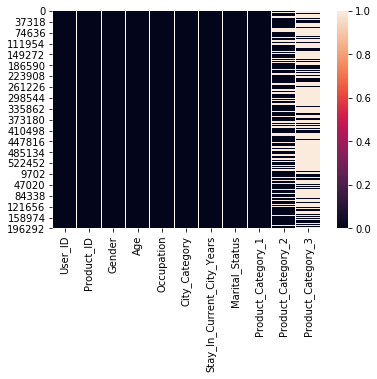

In [4]:
sns.heatmap(df.isna())

In [11]:
df['Product_Category_1'].nunique()

20

In [12]:
df['Product_Category_2'].nunique()

17

In [13]:
df['Product_Category_3'].nunique()

15

In [14]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [15]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [16]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [80]:
df.fillna(0, inplace=True)

In [18]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [19]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  
0                 0.0                 0.0  
1                 6.0                14.0  
2                 0.0                 0.0  
3                14.0                 0.0  
4                 0.0                 0.0

In [20]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [21]:
df.sample(n=10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
520978  1002163  P00152942      M  18-25           0             C   
168416  1001617  P00196042      M  26-35          12             C   
473545  1000996  P00253742      M  26-35          17             A   
471803  1000714  P00303342      M  18-25           4             B   
183199  1004271  P00348842      M  36-45           7             B   
326298  1002181  P00322142      M  26-35           0             B   
64412   1003870  P00018842      M  26-35          17             C   
299845  1004138  P00112142      M  26-35           7             B   
33094   1005078  P00127642      M  46-50           7             C   
477734  1001591  P00221742      M  51-55           7             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
520978                          0               1                   5   
168416                          3               0                   4   
473545                         4+               1                   1   
471803                          2               0                   1   
183199                          2               0                   1   
326298                         4+               1                   1   
64412                           0               0                   8   
299845                          1               1                   1   
33094                           1               0                   1   
477734                          1               1                   1   

        Product_Category_2  Product_Category_3  
520978                 0.0                 0.0  
168416                 9.0                15.0  
473545                16.0                 0.0  
471803                16.0                 0.0  
183199                 6.0                 0.0  
326298                14.0                 0.0  
64412                  0.0                 0.0  
299845                 2.0                14.0  
33094                  2.0                15.0  
477734                 8.0                 0.0

In [22]:
train.groupby('Age').agg(['count','mean'])

User_ID               Occupation           Marital_Status            \
        count          mean      count      mean          count      mean   
Age                                                                         
0-17    15102  1.002722e+06      15102  8.761025          15102  0.000000   
18-25   99660  1.002801e+06      99660  6.736384          99660  0.211880   
26-35  219587  1.003113e+06     219587  7.896975         219587  0.392970   
36-45  110013  1.003066e+06     110013  8.837365         110013  0.396644   
46-50   45701  1.003190e+06      45701  8.517078          45701  0.722326   
51-55   38501  1.002985e+06      38501  8.810109          38501  0.718475   
55+     21504  1.002986e+06      21504  9.502697          21504  0.633417   

      Product_Category_1           Product_Category_2             \
                   count      mean              count       mean   
Age                                                                
0-17               15102  5.083764              10648   9.030334   
18-25              99660  5.111088              69157   9.470278   
26-35             219587  5.314272             150160   9.811388   
36-45             110013  5.494242              75350   9.954625   
46-50              45701  5.742194              31010  10.176459   
51-55              38501  5.774214              26024  10.281663   
55+                21504  6.066313              14081  10.464882   

      Product_Category_3            Purchase               
                   count       mean    count         mean  
Age                                                        
0-17                4873  11.845885    15102  8933.464640  
18-25              31316  12.391142    99660  9169.663606  
26-35              66942  12.647127   219587  9252.690633  
36-45              33285  12.750849   110013  9331.350695  
46-50              13374  12.939958    45701  9208.625697  
51-55              11166  13.105320    38501  9534.808031  
55+                 5865  13.151577    21504  9336.280459

In [23]:
train.groupby('Age').agg(['count','mean']).index.values

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [24]:
train.groupby('Age').mean().loc['0-17', :][-1]

8933.464640444974

In [5]:
age_dict = {}

for item in train.groupby('Age').mean().index.values:
    print(type(item), item)
    age_dict[item] = train.groupby('Age').mean().loc[item, :][-1]
    

<class 'str'> 0-17
<class 'str'> 18-25
<class 'str'> 26-35
<class 'str'> 36-45
<class 'str'> 46-50
<class 'str'> 51-55
<class 'str'> 55+


In [6]:
age_dict

{'0-17': 8933.464640444974,
 '18-25': 9169.663606261289,
 '26-35': 9252.690632869888,
 '36-45': 9331.350694917874,
 '46-50': 9208.625697468327,
 '51-55': 9534.808030960236,
 '55+': 9336.280459449405}

In [27]:
train.groupby('Occupation').agg(['count','mean']).iloc[2, :]

User_ID             count    2.658800e+04
                    mean     1.003162e+06
Marital_Status      count    2.658800e+04
                    mean     4.619377e-01
Product_Category_1  count    2.658800e+04
                    mean     5.645253e+00
Product_Category_2  count    1.769400e+04
                    mean     9.969933e+00
Product_Category_3  count    7.541000e+03
                    mean     1.263002e+01
Purchase            count    2.658800e+04
                    mean     8.952482e+03
Name: 2, dtype: float64

In [7]:
occ_dict = {}

for item in train.groupby('Occupation').mean().index.values:
    print(type(item), item)
    occ_dict[item] = train.groupby('Occupation').mean().loc[item, :][-1]


<class 'numpy.int64'> 0
<class 'numpy.int64'> 1
<class 'numpy.int64'> 2
<class 'numpy.int64'> 3
<class 'numpy.int64'> 4
<class 'numpy.int64'> 5
<class 'numpy.int64'> 6
<class 'numpy.int64'> 7
<class 'numpy.int64'> 8
<class 'numpy.int64'> 9
<class 'numpy.int64'> 10
<class 'numpy.int64'> 11
<class 'numpy.int64'> 12
<class 'numpy.int64'> 13
<class 'numpy.int64'> 14
<class 'numpy.int64'> 15
<class 'numpy.int64'> 16
<class 'numpy.int64'> 17
<class 'numpy.int64'> 18
<class 'numpy.int64'> 19
<class 'numpy.int64'> 20


In [29]:
occ_dict

{0: 9124.428587839973,
 1: 8953.193269514612,
 2: 8952.481683466225,
 3: 9178.593087818697,
 4: 9213.980251147868,
 5: 9333.149297856615,
 6: 9256.535691476296,
 7: 9425.728222819745,
 8: 9532.592496765847,
 9: 8637.74376092831,
 10: 8959.355375096675,
 11: 9213.84584843777,
 12: 9796.640238622149,
 13: 9306.351061076604,
 14: 9500.702771979933,
 15: 9778.891163173037,
 16: 9394.46434905995,
 17: 9821.478235896411,
 18: 9169.655844155845,
 19: 8710.62723082378,
 20: 8836.49490495203}

In [30]:
train.groupby('Marital_Status').mean()

User_ID  Occupation  Product_Category_1  \
Marital_Status                                                 
0               1.002999e+06    7.944782            5.339059   
1               1.003071e+06    8.266823            5.498245   

                Product_Category_2  Product_Category_3     Purchase  
Marital_Status                                                       
0                         9.778627           12.602265  9265.907619  
1                         9.935409           12.766049  9261.174574

In [8]:
train.groupby('City_Category').mean()

User_ID  Occupation  Marital_Status  Product_Category_1  \
City_Category                                                                 
A              1.002942e+06    7.828364        0.382799            5.506275   
B              1.003069e+06    7.987282        0.408577            5.376181   
C              1.003050e+06    8.411789        0.434281            5.354176   

               Product_Category_2  Product_Category_3     Purchase  
City_Category                                                       
A                        9.942843           12.679111  8911.939216  
B                        9.826037           12.672934  9151.300563  
C                        9.781544           12.654400  9719.920993

In [9]:
city_dict = {'A':8911.94, 'B':9151.3, 'C':9719.92}

In [10]:
train.groupby('Stay_In_Current_City_Years').mean()

User_ID  Occupation  Marital_Status  \
Stay_In_Current_City_Years                                             
0                           1.003057e+06    7.646980        0.396382   
1                           1.003075e+06    8.058208        0.428875   
2                           1.003096e+06    7.902698        0.402973   
3                           1.002912e+06    8.446838        0.395004   
4+                          1.002950e+06    8.289262        0.401837   

                            Product_Category_1  Product_Category_2  \
Stay_In_Current_City_Years                                           
0                                     5.449810            9.856866   
1                                     5.436934            9.881633   
2                                     5.346462            9.772685   
3                                     5.309723            9.771060   
4+                                    5.465371            9.905246   

                            Product_Category_3     Purchase  
Stay_In_Current_City_Years                                   
0                                    12.665237  9180.075123  
1                                    12.679654  9250.145923  
2                                    12.615834  9320.429810  
3                                    12.658911  9286.904119  
4+                                   12.720566  9275.598872

In [11]:
stay_dict = {}
for item in train.groupby('Stay_In_Current_City_Years').mean().index.values:
    print(type(item), item)
    stay_dict[item] = train.groupby('Stay_In_Current_City_Years').mean().loc[item, :][-1]


<class 'str'> 0
<class 'str'> 1
<class 'str'> 2
<class 'str'> 3
<class 'str'> 4+


In [12]:
prod_dict_1 = {}

for item in train.groupby('Product_Category_1').mean().index.values:
    print(type(item), item)
    prod_dict_1[item] = train.groupby('Product_Category_1').mean().loc[item, :][-1]

prod_dict_2 = {}

for item in train.groupby('Product_Category_2').mean().index.values:
    print(type(item), item)
    prod_dict_2[item] = train.groupby('Product_Category_2').mean().loc[item, :][-1]
    
prod_dict_3 = {}

for item in train.groupby('Product_Category_3').mean().index.values:
    print(type(item), item)
    prod_dict_3[item] = train.groupby('Product_Category_3').mean().loc[item, :][-1]


<class 'numpy.int64'> 1
<class 'numpy.int64'> 2
<class 'numpy.int64'> 3
<class 'numpy.int64'> 4
<class 'numpy.int64'> 5
<class 'numpy.int64'> 6
<class 'numpy.int64'> 7
<class 'numpy.int64'> 8
<class 'numpy.int64'> 9
<class 'numpy.int64'> 10
<class 'numpy.int64'> 11
<class 'numpy.int64'> 12
<class 'numpy.int64'> 13
<class 'numpy.int64'> 14
<class 'numpy.int64'> 15
<class 'numpy.int64'> 16
<class 'numpy.int64'> 17
<class 'numpy.int64'> 18
<class 'numpy.int64'> 19
<class 'numpy.int64'> 20
<class 'numpy.float64'> 2.0
<class 'numpy.float64'> 3.0
<class 'numpy.float64'> 4.0
<class 'numpy.float64'> 5.0
<class 'numpy.float64'> 6.0
<class 'numpy.float64'> 7.0
<class 'numpy.float64'> 8.0
<class 'numpy.float64'> 9.0
<class 'numpy.float64'> 10.0
<class 'numpy.float64'> 11.0
<class 'numpy.float64'> 12.0
<class 'numpy.float64'> 13.0
<class 'numpy.float64'> 14.0
<class 'numpy.float64'> 15.0
<class 'numpy.float64'> 16.0
<class 'numpy.float64'> 17.0
<class 'numpy.float64'> 18.0
<class 'numpy.float64'> 

In [13]:
user_dict = {}

for item in train.groupby('User_ID').mean().index.values:
    print(type(item), item)
    user_dict[item] = train.groupby('User_ID').mean().loc[item, :][-1]

<class 'numpy.int64'> 1000001
<class 'numpy.int64'> 1000002
<class 'numpy.int64'> 1000003
<class 'numpy.int64'> 1000004
<class 'numpy.int64'> 1000005
<class 'numpy.int64'> 1000006
<class 'numpy.int64'> 1000007
<class 'numpy.int64'> 1000008
<class 'numpy.int64'> 1000009
<class 'numpy.int64'> 1000010
<class 'numpy.int64'> 1000011
<class 'numpy.int64'> 1000012
<class 'numpy.int64'> 1000013
<class 'numpy.int64'> 1000014
<class 'numpy.int64'> 1000015
<class 'numpy.int64'> 1000016
<class 'numpy.int64'> 1000017
<class 'numpy.int64'> 1000018
<class 'numpy.int64'> 1000019
<class 'numpy.int64'> 1000020
<class 'numpy.int64'> 1000021
<class 'numpy.int64'> 1000022
<class 'numpy.int64'> 1000023
<class 'numpy.int64'> 1000024
<class 'numpy.int64'> 1000025
<class 'numpy.int64'> 1000026
<class 'numpy.int64'> 1000027
<class 'numpy.int64'> 1000028
<class 'numpy.int64'> 1000029
<class 'numpy.int64'> 1000030
<class 'numpy.int64'> 1000031
<class 'numpy.int64'> 1000032
<class 'numpy.int64'> 1000033
<class 'nu

<class 'numpy.int64'> 1000281
<class 'numpy.int64'> 1000282
<class 'numpy.int64'> 1000283
<class 'numpy.int64'> 1000284
<class 'numpy.int64'> 1000285
<class 'numpy.int64'> 1000286
<class 'numpy.int64'> 1000287
<class 'numpy.int64'> 1000289
<class 'numpy.int64'> 1000290
<class 'numpy.int64'> 1000291
<class 'numpy.int64'> 1000292
<class 'numpy.int64'> 1000293
<class 'numpy.int64'> 1000294
<class 'numpy.int64'> 1000295
<class 'numpy.int64'> 1000296
<class 'numpy.int64'> 1000297
<class 'numpy.int64'> 1000298
<class 'numpy.int64'> 1000299
<class 'numpy.int64'> 1000300
<class 'numpy.int64'> 1000301
<class 'numpy.int64'> 1000302
<class 'numpy.int64'> 1000303
<class 'numpy.int64'> 1000304
<class 'numpy.int64'> 1000305
<class 'numpy.int64'> 1000306
<class 'numpy.int64'> 1000307
<class 'numpy.int64'> 1000308
<class 'numpy.int64'> 1000309
<class 'numpy.int64'> 1000310
<class 'numpy.int64'> 1000311
<class 'numpy.int64'> 1000312
<class 'numpy.int64'> 1000313
<class 'numpy.int64'> 1000314
<class 'nu

<class 'numpy.int64'> 1000566
<class 'numpy.int64'> 1000567
<class 'numpy.int64'> 1000568
<class 'numpy.int64'> 1000569
<class 'numpy.int64'> 1000570
<class 'numpy.int64'> 1000571
<class 'numpy.int64'> 1000572
<class 'numpy.int64'> 1000573
<class 'numpy.int64'> 1000574
<class 'numpy.int64'> 1000575
<class 'numpy.int64'> 1000576
<class 'numpy.int64'> 1000577
<class 'numpy.int64'> 1000578
<class 'numpy.int64'> 1000579
<class 'numpy.int64'> 1000580
<class 'numpy.int64'> 1000581
<class 'numpy.int64'> 1000582
<class 'numpy.int64'> 1000583
<class 'numpy.int64'> 1000584
<class 'numpy.int64'> 1000585
<class 'numpy.int64'> 1000586
<class 'numpy.int64'> 1000587
<class 'numpy.int64'> 1000588
<class 'numpy.int64'> 1000589
<class 'numpy.int64'> 1000590
<class 'numpy.int64'> 1000591
<class 'numpy.int64'> 1000592
<class 'numpy.int64'> 1000593
<class 'numpy.int64'> 1000594
<class 'numpy.int64'> 1000595
<class 'numpy.int64'> 1000596
<class 'numpy.int64'> 1000597
<class 'numpy.int64'> 1000598
<class 'nu

<class 'numpy.int64'> 1000850
<class 'numpy.int64'> 1000851
<class 'numpy.int64'> 1000852
<class 'numpy.int64'> 1000853
<class 'numpy.int64'> 1000854
<class 'numpy.int64'> 1000855
<class 'numpy.int64'> 1000856
<class 'numpy.int64'> 1000857
<class 'numpy.int64'> 1000858
<class 'numpy.int64'> 1000859
<class 'numpy.int64'> 1000860
<class 'numpy.int64'> 1000861
<class 'numpy.int64'> 1000862
<class 'numpy.int64'> 1000863
<class 'numpy.int64'> 1000864
<class 'numpy.int64'> 1000865
<class 'numpy.int64'> 1000866
<class 'numpy.int64'> 1000867
<class 'numpy.int64'> 1000868
<class 'numpy.int64'> 1000869
<class 'numpy.int64'> 1000870
<class 'numpy.int64'> 1000871
<class 'numpy.int64'> 1000872
<class 'numpy.int64'> 1000873
<class 'numpy.int64'> 1000874
<class 'numpy.int64'> 1000875
<class 'numpy.int64'> 1000876
<class 'numpy.int64'> 1000877
<class 'numpy.int64'> 1000878
<class 'numpy.int64'> 1000879
<class 'numpy.int64'> 1000880
<class 'numpy.int64'> 1000881
<class 'numpy.int64'> 1000882
<class 'nu

<class 'numpy.int64'> 1001140
<class 'numpy.int64'> 1001141
<class 'numpy.int64'> 1001142
<class 'numpy.int64'> 1001143
<class 'numpy.int64'> 1001144
<class 'numpy.int64'> 1001145
<class 'numpy.int64'> 1001146
<class 'numpy.int64'> 1001147
<class 'numpy.int64'> 1001148
<class 'numpy.int64'> 1001149
<class 'numpy.int64'> 1001150
<class 'numpy.int64'> 1001151
<class 'numpy.int64'> 1001152
<class 'numpy.int64'> 1001153
<class 'numpy.int64'> 1001154
<class 'numpy.int64'> 1001155
<class 'numpy.int64'> 1001156
<class 'numpy.int64'> 1001157
<class 'numpy.int64'> 1001158
<class 'numpy.int64'> 1001159
<class 'numpy.int64'> 1001160
<class 'numpy.int64'> 1001161
<class 'numpy.int64'> 1001162
<class 'numpy.int64'> 1001163
<class 'numpy.int64'> 1001164
<class 'numpy.int64'> 1001165
<class 'numpy.int64'> 1001166
<class 'numpy.int64'> 1001167
<class 'numpy.int64'> 1001168
<class 'numpy.int64'> 1001169
<class 'numpy.int64'> 1001170
<class 'numpy.int64'> 1001171
<class 'numpy.int64'> 1001172
<class 'nu

<class 'numpy.int64'> 1001417
<class 'numpy.int64'> 1001418
<class 'numpy.int64'> 1001420
<class 'numpy.int64'> 1001421
<class 'numpy.int64'> 1001422
<class 'numpy.int64'> 1001423
<class 'numpy.int64'> 1001424
<class 'numpy.int64'> 1001425
<class 'numpy.int64'> 1001426
<class 'numpy.int64'> 1001427
<class 'numpy.int64'> 1001428
<class 'numpy.int64'> 1001429
<class 'numpy.int64'> 1001430
<class 'numpy.int64'> 1001431
<class 'numpy.int64'> 1001432
<class 'numpy.int64'> 1001433
<class 'numpy.int64'> 1001434
<class 'numpy.int64'> 1001435
<class 'numpy.int64'> 1001436
<class 'numpy.int64'> 1001437
<class 'numpy.int64'> 1001438
<class 'numpy.int64'> 1001439
<class 'numpy.int64'> 1001440
<class 'numpy.int64'> 1001441
<class 'numpy.int64'> 1001442
<class 'numpy.int64'> 1001443
<class 'numpy.int64'> 1001444
<class 'numpy.int64'> 1001445
<class 'numpy.int64'> 1001446
<class 'numpy.int64'> 1001447
<class 'numpy.int64'> 1001448
<class 'numpy.int64'> 1001449
<class 'numpy.int64'> 1001450
<class 'nu

<class 'numpy.int64'> 1001699
<class 'numpy.int64'> 1001700
<class 'numpy.int64'> 1001701
<class 'numpy.int64'> 1001702
<class 'numpy.int64'> 1001703
<class 'numpy.int64'> 1001704
<class 'numpy.int64'> 1001705
<class 'numpy.int64'> 1001706
<class 'numpy.int64'> 1001707
<class 'numpy.int64'> 1001708
<class 'numpy.int64'> 1001709
<class 'numpy.int64'> 1001710
<class 'numpy.int64'> 1001711
<class 'numpy.int64'> 1001712
<class 'numpy.int64'> 1001713
<class 'numpy.int64'> 1001714
<class 'numpy.int64'> 1001715
<class 'numpy.int64'> 1001716
<class 'numpy.int64'> 1001717
<class 'numpy.int64'> 1001718
<class 'numpy.int64'> 1001719
<class 'numpy.int64'> 1001720
<class 'numpy.int64'> 1001721
<class 'numpy.int64'> 1001722
<class 'numpy.int64'> 1001723
<class 'numpy.int64'> 1001724
<class 'numpy.int64'> 1001725
<class 'numpy.int64'> 1001726
<class 'numpy.int64'> 1001727
<class 'numpy.int64'> 1001728
<class 'numpy.int64'> 1001729
<class 'numpy.int64'> 1001730
<class 'numpy.int64'> 1001731
<class 'nu

<class 'numpy.int64'> 1001984
<class 'numpy.int64'> 1001985
<class 'numpy.int64'> 1001986
<class 'numpy.int64'> 1001987
<class 'numpy.int64'> 1001988
<class 'numpy.int64'> 1001989
<class 'numpy.int64'> 1001990
<class 'numpy.int64'> 1001991
<class 'numpy.int64'> 1001992
<class 'numpy.int64'> 1001993
<class 'numpy.int64'> 1001994
<class 'numpy.int64'> 1001995
<class 'numpy.int64'> 1001996
<class 'numpy.int64'> 1001997
<class 'numpy.int64'> 1001998
<class 'numpy.int64'> 1001999
<class 'numpy.int64'> 1002000
<class 'numpy.int64'> 1002001
<class 'numpy.int64'> 1002002
<class 'numpy.int64'> 1002003
<class 'numpy.int64'> 1002004
<class 'numpy.int64'> 1002005
<class 'numpy.int64'> 1002006
<class 'numpy.int64'> 1002007
<class 'numpy.int64'> 1002008
<class 'numpy.int64'> 1002009
<class 'numpy.int64'> 1002010
<class 'numpy.int64'> 1002011
<class 'numpy.int64'> 1002012
<class 'numpy.int64'> 1002013
<class 'numpy.int64'> 1002014
<class 'numpy.int64'> 1002015
<class 'numpy.int64'> 1002016
<class 'nu

<class 'numpy.int64'> 1002263
<class 'numpy.int64'> 1002264
<class 'numpy.int64'> 1002265
<class 'numpy.int64'> 1002266
<class 'numpy.int64'> 1002267
<class 'numpy.int64'> 1002268
<class 'numpy.int64'> 1002269
<class 'numpy.int64'> 1002270
<class 'numpy.int64'> 1002271
<class 'numpy.int64'> 1002272
<class 'numpy.int64'> 1002273
<class 'numpy.int64'> 1002274
<class 'numpy.int64'> 1002275
<class 'numpy.int64'> 1002276
<class 'numpy.int64'> 1002278
<class 'numpy.int64'> 1002279
<class 'numpy.int64'> 1002280
<class 'numpy.int64'> 1002281
<class 'numpy.int64'> 1002283
<class 'numpy.int64'> 1002284
<class 'numpy.int64'> 1002285
<class 'numpy.int64'> 1002286
<class 'numpy.int64'> 1002287
<class 'numpy.int64'> 1002288
<class 'numpy.int64'> 1002289
<class 'numpy.int64'> 1002291
<class 'numpy.int64'> 1002292
<class 'numpy.int64'> 1002293
<class 'numpy.int64'> 1002294
<class 'numpy.int64'> 1002295
<class 'numpy.int64'> 1002296
<class 'numpy.int64'> 1002297
<class 'numpy.int64'> 1002298
<class 'nu

<class 'numpy.int64'> 1002549
<class 'numpy.int64'> 1002550
<class 'numpy.int64'> 1002551
<class 'numpy.int64'> 1002552
<class 'numpy.int64'> 1002553
<class 'numpy.int64'> 1002554
<class 'numpy.int64'> 1002555
<class 'numpy.int64'> 1002556
<class 'numpy.int64'> 1002557
<class 'numpy.int64'> 1002558
<class 'numpy.int64'> 1002559
<class 'numpy.int64'> 1002560
<class 'numpy.int64'> 1002561
<class 'numpy.int64'> 1002563
<class 'numpy.int64'> 1002564
<class 'numpy.int64'> 1002565
<class 'numpy.int64'> 1002566
<class 'numpy.int64'> 1002567
<class 'numpy.int64'> 1002568
<class 'numpy.int64'> 1002569
<class 'numpy.int64'> 1002570
<class 'numpy.int64'> 1002571
<class 'numpy.int64'> 1002572
<class 'numpy.int64'> 1002573
<class 'numpy.int64'> 1002574
<class 'numpy.int64'> 1002575
<class 'numpy.int64'> 1002576
<class 'numpy.int64'> 1002577
<class 'numpy.int64'> 1002578
<class 'numpy.int64'> 1002579
<class 'numpy.int64'> 1002580
<class 'numpy.int64'> 1002581
<class 'numpy.int64'> 1002582
<class 'nu

<class 'numpy.int64'> 1002828
<class 'numpy.int64'> 1002830
<class 'numpy.int64'> 1002831
<class 'numpy.int64'> 1002832
<class 'numpy.int64'> 1002833
<class 'numpy.int64'> 1002834
<class 'numpy.int64'> 1002835
<class 'numpy.int64'> 1002836
<class 'numpy.int64'> 1002837
<class 'numpy.int64'> 1002838
<class 'numpy.int64'> 1002839
<class 'numpy.int64'> 1002840
<class 'numpy.int64'> 1002841
<class 'numpy.int64'> 1002842
<class 'numpy.int64'> 1002843
<class 'numpy.int64'> 1002844
<class 'numpy.int64'> 1002845
<class 'numpy.int64'> 1002846
<class 'numpy.int64'> 1002847
<class 'numpy.int64'> 1002848
<class 'numpy.int64'> 1002849
<class 'numpy.int64'> 1002850
<class 'numpy.int64'> 1002851
<class 'numpy.int64'> 1002852
<class 'numpy.int64'> 1002853
<class 'numpy.int64'> 1002854
<class 'numpy.int64'> 1002855
<class 'numpy.int64'> 1002856
<class 'numpy.int64'> 1002857
<class 'numpy.int64'> 1002858
<class 'numpy.int64'> 1002859
<class 'numpy.int64'> 1002860
<class 'numpy.int64'> 1002861
<class 'nu

<class 'numpy.int64'> 1003111
<class 'numpy.int64'> 1003112
<class 'numpy.int64'> 1003113
<class 'numpy.int64'> 1003114
<class 'numpy.int64'> 1003115
<class 'numpy.int64'> 1003116
<class 'numpy.int64'> 1003117
<class 'numpy.int64'> 1003118
<class 'numpy.int64'> 1003119
<class 'numpy.int64'> 1003120
<class 'numpy.int64'> 1003121
<class 'numpy.int64'> 1003122
<class 'numpy.int64'> 1003123
<class 'numpy.int64'> 1003124
<class 'numpy.int64'> 1003125
<class 'numpy.int64'> 1003126
<class 'numpy.int64'> 1003127
<class 'numpy.int64'> 1003128
<class 'numpy.int64'> 1003129
<class 'numpy.int64'> 1003130
<class 'numpy.int64'> 1003131
<class 'numpy.int64'> 1003132
<class 'numpy.int64'> 1003133
<class 'numpy.int64'> 1003134
<class 'numpy.int64'> 1003135
<class 'numpy.int64'> 1003136
<class 'numpy.int64'> 1003138
<class 'numpy.int64'> 1003140
<class 'numpy.int64'> 1003141
<class 'numpy.int64'> 1003142
<class 'numpy.int64'> 1003143
<class 'numpy.int64'> 1003144
<class 'numpy.int64'> 1003145
<class 'nu

<class 'numpy.int64'> 1003396
<class 'numpy.int64'> 1003397
<class 'numpy.int64'> 1003398
<class 'numpy.int64'> 1003399
<class 'numpy.int64'> 1003400
<class 'numpy.int64'> 1003401
<class 'numpy.int64'> 1003402
<class 'numpy.int64'> 1003403
<class 'numpy.int64'> 1003404
<class 'numpy.int64'> 1003405
<class 'numpy.int64'> 1003406
<class 'numpy.int64'> 1003407
<class 'numpy.int64'> 1003408
<class 'numpy.int64'> 1003409
<class 'numpy.int64'> 1003410
<class 'numpy.int64'> 1003411
<class 'numpy.int64'> 1003412
<class 'numpy.int64'> 1003413
<class 'numpy.int64'> 1003414
<class 'numpy.int64'> 1003415
<class 'numpy.int64'> 1003416
<class 'numpy.int64'> 1003417
<class 'numpy.int64'> 1003418
<class 'numpy.int64'> 1003419
<class 'numpy.int64'> 1003420
<class 'numpy.int64'> 1003421
<class 'numpy.int64'> 1003422
<class 'numpy.int64'> 1003423
<class 'numpy.int64'> 1003424
<class 'numpy.int64'> 1003425
<class 'numpy.int64'> 1003426
<class 'numpy.int64'> 1003427
<class 'numpy.int64'> 1003428
<class 'nu

<class 'numpy.int64'> 1003676
<class 'numpy.int64'> 1003677
<class 'numpy.int64'> 1003678
<class 'numpy.int64'> 1003679
<class 'numpy.int64'> 1003680
<class 'numpy.int64'> 1003681
<class 'numpy.int64'> 1003682
<class 'numpy.int64'> 1003683
<class 'numpy.int64'> 1003684
<class 'numpy.int64'> 1003685
<class 'numpy.int64'> 1003686
<class 'numpy.int64'> 1003687
<class 'numpy.int64'> 1003688
<class 'numpy.int64'> 1003689
<class 'numpy.int64'> 1003690
<class 'numpy.int64'> 1003691
<class 'numpy.int64'> 1003692
<class 'numpy.int64'> 1003693
<class 'numpy.int64'> 1003694
<class 'numpy.int64'> 1003695
<class 'numpy.int64'> 1003696
<class 'numpy.int64'> 1003697
<class 'numpy.int64'> 1003698
<class 'numpy.int64'> 1003699
<class 'numpy.int64'> 1003700
<class 'numpy.int64'> 1003701
<class 'numpy.int64'> 1003702
<class 'numpy.int64'> 1003703
<class 'numpy.int64'> 1003704
<class 'numpy.int64'> 1003705
<class 'numpy.int64'> 1003706
<class 'numpy.int64'> 1003707
<class 'numpy.int64'> 1003708
<class 'nu

<class 'numpy.int64'> 1003954
<class 'numpy.int64'> 1003955
<class 'numpy.int64'> 1003956
<class 'numpy.int64'> 1003957
<class 'numpy.int64'> 1003958
<class 'numpy.int64'> 1003959
<class 'numpy.int64'> 1003960
<class 'numpy.int64'> 1003961
<class 'numpy.int64'> 1003962
<class 'numpy.int64'> 1003963
<class 'numpy.int64'> 1003964
<class 'numpy.int64'> 1003965
<class 'numpy.int64'> 1003966
<class 'numpy.int64'> 1003967
<class 'numpy.int64'> 1003968
<class 'numpy.int64'> 1003969
<class 'numpy.int64'> 1003970
<class 'numpy.int64'> 1003971
<class 'numpy.int64'> 1003972
<class 'numpy.int64'> 1003973
<class 'numpy.int64'> 1003974
<class 'numpy.int64'> 1003975
<class 'numpy.int64'> 1003976
<class 'numpy.int64'> 1003977
<class 'numpy.int64'> 1003978
<class 'numpy.int64'> 1003979
<class 'numpy.int64'> 1003980
<class 'numpy.int64'> 1003981
<class 'numpy.int64'> 1003982
<class 'numpy.int64'> 1003983
<class 'numpy.int64'> 1003984
<class 'numpy.int64'> 1003985
<class 'numpy.int64'> 1003986
<class 'nu

<class 'numpy.int64'> 1004240
<class 'numpy.int64'> 1004241
<class 'numpy.int64'> 1004242
<class 'numpy.int64'> 1004243
<class 'numpy.int64'> 1004244
<class 'numpy.int64'> 1004245
<class 'numpy.int64'> 1004246
<class 'numpy.int64'> 1004247
<class 'numpy.int64'> 1004248
<class 'numpy.int64'> 1004249
<class 'numpy.int64'> 1004250
<class 'numpy.int64'> 1004251
<class 'numpy.int64'> 1004252
<class 'numpy.int64'> 1004253
<class 'numpy.int64'> 1004254
<class 'numpy.int64'> 1004255
<class 'numpy.int64'> 1004256
<class 'numpy.int64'> 1004257
<class 'numpy.int64'> 1004258
<class 'numpy.int64'> 1004259
<class 'numpy.int64'> 1004260
<class 'numpy.int64'> 1004261
<class 'numpy.int64'> 1004262
<class 'numpy.int64'> 1004263
<class 'numpy.int64'> 1004264
<class 'numpy.int64'> 1004265
<class 'numpy.int64'> 1004266
<class 'numpy.int64'> 1004267
<class 'numpy.int64'> 1004268
<class 'numpy.int64'> 1004269
<class 'numpy.int64'> 1004270
<class 'numpy.int64'> 1004271
<class 'numpy.int64'> 1004272
<class 'nu

<class 'numpy.int64'> 1004517
<class 'numpy.int64'> 1004518
<class 'numpy.int64'> 1004519
<class 'numpy.int64'> 1004520
<class 'numpy.int64'> 1004521
<class 'numpy.int64'> 1004522
<class 'numpy.int64'> 1004524
<class 'numpy.int64'> 1004525
<class 'numpy.int64'> 1004526
<class 'numpy.int64'> 1004527
<class 'numpy.int64'> 1004528
<class 'numpy.int64'> 1004529
<class 'numpy.int64'> 1004530
<class 'numpy.int64'> 1004531
<class 'numpy.int64'> 1004532
<class 'numpy.int64'> 1004533
<class 'numpy.int64'> 1004534
<class 'numpy.int64'> 1004535
<class 'numpy.int64'> 1004536
<class 'numpy.int64'> 1004537
<class 'numpy.int64'> 1004538
<class 'numpy.int64'> 1004539
<class 'numpy.int64'> 1004540
<class 'numpy.int64'> 1004541
<class 'numpy.int64'> 1004542
<class 'numpy.int64'> 1004543
<class 'numpy.int64'> 1004544
<class 'numpy.int64'> 1004545
<class 'numpy.int64'> 1004546
<class 'numpy.int64'> 1004547
<class 'numpy.int64'> 1004548
<class 'numpy.int64'> 1004549
<class 'numpy.int64'> 1004550
<class 'nu

<class 'numpy.int64'> 1004797
<class 'numpy.int64'> 1004798
<class 'numpy.int64'> 1004799
<class 'numpy.int64'> 1004800
<class 'numpy.int64'> 1004801
<class 'numpy.int64'> 1004802
<class 'numpy.int64'> 1004803
<class 'numpy.int64'> 1004804
<class 'numpy.int64'> 1004806
<class 'numpy.int64'> 1004807
<class 'numpy.int64'> 1004808
<class 'numpy.int64'> 1004809
<class 'numpy.int64'> 1004810
<class 'numpy.int64'> 1004811
<class 'numpy.int64'> 1004812
<class 'numpy.int64'> 1004813
<class 'numpy.int64'> 1004814
<class 'numpy.int64'> 1004815
<class 'numpy.int64'> 1004817
<class 'numpy.int64'> 1004818
<class 'numpy.int64'> 1004819
<class 'numpy.int64'> 1004820
<class 'numpy.int64'> 1004821
<class 'numpy.int64'> 1004822
<class 'numpy.int64'> 1004823
<class 'numpy.int64'> 1004824
<class 'numpy.int64'> 1004825
<class 'numpy.int64'> 1004826
<class 'numpy.int64'> 1004827
<class 'numpy.int64'> 1004828
<class 'numpy.int64'> 1004829
<class 'numpy.int64'> 1004830
<class 'numpy.int64'> 1004831
<class 'nu

<class 'numpy.int64'> 1005079
<class 'numpy.int64'> 1005080
<class 'numpy.int64'> 1005081
<class 'numpy.int64'> 1005082
<class 'numpy.int64'> 1005083
<class 'numpy.int64'> 1005084
<class 'numpy.int64'> 1005085
<class 'numpy.int64'> 1005086
<class 'numpy.int64'> 1005087
<class 'numpy.int64'> 1005088
<class 'numpy.int64'> 1005089
<class 'numpy.int64'> 1005090
<class 'numpy.int64'> 1005091
<class 'numpy.int64'> 1005092
<class 'numpy.int64'> 1005094
<class 'numpy.int64'> 1005095
<class 'numpy.int64'> 1005096
<class 'numpy.int64'> 1005097
<class 'numpy.int64'> 1005098
<class 'numpy.int64'> 1005099
<class 'numpy.int64'> 1005100
<class 'numpy.int64'> 1005101
<class 'numpy.int64'> 1005102
<class 'numpy.int64'> 1005103
<class 'numpy.int64'> 1005104
<class 'numpy.int64'> 1005105
<class 'numpy.int64'> 1005106
<class 'numpy.int64'> 1005107
<class 'numpy.int64'> 1005108
<class 'numpy.int64'> 1005109
<class 'numpy.int64'> 1005110
<class 'numpy.int64'> 1005111
<class 'numpy.int64'> 1005112
<class 'nu

<class 'numpy.int64'> 1005364
<class 'numpy.int64'> 1005365
<class 'numpy.int64'> 1005366
<class 'numpy.int64'> 1005367
<class 'numpy.int64'> 1005368
<class 'numpy.int64'> 1005369
<class 'numpy.int64'> 1005370
<class 'numpy.int64'> 1005371
<class 'numpy.int64'> 1005372
<class 'numpy.int64'> 1005373
<class 'numpy.int64'> 1005374
<class 'numpy.int64'> 1005375
<class 'numpy.int64'> 1005376
<class 'numpy.int64'> 1005377
<class 'numpy.int64'> 1005378
<class 'numpy.int64'> 1005379
<class 'numpy.int64'> 1005380
<class 'numpy.int64'> 1005381
<class 'numpy.int64'> 1005382
<class 'numpy.int64'> 1005383
<class 'numpy.int64'> 1005384
<class 'numpy.int64'> 1005385
<class 'numpy.int64'> 1005386
<class 'numpy.int64'> 1005387
<class 'numpy.int64'> 1005388
<class 'numpy.int64'> 1005389
<class 'numpy.int64'> 1005390
<class 'numpy.int64'> 1005391
<class 'numpy.int64'> 1005392
<class 'numpy.int64'> 1005393
<class 'numpy.int64'> 1005394
<class 'numpy.int64'> 1005395
<class 'numpy.int64'> 1005396
<class 'nu

<class 'numpy.int64'> 1005645
<class 'numpy.int64'> 1005646
<class 'numpy.int64'> 1005647
<class 'numpy.int64'> 1005648
<class 'numpy.int64'> 1005649
<class 'numpy.int64'> 1005650
<class 'numpy.int64'> 1005651
<class 'numpy.int64'> 1005652
<class 'numpy.int64'> 1005653
<class 'numpy.int64'> 1005654
<class 'numpy.int64'> 1005655
<class 'numpy.int64'> 1005656
<class 'numpy.int64'> 1005657
<class 'numpy.int64'> 1005658
<class 'numpy.int64'> 1005659
<class 'numpy.int64'> 1005660
<class 'numpy.int64'> 1005661
<class 'numpy.int64'> 1005662
<class 'numpy.int64'> 1005663
<class 'numpy.int64'> 1005664
<class 'numpy.int64'> 1005665
<class 'numpy.int64'> 1005667
<class 'numpy.int64'> 1005668
<class 'numpy.int64'> 1005669
<class 'numpy.int64'> 1005670
<class 'numpy.int64'> 1005671
<class 'numpy.int64'> 1005672
<class 'numpy.int64'> 1005673
<class 'numpy.int64'> 1005674
<class 'numpy.int64'> 1005675
<class 'numpy.int64'> 1005676
<class 'numpy.int64'> 1005677
<class 'numpy.int64'> 1005678
<class 'nu

<class 'numpy.int64'> 1005927
<class 'numpy.int64'> 1005928
<class 'numpy.int64'> 1005929
<class 'numpy.int64'> 1005930
<class 'numpy.int64'> 1005931
<class 'numpy.int64'> 1005932
<class 'numpy.int64'> 1005933
<class 'numpy.int64'> 1005934
<class 'numpy.int64'> 1005935
<class 'numpy.int64'> 1005936
<class 'numpy.int64'> 1005937
<class 'numpy.int64'> 1005938
<class 'numpy.int64'> 1005939
<class 'numpy.int64'> 1005940
<class 'numpy.int64'> 1005941
<class 'numpy.int64'> 1005942
<class 'numpy.int64'> 1005943
<class 'numpy.int64'> 1005944
<class 'numpy.int64'> 1005945
<class 'numpy.int64'> 1005946
<class 'numpy.int64'> 1005947
<class 'numpy.int64'> 1005948
<class 'numpy.int64'> 1005949
<class 'numpy.int64'> 1005950
<class 'numpy.int64'> 1005951
<class 'numpy.int64'> 1005952
<class 'numpy.int64'> 1005953
<class 'numpy.int64'> 1005954
<class 'numpy.int64'> 1005955
<class 'numpy.int64'> 1005956
<class 'numpy.int64'> 1005957
<class 'numpy.int64'> 1005958
<class 'numpy.int64'> 1005959
<class 'nu

In [14]:
prod_dict = {}

for item in train.groupby('Product_ID').mean().index.values:
    print(type(item), item)
    prod_dict[item] = train.groupby('Product_ID').mean().loc[item, :][-1]

<class 'str'> P00000142
<class 'str'> P00000242
<class 'str'> P00000342
<class 'str'> P00000442
<class 'str'> P00000542
<class 'str'> P00000642
<class 'str'> P00000742
<class 'str'> P00000842
<class 'str'> P00000942
<class 'str'> P00001042
<class 'str'> P00001142
<class 'str'> P00001242
<class 'str'> P00001342
<class 'str'> P00001442
<class 'str'> P00001542
<class 'str'> P00001642
<class 'str'> P00001742
<class 'str'> P00001842
<class 'str'> P00001942
<class 'str'> P00002042
<class 'str'> P00002142
<class 'str'> P00002242
<class 'str'> P00002342
<class 'str'> P00002442
<class 'str'> P00002542
<class 'str'> P00002642
<class 'str'> P00002742
<class 'str'> P00002842
<class 'str'> P00002942
<class 'str'> P00003042
<class 'str'> P00003142
<class 'str'> P00003242
<class 'str'> P00003342
<class 'str'> P00003442
<class 'str'> P00003542
<class 'str'> P00003642
<class 'str'> P00003742
<class 'str'> P00003842
<class 'str'> P00003942
<class 'str'> P00004042
<class 'str'> P00004142
<class 'str'> P0

<class 'str'> P00035042
<class 'str'> P00035142
<class 'str'> P00035242
<class 'str'> P00035342
<class 'str'> P00035442
<class 'str'> P00035542
<class 'str'> P00035642
<class 'str'> P00035742
<class 'str'> P00035842
<class 'str'> P00035942
<class 'str'> P00036042
<class 'str'> P00036142
<class 'str'> P00036242
<class 'str'> P00036342
<class 'str'> P00036442
<class 'str'> P00036542
<class 'str'> P00036642
<class 'str'> P00036742
<class 'str'> P00036842
<class 'str'> P00036942
<class 'str'> P00037042
<class 'str'> P00037142
<class 'str'> P00037242
<class 'str'> P00037342
<class 'str'> P00037442
<class 'str'> P00037542
<class 'str'> P00037642
<class 'str'> P00037742
<class 'str'> P00037842
<class 'str'> P00037942
<class 'str'> P00038042
<class 'str'> P00038142
<class 'str'> P00038242
<class 'str'> P00038342
<class 'str'> P00038442
<class 'str'> P00038542
<class 'str'> P00038642
<class 'str'> P00038742
<class 'str'> P00038842
<class 'str'> P00039142
<class 'str'> P00039242
<class 'str'> P0

<class 'str'> P00070442
<class 'str'> P00070542
<class 'str'> P00070642
<class 'str'> P00070742
<class 'str'> P00070842
<class 'str'> P00070942
<class 'str'> P00071042
<class 'str'> P00071142
<class 'str'> P00071242
<class 'str'> P00071342
<class 'str'> P00071442
<class 'str'> P00071542
<class 'str'> P00071642
<class 'str'> P00071742
<class 'str'> P00071842
<class 'str'> P00071942
<class 'str'> P00072042
<class 'str'> P00072142
<class 'str'> P00072242
<class 'str'> P00072342
<class 'str'> P00072442
<class 'str'> P00072542
<class 'str'> P00072742
<class 'str'> P00072842
<class 'str'> P00072942
<class 'str'> P00073042
<class 'str'> P00073142
<class 'str'> P00073242
<class 'str'> P00073342
<class 'str'> P00073442
<class 'str'> P00073542
<class 'str'> P00073642
<class 'str'> P00073742
<class 'str'> P00073842
<class 'str'> P00073942
<class 'str'> P00074042
<class 'str'> P00074142
<class 'str'> P00074242
<class 'str'> P00074342
<class 'str'> P00074442
<class 'str'> P00074542
<class 'str'> P0

<class 'str'> P00112142
<class 'str'> P00112242
<class 'str'> P00112342
<class 'str'> P00112442
<class 'str'> P00112542
<class 'str'> P00112642
<class 'str'> P00112742
<class 'str'> P00112842
<class 'str'> P00112942
<class 'str'> P00113042
<class 'str'> P00113142
<class 'str'> P00113242
<class 'str'> P00113342
<class 'str'> P00113442
<class 'str'> P00113542
<class 'str'> P00113642
<class 'str'> P00113742
<class 'str'> P00113842
<class 'str'> P00113942
<class 'str'> P00114042
<class 'str'> P00114142
<class 'str'> P00114242
<class 'str'> P00114342
<class 'str'> P00114442
<class 'str'> P00114542
<class 'str'> P00114642
<class 'str'> P00114742
<class 'str'> P00114842
<class 'str'> P00114942
<class 'str'> P00115042
<class 'str'> P00115142
<class 'str'> P00115242
<class 'str'> P00115342
<class 'str'> P00115442
<class 'str'> P00115542
<class 'str'> P00115642
<class 'str'> P00115742
<class 'str'> P00115842
<class 'str'> P00115942
<class 'str'> P00116042
<class 'str'> P00116142
<class 'str'> P0

<class 'str'> P00146742
<class 'str'> P00146842
<class 'str'> P00146942
<class 'str'> P00147042
<class 'str'> P00147142
<class 'str'> P00147242
<class 'str'> P00147342
<class 'str'> P00147442
<class 'str'> P00147542
<class 'str'> P00147642
<class 'str'> P00147742
<class 'str'> P00147842
<class 'str'> P00147942
<class 'str'> P00148042
<class 'str'> P00148142
<class 'str'> P00148242
<class 'str'> P00148342
<class 'str'> P00148442
<class 'str'> P00148542
<class 'str'> P00148642
<class 'str'> P00148742
<class 'str'> P00148842
<class 'str'> P00148942
<class 'str'> P00149042
<class 'str'> P00149142
<class 'str'> P00149242
<class 'str'> P00149342
<class 'str'> P00149442
<class 'str'> P00149542
<class 'str'> P00149642
<class 'str'> P00149742
<class 'str'> P00149842
<class 'str'> P00149942
<class 'str'> P00150042
<class 'str'> P00150142
<class 'str'> P00150242
<class 'str'> P00150342
<class 'str'> P00150442
<class 'str'> P00150542
<class 'str'> P00150642
<class 'str'> P00150742
<class 'str'> P0

<class 'str'> P00181842
<class 'str'> P00181942
<class 'str'> P00182042
<class 'str'> P00182142
<class 'str'> P00182242
<class 'str'> P00182342
<class 'str'> P00182442
<class 'str'> P00182542
<class 'str'> P00182642
<class 'str'> P00182742
<class 'str'> P00182842
<class 'str'> P00182942
<class 'str'> P00183042
<class 'str'> P00183142
<class 'str'> P00183242
<class 'str'> P00183342
<class 'str'> P00183442
<class 'str'> P00183542
<class 'str'> P00183642
<class 'str'> P00183742
<class 'str'> P00183842
<class 'str'> P00183942
<class 'str'> P00184042
<class 'str'> P00184142
<class 'str'> P00184242
<class 'str'> P00184342
<class 'str'> P00184442
<class 'str'> P00184542
<class 'str'> P00184642
<class 'str'> P00184742
<class 'str'> P00184842
<class 'str'> P00184942
<class 'str'> P00185042
<class 'str'> P00185142
<class 'str'> P00185242
<class 'str'> P00185342
<class 'str'> P00185442
<class 'str'> P00185542
<class 'str'> P00185642
<class 'str'> P00185742
<class 'str'> P00185842
<class 'str'> P0

<class 'str'> P00216542
<class 'str'> P00216642
<class 'str'> P00216742
<class 'str'> P00216842
<class 'str'> P00216942
<class 'str'> P00217042
<class 'str'> P00217142
<class 'str'> P00217242
<class 'str'> P00217342
<class 'str'> P00217442
<class 'str'> P00217542
<class 'str'> P00217642
<class 'str'> P00217742
<class 'str'> P00217842
<class 'str'> P00217942
<class 'str'> P00218042
<class 'str'> P00218142
<class 'str'> P00218242
<class 'str'> P00218342
<class 'str'> P00218442
<class 'str'> P00218542
<class 'str'> P00218642
<class 'str'> P00218742
<class 'str'> P00218842
<class 'str'> P00218942
<class 'str'> P00219042
<class 'str'> P00219142
<class 'str'> P00219242
<class 'str'> P00219342
<class 'str'> P00219442
<class 'str'> P00219542
<class 'str'> P00219642
<class 'str'> P00219742
<class 'str'> P00219842
<class 'str'> P00219942
<class 'str'> P00220042
<class 'str'> P00220142
<class 'str'> P00220242
<class 'str'> P00220342
<class 'str'> P00220442
<class 'str'> P00220542
<class 'str'> P0

<class 'str'> P00251542
<class 'str'> P00251642
<class 'str'> P00251742
<class 'str'> P00251842
<class 'str'> P00251942
<class 'str'> P00252042
<class 'str'> P00252142
<class 'str'> P00252242
<class 'str'> P00252342
<class 'str'> P00252442
<class 'str'> P00252542
<class 'str'> P00252642
<class 'str'> P00252742
<class 'str'> P00252842
<class 'str'> P00252942
<class 'str'> P00253042
<class 'str'> P00253142
<class 'str'> P00253242
<class 'str'> P00253342
<class 'str'> P00253442
<class 'str'> P00253542
<class 'str'> P00253642
<class 'str'> P00253742
<class 'str'> P00253942
<class 'str'> P00254042
<class 'str'> P00254142
<class 'str'> P00254242
<class 'str'> P00254342
<class 'str'> P00254442
<class 'str'> P00254542
<class 'str'> P00254642
<class 'str'> P00254742
<class 'str'> P00254842
<class 'str'> P00254942
<class 'str'> P00255042
<class 'str'> P00255142
<class 'str'> P00255242
<class 'str'> P00255342
<class 'str'> P00255442
<class 'str'> P00255542
<class 'str'> P00255642
<class 'str'> P0

<class 'str'> P00286542
<class 'str'> P00286642
<class 'str'> P00286742
<class 'str'> P00286842
<class 'str'> P00286942
<class 'str'> P00287042
<class 'str'> P00287142
<class 'str'> P00287242
<class 'str'> P00287342
<class 'str'> P00287442
<class 'str'> P00287542
<class 'str'> P00287642
<class 'str'> P00287742
<class 'str'> P00287842
<class 'str'> P00287942
<class 'str'> P00288042
<class 'str'> P00288142
<class 'str'> P00288242
<class 'str'> P00288342
<class 'str'> P00288442
<class 'str'> P00288542
<class 'str'> P00288642
<class 'str'> P00288742
<class 'str'> P00288842
<class 'str'> P00288942
<class 'str'> P00289042
<class 'str'> P00289142
<class 'str'> P00289242
<class 'str'> P00289342
<class 'str'> P00289442
<class 'str'> P00289542
<class 'str'> P00289642
<class 'str'> P00289742
<class 'str'> P00289842
<class 'str'> P00289942
<class 'str'> P00290042
<class 'str'> P00290142
<class 'str'> P00290242
<class 'str'> P00290342
<class 'str'> P00290442
<class 'str'> P00290542
<class 'str'> P0

<class 'str'> P00322342
<class 'str'> P00322442
<class 'str'> P00322542
<class 'str'> P00322742
<class 'str'> P00322942
<class 'str'> P00323042
<class 'str'> P00323142
<class 'str'> P00323242
<class 'str'> P00323342
<class 'str'> P00323442
<class 'str'> P00323542
<class 'str'> P00323642
<class 'str'> P00323742
<class 'str'> P00323842
<class 'str'> P00323942
<class 'str'> P00324042
<class 'str'> P00324142
<class 'str'> P00324242
<class 'str'> P00324342
<class 'str'> P00324442
<class 'str'> P00324542
<class 'str'> P00324642
<class 'str'> P00324742
<class 'str'> P00324842
<class 'str'> P00324942
<class 'str'> P00325042
<class 'str'> P00325142
<class 'str'> P00325242
<class 'str'> P00325342
<class 'str'> P00325442
<class 'str'> P00325542
<class 'str'> P00325642
<class 'str'> P00325742
<class 'str'> P00325842
<class 'str'> P00325942
<class 'str'> P00326042
<class 'str'> P00326242
<class 'str'> P00326342
<class 'str'> P00326442
<class 'str'> P00326542
<class 'str'> P00326642
<class 'str'> P0

<class 'str'> P00357242
<class 'str'> P00357342
<class 'str'> P00357442
<class 'str'> P00357542
<class 'str'> P00357642
<class 'str'> P00357742
<class 'str'> P00357842
<class 'str'> P00357942
<class 'str'> P00358042
<class 'str'> P00358142
<class 'str'> P00358242
<class 'str'> P00358342
<class 'str'> P00358442
<class 'str'> P00358542
<class 'str'> P00358642
<class 'str'> P00358742
<class 'str'> P00358842
<class 'str'> P00358942
<class 'str'> P00359042
<class 'str'> P00359142
<class 'str'> P00359242
<class 'str'> P00359342
<class 'str'> P00359442
<class 'str'> P00359542
<class 'str'> P00359642
<class 'str'> P00359742
<class 'str'> P00359942
<class 'str'> P00360042
<class 'str'> P00360142
<class 'str'> P00360242
<class 'str'> P00360342
<class 'str'> P00360442
<class 'str'> P00360542
<class 'str'> P00360642
<class 'str'> P00360742
<class 'str'> P00360842
<class 'str'> P00360942
<class 'str'> P00361042
<class 'str'> P00361142
<class 'str'> P00361242
<class 'str'> P00361342
<class 'str'> P0

In [15]:
df['Age_dict'] = df['Age'].map(age_dict)
df['Occupation_dict'] = df['Occupation'].map(occ_dict)
df['City_dict'] = df['City_Category'].map(city_dict)
df['Stay_dict'] = df['Stay_In_Current_City_Years'].map(stay_dict)
df['Prod_1_dict'] = df['Product_Category_1'].map(prod_dict_1)
df['Prod_2_dict'] = df['Product_Category_2'].map(prod_dict_2)
df['Prod_3_dict'] = df['Product_Category_3'].map(prod_dict_3)
df['User_dict'] = df['User_ID'].map(user_dict)
df['Prod_dict'] = df['Product_ID'].map(prod_dict)

In [63]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  ...  Age_36-45  Age_46-50  Age_51-55  Age_55+  \
0                 0.0  ...          0          0          0        0   
1                 6.0  ...          0          0          0        0   
2                 0.0  ...          0          0          0        0   
3                14.0  ...          0          0          0        0   
4                 0.0  ...          0          0          0        1   

   Gender_F  Gender_M  City_Category_A  City_Category_B  City_Category_C  \
0         1         0                1                0                0   
1         1         0                1                0                0   
2         1         0                1                0                0   
3         1         0                1                0                0   
4         0         1                0                0                1   

      Prod_dict  
0  11870.863436  
1  16304.030981  
2   1237.892157  
3   1455.140762  
4   7692.763547  

[5 rows x 32 columns]

In [16]:
df.fillna(0, inplace=True)

In [65]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  ...  Age_36-45  Age_46-50  Age_51-55  Age_55+  \
0                 0.0  ...          0          0          0        0   
1                 6.0  ...          0          0          0        0   
2                 0.0  ...          0          0          0        0   
3                14.0  ...          0          0          0        0   
4                 0.0  ...          0          0          0        1   

   Gender_F  Gender_M  City_Category_A  City_Category_B  City_Category_C  \
0         1         0                1                0                0   
1         1         0                1                0                0   
2         1         0                1                0                0   
3         1         0                1                0                0   
4         0         1                0                0                1   

      Prod_dict  
0  11870.863436  
1  16304.030981  
2   1237.892157  
3   1455.140762  
4   7692.763547  

[5 rows x 32 columns]

In [17]:
df = pd.concat([df, pd.get_dummies(df[['Age','Gender','City_Category']], drop_first=True)], axis=1)

In [108]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  ...     Prod_dict  Age_18-25  Age_26-35  Age_36-45  \
0                 0.0  ...  11870.863436          0          0          0   
1                 6.0  ...  16304.030981          0          0          0   
2                 0.0  ...   1237.892157          0          0          0   
3                14.0  ...   1455.140762          0          0          0   
4                 0.0  ...   7692.763547          0          0          0   

   Age_46-50  Age_51-55  Age_55+  Gender_M  City_Category_B  City_Category_C  
0          0          0        0         0                0                0  
1          0          0        0         0                0                0  
2          0          0        0         0                0                0  
3          0          0        0         0                0                0  
4          0          0        1         1                0                1  

[5 rows x 29 columns]

In [68]:

df.Product_ID.nunique()

3677

In [69]:
df.User_ID.value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1000708      13
1005117      13
1000341      13
1002037      13
1005804      13
Name: User_ID, Length: 5891, dtype: int64

In [70]:
train.groupby('Product_ID').mean()

User_ID  Occupation  Marital_Status  Product_Category_1  \
Product_ID                                                                 
P00000142   1.003081e+06    8.003472        0.377604                 3.0   
P00000242   1.003089e+06    7.606383        0.372340                 2.0   
P00000342   1.002766e+06    8.004098        0.397541                 5.0   
P00000442   1.003093e+06    6.847826        0.413043                 5.0   
P00000542   1.003302e+06    7.302013        0.308725                 5.0   
...                  ...         ...             ...                 ...   
P0099442    1.003007e+06    7.955000        0.290000                 6.0   
P0099642    1.002743e+06   10.076923        0.384615                 8.0   
P0099742    1.003022e+06    7.484127        0.357143                 3.0   
P0099842    1.003144e+06    8.254902        0.431373                 5.0   
P0099942    1.003035e+06    8.285714        0.571429                 5.0   

            Product_Category_2  Product_Category_3      Purchase  
Product_ID                                                        
P00000142                  4.0                 5.0  11143.642361  
P00000242                  4.0                 9.0  10551.851064  
P00000342                 14.0                 NaN   5313.422131  
P00000442                  8.0                 NaN   4795.358696  
P00000542                  NaN                 NaN   5417.530201  
...                        ...                 ...           ...  
P0099442                   8.0                 NaN  14351.915000  
P0099642                   NaN                 NaN   6439.230769  
P0099742                   4.0                 5.0   7872.603175  
P0099842                  12.0                14.0   7228.549020  
P0099942                  12.0                14.0   5572.785714  

[3631 rows x 7 columns]

In [109]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Age_dict',
       'Occupation_dict', 'City_dict', 'Stay_dict', 'Prod_1_dict',
       'Prod_2_dict', 'Prod_3_dict', 'User_dict', 'Prod_dict', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Gender_M', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [91]:
df.drop(['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years',
        'Product_Category_1', 'Product_Category_2','Product_Category_3'], axis=1, inplace=True)

In [18]:
df_more = df.drop(['User_ID','Product_ID','Gender','Age','City_Category'], axis=1,)

In [111]:
df_more.head()

Occupation Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0          10                          2               0                   3   
1          10                          2               0                   1   
2          10                          2               0                  12   
3          10                          2               0                  12   
4          16                         4+               0                   8   

   Product_Category_2  Product_Category_3     Age_dict  Occupation_dict  \
0                 0.0                 0.0  8933.464640      8959.355375   
1                 6.0                14.0  8933.464640      8959.355375   
2                 0.0                 0.0  8933.464640      8959.355375   
3                14.0                 0.0  8933.464640      8959.355375   
4                 0.0                 0.0  9336.280459      9394.464349   

   City_dict    Stay_dict  ...     Prod_dict  Age_18-25  Age_26-35  Age_36-45  \
0    8911.94  9320.429810  ...  11870.863436          0          0          0   
1    8911.94  9320.429810  ...  16304.030981          0          0          0   
2    8911.94  9320.429810  ...   1237.892157          0          0          0   
3    8911.94  9320.429810  ...   1455.140762          0          0          0   
4    9719.92  9275.598872  ...   7692.763547          0          0          0   

   Age_46-50  Age_51-55  Age_55+  Gender_M  City_Category_B  City_Category_C  
0          0          0        0         0                0                0  
1          0          0        0         0                0                0  
2          0          0        0         0                0                0  
3          0          0        0         0                0                0  
4          0          0        1         1                0                1  

[5 rows x 24 columns]

In [19]:
df_more['Stay_In_Current_City_Years'] = df_more['Stay_In_Current_City_Years'].apply(lambda x: int(x.split('+')[0]) if x=='4+' else int(x))

In [114]:
df_more

Occupation  Stay_In_Current_City_Years  Marital_Status  \
0               10                           2               0   
1               10                           2               0   
2               10                           2               0   
3               10                           2               0   
4               16                           4               0   
...            ...                         ...             ...   
233594          15                           4               1   
233595          15                           4               1   
233596          15                           4               1   
233597           1                           4               0   
233598           0                           4               1   

        Product_Category_1  Product_Category_2  Product_Category_3  \
0                        3                 0.0                 0.0   
1                        1                 6.0                14.0   
2                       12                 0.0                 0.0   
3                       12                14.0                 0.0   
4                        8                 0.0                 0.0   
...                    ...                 ...                 ...   
233594                   8                 0.0                 0.0   
233595                   5                 8.0                 0.0   
233596                   1                 5.0                12.0   
233597                  10                16.0                 0.0   
233598                   4                 5.0                 0.0   

           Age_dict  Occupation_dict  City_dict    Stay_dict  ...  \
0       8933.464640      8959.355375    8911.94  9320.429810  ...   
1       8933.464640      8959.355375    8911.94  9320.429810  ...   
2       8933.464640      8959.355375    8911.94  9320.429810  ...   
3       8933.464640      8959.355375    8911.94  9320.429810  ...   
4       9336.280459      9394.464349    9719.92  9275.598872  ...   
...             ...              ...        ...          ...  ...   
233594  9252.690633      9778.891163    9151.30  9275.598872  ...   
233595  9252.690633      9778.891163    9151.30  9275.598872  ...   
233596  9252.690633      9778.891163    9151.30  9275.598872  ...   
233597  9208.625697      8953.193270    9719.92  9275.598872  ...   
233598  9208.625697      9124.428588    9151.30  9275.598872  ...   

           Prod_dict  Age_18-25  Age_26-35  Age_36-45  Age_46-50  Age_51-55  \
0       11870.863436          0          0          0          0          0   
1       16304.030981          0          0          0          0          0   
2        1237.892157          0          0          0          0          0   
3        1455.140762          0          0          0          0          0   
4        7692.763547          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
233594   8254.105960          0          1          0          0          0   
233595   6550.075342          0          1          0          0          0   
233596  10346.816754          0          1          0          0          0   
233597  18139.306931          0          0          0          1          0   
233598   2734.793765          0          0          0          1          0   

        Age_55+  Gender_M  City_Category_B  City_Category_C  
0             0         0                0                0  
1             0         0                0                0  
2             0         0                0                0  
3             0         0                0                0  
4             1         1                0                1  
...         ...       ...              ...              ...  
233594        0         0                1                0  
233595        0         0                1                0  
233596        0         0             

In [136]:
# df_more['Product_Category_2'] = df['Product_Category_2'].astype('str')
# df_more['Product_Category_3'] = df['Product_Category_3'].astype('str')

In [20]:
df_more

Occupation  Stay_In_Current_City_Years  Marital_Status  \
0               10                           2               0   
1               10                           2               0   
2               10                           2               0   
3               10                           2               0   
4               16                           4               0   
...            ...                         ...             ...   
233594          15                           4               1   
233595          15                           4               1   
233596          15                           4               1   
233597           1                           4               0   
233598           0                           4               1   

        Product_Category_1  Product_Category_2  Product_Category_3  \
0                        3                 0.0                 0.0   
1                        1                 6.0                14.0   
2                       12                 0.0                 0.0   
3                       12                14.0                 0.0   
4                        8                 0.0                 0.0   
...                    ...                 ...                 ...   
233594                   8                 0.0                 0.0   
233595                   5                 8.0                 0.0   
233596                   1                 5.0                12.0   
233597                  10                16.0                 0.0   
233598                   4                 5.0                 0.0   

           Age_dict  Occupation_dict  City_dict    Stay_dict  ...  \
0       8933.464640      8959.355375    8911.94  9320.429810  ...   
1       8933.464640      8959.355375    8911.94  9320.429810  ...   
2       8933.464640      8959.355375    8911.94  9320.429810  ...   
3       8933.464640      8959.355375    8911.94  9320.429810  ...   
4       9336.280459      9394.464349    9719.92  9275.598872  ...   
...             ...              ...        ...          ...  ...   
233594  9252.690633      9778.891163    9151.30  9275.598872  ...   
233595  9252.690633      9778.891163    9151.30  9275.598872  ...   
233596  9252.690633      9778.891163    9151.30  9275.598872  ...   
233597  9208.625697      8953.193270    9719.92  9275.598872  ...   
233598  9208.625697      9124.428588    9151.30  9275.598872  ...   

           Prod_dict  Age_18-25  Age_26-35  Age_36-45  Age_46-50  Age_51-55  \
0       11870.863436          0          0          0          0          0   
1       16304.030981          0          0          0          0          0   
2        1237.892157          0          0          0          0          0   
3        1455.140762          0          0          0          0          0   
4        7692.763547          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
233594   8254.105960          0          1          0          0          0   
233595   6550.075342          0          1          0          0          0   
233596  10346.816754          0          1          0          0          0   
233597  18139.306931          0          0          0          1          0   
233598   2734.793765          0          0          0          1          0   

        Age_55+  Gender_M  City_Category_B  City_Category_C  
0             0         0                0                0  
1             0         0                0                0  
2             0         0                0                0  
3             0         0                0                0  
4             1         1                0                1  
...         ...       ...              ...              ...  
233594        0         0                1                0  
233595        0         0                1                0  
233596        0         0             

In [21]:
for i in df_more.columns:
    print(i, "Skew=", df_more[i].skew())

Occupation Skew= 0.3997671158220419
Stay_In_Current_City_Years Skew= 0.3185675215413868
Marital_Status Skew= 0.3669141071031724
Product_Category_1 Skew= 0.9865942476344867
Product_Category_2 Skew= 0.305657603757131
Product_Category_3 Skew= 1.1836392161559723
Age_dict Skew= 0.26752467041267386
Occupation_dict Skew= 0.3777633988339819
City_dict Skew= 0.5182952673289338
Stay_dict Skew= -0.6315579298928712
Prod_1_dict Skew= 0.21781374301504605
Prod_2_dict Skew= -0.46225774156045124
Prod_3_dict Skew= 0.8983616001942754
User_dict Skew= 0.593226848397549
Prod_dict Skew= 0.4088587239720287
Age_18-25 Skew= 1.6558467824252803
Age_26-35 Skew= 0.4107016647647835
Age_36-45 Skew= 1.5000965845488705
Age_46-50 Skew= 3.0159530245160537
Age_51-55 Skew= 3.3734069415471417
Age_55+ Skew= 4.761125062053932
Gender_M Skew= -1.1727313437817493
City_Category_B Skew= 0.32100021021865827
City_Category_C Skew= 0.8168220743565957


In [23]:
save_df(df_more, 'train_fe.csv', 'test_fe.csv')

train_fe.csv has been saved.
test_fe.csv has been saved.


In [24]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [25]:
sc = StandardScaler()

In [161]:
df_more.columns

Index(['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Age_dict', 'Occupation_dict', 'City_dict', 'Stay_dict', 'Prod_1_dict',
       'Prod_2_dict', 'Prod_3_dict', 'User_dict', 'Prod_dict', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Gender_M', 'City_Category_B', 'City_Category_C'],
      dtype='object')

In [26]:
scale_feats = ['Occupation','Product_Category_1','Product_Category_2','Product_Category_3',
              'Age_dict','Occupation_dict','City_dict', 'Stay_dict', 'Prod_1_dict',
       'Prod_2_dict', 'Prod_3_dict', 'User_dict', 'Prod_dict']

df_more[scale_feats] = sc.fit_transform(df[scale_feats])

In [27]:
df_more

Occupation  Stay_In_Current_City_Years  Marital_Status  \
0         0.294486                           2               0   
1         0.294486                           2               0   
2         0.294486                           2               0   
3         0.294486                           2               0   
4         1.214421                           4               0   
...            ...                         ...             ...   
233594    1.061099                           4               1   
233595    1.061099                           4               1   
233596    1.061099                           4               1   
233597   -1.085416                           4               0   
233598   -1.238738                           4               1   

        Product_Category_1  Product_Category_2  Product_Category_3  Age_dict  \
0                -0.610134           -1.086589           -0.614983 -3.133037   
1                -1.125843           -0.121369            1.624131 -3.133037   
2                 1.710556           -1.086589           -0.614983 -3.133037   
3                 1.710556            1.165591           -0.614983 -3.133037   
4                 0.679138           -1.086589           -0.614983  0.685064   
...                    ...                 ...                 ...       ...   
233594            0.679138           -1.086589           -0.614983 -0.107244   
233595           -0.094425            0.200371           -0.614983 -0.107244   
233596           -1.125843           -0.282239            1.304258 -0.107244   
233597            1.194847            1.487331           -0.614983 -0.524915   
233598           -0.352280           -0.282239           -0.614983 -0.524915   

        Occupation_dict  City_dict  Stay_dict  ...  Prod_dict  Age_18-25  \
0             -1.015931  -1.095426   1.360398  ...   0.607283          0   
1             -1.015931  -1.095426   1.360398  ...   1.649587          0   
2             -1.015931  -1.095426   1.360398  ...  -1.892686          0   
3             -1.015931  -1.095426   1.360398  ...  -1.841607          0   
4              0.433529   1.419310   0.279474  ...  -0.375050          0   
...                 ...        ...        ...  ...        ...        ...   
233594         1.714152  -0.350448   0.279474  ...  -0.243070          0   
233595         1.714152  -0.350448   0.279474  ...  -0.643713          0   
233596         1.714152  -0.350448   0.279474  ...   0.248957          0   
233597        -1.036458   1.419310   0.279474  ...   2.081087          0   
233598        -0.466030  -0.350448   0.279474  ...  -1.540742          0   

        Age_26-35  Age_36-45  Age_46-50  Age_51-55  Age_55+  Gender_M  \
0               0          0          0          0        0         0   
1               0          0          0          0        0         0   
2               0          0          0          0        0         0   
3               0          0          0          0        0         0   
4               0          0          0          0        1         1   
...           ...        ...        ...        ...      ...       ...   
233594          1          0          0          0        0         0   
233595          1          0          0          0        0         0   
233596          1          0          0          0        0         0   
233597          0          0          1          0        0         0   
233598          0          0          1          0        0         0   

        City_Category_B  City_Category_C  
0                     0                0  
1                     0                0  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
233594                1                0  
233595                1                0  
233596                1                0  
233597                0           

In [156]:
df_scaled = sc.fit_transform(df_more)

In [28]:
save_df(df_more, 'train_fe_scaled.csv', 'test_fe_scaled.csv')

train_fe_scaled.csv has been saved.
test_fe_scaled.csv has been saved.


In [124]:
x = df.iloc[:len(train),:]
X = df.iloc[len(train):,:]
y = target
x.to_csv('train_fe.csv', index=False)
X.to_csv('test_fe.csv', index=False)
target.to_csv('target.csv', index=False)

In [30]:
x = df_more.iloc[:len(train),:]
X = df_more.iloc[len(train):,:]
y = target

## MACHINE LEARNING

In [31]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.decomposition import PCA
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.13, shuffle=True)

data = [x_train, y_train, x_test, y_test]

def run_model(model, data):
    model.fit(data[0], data[1])
    pred = model.predict(data[2])
    #score = classification_report(data[3], pred, )
    acc = pow(mean_squared_error(data[3], pred), 0.5)
    return acc

lr = LinearRegression()
hub = HuberRegressor()
ada = AdaBoostRegressor()
bag = BaggingRegressor()
etc = ExtraTreeRegressor()
gbc = GradientBoostingRegressor()
rfc = RandomForestRegressor()
knn = KNeighborsRegressor()
xgb = XGBRegressor()
xgbr = XGBRFRegressor()
lgb = LGBMRegressor()
cat = CatBoostRegressor()
cat_feats = ['Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
catb = CatBoostRegressor(cat_features=cat_feats)

models = [lr, hub, ada, bag, etc, gbc, rfc, 
           knn, xgb, xgbr, lgb, cat, catb]


In [32]:
df_more[cat_feats].dtypes

Occupation                    float64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

### ESTABLISHING A BASELINE ACCURACY

In [33]:
baseline_ans = target.mean()

baseline_pred = [baseline_ans]*len(y_test)

print(pow(mean_squared_error(y_test, baseline_pred), 0.5))

5030.921974503825


Original FE data- less feats

In [103]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1],'\n\n------------------------------------------------------------------\n\n')
    

LinearRegression 2569.8891969173483 

------------------------------------------------------------------


HuberRegressor 2592.9789139752957 

------------------------------------------------------------------


AdaBoostRegressor 2735.1564393122917 

------------------------------------------------------------------


BaggingRegressor 2667.255750911564 

------------------------------------------------------------------


ExtraTreeRegressor 3533.061485248124 

------------------------------------------------------------------


GradientBoostingRegressor 2538.4321950986755 

------------------------------------------------------------------


RandomForestRegressor 2662.73277777877 

------------------------------------------------------------------


KNeighborsRegressor 2741.0826850831045 

------------------------------------------------------------------


XGBRegressor 2488.1100262368254 

------------------------------------------------------------------


XGBRFRegressor 2565.7961371

131:	learn: 2506.7806829	total: 6.54s	remaining: 43s
132:	learn: 2506.6093211	total: 6.6s	remaining: 43s
133:	learn: 2506.4117934	total: 6.68s	remaining: 43.2s
134:	learn: 2506.0964251	total: 6.75s	remaining: 43.2s
135:	learn: 2505.9226121	total: 6.81s	remaining: 43.2s
136:	learn: 2505.7620642	total: 6.87s	remaining: 43.2s
137:	learn: 2505.5972152	total: 6.94s	remaining: 43.3s
138:	learn: 2505.3893266	total: 7s	remaining: 43.4s
139:	learn: 2505.2112129	total: 7.05s	remaining: 43.3s
140:	learn: 2505.0236028	total: 7.1s	remaining: 43.3s
141:	learn: 2504.8668479	total: 7.14s	remaining: 43.2s
142:	learn: 2504.6559438	total: 7.19s	remaining: 43.1s
143:	learn: 2504.4177575	total: 7.24s	remaining: 43s
144:	learn: 2504.2103363	total: 7.28s	remaining: 43s
145:	learn: 2504.0679561	total: 7.34s	remaining: 42.9s
146:	learn: 2503.9036058	total: 7.39s	remaining: 42.9s
147:	learn: 2503.7659314	total: 7.43s	remaining: 42.8s
148:	learn: 2503.5703009	total: 7.48s	remaining: 42.7s
149:	learn: 2503.354928

283:	learn: 2484.9237807	total: 14.3s	remaining: 35.9s
284:	learn: 2484.8389827	total: 14.3s	remaining: 35.9s
285:	learn: 2484.7308722	total: 14.4s	remaining: 35.8s
286:	learn: 2484.6839920	total: 14.4s	remaining: 35.8s
287:	learn: 2484.5908260	total: 14.5s	remaining: 35.7s
288:	learn: 2484.4878299	total: 14.5s	remaining: 35.7s
289:	learn: 2484.3175687	total: 14.5s	remaining: 35.6s
290:	learn: 2484.2516466	total: 14.6s	remaining: 35.5s
291:	learn: 2484.1153643	total: 14.6s	remaining: 35.5s
292:	learn: 2484.0282468	total: 14.7s	remaining: 35.4s
293:	learn: 2484.0019978	total: 14.7s	remaining: 35.4s
294:	learn: 2483.8365655	total: 14.8s	remaining: 35.3s
295:	learn: 2483.6880306	total: 14.8s	remaining: 35.2s
296:	learn: 2483.6165923	total: 14.9s	remaining: 35.2s
297:	learn: 2483.5365485	total: 14.9s	remaining: 35.1s
298:	learn: 2483.3385925	total: 15s	remaining: 35.1s
299:	learn: 2483.2307390	total: 15s	remaining: 35s
300:	learn: 2483.1152489	total: 15.1s	remaining: 35s
301:	learn: 2483.0

433:	learn: 2470.3290288	total: 21.3s	remaining: 27.8s
434:	learn: 2470.2741856	total: 21.4s	remaining: 27.7s
435:	learn: 2470.1688565	total: 21.4s	remaining: 27.7s
436:	learn: 2470.0823136	total: 21.4s	remaining: 27.6s
437:	learn: 2470.0208386	total: 21.5s	remaining: 27.6s
438:	learn: 2469.9226423	total: 21.5s	remaining: 27.5s
439:	learn: 2469.8253505	total: 21.6s	remaining: 27.5s
440:	learn: 2469.8113585	total: 21.6s	remaining: 27.4s
441:	learn: 2469.7103358	total: 21.7s	remaining: 27.3s
442:	learn: 2469.6359417	total: 21.7s	remaining: 27.3s
443:	learn: 2469.5597200	total: 21.8s	remaining: 27.2s
444:	learn: 2469.4706965	total: 21.8s	remaining: 27.2s
445:	learn: 2469.3470486	total: 21.8s	remaining: 27.1s
446:	learn: 2469.1983129	total: 21.9s	remaining: 27.1s
447:	learn: 2469.0627386	total: 21.9s	remaining: 27s
448:	learn: 2468.9663673	total: 22s	remaining: 27s
449:	learn: 2468.8823054	total: 22s	remaining: 26.9s
450:	learn: 2468.7898418	total: 22.1s	remaining: 26.9s
451:	learn: 2468.6

586:	learn: 2458.4547948	total: 28.3s	remaining: 19.9s
587:	learn: 2458.3834781	total: 28.4s	remaining: 19.9s
588:	learn: 2458.3326581	total: 28.4s	remaining: 19.8s
589:	learn: 2458.2638553	total: 28.5s	remaining: 19.8s
590:	learn: 2458.2132816	total: 28.5s	remaining: 19.7s
591:	learn: 2458.1414725	total: 28.6s	remaining: 19.7s
592:	learn: 2458.1027925	total: 28.6s	remaining: 19.6s
593:	learn: 2458.0215894	total: 28.7s	remaining: 19.6s
594:	learn: 2457.9401237	total: 28.7s	remaining: 19.5s
595:	learn: 2457.8752378	total: 28.7s	remaining: 19.5s
596:	learn: 2457.7943380	total: 28.8s	remaining: 19.4s
597:	learn: 2457.7778682	total: 28.8s	remaining: 19.4s
598:	learn: 2457.7512394	total: 28.9s	remaining: 19.3s
599:	learn: 2457.6541976	total: 28.9s	remaining: 19.3s
600:	learn: 2457.5814227	total: 29s	remaining: 19.2s
601:	learn: 2457.5059900	total: 29s	remaining: 19.2s
602:	learn: 2457.4093793	total: 29.1s	remaining: 19.1s
603:	learn: 2457.3324438	total: 29.1s	remaining: 19.1s
604:	learn: 24

740:	learn: 2448.3289020	total: 35.4s	remaining: 12.4s
741:	learn: 2448.2383944	total: 35.4s	remaining: 12.3s
742:	learn: 2448.1846312	total: 35.5s	remaining: 12.3s
743:	learn: 2448.0901981	total: 35.5s	remaining: 12.2s
744:	learn: 2448.0668424	total: 35.6s	remaining: 12.2s
745:	learn: 2448.0115608	total: 35.6s	remaining: 12.1s
746:	learn: 2447.9309000	total: 35.6s	remaining: 12.1s
747:	learn: 2447.8553020	total: 35.7s	remaining: 12s
748:	learn: 2447.7765050	total: 35.7s	remaining: 12s
749:	learn: 2447.7279338	total: 35.8s	remaining: 11.9s
750:	learn: 2447.7148601	total: 35.8s	remaining: 11.9s
751:	learn: 2447.6397899	total: 35.9s	remaining: 11.8s
752:	learn: 2447.5924220	total: 35.9s	remaining: 11.8s
753:	learn: 2447.5443275	total: 36s	remaining: 11.7s
754:	learn: 2447.5002976	total: 36s	remaining: 11.7s
755:	learn: 2447.4345929	total: 36.1s	remaining: 11.6s
756:	learn: 2447.3645911	total: 36.1s	remaining: 11.6s
757:	learn: 2447.2918347	total: 36.2s	remaining: 11.5s
758:	learn: 2447.2

892:	learn: 2438.9337297	total: 42.4s	remaining: 5.08s
893:	learn: 2438.8989086	total: 42.4s	remaining: 5.03s
894:	learn: 2438.8272805	total: 42.5s	remaining: 4.98s
895:	learn: 2438.7837681	total: 42.5s	remaining: 4.93s
896:	learn: 2438.7134880	total: 42.6s	remaining: 4.89s
897:	learn: 2438.6312781	total: 42.6s	remaining: 4.84s
898:	learn: 2438.5435514	total: 42.7s	remaining: 4.79s
899:	learn: 2438.5003431	total: 42.7s	remaining: 4.74s
900:	learn: 2438.4820192	total: 42.7s	remaining: 4.7s
901:	learn: 2438.4263129	total: 42.8s	remaining: 4.65s
902:	learn: 2438.3699046	total: 42.8s	remaining: 4.6s
903:	learn: 2438.2821305	total: 42.9s	remaining: 4.55s
904:	learn: 2438.2261494	total: 42.9s	remaining: 4.5s
905:	learn: 2438.1662785	total: 43s	remaining: 4.46s
906:	learn: 2438.1530351	total: 43s	remaining: 4.41s
907:	learn: 2438.0940414	total: 43s	remaining: 4.36s
908:	learn: 2438.0286395	total: 43.1s	remaining: 4.31s
909:	learn: 2437.9345718	total: 43.1s	remaining: 4.26s
910:	learn: 2437.86

FE data with more feats

In [120]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1],'\n\n------------------------------------------------------------------\n\n')
    

LinearRegression 2562.9518245334475 

------------------------------------------------------------------


HuberRegressor 2585.3274736991325 

------------------------------------------------------------------


AdaBoostRegressor 2787.5769667563363 

------------------------------------------------------------------


BaggingRegressor 2645.562976942293 

------------------------------------------------------------------


ExtraTreeRegressor 3514.8366425317313 

------------------------------------------------------------------


GradientBoostingRegressor 2530.894486242295 

------------------------------------------------------------------


RandomForestRegressor 2644.0545097375693 

------------------------------------------------------------------


KNeighborsRegressor 2727.0769508648145 

------------------------------------------------------------------


XGBRegressor 2479.94947374612 

------------------------------------------------------------------


XGBRFRegressor 2555.7854609

133:	learn: 2507.2965060	total: 6.53s	remaining: 42.2s
134:	learn: 2507.0284366	total: 6.58s	remaining: 42.1s
135:	learn: 2506.8403104	total: 6.63s	remaining: 42.1s
136:	learn: 2506.6827359	total: 6.68s	remaining: 42.1s
137:	learn: 2506.4866075	total: 6.73s	remaining: 42s
138:	learn: 2506.2874015	total: 6.78s	remaining: 42s
139:	learn: 2506.1070213	total: 6.82s	remaining: 41.9s
140:	learn: 2505.9652612	total: 6.87s	remaining: 41.8s
141:	learn: 2505.7459467	total: 6.91s	remaining: 41.8s
142:	learn: 2505.4945834	total: 6.96s	remaining: 41.7s
143:	learn: 2505.3950556	total: 7.01s	remaining: 41.7s
144:	learn: 2505.1400557	total: 7.07s	remaining: 41.7s
145:	learn: 2504.8323584	total: 7.11s	remaining: 41.6s
146:	learn: 2504.5549516	total: 7.17s	remaining: 41.6s
147:	learn: 2504.3708962	total: 7.22s	remaining: 41.5s
148:	learn: 2504.1997251	total: 7.26s	remaining: 41.5s
149:	learn: 2504.0620874	total: 7.3s	remaining: 41.4s
150:	learn: 2503.9118885	total: 7.35s	remaining: 41.3s
151:	learn: 250

285:	learn: 2484.3828804	total: 14.1s	remaining: 35.3s
286:	learn: 2484.2972953	total: 14.2s	remaining: 35.3s
287:	learn: 2484.1729075	total: 14.2s	remaining: 35.2s
288:	learn: 2484.0835050	total: 14.3s	remaining: 35.1s
289:	learn: 2483.9038771	total: 14.3s	remaining: 35.1s
290:	learn: 2483.8080145	total: 14.4s	remaining: 35s
291:	learn: 2483.6726443	total: 14.4s	remaining: 35s
292:	learn: 2483.6066982	total: 14.5s	remaining: 34.9s
293:	learn: 2483.5009138	total: 14.5s	remaining: 34.9s
294:	learn: 2483.4088844	total: 14.6s	remaining: 34.8s
295:	learn: 2483.2277345	total: 14.6s	remaining: 34.8s
296:	learn: 2483.1689802	total: 14.7s	remaining: 34.7s
297:	learn: 2482.9554675	total: 14.7s	remaining: 34.7s
298:	learn: 2482.9055726	total: 14.8s	remaining: 34.6s
299:	learn: 2482.7321966	total: 14.8s	remaining: 34.6s
300:	learn: 2482.5791365	total: 14.9s	remaining: 34.5s
301:	learn: 2482.4651203	total: 14.9s	remaining: 34.5s
302:	learn: 2482.3033235	total: 15s	remaining: 34.4s
303:	learn: 2482

437:	learn: 2468.2646136	total: 21.6s	remaining: 27.7s
438:	learn: 2468.2098695	total: 21.6s	remaining: 27.6s
439:	learn: 2468.1751724	total: 21.7s	remaining: 27.6s
440:	learn: 2468.0887649	total: 21.7s	remaining: 27.5s
441:	learn: 2467.9273218	total: 21.8s	remaining: 27.5s
442:	learn: 2467.8718000	total: 21.8s	remaining: 27.4s
443:	learn: 2467.7453768	total: 21.9s	remaining: 27.4s
444:	learn: 2467.6575798	total: 21.9s	remaining: 27.3s
445:	learn: 2467.5638423	total: 22s	remaining: 27.3s
446:	learn: 2467.4263338	total: 22s	remaining: 27.2s
447:	learn: 2467.3507372	total: 22.1s	remaining: 27.2s
448:	learn: 2467.2733324	total: 22.1s	remaining: 27.1s
449:	learn: 2467.1678086	total: 22.2s	remaining: 27.1s
450:	learn: 2467.0825268	total: 22.2s	remaining: 27s
451:	learn: 2466.9839442	total: 22.3s	remaining: 27s
452:	learn: 2466.8845561	total: 22.3s	remaining: 26.9s
453:	learn: 2466.8592344	total: 22.3s	remaining: 26.9s
454:	learn: 2466.8110724	total: 22.4s	remaining: 26.8s
455:	learn: 2466.7

587:	learn: 2455.0542584	total: 28.9s	remaining: 20.3s
588:	learn: 2454.9838598	total: 28.9s	remaining: 20.2s
589:	learn: 2454.8990643	total: 29s	remaining: 20.2s
590:	learn: 2454.8429653	total: 29.1s	remaining: 20.1s
591:	learn: 2454.7584022	total: 29.1s	remaining: 20.1s
592:	learn: 2454.6622058	total: 29.2s	remaining: 20s
593:	learn: 2454.5668648	total: 29.2s	remaining: 20s
594:	learn: 2454.4812037	total: 29.3s	remaining: 19.9s
595:	learn: 2454.4018208	total: 29.3s	remaining: 19.9s
596:	learn: 2454.3852613	total: 29.4s	remaining: 19.8s
597:	learn: 2454.3538051	total: 29.4s	remaining: 19.8s
598:	learn: 2454.2782779	total: 29.5s	remaining: 19.7s
599:	learn: 2454.2476187	total: 29.5s	remaining: 19.7s
600:	learn: 2454.1828022	total: 29.6s	remaining: 19.6s
601:	learn: 2454.0699615	total: 29.6s	remaining: 19.6s
602:	learn: 2453.9616213	total: 29.7s	remaining: 19.5s
603:	learn: 2453.8777703	total: 29.7s	remaining: 19.5s
604:	learn: 2453.7876479	total: 29.8s	remaining: 19.5s
605:	learn: 2453

741:	learn: 2443.7638816	total: 36.8s	remaining: 12.8s
742:	learn: 2443.6815813	total: 36.8s	remaining: 12.7s
743:	learn: 2443.5986116	total: 36.9s	remaining: 12.7s
744:	learn: 2443.5195360	total: 36.9s	remaining: 12.6s
745:	learn: 2443.4568835	total: 37s	remaining: 12.6s
746:	learn: 2443.3693233	total: 37s	remaining: 12.5s
747:	learn: 2443.3296451	total: 37.1s	remaining: 12.5s
748:	learn: 2443.2607614	total: 37.1s	remaining: 12.4s
749:	learn: 2443.2100244	total: 37.2s	remaining: 12.4s
750:	learn: 2443.1646666	total: 37.2s	remaining: 12.3s
751:	learn: 2443.1160444	total: 37.3s	remaining: 12.3s
752:	learn: 2443.0227156	total: 37.3s	remaining: 12.2s
753:	learn: 2442.9449483	total: 37.4s	remaining: 12.2s
754:	learn: 2442.9220595	total: 37.4s	remaining: 12.1s
755:	learn: 2442.8648372	total: 37.5s	remaining: 12.1s
756:	learn: 2442.7820751	total: 37.5s	remaining: 12s
757:	learn: 2442.7069103	total: 37.6s	remaining: 12s
758:	learn: 2442.6317330	total: 37.6s	remaining: 11.9s
759:	learn: 2442.5

891:	learn: 2434.3223524	total: 44.1s	remaining: 5.34s
892:	learn: 2434.2189512	total: 44.1s	remaining: 5.29s
893:	learn: 2434.1844599	total: 44.2s	remaining: 5.24s
894:	learn: 2434.1308640	total: 44.2s	remaining: 5.19s
895:	learn: 2434.0657314	total: 44.3s	remaining: 5.14s
896:	learn: 2434.0011921	total: 44.3s	remaining: 5.09s
897:	learn: 2433.9225306	total: 44.4s	remaining: 5.04s
898:	learn: 2433.8430141	total: 44.4s	remaining: 4.99s
899:	learn: 2433.7867271	total: 44.5s	remaining: 4.94s
900:	learn: 2433.7359143	total: 44.5s	remaining: 4.89s
901:	learn: 2433.6715948	total: 44.6s	remaining: 4.84s
902:	learn: 2433.6176539	total: 44.6s	remaining: 4.79s
903:	learn: 2433.5183896	total: 44.7s	remaining: 4.75s
904:	learn: 2433.4710923	total: 44.7s	remaining: 4.7s
905:	learn: 2433.4165367	total: 44.8s	remaining: 4.65s
906:	learn: 2433.3669350	total: 44.9s	remaining: 4.6s
907:	learn: 2433.3066082	total: 44.9s	remaining: 4.55s
908:	learn: 2433.2207493	total: 45s	remaining: 4.5s
909:	learn: 243

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=4]=2.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

FE data with Scaling

In [167]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1],'\n\n------------------------------------------------------------------\n\n')
    

LinearRegression 2538.9968906916724 

------------------------------------------------------------------


HuberRegressor 2548.125321968393 

------------------------------------------------------------------


AdaBoostRegressor 2731.93247835068 

------------------------------------------------------------------


BaggingRegressor 2635.2382478156624 

------------------------------------------------------------------


ExtraTreeRegressor 3523.2092467498537 

------------------------------------------------------------------


GradientBoostingRegressor 2508.6690490368464 

------------------------------------------------------------------


RandomForestRegressor 2629.4361766190973 

------------------------------------------------------------------


KNeighborsRegressor 2712.0040631203306 

------------------------------------------------------------------


XGBRegressor 2455.7339244692607 

------------------------------------------------------------------


XGBRFRegressor 2532.804182

132:	learn: 2510.3687286	total: 6.18s	remaining: 40.3s
133:	learn: 2510.3085262	total: 6.22s	remaining: 40.2s
134:	learn: 2510.1959824	total: 6.27s	remaining: 40.2s
135:	learn: 2510.0010659	total: 6.32s	remaining: 40.1s
136:	learn: 2509.7790351	total: 6.36s	remaining: 40.1s
137:	learn: 2509.5623640	total: 6.41s	remaining: 40.1s
138:	learn: 2509.4079893	total: 6.46s	remaining: 40s
139:	learn: 2509.2848170	total: 6.51s	remaining: 40s
140:	learn: 2509.1350034	total: 6.56s	remaining: 40s
141:	learn: 2508.8648041	total: 6.61s	remaining: 39.9s
142:	learn: 2508.6990953	total: 6.65s	remaining: 39.9s
143:	learn: 2508.6016606	total: 6.71s	remaining: 39.9s
144:	learn: 2508.4963583	total: 6.75s	remaining: 39.8s
145:	learn: 2508.2346876	total: 6.8s	remaining: 39.8s
146:	learn: 2508.1422730	total: 6.85s	remaining: 39.7s
147:	learn: 2507.9159213	total: 6.89s	remaining: 39.7s
148:	learn: 2507.6964857	total: 6.93s	remaining: 39.6s
149:	learn: 2507.4969998	total: 6.99s	remaining: 39.6s
150:	learn: 2507.

283:	learn: 2488.6547878	total: 13.2s	remaining: 33.4s
284:	learn: 2488.4555086	total: 13.3s	remaining: 33.3s
285:	learn: 2488.3485253	total: 13.3s	remaining: 33.3s
286:	learn: 2488.2736334	total: 13.4s	remaining: 33.2s
287:	learn: 2488.1426291	total: 13.4s	remaining: 33.2s
288:	learn: 2488.0928495	total: 13.5s	remaining: 33.1s
289:	learn: 2487.9811759	total: 13.5s	remaining: 33.1s
290:	learn: 2487.8589050	total: 13.6s	remaining: 33s
291:	learn: 2487.7685886	total: 13.6s	remaining: 33s
292:	learn: 2487.5716571	total: 13.7s	remaining: 33s
293:	learn: 2487.3826070	total: 13.7s	remaining: 32.9s
294:	learn: 2487.2684686	total: 13.8s	remaining: 32.9s
295:	learn: 2487.1903796	total: 13.8s	remaining: 32.8s
296:	learn: 2487.1017170	total: 13.9s	remaining: 32.8s
297:	learn: 2486.9363350	total: 13.9s	remaining: 32.7s
298:	learn: 2486.8325036	total: 13.9s	remaining: 32.7s
299:	learn: 2486.7543142	total: 14s	remaining: 32.6s
300:	learn: 2486.6274553	total: 14s	remaining: 32.6s
301:	learn: 2486.435

435:	learn: 2472.0827259	total: 20.4s	remaining: 26.4s
436:	learn: 2471.9964011	total: 20.5s	remaining: 26.4s
437:	learn: 2471.8943826	total: 20.5s	remaining: 26.3s
438:	learn: 2471.7543272	total: 20.6s	remaining: 26.3s
439:	learn: 2471.6895088	total: 20.6s	remaining: 26.2s
440:	learn: 2471.5898757	total: 20.7s	remaining: 26.2s
441:	learn: 2471.5438536	total: 20.7s	remaining: 26.1s
442:	learn: 2471.4299772	total: 20.8s	remaining: 26.1s
443:	learn: 2471.2858251	total: 20.8s	remaining: 26s
444:	learn: 2471.1962917	total: 20.9s	remaining: 26s
445:	learn: 2471.0787582	total: 20.9s	remaining: 26s
446:	learn: 2470.9938760	total: 20.9s	remaining: 25.9s
447:	learn: 2470.9344280	total: 21s	remaining: 25.9s
448:	learn: 2470.7714520	total: 21s	remaining: 25.8s
449:	learn: 2470.6989476	total: 21.1s	remaining: 25.8s
450:	learn: 2470.6054549	total: 21.1s	remaining: 25.7s
451:	learn: 2470.4908972	total: 21.2s	remaining: 25.7s
452:	learn: 2470.4284734	total: 21.2s	remaining: 25.6s
453:	learn: 2470.268

587:	learn: 2459.5034421	total: 27.6s	remaining: 19.4s
588:	learn: 2459.4339513	total: 27.7s	remaining: 19.3s
589:	learn: 2459.3320442	total: 27.7s	remaining: 19.3s
590:	learn: 2459.2363016	total: 27.8s	remaining: 19.2s
591:	learn: 2459.1506241	total: 27.8s	remaining: 19.2s
592:	learn: 2459.0920464	total: 27.9s	remaining: 19.1s
593:	learn: 2459.0157244	total: 27.9s	remaining: 19.1s
594:	learn: 2458.9672439	total: 28s	remaining: 19s
595:	learn: 2458.8576802	total: 28s	remaining: 19s
596:	learn: 2458.8289568	total: 28.1s	remaining: 18.9s
597:	learn: 2458.7572192	total: 28.1s	remaining: 18.9s
598:	learn: 2458.6944048	total: 28.2s	remaining: 18.9s
599:	learn: 2458.5703103	total: 28.2s	remaining: 18.8s
600:	learn: 2458.4504122	total: 28.3s	remaining: 18.8s
601:	learn: 2458.3862813	total: 28.3s	remaining: 18.7s
602:	learn: 2458.2438442	total: 28.4s	remaining: 18.7s
603:	learn: 2458.1889023	total: 28.4s	remaining: 18.6s
604:	learn: 2458.1090797	total: 28.5s	remaining: 18.6s
605:	learn: 2458.0

740:	learn: 2448.4329327	total: 34.8s	remaining: 12.2s
741:	learn: 2448.3675992	total: 34.9s	remaining: 12.1s
742:	learn: 2448.2798345	total: 34.9s	remaining: 12.1s
743:	learn: 2448.2555426	total: 35s	remaining: 12s
744:	learn: 2448.1981150	total: 35s	remaining: 12s
745:	learn: 2448.0953984	total: 35.1s	remaining: 11.9s
746:	learn: 2448.0295710	total: 35.1s	remaining: 11.9s
747:	learn: 2447.9343862	total: 35.2s	remaining: 11.8s
748:	learn: 2447.8727870	total: 35.2s	remaining: 11.8s
749:	learn: 2447.8160036	total: 35.3s	remaining: 11.8s
750:	learn: 2447.8075548	total: 35.3s	remaining: 11.7s
751:	learn: 2447.6921238	total: 35.3s	remaining: 11.7s
752:	learn: 2447.6692425	total: 35.4s	remaining: 11.6s
753:	learn: 2447.5833715	total: 35.4s	remaining: 11.6s
754:	learn: 2447.5141241	total: 35.5s	remaining: 11.5s
755:	learn: 2447.4257440	total: 35.5s	remaining: 11.5s
756:	learn: 2447.3765721	total: 35.6s	remaining: 11.4s
757:	learn: 2447.3528841	total: 35.6s	remaining: 11.4s
758:	learn: 2447.2

891:	learn: 2438.7307517	total: 42s	remaining: 5.09s
892:	learn: 2438.6587314	total: 42.1s	remaining: 5.04s
893:	learn: 2438.6010687	total: 42.1s	remaining: 5s
894:	learn: 2438.5361234	total: 42.2s	remaining: 4.95s
895:	learn: 2438.5013530	total: 42.2s	remaining: 4.9s
896:	learn: 2438.4499512	total: 42.3s	remaining: 4.86s
897:	learn: 2438.3854209	total: 42.4s	remaining: 4.81s
898:	learn: 2438.3270510	total: 42.4s	remaining: 4.76s
899:	learn: 2438.2735638	total: 42.5s	remaining: 4.72s
900:	learn: 2438.1976479	total: 42.5s	remaining: 4.67s
901:	learn: 2438.1547161	total: 42.6s	remaining: 4.63s
902:	learn: 2438.0840197	total: 42.6s	remaining: 4.58s
903:	learn: 2438.0034661	total: 42.7s	remaining: 4.53s
904:	learn: 2437.9746898	total: 42.7s	remaining: 4.49s
905:	learn: 2437.9026705	total: 42.8s	remaining: 4.44s
906:	learn: 2437.8461727	total: 42.8s	remaining: 4.39s
907:	learn: 2437.7462582	total: 42.9s	remaining: 4.35s
908:	learn: 2437.6988779	total: 43s	remaining: 4.3s
909:	learn: 2437.66

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=0]=0.2944863869956984 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [127]:
run_model(catb, data)

Learning rate set to 0.117066
0:	learn: 4617.7233118	total: 270ms	remaining: 4m 29s
1:	learn: 4273.6323451	total: 518ms	remaining: 4m 18s
2:	learn: 3979.2551313	total: 717ms	remaining: 3m 58s
3:	learn: 3729.8777387	total: 965ms	remaining: 4m
4:	learn: 3518.1910053	total: 1.17s	remaining: 3m 52s
5:	learn: 3342.4835117	total: 1.39s	remaining: 3m 49s
6:	learn: 3195.2350626	total: 1.61s	remaining: 3m 48s
7:	learn: 3074.6502649	total: 1.88s	remaining: 3m 52s
8:	learn: 2976.2308295	total: 2.12s	remaining: 3m 53s
9:	learn: 2895.2947581	total: 2.37s	remaining: 3m 54s
10:	learn: 2830.1766449	total: 2.69s	remaining: 4m 2s
11:	learn: 2775.1888632	total: 3.06s	remaining: 4m 12s
12:	learn: 2731.2931985	total: 3.43s	remaining: 4m 20s
13:	learn: 2695.0334711	total: 3.79s	remaining: 4m 26s
14:	learn: 2666.0767058	total: 4.11s	remaining: 4m 29s
15:	learn: 2642.2641179	total: 4.41s	remaining: 4m 31s
16:	learn: 2623.3111623	total: 4.68s	remaining: 4m 30s
17:	learn: 2607.1860355	total: 4.98s	remaining: 4m

149:	learn: 2505.2028281	total: 40.7s	remaining: 3m 50s
150:	learn: 2505.0122782	total: 41s	remaining: 3m 50s
151:	learn: 2504.8241150	total: 41.2s	remaining: 3m 50s
152:	learn: 2504.6932437	total: 41.5s	remaining: 3m 49s
153:	learn: 2504.6695976	total: 41.7s	remaining: 3m 49s
154:	learn: 2504.5322092	total: 41.9s	remaining: 3m 48s
155:	learn: 2504.2293601	total: 42.2s	remaining: 3m 48s
156:	learn: 2504.0602757	total: 42.4s	remaining: 3m 47s
157:	learn: 2503.7554646	total: 42.7s	remaining: 3m 47s
158:	learn: 2503.5722916	total: 42.9s	remaining: 3m 47s
159:	learn: 2503.4283898	total: 43.2s	remaining: 3m 46s
160:	learn: 2503.2741438	total: 43.4s	remaining: 3m 46s
161:	learn: 2503.1408633	total: 43.7s	remaining: 3m 46s
162:	learn: 2503.0267063	total: 44s	remaining: 3m 45s
163:	learn: 2502.9729844	total: 44.2s	remaining: 3m 45s
164:	learn: 2502.7189168	total: 44.5s	remaining: 3m 45s
165:	learn: 2502.6311052	total: 44.7s	remaining: 3m 44s
166:	learn: 2502.5249230	total: 44.9s	remaining: 3m 

296:	learn: 2487.5553435	total: 1m 19s	remaining: 3m 8s
297:	learn: 2487.3409491	total: 1m 20s	remaining: 3m 8s
298:	learn: 2487.2477702	total: 1m 20s	remaining: 3m 8s
299:	learn: 2487.1913312	total: 1m 20s	remaining: 3m 7s
300:	learn: 2487.1324374	total: 1m 20s	remaining: 3m 7s
301:	learn: 2487.0476977	total: 1m 21s	remaining: 3m 7s
302:	learn: 2487.0034932	total: 1m 21s	remaining: 3m 6s
303:	learn: 2486.9262871	total: 1m 21s	remaining: 3m 6s
304:	learn: 2486.8400437	total: 1m 21s	remaining: 3m 6s
305:	learn: 2486.7876439	total: 1m 22s	remaining: 3m 6s
306:	learn: 2486.6200815	total: 1m 22s	remaining: 3m 5s
307:	learn: 2486.5458197	total: 1m 22s	remaining: 3m 5s
308:	learn: 2486.3352633	total: 1m 22s	remaining: 3m 5s
309:	learn: 2486.2122581	total: 1m 23s	remaining: 3m 5s
310:	learn: 2486.1867640	total: 1m 23s	remaining: 3m 4s
311:	learn: 2486.0473233	total: 1m 23s	remaining: 3m 4s
312:	learn: 2485.9595933	total: 1m 23s	remaining: 3m 4s
313:	learn: 2485.8816796	total: 1m 24s	remaining

441:	learn: 2476.3975670	total: 1m 56s	remaining: 2m 26s
442:	learn: 2476.3649016	total: 1m 56s	remaining: 2m 26s
443:	learn: 2476.3436599	total: 1m 56s	remaining: 2m 26s
444:	learn: 2476.3045933	total: 1m 57s	remaining: 2m 26s
445:	learn: 2476.1995967	total: 1m 57s	remaining: 2m 25s
446:	learn: 2476.1600114	total: 1m 57s	remaining: 2m 25s
447:	learn: 2476.0958789	total: 1m 57s	remaining: 2m 25s
448:	learn: 2475.9976331	total: 1m 58s	remaining: 2m 25s
449:	learn: 2475.9110700	total: 1m 58s	remaining: 2m 24s
450:	learn: 2475.8769399	total: 1m 58s	remaining: 2m 24s
451:	learn: 2475.7994640	total: 1m 59s	remaining: 2m 24s
452:	learn: 2475.7231921	total: 1m 59s	remaining: 2m 24s
453:	learn: 2475.6410265	total: 1m 59s	remaining: 2m 23s
454:	learn: 2475.5868804	total: 1m 59s	remaining: 2m 23s
455:	learn: 2475.4962022	total: 2m	remaining: 2m 23s
456:	learn: 2475.4146054	total: 2m	remaining: 2m 23s
457:	learn: 2475.2285510	total: 2m	remaining: 2m 22s
458:	learn: 2475.2166835	total: 2m	remainin

587:	learn: 2467.4393625	total: 2m 35s	remaining: 1m 48s
588:	learn: 2467.3944036	total: 2m 35s	remaining: 1m 48s
589:	learn: 2467.3729950	total: 2m 35s	remaining: 1m 48s
590:	learn: 2467.2955450	total: 2m 36s	remaining: 1m 48s
591:	learn: 2467.2276971	total: 2m 36s	remaining: 1m 47s
592:	learn: 2467.1078527	total: 2m 36s	remaining: 1m 47s
593:	learn: 2467.0263653	total: 2m 37s	remaining: 1m 47s
594:	learn: 2467.0210816	total: 2m 37s	remaining: 1m 47s
595:	learn: 2466.9244620	total: 2m 37s	remaining: 1m 46s
596:	learn: 2466.8673775	total: 2m 38s	remaining: 1m 46s
597:	learn: 2466.8184567	total: 2m 38s	remaining: 1m 46s
598:	learn: 2466.8109788	total: 2m 38s	remaining: 1m 46s
599:	learn: 2466.8018018	total: 2m 38s	remaining: 1m 45s
600:	learn: 2466.7382303	total: 2m 39s	remaining: 1m 45s
601:	learn: 2466.6804120	total: 2m 39s	remaining: 1m 45s
602:	learn: 2466.6394269	total: 2m 39s	remaining: 1m 45s
603:	learn: 2466.5361635	total: 2m 39s	remaining: 1m 44s
604:	learn: 2466.4838186	total:

732:	learn: 2458.7824986	total: 3m 13s	remaining: 1m 10s
733:	learn: 2458.7442190	total: 3m 13s	remaining: 1m 10s
734:	learn: 2458.6279935	total: 3m 13s	remaining: 1m 9s
735:	learn: 2458.6199814	total: 3m 13s	remaining: 1m 9s
736:	learn: 2458.5480249	total: 3m 14s	remaining: 1m 9s
737:	learn: 2458.5379907	total: 3m 14s	remaining: 1m 9s
738:	learn: 2458.4503157	total: 3m 14s	remaining: 1m 8s
739:	learn: 2458.3745936	total: 3m 14s	remaining: 1m 8s
740:	learn: 2458.2424053	total: 3m 15s	remaining: 1m 8s
741:	learn: 2458.2057591	total: 3m 15s	remaining: 1m 7s
742:	learn: 2458.1711668	total: 3m 15s	remaining: 1m 7s
743:	learn: 2458.0619103	total: 3m 15s	remaining: 1m 7s
744:	learn: 2458.0579463	total: 3m 16s	remaining: 1m 7s
745:	learn: 2458.0160919	total: 3m 16s	remaining: 1m 6s
746:	learn: 2457.9909110	total: 3m 16s	remaining: 1m 6s
747:	learn: 2457.8789122	total: 3m 16s	remaining: 1m 6s
748:	learn: 2457.7638007	total: 3m 17s	remaining: 1m 6s
749:	learn: 2457.7373879	total: 3m 17s	remaini

879:	learn: 2451.3741738	total: 3m 51s	remaining: 31.6s
880:	learn: 2451.3331512	total: 3m 51s	remaining: 31.3s
881:	learn: 2451.2806594	total: 3m 52s	remaining: 31s
882:	learn: 2451.2224423	total: 3m 52s	remaining: 30.8s
883:	learn: 2451.1628909	total: 3m 52s	remaining: 30.5s
884:	learn: 2451.1252294	total: 3m 52s	remaining: 30.3s
885:	learn: 2451.0774227	total: 3m 53s	remaining: 30s
886:	learn: 2451.0255468	total: 3m 53s	remaining: 29.7s
887:	learn: 2451.0082709	total: 3m 53s	remaining: 29.5s
888:	learn: 2450.9827596	total: 3m 53s	remaining: 29.2s
889:	learn: 2450.9530832	total: 3m 54s	remaining: 28.9s
890:	learn: 2450.9018394	total: 3m 54s	remaining: 28.7s
891:	learn: 2450.8939731	total: 3m 54s	remaining: 28.4s
892:	learn: 2450.8752988	total: 3m 54s	remaining: 28.2s
893:	learn: 2450.8422903	total: 3m 55s	remaining: 27.9s
894:	learn: 2450.8143406	total: 3m 55s	remaining: 27.6s
895:	learn: 2450.7003504	total: 3m 55s	remaining: 27.4s
896:	learn: 2450.6069705	total: 3m 56s	remaining: 27

2486.4948959764456

In [141]:
import time

In [173]:
params_xgb = {'n_estimators':[1000, 2000], 'learning_rate':[0.001,0.005,0.01,0.05,0.1]}

grid_xgb = GridSearchCV(xgb, param_grid=params_xgb, verbose=3)
grid_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001, n_estimators=1000 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, n_estimators=1000, score=0.179, total= 2.3min
[CV] learning_rate=0.001, n_estimators=1000 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=1000, score=0.181, total= 2.5min
[CV] learning_rate=0.001, n_estimators=1000 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.8min remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=1000, score=0.186, total= 2.5min
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.669, total= 5.0min
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.669, total= 5.0min
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.671, total= 5.0min
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV]  learning_rate=0.005, n_estimators=1000, score=0.747, total= 2.7min
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV]  learning_rate=0.005, n_estimators=1000, score=0.749, total= 2.6min
[CV] learning_rate=0.005, n_estimators=1000 ..........................
[CV]  learning_rate=0.005, n_estimators=1000, score=0.750, total= 2.6min
[CV] learning_rate=0.005, n_estimators=2000 ...................

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 116.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_...
                                    num_parallel_tree=1,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', 

In [174]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [175]:
grid_xgb.best_score_

0.7604918755629042

In [176]:
grid_xgb.best_estimator_.fit(x, y)
pred = grid_xgb.best_estimator_.predict(X)

sub = pd.read_csv('sample_submission_V9Inaty.csv')
sub['Purchase'] = pred
sub.to_csv('sub_7.csv', index=False)

lgb+xgb+cat -> xgb -> 2474
gbc+lgb+xgb+cat -> xgb -> 2472.97

In [168]:
start = time.time()

#use_features_in_secondary=False
stack = StackingCVRegressor(regressors=(lr, gbc, lgb, xgb, cat), meta_regressor=xgb,cv=10)

print(run_model(stack, data))

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.114891
0:	learn: 4625.2369824	total: 35.4ms	remaining: 35.3s
1:	learn: 4287.1703666	total: 69.6ms	remaining: 34.7s
2:	learn: 3996.1355290	total: 104ms	remaining: 34.6s
3:	learn: 3748.5933363	total: 141ms	remaining: 35.1s
4:	learn: 3539.8921946	total: 178ms	remaining: 35.5s
5:	learn: 3364.2764373	total: 212ms	remaining: 35.1s
6:	learn: 3219.9244146	total: 248ms	remaining: 35.2s
7:	learn: 3099.4119912	total: 285ms	remaining: 35.3s
8:	learn: 2997.8298706	total: 320ms	remaining: 35.3s
9:	learn: 2913.7868300	total: 358ms	remaining: 35.4s
10:	learn: 2846.4329415	total: 396ms	remaining: 35.6s
11:	learn: 2791.0641142	total: 433ms	remaining: 35.7s
12:	learn: 2744.5890867	total: 470ms	remaining: 35.7s
13:	learn: 2707.4245193	total: 510ms	remaining: 35.9s
14:	learn: 2677.1677672	total: 549ms	remaining: 36s
15:	learn: 2652.1336781	total: 590ms	remaining: 36.3s
16:	learn: 2631.5775619	total: 629ms	remaining: 36.4s
17:	learn: 2614.8447099	total: 680ms	remaining: 37.1s
18:	lear

154:	learn: 2506.9267410	total: 6.35s	remaining: 34.6s
155:	learn: 2506.7770149	total: 6.39s	remaining: 34.6s
156:	learn: 2506.5408921	total: 6.43s	remaining: 34.5s
157:	learn: 2506.3374266	total: 6.47s	remaining: 34.5s
158:	learn: 2506.1964799	total: 6.51s	remaining: 34.5s
159:	learn: 2506.0050596	total: 6.56s	remaining: 34.4s
160:	learn: 2505.8686089	total: 6.6s	remaining: 34.4s
161:	learn: 2505.7541483	total: 6.64s	remaining: 34.3s
162:	learn: 2505.5662476	total: 6.68s	remaining: 34.3s
163:	learn: 2505.4019918	total: 6.73s	remaining: 34.3s
164:	learn: 2505.2861068	total: 6.77s	remaining: 34.2s
165:	learn: 2505.1267006	total: 6.81s	remaining: 34.2s
166:	learn: 2504.9052515	total: 6.85s	remaining: 34.2s
167:	learn: 2504.8626967	total: 6.89s	remaining: 34.1s
168:	learn: 2504.6609866	total: 6.93s	remaining: 34.1s
169:	learn: 2504.4958177	total: 6.98s	remaining: 34.1s
170:	learn: 2504.3789419	total: 7.02s	remaining: 34s
171:	learn: 2504.1973373	total: 7.06s	remaining: 34s
172:	learn: 250

305:	learn: 2487.0635770	total: 12.6s	remaining: 28.6s
306:	learn: 2486.9862893	total: 12.7s	remaining: 28.6s
307:	learn: 2486.8998460	total: 12.7s	remaining: 28.5s
308:	learn: 2486.7612188	total: 12.7s	remaining: 28.5s
309:	learn: 2486.5937831	total: 12.8s	remaining: 28.5s
310:	learn: 2486.4502409	total: 12.8s	remaining: 28.4s
311:	learn: 2486.3809365	total: 12.9s	remaining: 28.4s
312:	learn: 2486.3021750	total: 12.9s	remaining: 28.3s
313:	learn: 2486.1831890	total: 13s	remaining: 28.3s
314:	learn: 2486.0781705	total: 13s	remaining: 28.3s
315:	learn: 2485.9832558	total: 13s	remaining: 28.2s
316:	learn: 2485.8761177	total: 13.1s	remaining: 28.2s
317:	learn: 2485.6045438	total: 13.1s	remaining: 28.1s
318:	learn: 2485.5196006	total: 13.2s	remaining: 28.1s
319:	learn: 2485.4316685	total: 13.2s	remaining: 28.1s
320:	learn: 2485.3023257	total: 13.2s	remaining: 28s
321:	learn: 2485.1865709	total: 13.3s	remaining: 28s
322:	learn: 2485.0933682	total: 13.3s	remaining: 27.9s
323:	learn: 2484.992

458:	learn: 2471.1311016	total: 19.1s	remaining: 22.5s
459:	learn: 2471.0464669	total: 19.2s	remaining: 22.5s
460:	learn: 2471.0178041	total: 19.2s	remaining: 22.4s
461:	learn: 2470.9523413	total: 19.2s	remaining: 22.4s
462:	learn: 2470.9209704	total: 19.3s	remaining: 22.3s
463:	learn: 2470.8415120	total: 19.3s	remaining: 22.3s
464:	learn: 2470.7919685	total: 19.3s	remaining: 22.3s
465:	learn: 2470.6980812	total: 19.4s	remaining: 22.2s
466:	learn: 2470.6295298	total: 19.4s	remaining: 22.2s
467:	learn: 2470.5051679	total: 19.5s	remaining: 22.1s
468:	learn: 2470.4276151	total: 19.5s	remaining: 22.1s
469:	learn: 2470.3916108	total: 19.6s	remaining: 22.1s
470:	learn: 2470.2062660	total: 19.6s	remaining: 22s
471:	learn: 2470.1155816	total: 19.6s	remaining: 22s
472:	learn: 2470.0216469	total: 19.7s	remaining: 21.9s
473:	learn: 2469.8922606	total: 19.7s	remaining: 21.9s
474:	learn: 2469.8074562	total: 19.8s	remaining: 21.9s
475:	learn: 2469.7154536	total: 19.8s	remaining: 21.8s
476:	learn: 24

613:	learn: 2457.3623521	total: 25.6s	remaining: 16.1s
614:	learn: 2457.2626808	total: 25.6s	remaining: 16.1s
615:	learn: 2457.1790252	total: 25.7s	remaining: 16s
616:	learn: 2457.0832928	total: 25.7s	remaining: 16s
617:	learn: 2456.9858126	total: 25.8s	remaining: 15.9s
618:	learn: 2456.9295455	total: 25.9s	remaining: 15.9s
619:	learn: 2456.8812262	total: 25.9s	remaining: 15.9s
620:	learn: 2456.7908152	total: 26s	remaining: 15.8s
621:	learn: 2456.7141388	total: 26s	remaining: 15.8s
622:	learn: 2456.6103158	total: 26.1s	remaining: 15.8s
623:	learn: 2456.5209533	total: 26.1s	remaining: 15.7s
624:	learn: 2456.4922739	total: 26.2s	remaining: 15.7s
625:	learn: 2456.4673600	total: 26.2s	remaining: 15.7s
626:	learn: 2456.4094459	total: 26.2s	remaining: 15.6s
627:	learn: 2456.3708969	total: 26.3s	remaining: 15.6s
628:	learn: 2456.2968389	total: 26.3s	remaining: 15.5s
629:	learn: 2456.2040561	total: 26.4s	remaining: 15.5s
630:	learn: 2456.1357718	total: 26.4s	remaining: 15.4s
631:	learn: 2456.0

765:	learn: 2446.2911541	total: 32.1s	remaining: 9.81s
766:	learn: 2446.2770984	total: 32.2s	remaining: 9.77s
767:	learn: 2446.1870596	total: 32.2s	remaining: 9.73s
768:	learn: 2446.1321691	total: 32.2s	remaining: 9.68s
769:	learn: 2445.9809802	total: 32.3s	remaining: 9.64s
770:	learn: 2445.9331369	total: 32.3s	remaining: 9.6s
771:	learn: 2445.8456383	total: 32.4s	remaining: 9.56s
772:	learn: 2445.7679848	total: 32.4s	remaining: 9.52s
773:	learn: 2445.6591636	total: 32.5s	remaining: 9.48s
774:	learn: 2445.5593840	total: 32.5s	remaining: 9.44s
775:	learn: 2445.5113506	total: 32.6s	remaining: 9.4s
776:	learn: 2445.4266139	total: 32.6s	remaining: 9.36s
777:	learn: 2445.3367286	total: 32.6s	remaining: 9.31s
778:	learn: 2445.2707832	total: 32.7s	remaining: 9.27s
779:	learn: 2445.2224259	total: 32.7s	remaining: 9.23s
780:	learn: 2445.1296385	total: 32.8s	remaining: 9.19s
781:	learn: 2445.1085260	total: 32.8s	remaining: 9.14s
782:	learn: 2445.0405223	total: 32.9s	remaining: 9.1s
783:	learn: 2

917:	learn: 2436.4616850	total: 38.5s	remaining: 3.44s
918:	learn: 2436.3879177	total: 38.6s	remaining: 3.4s
919:	learn: 2436.3587834	total: 38.6s	remaining: 3.36s
920:	learn: 2436.2815332	total: 38.6s	remaining: 3.31s
921:	learn: 2436.2524560	total: 38.7s	remaining: 3.27s
922:	learn: 2436.2298506	total: 38.7s	remaining: 3.23s
923:	learn: 2436.1498571	total: 38.8s	remaining: 3.19s
924:	learn: 2436.0900780	total: 38.8s	remaining: 3.15s
925:	learn: 2436.0077607	total: 38.9s	remaining: 3.1s
926:	learn: 2435.9480080	total: 38.9s	remaining: 3.06s
927:	learn: 2435.8735981	total: 38.9s	remaining: 3.02s
928:	learn: 2435.8180187	total: 39s	remaining: 2.98s
929:	learn: 2435.7842596	total: 39s	remaining: 2.94s
930:	learn: 2435.7527282	total: 39.1s	remaining: 2.89s
931:	learn: 2435.6771039	total: 39.1s	remaining: 2.85s
932:	learn: 2435.6167623	total: 39.2s	remaining: 2.81s
933:	learn: 2435.5308528	total: 39.2s	remaining: 2.77s
934:	learn: 2435.4127173	total: 39.2s	remaining: 2.73s
935:	learn: 2435

69:	learn: 2527.1017477	total: 2.79s	remaining: 37.1s
70:	learn: 2526.6848451	total: 2.84s	remaining: 37.1s
71:	learn: 2526.3575094	total: 2.88s	remaining: 37.1s
72:	learn: 2526.0662221	total: 2.92s	remaining: 37s
73:	learn: 2525.8248899	total: 2.96s	remaining: 37s
74:	learn: 2525.5819952	total: 3s	remaining: 37s
75:	learn: 2525.3465076	total: 3.04s	remaining: 37s
76:	learn: 2525.1560419	total: 3.08s	remaining: 36.9s
77:	learn: 2524.9336206	total: 3.13s	remaining: 37s
78:	learn: 2524.6733370	total: 3.17s	remaining: 37s
79:	learn: 2524.5081654	total: 3.21s	remaining: 37s
80:	learn: 2524.3357103	total: 3.26s	remaining: 37s
81:	learn: 2524.0524478	total: 3.3s	remaining: 37s
82:	learn: 2523.9053968	total: 3.34s	remaining: 37s
83:	learn: 2523.6511192	total: 3.38s	remaining: 36.9s
84:	learn: 2523.3645146	total: 3.42s	remaining: 36.9s
85:	learn: 2523.1895909	total: 3.46s	remaining: 36.8s
86:	learn: 2522.9345549	total: 3.5s	remaining: 36.8s
87:	learn: 2522.7129445	total: 3.54s	remaining: 36.7s

224:	learn: 2498.7441473	total: 9.17s	remaining: 31.6s
225:	learn: 2498.5908985	total: 9.21s	remaining: 31.5s
226:	learn: 2498.4296526	total: 9.26s	remaining: 31.5s
227:	learn: 2498.2619799	total: 9.3s	remaining: 31.5s
228:	learn: 2498.0475513	total: 9.34s	remaining: 31.4s
229:	learn: 2497.8299731	total: 9.38s	remaining: 31.4s
230:	learn: 2497.6674564	total: 9.43s	remaining: 31.4s
231:	learn: 2497.5162527	total: 9.46s	remaining: 31.3s
232:	learn: 2497.4912938	total: 9.5s	remaining: 31.3s
233:	learn: 2497.3412426	total: 9.54s	remaining: 31.2s
234:	learn: 2497.2121431	total: 9.58s	remaining: 31.2s
235:	learn: 2497.0776257	total: 9.62s	remaining: 31.1s
236:	learn: 2496.8912301	total: 9.66s	remaining: 31.1s
237:	learn: 2496.7425077	total: 9.7s	remaining: 31.1s
238:	learn: 2496.6289014	total: 9.74s	remaining: 31s
239:	learn: 2496.5451741	total: 9.78s	remaining: 31s
240:	learn: 2496.4083699	total: 9.82s	remaining: 30.9s
241:	learn: 2496.2225985	total: 9.86s	remaining: 30.9s
242:	learn: 2496.

378:	learn: 2479.7512765	total: 15.6s	remaining: 25.6s
379:	learn: 2479.6971701	total: 15.7s	remaining: 25.6s
380:	learn: 2479.5748793	total: 15.7s	remaining: 25.5s
381:	learn: 2479.4880682	total: 15.7s	remaining: 25.5s
382:	learn: 2479.3106861	total: 15.8s	remaining: 25.4s
383:	learn: 2479.2708136	total: 15.8s	remaining: 25.4s
384:	learn: 2479.1554263	total: 15.9s	remaining: 25.4s
385:	learn: 2479.1024981	total: 15.9s	remaining: 25.3s
386:	learn: 2478.9342222	total: 16s	remaining: 25.3s
387:	learn: 2478.8435655	total: 16s	remaining: 25.2s
388:	learn: 2478.7733270	total: 16.1s	remaining: 25.2s
389:	learn: 2478.6807204	total: 16.1s	remaining: 25.2s
390:	learn: 2478.5782746	total: 16.1s	remaining: 25.1s
391:	learn: 2478.4887338	total: 16.2s	remaining: 25.1s
392:	learn: 2478.3716994	total: 16.2s	remaining: 25s
393:	learn: 2478.2902558	total: 16.3s	remaining: 25s
394:	learn: 2478.2184121	total: 16.3s	remaining: 25s
395:	learn: 2478.1357063	total: 16.3s	remaining: 24.9s
396:	learn: 2478.018

528:	learn: 2465.8360193	total: 21.8s	remaining: 19.4s
529:	learn: 2465.7732419	total: 21.9s	remaining: 19.4s
530:	learn: 2465.6998870	total: 21.9s	remaining: 19.4s
531:	learn: 2465.5553118	total: 22s	remaining: 19.3s
532:	learn: 2465.4663181	total: 22s	remaining: 19.3s
533:	learn: 2465.3882758	total: 22s	remaining: 19.2s
534:	learn: 2465.3066210	total: 22.1s	remaining: 19.2s
535:	learn: 2465.1996957	total: 22.1s	remaining: 19.1s
536:	learn: 2465.1249891	total: 22.2s	remaining: 19.1s
537:	learn: 2465.0518920	total: 22.2s	remaining: 19.1s
538:	learn: 2464.9750654	total: 22.2s	remaining: 19s
539:	learn: 2464.9036725	total: 22.3s	remaining: 19s
540:	learn: 2464.8378743	total: 22.3s	remaining: 18.9s
541:	learn: 2464.7465270	total: 22.4s	remaining: 18.9s
542:	learn: 2464.6718623	total: 22.4s	remaining: 18.9s
543:	learn: 2464.6358191	total: 22.5s	remaining: 18.8s
544:	learn: 2464.5999594	total: 22.5s	remaining: 18.8s
545:	learn: 2464.4890848	total: 22.5s	remaining: 18.7s
546:	learn: 2464.408

682:	learn: 2453.6826648	total: 28.2s	remaining: 13.1s
683:	learn: 2453.6485637	total: 28.3s	remaining: 13.1s
684:	learn: 2453.5620185	total: 28.3s	remaining: 13s
685:	learn: 2453.5187280	total: 28.4s	remaining: 13s
686:	learn: 2453.4693575	total: 28.4s	remaining: 12.9s
687:	learn: 2453.4150201	total: 28.5s	remaining: 12.9s
688:	learn: 2453.3186120	total: 28.5s	remaining: 12.9s
689:	learn: 2453.2124743	total: 28.5s	remaining: 12.8s
690:	learn: 2453.1636487	total: 28.6s	remaining: 12.8s
691:	learn: 2453.0477507	total: 28.6s	remaining: 12.7s
692:	learn: 2452.9824054	total: 28.7s	remaining: 12.7s
693:	learn: 2452.9118694	total: 28.7s	remaining: 12.7s
694:	learn: 2452.8456267	total: 28.7s	remaining: 12.6s
695:	learn: 2452.8381314	total: 28.8s	remaining: 12.6s
696:	learn: 2452.7753552	total: 28.8s	remaining: 12.5s
697:	learn: 2452.6939730	total: 28.9s	remaining: 12.5s
698:	learn: 2452.6194422	total: 28.9s	remaining: 12.4s
699:	learn: 2452.5591024	total: 29s	remaining: 12.4s
700:	learn: 2452

837:	learn: 2443.0934375	total: 34.8s	remaining: 6.72s
838:	learn: 2443.0428327	total: 34.8s	remaining: 6.68s
839:	learn: 2442.9546648	total: 34.8s	remaining: 6.64s
840:	learn: 2442.8941645	total: 34.9s	remaining: 6.59s
841:	learn: 2442.8187063	total: 34.9s	remaining: 6.55s
842:	learn: 2442.8011504	total: 35s	remaining: 6.51s
843:	learn: 2442.7354706	total: 35s	remaining: 6.47s
844:	learn: 2442.6459710	total: 35s	remaining: 6.43s
845:	learn: 2442.5693265	total: 35.1s	remaining: 6.38s
846:	learn: 2442.5050823	total: 35.1s	remaining: 6.34s
847:	learn: 2442.4429977	total: 35.2s	remaining: 6.3s
848:	learn: 2442.4309406	total: 35.2s	remaining: 6.26s
849:	learn: 2442.3711127	total: 35.2s	remaining: 6.22s
850:	learn: 2442.3404549	total: 35.3s	remaining: 6.18s
851:	learn: 2442.3207546	total: 35.3s	remaining: 6.13s
852:	learn: 2442.2599399	total: 35.4s	remaining: 6.09s
853:	learn: 2442.2035739	total: 35.4s	remaining: 6.05s
854:	learn: 2442.1581640	total: 35.4s	remaining: 6.01s
855:	learn: 2442.

987:	learn: 2433.7107628	total: 41s	remaining: 498ms
988:	learn: 2433.6550534	total: 41.1s	remaining: 457ms
989:	learn: 2433.5979006	total: 41.1s	remaining: 415ms
990:	learn: 2433.5316122	total: 41.1s	remaining: 374ms
991:	learn: 2433.4716850	total: 41.2s	remaining: 332ms
992:	learn: 2433.4029113	total: 41.2s	remaining: 291ms
993:	learn: 2433.3383552	total: 41.3s	remaining: 249ms
994:	learn: 2433.2898527	total: 41.3s	remaining: 208ms
995:	learn: 2433.2279871	total: 41.4s	remaining: 166ms
996:	learn: 2433.1842825	total: 41.4s	remaining: 125ms
997:	learn: 2433.1486572	total: 41.4s	remaining: 83.1ms
998:	learn: 2433.0797611	total: 41.5s	remaining: 41.5ms
999:	learn: 2433.0482425	total: 41.6s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4627.0255005	total: 49.2ms	remaining: 49.2s
1:	learn: 4288.4200713	total: 83.6ms	remaining: 41.7s
2:	learn: 4000.0609883	total: 117ms	remaining: 38.8s
3:	learn: 3753.4884513	total: 152ms	remaining: 37.8s
4:	learn: 3545.2451962	total: 188ms	remaini

139:	learn: 2509.5930766	total: 5.76s	remaining: 35.4s
140:	learn: 2509.5046328	total: 5.8s	remaining: 35.3s
141:	learn: 2509.3144036	total: 5.84s	remaining: 35.3s
142:	learn: 2509.0583275	total: 5.88s	remaining: 35.2s
143:	learn: 2508.9522751	total: 5.92s	remaining: 35.2s
144:	learn: 2508.7641010	total: 5.96s	remaining: 35.1s
145:	learn: 2508.5830861	total: 6s	remaining: 35.1s
146:	learn: 2508.2508143	total: 6.04s	remaining: 35.1s
147:	learn: 2508.0804246	total: 6.08s	remaining: 35s
148:	learn: 2507.8941542	total: 6.13s	remaining: 35s
149:	learn: 2507.8238388	total: 6.16s	remaining: 34.9s
150:	learn: 2507.5564613	total: 6.2s	remaining: 34.9s
151:	learn: 2507.3648118	total: 6.24s	remaining: 34.8s
152:	learn: 2507.1380504	total: 6.29s	remaining: 34.8s
153:	learn: 2506.9877534	total: 6.33s	remaining: 34.8s
154:	learn: 2506.8398199	total: 6.37s	remaining: 34.7s
155:	learn: 2506.6914511	total: 6.41s	remaining: 34.7s
156:	learn: 2506.5326472	total: 6.45s	remaining: 34.6s
157:	learn: 2506.36

290:	learn: 2487.0650571	total: 12.1s	remaining: 29.4s
291:	learn: 2486.9009283	total: 12.1s	remaining: 29.4s
292:	learn: 2486.7274988	total: 12.1s	remaining: 29.3s
293:	learn: 2486.6450979	total: 12.2s	remaining: 29.3s
294:	learn: 2486.5091362	total: 12.2s	remaining: 29.2s
295:	learn: 2486.3628934	total: 12.3s	remaining: 29.2s
296:	learn: 2486.1805885	total: 12.3s	remaining: 29.2s
297:	learn: 2486.0582410	total: 12.4s	remaining: 29.1s
298:	learn: 2486.0419863	total: 12.4s	remaining: 29.1s
299:	learn: 2485.9766364	total: 12.4s	remaining: 29s
300:	learn: 2485.8762121	total: 12.5s	remaining: 29s
301:	learn: 2485.7620158	total: 12.5s	remaining: 28.9s
302:	learn: 2485.6822345	total: 12.6s	remaining: 28.9s
303:	learn: 2485.6029383	total: 12.6s	remaining: 28.9s
304:	learn: 2485.4478705	total: 12.7s	remaining: 28.8s
305:	learn: 2485.3095187	total: 12.7s	remaining: 28.8s
306:	learn: 2485.1451677	total: 12.8s	remaining: 28.8s
307:	learn: 2485.0048110	total: 12.8s	remaining: 28.7s
308:	learn: 24

442:	learn: 2470.8676702	total: 18.6s	remaining: 23.4s
443:	learn: 2470.8140183	total: 18.7s	remaining: 23.4s
444:	learn: 2470.6671081	total: 18.7s	remaining: 23.3s
445:	learn: 2470.6011985	total: 18.8s	remaining: 23.3s
446:	learn: 2470.4430118	total: 18.8s	remaining: 23.3s
447:	learn: 2470.3379031	total: 18.9s	remaining: 23.2s
448:	learn: 2470.2376133	total: 18.9s	remaining: 23.2s
449:	learn: 2470.0362635	total: 18.9s	remaining: 23.2s
450:	learn: 2469.9592306	total: 19s	remaining: 23.1s
451:	learn: 2469.9033305	total: 19s	remaining: 23.1s
452:	learn: 2469.8310853	total: 19.1s	remaining: 23s
453:	learn: 2469.7290017	total: 19.1s	remaining: 23s
454:	learn: 2469.6418671	total: 19.2s	remaining: 23s
455:	learn: 2469.5204754	total: 19.2s	remaining: 22.9s
456:	learn: 2469.3840475	total: 19.2s	remaining: 22.9s
457:	learn: 2469.3129855	total: 19.3s	remaining: 22.8s
458:	learn: 2469.2196712	total: 19.3s	remaining: 22.8s
459:	learn: 2469.1357922	total: 19.4s	remaining: 22.7s
460:	learn: 2469.046

594:	learn: 2457.1419434	total: 25.1s	remaining: 17.1s
595:	learn: 2457.0340268	total: 25.1s	remaining: 17s
596:	learn: 2456.9824512	total: 25.1s	remaining: 17s
597:	learn: 2456.8983326	total: 25.2s	remaining: 16.9s
598:	learn: 2456.8100857	total: 25.2s	remaining: 16.9s
599:	learn: 2456.7690902	total: 25.3s	remaining: 16.8s
600:	learn: 2456.7038349	total: 25.3s	remaining: 16.8s
601:	learn: 2456.6471308	total: 25.4s	remaining: 16.8s
602:	learn: 2456.5372538	total: 25.4s	remaining: 16.7s
603:	learn: 2456.4626187	total: 25.4s	remaining: 16.7s
604:	learn: 2456.3561622	total: 25.5s	remaining: 16.6s
605:	learn: 2456.2625614	total: 25.5s	remaining: 16.6s
606:	learn: 2456.1330781	total: 25.6s	remaining: 16.6s
607:	learn: 2456.0819641	total: 25.6s	remaining: 16.5s
608:	learn: 2455.9940537	total: 25.6s	remaining: 16.5s
609:	learn: 2455.8749829	total: 25.7s	remaining: 16.4s
610:	learn: 2455.8419057	total: 25.7s	remaining: 16.4s
611:	learn: 2455.7318362	total: 25.8s	remaining: 16.3s
612:	learn: 24

745:	learn: 2446.3819008	total: 31.3s	remaining: 10.6s
746:	learn: 2446.3157976	total: 31.3s	remaining: 10.6s
747:	learn: 2446.2347553	total: 31.4s	remaining: 10.6s
748:	learn: 2446.1793864	total: 31.4s	remaining: 10.5s
749:	learn: 2446.0832191	total: 31.4s	remaining: 10.5s
750:	learn: 2446.0398768	total: 31.5s	remaining: 10.4s
751:	learn: 2445.9686525	total: 31.5s	remaining: 10.4s
752:	learn: 2445.9013194	total: 31.6s	remaining: 10.4s
753:	learn: 2445.8352917	total: 31.6s	remaining: 10.3s
754:	learn: 2445.8036971	total: 31.7s	remaining: 10.3s
755:	learn: 2445.7464673	total: 31.7s	remaining: 10.2s
756:	learn: 2445.6907942	total: 31.7s	remaining: 10.2s
757:	learn: 2445.6736489	total: 31.8s	remaining: 10.1s
758:	learn: 2445.6241496	total: 31.8s	remaining: 10.1s
759:	learn: 2445.5741195	total: 31.8s	remaining: 10.1s
760:	learn: 2445.4813997	total: 31.9s	remaining: 10s
761:	learn: 2445.4078356	total: 31.9s	remaining: 9.97s
762:	learn: 2445.3757865	total: 32s	remaining: 9.93s
763:	learn: 24

895:	learn: 2437.1727934	total: 37.5s	remaining: 4.36s
896:	learn: 2437.0822415	total: 37.6s	remaining: 4.31s
897:	learn: 2436.9899101	total: 37.6s	remaining: 4.27s
898:	learn: 2436.9231062	total: 37.6s	remaining: 4.23s
899:	learn: 2436.8688192	total: 37.7s	remaining: 4.19s
900:	learn: 2436.8267786	total: 37.7s	remaining: 4.14s
901:	learn: 2436.7513130	total: 37.8s	remaining: 4.1s
902:	learn: 2436.7406747	total: 37.8s	remaining: 4.06s
903:	learn: 2436.6765594	total: 37.9s	remaining: 4.02s
904:	learn: 2436.5937702	total: 37.9s	remaining: 3.98s
905:	learn: 2436.5083159	total: 37.9s	remaining: 3.94s
906:	learn: 2436.4405107	total: 38s	remaining: 3.89s
907:	learn: 2436.4083798	total: 38s	remaining: 3.85s
908:	learn: 2436.3341498	total: 38.1s	remaining: 3.81s
909:	learn: 2436.2436836	total: 38.1s	remaining: 3.77s
910:	learn: 2436.1746926	total: 38.1s	remaining: 3.73s
911:	learn: 2436.1518418	total: 38.2s	remaining: 3.68s
912:	learn: 2436.0607818	total: 38.2s	remaining: 3.64s
913:	learn: 243

49:	learn: 2528.8365229	total: 1.98s	remaining: 37.7s
50:	learn: 2528.4715024	total: 2.02s	remaining: 37.6s
51:	learn: 2528.1314076	total: 2.06s	remaining: 37.5s
52:	learn: 2527.9176286	total: 2.09s	remaining: 37.4s
53:	learn: 2527.6168225	total: 2.13s	remaining: 37.3s
54:	learn: 2527.3661523	total: 2.17s	remaining: 37.3s
55:	learn: 2526.9596639	total: 2.21s	remaining: 37.2s
56:	learn: 2526.5701927	total: 2.25s	remaining: 37.2s
57:	learn: 2526.2130989	total: 2.29s	remaining: 37.2s
58:	learn: 2525.9555979	total: 2.33s	remaining: 37.2s
59:	learn: 2525.5003848	total: 2.38s	remaining: 37.2s
60:	learn: 2525.2943667	total: 2.42s	remaining: 37.2s
61:	learn: 2525.0268071	total: 2.46s	remaining: 37.2s
62:	learn: 2524.7417628	total: 2.5s	remaining: 37.2s
63:	learn: 2524.2622213	total: 2.54s	remaining: 37.2s
64:	learn: 2524.1052994	total: 2.58s	remaining: 37.1s
65:	learn: 2523.9186525	total: 2.62s	remaining: 37s
66:	learn: 2523.7947909	total: 2.66s	remaining: 37s
67:	learn: 2523.5644273	total: 2.

202:	learn: 2498.7618619	total: 8.29s	remaining: 32.5s
203:	learn: 2498.5621037	total: 8.34s	remaining: 32.5s
204:	learn: 2498.3635313	total: 8.38s	remaining: 32.5s
205:	learn: 2498.1882819	total: 8.42s	remaining: 32.5s
206:	learn: 2498.0529368	total: 8.46s	remaining: 32.4s
207:	learn: 2497.9632183	total: 8.5s	remaining: 32.4s
208:	learn: 2497.8320477	total: 8.54s	remaining: 32.3s
209:	learn: 2497.6434836	total: 8.59s	remaining: 32.3s
210:	learn: 2497.3548482	total: 8.63s	remaining: 32.3s
211:	learn: 2497.2261484	total: 8.68s	remaining: 32.3s
212:	learn: 2497.0085286	total: 8.74s	remaining: 32.3s
213:	learn: 2496.7563708	total: 8.8s	remaining: 32.3s
214:	learn: 2496.6824489	total: 8.85s	remaining: 32.3s
215:	learn: 2496.4814975	total: 8.9s	remaining: 32.3s
216:	learn: 2496.3292598	total: 8.95s	remaining: 32.3s
217:	learn: 2496.1481535	total: 9s	remaining: 32.3s
218:	learn: 2496.0057935	total: 9.05s	remaining: 32.3s
219:	learn: 2495.8934982	total: 9.09s	remaining: 32.2s
220:	learn: 2495

356:	learn: 2478.2291692	total: 14.9s	remaining: 26.9s
357:	learn: 2478.0936091	total: 15s	remaining: 26.9s
358:	learn: 2477.9728174	total: 15s	remaining: 26.8s
359:	learn: 2477.8158025	total: 15.1s	remaining: 26.8s
360:	learn: 2477.7149391	total: 15.1s	remaining: 26.8s
361:	learn: 2477.6252976	total: 15.2s	remaining: 26.7s
362:	learn: 2477.5126160	total: 15.2s	remaining: 26.7s
363:	learn: 2477.4316516	total: 15.2s	remaining: 26.6s
364:	learn: 2477.3197340	total: 15.3s	remaining: 26.6s
365:	learn: 2477.2178928	total: 15.3s	remaining: 26.6s
366:	learn: 2477.0716564	total: 15.4s	remaining: 26.5s
367:	learn: 2477.0042770	total: 15.4s	remaining: 26.5s
368:	learn: 2476.8640199	total: 15.5s	remaining: 26.4s
369:	learn: 2476.6634689	total: 15.5s	remaining: 26.4s
370:	learn: 2476.5339541	total: 15.5s	remaining: 26.4s
371:	learn: 2476.4421219	total: 15.6s	remaining: 26.3s
372:	learn: 2476.3400984	total: 15.6s	remaining: 26.3s
373:	learn: 2476.2793264	total: 15.7s	remaining: 26.2s
374:	learn: 24

507:	learn: 2463.2268559	total: 21.3s	remaining: 20.7s
508:	learn: 2463.1272701	total: 21.4s	remaining: 20.6s
509:	learn: 2463.0680648	total: 21.4s	remaining: 20.6s
510:	learn: 2463.0197969	total: 21.5s	remaining: 20.5s
511:	learn: 2462.9347574	total: 21.5s	remaining: 20.5s
512:	learn: 2462.9099075	total: 21.6s	remaining: 20.5s
513:	learn: 2462.7736345	total: 21.6s	remaining: 20.4s
514:	learn: 2462.6256922	total: 21.6s	remaining: 20.4s
515:	learn: 2462.5775530	total: 21.7s	remaining: 20.3s
516:	learn: 2462.4700863	total: 21.7s	remaining: 20.3s
517:	learn: 2462.3845966	total: 21.8s	remaining: 20.3s
518:	learn: 2462.3192630	total: 21.8s	remaining: 20.2s
519:	learn: 2462.2879318	total: 21.9s	remaining: 20.2s
520:	learn: 2462.1181021	total: 21.9s	remaining: 20.1s
521:	learn: 2462.0092395	total: 21.9s	remaining: 20.1s
522:	learn: 2462.0004510	total: 22s	remaining: 20.1s
523:	learn: 2461.8504251	total: 22s	remaining: 20s
524:	learn: 2461.7647483	total: 22.1s	remaining: 20s
525:	learn: 2461.7

657:	learn: 2450.8312580	total: 27.6s	remaining: 14.3s
658:	learn: 2450.7188317	total: 27.6s	remaining: 14.3s
659:	learn: 2450.6756865	total: 27.7s	remaining: 14.3s
660:	learn: 2450.5939860	total: 27.7s	remaining: 14.2s
661:	learn: 2450.5233835	total: 27.7s	remaining: 14.2s
662:	learn: 2450.3815690	total: 27.8s	remaining: 14.1s
663:	learn: 2450.2938419	total: 27.8s	remaining: 14.1s
664:	learn: 2450.2179928	total: 27.9s	remaining: 14s
665:	learn: 2450.1038297	total: 27.9s	remaining: 14s
666:	learn: 2450.0288589	total: 28s	remaining: 14s
667:	learn: 2449.9268679	total: 28s	remaining: 13.9s
668:	learn: 2449.8615889	total: 28s	remaining: 13.9s
669:	learn: 2449.7887231	total: 28.1s	remaining: 13.8s
670:	learn: 2449.7001842	total: 28.1s	remaining: 13.8s
671:	learn: 2449.6182632	total: 28.2s	remaining: 13.8s
672:	learn: 2449.5341596	total: 28.2s	remaining: 13.7s
673:	learn: 2449.4984107	total: 28.3s	remaining: 13.7s
674:	learn: 2449.4261405	total: 28.3s	remaining: 13.6s
675:	learn: 2449.33786

809:	learn: 2439.9772946	total: 34s	remaining: 7.97s
810:	learn: 2439.8799525	total: 34s	remaining: 7.93s
811:	learn: 2439.8095702	total: 34.1s	remaining: 7.88s
812:	learn: 2439.7157543	total: 34.1s	remaining: 7.84s
813:	learn: 2439.6307502	total: 34.1s	remaining: 7.8s
814:	learn: 2439.5845287	total: 34.2s	remaining: 7.76s
815:	learn: 2439.5398875	total: 34.2s	remaining: 7.72s
816:	learn: 2439.4980702	total: 34.3s	remaining: 7.68s
817:	learn: 2439.4451741	total: 34.3s	remaining: 7.63s
818:	learn: 2439.3594705	total: 34.4s	remaining: 7.59s
819:	learn: 2439.3028127	total: 34.4s	remaining: 7.55s
820:	learn: 2439.2518793	total: 34.4s	remaining: 7.51s
821:	learn: 2439.2025996	total: 34.5s	remaining: 7.47s
822:	learn: 2439.1568641	total: 34.5s	remaining: 7.43s
823:	learn: 2439.0835743	total: 34.6s	remaining: 7.38s
824:	learn: 2439.0614728	total: 34.6s	remaining: 7.34s
825:	learn: 2438.9593543	total: 34.7s	remaining: 7.3s
826:	learn: 2438.9142466	total: 34.7s	remaining: 7.26s
827:	learn: 2438

959:	learn: 2430.6365605	total: 40.2s	remaining: 1.67s
960:	learn: 2430.5728403	total: 40.2s	remaining: 1.63s
961:	learn: 2430.5130099	total: 40.3s	remaining: 1.59s
962:	learn: 2430.4624266	total: 40.3s	remaining: 1.55s
963:	learn: 2430.4095873	total: 40.3s	remaining: 1.51s
964:	learn: 2430.3847167	total: 40.4s	remaining: 1.46s
965:	learn: 2430.3654983	total: 40.4s	remaining: 1.42s
966:	learn: 2430.3315811	total: 40.5s	remaining: 1.38s
967:	learn: 2430.2828448	total: 40.5s	remaining: 1.34s
968:	learn: 2430.2085010	total: 40.5s	remaining: 1.3s
969:	learn: 2430.1683210	total: 40.6s	remaining: 1.25s
970:	learn: 2430.1346445	total: 40.6s	remaining: 1.21s
971:	learn: 2430.0545978	total: 40.7s	remaining: 1.17s
972:	learn: 2429.9879541	total: 40.7s	remaining: 1.13s
973:	learn: 2429.9424935	total: 40.7s	remaining: 1.09s
974:	learn: 2429.9041918	total: 40.8s	remaining: 1.04s
975:	learn: 2429.8368269	total: 40.8s	remaining: 1s
976:	learn: 2429.7744073	total: 40.9s	remaining: 962ms
977:	learn: 24

115:	learn: 2513.2907131	total: 4.67s	remaining: 35.6s
116:	learn: 2513.0607763	total: 4.71s	remaining: 35.6s
117:	learn: 2512.9903164	total: 4.75s	remaining: 35.5s
118:	learn: 2512.7781475	total: 4.79s	remaining: 35.5s
119:	learn: 2512.5658811	total: 4.83s	remaining: 35.5s
120:	learn: 2512.3344582	total: 4.88s	remaining: 35.4s
121:	learn: 2512.1872828	total: 4.91s	remaining: 35.4s
122:	learn: 2511.9829410	total: 4.95s	remaining: 35.3s
123:	learn: 2511.6871238	total: 5s	remaining: 35.3s
124:	learn: 2511.6254839	total: 5.04s	remaining: 35.3s
125:	learn: 2511.5278837	total: 5.07s	remaining: 35.2s
126:	learn: 2511.3198376	total: 5.12s	remaining: 35.2s
127:	learn: 2511.1927888	total: 5.16s	remaining: 35.1s
128:	learn: 2511.1107765	total: 5.19s	remaining: 35.1s
129:	learn: 2510.9533697	total: 5.23s	remaining: 35s
130:	learn: 2510.8183677	total: 5.27s	remaining: 35s
131:	learn: 2510.6827243	total: 5.31s	remaining: 34.9s
132:	learn: 2510.5000081	total: 5.36s	remaining: 34.9s
133:	learn: 2510.

266:	learn: 2488.6135470	total: 10.9s	remaining: 30s
267:	learn: 2488.5161305	total: 11s	remaining: 29.9s
268:	learn: 2488.3880573	total: 11s	remaining: 29.9s
269:	learn: 2488.2991653	total: 11s	remaining: 29.9s
270:	learn: 2488.0991503	total: 11.1s	remaining: 29.8s
271:	learn: 2487.9769966	total: 11.1s	remaining: 29.8s
272:	learn: 2487.8370130	total: 11.2s	remaining: 29.7s
273:	learn: 2487.6880249	total: 11.2s	remaining: 29.7s
274:	learn: 2487.5494304	total: 11.2s	remaining: 29.7s
275:	learn: 2487.4234248	total: 11.3s	remaining: 29.6s
276:	learn: 2487.2269745	total: 11.3s	remaining: 29.6s
277:	learn: 2487.1885955	total: 11.4s	remaining: 29.5s
278:	learn: 2487.0660284	total: 11.4s	remaining: 29.5s
279:	learn: 2487.0483623	total: 11.5s	remaining: 29.4s
280:	learn: 2486.9006864	total: 11.5s	remaining: 29.4s
281:	learn: 2486.7960518	total: 11.5s	remaining: 29.4s
282:	learn: 2486.6706707	total: 11.6s	remaining: 29.3s
283:	learn: 2486.4709159	total: 11.6s	remaining: 29.3s
284:	learn: 2486.3

417:	learn: 2471.0193000	total: 17.2s	remaining: 23.9s
418:	learn: 2470.8586895	total: 17.2s	remaining: 23.9s
419:	learn: 2470.7526633	total: 17.3s	remaining: 23.9s
420:	learn: 2470.6360859	total: 17.3s	remaining: 23.8s
421:	learn: 2470.5219525	total: 17.4s	remaining: 23.8s
422:	learn: 2470.4637547	total: 17.4s	remaining: 23.7s
423:	learn: 2470.4149279	total: 17.4s	remaining: 23.7s
424:	learn: 2470.2957106	total: 17.5s	remaining: 23.7s
425:	learn: 2470.1770568	total: 17.5s	remaining: 23.6s
426:	learn: 2470.1074682	total: 17.6s	remaining: 23.6s
427:	learn: 2470.0300993	total: 17.6s	remaining: 23.5s
428:	learn: 2469.8786575	total: 17.7s	remaining: 23.5s
429:	learn: 2469.7485087	total: 17.7s	remaining: 23.5s
430:	learn: 2469.6425925	total: 17.7s	remaining: 23.4s
431:	learn: 2469.5422746	total: 17.8s	remaining: 23.4s
432:	learn: 2469.4575050	total: 17.8s	remaining: 23.4s
433:	learn: 2469.3629585	total: 17.9s	remaining: 23.3s
434:	learn: 2469.2751397	total: 17.9s	remaining: 23.3s
435:	learn

570:	learn: 2457.0080585	total: 23.6s	remaining: 17.7s
571:	learn: 2456.9102786	total: 23.6s	remaining: 17.7s
572:	learn: 2456.8728065	total: 23.7s	remaining: 17.6s
573:	learn: 2456.7739669	total: 23.7s	remaining: 17.6s
574:	learn: 2456.7079306	total: 23.7s	remaining: 17.5s
575:	learn: 2456.6391498	total: 23.8s	remaining: 17.5s
576:	learn: 2456.5726599	total: 23.8s	remaining: 17.5s
577:	learn: 2456.5217952	total: 23.9s	remaining: 17.4s
578:	learn: 2456.4414184	total: 23.9s	remaining: 17.4s
579:	learn: 2456.3644175	total: 24s	remaining: 17.4s
580:	learn: 2456.2250090	total: 24s	remaining: 17.3s
581:	learn: 2456.1661169	total: 24s	remaining: 17.3s
582:	learn: 2456.0883133	total: 24.1s	remaining: 17.2s
583:	learn: 2455.9937232	total: 24.1s	remaining: 17.2s
584:	learn: 2455.9342343	total: 24.2s	remaining: 17.1s
585:	learn: 2455.8682579	total: 24.2s	remaining: 17.1s
586:	learn: 2455.8046450	total: 24.2s	remaining: 17.1s
587:	learn: 2455.7076880	total: 24.3s	remaining: 17s
588:	learn: 2455.6

722:	learn: 2445.3490362	total: 29.9s	remaining: 11.4s
723:	learn: 2445.3270387	total: 29.9s	remaining: 11.4s
724:	learn: 2445.2505987	total: 30s	remaining: 11.4s
725:	learn: 2445.1699668	total: 30s	remaining: 11.3s
726:	learn: 2445.0919727	total: 30s	remaining: 11.3s
727:	learn: 2445.0121762	total: 30.1s	remaining: 11.2s
728:	learn: 2444.9306320	total: 30.1s	remaining: 11.2s
729:	learn: 2444.8935241	total: 30.2s	remaining: 11.2s
730:	learn: 2444.8073715	total: 30.2s	remaining: 11.1s
731:	learn: 2444.7233747	total: 30.3s	remaining: 11.1s
732:	learn: 2444.6908769	total: 30.3s	remaining: 11s
733:	learn: 2444.6034977	total: 30.3s	remaining: 11s
734:	learn: 2444.5530966	total: 30.4s	remaining: 10.9s
735:	learn: 2444.4325849	total: 30.4s	remaining: 10.9s
736:	learn: 2444.3834952	total: 30.5s	remaining: 10.9s
737:	learn: 2444.3234292	total: 30.5s	remaining: 10.8s
738:	learn: 2444.2455964	total: 30.5s	remaining: 10.8s
739:	learn: 2444.2254600	total: 30.6s	remaining: 10.7s
740:	learn: 2444.170

874:	learn: 2435.3539634	total: 36.2s	remaining: 5.17s
875:	learn: 2435.2712511	total: 36.2s	remaining: 5.13s
876:	learn: 2435.2046328	total: 36.3s	remaining: 5.09s
877:	learn: 2435.2013469	total: 36.3s	remaining: 5.04s
878:	learn: 2435.1214401	total: 36.3s	remaining: 5s
879:	learn: 2435.0821281	total: 36.4s	remaining: 4.96s
880:	learn: 2435.0287255	total: 36.4s	remaining: 4.92s
881:	learn: 2435.0167492	total: 36.5s	remaining: 4.88s
882:	learn: 2434.9849435	total: 36.5s	remaining: 4.84s
883:	learn: 2434.8845588	total: 36.5s	remaining: 4.8s
884:	learn: 2434.7980070	total: 36.6s	remaining: 4.75s
885:	learn: 2434.7433904	total: 36.6s	remaining: 4.71s
886:	learn: 2434.6856334	total: 36.7s	remaining: 4.67s
887:	learn: 2434.6034379	total: 36.7s	remaining: 4.63s
888:	learn: 2434.5601760	total: 36.7s	remaining: 4.59s
889:	learn: 2434.5027236	total: 36.8s	remaining: 4.55s
890:	learn: 2434.4756073	total: 36.8s	remaining: 4.5s
891:	learn: 2434.4372730	total: 36.9s	remaining: 4.46s
892:	learn: 243

24:	learn: 2556.3994645	total: 991ms	remaining: 38.6s
25:	learn: 2552.9019565	total: 1.03s	remaining: 38.6s
26:	learn: 2549.6017945	total: 1.07s	remaining: 38.6s
27:	learn: 2546.9754815	total: 1.11s	remaining: 38.5s
28:	learn: 2544.6416932	total: 1.15s	remaining: 38.4s
29:	learn: 2542.9013988	total: 1.18s	remaining: 38.3s
30:	learn: 2541.2758210	total: 1.22s	remaining: 38.2s
31:	learn: 2539.5747710	total: 1.26s	remaining: 38.2s
32:	learn: 2538.1958312	total: 1.3s	remaining: 38.2s
33:	learn: 2537.0092232	total: 1.35s	remaining: 38.3s
34:	learn: 2536.0902439	total: 1.39s	remaining: 38.2s
35:	learn: 2535.0910896	total: 1.43s	remaining: 38.2s
36:	learn: 2534.3521080	total: 1.46s	remaining: 38.1s
37:	learn: 2533.4597589	total: 1.5s	remaining: 38.1s
38:	learn: 2532.7753319	total: 1.54s	remaining: 38s
39:	learn: 2532.0876602	total: 1.58s	remaining: 38s
40:	learn: 2531.5190035	total: 1.63s	remaining: 38s
41:	learn: 2530.9958588	total: 1.67s	remaining: 38s
42:	learn: 2530.4530362	total: 1.71s	r

176:	learn: 2501.1789184	total: 7.2s	remaining: 33.5s
177:	learn: 2500.9864796	total: 7.24s	remaining: 33.4s
178:	learn: 2500.8352513	total: 7.28s	remaining: 33.4s
179:	learn: 2500.5762039	total: 7.32s	remaining: 33.3s
180:	learn: 2500.5284462	total: 7.36s	remaining: 33.3s
181:	learn: 2500.3754972	total: 7.4s	remaining: 33.2s
182:	learn: 2500.2137883	total: 7.44s	remaining: 33.2s
183:	learn: 2500.0913488	total: 7.48s	remaining: 33.2s
184:	learn: 2499.8812626	total: 7.52s	remaining: 33.1s
185:	learn: 2499.7974840	total: 7.57s	remaining: 33.1s
186:	learn: 2499.6522149	total: 7.62s	remaining: 33.1s
187:	learn: 2499.5645014	total: 7.66s	remaining: 33.1s
188:	learn: 2499.4020367	total: 7.7s	remaining: 33s
189:	learn: 2499.3032314	total: 7.74s	remaining: 33s
190:	learn: 2498.9993548	total: 7.78s	remaining: 33s
191:	learn: 2498.8759175	total: 7.82s	remaining: 32.9s
192:	learn: 2498.8062680	total: 7.86s	remaining: 32.9s
193:	learn: 2498.5933691	total: 7.91s	remaining: 32.9s
194:	learn: 2498.43

330:	learn: 2480.3980060	total: 13.7s	remaining: 27.6s
331:	learn: 2480.2770589	total: 13.7s	remaining: 27.6s
332:	learn: 2480.1317087	total: 13.8s	remaining: 27.6s
333:	learn: 2479.9554329	total: 13.8s	remaining: 27.5s
334:	learn: 2479.8276758	total: 13.8s	remaining: 27.5s
335:	learn: 2479.6774759	total: 13.9s	remaining: 27.4s
336:	learn: 2479.5762431	total: 13.9s	remaining: 27.4s
337:	learn: 2479.4694766	total: 14s	remaining: 27.3s
338:	learn: 2479.3997196	total: 14s	remaining: 27.3s
339:	learn: 2479.2678699	total: 14s	remaining: 27.2s
340:	learn: 2479.1553107	total: 14.1s	remaining: 27.2s
341:	learn: 2479.0746591	total: 14.1s	remaining: 27.2s
342:	learn: 2478.9842371	total: 14.2s	remaining: 27.1s
343:	learn: 2478.8649348	total: 14.2s	remaining: 27.1s
344:	learn: 2478.6605449	total: 14.2s	remaining: 27s
345:	learn: 2478.4014218	total: 14.3s	remaining: 27s
346:	learn: 2478.3099884	total: 14.3s	remaining: 27s
347:	learn: 2478.2463665	total: 14.4s	remaining: 26.9s
348:	learn: 2478.12731

484:	learn: 2464.5673434	total: 20.1s	remaining: 21.3s
485:	learn: 2464.5049819	total: 20.1s	remaining: 21.3s
486:	learn: 2464.3793149	total: 20.2s	remaining: 21.3s
487:	learn: 2464.2723808	total: 20.2s	remaining: 21.2s
488:	learn: 2464.1378705	total: 20.3s	remaining: 21.2s
489:	learn: 2464.0880042	total: 20.3s	remaining: 21.1s
490:	learn: 2463.9909498	total: 20.4s	remaining: 21.1s
491:	learn: 2463.9117532	total: 20.4s	remaining: 21.1s
492:	learn: 2463.8512814	total: 20.4s	remaining: 21s
493:	learn: 2463.7904487	total: 20.5s	remaining: 21s
494:	learn: 2463.7577991	total: 20.5s	remaining: 20.9s
495:	learn: 2463.6778335	total: 20.6s	remaining: 20.9s
496:	learn: 2463.6020246	total: 20.6s	remaining: 20.9s
497:	learn: 2463.4544500	total: 20.7s	remaining: 20.8s
498:	learn: 2463.3496910	total: 20.7s	remaining: 20.8s
499:	learn: 2463.2681062	total: 20.7s	remaining: 20.7s
500:	learn: 2463.1997298	total: 20.8s	remaining: 20.7s
501:	learn: 2463.1147105	total: 20.8s	remaining: 20.7s
502:	learn: 24

638:	learn: 2452.0353925	total: 26.5s	remaining: 15s
639:	learn: 2451.9964882	total: 26.6s	remaining: 14.9s
640:	learn: 2451.9088070	total: 26.6s	remaining: 14.9s
641:	learn: 2451.8421960	total: 26.7s	remaining: 14.9s
642:	learn: 2451.7686348	total: 26.7s	remaining: 14.8s
643:	learn: 2451.7059181	total: 26.7s	remaining: 14.8s
644:	learn: 2451.6355359	total: 26.8s	remaining: 14.7s
645:	learn: 2451.5705303	total: 26.8s	remaining: 14.7s
646:	learn: 2451.4539074	total: 26.9s	remaining: 14.7s
647:	learn: 2451.3984436	total: 26.9s	remaining: 14.6s
648:	learn: 2451.3137256	total: 27s	remaining: 14.6s
649:	learn: 2451.2438302	total: 27s	remaining: 14.5s
650:	learn: 2451.1733260	total: 27s	remaining: 14.5s
651:	learn: 2451.1065479	total: 27.1s	remaining: 14.5s
652:	learn: 2450.9893787	total: 27.1s	remaining: 14.4s
653:	learn: 2450.9135346	total: 27.2s	remaining: 14.4s
654:	learn: 2450.8091405	total: 27.2s	remaining: 14.3s
655:	learn: 2450.7671158	total: 27.2s	remaining: 14.3s
656:	learn: 2450.6

789:	learn: 2441.1868799	total: 32.8s	remaining: 8.73s
790:	learn: 2441.1001681	total: 32.9s	remaining: 8.69s
791:	learn: 2441.0356196	total: 32.9s	remaining: 8.65s
792:	learn: 2440.9401061	total: 33s	remaining: 8.61s
793:	learn: 2440.8839568	total: 33s	remaining: 8.56s
794:	learn: 2440.8577732	total: 33.1s	remaining: 8.52s
795:	learn: 2440.7976784	total: 33.1s	remaining: 8.48s
796:	learn: 2440.7184710	total: 33.1s	remaining: 8.44s
797:	learn: 2440.6538567	total: 33.2s	remaining: 8.4s
798:	learn: 2440.5728308	total: 33.2s	remaining: 8.36s
799:	learn: 2440.5025804	total: 33.3s	remaining: 8.31s
800:	learn: 2440.4373305	total: 33.3s	remaining: 8.27s
801:	learn: 2440.3913733	total: 33.3s	remaining: 8.23s
802:	learn: 2440.3005912	total: 33.4s	remaining: 8.19s
803:	learn: 2440.2273306	total: 33.4s	remaining: 8.15s
804:	learn: 2440.1851374	total: 33.5s	remaining: 8.11s
805:	learn: 2440.1364296	total: 33.5s	remaining: 8.06s
806:	learn: 2440.0934748	total: 33.5s	remaining: 8.02s
807:	learn: 244

944:	learn: 2430.8299478	total: 39.4s	remaining: 2.29s
945:	learn: 2430.7357428	total: 39.4s	remaining: 2.25s
946:	learn: 2430.6398089	total: 39.5s	remaining: 2.21s
947:	learn: 2430.5847669	total: 39.5s	remaining: 2.17s
948:	learn: 2430.5443669	total: 39.5s	remaining: 2.12s
949:	learn: 2430.4899829	total: 39.6s	remaining: 2.08s
950:	learn: 2430.4454695	total: 39.6s	remaining: 2.04s
951:	learn: 2430.3853426	total: 39.6s	remaining: 2s
952:	learn: 2430.3441018	total: 39.7s	remaining: 1.96s
953:	learn: 2430.2548802	total: 39.7s	remaining: 1.92s
954:	learn: 2430.1596440	total: 39.8s	remaining: 1.87s
955:	learn: 2430.1179494	total: 39.8s	remaining: 1.83s
956:	learn: 2430.0700938	total: 39.9s	remaining: 1.79s
957:	learn: 2430.0435039	total: 39.9s	remaining: 1.75s
958:	learn: 2429.9748829	total: 39.9s	remaining: 1.71s
959:	learn: 2429.9049065	total: 40s	remaining: 1.67s
960:	learn: 2429.8579741	total: 40s	remaining: 1.62s
961:	learn: 2429.7880368	total: 40.1s	remaining: 1.58s
962:	learn: 2429.

98:	learn: 2517.3868654	total: 4.04s	remaining: 36.8s
99:	learn: 2517.0996621	total: 4.08s	remaining: 36.7s
100:	learn: 2516.8692698	total: 4.12s	remaining: 36.7s
101:	learn: 2516.6736042	total: 4.17s	remaining: 36.7s
102:	learn: 2516.2325705	total: 4.21s	remaining: 36.7s
103:	learn: 2516.1002780	total: 4.25s	remaining: 36.6s
104:	learn: 2515.8302507	total: 4.29s	remaining: 36.6s
105:	learn: 2515.7279967	total: 4.33s	remaining: 36.5s
106:	learn: 2515.6002445	total: 4.37s	remaining: 36.4s
107:	learn: 2515.4209985	total: 4.41s	remaining: 36.4s
108:	learn: 2515.1920913	total: 4.44s	remaining: 36.3s
109:	learn: 2515.0318867	total: 4.49s	remaining: 36.3s
110:	learn: 2514.7542871	total: 4.53s	remaining: 36.3s
111:	learn: 2514.6644815	total: 4.57s	remaining: 36.2s
112:	learn: 2514.4995001	total: 4.61s	remaining: 36.2s
113:	learn: 2514.1891017	total: 4.65s	remaining: 36.1s
114:	learn: 2513.9543992	total: 4.69s	remaining: 36.1s
115:	learn: 2513.6769385	total: 4.74s	remaining: 36.1s
116:	learn: 

248:	learn: 2492.4488525	total: 10.2s	remaining: 30.9s
249:	learn: 2492.2346833	total: 10.3s	remaining: 30.8s
250:	learn: 2492.0992524	total: 10.3s	remaining: 30.8s
251:	learn: 2491.9320515	total: 10.4s	remaining: 30.7s
252:	learn: 2491.8148731	total: 10.4s	remaining: 30.7s
253:	learn: 2491.6808338	total: 10.4s	remaining: 30.6s
254:	learn: 2491.5710111	total: 10.5s	remaining: 30.6s
255:	learn: 2491.2040190	total: 10.5s	remaining: 30.6s
256:	learn: 2491.1213323	total: 10.6s	remaining: 30.5s
257:	learn: 2491.0037378	total: 10.6s	remaining: 30.5s
258:	learn: 2490.8590590	total: 10.6s	remaining: 30.4s
259:	learn: 2490.7501241	total: 10.7s	remaining: 30.4s
260:	learn: 2490.6521745	total: 10.7s	remaining: 30.4s
261:	learn: 2490.5459688	total: 10.8s	remaining: 30.4s
262:	learn: 2490.4155951	total: 10.8s	remaining: 30.3s
263:	learn: 2490.2915570	total: 10.9s	remaining: 30.3s
264:	learn: 2490.1150879	total: 10.9s	remaining: 30.3s
265:	learn: 2489.9433665	total: 11s	remaining: 30.3s
266:	learn: 

402:	learn: 2474.1219692	total: 16.8s	remaining: 24.8s
403:	learn: 2474.0142054	total: 16.8s	remaining: 24.8s
404:	learn: 2473.9352674	total: 16.9s	remaining: 24.8s
405:	learn: 2473.8404846	total: 16.9s	remaining: 24.7s
406:	learn: 2473.7336724	total: 16.9s	remaining: 24.7s
407:	learn: 2473.6803706	total: 17s	remaining: 24.6s
408:	learn: 2473.6263118	total: 17s	remaining: 24.6s
409:	learn: 2473.6019553	total: 17.1s	remaining: 24.6s
410:	learn: 2473.5401263	total: 17.1s	remaining: 24.5s
411:	learn: 2473.4137853	total: 17.1s	remaining: 24.5s
412:	learn: 2473.3579485	total: 17.2s	remaining: 24.4s
413:	learn: 2473.2548585	total: 17.2s	remaining: 24.4s
414:	learn: 2473.1373399	total: 17.3s	remaining: 24.3s
415:	learn: 2473.0538564	total: 17.3s	remaining: 24.3s
416:	learn: 2472.9374016	total: 17.3s	remaining: 24.3s
417:	learn: 2472.8360270	total: 17.4s	remaining: 24.2s
418:	learn: 2472.7498426	total: 17.4s	remaining: 24.2s
419:	learn: 2472.6365735	total: 17.5s	remaining: 24.1s
420:	learn: 24

554:	learn: 2460.3092503	total: 23.2s	remaining: 18.6s
555:	learn: 2460.2151417	total: 23.2s	remaining: 18.5s
556:	learn: 2460.0961462	total: 23.3s	remaining: 18.5s
557:	learn: 2459.9905060	total: 23.3s	remaining: 18.5s
558:	learn: 2459.8938944	total: 23.3s	remaining: 18.4s
559:	learn: 2459.8325830	total: 23.4s	remaining: 18.4s
560:	learn: 2459.7475443	total: 23.4s	remaining: 18.3s
561:	learn: 2459.7249234	total: 23.5s	remaining: 18.3s
562:	learn: 2459.6319168	total: 23.5s	remaining: 18.2s
563:	learn: 2459.5931944	total: 23.5s	remaining: 18.2s
564:	learn: 2459.5411350	total: 23.6s	remaining: 18.2s
565:	learn: 2459.4934939	total: 23.6s	remaining: 18.1s
566:	learn: 2459.4395269	total: 23.7s	remaining: 18.1s
567:	learn: 2459.3258311	total: 23.7s	remaining: 18s
568:	learn: 2459.2631301	total: 23.8s	remaining: 18s
569:	learn: 2459.1792344	total: 23.8s	remaining: 18s
570:	learn: 2459.1008880	total: 23.9s	remaining: 17.9s
571:	learn: 2458.9874337	total: 23.9s	remaining: 17.9s
572:	learn: 2458

705:	learn: 2448.8550433	total: 29.6s	remaining: 12.3s
706:	learn: 2448.7994584	total: 29.6s	remaining: 12.3s
707:	learn: 2448.7348786	total: 29.7s	remaining: 12.2s
708:	learn: 2448.6078972	total: 29.7s	remaining: 12.2s
709:	learn: 2448.5489367	total: 29.8s	remaining: 12.2s
710:	learn: 2448.4619901	total: 29.8s	remaining: 12.1s
711:	learn: 2448.3923774	total: 29.9s	remaining: 12.1s
712:	learn: 2448.3078362	total: 29.9s	remaining: 12s
713:	learn: 2448.2419619	total: 30s	remaining: 12s
714:	learn: 2448.2131995	total: 30s	remaining: 12s
715:	learn: 2448.1342280	total: 30.1s	remaining: 11.9s
716:	learn: 2448.0418551	total: 30.1s	remaining: 11.9s
717:	learn: 2448.0066816	total: 30.2s	remaining: 11.8s
718:	learn: 2447.9060878	total: 30.2s	remaining: 11.8s
719:	learn: 2447.8368723	total: 30.3s	remaining: 11.8s
720:	learn: 2447.7269904	total: 30.3s	remaining: 11.7s
721:	learn: 2447.6736136	total: 30.4s	remaining: 11.7s
722:	learn: 2447.5925042	total: 30.4s	remaining: 11.6s
723:	learn: 2447.572

858:	learn: 2438.8620972	total: 36.3s	remaining: 5.96s
859:	learn: 2438.8330650	total: 36.4s	remaining: 5.92s
860:	learn: 2438.7900537	total: 36.4s	remaining: 5.88s
861:	learn: 2438.7271091	total: 36.5s	remaining: 5.83s
862:	learn: 2438.6485745	total: 36.5s	remaining: 5.79s
863:	learn: 2438.6216252	total: 36.5s	remaining: 5.75s
864:	learn: 2438.5536250	total: 36.6s	remaining: 5.71s
865:	learn: 2438.4655891	total: 36.6s	remaining: 5.67s
866:	learn: 2438.3992715	total: 36.7s	remaining: 5.62s
867:	learn: 2438.3234072	total: 36.7s	remaining: 5.58s
868:	learn: 2438.2301722	total: 36.7s	remaining: 5.54s
869:	learn: 2438.1422935	total: 36.8s	remaining: 5.5s
870:	learn: 2438.0999026	total: 36.8s	remaining: 5.45s
871:	learn: 2438.0371567	total: 36.9s	remaining: 5.41s
872:	learn: 2437.9520119	total: 36.9s	remaining: 5.37s
873:	learn: 2437.9239760	total: 36.9s	remaining: 5.33s
874:	learn: 2437.8495468	total: 37s	remaining: 5.28s
875:	learn: 2437.7932545	total: 37s	remaining: 5.24s
876:	learn: 243

10:	learn: 2846.7585692	total: 405ms	remaining: 36.4s
11:	learn: 2789.5420251	total: 447ms	remaining: 36.8s
12:	learn: 2743.3878933	total: 484ms	remaining: 36.7s
13:	learn: 2706.9100315	total: 521ms	remaining: 36.7s
14:	learn: 2676.9612463	total: 559ms	remaining: 36.7s
15:	learn: 2651.6839887	total: 600ms	remaining: 36.9s
16:	learn: 2632.1376507	total: 643ms	remaining: 37.2s
17:	learn: 2615.5915343	total: 684ms	remaining: 37.3s
18:	learn: 2602.0043814	total: 725ms	remaining: 37.5s
19:	learn: 2590.8959599	total: 767ms	remaining: 37.6s
20:	learn: 2581.6581185	total: 809ms	remaining: 37.7s
21:	learn: 2574.9917663	total: 853ms	remaining: 37.9s
22:	learn: 2568.9619690	total: 904ms	remaining: 38.4s
23:	learn: 2563.7220413	total: 945ms	remaining: 38.4s
24:	learn: 2559.3844626	total: 986ms	remaining: 38.4s
25:	learn: 2555.9118605	total: 1.03s	remaining: 38.5s
26:	learn: 2552.7381444	total: 1.06s	remaining: 38.4s
27:	learn: 2550.3124039	total: 1.1s	remaining: 38.3s
28:	learn: 2548.0237027	total

162:	learn: 2506.1725423	total: 6.67s	remaining: 34.3s
163:	learn: 2506.0245766	total: 6.72s	remaining: 34.2s
164:	learn: 2505.7449261	total: 6.76s	remaining: 34.2s
165:	learn: 2505.6050253	total: 6.81s	remaining: 34.2s
166:	learn: 2505.4516807	total: 6.85s	remaining: 34.2s
167:	learn: 2505.3253082	total: 6.89s	remaining: 34.1s
168:	learn: 2505.1715678	total: 6.93s	remaining: 34.1s
169:	learn: 2505.0687588	total: 6.97s	remaining: 34s
170:	learn: 2504.8675675	total: 7.01s	remaining: 34s
171:	learn: 2504.7305358	total: 7.05s	remaining: 33.9s
172:	learn: 2504.5897808	total: 7.08s	remaining: 33.9s
173:	learn: 2504.3983863	total: 7.13s	remaining: 33.8s
174:	learn: 2504.2353619	total: 7.17s	remaining: 33.8s
175:	learn: 2504.0676011	total: 7.21s	remaining: 33.8s
176:	learn: 2503.7225209	total: 7.25s	remaining: 33.7s
177:	learn: 2503.4876823	total: 7.3s	remaining: 33.7s
178:	learn: 2503.3446872	total: 7.34s	remaining: 33.6s
179:	learn: 2503.1983893	total: 7.37s	remaining: 33.6s
180:	learn: 250

316:	learn: 2484.2400624	total: 13.1s	remaining: 28.3s
317:	learn: 2484.1637974	total: 13.2s	remaining: 28.2s
318:	learn: 2484.1273344	total: 13.2s	remaining: 28.2s
319:	learn: 2484.0100569	total: 13.2s	remaining: 28.1s
320:	learn: 2483.9341721	total: 13.3s	remaining: 28.1s
321:	learn: 2483.7941154	total: 13.3s	remaining: 28.1s
322:	learn: 2483.6738878	total: 13.4s	remaining: 28s
323:	learn: 2483.5295790	total: 13.4s	remaining: 28s
324:	learn: 2483.4338963	total: 13.4s	remaining: 27.9s
325:	learn: 2483.3296334	total: 13.5s	remaining: 27.9s
326:	learn: 2483.2042644	total: 13.5s	remaining: 27.8s
327:	learn: 2483.0902303	total: 13.6s	remaining: 27.8s
328:	learn: 2482.8681809	total: 13.6s	remaining: 27.8s
329:	learn: 2482.7483080	total: 13.7s	remaining: 27.8s
330:	learn: 2482.6405142	total: 13.7s	remaining: 27.7s
331:	learn: 2482.5575628	total: 13.8s	remaining: 27.7s
332:	learn: 2482.4375663	total: 13.8s	remaining: 27.6s
333:	learn: 2482.3768868	total: 13.8s	remaining: 27.6s
334:	learn: 24

467:	learn: 2468.5386183	total: 19.5s	remaining: 22.1s
468:	learn: 2468.4697900	total: 19.5s	remaining: 22.1s
469:	learn: 2468.4158887	total: 19.5s	remaining: 22s
470:	learn: 2468.3273337	total: 19.6s	remaining: 22s
471:	learn: 2468.2439200	total: 19.6s	remaining: 22s
472:	learn: 2468.1363324	total: 19.7s	remaining: 21.9s
473:	learn: 2468.0478095	total: 19.7s	remaining: 21.9s
474:	learn: 2467.9014448	total: 19.8s	remaining: 21.8s
475:	learn: 2467.8069753	total: 19.8s	remaining: 21.8s
476:	learn: 2467.7357706	total: 19.8s	remaining: 21.7s
477:	learn: 2467.6202724	total: 19.9s	remaining: 21.7s
478:	learn: 2467.5009396	total: 19.9s	remaining: 21.7s
479:	learn: 2467.4003479	total: 20s	remaining: 21.6s
480:	learn: 2467.3745761	total: 20s	remaining: 21.6s
481:	learn: 2467.2412388	total: 20s	remaining: 21.5s
482:	learn: 2467.1362044	total: 20.1s	remaining: 21.5s
483:	learn: 2467.0438989	total: 20.1s	remaining: 21.4s
484:	learn: 2466.9373807	total: 20.2s	remaining: 21.4s
485:	learn: 2466.86982

620:	learn: 2455.5119943	total: 25.8s	remaining: 15.8s
621:	learn: 2455.4583361	total: 25.9s	remaining: 15.7s
622:	learn: 2455.3825331	total: 25.9s	remaining: 15.7s
623:	learn: 2455.3058090	total: 26s	remaining: 15.6s
624:	learn: 2455.2625653	total: 26s	remaining: 15.6s
625:	learn: 2455.1698371	total: 26s	remaining: 15.6s
626:	learn: 2455.0927707	total: 26.1s	remaining: 15.5s
627:	learn: 2455.0707058	total: 26.1s	remaining: 15.5s
628:	learn: 2454.9679585	total: 26.2s	remaining: 15.4s
629:	learn: 2454.8715532	total: 26.2s	remaining: 15.4s
630:	learn: 2454.8561441	total: 26.2s	remaining: 15.3s
631:	learn: 2454.7411533	total: 26.3s	remaining: 15.3s
632:	learn: 2454.6593855	total: 26.3s	remaining: 15.3s
633:	learn: 2454.5885963	total: 26.4s	remaining: 15.2s
634:	learn: 2454.4969942	total: 26.4s	remaining: 15.2s
635:	learn: 2454.4516127	total: 26.5s	remaining: 15.1s
636:	learn: 2454.3309173	total: 26.5s	remaining: 15.1s
637:	learn: 2454.2880338	total: 26.5s	remaining: 15.1s
638:	learn: 2454

774:	learn: 2444.4815160	total: 32.2s	remaining: 9.36s
775:	learn: 2444.4108432	total: 32.3s	remaining: 9.32s
776:	learn: 2444.3433282	total: 32.3s	remaining: 9.28s
777:	learn: 2444.3129522	total: 32.4s	remaining: 9.24s
778:	learn: 2444.2523899	total: 32.4s	remaining: 9.2s
779:	learn: 2444.2044659	total: 32.5s	remaining: 9.16s
780:	learn: 2444.1112450	total: 32.5s	remaining: 9.12s
781:	learn: 2444.0453403	total: 32.6s	remaining: 9.07s
782:	learn: 2443.9677483	total: 32.6s	remaining: 9.03s
783:	learn: 2443.8743023	total: 32.6s	remaining: 8.99s
784:	learn: 2443.8180783	total: 32.7s	remaining: 8.95s
785:	learn: 2443.7551756	total: 32.7s	remaining: 8.91s
786:	learn: 2443.6480223	total: 32.8s	remaining: 8.86s
787:	learn: 2443.5988547	total: 32.8s	remaining: 8.82s
788:	learn: 2443.5436011	total: 32.8s	remaining: 8.78s
789:	learn: 2443.4489996	total: 32.9s	remaining: 8.74s
790:	learn: 2443.3565493	total: 32.9s	remaining: 8.7s
791:	learn: 2443.3071020	total: 33s	remaining: 8.65s
792:	learn: 24

925:	learn: 2434.7670048	total: 38.6s	remaining: 3.08s
926:	learn: 2434.7418768	total: 38.6s	remaining: 3.04s
927:	learn: 2434.6993887	total: 38.6s	remaining: 3s
928:	learn: 2434.5797099	total: 38.7s	remaining: 2.96s
929:	learn: 2434.5173942	total: 38.7s	remaining: 2.91s
930:	learn: 2434.4595724	total: 38.8s	remaining: 2.87s
931:	learn: 2434.4148071	total: 38.8s	remaining: 2.83s
932:	learn: 2434.3252221	total: 38.8s	remaining: 2.79s
933:	learn: 2434.2886472	total: 38.9s	remaining: 2.75s
934:	learn: 2434.2406954	total: 38.9s	remaining: 2.71s
935:	learn: 2434.1759384	total: 39s	remaining: 2.66s
936:	learn: 2434.0761656	total: 39s	remaining: 2.62s
937:	learn: 2434.0124958	total: 39s	remaining: 2.58s
938:	learn: 2433.9566788	total: 39.1s	remaining: 2.54s
939:	learn: 2433.9147819	total: 39.1s	remaining: 2.5s
940:	learn: 2433.8791030	total: 39.2s	remaining: 2.46s
941:	learn: 2433.8144220	total: 39.2s	remaining: 2.41s
942:	learn: 2433.7634505	total: 39.3s	remaining: 2.37s
943:	learn: 2433.690

80:	learn: 2519.6513388	total: 3.29s	remaining: 37.3s
81:	learn: 2519.5197140	total: 3.33s	remaining: 37.3s
82:	learn: 2519.2640730	total: 3.37s	remaining: 37.3s
83:	learn: 2519.0461031	total: 3.41s	remaining: 37.2s
84:	learn: 2518.8840807	total: 3.45s	remaining: 37.1s
85:	learn: 2518.7288871	total: 3.49s	remaining: 37.1s
86:	learn: 2518.4151337	total: 3.53s	remaining: 37s
87:	learn: 2518.0939112	total: 3.57s	remaining: 37s
88:	learn: 2517.9887260	total: 3.61s	remaining: 36.9s
89:	learn: 2517.7234013	total: 3.65s	remaining: 36.9s
90:	learn: 2517.3251240	total: 3.69s	remaining: 36.9s
91:	learn: 2517.0423509	total: 3.73s	remaining: 36.9s
92:	learn: 2516.7930167	total: 3.78s	remaining: 36.8s
93:	learn: 2516.5782486	total: 3.82s	remaining: 36.8s
94:	learn: 2516.2196281	total: 3.86s	remaining: 36.8s
95:	learn: 2516.0315221	total: 3.9s	remaining: 36.7s
96:	learn: 2515.8681868	total: 3.94s	remaining: 36.7s
97:	learn: 2515.6205546	total: 3.98s	remaining: 36.6s
98:	learn: 2515.4191674	total: 4.

231:	learn: 2493.2106985	total: 9.63s	remaining: 31.9s
232:	learn: 2492.9754624	total: 9.68s	remaining: 31.9s
233:	learn: 2492.7205281	total: 9.72s	remaining: 31.8s
234:	learn: 2492.5199282	total: 9.77s	remaining: 31.8s
235:	learn: 2492.4606452	total: 9.8s	remaining: 31.7s
236:	learn: 2492.3437373	total: 9.84s	remaining: 31.7s
237:	learn: 2492.2324650	total: 9.88s	remaining: 31.6s
238:	learn: 2492.0792651	total: 9.92s	remaining: 31.6s
239:	learn: 2491.9959936	total: 9.96s	remaining: 31.5s
240:	learn: 2491.9317133	total: 10s	remaining: 31.5s
241:	learn: 2491.9092312	total: 10s	remaining: 31.4s
242:	learn: 2491.7986881	total: 10.1s	remaining: 31.4s
243:	learn: 2491.5335210	total: 10.1s	remaining: 31.4s
244:	learn: 2491.4771754	total: 10.2s	remaining: 31.3s
245:	learn: 2491.2551575	total: 10.2s	remaining: 31.3s
246:	learn: 2491.1120004	total: 10.2s	remaining: 31.2s
247:	learn: 2490.9159975	total: 10.3s	remaining: 31.2s
248:	learn: 2490.7530222	total: 10.3s	remaining: 31.2s
249:	learn: 249

383:	learn: 2474.6523921	total: 16s	remaining: 25.6s
384:	learn: 2474.5633424	total: 16s	remaining: 25.6s
385:	learn: 2474.4293360	total: 16s	remaining: 25.5s
386:	learn: 2474.2908985	total: 16.1s	remaining: 25.5s
387:	learn: 2474.2007732	total: 16.1s	remaining: 25.5s
388:	learn: 2474.0905454	total: 16.2s	remaining: 25.4s
389:	learn: 2474.0103947	total: 16.2s	remaining: 25.4s
390:	learn: 2473.9938708	total: 16.3s	remaining: 25.3s
391:	learn: 2473.8216082	total: 16.3s	remaining: 25.3s
392:	learn: 2473.7201796	total: 16.3s	remaining: 25.2s
393:	learn: 2473.6493780	total: 16.4s	remaining: 25.2s
394:	learn: 2473.5412296	total: 16.4s	remaining: 25.2s
395:	learn: 2473.4420476	total: 16.5s	remaining: 25.1s
396:	learn: 2473.3508361	total: 16.5s	remaining: 25.1s
397:	learn: 2473.2638294	total: 16.6s	remaining: 25s
398:	learn: 2473.1329810	total: 16.6s	remaining: 25s
399:	learn: 2473.0818838	total: 16.6s	remaining: 24.9s
400:	learn: 2472.9943538	total: 16.7s	remaining: 24.9s
401:	learn: 2472.863

535:	learn: 2460.4284716	total: 22.4s	remaining: 19.4s
536:	learn: 2460.3670527	total: 22.5s	remaining: 19.4s
537:	learn: 2460.2296724	total: 22.5s	remaining: 19.3s
538:	learn: 2460.1442252	total: 22.5s	remaining: 19.3s
539:	learn: 2460.1159909	total: 22.6s	remaining: 19.2s
540:	learn: 2459.9765612	total: 22.6s	remaining: 19.2s
541:	learn: 2459.8840417	total: 22.7s	remaining: 19.1s
542:	learn: 2459.7619304	total: 22.7s	remaining: 19.1s
543:	learn: 2459.6311579	total: 22.7s	remaining: 19.1s
544:	learn: 2459.5520231	total: 22.8s	remaining: 19s
545:	learn: 2459.4457164	total: 22.8s	remaining: 19s
546:	learn: 2459.3572675	total: 22.9s	remaining: 18.9s
547:	learn: 2459.2728185	total: 22.9s	remaining: 18.9s
548:	learn: 2459.2166907	total: 23s	remaining: 18.9s
549:	learn: 2459.1443827	total: 23s	remaining: 18.8s
550:	learn: 2459.1100888	total: 23s	remaining: 18.8s
551:	learn: 2459.0222601	total: 23.1s	remaining: 18.7s
552:	learn: 2458.9525035	total: 23.1s	remaining: 18.7s
553:	learn: 2458.867

685:	learn: 2448.2506176	total: 28.7s	remaining: 13.1s
686:	learn: 2448.1586200	total: 28.7s	remaining: 13.1s
687:	learn: 2448.0605103	total: 28.8s	remaining: 13s
688:	learn: 2447.9762583	total: 28.8s	remaining: 13s
689:	learn: 2447.8667915	total: 28.8s	remaining: 13s
690:	learn: 2447.7956875	total: 28.9s	remaining: 12.9s
691:	learn: 2447.7246133	total: 28.9s	remaining: 12.9s
692:	learn: 2447.6670987	total: 29s	remaining: 12.8s
693:	learn: 2447.5442952	total: 29s	remaining: 12.8s
694:	learn: 2447.4636513	total: 29.1s	remaining: 12.8s
695:	learn: 2447.3682562	total: 29.1s	remaining: 12.7s
696:	learn: 2447.2678079	total: 29.2s	remaining: 12.7s
697:	learn: 2447.2103700	total: 29.2s	remaining: 12.6s
698:	learn: 2447.1423744	total: 29.3s	remaining: 12.6s
699:	learn: 2447.0677450	total: 29.3s	remaining: 12.6s
700:	learn: 2446.9999978	total: 29.3s	remaining: 12.5s
701:	learn: 2446.9067265	total: 29.4s	remaining: 12.5s
702:	learn: 2446.8772824	total: 29.4s	remaining: 12.4s
703:	learn: 2446.843

838:	learn: 2437.9518086	total: 35.1s	remaining: 6.74s
839:	learn: 2437.8899454	total: 35.2s	remaining: 6.7s
840:	learn: 2437.8401432	total: 35.2s	remaining: 6.65s
841:	learn: 2437.7586151	total: 35.2s	remaining: 6.61s
842:	learn: 2437.6814313	total: 35.3s	remaining: 6.57s
843:	learn: 2437.6606485	total: 35.3s	remaining: 6.53s
844:	learn: 2437.5807139	total: 35.3s	remaining: 6.48s
845:	learn: 2437.5570027	total: 35.4s	remaining: 6.44s
846:	learn: 2437.5019868	total: 35.4s	remaining: 6.4s
847:	learn: 2437.4550780	total: 35.5s	remaining: 6.36s
848:	learn: 2437.4033883	total: 35.5s	remaining: 6.32s
849:	learn: 2437.3157425	total: 35.6s	remaining: 6.28s
850:	learn: 2437.2699110	total: 35.6s	remaining: 6.23s
851:	learn: 2437.2244282	total: 35.6s	remaining: 6.19s
852:	learn: 2437.2064352	total: 35.7s	remaining: 6.15s
853:	learn: 2437.1385924	total: 35.7s	remaining: 6.11s
854:	learn: 2437.0868976	total: 35.8s	remaining: 6.07s
855:	learn: 2437.0283005	total: 35.8s	remaining: 6.02s
856:	learn: 

991:	learn: 2428.5502996	total: 41.5s	remaining: 335ms
992:	learn: 2428.5013860	total: 41.5s	remaining: 293ms
993:	learn: 2428.4077170	total: 41.6s	remaining: 251ms
994:	learn: 2428.3440657	total: 41.6s	remaining: 209ms
995:	learn: 2428.2889549	total: 41.7s	remaining: 167ms
996:	learn: 2428.2150738	total: 41.7s	remaining: 125ms
997:	learn: 2428.1559598	total: 41.7s	remaining: 83.7ms
998:	learn: 2428.1216346	total: 41.8s	remaining: 41.8ms
999:	learn: 2428.0095825	total: 41.8s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4628.7897170	total: 36.7ms	remaining: 36.7s
1:	learn: 4290.8574646	total: 70.8ms	remaining: 35.3s
2:	learn: 4001.3461468	total: 106ms	remaining: 35.3s
3:	learn: 3754.3742910	total: 141ms	remaining: 35s
4:	learn: 3543.7412720	total: 175ms	remaining: 34.9s
5:	learn: 3369.4856839	total: 210ms	remaining: 34.7s
6:	learn: 3221.4186126	total: 247ms	remaining: 35.1s
7:	learn: 3100.2034796	total: 288ms	remaining: 35.7s
8:	learn: 3000.1083725	total: 327ms	remaining: 36s


148:	learn: 2508.4803986	total: 6.07s	remaining: 34.7s
149:	learn: 2508.3237786	total: 6.11s	remaining: 34.6s
150:	learn: 2508.2209320	total: 6.15s	remaining: 34.6s
151:	learn: 2508.1093359	total: 6.19s	remaining: 34.5s
152:	learn: 2507.8773667	total: 6.23s	remaining: 34.5s
153:	learn: 2507.8065565	total: 6.27s	remaining: 34.5s
154:	learn: 2507.6322557	total: 6.32s	remaining: 34.4s
155:	learn: 2507.4360944	total: 6.36s	remaining: 34.4s
156:	learn: 2507.3264820	total: 6.4s	remaining: 34.4s
157:	learn: 2507.1707846	total: 6.45s	remaining: 34.4s
158:	learn: 2507.0419278	total: 6.48s	remaining: 34.3s
159:	learn: 2506.8831906	total: 6.53s	remaining: 34.3s
160:	learn: 2506.6848512	total: 6.57s	remaining: 34.2s
161:	learn: 2506.4308067	total: 6.61s	remaining: 34.2s
162:	learn: 2506.3020674	total: 6.65s	remaining: 34.1s
163:	learn: 2506.1703049	total: 6.69s	remaining: 34.1s
164:	learn: 2506.0774445	total: 6.73s	remaining: 34s
165:	learn: 2505.7928401	total: 6.77s	remaining: 34s
166:	learn: 250

302:	learn: 2486.0747929	total: 12.5s	remaining: 28.8s
303:	learn: 2485.9349327	total: 12.6s	remaining: 28.8s
304:	learn: 2485.8712551	total: 12.6s	remaining: 28.7s
305:	learn: 2485.7514221	total: 12.7s	remaining: 28.7s
306:	learn: 2485.6563051	total: 12.7s	remaining: 28.7s
307:	learn: 2485.4761617	total: 12.7s	remaining: 28.6s
308:	learn: 2485.3246801	total: 12.8s	remaining: 28.6s
309:	learn: 2485.1810729	total: 12.8s	remaining: 28.5s
310:	learn: 2485.0713015	total: 12.9s	remaining: 28.5s
311:	learn: 2484.9212197	total: 12.9s	remaining: 28.5s
312:	learn: 2484.7902720	total: 12.9s	remaining: 28.4s
313:	learn: 2484.7687434	total: 13s	remaining: 28.4s
314:	learn: 2484.6561946	total: 13s	remaining: 28.3s
315:	learn: 2484.4573640	total: 13.1s	remaining: 28.3s
316:	learn: 2484.3860232	total: 13.1s	remaining: 28.3s
317:	learn: 2484.2995796	total: 13.2s	remaining: 28.2s
318:	learn: 2484.1952128	total: 13.2s	remaining: 28.2s
319:	learn: 2484.1335373	total: 13.2s	remaining: 28.1s
320:	learn: 24

455:	learn: 2469.2925696	total: 19s	remaining: 22.7s
456:	learn: 2469.0809519	total: 19s	remaining: 22.6s
457:	learn: 2468.9849245	total: 19.1s	remaining: 22.6s
458:	learn: 2468.9083370	total: 19.1s	remaining: 22.5s
459:	learn: 2468.8465085	total: 19.2s	remaining: 22.5s
460:	learn: 2468.7740599	total: 19.2s	remaining: 22.5s
461:	learn: 2468.7391277	total: 19.2s	remaining: 22.4s
462:	learn: 2468.6351878	total: 19.3s	remaining: 22.4s
463:	learn: 2468.5493936	total: 19.3s	remaining: 22.3s
464:	learn: 2468.5090160	total: 19.4s	remaining: 22.3s
465:	learn: 2468.4306476	total: 19.4s	remaining: 22.2s
466:	learn: 2468.3665911	total: 19.5s	remaining: 22.2s
467:	learn: 2468.2122545	total: 19.5s	remaining: 22.2s
468:	learn: 2468.1244498	total: 19.5s	remaining: 22.1s
469:	learn: 2468.0347623	total: 19.6s	remaining: 22.1s
470:	learn: 2467.9704542	total: 19.6s	remaining: 22s
471:	learn: 2467.8784480	total: 19.7s	remaining: 22s
472:	learn: 2467.8172977	total: 19.7s	remaining: 21.9s
473:	learn: 2467.7

606:	learn: 2456.3510863	total: 25.3s	remaining: 16.4s
607:	learn: 2456.3207984	total: 25.4s	remaining: 16.4s
608:	learn: 2456.2399663	total: 25.4s	remaining: 16.3s
609:	learn: 2456.1622435	total: 25.5s	remaining: 16.3s
610:	learn: 2456.0875815	total: 25.5s	remaining: 16.2s
611:	learn: 2456.0029311	total: 25.5s	remaining: 16.2s
612:	learn: 2455.8964598	total: 25.6s	remaining: 16.2s
613:	learn: 2455.8309690	total: 25.6s	remaining: 16.1s
614:	learn: 2455.7862717	total: 25.7s	remaining: 16.1s
615:	learn: 2455.6914691	total: 25.7s	remaining: 16s
616:	learn: 2455.6381334	total: 25.7s	remaining: 16s
617:	learn: 2455.5811761	total: 25.8s	remaining: 15.9s
618:	learn: 2455.4818842	total: 25.8s	remaining: 15.9s
619:	learn: 2455.3818633	total: 25.9s	remaining: 15.9s
620:	learn: 2455.2939696	total: 25.9s	remaining: 15.8s
621:	learn: 2455.2081535	total: 26s	remaining: 15.8s
622:	learn: 2455.0853085	total: 26s	remaining: 15.7s
623:	learn: 2455.0001201	total: 26s	remaining: 15.7s
624:	learn: 2454.937

758:	learn: 2445.2827719	total: 31.6s	remaining: 10s
759:	learn: 2445.2174415	total: 31.7s	remaining: 10s
760:	learn: 2445.1465398	total: 31.7s	remaining: 9.96s
761:	learn: 2445.0882976	total: 31.8s	remaining: 9.92s
762:	learn: 2445.0176725	total: 31.8s	remaining: 9.88s
763:	learn: 2444.9339494	total: 31.9s	remaining: 9.84s
764:	learn: 2444.8700201	total: 31.9s	remaining: 9.8s
765:	learn: 2444.7907718	total: 31.9s	remaining: 9.76s
766:	learn: 2444.6912217	total: 32s	remaining: 9.71s
767:	learn: 2444.5983323	total: 32s	remaining: 9.68s
768:	learn: 2444.5548943	total: 32.1s	remaining: 9.63s
769:	learn: 2444.5051146	total: 32.1s	remaining: 9.59s
770:	learn: 2444.4718779	total: 32.1s	remaining: 9.55s
771:	learn: 2444.4298411	total: 32.2s	remaining: 9.51s
772:	learn: 2444.3706910	total: 32.2s	remaining: 9.46s
773:	learn: 2444.2791684	total: 32.3s	remaining: 9.42s
774:	learn: 2444.1948864	total: 32.3s	remaining: 9.38s
775:	learn: 2444.1613796	total: 32.3s	remaining: 9.34s
776:	learn: 2444.10

912:	learn: 2435.3140693	total: 38s	remaining: 3.62s
913:	learn: 2435.1963084	total: 38.1s	remaining: 3.58s
914:	learn: 2435.1032286	total: 38.1s	remaining: 3.54s
915:	learn: 2435.0259894	total: 38.1s	remaining: 3.5s
916:	learn: 2434.9605819	total: 38.2s	remaining: 3.46s
917:	learn: 2434.9007925	total: 38.2s	remaining: 3.41s
918:	learn: 2434.8437116	total: 38.3s	remaining: 3.37s
919:	learn: 2434.7709589	total: 38.3s	remaining: 3.33s
920:	learn: 2434.6661875	total: 38.4s	remaining: 3.29s
921:	learn: 2434.5495666	total: 38.4s	remaining: 3.25s
922:	learn: 2434.4921051	total: 38.4s	remaining: 3.21s
923:	learn: 2434.4304412	total: 38.5s	remaining: 3.17s
924:	learn: 2434.3615836	total: 38.5s	remaining: 3.12s
925:	learn: 2434.3152366	total: 38.6s	remaining: 3.08s
926:	learn: 2434.2279811	total: 38.6s	remaining: 3.04s
927:	learn: 2434.1778714	total: 38.7s	remaining: 3s
928:	learn: 2434.1388844	total: 38.7s	remaining: 2.96s
929:	learn: 2434.0764160	total: 38.7s	remaining: 2.92s
930:	learn: 2433

63:	learn: 2525.0030643	total: 2.88s	remaining: 42.1s
64:	learn: 2524.7697418	total: 2.92s	remaining: 42s
65:	learn: 2524.5984367	total: 2.96s	remaining: 41.9s
66:	learn: 2524.3321477	total: 3s	remaining: 41.8s
67:	learn: 2524.0489780	total: 3.05s	remaining: 41.8s
68:	learn: 2523.6621710	total: 3.1s	remaining: 41.8s
69:	learn: 2523.4238018	total: 3.14s	remaining: 41.7s
70:	learn: 2523.1470378	total: 3.18s	remaining: 41.7s
71:	learn: 2522.8646580	total: 3.24s	remaining: 41.7s
72:	learn: 2522.5936054	total: 3.28s	remaining: 41.7s
73:	learn: 2522.2967306	total: 3.33s	remaining: 41.7s
74:	learn: 2521.9950662	total: 3.38s	remaining: 41.7s
75:	learn: 2521.7995581	total: 3.42s	remaining: 41.6s
76:	learn: 2521.6468199	total: 3.46s	remaining: 41.5s
77:	learn: 2521.4004550	total: 3.51s	remaining: 41.5s
78:	learn: 2521.2163478	total: 3.56s	remaining: 41.5s
79:	learn: 2521.0757646	total: 3.6s	remaining: 41.4s
80:	learn: 2520.9257148	total: 3.64s	remaining: 41.3s
81:	learn: 2520.7337715	total: 3.68

216:	learn: 2497.3717103	total: 9.87s	remaining: 35.6s
217:	learn: 2497.1659891	total: 9.92s	remaining: 35.6s
218:	learn: 2496.9748551	total: 9.96s	remaining: 35.5s
219:	learn: 2496.8955138	total: 10s	remaining: 35.5s
220:	learn: 2496.6778585	total: 10.1s	remaining: 35.4s
221:	learn: 2496.5206004	total: 10.1s	remaining: 35.4s
222:	learn: 2496.2965317	total: 10.2s	remaining: 35.4s
223:	learn: 2496.1554885	total: 10.2s	remaining: 35.3s
224:	learn: 2495.9936273	total: 10.3s	remaining: 35.3s
225:	learn: 2495.8147426	total: 10.3s	remaining: 35.3s
226:	learn: 2495.7038835	total: 10.3s	remaining: 35.2s
227:	learn: 2495.6083955	total: 10.4s	remaining: 35.2s
228:	learn: 2495.4361101	total: 10.4s	remaining: 35.1s
229:	learn: 2495.3254097	total: 10.5s	remaining: 35.1s
230:	learn: 2495.2446900	total: 10.5s	remaining: 35.1s
231:	learn: 2495.0490378	total: 10.6s	remaining: 35s
232:	learn: 2494.9735651	total: 10.6s	remaining: 35s
233:	learn: 2494.7391130	total: 10.7s	remaining: 35s
234:	learn: 2494.6

369:	learn: 2478.6021349	total: 17s	remaining: 28.9s
370:	learn: 2478.5438376	total: 17s	remaining: 28.9s
371:	learn: 2478.4388470	total: 17.1s	remaining: 28.8s
372:	learn: 2478.3735563	total: 17.1s	remaining: 28.8s
373:	learn: 2478.2568891	total: 17.2s	remaining: 28.8s
374:	learn: 2478.1386184	total: 17.2s	remaining: 28.7s
375:	learn: 2477.9968519	total: 17.3s	remaining: 28.7s
376:	learn: 2477.7805867	total: 17.3s	remaining: 28.6s
377:	learn: 2477.7561264	total: 17.4s	remaining: 28.6s
378:	learn: 2477.5929230	total: 17.4s	remaining: 28.5s
379:	learn: 2477.5360825	total: 17.5s	remaining: 28.5s
380:	learn: 2477.4031329	total: 17.5s	remaining: 28.4s
381:	learn: 2477.2689803	total: 17.6s	remaining: 28.4s
382:	learn: 2477.1371404	total: 17.6s	remaining: 28.4s
383:	learn: 2477.0248627	total: 17.6s	remaining: 28.3s
384:	learn: 2476.9804068	total: 17.7s	remaining: 28.3s
385:	learn: 2476.9320851	total: 17.7s	remaining: 28.2s
386:	learn: 2476.7977128	total: 17.8s	remaining: 28.2s
387:	learn: 24

521:	learn: 2464.7632327	total: 24s	remaining: 21.9s
522:	learn: 2464.6751376	total: 24s	remaining: 21.9s
523:	learn: 2464.5995760	total: 24.1s	remaining: 21.9s
524:	learn: 2464.5382437	total: 24.1s	remaining: 21.8s
525:	learn: 2464.4806392	total: 24.1s	remaining: 21.8s
526:	learn: 2464.3747298	total: 24.2s	remaining: 21.7s
527:	learn: 2464.2742830	total: 24.2s	remaining: 21.7s
528:	learn: 2464.2358779	total: 24.3s	remaining: 21.6s
529:	learn: 2464.1451854	total: 24.3s	remaining: 21.6s
530:	learn: 2464.0250555	total: 24.4s	remaining: 21.5s
531:	learn: 2463.9238483	total: 24.4s	remaining: 21.5s
532:	learn: 2463.8589324	total: 24.5s	remaining: 21.4s
533:	learn: 2463.7840658	total: 24.5s	remaining: 21.4s
534:	learn: 2463.7023872	total: 24.5s	remaining: 21.3s
535:	learn: 2463.6505027	total: 24.6s	remaining: 21.3s
536:	learn: 2463.5763505	total: 24.6s	remaining: 21.2s
537:	learn: 2463.4414948	total: 24.7s	remaining: 21.2s
538:	learn: 2463.3767664	total: 24.7s	remaining: 21.1s
539:	learn: 24

674:	learn: 2452.8518647	total: 31s	remaining: 14.9s
675:	learn: 2452.7865876	total: 31.1s	remaining: 14.9s
676:	learn: 2452.7187113	total: 31.1s	remaining: 14.9s
677:	learn: 2452.6159519	total: 31.2s	remaining: 14.8s
678:	learn: 2452.5180220	total: 31.2s	remaining: 14.8s
679:	learn: 2452.4560789	total: 31.3s	remaining: 14.7s
680:	learn: 2452.3971347	total: 31.3s	remaining: 14.7s
681:	learn: 2452.3395673	total: 31.4s	remaining: 14.6s
682:	learn: 2452.2877165	total: 31.4s	remaining: 14.6s
683:	learn: 2452.2252989	total: 31.5s	remaining: 14.5s
684:	learn: 2452.1597612	total: 31.5s	remaining: 14.5s
685:	learn: 2452.0776255	total: 31.5s	remaining: 14.4s
686:	learn: 2452.0206154	total: 31.6s	remaining: 14.4s
687:	learn: 2451.9341996	total: 31.6s	remaining: 14.3s
688:	learn: 2451.8369001	total: 31.7s	remaining: 14.3s
689:	learn: 2451.7930946	total: 31.7s	remaining: 14.2s
690:	learn: 2451.7333826	total: 31.8s	remaining: 14.2s
691:	learn: 2451.6636555	total: 31.8s	remaining: 14.2s
692:	learn: 

828:	learn: 2442.6473614	total: 38.1s	remaining: 7.86s
829:	learn: 2442.5716450	total: 38.2s	remaining: 7.82s
830:	learn: 2442.5077198	total: 38.2s	remaining: 7.77s
831:	learn: 2442.4616831	total: 38.2s	remaining: 7.72s
832:	learn: 2442.4228225	total: 38.3s	remaining: 7.67s
833:	learn: 2442.3898981	total: 38.3s	remaining: 7.63s
834:	learn: 2442.2993292	total: 38.4s	remaining: 7.58s
835:	learn: 2442.2022875	total: 38.4s	remaining: 7.54s
836:	learn: 2442.1352255	total: 38.5s	remaining: 7.49s
837:	learn: 2442.0985678	total: 38.5s	remaining: 7.45s
838:	learn: 2441.9948935	total: 38.6s	remaining: 7.4s
839:	learn: 2441.9177446	total: 38.6s	remaining: 7.35s
840:	learn: 2441.8736277	total: 38.7s	remaining: 7.31s
841:	learn: 2441.7795414	total: 38.7s	remaining: 7.26s
842:	learn: 2441.7196867	total: 38.7s	remaining: 7.22s
843:	learn: 2441.6283167	total: 38.8s	remaining: 7.17s
844:	learn: 2441.5233500	total: 38.9s	remaining: 7.13s
845:	learn: 2441.4703397	total: 38.9s	remaining: 7.08s
846:	learn:

978:	learn: 2433.8764729	total: 45.1s	remaining: 966ms
979:	learn: 2433.8482710	total: 45.1s	remaining: 920ms
980:	learn: 2433.8256626	total: 45.1s	remaining: 874ms
981:	learn: 2433.7540459	total: 45.2s	remaining: 828ms
982:	learn: 2433.6814918	total: 45.2s	remaining: 782ms
983:	learn: 2433.5880472	total: 45.3s	remaining: 736ms
984:	learn: 2433.5172527	total: 45.3s	remaining: 690ms
985:	learn: 2433.4383942	total: 45.4s	remaining: 644ms
986:	learn: 2433.3842486	total: 45.4s	remaining: 598ms
987:	learn: 2433.3053357	total: 45.4s	remaining: 552ms
988:	learn: 2433.2735051	total: 45.5s	remaining: 506ms
989:	learn: 2433.2333768	total: 45.5s	remaining: 460ms
990:	learn: 2433.1932892	total: 45.6s	remaining: 414ms
991:	learn: 2433.1240057	total: 45.6s	remaining: 368ms
992:	learn: 2433.0920096	total: 45.7s	remaining: 322ms
993:	learn: 2433.0304501	total: 45.7s	remaining: 276ms
994:	learn: 2432.9348074	total: 45.8s	remaining: 230ms
995:	learn: 2432.8906859	total: 45.8s	remaining: 184ms
996:	learn

In [169]:
start = time.time()

stack = StackingCVRegressor(regressors=(lr, gbc, lgb, xgb, cat), meta_regressor=xgb,cv=10)

stack.fit(x, y)

pred = stack.predict(X)
end = time.time()
print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.117774
0:	learn: 4619.9579149	total: 40.3ms	remaining: 40.2s
1:	learn: 4271.2207224	total: 81ms	remaining: 40.4s
2:	learn: 3977.2149078	total: 122ms	remaining: 40.6s
3:	learn: 3727.1119629	total: 166ms	remaining: 41.4s
4:	learn: 3516.7156123	total: 212ms	remaining: 42.3s
5:	learn: 3342.6162595	total: 257ms	remaining: 42.6s
6:	learn: 3195.4775929	total: 302ms	remaining: 42.9s
7:	learn: 3075.8417911	total: 353ms	remaining: 43.8s
8:	learn: 2976.7424096	total: 403ms	remaining: 44.4s
9:	learn: 2895.8236154	total: 448ms	remaining: 44.3s
10:	learn: 2828.7444142	total: 494ms	remaining: 44.4s
11:	learn: 2774.3121867	total: 540ms	remaining: 44.5s
12:	learn: 2730.3986330	total: 587ms	remaining: 44.6s
13:	learn: 2695.7451108	total: 634ms	remaining: 44.6s
14:	learn: 2667.0048700	total: 681ms	remaining: 44.7s
15:	learn: 2643.1121815	total: 725ms	remaining: 44.6s
16:	learn: 2623.8135828	total: 771ms	remaining: 44.6s
17:	learn: 2608.3771908	total: 819ms	remaining: 44.7s
18:	lear

154:	learn: 2506.6362167	total: 7.25s	remaining: 39.5s
155:	learn: 2506.5441965	total: 7.3s	remaining: 39.5s
156:	learn: 2506.3894011	total: 7.34s	remaining: 39.4s
157:	learn: 2506.1257872	total: 7.39s	remaining: 39.4s
158:	learn: 2506.0152959	total: 7.44s	remaining: 39.3s
159:	learn: 2505.7757117	total: 7.49s	remaining: 39.3s
160:	learn: 2505.7223194	total: 7.53s	remaining: 39.2s
161:	learn: 2505.6061811	total: 7.58s	remaining: 39.2s
162:	learn: 2505.4611364	total: 7.62s	remaining: 39.1s
163:	learn: 2505.2777844	total: 7.67s	remaining: 39.1s
164:	learn: 2505.1056222	total: 7.71s	remaining: 39s
165:	learn: 2504.9470635	total: 7.75s	remaining: 39s
166:	learn: 2504.7990481	total: 7.81s	remaining: 38.9s
167:	learn: 2504.5677565	total: 7.86s	remaining: 38.9s
168:	learn: 2504.4709085	total: 7.91s	remaining: 38.9s
169:	learn: 2504.1847480	total: 7.96s	remaining: 38.9s
170:	learn: 2504.0581926	total: 8.01s	remaining: 38.8s
171:	learn: 2503.8380941	total: 8.05s	remaining: 38.8s
172:	learn: 250

304:	learn: 2485.7983608	total: 14.4s	remaining: 32.7s
305:	learn: 2485.6251341	total: 14.4s	remaining: 32.7s
306:	learn: 2485.4542443	total: 14.5s	remaining: 32.6s
307:	learn: 2485.3429368	total: 14.5s	remaining: 32.6s
308:	learn: 2485.2011736	total: 14.5s	remaining: 32.5s
309:	learn: 2485.0535964	total: 14.6s	remaining: 32.5s
310:	learn: 2484.9365825	total: 14.6s	remaining: 32.4s
311:	learn: 2484.8365826	total: 14.7s	remaining: 32.4s
312:	learn: 2484.7569039	total: 14.7s	remaining: 32.3s
313:	learn: 2484.6283039	total: 14.8s	remaining: 32.3s
314:	learn: 2484.5467488	total: 14.8s	remaining: 32.2s
315:	learn: 2484.4963457	total: 14.9s	remaining: 32.2s
316:	learn: 2484.4065390	total: 14.9s	remaining: 32.1s
317:	learn: 2484.2947221	total: 15s	remaining: 32.1s
318:	learn: 2484.2285851	total: 15s	remaining: 32s
319:	learn: 2484.1512649	total: 15.1s	remaining: 32s
320:	learn: 2484.1077732	total: 15.1s	remaining: 31.9s
321:	learn: 2483.9733032	total: 15.1s	remaining: 31.9s
322:	learn: 2483.8

459:	learn: 2469.6828348	total: 21.9s	remaining: 25.7s
460:	learn: 2469.5415376	total: 21.9s	remaining: 25.6s
461:	learn: 2469.4461298	total: 22s	remaining: 25.6s
462:	learn: 2469.3764972	total: 22s	remaining: 25.5s
463:	learn: 2469.3172349	total: 22.1s	remaining: 25.5s
464:	learn: 2469.2757450	total: 22.1s	remaining: 25.4s
465:	learn: 2469.1762644	total: 22.2s	remaining: 25.4s
466:	learn: 2469.1280390	total: 22.2s	remaining: 25.4s
467:	learn: 2469.0398055	total: 22.3s	remaining: 25.3s
468:	learn: 2468.9670946	total: 22.3s	remaining: 25.3s
469:	learn: 2468.8626971	total: 22.4s	remaining: 25.2s
470:	learn: 2468.7431749	total: 22.4s	remaining: 25.2s
471:	learn: 2468.6857907	total: 22.5s	remaining: 25.1s
472:	learn: 2468.6331262	total: 22.5s	remaining: 25.1s
473:	learn: 2468.5535354	total: 22.6s	remaining: 25s
474:	learn: 2468.4720772	total: 22.6s	remaining: 25s
475:	learn: 2468.2814070	total: 22.6s	remaining: 24.9s
476:	learn: 2468.1721385	total: 22.7s	remaining: 24.9s
477:	learn: 2468.0

611:	learn: 2457.2812696	total: 29.1s	remaining: 18.4s
612:	learn: 2457.1729832	total: 29.1s	remaining: 18.4s
613:	learn: 2457.1298057	total: 29.2s	remaining: 18.3s
614:	learn: 2457.0392606	total: 29.2s	remaining: 18.3s
615:	learn: 2456.9912294	total: 29.3s	remaining: 18.2s
616:	learn: 2456.9089573	total: 29.3s	remaining: 18.2s
617:	learn: 2456.8128260	total: 29.3s	remaining: 18.1s
618:	learn: 2456.7822266	total: 29.4s	remaining: 18.1s
619:	learn: 2456.6831601	total: 29.4s	remaining: 18s
620:	learn: 2456.6551873	total: 29.5s	remaining: 18s
621:	learn: 2456.5770830	total: 29.5s	remaining: 17.9s
622:	learn: 2456.4667654	total: 29.6s	remaining: 17.9s
623:	learn: 2456.3457333	total: 29.6s	remaining: 17.9s
624:	learn: 2456.2243147	total: 29.7s	remaining: 17.8s
625:	learn: 2456.1345444	total: 29.7s	remaining: 17.8s
626:	learn: 2456.0081626	total: 29.8s	remaining: 17.7s
627:	learn: 2455.8939462	total: 29.8s	remaining: 17.7s
628:	learn: 2455.8049412	total: 29.9s	remaining: 17.6s
629:	learn: 24

765:	learn: 2446.3621017	total: 36.6s	remaining: 11.2s
766:	learn: 2446.3208038	total: 36.6s	remaining: 11.1s
767:	learn: 2446.2299334	total: 36.7s	remaining: 11.1s
768:	learn: 2446.1617184	total: 36.7s	remaining: 11s
769:	learn: 2446.1133482	total: 36.8s	remaining: 11s
770:	learn: 2446.0644268	total: 36.8s	remaining: 10.9s
771:	learn: 2445.9582114	total: 36.9s	remaining: 10.9s
772:	learn: 2445.9007752	total: 36.9s	remaining: 10.8s
773:	learn: 2445.8282682	total: 37s	remaining: 10.8s
774:	learn: 2445.7863905	total: 37s	remaining: 10.7s
775:	learn: 2445.7030942	total: 37.1s	remaining: 10.7s
776:	learn: 2445.6245766	total: 37.1s	remaining: 10.7s
777:	learn: 2445.5758154	total: 37.2s	remaining: 10.6s
778:	learn: 2445.5046632	total: 37.2s	remaining: 10.6s
779:	learn: 2445.4353690	total: 37.3s	remaining: 10.5s
780:	learn: 2445.3606155	total: 37.3s	remaining: 10.5s
781:	learn: 2445.3268918	total: 37.4s	remaining: 10.4s
782:	learn: 2445.2790971	total: 37.4s	remaining: 10.4s
783:	learn: 2445.1

916:	learn: 2436.6881323	total: 43.8s	remaining: 3.96s
917:	learn: 2436.5954905	total: 43.8s	remaining: 3.91s
918:	learn: 2436.4924495	total: 43.9s	remaining: 3.87s
919:	learn: 2436.4568697	total: 43.9s	remaining: 3.82s
920:	learn: 2436.3743586	total: 44s	remaining: 3.77s
921:	learn: 2436.3323662	total: 44s	remaining: 3.72s
922:	learn: 2436.2757819	total: 44.1s	remaining: 3.67s
923:	learn: 2436.2333721	total: 44.1s	remaining: 3.63s
924:	learn: 2436.1438865	total: 44.2s	remaining: 3.58s
925:	learn: 2436.1116323	total: 44.2s	remaining: 3.53s
926:	learn: 2436.0418722	total: 44.3s	remaining: 3.48s
927:	learn: 2435.9921631	total: 44.3s	remaining: 3.44s
928:	learn: 2435.9342960	total: 44.3s	remaining: 3.39s
929:	learn: 2435.8560217	total: 44.4s	remaining: 3.34s
930:	learn: 2435.8017042	total: 44.4s	remaining: 3.29s
931:	learn: 2435.7369616	total: 44.5s	remaining: 3.25s
932:	learn: 2435.6958666	total: 44.5s	remaining: 3.2s
933:	learn: 2435.6652011	total: 44.6s	remaining: 3.15s
934:	learn: 243

67:	learn: 2520.7437254	total: 3.17s	remaining: 43.4s
68:	learn: 2520.3787757	total: 3.21s	remaining: 43.4s
69:	learn: 2520.1759777	total: 3.26s	remaining: 43.3s
70:	learn: 2519.7525477	total: 3.31s	remaining: 43.3s
71:	learn: 2519.4770293	total: 3.36s	remaining: 43.3s
72:	learn: 2519.1520547	total: 3.4s	remaining: 43.2s
73:	learn: 2518.9277792	total: 3.45s	remaining: 43.1s
74:	learn: 2518.6743445	total: 3.49s	remaining: 43.1s
75:	learn: 2518.5086306	total: 3.54s	remaining: 43s
76:	learn: 2518.4056750	total: 3.58s	remaining: 43s
77:	learn: 2518.1631264	total: 3.64s	remaining: 43.1s
78:	learn: 2518.0697623	total: 3.69s	remaining: 43s
79:	learn: 2517.8186774	total: 3.74s	remaining: 43s
80:	learn: 2517.6462496	total: 3.78s	remaining: 42.9s
81:	learn: 2517.4734899	total: 3.83s	remaining: 42.8s
82:	learn: 2517.1427952	total: 3.87s	remaining: 42.8s
83:	learn: 2517.0395740	total: 3.92s	remaining: 42.7s
84:	learn: 2516.9201277	total: 3.96s	remaining: 42.6s
85:	learn: 2516.6485822	total: 4.01s	

220:	learn: 2494.4462145	total: 10.9s	remaining: 38.4s
221:	learn: 2494.1921687	total: 10.9s	remaining: 38.4s
222:	learn: 2494.1142149	total: 11s	remaining: 38.4s
223:	learn: 2494.0188107	total: 11.1s	remaining: 38.3s
224:	learn: 2493.9175810	total: 11.1s	remaining: 38.3s
225:	learn: 2493.8286632	total: 11.2s	remaining: 38.2s
226:	learn: 2493.5640765	total: 11.2s	remaining: 38.2s
227:	learn: 2493.3757543	total: 11.3s	remaining: 38.2s
228:	learn: 2493.2916783	total: 11.3s	remaining: 38.2s
229:	learn: 2493.1340506	total: 11.4s	remaining: 38.2s
230:	learn: 2492.9651327	total: 11.5s	remaining: 38.1s
231:	learn: 2492.8615643	total: 11.5s	remaining: 38.1s
232:	learn: 2492.7460803	total: 11.6s	remaining: 38.1s
233:	learn: 2492.6001641	total: 11.6s	remaining: 38s
234:	learn: 2492.4998223	total: 11.7s	remaining: 38s
235:	learn: 2492.3881939	total: 11.7s	remaining: 37.9s
236:	learn: 2492.2548824	total: 11.8s	remaining: 37.9s
237:	learn: 2492.2044440	total: 11.8s	remaining: 37.8s
238:	learn: 2492

372:	learn: 2476.0606692	total: 18.3s	remaining: 30.7s
373:	learn: 2475.9914193	total: 18.3s	remaining: 30.6s
374:	learn: 2475.8933918	total: 18.4s	remaining: 30.6s
375:	learn: 2475.7873011	total: 18.4s	remaining: 30.5s
376:	learn: 2475.7211172	total: 18.4s	remaining: 30.5s
377:	learn: 2475.6141041	total: 18.5s	remaining: 30.4s
378:	learn: 2475.4761047	total: 18.5s	remaining: 30.4s
379:	learn: 2475.3373363	total: 18.6s	remaining: 30.3s
380:	learn: 2475.2658716	total: 18.6s	remaining: 30.3s
381:	learn: 2475.1822171	total: 18.7s	remaining: 30.2s
382:	learn: 2475.0434703	total: 18.7s	remaining: 30.2s
383:	learn: 2474.8981062	total: 18.8s	remaining: 30.1s
384:	learn: 2474.8173592	total: 18.8s	remaining: 30.1s
385:	learn: 2474.7771931	total: 18.9s	remaining: 30s
386:	learn: 2474.6818045	total: 18.9s	remaining: 30s
387:	learn: 2474.5835521	total: 19s	remaining: 29.9s
388:	learn: 2474.4922818	total: 19s	remaining: 29.9s
389:	learn: 2474.3722850	total: 19.1s	remaining: 29.8s
390:	learn: 2474.2

522:	learn: 2461.8201813	total: 25.6s	remaining: 23.4s
523:	learn: 2461.7878776	total: 25.7s	remaining: 23.3s
524:	learn: 2461.6753610	total: 25.7s	remaining: 23.3s
525:	learn: 2461.6041552	total: 25.8s	remaining: 23.2s
526:	learn: 2461.5215778	total: 25.8s	remaining: 23.2s
527:	learn: 2461.4536562	total: 25.9s	remaining: 23.1s
528:	learn: 2461.3198955	total: 25.9s	remaining: 23.1s
529:	learn: 2461.2508990	total: 26s	remaining: 23s
530:	learn: 2461.1690215	total: 26s	remaining: 23s
531:	learn: 2461.1541097	total: 26.1s	remaining: 22.9s
532:	learn: 2461.0820833	total: 26.1s	remaining: 22.9s
533:	learn: 2461.0065222	total: 26.2s	remaining: 22.8s
534:	learn: 2460.9240684	total: 26.2s	remaining: 22.8s
535:	learn: 2460.8431283	total: 26.3s	remaining: 22.7s
536:	learn: 2460.7863805	total: 26.3s	remaining: 22.7s
537:	learn: 2460.6871314	total: 26.4s	remaining: 22.6s
538:	learn: 2460.5954873	total: 26.4s	remaining: 22.6s
539:	learn: 2460.4768587	total: 26.5s	remaining: 22.5s
540:	learn: 2460.3

675:	learn: 2450.4141959	total: 33.5s	remaining: 16.1s
676:	learn: 2450.3213362	total: 33.6s	remaining: 16s
677:	learn: 2450.2676119	total: 33.7s	remaining: 16s
678:	learn: 2450.2010742	total: 33.7s	remaining: 15.9s
679:	learn: 2450.1327783	total: 33.8s	remaining: 15.9s
680:	learn: 2450.0743359	total: 33.8s	remaining: 15.8s
681:	learn: 2449.9685366	total: 33.9s	remaining: 15.8s
682:	learn: 2449.9066103	total: 33.9s	remaining: 15.7s
683:	learn: 2449.8427100	total: 34s	remaining: 15.7s
684:	learn: 2449.7155137	total: 34s	remaining: 15.6s
685:	learn: 2449.6330083	total: 34.1s	remaining: 15.6s
686:	learn: 2449.5849551	total: 34.1s	remaining: 15.6s
687:	learn: 2449.5031970	total: 34.2s	remaining: 15.5s
688:	learn: 2449.4363133	total: 34.3s	remaining: 15.5s
689:	learn: 2449.3603596	total: 34.3s	remaining: 15.4s
690:	learn: 2449.2948922	total: 34.4s	remaining: 15.4s
691:	learn: 2449.1803196	total: 34.4s	remaining: 15.3s
692:	learn: 2449.1084339	total: 34.5s	remaining: 15.3s
693:	learn: 2448.9

827:	learn: 2440.1068595	total: 41s	remaining: 8.52s
828:	learn: 2440.0442860	total: 41.1s	remaining: 8.47s
829:	learn: 2440.0214910	total: 41.1s	remaining: 8.42s
830:	learn: 2439.9031357	total: 41.2s	remaining: 8.37s
831:	learn: 2439.8653074	total: 41.2s	remaining: 8.32s
832:	learn: 2439.8124609	total: 41.3s	remaining: 8.27s
833:	learn: 2439.7557341	total: 41.3s	remaining: 8.22s
834:	learn: 2439.6596928	total: 41.4s	remaining: 8.17s
835:	learn: 2439.5493620	total: 41.4s	remaining: 8.12s
836:	learn: 2439.4801620	total: 41.5s	remaining: 8.07s
837:	learn: 2439.4520990	total: 41.5s	remaining: 8.02s
838:	learn: 2439.3740165	total: 41.6s	remaining: 7.97s
839:	learn: 2439.3262051	total: 41.6s	remaining: 7.92s
840:	learn: 2439.2555953	total: 41.6s	remaining: 7.87s
841:	learn: 2439.1766008	total: 41.7s	remaining: 7.82s
842:	learn: 2439.0786221	total: 41.7s	remaining: 7.77s
843:	learn: 2439.0141201	total: 41.8s	remaining: 7.72s
844:	learn: 2438.9295451	total: 41.8s	remaining: 7.67s
845:	learn: 

978:	learn: 2430.6481416	total: 48.2s	remaining: 1.03s
979:	learn: 2430.5661825	total: 48.3s	remaining: 985ms
980:	learn: 2430.5287531	total: 48.3s	remaining: 936ms
981:	learn: 2430.4808452	total: 48.3s	remaining: 886ms
982:	learn: 2430.4262332	total: 48.4s	remaining: 837ms
983:	learn: 2430.3999054	total: 48.4s	remaining: 788ms
984:	learn: 2430.3527930	total: 48.5s	remaining: 738ms
985:	learn: 2430.2978674	total: 48.5s	remaining: 689ms
986:	learn: 2430.2262970	total: 48.6s	remaining: 640ms
987:	learn: 2430.1748803	total: 48.6s	remaining: 591ms
988:	learn: 2430.1205595	total: 48.7s	remaining: 541ms
989:	learn: 2430.0358318	total: 48.7s	remaining: 492ms
990:	learn: 2429.9736153	total: 48.8s	remaining: 443ms
991:	learn: 2429.9478365	total: 48.8s	remaining: 394ms
992:	learn: 2429.9282668	total: 48.9s	remaining: 344ms
993:	learn: 2429.8839595	total: 48.9s	remaining: 295ms
994:	learn: 2429.8270631	total: 49s	remaining: 246ms
995:	learn: 2429.7593777	total: 49s	remaining: 197ms
996:	learn: 24

132:	learn: 2509.6248933	total: 6.25s	remaining: 40.7s
133:	learn: 2509.4670466	total: 6.29s	remaining: 40.7s
134:	learn: 2509.2317010	total: 6.33s	remaining: 40.6s
135:	learn: 2509.0472153	total: 6.39s	remaining: 40.6s
136:	learn: 2508.9149481	total: 6.43s	remaining: 40.5s
137:	learn: 2508.6868266	total: 6.48s	remaining: 40.5s
138:	learn: 2508.6478389	total: 6.53s	remaining: 40.4s
139:	learn: 2508.4786999	total: 6.57s	remaining: 40.4s
140:	learn: 2508.3365106	total: 6.62s	remaining: 40.3s
141:	learn: 2508.1792240	total: 6.67s	remaining: 40.3s
142:	learn: 2507.9370857	total: 6.71s	remaining: 40.2s
143:	learn: 2507.7921209	total: 6.76s	remaining: 40.2s
144:	learn: 2507.5980640	total: 6.8s	remaining: 40.1s
145:	learn: 2507.4923748	total: 6.85s	remaining: 40.1s
146:	learn: 2507.4070407	total: 6.9s	remaining: 40s
147:	learn: 2507.2896985	total: 6.94s	remaining: 40s
148:	learn: 2507.2264591	total: 6.98s	remaining: 39.9s
149:	learn: 2507.0533983	total: 7.03s	remaining: 39.8s
150:	learn: 2506

282:	learn: 2488.0298486	total: 13.4s	remaining: 34s
283:	learn: 2487.9249665	total: 13.5s	remaining: 34s
284:	learn: 2487.8079371	total: 13.5s	remaining: 33.9s
285:	learn: 2487.7509889	total: 13.6s	remaining: 33.9s
286:	learn: 2487.6053109	total: 13.6s	remaining: 33.8s
287:	learn: 2487.5029705	total: 13.7s	remaining: 33.8s
288:	learn: 2487.4126848	total: 13.7s	remaining: 33.7s
289:	learn: 2487.2935528	total: 13.8s	remaining: 33.7s
290:	learn: 2487.1567627	total: 13.8s	remaining: 33.7s
291:	learn: 2486.9314811	total: 13.9s	remaining: 33.6s
292:	learn: 2486.8331241	total: 13.9s	remaining: 33.6s
293:	learn: 2486.6738260	total: 14s	remaining: 33.5s
294:	learn: 2486.5638105	total: 14s	remaining: 33.5s
295:	learn: 2486.4562399	total: 14.1s	remaining: 33.4s
296:	learn: 2486.3339611	total: 14.1s	remaining: 33.4s
297:	learn: 2486.2564651	total: 14.1s	remaining: 33.3s
298:	learn: 2486.1574303	total: 14.2s	remaining: 33.3s
299:	learn: 2486.0482461	total: 14.2s	remaining: 33.2s
300:	learn: 2485.9

437:	learn: 2471.3804083	total: 20.7s	remaining: 26.5s
438:	learn: 2471.3559391	total: 20.7s	remaining: 26.5s
439:	learn: 2471.2809982	total: 20.8s	remaining: 26.4s
440:	learn: 2471.1894240	total: 20.8s	remaining: 26.4s
441:	learn: 2470.9766935	total: 20.9s	remaining: 26.3s
442:	learn: 2470.9286385	total: 20.9s	remaining: 26.3s
443:	learn: 2470.8398957	total: 21s	remaining: 26.2s
444:	learn: 2470.6969525	total: 21s	remaining: 26.2s
445:	learn: 2470.5919706	total: 21s	remaining: 26.1s
446:	learn: 2470.4843046	total: 21.1s	remaining: 26.1s
447:	learn: 2470.4205097	total: 21.1s	remaining: 26s
448:	learn: 2470.3432677	total: 21.2s	remaining: 26s
449:	learn: 2470.2880336	total: 21.2s	remaining: 25.9s
450:	learn: 2470.1582119	total: 21.3s	remaining: 25.9s
451:	learn: 2470.1123901	total: 21.3s	remaining: 25.8s
452:	learn: 2470.0500000	total: 21.4s	remaining: 25.8s
453:	learn: 2469.9662175	total: 21.4s	remaining: 25.8s
454:	learn: 2469.7851346	total: 21.5s	remaining: 25.7s
455:	learn: 2469.680

588:	learn: 2457.9081238	total: 27.7s	remaining: 19.3s
589:	learn: 2457.7954656	total: 27.7s	remaining: 19.3s
590:	learn: 2457.7313491	total: 27.8s	remaining: 19.2s
591:	learn: 2457.6234621	total: 27.8s	remaining: 19.2s
592:	learn: 2457.5424866	total: 27.9s	remaining: 19.1s
593:	learn: 2457.4404300	total: 27.9s	remaining: 19.1s
594:	learn: 2457.4220774	total: 28s	remaining: 19s
595:	learn: 2457.3441586	total: 28s	remaining: 19s
596:	learn: 2457.2678460	total: 28s	remaining: 18.9s
597:	learn: 2457.2063313	total: 28.1s	remaining: 18.9s
598:	learn: 2457.1021645	total: 28.1s	remaining: 18.8s
599:	learn: 2457.0663512	total: 28.2s	remaining: 18.8s
600:	learn: 2456.9698961	total: 28.2s	remaining: 18.7s
601:	learn: 2456.9507124	total: 28.3s	remaining: 18.7s
602:	learn: 2456.8480733	total: 28.3s	remaining: 18.6s
603:	learn: 2456.7643193	total: 28.4s	remaining: 18.6s
604:	learn: 2456.7108850	total: 28.4s	remaining: 18.5s
605:	learn: 2456.6031902	total: 28.5s	remaining: 18.5s
606:	learn: 2456.493

741:	learn: 2446.5641472	total: 35.8s	remaining: 12.4s
742:	learn: 2446.5061069	total: 35.8s	remaining: 12.4s
743:	learn: 2446.4465102	total: 35.9s	remaining: 12.3s
744:	learn: 2446.3901719	total: 35.9s	remaining: 12.3s
745:	learn: 2446.3337174	total: 36s	remaining: 12.3s
746:	learn: 2446.2817224	total: 36s	remaining: 12.2s
747:	learn: 2446.1771561	total: 36.1s	remaining: 12.2s
748:	learn: 2446.1223373	total: 36.1s	remaining: 12.1s
749:	learn: 2445.9728864	total: 36.2s	remaining: 12.1s
750:	learn: 2445.9053600	total: 36.2s	remaining: 12s
751:	learn: 2445.8240915	total: 36.3s	remaining: 12s
752:	learn: 2445.7823552	total: 36.3s	remaining: 11.9s
753:	learn: 2445.7527996	total: 36.4s	remaining: 11.9s
754:	learn: 2445.7419104	total: 36.4s	remaining: 11.8s
755:	learn: 2445.6907755	total: 36.5s	remaining: 11.8s
756:	learn: 2445.5663781	total: 36.5s	remaining: 11.7s
757:	learn: 2445.4797902	total: 36.6s	remaining: 11.7s
758:	learn: 2445.3620405	total: 36.6s	remaining: 11.6s
759:	learn: 2445.3

891:	learn: 2437.0193800	total: 42.9s	remaining: 5.19s
892:	learn: 2436.9553162	total: 42.9s	remaining: 5.14s
893:	learn: 2436.8989558	total: 43s	remaining: 5.09s
894:	learn: 2436.8042999	total: 43s	remaining: 5.04s
895:	learn: 2436.7265269	total: 43.1s	remaining: 5s
896:	learn: 2436.6805381	total: 43.1s	remaining: 4.95s
897:	learn: 2436.6438521	total: 43.2s	remaining: 4.9s
898:	learn: 2436.6215957	total: 43.2s	remaining: 4.85s
899:	learn: 2436.5368867	total: 43.3s	remaining: 4.81s
900:	learn: 2436.4724266	total: 43.3s	remaining: 4.76s
901:	learn: 2436.4345570	total: 43.3s	remaining: 4.71s
902:	learn: 2436.3472517	total: 43.4s	remaining: 4.66s
903:	learn: 2436.2920905	total: 43.4s	remaining: 4.61s
904:	learn: 2436.2450639	total: 43.5s	remaining: 4.56s
905:	learn: 2436.1825950	total: 43.5s	remaining: 4.51s
906:	learn: 2436.1390740	total: 43.6s	remaining: 4.47s
907:	learn: 2436.0824927	total: 43.6s	remaining: 4.42s
908:	learn: 2435.9919287	total: 43.7s	remaining: 4.37s
909:	learn: 2435.9

46:	learn: 2528.7199344	total: 2.1s	remaining: 42.6s
47:	learn: 2528.1325617	total: 2.15s	remaining: 42.6s
48:	learn: 2527.8134151	total: 2.19s	remaining: 42.5s
49:	learn: 2527.4604663	total: 2.24s	remaining: 42.6s
50:	learn: 2527.2043549	total: 2.28s	remaining: 42.5s
51:	learn: 2526.8929790	total: 2.32s	remaining: 42.4s
52:	learn: 2526.6034072	total: 2.37s	remaining: 42.3s
53:	learn: 2526.1136036	total: 2.41s	remaining: 42.3s
54:	learn: 2525.7689996	total: 2.47s	remaining: 42.4s
55:	learn: 2525.4059156	total: 2.52s	remaining: 42.5s
56:	learn: 2525.1480267	total: 2.57s	remaining: 42.5s
57:	learn: 2524.9205818	total: 2.61s	remaining: 42.4s
58:	learn: 2524.7792650	total: 2.66s	remaining: 42.4s
59:	learn: 2524.4527997	total: 2.7s	remaining: 42.4s
60:	learn: 2524.2325751	total: 2.75s	remaining: 42.3s
61:	learn: 2524.0079880	total: 2.79s	remaining: 42.2s
62:	learn: 2523.7523204	total: 2.84s	remaining: 42.2s
63:	learn: 2523.4538269	total: 2.88s	remaining: 42.2s
64:	learn: 2523.2583497	total:

200:	learn: 2496.8905878	total: 9.15s	remaining: 36.4s
201:	learn: 2496.7249556	total: 9.2s	remaining: 36.3s
202:	learn: 2496.6262197	total: 9.24s	remaining: 36.3s
203:	learn: 2496.5377713	total: 9.29s	remaining: 36.2s
204:	learn: 2496.3821104	total: 9.33s	remaining: 36.2s
205:	learn: 2496.3017829	total: 9.38s	remaining: 36.1s
206:	learn: 2496.1393816	total: 9.42s	remaining: 36.1s
207:	learn: 2496.0259753	total: 9.46s	remaining: 36s
208:	learn: 2495.8832779	total: 9.51s	remaining: 36s
209:	learn: 2495.6790606	total: 9.56s	remaining: 36s
210:	learn: 2495.5096705	total: 9.61s	remaining: 35.9s
211:	learn: 2495.3102763	total: 9.66s	remaining: 35.9s
212:	learn: 2495.1800327	total: 9.71s	remaining: 35.9s
213:	learn: 2495.1382037	total: 9.74s	remaining: 35.8s
214:	learn: 2494.9297986	total: 9.79s	remaining: 35.7s
215:	learn: 2494.9038132	total: 9.82s	remaining: 35.7s
216:	learn: 2494.7678667	total: 9.87s	remaining: 35.6s
217:	learn: 2494.5852856	total: 9.91s	remaining: 35.6s
218:	learn: 2494.

353:	learn: 2477.6098515	total: 16.3s	remaining: 29.8s
354:	learn: 2477.5249380	total: 16.4s	remaining: 29.8s
355:	learn: 2477.4317360	total: 16.4s	remaining: 29.7s
356:	learn: 2477.3459539	total: 16.5s	remaining: 29.7s
357:	learn: 2477.2480612	total: 16.5s	remaining: 29.6s
358:	learn: 2477.1569045	total: 16.6s	remaining: 29.6s
359:	learn: 2477.0682545	total: 16.6s	remaining: 29.6s
360:	learn: 2476.9563966	total: 16.7s	remaining: 29.5s
361:	learn: 2476.8109814	total: 16.7s	remaining: 29.5s
362:	learn: 2476.7731603	total: 16.8s	remaining: 29.4s
363:	learn: 2476.6954955	total: 16.8s	remaining: 29.4s
364:	learn: 2476.6456577	total: 16.8s	remaining: 29.3s
365:	learn: 2476.5238265	total: 16.9s	remaining: 29.3s
366:	learn: 2476.4180563	total: 16.9s	remaining: 29.2s
367:	learn: 2476.3690368	total: 17s	remaining: 29.1s
368:	learn: 2476.2690188	total: 17s	remaining: 29.1s
369:	learn: 2476.1898008	total: 17.1s	remaining: 29s
370:	learn: 2476.0621011	total: 17.1s	remaining: 29s
371:	learn: 2475.9

505:	learn: 2463.2417763	total: 23.4s	remaining: 22.9s
506:	learn: 2463.1894949	total: 23.5s	remaining: 22.8s
507:	learn: 2463.0699218	total: 23.5s	remaining: 22.8s
508:	learn: 2462.9762440	total: 23.6s	remaining: 22.7s
509:	learn: 2462.8632732	total: 23.6s	remaining: 22.7s
510:	learn: 2462.7753644	total: 23.7s	remaining: 22.6s
511:	learn: 2462.7078396	total: 23.7s	remaining: 22.6s
512:	learn: 2462.6829424	total: 23.8s	remaining: 22.6s
513:	learn: 2462.6085345	total: 23.8s	remaining: 22.5s
514:	learn: 2462.5478030	total: 23.9s	remaining: 22.5s
515:	learn: 2462.4816475	total: 23.9s	remaining: 22.4s
516:	learn: 2462.3429844	total: 23.9s	remaining: 22.4s
517:	learn: 2462.2555284	total: 24s	remaining: 22.3s
518:	learn: 2462.1202150	total: 24s	remaining: 22.3s
519:	learn: 2462.0285058	total: 24.1s	remaining: 22.2s
520:	learn: 2461.9357426	total: 24.1s	remaining: 22.2s
521:	learn: 2461.8243843	total: 24.2s	remaining: 22.1s
522:	learn: 2461.7535802	total: 24.2s	remaining: 22.1s
523:	learn: 24

655:	learn: 2451.5164062	total: 30.4s	remaining: 15.9s
656:	learn: 2451.4244052	total: 30.4s	remaining: 15.9s
657:	learn: 2451.3099444	total: 30.5s	remaining: 15.8s
658:	learn: 2451.2416244	total: 30.5s	remaining: 15.8s
659:	learn: 2451.1646052	total: 30.6s	remaining: 15.7s
660:	learn: 2451.0813904	total: 30.6s	remaining: 15.7s
661:	learn: 2450.9905204	total: 30.7s	remaining: 15.6s
662:	learn: 2450.9358994	total: 30.7s	remaining: 15.6s
663:	learn: 2450.8359010	total: 30.8s	remaining: 15.6s
664:	learn: 2450.7763125	total: 30.8s	remaining: 15.5s
665:	learn: 2450.6646530	total: 30.8s	remaining: 15.5s
666:	learn: 2450.5761294	total: 30.9s	remaining: 15.4s
667:	learn: 2450.4791354	total: 30.9s	remaining: 15.4s
668:	learn: 2450.4130531	total: 31s	remaining: 15.3s
669:	learn: 2450.3458846	total: 31s	remaining: 15.3s
670:	learn: 2450.2820986	total: 31.1s	remaining: 15.2s
671:	learn: 2450.2142622	total: 31.1s	remaining: 15.2s
672:	learn: 2450.1499642	total: 31.2s	remaining: 15.1s
673:	learn: 24

807:	learn: 2441.2570165	total: 37.5s	remaining: 8.9s
808:	learn: 2441.1822977	total: 37.5s	remaining: 8.86s
809:	learn: 2441.1343581	total: 37.6s	remaining: 8.81s
810:	learn: 2441.0850510	total: 37.6s	remaining: 8.77s
811:	learn: 2441.0329557	total: 37.7s	remaining: 8.72s
812:	learn: 2440.9817493	total: 37.7s	remaining: 8.67s
813:	learn: 2440.9509026	total: 37.7s	remaining: 8.62s
814:	learn: 2440.8613353	total: 37.8s	remaining: 8.58s
815:	learn: 2440.8037055	total: 37.8s	remaining: 8.53s
816:	learn: 2440.7458420	total: 37.9s	remaining: 8.49s
817:	learn: 2440.6510428	total: 37.9s	remaining: 8.44s
818:	learn: 2440.5712910	total: 38s	remaining: 8.39s
819:	learn: 2440.5358265	total: 38s	remaining: 8.35s
820:	learn: 2440.4628315	total: 38.1s	remaining: 8.3s
821:	learn: 2440.3916472	total: 38.1s	remaining: 8.25s
822:	learn: 2440.3299308	total: 38.2s	remaining: 8.21s
823:	learn: 2440.2699798	total: 38.2s	remaining: 8.16s
824:	learn: 2440.1977854	total: 38.3s	remaining: 8.11s
825:	learn: 2440

960:	learn: 2432.2994283	total: 44.6s	remaining: 1.81s
961:	learn: 2432.2344173	total: 44.7s	remaining: 1.76s
962:	learn: 2432.1773983	total: 44.7s	remaining: 1.72s
963:	learn: 2432.1030637	total: 44.8s	remaining: 1.67s
964:	learn: 2431.9983668	total: 44.8s	remaining: 1.63s
965:	learn: 2431.9505856	total: 44.9s	remaining: 1.58s
966:	learn: 2431.9087058	total: 44.9s	remaining: 1.53s
967:	learn: 2431.8679649	total: 45s	remaining: 1.49s
968:	learn: 2431.7544753	total: 45s	remaining: 1.44s
969:	learn: 2431.6730521	total: 45s	remaining: 1.39s
970:	learn: 2431.5690268	total: 45.1s	remaining: 1.35s
971:	learn: 2431.5118193	total: 45.1s	remaining: 1.3s
972:	learn: 2431.4499294	total: 45.2s	remaining: 1.25s
973:	learn: 2431.4099930	total: 45.2s	remaining: 1.21s
974:	learn: 2431.3506277	total: 45.3s	remaining: 1.16s
975:	learn: 2431.2700310	total: 45.3s	remaining: 1.11s
976:	learn: 2431.2087636	total: 45.4s	remaining: 1.07s
977:	learn: 2431.1550490	total: 45.4s	remaining: 1.02s
978:	learn: 2431.

113:	learn: 2509.9200703	total: 5.2s	remaining: 40.4s
114:	learn: 2509.7637553	total: 5.25s	remaining: 40.4s
115:	learn: 2509.5584482	total: 5.31s	remaining: 40.4s
116:	learn: 2509.3247892	total: 5.35s	remaining: 40.4s
117:	learn: 2509.1584891	total: 5.39s	remaining: 40.3s
118:	learn: 2508.8832295	total: 5.44s	remaining: 40.3s
119:	learn: 2508.7107134	total: 5.49s	remaining: 40.2s
120:	learn: 2508.5442235	total: 5.53s	remaining: 40.2s
121:	learn: 2508.3725961	total: 5.58s	remaining: 40.1s
122:	learn: 2508.1635008	total: 5.62s	remaining: 40.1s
123:	learn: 2507.9981174	total: 5.67s	remaining: 40.1s
124:	learn: 2507.8752453	total: 5.71s	remaining: 40s
125:	learn: 2507.7055555	total: 5.76s	remaining: 39.9s
126:	learn: 2507.6156637	total: 5.8s	remaining: 39.9s
127:	learn: 2507.4375577	total: 5.84s	remaining: 39.8s
128:	learn: 2507.1563900	total: 5.88s	remaining: 39.7s
129:	learn: 2506.9677045	total: 5.94s	remaining: 39.7s
130:	learn: 2506.8213646	total: 5.98s	remaining: 39.7s
131:	learn: 25

264:	learn: 2487.4695023	total: 12.2s	remaining: 33.7s
265:	learn: 2487.3067301	total: 12.2s	remaining: 33.7s
266:	learn: 2487.1421779	total: 12.3s	remaining: 33.7s
267:	learn: 2487.0116972	total: 12.3s	remaining: 33.6s
268:	learn: 2486.8518137	total: 12.4s	remaining: 33.6s
269:	learn: 2486.7241962	total: 12.4s	remaining: 33.6s
270:	learn: 2486.4757433	total: 12.5s	remaining: 33.5s
271:	learn: 2486.2778502	total: 12.5s	remaining: 33.5s
272:	learn: 2486.0442471	total: 12.6s	remaining: 33.5s
273:	learn: 2485.9356246	total: 12.6s	remaining: 33.4s
274:	learn: 2485.8571860	total: 12.7s	remaining: 33.4s
275:	learn: 2485.7284552	total: 12.7s	remaining: 33.3s
276:	learn: 2485.6070681	total: 12.7s	remaining: 33.3s
277:	learn: 2485.4190932	total: 12.8s	remaining: 33.2s
278:	learn: 2485.3135398	total: 12.8s	remaining: 33.1s
279:	learn: 2485.1269658	total: 12.9s	remaining: 33.1s
280:	learn: 2484.9420102	total: 12.9s	remaining: 33.1s
281:	learn: 2484.8983840	total: 13s	remaining: 33s
282:	learn: 24

416:	learn: 2470.5632202	total: 19.2s	remaining: 26.8s
417:	learn: 2470.4440706	total: 19.3s	remaining: 26.8s
418:	learn: 2470.2977699	total: 19.3s	remaining: 26.8s
419:	learn: 2470.1386611	total: 19.3s	remaining: 26.7s
420:	learn: 2470.0454549	total: 19.4s	remaining: 26.7s
421:	learn: 2470.0126732	total: 19.4s	remaining: 26.6s
422:	learn: 2469.8406736	total: 19.5s	remaining: 26.6s
423:	learn: 2469.7705165	total: 19.5s	remaining: 26.5s
424:	learn: 2469.6734548	total: 19.6s	remaining: 26.5s
425:	learn: 2469.5454180	total: 19.6s	remaining: 26.4s
426:	learn: 2469.4239471	total: 19.7s	remaining: 26.4s
427:	learn: 2469.3283496	total: 19.7s	remaining: 26.3s
428:	learn: 2469.2587928	total: 19.8s	remaining: 26.3s
429:	learn: 2469.1359860	total: 19.8s	remaining: 26.3s
430:	learn: 2469.0523535	total: 19.9s	remaining: 26.2s
431:	learn: 2468.9929045	total: 19.9s	remaining: 26.2s
432:	learn: 2468.8730848	total: 19.9s	remaining: 26.1s
433:	learn: 2468.7813393	total: 20s	remaining: 26.1s
434:	learn: 

568:	learn: 2456.5672452	total: 26.2s	remaining: 19.9s
569:	learn: 2456.5120073	total: 26.3s	remaining: 19.8s
570:	learn: 2456.4666189	total: 26.3s	remaining: 19.8s
571:	learn: 2456.3616322	total: 26.4s	remaining: 19.7s
572:	learn: 2456.2643170	total: 26.4s	remaining: 19.7s
573:	learn: 2456.1915940	total: 26.5s	remaining: 19.6s
574:	learn: 2456.1014951	total: 26.5s	remaining: 19.6s
575:	learn: 2455.9954698	total: 26.6s	remaining: 19.5s
576:	learn: 2455.9418016	total: 26.6s	remaining: 19.5s
577:	learn: 2455.8791706	total: 26.6s	remaining: 19.5s
578:	learn: 2455.8014793	total: 26.7s	remaining: 19.4s
579:	learn: 2455.7255953	total: 26.7s	remaining: 19.4s
580:	learn: 2455.6470574	total: 26.8s	remaining: 19.3s
581:	learn: 2455.5715160	total: 26.8s	remaining: 19.3s
582:	learn: 2455.4999304	total: 26.9s	remaining: 19.2s
583:	learn: 2455.4109777	total: 26.9s	remaining: 19.2s
584:	learn: 2455.2898175	total: 27s	remaining: 19.1s
585:	learn: 2455.2100236	total: 27s	remaining: 19.1s
586:	learn: 24

720:	learn: 2445.2722245	total: 33.3s	remaining: 12.9s
721:	learn: 2445.1849537	total: 33.3s	remaining: 12.8s
722:	learn: 2445.1033727	total: 33.4s	remaining: 12.8s
723:	learn: 2445.0694653	total: 33.4s	remaining: 12.7s
724:	learn: 2445.0026085	total: 33.5s	remaining: 12.7s
725:	learn: 2444.9181019	total: 33.5s	remaining: 12.6s
726:	learn: 2444.8791464	total: 33.5s	remaining: 12.6s
727:	learn: 2444.8162214	total: 33.6s	remaining: 12.6s
728:	learn: 2444.7149181	total: 33.6s	remaining: 12.5s
729:	learn: 2444.6734340	total: 33.7s	remaining: 12.5s
730:	learn: 2444.5828051	total: 33.7s	remaining: 12.4s
731:	learn: 2444.5439174	total: 33.8s	remaining: 12.4s
732:	learn: 2444.4453069	total: 33.8s	remaining: 12.3s
733:	learn: 2444.3950372	total: 33.9s	remaining: 12.3s
734:	learn: 2444.3214372	total: 33.9s	remaining: 12.2s
735:	learn: 2444.2220693	total: 34s	remaining: 12.2s
736:	learn: 2444.1870715	total: 34s	remaining: 12.1s
737:	learn: 2444.0895225	total: 34.1s	remaining: 12.1s
738:	learn: 24

872:	learn: 2435.3980715	total: 40.3s	remaining: 5.87s
873:	learn: 2435.3244785	total: 40.4s	remaining: 5.82s
874:	learn: 2435.2539994	total: 40.4s	remaining: 5.78s
875:	learn: 2435.1979985	total: 40.5s	remaining: 5.73s
876:	learn: 2435.1244869	total: 40.5s	remaining: 5.68s
877:	learn: 2435.0488974	total: 40.6s	remaining: 5.64s
878:	learn: 2434.9870919	total: 40.6s	remaining: 5.59s
879:	learn: 2434.9058605	total: 40.7s	remaining: 5.55s
880:	learn: 2434.8769087	total: 40.7s	remaining: 5.5s
881:	learn: 2434.8517237	total: 40.8s	remaining: 5.45s
882:	learn: 2434.7631386	total: 40.8s	remaining: 5.41s
883:	learn: 2434.6968140	total: 40.9s	remaining: 5.36s
884:	learn: 2434.6259031	total: 40.9s	remaining: 5.32s
885:	learn: 2434.5891175	total: 40.9s	remaining: 5.27s
886:	learn: 2434.5081237	total: 41s	remaining: 5.22s
887:	learn: 2434.4786032	total: 41s	remaining: 5.18s
888:	learn: 2434.4243425	total: 41.1s	remaining: 5.13s
889:	learn: 2434.3604053	total: 41.1s	remaining: 5.08s
890:	learn: 243

25:	learn: 2551.1610630	total: 1.18s	remaining: 44.2s
26:	learn: 2548.3154182	total: 1.22s	remaining: 44s
27:	learn: 2546.1191000	total: 1.26s	remaining: 43.9s
28:	learn: 2543.9327764	total: 1.31s	remaining: 44s
29:	learn: 2542.2058378	total: 1.36s	remaining: 43.9s
30:	learn: 2540.6942536	total: 1.4s	remaining: 43.9s
31:	learn: 2539.3926390	total: 1.44s	remaining: 43.7s
32:	learn: 2538.1610042	total: 1.5s	remaining: 43.8s
33:	learn: 2536.9455428	total: 1.54s	remaining: 43.9s
34:	learn: 2535.9838976	total: 1.59s	remaining: 43.8s
35:	learn: 2535.1271755	total: 1.64s	remaining: 43.8s
36:	learn: 2534.2758459	total: 1.68s	remaining: 43.6s
37:	learn: 2533.4370502	total: 1.73s	remaining: 43.7s
38:	learn: 2532.8531532	total: 1.77s	remaining: 43.7s
39:	learn: 2532.1107912	total: 1.82s	remaining: 43.6s
40:	learn: 2531.6526863	total: 1.86s	remaining: 43.5s
41:	learn: 2531.0654405	total: 1.91s	remaining: 43.5s
42:	learn: 2530.6379911	total: 1.95s	remaining: 43.4s
43:	learn: 2530.0942792	total: 2s	

180:	learn: 2501.5863432	total: 8.32s	remaining: 37.6s
181:	learn: 2501.4770933	total: 8.36s	remaining: 37.6s
182:	learn: 2501.2232156	total: 8.41s	remaining: 37.5s
183:	learn: 2501.0542726	total: 8.46s	remaining: 37.5s
184:	learn: 2500.8268183	total: 8.51s	remaining: 37.5s
185:	learn: 2500.6747274	total: 8.56s	remaining: 37.4s
186:	learn: 2500.5075148	total: 8.61s	remaining: 37.4s
187:	learn: 2500.3547038	total: 8.66s	remaining: 37.4s
188:	learn: 2500.1692271	total: 8.71s	remaining: 37.4s
189:	learn: 2500.0950616	total: 8.76s	remaining: 37.3s
190:	learn: 2499.9876990	total: 8.81s	remaining: 37.3s
191:	learn: 2499.9188127	total: 8.86s	remaining: 37.3s
192:	learn: 2499.8147117	total: 8.9s	remaining: 37.2s
193:	learn: 2499.6953303	total: 8.94s	remaining: 37.2s
194:	learn: 2499.6110841	total: 8.99s	remaining: 37.1s
195:	learn: 2499.4843480	total: 9.03s	remaining: 37s
196:	learn: 2499.3145021	total: 9.08s	remaining: 37s
197:	learn: 2499.1540038	total: 9.13s	remaining: 37s
198:	learn: 2499.

332:	learn: 2482.1416284	total: 15.6s	remaining: 31.2s
333:	learn: 2482.0537298	total: 15.6s	remaining: 31.2s
334:	learn: 2481.9950542	total: 15.7s	remaining: 31.1s
335:	learn: 2481.7828421	total: 15.7s	remaining: 31.1s
336:	learn: 2481.6428290	total: 15.8s	remaining: 31s
337:	learn: 2481.5609579	total: 15.8s	remaining: 31s
338:	learn: 2481.4724959	total: 15.9s	remaining: 30.9s
339:	learn: 2481.3263165	total: 15.9s	remaining: 30.9s
340:	learn: 2481.1423256	total: 16s	remaining: 30.9s
341:	learn: 2480.9493301	total: 16s	remaining: 30.8s
342:	learn: 2480.8123693	total: 16.1s	remaining: 30.8s
343:	learn: 2480.6782704	total: 16.1s	remaining: 30.7s
344:	learn: 2480.6069700	total: 16.2s	remaining: 30.7s
345:	learn: 2480.4991307	total: 16.2s	remaining: 30.6s
346:	learn: 2480.4353194	total: 16.3s	remaining: 30.6s
347:	learn: 2480.3452051	total: 16.3s	remaining: 30.5s
348:	learn: 2480.2677279	total: 16.3s	remaining: 30.5s
349:	learn: 2480.1910798	total: 16.4s	remaining: 30.4s
350:	learn: 2480.0

485:	learn: 2466.6750855	total: 22.7s	remaining: 24s
486:	learn: 2466.5499880	total: 22.7s	remaining: 23.9s
487:	learn: 2466.4562006	total: 22.8s	remaining: 23.9s
488:	learn: 2466.3152311	total: 22.8s	remaining: 23.9s
489:	learn: 2466.2008649	total: 22.9s	remaining: 23.8s
490:	learn: 2466.0871935	total: 22.9s	remaining: 23.8s
491:	learn: 2465.9744078	total: 23s	remaining: 23.7s
492:	learn: 2465.9437156	total: 23s	remaining: 23.7s
493:	learn: 2465.8331778	total: 23.1s	remaining: 23.6s
494:	learn: 2465.7364802	total: 23.1s	remaining: 23.6s
495:	learn: 2465.6185436	total: 23.2s	remaining: 23.5s
496:	learn: 2465.5583856	total: 23.2s	remaining: 23.5s
497:	learn: 2465.4757985	total: 23.3s	remaining: 23.5s
498:	learn: 2465.3601697	total: 23.4s	remaining: 23.4s
499:	learn: 2465.2528204	total: 23.4s	remaining: 23.4s
500:	learn: 2465.1513968	total: 23.5s	remaining: 23.4s
501:	learn: 2465.0519705	total: 23.6s	remaining: 23.4s
502:	learn: 2464.9647143	total: 23.6s	remaining: 23.4s
503:	learn: 2464

638:	learn: 2453.8673084	total: 30s	remaining: 17s
639:	learn: 2453.7949433	total: 30.1s	remaining: 16.9s
640:	learn: 2453.7058238	total: 30.1s	remaining: 16.9s
641:	learn: 2453.6095923	total: 30.2s	remaining: 16.8s
642:	learn: 2453.5401428	total: 30.2s	remaining: 16.8s
643:	learn: 2453.4771941	total: 30.2s	remaining: 16.7s
644:	learn: 2453.3915271	total: 30.3s	remaining: 16.7s
645:	learn: 2453.3148841	total: 30.3s	remaining: 16.6s
646:	learn: 2453.1963057	total: 30.4s	remaining: 16.6s
647:	learn: 2453.1754650	total: 30.4s	remaining: 16.5s
648:	learn: 2453.0931404	total: 30.5s	remaining: 16.5s
649:	learn: 2453.0207134	total: 30.5s	remaining: 16.4s
650:	learn: 2452.9062889	total: 30.6s	remaining: 16.4s
651:	learn: 2452.8566595	total: 30.6s	remaining: 16.4s
652:	learn: 2452.7858945	total: 30.7s	remaining: 16.3s
653:	learn: 2452.6957024	total: 30.7s	remaining: 16.3s
654:	learn: 2452.6318961	total: 30.8s	remaining: 16.2s
655:	learn: 2452.6258103	total: 30.8s	remaining: 16.2s
656:	learn: 24

789:	learn: 2443.8805351	total: 37.1s	remaining: 9.85s
790:	learn: 2443.8243649	total: 37.1s	remaining: 9.81s
791:	learn: 2443.7222873	total: 37.2s	remaining: 9.76s
792:	learn: 2443.6851150	total: 37.2s	remaining: 9.71s
793:	learn: 2443.5974342	total: 37.3s	remaining: 9.67s
794:	learn: 2443.5461563	total: 37.3s	remaining: 9.62s
795:	learn: 2443.4772994	total: 37.3s	remaining: 9.57s
796:	learn: 2443.3596480	total: 37.4s	remaining: 9.52s
797:	learn: 2443.3047704	total: 37.4s	remaining: 9.48s
798:	learn: 2443.2507376	total: 37.5s	remaining: 9.43s
799:	learn: 2443.2136239	total: 37.5s	remaining: 9.38s
800:	learn: 2443.1134148	total: 37.6s	remaining: 9.34s
801:	learn: 2443.0550253	total: 37.6s	remaining: 9.29s
802:	learn: 2442.9988880	total: 37.7s	remaining: 9.24s
803:	learn: 2442.9437443	total: 37.7s	remaining: 9.2s
804:	learn: 2442.9091970	total: 37.8s	remaining: 9.15s
805:	learn: 2442.8421771	total: 37.8s	remaining: 9.1s
806:	learn: 2442.7990553	total: 37.9s	remaining: 9.06s
807:	learn: 

942:	learn: 2434.1491915	total: 44.1s	remaining: 2.67s
943:	learn: 2434.0751364	total: 44.2s	remaining: 2.62s
944:	learn: 2433.9998838	total: 44.2s	remaining: 2.57s
945:	learn: 2433.9207196	total: 44.3s	remaining: 2.53s
946:	learn: 2433.8671873	total: 44.3s	remaining: 2.48s
947:	learn: 2433.7722991	total: 44.4s	remaining: 2.43s
948:	learn: 2433.7050966	total: 44.4s	remaining: 2.39s
949:	learn: 2433.6181929	total: 44.5s	remaining: 2.34s
950:	learn: 2433.5529378	total: 44.5s	remaining: 2.29s
951:	learn: 2433.5113854	total: 44.6s	remaining: 2.25s
952:	learn: 2433.4493769	total: 44.6s	remaining: 2.2s
953:	learn: 2433.4237683	total: 44.7s	remaining: 2.15s
954:	learn: 2433.3946152	total: 44.7s	remaining: 2.11s
955:	learn: 2433.3563154	total: 44.7s	remaining: 2.06s
956:	learn: 2433.3031093	total: 44.8s	remaining: 2.01s
957:	learn: 2433.2754614	total: 44.8s	remaining: 1.97s
958:	learn: 2433.2286138	total: 44.9s	remaining: 1.92s
959:	learn: 2433.1707916	total: 44.9s	remaining: 1.87s
960:	learn:

95:	learn: 2513.1529329	total: 4.36s	remaining: 41.1s
96:	learn: 2512.9186241	total: 4.41s	remaining: 41s
97:	learn: 2512.6553030	total: 4.45s	remaining: 41s
98:	learn: 2512.4856134	total: 4.5s	remaining: 41s
99:	learn: 2512.3192054	total: 4.55s	remaining: 40.9s
100:	learn: 2512.1646433	total: 4.6s	remaining: 40.9s
101:	learn: 2512.0126885	total: 4.64s	remaining: 40.9s
102:	learn: 2511.9502916	total: 4.68s	remaining: 40.8s
103:	learn: 2511.7954928	total: 4.73s	remaining: 40.7s
104:	learn: 2511.5959493	total: 4.77s	remaining: 40.7s
105:	learn: 2511.4566623	total: 4.82s	remaining: 40.6s
106:	learn: 2511.3114892	total: 4.86s	remaining: 40.5s
107:	learn: 2511.1103864	total: 4.9s	remaining: 40.5s
108:	learn: 2510.8831683	total: 4.95s	remaining: 40.4s
109:	learn: 2510.7266080	total: 4.99s	remaining: 40.4s
110:	learn: 2510.4959476	total: 5.04s	remaining: 40.4s
111:	learn: 2510.3667336	total: 5.09s	remaining: 40.3s
112:	learn: 2510.1279578	total: 5.13s	remaining: 40.3s
113:	learn: 2509.8213716

246:	learn: 2488.7954847	total: 11.4s	remaining: 34.6s
247:	learn: 2488.6709687	total: 11.4s	remaining: 34.6s
248:	learn: 2488.5911445	total: 11.4s	remaining: 34.5s
249:	learn: 2488.4250288	total: 11.5s	remaining: 34.5s
250:	learn: 2488.1919040	total: 11.5s	remaining: 34.5s
251:	learn: 2488.0913926	total: 11.6s	remaining: 34.4s
252:	learn: 2487.9683704	total: 11.6s	remaining: 34.4s
253:	learn: 2487.9180097	total: 11.7s	remaining: 34.3s
254:	learn: 2487.8135259	total: 11.7s	remaining: 34.3s
255:	learn: 2487.7742585	total: 11.8s	remaining: 34.2s
256:	learn: 2487.6959498	total: 11.8s	remaining: 34.2s
257:	learn: 2487.5049379	total: 11.9s	remaining: 34.1s
258:	learn: 2487.4511070	total: 11.9s	remaining: 34.1s
259:	learn: 2487.3243765	total: 11.9s	remaining: 34s
260:	learn: 2487.1804557	total: 12s	remaining: 34s
261:	learn: 2487.0199750	total: 12s	remaining: 33.9s
262:	learn: 2486.8101890	total: 12.1s	remaining: 33.9s
263:	learn: 2486.6649378	total: 12.1s	remaining: 33.8s
264:	learn: 2486.5

398:	learn: 2471.5215352	total: 18.4s	remaining: 27.7s
399:	learn: 2471.3830201	total: 18.5s	remaining: 27.7s
400:	learn: 2471.2854985	total: 18.5s	remaining: 27.6s
401:	learn: 2471.2166209	total: 18.5s	remaining: 27.6s
402:	learn: 2471.1017829	total: 18.6s	remaining: 27.5s
403:	learn: 2470.9820193	total: 18.6s	remaining: 27.5s
404:	learn: 2470.8929166	total: 18.7s	remaining: 27.4s
405:	learn: 2470.7386122	total: 18.7s	remaining: 27.4s
406:	learn: 2470.6280567	total: 18.8s	remaining: 27.4s
407:	learn: 2470.5984037	total: 18.8s	remaining: 27.3s
408:	learn: 2470.4806857	total: 18.9s	remaining: 27.3s
409:	learn: 2470.3800586	total: 18.9s	remaining: 27.2s
410:	learn: 2470.3078704	total: 19s	remaining: 27.2s
411:	learn: 2470.2174920	total: 19s	remaining: 27.1s
412:	learn: 2470.1127319	total: 19.1s	remaining: 27.1s
413:	learn: 2470.0223646	total: 19.1s	remaining: 27s
414:	learn: 2469.9501288	total: 19.2s	remaining: 27s
415:	learn: 2469.8377164	total: 19.2s	remaining: 27s
416:	learn: 2469.744

551:	learn: 2457.4747942	total: 25.5s	remaining: 20.7s
552:	learn: 2457.3230275	total: 25.6s	remaining: 20.7s
553:	learn: 2457.2519971	total: 25.6s	remaining: 20.6s
554:	learn: 2457.1981619	total: 25.7s	remaining: 20.6s
555:	learn: 2457.0829987	total: 25.7s	remaining: 20.5s
556:	learn: 2457.0678507	total: 25.7s	remaining: 20.5s
557:	learn: 2456.9706255	total: 25.8s	remaining: 20.4s
558:	learn: 2456.9401451	total: 25.8s	remaining: 20.4s
559:	learn: 2456.8348412	total: 25.9s	remaining: 20.3s
560:	learn: 2456.7531999	total: 25.9s	remaining: 20.3s
561:	learn: 2456.6486161	total: 26s	remaining: 20.2s
562:	learn: 2456.5581453	total: 26s	remaining: 20.2s
563:	learn: 2456.4447049	total: 26.1s	remaining: 20.2s
564:	learn: 2456.3719978	total: 26.1s	remaining: 20.1s
565:	learn: 2456.3278310	total: 26.2s	remaining: 20.1s
566:	learn: 2456.3141365	total: 26.2s	remaining: 20s
567:	learn: 2456.2114865	total: 26.2s	remaining: 20s
568:	learn: 2456.1695865	total: 26.3s	remaining: 19.9s
569:	learn: 2456.0

703:	learn: 2446.3337428	total: 32.5s	remaining: 13.7s
704:	learn: 2446.2617679	total: 32.6s	remaining: 13.6s
705:	learn: 2446.1913094	total: 32.6s	remaining: 13.6s
706:	learn: 2446.1075768	total: 32.6s	remaining: 13.5s
707:	learn: 2446.0252040	total: 32.7s	remaining: 13.5s
708:	learn: 2446.0078325	total: 32.7s	remaining: 13.4s
709:	learn: 2445.9325919	total: 32.8s	remaining: 13.4s
710:	learn: 2445.8469810	total: 32.8s	remaining: 13.3s
711:	learn: 2445.7619260	total: 32.9s	remaining: 13.3s
712:	learn: 2445.6846944	total: 32.9s	remaining: 13.3s
713:	learn: 2445.6128794	total: 33s	remaining: 13.2s
714:	learn: 2445.5934378	total: 33s	remaining: 13.2s
715:	learn: 2445.5278924	total: 33.1s	remaining: 13.1s
716:	learn: 2445.4761939	total: 33.1s	remaining: 13.1s
717:	learn: 2445.4031445	total: 33.1s	remaining: 13s
718:	learn: 2445.3248919	total: 33.2s	remaining: 13s
719:	learn: 2445.2618325	total: 33.2s	remaining: 12.9s
720:	learn: 2445.2059212	total: 33.3s	remaining: 12.9s
721:	learn: 2445.1

854:	learn: 2436.9715781	total: 39.4s	remaining: 6.69s
855:	learn: 2436.9110605	total: 39.5s	remaining: 6.64s
856:	learn: 2436.8918546	total: 39.5s	remaining: 6.6s
857:	learn: 2436.7983787	total: 39.6s	remaining: 6.55s
858:	learn: 2436.7623310	total: 39.6s	remaining: 6.5s
859:	learn: 2436.6923076	total: 39.7s	remaining: 6.46s
860:	learn: 2436.6457878	total: 39.7s	remaining: 6.41s
861:	learn: 2436.5616885	total: 39.8s	remaining: 6.37s
862:	learn: 2436.5295318	total: 39.8s	remaining: 6.32s
863:	learn: 2436.5146886	total: 39.8s	remaining: 6.27s
864:	learn: 2436.4439751	total: 39.9s	remaining: 6.23s
865:	learn: 2436.3501543	total: 40s	remaining: 6.18s
866:	learn: 2436.2983740	total: 40s	remaining: 6.14s
867:	learn: 2436.2372160	total: 40.1s	remaining: 6.09s
868:	learn: 2436.1826131	total: 40.1s	remaining: 6.04s
869:	learn: 2436.1262121	total: 40.2s	remaining: 6s
870:	learn: 2436.0784768	total: 40.2s	remaining: 5.95s
871:	learn: 2436.0287488	total: 40.2s	remaining: 5.91s
872:	learn: 2435.96

4:	learn: 3518.0564736	total: 203ms	remaining: 40.5s
5:	learn: 3342.9624761	total: 245ms	remaining: 40.7s
6:	learn: 3197.8118576	total: 290ms	remaining: 41.1s
7:	learn: 3076.6714785	total: 333ms	remaining: 41.3s
8:	learn: 2976.4299376	total: 377ms	remaining: 41.5s
9:	learn: 2894.3290454	total: 422ms	remaining: 41.8s
10:	learn: 2827.4014701	total: 465ms	remaining: 41.8s
11:	learn: 2773.4117715	total: 510ms	remaining: 42s
12:	learn: 2728.9532009	total: 555ms	remaining: 42.2s
13:	learn: 2693.7533880	total: 600ms	remaining: 42.2s
14:	learn: 2664.9002178	total: 660ms	remaining: 43.3s
15:	learn: 2641.2570816	total: 706ms	remaining: 43.4s
16:	learn: 2621.8838543	total: 748ms	remaining: 43.3s
17:	learn: 2606.0277140	total: 792ms	remaining: 43.2s
18:	learn: 2593.1306708	total: 844ms	remaining: 43.6s
19:	learn: 2582.6823805	total: 912ms	remaining: 44.7s
20:	learn: 2574.3870105	total: 979ms	remaining: 45.6s
21:	learn: 2567.3712993	total: 1.03s	remaining: 45.8s
22:	learn: 2561.6807644	total: 1.08s

158:	learn: 2502.9682430	total: 7.27s	remaining: 38.4s
159:	learn: 2502.7757610	total: 7.31s	remaining: 38.4s
160:	learn: 2502.5461691	total: 7.35s	remaining: 38.3s
161:	learn: 2502.4035656	total: 7.39s	remaining: 38.2s
162:	learn: 2502.2362709	total: 7.44s	remaining: 38.2s
163:	learn: 2502.1991714	total: 7.48s	remaining: 38.1s
164:	learn: 2502.0387964	total: 7.53s	remaining: 38.1s
165:	learn: 2501.7793833	total: 7.58s	remaining: 38.1s
166:	learn: 2501.6438797	total: 7.62s	remaining: 38s
167:	learn: 2501.4330563	total: 7.67s	remaining: 38s
168:	learn: 2501.3416856	total: 7.71s	remaining: 37.9s
169:	learn: 2501.2364711	total: 7.75s	remaining: 37.9s
170:	learn: 2501.1372051	total: 7.8s	remaining: 37.8s
171:	learn: 2500.9640860	total: 7.85s	remaining: 37.8s
172:	learn: 2500.7493590	total: 7.9s	remaining: 37.8s
173:	learn: 2500.7141159	total: 7.94s	remaining: 37.7s
174:	learn: 2500.4298683	total: 7.98s	remaining: 37.6s
175:	learn: 2500.1941905	total: 8.03s	remaining: 37.6s
176:	learn: 2500

308:	learn: 2482.4633806	total: 14.2s	remaining: 31.7s
309:	learn: 2482.3036756	total: 14.2s	remaining: 31.7s
310:	learn: 2482.1771633	total: 14.3s	remaining: 31.6s
311:	learn: 2481.9682773	total: 14.3s	remaining: 31.6s
312:	learn: 2481.8877895	total: 14.4s	remaining: 31.5s
313:	learn: 2481.8533982	total: 14.4s	remaining: 31.5s
314:	learn: 2481.7516899	total: 14.5s	remaining: 31.5s
315:	learn: 2481.6363648	total: 14.5s	remaining: 31.4s
316:	learn: 2481.5416021	total: 14.6s	remaining: 31.4s
317:	learn: 2481.4559150	total: 14.6s	remaining: 31.3s
318:	learn: 2481.2791350	total: 14.7s	remaining: 31.3s
319:	learn: 2481.2068100	total: 14.7s	remaining: 31.2s
320:	learn: 2481.1028763	total: 14.8s	remaining: 31.2s
321:	learn: 2481.0026166	total: 14.8s	remaining: 31.2s
322:	learn: 2480.8676326	total: 14.8s	remaining: 31.1s
323:	learn: 2480.7256960	total: 14.9s	remaining: 31.1s
324:	learn: 2480.6752660	total: 14.9s	remaining: 31s
325:	learn: 2480.4823848	total: 15s	remaining: 31s
326:	learn: 2480

462:	learn: 2466.7182279	total: 21.4s	remaining: 24.8s
463:	learn: 2466.6362134	total: 21.4s	remaining: 24.7s
464:	learn: 2466.5186358	total: 21.5s	remaining: 24.7s
465:	learn: 2466.4117268	total: 21.5s	remaining: 24.6s
466:	learn: 2466.2710328	total: 21.6s	remaining: 24.6s
467:	learn: 2466.1755039	total: 21.6s	remaining: 24.6s
468:	learn: 2466.0748762	total: 21.7s	remaining: 24.5s
469:	learn: 2466.0164665	total: 21.7s	remaining: 24.5s
470:	learn: 2465.9475927	total: 21.7s	remaining: 24.4s
471:	learn: 2465.8580365	total: 21.8s	remaining: 24.4s
472:	learn: 2465.7706880	total: 21.8s	remaining: 24.3s
473:	learn: 2465.7285875	total: 21.9s	remaining: 24.3s
474:	learn: 2465.6709255	total: 21.9s	remaining: 24.2s
475:	learn: 2465.5927136	total: 22s	remaining: 24.2s
476:	learn: 2465.4847266	total: 22s	remaining: 24.1s
477:	learn: 2465.4125033	total: 22s	remaining: 24.1s
478:	learn: 2465.3879398	total: 22.1s	remaining: 24s
479:	learn: 2465.2774163	total: 22.1s	remaining: 24s
480:	learn: 2465.150

616:	learn: 2454.4072519	total: 28.4s	remaining: 17.6s
617:	learn: 2454.3143887	total: 28.5s	remaining: 17.6s
618:	learn: 2454.2380991	total: 28.5s	remaining: 17.5s
619:	learn: 2454.1684293	total: 28.6s	remaining: 17.5s
620:	learn: 2454.1294736	total: 28.6s	remaining: 17.5s
621:	learn: 2454.0530121	total: 28.6s	remaining: 17.4s
622:	learn: 2453.9459660	total: 28.7s	remaining: 17.4s
623:	learn: 2453.8490960	total: 28.7s	remaining: 17.3s
624:	learn: 2453.7691569	total: 28.8s	remaining: 17.3s
625:	learn: 2453.6564535	total: 28.8s	remaining: 17.2s
626:	learn: 2453.5875976	total: 28.9s	remaining: 17.2s
627:	learn: 2453.5046592	total: 28.9s	remaining: 17.1s
628:	learn: 2453.4714013	total: 29s	remaining: 17.1s
629:	learn: 2453.4309875	total: 29s	remaining: 17s
630:	learn: 2453.3542302	total: 29.1s	remaining: 17s
631:	learn: 2453.2722597	total: 29.1s	remaining: 17s
632:	learn: 2453.2188394	total: 29.2s	remaining: 16.9s
633:	learn: 2453.0986226	total: 29.2s	remaining: 16.9s
634:	learn: 2453.037

767:	learn: 2443.5314001	total: 35.6s	remaining: 10.7s
768:	learn: 2443.3860808	total: 35.6s	remaining: 10.7s
769:	learn: 2443.3425446	total: 35.7s	remaining: 10.7s
770:	learn: 2443.2663034	total: 35.7s	remaining: 10.6s
771:	learn: 2443.1968108	total: 35.7s	remaining: 10.6s
772:	learn: 2443.1303773	total: 35.8s	remaining: 10.5s
773:	learn: 2443.1005497	total: 35.8s	remaining: 10.5s
774:	learn: 2443.0444925	total: 35.9s	remaining: 10.4s
775:	learn: 2442.9801907	total: 35.9s	remaining: 10.4s
776:	learn: 2442.8967428	total: 36s	remaining: 10.3s
777:	learn: 2442.8252221	total: 36s	remaining: 10.3s
778:	learn: 2442.7536112	total: 36.1s	remaining: 10.2s
779:	learn: 2442.6891108	total: 36.1s	remaining: 10.2s
780:	learn: 2442.6398210	total: 36.1s	remaining: 10.1s
781:	learn: 2442.5461048	total: 36.2s	remaining: 10.1s
782:	learn: 2442.4879086	total: 36.2s	remaining: 10s
783:	learn: 2442.4431792	total: 36.3s	remaining: 9.99s
784:	learn: 2442.4294585	total: 36.3s	remaining: 9.95s
785:	learn: 2442

917:	learn: 2434.0065820	total: 42.5s	remaining: 3.79s
918:	learn: 2433.9347219	total: 42.5s	remaining: 3.75s
919:	learn: 2433.8099424	total: 42.5s	remaining: 3.7s
920:	learn: 2433.7084861	total: 42.6s	remaining: 3.65s
921:	learn: 2433.6325650	total: 42.6s	remaining: 3.61s
922:	learn: 2433.5868970	total: 42.7s	remaining: 3.56s
923:	learn: 2433.5130048	total: 42.7s	remaining: 3.51s
924:	learn: 2433.4588011	total: 42.8s	remaining: 3.47s
925:	learn: 2433.3969841	total: 42.8s	remaining: 3.42s
926:	learn: 2433.3278837	total: 42.9s	remaining: 3.37s
927:	learn: 2433.2747051	total: 42.9s	remaining: 3.33s
928:	learn: 2433.2143872	total: 43s	remaining: 3.28s
929:	learn: 2433.1665199	total: 43s	remaining: 3.24s
930:	learn: 2433.1295883	total: 43s	remaining: 3.19s
931:	learn: 2433.0716973	total: 43.1s	remaining: 3.14s
932:	learn: 2433.0015236	total: 43.1s	remaining: 3.1s
933:	learn: 2432.9625997	total: 43.2s	remaining: 3.05s
934:	learn: 2432.8481996	total: 43.2s	remaining: 3s
935:	learn: 2432.8092

70:	learn: 2520.9339923	total: 3.19s	remaining: 41.7s
71:	learn: 2520.6723776	total: 3.25s	remaining: 41.9s
72:	learn: 2520.4801825	total: 3.3s	remaining: 41.9s
73:	learn: 2520.2649322	total: 3.35s	remaining: 41.9s
74:	learn: 2520.0183890	total: 3.4s	remaining: 41.9s
75:	learn: 2519.8092610	total: 3.45s	remaining: 41.9s
76:	learn: 2519.5976741	total: 3.5s	remaining: 42s
77:	learn: 2519.2991550	total: 3.55s	remaining: 42s
78:	learn: 2519.1194153	total: 3.6s	remaining: 42s
79:	learn: 2518.9015052	total: 3.65s	remaining: 42s
80:	learn: 2518.7102955	total: 3.7s	remaining: 41.9s
81:	learn: 2518.5634276	total: 3.74s	remaining: 41.9s
82:	learn: 2518.4936808	total: 3.79s	remaining: 41.8s
83:	learn: 2518.3656394	total: 3.83s	remaining: 41.8s
84:	learn: 2518.2128295	total: 3.88s	remaining: 41.7s
85:	learn: 2517.9153259	total: 3.92s	remaining: 41.7s
86:	learn: 2517.6169692	total: 3.97s	remaining: 41.6s
87:	learn: 2517.3780754	total: 4.01s	remaining: 41.6s
88:	learn: 2517.2049138	total: 4.05s	rema

221:	learn: 2494.4866304	total: 10.2s	remaining: 35.8s
222:	learn: 2494.3429853	total: 10.3s	remaining: 35.8s
223:	learn: 2494.2218696	total: 10.3s	remaining: 35.7s
224:	learn: 2494.0565156	total: 10.4s	remaining: 35.7s
225:	learn: 2493.7206543	total: 10.4s	remaining: 35.6s
226:	learn: 2493.5559362	total: 10.5s	remaining: 35.6s
227:	learn: 2493.4295440	total: 10.5s	remaining: 35.5s
228:	learn: 2493.1659695	total: 10.6s	remaining: 35.5s
229:	learn: 2493.0343226	total: 10.6s	remaining: 35.5s
230:	learn: 2492.8974439	total: 10.7s	remaining: 35.5s
231:	learn: 2492.7150088	total: 10.7s	remaining: 35.4s
232:	learn: 2492.6525762	total: 10.8s	remaining: 35.4s
233:	learn: 2492.5176791	total: 10.8s	remaining: 35.3s
234:	learn: 2492.3537380	total: 10.8s	remaining: 35.3s
235:	learn: 2492.2187006	total: 10.9s	remaining: 35.2s
236:	learn: 2491.9959232	total: 10.9s	remaining: 35.2s
237:	learn: 2491.8801478	total: 11s	remaining: 35.1s
238:	learn: 2491.7791994	total: 11s	remaining: 35.1s
239:	learn: 24

372:	learn: 2476.7612829	total: 17.1s	remaining: 28.8s
373:	learn: 2476.6587328	total: 17.2s	remaining: 28.7s
374:	learn: 2476.4859493	total: 17.2s	remaining: 28.7s
375:	learn: 2476.3090610	total: 17.3s	remaining: 28.7s
376:	learn: 2476.1762221	total: 17.3s	remaining: 28.6s
377:	learn: 2476.0467163	total: 17.4s	remaining: 28.6s
378:	learn: 2475.9373785	total: 17.4s	remaining: 28.5s
379:	learn: 2475.8386484	total: 17.4s	remaining: 28.5s
380:	learn: 2475.6385168	total: 17.5s	remaining: 28.4s
381:	learn: 2475.5024275	total: 17.5s	remaining: 28.4s
382:	learn: 2475.3797850	total: 17.6s	remaining: 28.3s
383:	learn: 2475.2738700	total: 17.6s	remaining: 28.3s
384:	learn: 2475.1683615	total: 17.7s	remaining: 28.2s
385:	learn: 2475.1149243	total: 17.7s	remaining: 28.2s
386:	learn: 2475.0512193	total: 17.8s	remaining: 28.1s
387:	learn: 2474.9270666	total: 17.8s	remaining: 28.1s
388:	learn: 2474.8304394	total: 17.9s	remaining: 28.1s
389:	learn: 2474.7422901	total: 17.9s	remaining: 28s
390:	learn: 

524:	learn: 2463.1504607	total: 24.1s	remaining: 21.8s
525:	learn: 2463.0630849	total: 24.2s	remaining: 21.8s
526:	learn: 2463.0412285	total: 24.2s	remaining: 21.7s
527:	learn: 2462.9514510	total: 24.2s	remaining: 21.7s
528:	learn: 2462.8425087	total: 24.3s	remaining: 21.6s
529:	learn: 2462.7557228	total: 24.3s	remaining: 21.6s
530:	learn: 2462.6565474	total: 24.4s	remaining: 21.5s
531:	learn: 2462.5636322	total: 24.4s	remaining: 21.5s
532:	learn: 2462.4796510	total: 24.5s	remaining: 21.4s
533:	learn: 2462.4159957	total: 24.5s	remaining: 21.4s
534:	learn: 2462.3208451	total: 24.6s	remaining: 21.4s
535:	learn: 2462.2785472	total: 24.6s	remaining: 21.3s
536:	learn: 2462.1951674	total: 24.7s	remaining: 21.3s
537:	learn: 2462.1777751	total: 24.7s	remaining: 21.2s
538:	learn: 2462.1357506	total: 24.8s	remaining: 21.2s
539:	learn: 2462.0769945	total: 24.8s	remaining: 21.1s
540:	learn: 2461.9894055	total: 24.8s	remaining: 21.1s
541:	learn: 2461.9626242	total: 24.9s	remaining: 21s
542:	learn: 

678:	learn: 2451.2064540	total: 31.1s	remaining: 14.7s
679:	learn: 2451.1538943	total: 31.2s	remaining: 14.7s
680:	learn: 2451.0988576	total: 31.2s	remaining: 14.6s
681:	learn: 2451.0362287	total: 31.3s	remaining: 14.6s
682:	learn: 2450.9245323	total: 31.4s	remaining: 14.6s
683:	learn: 2450.8455994	total: 31.4s	remaining: 14.5s
684:	learn: 2450.7229035	total: 31.4s	remaining: 14.5s
685:	learn: 2450.6151255	total: 31.5s	remaining: 14.4s
686:	learn: 2450.5642482	total: 31.5s	remaining: 14.4s
687:	learn: 2450.4981632	total: 31.6s	remaining: 14.3s
688:	learn: 2450.4161096	total: 31.6s	remaining: 14.3s
689:	learn: 2450.3570089	total: 31.7s	remaining: 14.2s
690:	learn: 2450.2717982	total: 31.7s	remaining: 14.2s
691:	learn: 2450.2209695	total: 31.8s	remaining: 14.1s
692:	learn: 2450.1703429	total: 31.8s	remaining: 14.1s
693:	learn: 2450.0761278	total: 31.9s	remaining: 14s
694:	learn: 2449.9445477	total: 31.9s	remaining: 14s
695:	learn: 2449.8626220	total: 31.9s	remaining: 14s
696:	learn: 2449

830:	learn: 2441.0420929	total: 38.1s	remaining: 7.76s
831:	learn: 2440.9713276	total: 38.2s	remaining: 7.71s
832:	learn: 2440.9090288	total: 38.2s	remaining: 7.67s
833:	learn: 2440.8347589	total: 38.3s	remaining: 7.62s
834:	learn: 2440.7574180	total: 38.3s	remaining: 7.58s
835:	learn: 2440.7301456	total: 38.4s	remaining: 7.53s
836:	learn: 2440.6804687	total: 38.4s	remaining: 7.48s
837:	learn: 2440.5919155	total: 38.5s	remaining: 7.44s
838:	learn: 2440.5467342	total: 38.5s	remaining: 7.39s
839:	learn: 2440.4780008	total: 38.6s	remaining: 7.35s
840:	learn: 2440.4114099	total: 38.6s	remaining: 7.3s
841:	learn: 2440.3873567	total: 38.7s	remaining: 7.25s
842:	learn: 2440.2864961	total: 38.7s	remaining: 7.21s
843:	learn: 2440.2305818	total: 38.8s	remaining: 7.17s
844:	learn: 2440.1913113	total: 38.8s	remaining: 7.12s
845:	learn: 2440.1289503	total: 38.9s	remaining: 7.07s
846:	learn: 2440.0792864	total: 38.9s	remaining: 7.03s
847:	learn: 2440.0029135	total: 38.9s	remaining: 6.98s
848:	learn:

980:	learn: 2431.8480433	total: 45.2s	remaining: 875ms
981:	learn: 2431.8083254	total: 45.2s	remaining: 829ms
982:	learn: 2431.7417314	total: 45.3s	remaining: 783ms
983:	learn: 2431.6932423	total: 45.3s	remaining: 737ms
984:	learn: 2431.6642523	total: 45.4s	remaining: 691ms
985:	learn: 2431.5975992	total: 45.4s	remaining: 645ms
986:	learn: 2431.5575192	total: 45.5s	remaining: 599ms
987:	learn: 2431.5321402	total: 45.5s	remaining: 553ms
988:	learn: 2431.4781382	total: 45.6s	remaining: 507ms
989:	learn: 2431.3814441	total: 45.6s	remaining: 461ms
990:	learn: 2431.3024110	total: 45.7s	remaining: 415ms
991:	learn: 2431.2238213	total: 45.7s	remaining: 369ms
992:	learn: 2431.1480766	total: 45.8s	remaining: 323ms
993:	learn: 2431.0867485	total: 45.8s	remaining: 277ms
994:	learn: 2431.0362863	total: 45.9s	remaining: 230ms
995:	learn: 2430.9575900	total: 45.9s	remaining: 184ms
996:	learn: 2430.9213900	total: 45.9s	remaining: 138ms
997:	learn: 2430.8509687	total: 46s	remaining: 92.2ms
998:	learn:

132:	learn: 2508.1964544	total: 5.97s	remaining: 38.9s
133:	learn: 2508.0047894	total: 6.02s	remaining: 38.9s
134:	learn: 2507.7279118	total: 6.07s	remaining: 38.9s
135:	learn: 2507.6821944	total: 6.11s	remaining: 38.8s
136:	learn: 2507.5724758	total: 6.16s	remaining: 38.8s
137:	learn: 2507.4020376	total: 6.2s	remaining: 38.7s
138:	learn: 2507.2499369	total: 6.24s	remaining: 38.7s
139:	learn: 2506.9844389	total: 6.29s	remaining: 38.6s
140:	learn: 2506.7210581	total: 6.33s	remaining: 38.6s
141:	learn: 2506.4831556	total: 6.38s	remaining: 38.6s
142:	learn: 2506.3073880	total: 6.43s	remaining: 38.6s
143:	learn: 2506.0748797	total: 6.48s	remaining: 38.5s
144:	learn: 2505.9738969	total: 6.53s	remaining: 38.5s
145:	learn: 2505.8049917	total: 6.58s	remaining: 38.5s
146:	learn: 2505.6367840	total: 6.62s	remaining: 38.4s
147:	learn: 2505.4717221	total: 6.66s	remaining: 38.4s
148:	learn: 2505.2637614	total: 6.71s	remaining: 38.3s
149:	learn: 2505.0037296	total: 6.75s	remaining: 38.3s
150:	learn:

286:	learn: 2486.2929999	total: 13.1s	remaining: 32.4s
287:	learn: 2486.2208663	total: 13.1s	remaining: 32.4s
288:	learn: 2486.0907715	total: 13.1s	remaining: 32.3s
289:	learn: 2485.9678546	total: 13.2s	remaining: 32.3s
290:	learn: 2485.9298381	total: 13.2s	remaining: 32.3s
291:	learn: 2485.8021069	total: 13.3s	remaining: 32.2s
292:	learn: 2485.7032882	total: 13.3s	remaining: 32.2s
293:	learn: 2485.5607743	total: 13.4s	remaining: 32.1s
294:	learn: 2485.4260061	total: 13.4s	remaining: 32.1s
295:	learn: 2485.3264403	total: 13.5s	remaining: 32s
296:	learn: 2485.1543174	total: 13.5s	remaining: 32s
297:	learn: 2485.0262572	total: 13.6s	remaining: 31.9s
298:	learn: 2484.7308646	total: 13.6s	remaining: 31.9s
299:	learn: 2484.6273440	total: 13.7s	remaining: 31.9s
300:	learn: 2484.5796310	total: 13.7s	remaining: 31.8s
301:	learn: 2484.3863997	total: 13.7s	remaining: 31.8s
302:	learn: 2484.3041491	total: 13.8s	remaining: 31.7s
303:	learn: 2484.1830502	total: 13.8s	remaining: 31.7s
304:	learn: 24

438:	learn: 2470.3116565	total: 20.1s	remaining: 25.6s
439:	learn: 2470.2020138	total: 20.1s	remaining: 25.6s
440:	learn: 2470.1075978	total: 20.2s	remaining: 25.6s
441:	learn: 2470.0266501	total: 20.2s	remaining: 25.5s
442:	learn: 2469.9514308	total: 20.3s	remaining: 25.5s
443:	learn: 2469.8844069	total: 20.3s	remaining: 25.4s
444:	learn: 2469.7601493	total: 20.4s	remaining: 25.4s
445:	learn: 2469.6653101	total: 20.4s	remaining: 25.4s
446:	learn: 2469.6403529	total: 20.5s	remaining: 25.3s
447:	learn: 2469.5687054	total: 20.5s	remaining: 25.3s
448:	learn: 2469.5054986	total: 20.6s	remaining: 25.2s
449:	learn: 2469.4600799	total: 20.6s	remaining: 25.2s
450:	learn: 2469.4255852	total: 20.7s	remaining: 25.1s
451:	learn: 2469.3080785	total: 20.7s	remaining: 25.1s
452:	learn: 2469.1905411	total: 20.7s	remaining: 25.1s
453:	learn: 2469.0969754	total: 20.8s	remaining: 25s
454:	learn: 2469.0355518	total: 20.8s	remaining: 25s
455:	learn: 2468.9242968	total: 20.9s	remaining: 24.9s
456:	learn: 24

592:	learn: 2457.1065162	total: 27.2s	remaining: 18.7s
593:	learn: 2457.0607192	total: 27.2s	remaining: 18.6s
594:	learn: 2456.9769214	total: 27.3s	remaining: 18.6s
595:	learn: 2456.9071394	total: 27.3s	remaining: 18.5s
596:	learn: 2456.8617609	total: 27.4s	remaining: 18.5s
597:	learn: 2456.7807396	total: 27.4s	remaining: 18.4s
598:	learn: 2456.6631157	total: 27.5s	remaining: 18.4s
599:	learn: 2456.5741758	total: 27.5s	remaining: 18.3s
600:	learn: 2456.4751016	total: 27.5s	remaining: 18.3s
601:	learn: 2456.3791487	total: 27.6s	remaining: 18.2s
602:	learn: 2456.3476032	total: 27.6s	remaining: 18.2s
603:	learn: 2456.2644269	total: 27.7s	remaining: 18.2s
604:	learn: 2456.2224946	total: 27.7s	remaining: 18.1s
605:	learn: 2456.1594208	total: 27.8s	remaining: 18.1s
606:	learn: 2456.0474173	total: 27.8s	remaining: 18s
607:	learn: 2455.9664818	total: 27.9s	remaining: 18s
608:	learn: 2455.9445937	total: 27.9s	remaining: 17.9s
609:	learn: 2455.8488921	total: 28s	remaining: 17.9s
610:	learn: 2455

746:	learn: 2445.8741071	total: 34.3s	remaining: 11.6s
747:	learn: 2445.8435300	total: 34.4s	remaining: 11.6s
748:	learn: 2445.7819617	total: 34.4s	remaining: 11.5s
749:	learn: 2445.7461187	total: 34.5s	remaining: 11.5s
750:	learn: 2445.6765692	total: 34.5s	remaining: 11.4s
751:	learn: 2445.5967586	total: 34.6s	remaining: 11.4s
752:	learn: 2445.5397345	total: 34.6s	remaining: 11.3s
753:	learn: 2445.4841623	total: 34.6s	remaining: 11.3s
754:	learn: 2445.4261088	total: 34.7s	remaining: 11.3s
755:	learn: 2445.3237086	total: 34.7s	remaining: 11.2s
756:	learn: 2445.2302108	total: 34.8s	remaining: 11.2s
757:	learn: 2445.1690835	total: 34.8s	remaining: 11.1s
758:	learn: 2445.1287349	total: 34.9s	remaining: 11.1s
759:	learn: 2445.0886857	total: 34.9s	remaining: 11s
760:	learn: 2445.0824822	total: 35s	remaining: 11s
761:	learn: 2445.0190929	total: 35s	remaining: 10.9s
762:	learn: 2444.9160138	total: 35.1s	remaining: 10.9s
763:	learn: 2444.8390028	total: 35.1s	remaining: 10.8s
764:	learn: 2444.7

897:	learn: 2436.3644730	total: 41.3s	remaining: 4.69s
898:	learn: 2436.3076532	total: 41.3s	remaining: 4.64s
899:	learn: 2436.2922683	total: 41.4s	remaining: 4.59s
900:	learn: 2436.2170370	total: 41.4s	remaining: 4.55s
901:	learn: 2436.1643257	total: 41.4s	remaining: 4.5s
902:	learn: 2436.1102454	total: 41.5s	remaining: 4.46s
903:	learn: 2436.0451639	total: 41.5s	remaining: 4.41s
904:	learn: 2435.9794622	total: 41.6s	remaining: 4.36s
905:	learn: 2435.9256371	total: 41.6s	remaining: 4.32s
906:	learn: 2435.8520326	total: 41.7s	remaining: 4.27s
907:	learn: 2435.7959094	total: 41.7s	remaining: 4.23s
908:	learn: 2435.7357838	total: 41.8s	remaining: 4.18s
909:	learn: 2435.6692331	total: 41.8s	remaining: 4.13s
910:	learn: 2435.5794770	total: 41.9s	remaining: 4.09s
911:	learn: 2435.4886538	total: 41.9s	remaining: 4.04s
912:	learn: 2435.4380496	total: 41.9s	remaining: 4s
913:	learn: 2435.3719173	total: 42s	remaining: 3.95s
914:	learn: 2435.3114484	total: 42s	remaining: 3.9s
915:	learn: 2435.24

49:	learn: 2526.5831307	total: 2.94s	remaining: 56s
50:	learn: 2526.2803502	total: 3.01s	remaining: 56s
51:	learn: 2525.9999542	total: 3.08s	remaining: 56.2s
52:	learn: 2525.7618862	total: 3.16s	remaining: 56.5s
53:	learn: 2525.3103945	total: 3.25s	remaining: 57s
54:	learn: 2524.9303591	total: 3.33s	remaining: 57.3s
55:	learn: 2524.3900103	total: 3.4s	remaining: 57.4s
56:	learn: 2524.1278873	total: 3.46s	remaining: 57.3s
57:	learn: 2523.7811202	total: 3.52s	remaining: 57.2s
58:	learn: 2523.6435125	total: 3.58s	remaining: 57.1s
59:	learn: 2523.3700727	total: 3.65s	remaining: 57.1s
60:	learn: 2523.2011641	total: 3.7s	remaining: 57s
61:	learn: 2522.9068509	total: 3.75s	remaining: 56.8s
62:	learn: 2522.7054701	total: 3.81s	remaining: 56.6s
63:	learn: 2522.4067146	total: 3.86s	remaining: 56.5s
64:	learn: 2522.1229406	total: 3.92s	remaining: 56.4s
65:	learn: 2521.8588277	total: 3.98s	remaining: 56.4s
66:	learn: 2521.5779251	total: 4.04s	remaining: 56.3s
67:	learn: 2521.3610322	total: 4.12s	r

200:	learn: 2496.7743962	total: 12.7s	remaining: 50.6s
201:	learn: 2496.6231932	total: 12.8s	remaining: 50.5s
202:	learn: 2496.4587792	total: 12.9s	remaining: 50.5s
203:	learn: 2496.3199828	total: 12.9s	remaining: 50.4s
204:	learn: 2496.1176909	total: 13s	remaining: 50.4s
205:	learn: 2495.9579704	total: 13.1s	remaining: 50.3s
206:	learn: 2495.8456530	total: 13.1s	remaining: 50.3s
207:	learn: 2495.6961835	total: 13.2s	remaining: 50.2s
208:	learn: 2495.5798517	total: 13.2s	remaining: 50.1s
209:	learn: 2495.4513576	total: 13.3s	remaining: 50.1s
210:	learn: 2495.3267086	total: 13.4s	remaining: 50s
211:	learn: 2495.0703428	total: 13.4s	remaining: 49.9s
212:	learn: 2494.9779630	total: 13.5s	remaining: 49.8s
213:	learn: 2494.8780411	total: 13.6s	remaining: 49.8s
214:	learn: 2494.8244430	total: 13.6s	remaining: 49.7s
215:	learn: 2494.5113466	total: 13.7s	remaining: 49.7s
216:	learn: 2494.2376964	total: 13.8s	remaining: 49.6s
217:	learn: 2494.1235981	total: 13.8s	remaining: 49.6s
218:	learn: 24

351:	learn: 2478.0719053	total: 21.7s	remaining: 40s
352:	learn: 2477.9536539	total: 21.8s	remaining: 39.9s
353:	learn: 2477.8571615	total: 21.8s	remaining: 39.8s
354:	learn: 2477.7005463	total: 21.9s	remaining: 39.8s
355:	learn: 2477.5735370	total: 22s	remaining: 39.7s
356:	learn: 2477.4497911	total: 22s	remaining: 39.6s
357:	learn: 2477.2953791	total: 22.1s	remaining: 39.6s
358:	learn: 2477.1699746	total: 22.1s	remaining: 39.5s
359:	learn: 2477.0611282	total: 22.2s	remaining: 39.5s
360:	learn: 2476.9512660	total: 22.3s	remaining: 39.4s
361:	learn: 2476.9110498	total: 22.3s	remaining: 39.3s
362:	learn: 2476.7396957	total: 22.4s	remaining: 39.3s
363:	learn: 2476.6407728	total: 22.5s	remaining: 39.2s
364:	learn: 2476.5071604	total: 22.5s	remaining: 39.2s
365:	learn: 2476.4139036	total: 22.6s	remaining: 39.1s
366:	learn: 2476.2658449	total: 22.7s	remaining: 39.1s
367:	learn: 2476.1399042	total: 22.7s	remaining: 39s
368:	learn: 2476.0178399	total: 22.8s	remaining: 39s
369:	learn: 2475.979

502:	learn: 2463.9674475	total: 30.5s	remaining: 30.1s
503:	learn: 2463.9354118	total: 30.6s	remaining: 30.1s
504:	learn: 2463.8693720	total: 30.6s	remaining: 30s
505:	learn: 2463.7425578	total: 30.7s	remaining: 29.9s
506:	learn: 2463.6542177	total: 30.7s	remaining: 29.9s
507:	learn: 2463.5625591	total: 30.8s	remaining: 29.8s
508:	learn: 2463.5216003	total: 30.8s	remaining: 29.7s
509:	learn: 2463.4187006	total: 30.9s	remaining: 29.7s
510:	learn: 2463.3391975	total: 30.9s	remaining: 29.6s
511:	learn: 2463.2804000	total: 31s	remaining: 29.6s
512:	learn: 2463.1589242	total: 31.1s	remaining: 29.5s
513:	learn: 2463.0777299	total: 31.1s	remaining: 29.4s
514:	learn: 2463.0343874	total: 31.2s	remaining: 29.4s
515:	learn: 2462.9687401	total: 31.2s	remaining: 29.3s
516:	learn: 2462.8891201	total: 31.3s	remaining: 29.2s
517:	learn: 2462.8244674	total: 31.3s	remaining: 29.2s
518:	learn: 2462.7603143	total: 31.4s	remaining: 29.1s
519:	learn: 2462.7059053	total: 31.4s	remaining: 29s
520:	learn: 2462

656:	learn: 2451.7400444	total: 39s	remaining: 20.4s
657:	learn: 2451.6906387	total: 39.1s	remaining: 20.3s
658:	learn: 2451.6693730	total: 39.1s	remaining: 20.2s
659:	learn: 2451.6140406	total: 39.2s	remaining: 20.2s
660:	learn: 2451.5535785	total: 39.2s	remaining: 20.1s
661:	learn: 2451.5326639	total: 39.3s	remaining: 20.1s
662:	learn: 2451.4457060	total: 39.4s	remaining: 20s
663:	learn: 2451.3348377	total: 39.4s	remaining: 19.9s
664:	learn: 2451.2451649	total: 39.5s	remaining: 19.9s
665:	learn: 2451.2086618	total: 39.5s	remaining: 19.8s
666:	learn: 2451.1567761	total: 39.6s	remaining: 19.8s
667:	learn: 2451.1274375	total: 39.6s	remaining: 19.7s
668:	learn: 2451.0624630	total: 39.7s	remaining: 19.6s
669:	learn: 2451.0031453	total: 39.7s	remaining: 19.6s
670:	learn: 2450.9514427	total: 39.8s	remaining: 19.5s
671:	learn: 2450.8808736	total: 39.8s	remaining: 19.4s
672:	learn: 2450.8249813	total: 39.9s	remaining: 19.4s
673:	learn: 2450.7383659	total: 40s	remaining: 19.3s
674:	learn: 2450

807:	learn: 2442.3209025	total: 47.4s	remaining: 11.3s
808:	learn: 2442.3089370	total: 47.4s	remaining: 11.2s
809:	learn: 2442.2655730	total: 47.5s	remaining: 11.1s
810:	learn: 2442.2344058	total: 47.5s	remaining: 11.1s
811:	learn: 2442.1746867	total: 47.6s	remaining: 11s
812:	learn: 2442.0942445	total: 47.6s	remaining: 11s
813:	learn: 2442.0571329	total: 47.7s	remaining: 10.9s
814:	learn: 2441.9872873	total: 47.8s	remaining: 10.8s
815:	learn: 2441.9554288	total: 47.8s	remaining: 10.8s
816:	learn: 2441.8730734	total: 47.9s	remaining: 10.7s
817:	learn: 2441.8095574	total: 47.9s	remaining: 10.7s
818:	learn: 2441.7297152	total: 48s	remaining: 10.6s
819:	learn: 2441.6538866	total: 48s	remaining: 10.5s
820:	learn: 2441.5937028	total: 48.1s	remaining: 10.5s
821:	learn: 2441.5125227	total: 48.2s	remaining: 10.4s
822:	learn: 2441.4865396	total: 48.2s	remaining: 10.4s
823:	learn: 2441.4439261	total: 48.3s	remaining: 10.3s
824:	learn: 2441.3841836	total: 48.3s	remaining: 10.2s
825:	learn: 2441.2

959:	learn: 2433.1284274	total: 56.3s	remaining: 2.35s
960:	learn: 2433.1007688	total: 56.4s	remaining: 2.29s
961:	learn: 2433.0472877	total: 56.4s	remaining: 2.23s
962:	learn: 2433.0209077	total: 56.5s	remaining: 2.17s
963:	learn: 2432.9271149	total: 56.5s	remaining: 2.11s
964:	learn: 2432.8759630	total: 56.6s	remaining: 2.05s
965:	learn: 2432.7633278	total: 56.7s	remaining: 1.99s
966:	learn: 2432.7185476	total: 56.7s	remaining: 1.94s
967:	learn: 2432.6625225	total: 56.8s	remaining: 1.88s
968:	learn: 2432.5502197	total: 56.8s	remaining: 1.82s
969:	learn: 2432.4571584	total: 56.9s	remaining: 1.76s
970:	learn: 2432.3826592	total: 57s	remaining: 1.7s
971:	learn: 2432.3405002	total: 57s	remaining: 1.64s
972:	learn: 2432.2928975	total: 57.1s	remaining: 1.58s
973:	learn: 2432.2325806	total: 57.1s	remaining: 1.52s
974:	learn: 2432.1610880	total: 57.2s	remaining: 1.47s
975:	learn: 2432.1090623	total: 57.2s	remaining: 1.41s
976:	learn: 2432.0801068	total: 57.3s	remaining: 1.35s
977:	learn: 243

In [170]:
sub = pd.read_csv('sample_submission_V9Inaty.csv')
sub['Purchase'] = pred

In [171]:
sub

Purchase  User_ID Product_ID
0       17608.507812  1000004  P00128942
1       11728.676758  1000009  P00113442
2        6557.852051  1000010  P00288442
3        2468.983887  1000010  P00145342
4        2573.721924  1000011  P00053842
...              ...      ...        ...
233594   7930.068359  1006036  P00118942
233595   6255.521973  1006036  P00254642
233596   8909.740234  1006036  P00031842
233597  17605.367188  1006037  P00124742
233598   2516.179443  1006039  P00316642

[233599 rows x 3 columns]

In [172]:
sub.to_csv('sub_6.csv', index=False)

In [40]:
start = time.time()

#use_features_in_secondary=False
stack = StackingCVRegressor(regressors=(lr, gbc, lgb, xgb, cat), 
                            meta_regressor=XGBRegressor(learning_rate=0.1, n_estimators=1000),cv=10)

print(run_model(stack, data))

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.114891
0:	learn: 4627.4562443	total: 35.8ms	remaining: 35.8s
1:	learn: 4285.6912322	total: 71.4ms	remaining: 35.6s
2:	learn: 3993.4976933	total: 115ms	remaining: 38.2s
3:	learn: 3746.9399979	total: 152ms	remaining: 37.7s
4:	learn: 3539.8545126	total: 190ms	remaining: 37.8s
5:	learn: 3362.3156587	total: 227ms	remaining: 37.6s
6:	learn: 3215.5313305	total: 264ms	remaining: 37.4s
7:	learn: 3094.0295108	total: 302ms	remaining: 37.4s
8:	learn: 2993.3032455	total: 340ms	remaining: 37.4s
9:	learn: 2910.2569271	total: 379ms	remaining: 37.5s
10:	learn: 2841.5383251	total: 417ms	remaining: 37.5s
11:	learn: 2785.2535249	total: 455ms	remaining: 37.5s
12:	learn: 2738.9776860	total: 496ms	remaining: 37.7s
13:	learn: 2702.0397462	total: 539ms	remaining: 38s
14:	learn: 2672.3360828	total: 580ms	remaining: 38.1s
15:	learn: 2647.1572939	total: 619ms	remaining: 38.1s
16:	learn: 2627.2147740	total: 659ms	remaining: 38.1s
17:	learn: 2610.6187641	total: 700ms	remaining: 38.2s
18:	lear

155:	learn: 2504.6661253	total: 6.46s	remaining: 35s
156:	learn: 2504.5258247	total: 6.5s	remaining: 34.9s
157:	learn: 2504.3689633	total: 6.55s	remaining: 34.9s
158:	learn: 2504.2019710	total: 6.58s	remaining: 34.8s
159:	learn: 2503.9628714	total: 6.63s	remaining: 34.8s
160:	learn: 2503.8889057	total: 6.67s	remaining: 34.7s
161:	learn: 2503.7501598	total: 6.71s	remaining: 34.7s
162:	learn: 2503.5717368	total: 6.75s	remaining: 34.7s
163:	learn: 2503.4636459	total: 6.79s	remaining: 34.6s
164:	learn: 2503.3407328	total: 6.84s	remaining: 34.6s
165:	learn: 2503.0962957	total: 6.88s	remaining: 34.6s
166:	learn: 2502.9239527	total: 6.92s	remaining: 34.5s
167:	learn: 2502.8113643	total: 6.96s	remaining: 34.5s
168:	learn: 2502.6712796	total: 7s	remaining: 34.4s
169:	learn: 2502.5032188	total: 7.04s	remaining: 34.4s
170:	learn: 2502.3023118	total: 7.09s	remaining: 34.4s
171:	learn: 2502.0924958	total: 7.13s	remaining: 34.3s
172:	learn: 2501.9625578	total: 7.17s	remaining: 34.3s
173:	learn: 2501

309:	learn: 2483.8126451	total: 12.9s	remaining: 28.8s
310:	learn: 2483.6846210	total: 13s	remaining: 28.7s
311:	learn: 2483.5485054	total: 13s	remaining: 28.7s
312:	learn: 2483.4601014	total: 13.1s	remaining: 28.7s
313:	learn: 2483.3573376	total: 13.1s	remaining: 28.6s
314:	learn: 2483.2125864	total: 13.2s	remaining: 28.6s
315:	learn: 2483.0870953	total: 13.2s	remaining: 28.6s
316:	learn: 2482.9461991	total: 13.2s	remaining: 28.5s
317:	learn: 2482.8648450	total: 13.3s	remaining: 28.5s
318:	learn: 2482.7727405	total: 13.3s	remaining: 28.4s
319:	learn: 2482.7120972	total: 13.4s	remaining: 28.4s
320:	learn: 2482.6155355	total: 13.4s	remaining: 28.4s
321:	learn: 2482.5425599	total: 13.4s	remaining: 28.3s
322:	learn: 2482.4263266	total: 13.5s	remaining: 28.3s
323:	learn: 2482.3196343	total: 13.5s	remaining: 28.2s
324:	learn: 2482.1742241	total: 13.6s	remaining: 28.2s
325:	learn: 2482.0394437	total: 13.6s	remaining: 28.1s
326:	learn: 2481.9548502	total: 13.7s	remaining: 28.1s
327:	learn: 24

463:	learn: 2467.8411839	total: 19.5s	remaining: 22.5s
464:	learn: 2467.7667736	total: 19.5s	remaining: 22.4s
465:	learn: 2467.6754744	total: 19.6s	remaining: 22.4s
466:	learn: 2467.5976364	total: 19.6s	remaining: 22.4s
467:	learn: 2467.4512753	total: 19.6s	remaining: 22.3s
468:	learn: 2467.3376329	total: 19.7s	remaining: 22.3s
469:	learn: 2467.2081377	total: 19.7s	remaining: 22.2s
470:	learn: 2467.1212854	total: 19.8s	remaining: 22.2s
471:	learn: 2467.0683529	total: 19.8s	remaining: 22.1s
472:	learn: 2466.9890982	total: 19.8s	remaining: 22.1s
473:	learn: 2466.8285556	total: 19.9s	remaining: 22.1s
474:	learn: 2466.7641385	total: 19.9s	remaining: 22s
475:	learn: 2466.7153385	total: 20s	remaining: 22s
476:	learn: 2466.5606499	total: 20s	remaining: 22s
477:	learn: 2466.4492890	total: 20.1s	remaining: 21.9s
478:	learn: 2466.4170445	total: 20.1s	remaining: 21.9s
479:	learn: 2466.2927561	total: 20.2s	remaining: 21.8s
480:	learn: 2466.1648716	total: 20.2s	remaining: 21.8s
481:	learn: 2466.109

617:	learn: 2454.6078766	total: 25.9s	remaining: 16s
618:	learn: 2454.5887340	total: 25.9s	remaining: 16s
619:	learn: 2454.5482072	total: 26s	remaining: 15.9s
620:	learn: 2454.4926078	total: 26s	remaining: 15.9s
621:	learn: 2454.4067939	total: 26.1s	remaining: 15.9s
622:	learn: 2454.2978303	total: 26.1s	remaining: 15.8s
623:	learn: 2454.2419893	total: 26.2s	remaining: 15.8s
624:	learn: 2454.1688913	total: 26.2s	remaining: 15.7s
625:	learn: 2454.0891197	total: 26.3s	remaining: 15.7s
626:	learn: 2454.0156648	total: 26.3s	remaining: 15.7s
627:	learn: 2453.9399322	total: 26.4s	remaining: 15.6s
628:	learn: 2453.8323444	total: 26.4s	remaining: 15.6s
629:	learn: 2453.7481128	total: 26.4s	remaining: 15.5s
630:	learn: 2453.6286414	total: 26.5s	remaining: 15.5s
631:	learn: 2453.5326810	total: 26.5s	remaining: 15.4s
632:	learn: 2453.4819156	total: 26.5s	remaining: 15.4s
633:	learn: 2453.3795028	total: 26.6s	remaining: 15.3s
634:	learn: 2453.2730787	total: 26.6s	remaining: 15.3s
635:	learn: 2453.1

770:	learn: 2443.1434341	total: 32.4s	remaining: 9.61s
771:	learn: 2443.0676716	total: 32.4s	remaining: 9.57s
772:	learn: 2442.9451146	total: 32.4s	remaining: 9.53s
773:	learn: 2442.8309306	total: 32.5s	remaining: 9.48s
774:	learn: 2442.7429803	total: 32.5s	remaining: 9.44s
775:	learn: 2442.6291594	total: 32.6s	remaining: 9.4s
776:	learn: 2442.5746724	total: 32.6s	remaining: 9.36s
777:	learn: 2442.4577710	total: 32.7s	remaining: 9.32s
778:	learn: 2442.3819489	total: 32.7s	remaining: 9.28s
779:	learn: 2442.2993776	total: 32.8s	remaining: 9.24s
780:	learn: 2442.1756017	total: 32.8s	remaining: 9.2s
781:	learn: 2442.1237974	total: 32.9s	remaining: 9.16s
782:	learn: 2442.0258788	total: 32.9s	remaining: 9.12s
783:	learn: 2441.9649650	total: 32.9s	remaining: 9.08s
784:	learn: 2441.9068158	total: 33s	remaining: 9.03s
785:	learn: 2441.8191960	total: 33s	remaining: 8.99s
786:	learn: 2441.7474647	total: 33.1s	remaining: 8.95s
787:	learn: 2441.7180064	total: 33.1s	remaining: 8.9s
788:	learn: 2441.

924:	learn: 2432.4581272	total: 38.9s	remaining: 3.15s
925:	learn: 2432.3940557	total: 38.9s	remaining: 3.11s
926:	learn: 2432.3429752	total: 39s	remaining: 3.07s
927:	learn: 2432.2562324	total: 39s	remaining: 3.03s
928:	learn: 2432.2073575	total: 39.1s	remaining: 2.98s
929:	learn: 2432.1254095	total: 39.1s	remaining: 2.94s
930:	learn: 2432.0619234	total: 39.1s	remaining: 2.9s
931:	learn: 2432.0240387	total: 39.2s	remaining: 2.86s
932:	learn: 2431.9953883	total: 39.2s	remaining: 2.82s
933:	learn: 2431.9474803	total: 39.3s	remaining: 2.77s
934:	learn: 2431.8682368	total: 39.3s	remaining: 2.73s
935:	learn: 2431.8150965	total: 39.3s	remaining: 2.69s
936:	learn: 2431.7517958	total: 39.4s	remaining: 2.65s
937:	learn: 2431.6990279	total: 39.4s	remaining: 2.6s
938:	learn: 2431.6272186	total: 39.5s	remaining: 2.56s
939:	learn: 2431.5473739	total: 39.5s	remaining: 2.52s
940:	learn: 2431.4984844	total: 39.5s	remaining: 2.48s
941:	learn: 2431.4108929	total: 39.6s	remaining: 2.44s
942:	learn: 2431

78:	learn: 2519.5341858	total: 3.23s	remaining: 37.6s
79:	learn: 2519.3932801	total: 3.27s	remaining: 37.6s
80:	learn: 2519.1777909	total: 3.31s	remaining: 37.6s
81:	learn: 2518.7885414	total: 3.36s	remaining: 37.6s
82:	learn: 2518.5883962	total: 3.4s	remaining: 37.6s
83:	learn: 2518.3323667	total: 3.44s	remaining: 37.6s
84:	learn: 2518.0922439	total: 3.48s	remaining: 37.5s
85:	learn: 2517.9342045	total: 3.52s	remaining: 37.4s
86:	learn: 2517.6540931	total: 3.56s	remaining: 37.4s
87:	learn: 2517.5014591	total: 3.6s	remaining: 37.3s
88:	learn: 2517.3615898	total: 3.63s	remaining: 37.2s
89:	learn: 2517.1297357	total: 3.67s	remaining: 37.1s
90:	learn: 2516.9257127	total: 3.71s	remaining: 37.1s
91:	learn: 2516.7121213	total: 3.75s	remaining: 37s
92:	learn: 2516.6167599	total: 3.79s	remaining: 37s
93:	learn: 2516.3313875	total: 3.83s	remaining: 36.9s
94:	learn: 2515.9231897	total: 3.88s	remaining: 36.9s
95:	learn: 2515.8131230	total: 3.92s	remaining: 36.9s
96:	learn: 2515.5807928	total: 3.9

229:	learn: 2493.4316914	total: 9.51s	remaining: 31.8s
230:	learn: 2493.3012901	total: 9.55s	remaining: 31.8s
231:	learn: 2493.1662199	total: 9.59s	remaining: 31.8s
232:	learn: 2493.0043389	total: 9.63s	remaining: 31.7s
233:	learn: 2492.9342951	total: 9.67s	remaining: 31.7s
234:	learn: 2492.7672840	total: 9.72s	remaining: 31.6s
235:	learn: 2492.6602968	total: 9.76s	remaining: 31.6s
236:	learn: 2492.5469176	total: 9.8s	remaining: 31.6s
237:	learn: 2492.3476458	total: 9.84s	remaining: 31.5s
238:	learn: 2492.2090139	total: 9.88s	remaining: 31.5s
239:	learn: 2492.1381199	total: 9.92s	remaining: 31.4s
240:	learn: 2491.9871710	total: 9.96s	remaining: 31.4s
241:	learn: 2491.8180700	total: 10s	remaining: 31.4s
242:	learn: 2491.6765663	total: 10.1s	remaining: 31.3s
243:	learn: 2491.5241003	total: 10.1s	remaining: 31.3s
244:	learn: 2491.4807470	total: 10.1s	remaining: 31.3s
245:	learn: 2491.3360691	total: 10.2s	remaining: 31.2s
246:	learn: 2491.2616176	total: 10.2s	remaining: 31.2s
247:	learn: 2

382:	learn: 2474.9686573	total: 16s	remaining: 25.7s
383:	learn: 2474.8407654	total: 16s	remaining: 25.7s
384:	learn: 2474.7243741	total: 16.1s	remaining: 25.6s
385:	learn: 2474.5710479	total: 16.1s	remaining: 25.6s
386:	learn: 2474.5296588	total: 16.1s	remaining: 25.6s
387:	learn: 2474.3194978	total: 16.2s	remaining: 25.5s
388:	learn: 2474.2264713	total: 16.2s	remaining: 25.5s
389:	learn: 2474.1692729	total: 16.3s	remaining: 25.4s
390:	learn: 2474.0196483	total: 16.3s	remaining: 25.4s
391:	learn: 2473.9371478	total: 16.3s	remaining: 25.3s
392:	learn: 2473.8010269	total: 16.4s	remaining: 25.3s
393:	learn: 2473.6920081	total: 16.4s	remaining: 25.3s
394:	learn: 2473.5802280	total: 16.5s	remaining: 25.2s
395:	learn: 2473.4446428	total: 16.5s	remaining: 25.2s
396:	learn: 2473.3081452	total: 16.5s	remaining: 25.1s
397:	learn: 2473.2172890	total: 16.6s	remaining: 25.1s
398:	learn: 2473.1548907	total: 16.6s	remaining: 25s
399:	learn: 2473.0567293	total: 16.7s	remaining: 25s
400:	learn: 2473.0

535:	learn: 2459.5529755	total: 22.5s	remaining: 19.4s
536:	learn: 2459.4588926	total: 22.5s	remaining: 19.4s
537:	learn: 2459.3493301	total: 22.6s	remaining: 19.4s
538:	learn: 2459.2052689	total: 22.6s	remaining: 19.3s
539:	learn: 2459.1319140	total: 22.6s	remaining: 19.3s
540:	learn: 2459.0372955	total: 22.7s	remaining: 19.2s
541:	learn: 2458.9512097	total: 22.7s	remaining: 19.2s
542:	learn: 2458.8414501	total: 22.8s	remaining: 19.2s
543:	learn: 2458.7223602	total: 22.8s	remaining: 19.1s
544:	learn: 2458.6924239	total: 22.8s	remaining: 19.1s
545:	learn: 2458.6358593	total: 22.9s	remaining: 19s
546:	learn: 2458.5332748	total: 22.9s	remaining: 19s
547:	learn: 2458.4559554	total: 23s	remaining: 19s
548:	learn: 2458.3708064	total: 23s	remaining: 18.9s
549:	learn: 2458.2790793	total: 23.1s	remaining: 18.9s
550:	learn: 2458.2133559	total: 23.1s	remaining: 18.8s
551:	learn: 2458.1447163	total: 23.2s	remaining: 18.8s
552:	learn: 2458.0368623	total: 23.2s	remaining: 18.8s
553:	learn: 2457.935

687:	learn: 2447.7174868	total: 28.9s	remaining: 13.1s
688:	learn: 2447.6575016	total: 28.9s	remaining: 13.1s
689:	learn: 2447.5839308	total: 29s	remaining: 13s
690:	learn: 2447.4802878	total: 29s	remaining: 13s
691:	learn: 2447.4186962	total: 29s	remaining: 12.9s
692:	learn: 2447.3265189	total: 29.1s	remaining: 12.9s
693:	learn: 2447.2454994	total: 29.1s	remaining: 12.8s
694:	learn: 2447.1549788	total: 29.2s	remaining: 12.8s
695:	learn: 2447.0601496	total: 29.2s	remaining: 12.8s
696:	learn: 2446.9605352	total: 29.2s	remaining: 12.7s
697:	learn: 2446.9091565	total: 29.3s	remaining: 12.7s
698:	learn: 2446.8480791	total: 29.3s	remaining: 12.6s
699:	learn: 2446.7370147	total: 29.4s	remaining: 12.6s
700:	learn: 2446.6505432	total: 29.4s	remaining: 12.5s
701:	learn: 2446.5377212	total: 29.5s	remaining: 12.5s
702:	learn: 2446.4662704	total: 29.5s	remaining: 12.5s
703:	learn: 2446.3804959	total: 29.5s	remaining: 12.4s
704:	learn: 2446.3146664	total: 29.6s	remaining: 12.4s
705:	learn: 2446.258

841:	learn: 2437.0289257	total: 35.5s	remaining: 6.66s
842:	learn: 2436.9715242	total: 35.5s	remaining: 6.62s
843:	learn: 2436.9229419	total: 35.6s	remaining: 6.58s
844:	learn: 2436.8785783	total: 35.6s	remaining: 6.53s
845:	learn: 2436.8273324	total: 35.7s	remaining: 6.49s
846:	learn: 2436.7451763	total: 35.7s	remaining: 6.45s
847:	learn: 2436.6889293	total: 35.7s	remaining: 6.41s
848:	learn: 2436.6097139	total: 35.8s	remaining: 6.37s
849:	learn: 2436.5719578	total: 35.8s	remaining: 6.32s
850:	learn: 2436.5448796	total: 35.9s	remaining: 6.28s
851:	learn: 2436.4530485	total: 35.9s	remaining: 6.24s
852:	learn: 2436.3742283	total: 36s	remaining: 6.2s
853:	learn: 2436.3205974	total: 36s	remaining: 6.15s
854:	learn: 2436.2876961	total: 36s	remaining: 6.11s
855:	learn: 2436.2180457	total: 36.1s	remaining: 6.07s
856:	learn: 2436.1937970	total: 36.1s	remaining: 6.03s
857:	learn: 2436.1469919	total: 36.2s	remaining: 5.99s
858:	learn: 2436.0449337	total: 36.2s	remaining: 5.94s
859:	learn: 2435.

991:	learn: 2427.8268988	total: 41.8s	remaining: 337ms
992:	learn: 2427.7740693	total: 41.8s	remaining: 295ms
993:	learn: 2427.6734492	total: 41.9s	remaining: 253ms
994:	learn: 2427.6550671	total: 41.9s	remaining: 211ms
995:	learn: 2427.6013155	total: 42s	remaining: 169ms
996:	learn: 2427.5431509	total: 42s	remaining: 126ms
997:	learn: 2427.4991403	total: 42.1s	remaining: 84.3ms
998:	learn: 2427.4772489	total: 42.1s	remaining: 42.1ms
999:	learn: 2427.3914591	total: 42.1s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4628.8896823	total: 36.8ms	remaining: 36.7s
1:	learn: 4290.3151034	total: 71.8ms	remaining: 35.8s
2:	learn: 4000.0209204	total: 107ms	remaining: 35.5s
3:	learn: 3752.9528677	total: 144ms	remaining: 35.9s
4:	learn: 3544.8350941	total: 181ms	remaining: 35.9s
5:	learn: 3370.7440712	total: 217ms	remaining: 36s
6:	learn: 3224.6188908	total: 256ms	remaining: 36.3s
7:	learn: 3100.1681964	total: 295ms	remaining: 36.5s
8:	learn: 2999.5477589	total: 334ms	remaining: 36.8s
9:

146:	learn: 2508.7068716	total: 6.07s	remaining: 35.2s
147:	learn: 2508.5296377	total: 6.11s	remaining: 35.2s
148:	learn: 2508.4640987	total: 6.15s	remaining: 35.1s
149:	learn: 2508.3219818	total: 6.18s	remaining: 35s
150:	learn: 2508.1912378	total: 6.22s	remaining: 35s
151:	learn: 2508.1241268	total: 6.26s	remaining: 34.9s
152:	learn: 2507.9875880	total: 6.3s	remaining: 34.9s
153:	learn: 2507.8100592	total: 6.35s	remaining: 34.9s
154:	learn: 2507.5680914	total: 6.39s	remaining: 34.8s
155:	learn: 2507.4133886	total: 6.43s	remaining: 34.8s
156:	learn: 2507.2449133	total: 6.47s	remaining: 34.7s
157:	learn: 2507.0127328	total: 6.52s	remaining: 34.7s
158:	learn: 2506.8031272	total: 6.56s	remaining: 34.7s
159:	learn: 2506.6571307	total: 6.6s	remaining: 34.7s
160:	learn: 2506.5468470	total: 6.64s	remaining: 34.6s
161:	learn: 2506.4069739	total: 6.68s	remaining: 34.6s
162:	learn: 2506.2447927	total: 6.72s	remaining: 34.5s
163:	learn: 2506.1166016	total: 6.76s	remaining: 34.4s
164:	learn: 2505

300:	learn: 2486.8950671	total: 12.6s	remaining: 29.2s
301:	learn: 2486.8571586	total: 12.6s	remaining: 29.2s
302:	learn: 2486.6598204	total: 12.7s	remaining: 29.1s
303:	learn: 2486.5702260	total: 12.7s	remaining: 29.1s
304:	learn: 2486.4648651	total: 12.7s	remaining: 29s
305:	learn: 2486.3249047	total: 12.8s	remaining: 29s
306:	learn: 2486.2859040	total: 12.8s	remaining: 28.9s
307:	learn: 2486.1440340	total: 12.9s	remaining: 28.9s
308:	learn: 2486.0538627	total: 12.9s	remaining: 28.9s
309:	learn: 2485.9161194	total: 13s	remaining: 28.9s
310:	learn: 2485.7476439	total: 13s	remaining: 28.8s
311:	learn: 2485.6431688	total: 13s	remaining: 28.8s
312:	learn: 2485.4859389	total: 13.1s	remaining: 28.7s
313:	learn: 2485.3949779	total: 13.1s	remaining: 28.7s
314:	learn: 2485.3314503	total: 13.2s	remaining: 28.6s
315:	learn: 2485.2239859	total: 13.2s	remaining: 28.6s
316:	learn: 2485.1351903	total: 13.3s	remaining: 28.6s
317:	learn: 2485.0113521	total: 13.3s	remaining: 28.5s
318:	learn: 2484.877

455:	learn: 2471.1729534	total: 19.4s	remaining: 23.2s
456:	learn: 2471.0764689	total: 19.5s	remaining: 23.2s
457:	learn: 2470.9896562	total: 19.5s	remaining: 23.1s
458:	learn: 2470.8865098	total: 19.6s	remaining: 23.1s
459:	learn: 2470.7738442	total: 19.6s	remaining: 23s
460:	learn: 2470.6900788	total: 19.7s	remaining: 23s
461:	learn: 2470.6347583	total: 19.7s	remaining: 22.9s
462:	learn: 2470.5090997	total: 19.7s	remaining: 22.9s
463:	learn: 2470.3751724	total: 19.8s	remaining: 22.9s
464:	learn: 2470.2532857	total: 19.8s	remaining: 22.8s
465:	learn: 2470.1135411	total: 19.9s	remaining: 22.8s
466:	learn: 2470.0657005	total: 19.9s	remaining: 22.7s
467:	learn: 2469.9682881	total: 20s	remaining: 22.7s
468:	learn: 2469.9326678	total: 20s	remaining: 22.6s
469:	learn: 2469.8122157	total: 20s	remaining: 22.6s
470:	learn: 2469.7673297	total: 20.1s	remaining: 22.6s
471:	learn: 2469.6648951	total: 20.1s	remaining: 22.5s
472:	learn: 2469.5863961	total: 20.2s	remaining: 22.5s
473:	learn: 2469.459

607:	learn: 2457.8934422	total: 25.9s	remaining: 16.7s
608:	learn: 2457.8113091	total: 25.9s	remaining: 16.6s
609:	learn: 2457.7514074	total: 25.9s	remaining: 16.6s
610:	learn: 2457.6784536	total: 26s	remaining: 16.5s
611:	learn: 2457.6485549	total: 26s	remaining: 16.5s
612:	learn: 2457.5807224	total: 26.1s	remaining: 16.5s
613:	learn: 2457.5270157	total: 26.1s	remaining: 16.4s
614:	learn: 2457.4735964	total: 26.1s	remaining: 16.4s
615:	learn: 2457.4104867	total: 26.2s	remaining: 16.3s
616:	learn: 2457.3481500	total: 26.2s	remaining: 16.3s
617:	learn: 2457.1511646	total: 26.3s	remaining: 16.2s
618:	learn: 2457.0664199	total: 26.3s	remaining: 16.2s
619:	learn: 2456.9784587	total: 26.3s	remaining: 16.1s
620:	learn: 2456.8813644	total: 26.4s	remaining: 16.1s
621:	learn: 2456.7817083	total: 26.4s	remaining: 16.1s
622:	learn: 2456.7022476	total: 26.5s	remaining: 16s
623:	learn: 2456.6116001	total: 26.5s	remaining: 16s
624:	learn: 2456.5205262	total: 26.6s	remaining: 15.9s
625:	learn: 2456.4

760:	learn: 2446.4331639	total: 32.3s	remaining: 10.1s
761:	learn: 2446.3322443	total: 32.3s	remaining: 10.1s
762:	learn: 2446.2365249	total: 32.4s	remaining: 10.1s
763:	learn: 2446.1317309	total: 32.4s	remaining: 10s
764:	learn: 2446.1249441	total: 32.5s	remaining: 9.97s
765:	learn: 2446.0535503	total: 32.5s	remaining: 9.93s
766:	learn: 2445.9798111	total: 32.5s	remaining: 9.88s
767:	learn: 2445.9490172	total: 32.6s	remaining: 9.84s
768:	learn: 2445.8771428	total: 32.6s	remaining: 9.8s
769:	learn: 2445.7956404	total: 32.7s	remaining: 9.76s
770:	learn: 2445.7634521	total: 32.7s	remaining: 9.72s
771:	learn: 2445.6650720	total: 32.8s	remaining: 9.68s
772:	learn: 2445.5926612	total: 32.8s	remaining: 9.64s
773:	learn: 2445.5420705	total: 32.9s	remaining: 9.59s
774:	learn: 2445.4955750	total: 32.9s	remaining: 9.55s
775:	learn: 2445.3860729	total: 32.9s	remaining: 9.51s
776:	learn: 2445.3178864	total: 33s	remaining: 9.47s
777:	learn: 2445.2629541	total: 33s	remaining: 9.42s
778:	learn: 2445.

913:	learn: 2436.7352770	total: 38.8s	remaining: 3.65s
914:	learn: 2436.7176094	total: 38.8s	remaining: 3.6s
915:	learn: 2436.6656897	total: 38.8s	remaining: 3.56s
916:	learn: 2436.6034033	total: 38.9s	remaining: 3.52s
917:	learn: 2436.5376455	total: 38.9s	remaining: 3.48s
918:	learn: 2436.4444519	total: 39s	remaining: 3.43s
919:	learn: 2436.3689730	total: 39s	remaining: 3.39s
920:	learn: 2436.3398979	total: 39s	remaining: 3.35s
921:	learn: 2436.2849333	total: 39.1s	remaining: 3.31s
922:	learn: 2436.1519851	total: 39.1s	remaining: 3.27s
923:	learn: 2436.0704599	total: 39.2s	remaining: 3.22s
924:	learn: 2435.9886823	total: 39.2s	remaining: 3.18s
925:	learn: 2435.9644402	total: 39.3s	remaining: 3.14s
926:	learn: 2435.8964444	total: 39.3s	remaining: 3.1s
927:	learn: 2435.8189043	total: 39.4s	remaining: 3.06s
928:	learn: 2435.7373285	total: 39.4s	remaining: 3.01s
929:	learn: 2435.6296040	total: 39.5s	remaining: 2.97s
930:	learn: 2435.5653486	total: 39.5s	remaining: 2.93s
931:	learn: 2435.4

68:	learn: 2520.6243037	total: 2.84s	remaining: 38.3s
69:	learn: 2520.3765358	total: 2.88s	remaining: 38.2s
70:	learn: 2520.0999757	total: 2.92s	remaining: 38.2s
71:	learn: 2519.8272061	total: 2.96s	remaining: 38.2s
72:	learn: 2519.5480086	total: 3s	remaining: 38.1s
73:	learn: 2519.2520369	total: 3.04s	remaining: 38s
74:	learn: 2518.9638090	total: 3.08s	remaining: 38s
75:	learn: 2518.7184723	total: 3.12s	remaining: 38s
76:	learn: 2518.6015122	total: 3.16s	remaining: 37.9s
77:	learn: 2518.3353869	total: 3.21s	remaining: 37.9s
78:	learn: 2518.1520218	total: 3.25s	remaining: 37.9s
79:	learn: 2517.9506253	total: 3.29s	remaining: 37.8s
80:	learn: 2517.7312460	total: 3.33s	remaining: 37.7s
81:	learn: 2517.3508911	total: 3.37s	remaining: 37.7s
82:	learn: 2517.1421529	total: 3.41s	remaining: 37.7s
83:	learn: 2516.8626619	total: 3.46s	remaining: 37.7s
84:	learn: 2516.7027609	total: 3.5s	remaining: 37.6s
85:	learn: 2516.4136581	total: 3.54s	remaining: 37.6s
86:	learn: 2516.2490659	total: 3.58s	r

221:	learn: 2493.5411824	total: 9.21s	remaining: 32.3s
222:	learn: 2493.4101338	total: 9.26s	remaining: 32.3s
223:	learn: 2493.3325405	total: 9.3s	remaining: 32.2s
224:	learn: 2493.1179347	total: 9.34s	remaining: 32.2s
225:	learn: 2492.9338631	total: 9.39s	remaining: 32.1s
226:	learn: 2492.7747228	total: 9.43s	remaining: 32.1s
227:	learn: 2492.6493946	total: 9.47s	remaining: 32.1s
228:	learn: 2492.5751904	total: 9.52s	remaining: 32s
229:	learn: 2492.3852898	total: 9.56s	remaining: 32s
230:	learn: 2492.2242578	total: 9.6s	remaining: 32s
231:	learn: 2492.1132527	total: 9.65s	remaining: 31.9s
232:	learn: 2492.0026544	total: 9.7s	remaining: 31.9s
233:	learn: 2491.8746393	total: 9.74s	remaining: 31.9s
234:	learn: 2491.7485313	total: 9.78s	remaining: 31.8s
235:	learn: 2491.4797765	total: 9.83s	remaining: 31.8s
236:	learn: 2491.3674214	total: 9.87s	remaining: 31.8s
237:	learn: 2491.2697122	total: 9.91s	remaining: 31.7s
238:	learn: 2491.1300010	total: 9.95s	remaining: 31.7s
239:	learn: 2490.96

374:	learn: 2474.9138891	total: 15.8s	remaining: 26.3s
375:	learn: 2474.8562121	total: 15.8s	remaining: 26.2s
376:	learn: 2474.7505554	total: 15.9s	remaining: 26.2s
377:	learn: 2474.6246643	total: 15.9s	remaining: 26.2s
378:	learn: 2474.5254456	total: 15.9s	remaining: 26.1s
379:	learn: 2474.3999164	total: 16s	remaining: 26.1s
380:	learn: 2474.2987206	total: 16s	remaining: 26s
381:	learn: 2474.2610101	total: 16.1s	remaining: 26s
382:	learn: 2474.1448626	total: 16.1s	remaining: 25.9s
383:	learn: 2473.9463527	total: 16.1s	remaining: 25.9s
384:	learn: 2473.8259848	total: 16.2s	remaining: 25.9s
385:	learn: 2473.7584764	total: 16.2s	remaining: 25.8s
386:	learn: 2473.7173605	total: 16.3s	remaining: 25.8s
387:	learn: 2473.5942318	total: 16.3s	remaining: 25.7s
388:	learn: 2473.4694041	total: 16.3s	remaining: 25.7s
389:	learn: 2473.3435044	total: 16.4s	remaining: 25.6s
390:	learn: 2473.3286215	total: 16.4s	remaining: 25.6s
391:	learn: 2473.2043738	total: 16.5s	remaining: 25.5s
392:	learn: 2473.0

527:	learn: 2459.8648338	total: 22.2s	remaining: 19.8s
528:	learn: 2459.8160127	total: 22.2s	remaining: 19.8s
529:	learn: 2459.7442041	total: 22.3s	remaining: 19.7s
530:	learn: 2459.6408928	total: 22.3s	remaining: 19.7s
531:	learn: 2459.5102545	total: 22.4s	remaining: 19.7s
532:	learn: 2459.4635006	total: 22.4s	remaining: 19.6s
533:	learn: 2459.3780943	total: 22.4s	remaining: 19.6s
534:	learn: 2459.2584448	total: 22.5s	remaining: 19.5s
535:	learn: 2459.1488933	total: 22.5s	remaining: 19.5s
536:	learn: 2459.1058150	total: 22.6s	remaining: 19.5s
537:	learn: 2459.0314803	total: 22.6s	remaining: 19.4s
538:	learn: 2458.9278473	total: 22.6s	remaining: 19.4s
539:	learn: 2458.8616706	total: 22.7s	remaining: 19.3s
540:	learn: 2458.7764203	total: 22.7s	remaining: 19.3s
541:	learn: 2458.7419606	total: 22.8s	remaining: 19.2s
542:	learn: 2458.6154018	total: 22.8s	remaining: 19.2s
543:	learn: 2458.5014216	total: 22.9s	remaining: 19.2s
544:	learn: 2458.4532129	total: 22.9s	remaining: 19.1s
545:	learn

678:	learn: 2447.8831893	total: 28.5s	remaining: 13.5s
679:	learn: 2447.7977537	total: 28.5s	remaining: 13.4s
680:	learn: 2447.7435398	total: 28.6s	remaining: 13.4s
681:	learn: 2447.6565675	total: 28.6s	remaining: 13.3s
682:	learn: 2447.5534270	total: 28.6s	remaining: 13.3s
683:	learn: 2447.5249349	total: 28.7s	remaining: 13.2s
684:	learn: 2447.4342327	total: 28.7s	remaining: 13.2s
685:	learn: 2447.3342298	total: 28.8s	remaining: 13.2s
686:	learn: 2447.2918510	total: 28.8s	remaining: 13.1s
687:	learn: 2447.2182097	total: 28.8s	remaining: 13.1s
688:	learn: 2447.1690601	total: 28.9s	remaining: 13s
689:	learn: 2447.1257566	total: 28.9s	remaining: 13s
690:	learn: 2447.0316253	total: 29s	remaining: 12.9s
691:	learn: 2446.9754153	total: 29s	remaining: 12.9s
692:	learn: 2446.9036511	total: 29s	remaining: 12.9s
693:	learn: 2446.8116947	total: 29.1s	remaining: 12.8s
694:	learn: 2446.6775376	total: 29.1s	remaining: 12.8s
695:	learn: 2446.5916042	total: 29.2s	remaining: 12.7s
696:	learn: 2446.550

829:	learn: 2437.4451224	total: 34.8s	remaining: 7.12s
830:	learn: 2437.3740056	total: 34.8s	remaining: 7.08s
831:	learn: 2437.3322630	total: 34.9s	remaining: 7.04s
832:	learn: 2437.2490456	total: 34.9s	remaining: 7s
833:	learn: 2437.1596794	total: 34.9s	remaining: 6.96s
834:	learn: 2437.0902392	total: 35s	remaining: 6.91s
835:	learn: 2437.0314108	total: 35s	remaining: 6.87s
836:	learn: 2436.9466919	total: 35.1s	remaining: 6.83s
837:	learn: 2436.8762966	total: 35.1s	remaining: 6.79s
838:	learn: 2436.8492381	total: 35.2s	remaining: 6.75s
839:	learn: 2436.7719248	total: 35.2s	remaining: 6.71s
840:	learn: 2436.6868576	total: 35.2s	remaining: 6.66s
841:	learn: 2436.6244391	total: 35.3s	remaining: 6.62s
842:	learn: 2436.5318419	total: 35.3s	remaining: 6.58s
843:	learn: 2436.4868236	total: 35.4s	remaining: 6.54s
844:	learn: 2436.4267522	total: 35.4s	remaining: 6.5s
845:	learn: 2436.3960034	total: 35.5s	remaining: 6.45s
846:	learn: 2436.3534902	total: 35.5s	remaining: 6.41s
847:	learn: 2436.2

982:	learn: 2427.5513080	total: 41.2s	remaining: 713ms
983:	learn: 2427.5055236	total: 41.2s	remaining: 671ms
984:	learn: 2427.4418081	total: 41.3s	remaining: 629ms
985:	learn: 2427.3846753	total: 41.3s	remaining: 587ms
986:	learn: 2427.3550622	total: 41.4s	remaining: 545ms
987:	learn: 2427.2750107	total: 41.4s	remaining: 503ms
988:	learn: 2427.2391309	total: 41.4s	remaining: 461ms
989:	learn: 2427.1613928	total: 41.5s	remaining: 419ms
990:	learn: 2427.0925854	total: 41.5s	remaining: 377ms
991:	learn: 2427.0452875	total: 41.6s	remaining: 335ms
992:	learn: 2426.9763590	total: 41.6s	remaining: 293ms
993:	learn: 2426.8531777	total: 41.7s	remaining: 251ms
994:	learn: 2426.8193302	total: 41.7s	remaining: 210ms
995:	learn: 2426.7619468	total: 41.7s	remaining: 168ms
996:	learn: 2426.6976221	total: 41.8s	remaining: 126ms
997:	learn: 2426.6430414	total: 41.8s	remaining: 83.8ms
998:	learn: 2426.5919061	total: 41.9s	remaining: 41.9ms
999:	learn: 2426.5404749	total: 41.9s	remaining: 0us
Learning r

137:	learn: 2506.5259871	total: 5.63s	remaining: 35.2s
138:	learn: 2506.3302183	total: 5.68s	remaining: 35.2s
139:	learn: 2506.0994920	total: 5.72s	remaining: 35.2s
140:	learn: 2505.9856678	total: 5.76s	remaining: 35.1s
141:	learn: 2505.8665411	total: 5.8s	remaining: 35.1s
142:	learn: 2505.6751262	total: 5.85s	remaining: 35s
143:	learn: 2505.3957838	total: 5.89s	remaining: 35s
144:	learn: 2505.2244909	total: 5.92s	remaining: 34.9s
145:	learn: 2504.9359613	total: 5.97s	remaining: 34.9s
146:	learn: 2504.7406041	total: 6.01s	remaining: 34.9s
147:	learn: 2504.5669876	total: 6.05s	remaining: 34.8s
148:	learn: 2504.3708565	total: 6.1s	remaining: 34.8s
149:	learn: 2504.2229642	total: 6.14s	remaining: 34.8s
150:	learn: 2504.0844141	total: 6.18s	remaining: 34.8s
151:	learn: 2504.0046186	total: 6.22s	remaining: 34.7s
152:	learn: 2503.7981239	total: 6.26s	remaining: 34.7s
153:	learn: 2503.6166392	total: 6.32s	remaining: 34.7s
154:	learn: 2503.4771202	total: 6.36s	remaining: 34.7s
155:	learn: 2503

287:	learn: 2483.6348238	total: 12s	remaining: 29.6s
288:	learn: 2483.4683355	total: 12s	remaining: 29.6s
289:	learn: 2483.1761198	total: 12.1s	remaining: 29.5s
290:	learn: 2483.0636095	total: 12.1s	remaining: 29.5s
291:	learn: 2482.9172943	total: 12.1s	remaining: 29.4s
292:	learn: 2482.8381993	total: 12.2s	remaining: 29.4s
293:	learn: 2482.6971401	total: 12.2s	remaining: 29.3s
294:	learn: 2482.5501915	total: 12.3s	remaining: 29.3s
295:	learn: 2482.4934887	total: 12.3s	remaining: 29.2s
296:	learn: 2482.4241885	total: 12.3s	remaining: 29.2s
297:	learn: 2482.2879757	total: 12.4s	remaining: 29.2s
298:	learn: 2482.1744942	total: 12.4s	remaining: 29.1s
299:	learn: 2481.9981896	total: 12.5s	remaining: 29.1s
300:	learn: 2481.9301767	total: 12.5s	remaining: 29s
301:	learn: 2481.7403579	total: 12.5s	remaining: 29s
302:	learn: 2481.6299949	total: 12.6s	remaining: 29s
303:	learn: 2481.5942343	total: 12.6s	remaining: 28.9s
304:	learn: 2481.4778465	total: 12.7s	remaining: 28.9s
305:	learn: 2481.338

440:	learn: 2466.9657325	total: 18.6s	remaining: 23.6s
441:	learn: 2466.8227361	total: 18.6s	remaining: 23.5s
442:	learn: 2466.7368303	total: 18.7s	remaining: 23.5s
443:	learn: 2466.6613342	total: 18.7s	remaining: 23.4s
444:	learn: 2466.5629932	total: 18.8s	remaining: 23.4s
445:	learn: 2466.5164039	total: 18.8s	remaining: 23.3s
446:	learn: 2466.3518457	total: 18.8s	remaining: 23.3s
447:	learn: 2466.2110373	total: 18.9s	remaining: 23.3s
448:	learn: 2466.1394664	total: 18.9s	remaining: 23.2s
449:	learn: 2466.0249681	total: 19s	remaining: 23.2s
450:	learn: 2465.8720652	total: 19s	remaining: 23.1s
451:	learn: 2465.7653978	total: 19s	remaining: 23.1s
452:	learn: 2465.6999246	total: 19.1s	remaining: 23s
453:	learn: 2465.6265783	total: 19.1s	remaining: 23s
454:	learn: 2465.5509071	total: 19.2s	remaining: 22.9s
455:	learn: 2465.4308574	total: 19.2s	remaining: 22.9s
456:	learn: 2465.3684094	total: 19.2s	remaining: 22.9s
457:	learn: 2465.2137323	total: 19.3s	remaining: 22.8s
458:	learn: 2465.146

591:	learn: 2453.5322997	total: 24.9s	remaining: 17.1s
592:	learn: 2453.4041091	total: 24.9s	remaining: 17.1s
593:	learn: 2453.3496915	total: 25s	remaining: 17.1s
594:	learn: 2453.2211391	total: 25s	remaining: 17s
595:	learn: 2453.1402850	total: 25.1s	remaining: 17s
596:	learn: 2453.0657266	total: 25.1s	remaining: 17s
597:	learn: 2452.9859691	total: 25.2s	remaining: 16.9s
598:	learn: 2452.9649313	total: 25.2s	remaining: 16.9s
599:	learn: 2452.9387151	total: 25.2s	remaining: 16.8s
600:	learn: 2452.8302530	total: 25.3s	remaining: 16.8s
601:	learn: 2452.8099559	total: 25.3s	remaining: 16.7s
602:	learn: 2452.7714853	total: 25.4s	remaining: 16.7s
603:	learn: 2452.6794930	total: 25.4s	remaining: 16.7s
604:	learn: 2452.6209050	total: 25.5s	remaining: 16.6s
605:	learn: 2452.5568040	total: 25.5s	remaining: 16.6s
606:	learn: 2452.4741723	total: 25.5s	remaining: 16.5s
607:	learn: 2452.3735308	total: 25.6s	remaining: 16.5s
608:	learn: 2452.3049793	total: 25.6s	remaining: 16.4s
609:	learn: 2452.216

743:	learn: 2442.4461960	total: 31.2s	remaining: 10.7s
744:	learn: 2442.4048860	total: 31.2s	remaining: 10.7s
745:	learn: 2442.3120463	total: 31.3s	remaining: 10.6s
746:	learn: 2442.2754914	total: 31.3s	remaining: 10.6s
747:	learn: 2442.2378607	total: 31.4s	remaining: 10.6s
748:	learn: 2442.1627382	total: 31.4s	remaining: 10.5s
749:	learn: 2442.1090795	total: 31.4s	remaining: 10.5s
750:	learn: 2441.9832319	total: 31.5s	remaining: 10.4s
751:	learn: 2441.9396408	total: 31.5s	remaining: 10.4s
752:	learn: 2441.8731384	total: 31.6s	remaining: 10.4s
753:	learn: 2441.8312598	total: 31.6s	remaining: 10.3s
754:	learn: 2441.7481225	total: 31.6s	remaining: 10.3s
755:	learn: 2441.6465824	total: 31.7s	remaining: 10.2s
756:	learn: 2441.5724450	total: 31.7s	remaining: 10.2s
757:	learn: 2441.4745495	total: 31.8s	remaining: 10.1s
758:	learn: 2441.3935471	total: 31.8s	remaining: 10.1s
759:	learn: 2441.3181275	total: 31.9s	remaining: 10.1s
760:	learn: 2441.2975888	total: 31.9s	remaining: 10s
761:	learn: 

898:	learn: 2432.2443773	total: 37.7s	remaining: 4.23s
899:	learn: 2432.1332998	total: 37.7s	remaining: 4.19s
900:	learn: 2432.0469414	total: 37.7s	remaining: 4.15s
901:	learn: 2431.9444269	total: 37.8s	remaining: 4.11s
902:	learn: 2431.8929931	total: 37.8s	remaining: 4.06s
903:	learn: 2431.8462939	total: 37.9s	remaining: 4.02s
904:	learn: 2431.8095340	total: 37.9s	remaining: 3.98s
905:	learn: 2431.7523786	total: 38s	remaining: 3.94s
906:	learn: 2431.6632191	total: 38s	remaining: 3.9s
907:	learn: 2431.5667642	total: 38s	remaining: 3.85s
908:	learn: 2431.5315635	total: 38.1s	remaining: 3.81s
909:	learn: 2431.4906912	total: 38.1s	remaining: 3.77s
910:	learn: 2431.4413500	total: 38.2s	remaining: 3.73s
911:	learn: 2431.4033002	total: 38.2s	remaining: 3.69s
912:	learn: 2431.3524912	total: 38.3s	remaining: 3.65s
913:	learn: 2431.2884445	total: 38.3s	remaining: 3.6s
914:	learn: 2431.1997450	total: 38.3s	remaining: 3.56s
915:	learn: 2431.1315085	total: 38.4s	remaining: 3.52s
916:	learn: 2431.0

49:	learn: 2524.9688656	total: 2.01s	remaining: 38.1s
50:	learn: 2524.6699729	total: 2.04s	remaining: 38s
51:	learn: 2524.3649930	total: 2.08s	remaining: 38s
52:	learn: 2524.1790521	total: 2.12s	remaining: 37.9s
53:	learn: 2523.7330780	total: 2.16s	remaining: 37.9s
54:	learn: 2523.3808328	total: 2.2s	remaining: 37.8s
55:	learn: 2522.9490921	total: 2.24s	remaining: 37.8s
56:	learn: 2522.6434522	total: 2.28s	remaining: 37.7s
57:	learn: 2522.2397647	total: 2.32s	remaining: 37.7s
58:	learn: 2521.7758922	total: 2.36s	remaining: 37.7s
59:	learn: 2521.3206273	total: 2.41s	remaining: 37.7s
60:	learn: 2521.1150864	total: 2.44s	remaining: 37.6s
61:	learn: 2520.9014456	total: 2.48s	remaining: 37.6s
62:	learn: 2520.5971011	total: 2.52s	remaining: 37.5s
63:	learn: 2520.3864313	total: 2.56s	remaining: 37.5s
64:	learn: 2520.1495087	total: 2.6s	remaining: 37.5s
65:	learn: 2520.0192933	total: 2.65s	remaining: 37.4s
66:	learn: 2519.8962601	total: 2.69s	remaining: 37.4s
67:	learn: 2519.7286076	total: 2.7

203:	learn: 2495.1654864	total: 8.35s	remaining: 32.6s
204:	learn: 2495.0583044	total: 8.39s	remaining: 32.5s
205:	learn: 2494.9182546	total: 8.43s	remaining: 32.5s
206:	learn: 2494.6900182	total: 8.47s	remaining: 32.5s
207:	learn: 2494.5269564	total: 8.52s	remaining: 32.5s
208:	learn: 2494.3486886	total: 8.57s	remaining: 32.4s
209:	learn: 2494.1893391	total: 8.61s	remaining: 32.4s
210:	learn: 2494.0256075	total: 8.65s	remaining: 32.4s
211:	learn: 2493.9558749	total: 8.7s	remaining: 32.3s
212:	learn: 2493.8433357	total: 8.74s	remaining: 32.3s
213:	learn: 2493.7825907	total: 8.78s	remaining: 32.2s
214:	learn: 2493.6948903	total: 8.82s	remaining: 32.2s
215:	learn: 2493.6273006	total: 8.86s	remaining: 32.2s
216:	learn: 2493.4416591	total: 8.9s	remaining: 32.1s
217:	learn: 2493.2202678	total: 8.94s	remaining: 32.1s
218:	learn: 2493.0244182	total: 8.98s	remaining: 32s
219:	learn: 2492.8760264	total: 9.03s	remaining: 32s
220:	learn: 2492.7665938	total: 9.07s	remaining: 32s
221:	learn: 2492.6

357:	learn: 2475.0072799	total: 14.9s	remaining: 26.7s
358:	learn: 2474.9047203	total: 14.9s	remaining: 26.6s
359:	learn: 2474.8378437	total: 15s	remaining: 26.6s
360:	learn: 2474.6148430	total: 15s	remaining: 26.6s
361:	learn: 2474.4281717	total: 15.1s	remaining: 26.5s
362:	learn: 2474.3912234	total: 15.1s	remaining: 26.5s
363:	learn: 2474.3088481	total: 15.1s	remaining: 26.4s
364:	learn: 2474.2120723	total: 15.2s	remaining: 26.4s
365:	learn: 2474.1334268	total: 15.2s	remaining: 26.4s
366:	learn: 2474.0455754	total: 15.3s	remaining: 26.3s
367:	learn: 2473.9226069	total: 15.3s	remaining: 26.3s
368:	learn: 2473.8033369	total: 15.4s	remaining: 26.3s
369:	learn: 2473.7182198	total: 15.4s	remaining: 26.2s
370:	learn: 2473.5776764	total: 15.4s	remaining: 26.2s
371:	learn: 2473.4366754	total: 15.5s	remaining: 26.1s
372:	learn: 2473.3554708	total: 15.5s	remaining: 26.1s
373:	learn: 2473.2337871	total: 15.6s	remaining: 26.1s
374:	learn: 2473.1284601	total: 15.6s	remaining: 26.1s
375:	learn: 24

511:	learn: 2459.4783919	total: 21.4s	remaining: 20.4s
512:	learn: 2459.3642423	total: 21.4s	remaining: 20.3s
513:	learn: 2459.2882659	total: 21.4s	remaining: 20.3s
514:	learn: 2459.1478321	total: 21.5s	remaining: 20.2s
515:	learn: 2459.0774666	total: 21.5s	remaining: 20.2s
516:	learn: 2458.9969924	total: 21.6s	remaining: 20.2s
517:	learn: 2458.9135506	total: 21.6s	remaining: 20.1s
518:	learn: 2458.8353891	total: 21.7s	remaining: 20.1s
519:	learn: 2458.7551958	total: 21.7s	remaining: 20s
520:	learn: 2458.6220239	total: 21.7s	remaining: 20s
521:	learn: 2458.5352351	total: 21.8s	remaining: 19.9s
522:	learn: 2458.4341945	total: 21.8s	remaining: 19.9s
523:	learn: 2458.3619520	total: 21.9s	remaining: 19.9s
524:	learn: 2458.2147613	total: 21.9s	remaining: 19.8s
525:	learn: 2458.1266011	total: 21.9s	remaining: 19.8s
526:	learn: 2458.0352965	total: 22s	remaining: 19.7s
527:	learn: 2457.9531474	total: 22s	remaining: 19.7s
528:	learn: 2457.8104485	total: 22.1s	remaining: 19.7s
529:	learn: 2457.7

661:	learn: 2446.8551359	total: 27.7s	remaining: 14.1s
662:	learn: 2446.7539487	total: 27.7s	remaining: 14.1s
663:	learn: 2446.7273931	total: 27.8s	remaining: 14s
664:	learn: 2446.6815671	total: 27.8s	remaining: 14s
665:	learn: 2446.6146062	total: 27.8s	remaining: 14s
666:	learn: 2446.5418860	total: 27.9s	remaining: 13.9s
667:	learn: 2446.4613004	total: 27.9s	remaining: 13.9s
668:	learn: 2446.3871062	total: 28s	remaining: 13.8s
669:	learn: 2446.3037615	total: 28s	remaining: 13.8s
670:	learn: 2446.2165497	total: 28s	remaining: 13.8s
671:	learn: 2446.1202832	total: 28.1s	remaining: 13.7s
672:	learn: 2446.0478990	total: 28.1s	remaining: 13.7s
673:	learn: 2445.9693986	total: 28.2s	remaining: 13.6s
674:	learn: 2445.8872453	total: 28.2s	remaining: 13.6s
675:	learn: 2445.8380709	total: 28.3s	remaining: 13.5s
676:	learn: 2445.7732838	total: 28.3s	remaining: 13.5s
677:	learn: 2445.6948291	total: 28.3s	remaining: 13.5s
678:	learn: 2445.6048444	total: 28.4s	remaining: 13.4s
679:	learn: 2445.51282

816:	learn: 2436.0524915	total: 34.2s	remaining: 7.65s
817:	learn: 2435.9560712	total: 34.2s	remaining: 7.61s
818:	learn: 2435.9133871	total: 34.3s	remaining: 7.57s
819:	learn: 2435.8066321	total: 34.3s	remaining: 7.53s
820:	learn: 2435.7438088	total: 34.3s	remaining: 7.49s
821:	learn: 2435.6605563	total: 34.4s	remaining: 7.45s
822:	learn: 2435.6359227	total: 34.4s	remaining: 7.4s
823:	learn: 2435.6008627	total: 34.5s	remaining: 7.36s
824:	learn: 2435.5397784	total: 34.5s	remaining: 7.32s
825:	learn: 2435.4685668	total: 34.6s	remaining: 7.28s
826:	learn: 2435.3970014	total: 34.6s	remaining: 7.24s
827:	learn: 2435.2993214	total: 34.6s	remaining: 7.2s
828:	learn: 2435.2118898	total: 34.7s	remaining: 7.15s
829:	learn: 2435.1584600	total: 34.7s	remaining: 7.11s
830:	learn: 2435.0952758	total: 34.8s	remaining: 7.07s
831:	learn: 2435.0539113	total: 34.8s	remaining: 7.03s
832:	learn: 2434.9725594	total: 34.8s	remaining: 6.99s
833:	learn: 2434.8943789	total: 34.9s	remaining: 6.94s
834:	learn: 

967:	learn: 2426.4403073	total: 40.5s	remaining: 1.34s
968:	learn: 2426.3796748	total: 40.6s	remaining: 1.3s
969:	learn: 2426.3117921	total: 40.6s	remaining: 1.26s
970:	learn: 2426.2521996	total: 40.7s	remaining: 1.21s
971:	learn: 2426.1918715	total: 40.7s	remaining: 1.17s
972:	learn: 2426.1412762	total: 40.7s	remaining: 1.13s
973:	learn: 2426.0639663	total: 40.8s	remaining: 1.09s
974:	learn: 2426.0278768	total: 40.8s	remaining: 1.05s
975:	learn: 2425.9846499	total: 40.9s	remaining: 1s
976:	learn: 2425.9196295	total: 40.9s	remaining: 963ms
977:	learn: 2425.8870416	total: 40.9s	remaining: 921ms
978:	learn: 2425.8279781	total: 41s	remaining: 879ms
979:	learn: 2425.7525960	total: 41s	remaining: 837ms
980:	learn: 2425.6532376	total: 41.1s	remaining: 796ms
981:	learn: 2425.5884513	total: 41.1s	remaining: 754ms
982:	learn: 2425.5298360	total: 41.2s	remaining: 712ms
983:	learn: 2425.4578701	total: 41.2s	remaining: 670ms
984:	learn: 2425.3750193	total: 41.3s	remaining: 629ms
985:	learn: 2425.3

123:	learn: 2509.6422101	total: 5.18s	remaining: 36.6s
124:	learn: 2509.5033010	total: 5.22s	remaining: 36.5s
125:	learn: 2509.1399161	total: 5.26s	remaining: 36.5s
126:	learn: 2508.9415890	total: 5.31s	remaining: 36.5s
127:	learn: 2508.6592130	total: 5.35s	remaining: 36.5s
128:	learn: 2508.4771843	total: 5.39s	remaining: 36.4s
129:	learn: 2508.3778659	total: 5.43s	remaining: 36.3s
130:	learn: 2508.2069468	total: 5.47s	remaining: 36.3s
131:	learn: 2508.1049687	total: 5.51s	remaining: 36.2s
132:	learn: 2507.8950731	total: 5.55s	remaining: 36.2s
133:	learn: 2507.7764889	total: 5.59s	remaining: 36.1s
134:	learn: 2507.5515795	total: 5.64s	remaining: 36.1s
135:	learn: 2507.4201137	total: 5.68s	remaining: 36.1s
136:	learn: 2507.2547260	total: 5.72s	remaining: 36.1s
137:	learn: 2507.0653000	total: 5.77s	remaining: 36s
138:	learn: 2506.9666345	total: 5.81s	remaining: 36s
139:	learn: 2506.6601788	total: 5.85s	remaining: 35.9s
140:	learn: 2506.4988216	total: 5.89s	remaining: 35.9s
141:	learn: 25

276:	learn: 2485.4682708	total: 11.6s	remaining: 30.3s
277:	learn: 2485.4483287	total: 11.7s	remaining: 30.3s
278:	learn: 2485.3231113	total: 11.7s	remaining: 30.3s
279:	learn: 2485.1886703	total: 11.8s	remaining: 30.2s
280:	learn: 2485.0776191	total: 11.8s	remaining: 30.2s
281:	learn: 2484.9725930	total: 11.8s	remaining: 30.2s
282:	learn: 2484.8424627	total: 11.9s	remaining: 30.1s
283:	learn: 2484.7423153	total: 11.9s	remaining: 30.1s
284:	learn: 2484.6283064	total: 12s	remaining: 30s
285:	learn: 2484.4818546	total: 12s	remaining: 30s
286:	learn: 2484.3090598	total: 12.1s	remaining: 30s
287:	learn: 2484.1510366	total: 12.1s	remaining: 29.9s
288:	learn: 2484.1013059	total: 12.2s	remaining: 29.9s
289:	learn: 2483.9680747	total: 12.2s	remaining: 29.9s
290:	learn: 2483.9361710	total: 12.2s	remaining: 29.8s
291:	learn: 2483.7334761	total: 12.3s	remaining: 29.8s
292:	learn: 2483.5213647	total: 12.3s	remaining: 29.7s
293:	learn: 2483.4376250	total: 12.4s	remaining: 29.7s
294:	learn: 2483.339

430:	learn: 2468.8689676	total: 18.2s	remaining: 24s
431:	learn: 2468.7665538	total: 18.2s	remaining: 23.9s
432:	learn: 2468.6786268	total: 18.3s	remaining: 23.9s
433:	learn: 2468.6403265	total: 18.3s	remaining: 23.9s
434:	learn: 2468.5303299	total: 18.3s	remaining: 23.8s
435:	learn: 2468.4299077	total: 18.4s	remaining: 23.8s
436:	learn: 2468.3732607	total: 18.4s	remaining: 23.7s
437:	learn: 2468.2346246	total: 18.5s	remaining: 23.7s
438:	learn: 2468.1424350	total: 18.5s	remaining: 23.6s
439:	learn: 2468.0779157	total: 18.5s	remaining: 23.6s
440:	learn: 2467.9807193	total: 18.6s	remaining: 23.6s
441:	learn: 2467.8584851	total: 18.6s	remaining: 23.5s
442:	learn: 2467.8499661	total: 18.7s	remaining: 23.5s
443:	learn: 2467.7458569	total: 18.7s	remaining: 23.4s
444:	learn: 2467.7002006	total: 18.8s	remaining: 23.4s
445:	learn: 2467.5878541	total: 18.8s	remaining: 23.4s
446:	learn: 2467.5567519	total: 18.8s	remaining: 23.3s
447:	learn: 2467.4399394	total: 18.9s	remaining: 23.3s
448:	learn: 

580:	learn: 2455.4443830	total: 24.6s	remaining: 17.7s
581:	learn: 2455.3631824	total: 24.6s	remaining: 17.7s
582:	learn: 2455.2867887	total: 24.7s	remaining: 17.7s
583:	learn: 2455.2308132	total: 24.7s	remaining: 17.6s
584:	learn: 2455.1133256	total: 24.8s	remaining: 17.6s
585:	learn: 2454.9921387	total: 24.8s	remaining: 17.5s
586:	learn: 2454.9000840	total: 24.9s	remaining: 17.5s
587:	learn: 2454.8147607	total: 24.9s	remaining: 17.4s
588:	learn: 2454.7048037	total: 24.9s	remaining: 17.4s
589:	learn: 2454.6004309	total: 25s	remaining: 17.4s
590:	learn: 2454.5706196	total: 25s	remaining: 17.3s
591:	learn: 2454.5202786	total: 25.1s	remaining: 17.3s
592:	learn: 2454.4015307	total: 25.1s	remaining: 17.2s
593:	learn: 2454.3067339	total: 25.1s	remaining: 17.2s
594:	learn: 2454.2257390	total: 25.2s	remaining: 17.1s
595:	learn: 2454.1399428	total: 25.2s	remaining: 17.1s
596:	learn: 2454.0524065	total: 25.3s	remaining: 17.1s
597:	learn: 2454.0224558	total: 25.3s	remaining: 17s
598:	learn: 2453

735:	learn: 2443.5070266	total: 31.2s	remaining: 11.2s
736:	learn: 2443.4223035	total: 31.2s	remaining: 11.1s
737:	learn: 2443.3185164	total: 31.3s	remaining: 11.1s
738:	learn: 2443.2516054	total: 31.3s	remaining: 11.1s
739:	learn: 2443.1537675	total: 31.3s	remaining: 11s
740:	learn: 2443.0686882	total: 31.4s	remaining: 11s
741:	learn: 2442.9667160	total: 31.4s	remaining: 10.9s
742:	learn: 2442.8899813	total: 31.5s	remaining: 10.9s
743:	learn: 2442.8099885	total: 31.5s	remaining: 10.9s
744:	learn: 2442.7411194	total: 31.6s	remaining: 10.8s
745:	learn: 2442.6858050	total: 31.6s	remaining: 10.8s
746:	learn: 2442.6096813	total: 31.7s	remaining: 10.7s
747:	learn: 2442.5539601	total: 31.7s	remaining: 10.7s
748:	learn: 2442.4922889	total: 31.8s	remaining: 10.7s
749:	learn: 2442.4254519	total: 31.8s	remaining: 10.6s
750:	learn: 2442.3666175	total: 31.9s	remaining: 10.6s
751:	learn: 2442.2787876	total: 31.9s	remaining: 10.5s
752:	learn: 2442.1474340	total: 32s	remaining: 10.5s
753:	learn: 2442

886:	learn: 2433.6590982	total: 37.6s	remaining: 4.79s
887:	learn: 2433.5955567	total: 37.6s	remaining: 4.75s
888:	learn: 2433.5465472	total: 37.7s	remaining: 4.7s
889:	learn: 2433.4954016	total: 37.7s	remaining: 4.66s
890:	learn: 2433.4315012	total: 37.8s	remaining: 4.62s
891:	learn: 2433.3689623	total: 37.8s	remaining: 4.58s
892:	learn: 2433.2773360	total: 37.8s	remaining: 4.53s
893:	learn: 2433.2309250	total: 37.9s	remaining: 4.49s
894:	learn: 2433.1026905	total: 37.9s	remaining: 4.45s
895:	learn: 2433.0364229	total: 38s	remaining: 4.41s
896:	learn: 2433.0049434	total: 38s	remaining: 4.37s
897:	learn: 2432.9308274	total: 38.1s	remaining: 4.32s
898:	learn: 2432.8662080	total: 38.1s	remaining: 4.28s
899:	learn: 2432.8008089	total: 38.1s	remaining: 4.24s
900:	learn: 2432.7228496	total: 38.2s	remaining: 4.2s
901:	learn: 2432.6718838	total: 38.2s	remaining: 4.15s
902:	learn: 2432.6380174	total: 38.3s	remaining: 4.11s
903:	learn: 2432.5935741	total: 38.3s	remaining: 4.07s
904:	learn: 2432

38:	learn: 2531.7749332	total: 1.59s	remaining: 39.1s
39:	learn: 2531.1524666	total: 1.62s	remaining: 39s
40:	learn: 2530.6044115	total: 1.66s	remaining: 38.9s
41:	learn: 2530.0705896	total: 1.7s	remaining: 38.8s
42:	learn: 2529.4676859	total: 1.74s	remaining: 38.8s
43:	learn: 2529.0079632	total: 1.78s	remaining: 38.8s
44:	learn: 2528.5588351	total: 1.82s	remaining: 38.7s
45:	learn: 2528.1811167	total: 1.86s	remaining: 38.6s
46:	learn: 2527.6134417	total: 1.9s	remaining: 38.5s
47:	learn: 2527.2125127	total: 1.94s	remaining: 38.5s
48:	learn: 2526.8805283	total: 1.98s	remaining: 38.5s
49:	learn: 2526.4773920	total: 2.02s	remaining: 38.4s
50:	learn: 2525.9802855	total: 2.06s	remaining: 38.4s
51:	learn: 2525.5764690	total: 2.1s	remaining: 38.4s
52:	learn: 2525.4442070	total: 2.14s	remaining: 38.3s
53:	learn: 2525.0876289	total: 2.19s	remaining: 38.3s
54:	learn: 2524.6256181	total: 2.23s	remaining: 38.4s
55:	learn: 2524.4095829	total: 2.27s	remaining: 38.3s
56:	learn: 2524.0431715	total: 2.

193:	learn: 2498.2114664	total: 8.03s	remaining: 33.4s
194:	learn: 2498.1412365	total: 8.07s	remaining: 33.3s
195:	learn: 2498.0173379	total: 8.11s	remaining: 33.3s
196:	learn: 2497.8708518	total: 8.16s	remaining: 33.2s
197:	learn: 2497.8078864	total: 8.2s	remaining: 33.2s
198:	learn: 2497.6347657	total: 8.25s	remaining: 33.2s
199:	learn: 2497.5315868	total: 8.29s	remaining: 33.2s
200:	learn: 2497.3502157	total: 8.34s	remaining: 33.1s
201:	learn: 2497.1798459	total: 8.38s	remaining: 33.1s
202:	learn: 2497.0590745	total: 8.42s	remaining: 33.1s
203:	learn: 2496.8840619	total: 8.46s	remaining: 33s
204:	learn: 2496.8650006	total: 8.5s	remaining: 33s
205:	learn: 2496.7547066	total: 8.54s	remaining: 32.9s
206:	learn: 2496.4839073	total: 8.58s	remaining: 32.9s
207:	learn: 2496.3663421	total: 8.62s	remaining: 32.8s
208:	learn: 2496.1550369	total: 8.66s	remaining: 32.8s
209:	learn: 2495.9593552	total: 8.7s	remaining: 32.7s
210:	learn: 2495.7668525	total: 8.74s	remaining: 32.7s
211:	learn: 2495.

344:	learn: 2478.6438444	total: 14.4s	remaining: 27.3s
345:	learn: 2478.4761885	total: 14.4s	remaining: 27.2s
346:	learn: 2478.1380325	total: 14.4s	remaining: 27.2s
347:	learn: 2478.0273948	total: 14.5s	remaining: 27.1s
348:	learn: 2477.8621646	total: 14.5s	remaining: 27.1s
349:	learn: 2477.8002876	total: 14.6s	remaining: 27.1s
350:	learn: 2477.6892014	total: 14.6s	remaining: 27s
351:	learn: 2477.6119668	total: 14.7s	remaining: 27s
352:	learn: 2477.4861883	total: 14.7s	remaining: 26.9s
353:	learn: 2477.3875401	total: 14.7s	remaining: 26.9s
354:	learn: 2477.2870013	total: 14.8s	remaining: 26.8s
355:	learn: 2477.1070199	total: 14.8s	remaining: 26.8s
356:	learn: 2476.9168205	total: 14.9s	remaining: 26.8s
357:	learn: 2476.7990375	total: 14.9s	remaining: 26.7s
358:	learn: 2476.7633699	total: 14.9s	remaining: 26.7s
359:	learn: 2476.5987693	total: 15s	remaining: 26.6s
360:	learn: 2476.4847050	total: 15s	remaining: 26.6s
361:	learn: 2476.3964145	total: 15.1s	remaining: 26.6s
362:	learn: 2476.2

494:	learn: 2463.2418297	total: 20.7s	remaining: 21.1s
495:	learn: 2463.1507625	total: 20.7s	remaining: 21s
496:	learn: 2463.0382405	total: 20.7s	remaining: 21s
497:	learn: 2462.9637096	total: 20.8s	remaining: 20.9s
498:	learn: 2462.8491679	total: 20.8s	remaining: 20.9s
499:	learn: 2462.7422299	total: 20.9s	remaining: 20.9s
500:	learn: 2462.7129041	total: 20.9s	remaining: 20.8s
501:	learn: 2462.6317755	total: 21s	remaining: 20.8s
502:	learn: 2462.5262874	total: 21s	remaining: 20.7s
503:	learn: 2462.3796362	total: 21s	remaining: 20.7s
504:	learn: 2462.2768446	total: 21.1s	remaining: 20.7s
505:	learn: 2462.1454131	total: 21.1s	remaining: 20.6s
506:	learn: 2462.0528188	total: 21.2s	remaining: 20.6s
507:	learn: 2461.9693364	total: 21.2s	remaining: 20.5s
508:	learn: 2461.8631190	total: 21.2s	remaining: 20.5s
509:	learn: 2461.8201957	total: 21.3s	remaining: 20.5s
510:	learn: 2461.7205623	total: 21.3s	remaining: 20.4s
511:	learn: 2461.6254857	total: 21.4s	remaining: 20.4s
512:	learn: 2461.578

648:	learn: 2450.5910870	total: 27.2s	remaining: 14.7s
649:	learn: 2450.5073116	total: 27.2s	remaining: 14.7s
650:	learn: 2450.4261220	total: 27.3s	remaining: 14.6s
651:	learn: 2450.3632061	total: 27.3s	remaining: 14.6s
652:	learn: 2450.3255462	total: 27.4s	remaining: 14.5s
653:	learn: 2450.2577221	total: 27.4s	remaining: 14.5s
654:	learn: 2450.1660554	total: 27.4s	remaining: 14.4s
655:	learn: 2450.1035563	total: 27.5s	remaining: 14.4s
656:	learn: 2449.9756994	total: 27.5s	remaining: 14.4s
657:	learn: 2449.9421006	total: 27.6s	remaining: 14.3s
658:	learn: 2449.8892178	total: 27.6s	remaining: 14.3s
659:	learn: 2449.8176524	total: 27.7s	remaining: 14.2s
660:	learn: 2449.7873689	total: 27.7s	remaining: 14.2s
661:	learn: 2449.6542672	total: 27.7s	remaining: 14.2s
662:	learn: 2449.6233335	total: 27.8s	remaining: 14.1s
663:	learn: 2449.5409110	total: 27.8s	remaining: 14.1s
664:	learn: 2449.4437719	total: 27.9s	remaining: 14s
665:	learn: 2449.2815308	total: 27.9s	remaining: 14s
666:	learn: 24

798:	learn: 2439.2364436	total: 33.6s	remaining: 8.46s
799:	learn: 2439.1984645	total: 33.7s	remaining: 8.41s
800:	learn: 2439.1345677	total: 33.7s	remaining: 8.37s
801:	learn: 2439.1071488	total: 33.8s	remaining: 8.33s
802:	learn: 2438.9872662	total: 33.8s	remaining: 8.29s
803:	learn: 2438.9300099	total: 33.9s	remaining: 8.25s
804:	learn: 2438.8811660	total: 33.9s	remaining: 8.22s
805:	learn: 2438.7880312	total: 34s	remaining: 8.18s
806:	learn: 2438.7216642	total: 34s	remaining: 8.14s
807:	learn: 2438.6808945	total: 34.1s	remaining: 8.1s
808:	learn: 2438.6244287	total: 34.1s	remaining: 8.06s
809:	learn: 2438.5232913	total: 34.2s	remaining: 8.02s
810:	learn: 2438.3956897	total: 34.2s	remaining: 7.98s
811:	learn: 2438.3244178	total: 34.3s	remaining: 7.94s
812:	learn: 2438.2931296	total: 34.3s	remaining: 7.9s
813:	learn: 2438.1815050	total: 34.4s	remaining: 7.86s
814:	learn: 2438.1203607	total: 34.4s	remaining: 7.81s
815:	learn: 2438.0695583	total: 34.5s	remaining: 7.78s
816:	learn: 2438

952:	learn: 2429.3862776	total: 40.4s	remaining: 1.99s
953:	learn: 2429.3496244	total: 40.4s	remaining: 1.95s
954:	learn: 2429.3124567	total: 40.4s	remaining: 1.91s
955:	learn: 2429.2609815	total: 40.5s	remaining: 1.86s
956:	learn: 2429.1974102	total: 40.5s	remaining: 1.82s
957:	learn: 2429.1169892	total: 40.6s	remaining: 1.78s
958:	learn: 2429.0593140	total: 40.6s	remaining: 1.74s
959:	learn: 2428.9864378	total: 40.7s	remaining: 1.69s
960:	learn: 2428.9554735	total: 40.7s	remaining: 1.65s
961:	learn: 2428.9094332	total: 40.8s	remaining: 1.61s
962:	learn: 2428.8632847	total: 40.8s	remaining: 1.57s
963:	learn: 2428.8077484	total: 40.8s	remaining: 1.52s
964:	learn: 2428.7575904	total: 40.9s	remaining: 1.48s
965:	learn: 2428.6551315	total: 40.9s	remaining: 1.44s
966:	learn: 2428.6240087	total: 41s	remaining: 1.4s
967:	learn: 2428.5466334	total: 41s	remaining: 1.35s
968:	learn: 2428.4649933	total: 41s	remaining: 1.31s
969:	learn: 2428.3591208	total: 41.1s	remaining: 1.27s
970:	learn: 2428.

108:	learn: 2512.0318798	total: 4.4s	remaining: 35.9s
109:	learn: 2511.8220965	total: 4.43s	remaining: 35.9s
110:	learn: 2511.6318633	total: 4.47s	remaining: 35.8s
111:	learn: 2511.5066415	total: 4.51s	remaining: 35.7s
112:	learn: 2511.3739587	total: 4.54s	remaining: 35.7s
113:	learn: 2511.0543893	total: 4.59s	remaining: 35.6s
114:	learn: 2510.9178479	total: 4.63s	remaining: 35.6s
115:	learn: 2510.6637558	total: 4.67s	remaining: 35.6s
116:	learn: 2510.4461046	total: 4.71s	remaining: 35.6s
117:	learn: 2510.2637066	total: 4.76s	remaining: 35.6s
118:	learn: 2510.0420491	total: 4.81s	remaining: 35.6s
119:	learn: 2509.9252689	total: 4.85s	remaining: 35.6s
120:	learn: 2509.6745703	total: 4.89s	remaining: 35.5s
121:	learn: 2509.3432583	total: 4.93s	remaining: 35.5s
122:	learn: 2509.0493197	total: 4.97s	remaining: 35.4s
123:	learn: 2508.7541519	total: 5.01s	remaining: 35.4s
124:	learn: 2508.6095128	total: 5.05s	remaining: 35.4s
125:	learn: 2508.4737380	total: 5.09s	remaining: 35.3s
126:	learn:

261:	learn: 2486.5830122	total: 10.8s	remaining: 30.4s
262:	learn: 2486.5448623	total: 10.8s	remaining: 30.4s
263:	learn: 2486.4380038	total: 10.9s	remaining: 30.3s
264:	learn: 2486.3350888	total: 10.9s	remaining: 30.3s
265:	learn: 2486.1978096	total: 11s	remaining: 30.2s
266:	learn: 2485.9943751	total: 11s	remaining: 30.2s
267:	learn: 2485.9182019	total: 11s	remaining: 30.2s
268:	learn: 2485.7590681	total: 11.1s	remaining: 30.1s
269:	learn: 2485.6380950	total: 11.1s	remaining: 30.1s
270:	learn: 2485.5449491	total: 11.2s	remaining: 30s
271:	learn: 2485.4320790	total: 11.2s	remaining: 30s
272:	learn: 2485.2757675	total: 11.2s	remaining: 29.9s
273:	learn: 2485.1970267	total: 11.3s	remaining: 29.9s
274:	learn: 2485.0348122	total: 11.3s	remaining: 29.9s
275:	learn: 2484.8816823	total: 11.4s	remaining: 29.8s
276:	learn: 2484.7287765	total: 11.4s	remaining: 29.8s
277:	learn: 2484.5538969	total: 11.4s	remaining: 29.7s
278:	learn: 2484.4026817	total: 11.5s	remaining: 29.7s
279:	learn: 2484.254

414:	learn: 2469.4516066	total: 17.2s	remaining: 24.3s
415:	learn: 2469.2693768	total: 17.2s	remaining: 24.2s
416:	learn: 2469.1716493	total: 17.3s	remaining: 24.2s
417:	learn: 2469.0505681	total: 17.3s	remaining: 24.1s
418:	learn: 2468.9942606	total: 17.4s	remaining: 24.1s
419:	learn: 2468.9474163	total: 17.4s	remaining: 24s
420:	learn: 2468.8519808	total: 17.4s	remaining: 24s
421:	learn: 2468.7112518	total: 17.5s	remaining: 23.9s
422:	learn: 2468.5976593	total: 17.5s	remaining: 23.9s
423:	learn: 2468.4939815	total: 17.6s	remaining: 23.9s
424:	learn: 2468.4434954	total: 17.6s	remaining: 23.8s
425:	learn: 2468.3192538	total: 17.7s	remaining: 23.8s
426:	learn: 2468.2154712	total: 17.7s	remaining: 23.8s
427:	learn: 2468.1291535	total: 17.7s	remaining: 23.7s
428:	learn: 2468.0494512	total: 17.8s	remaining: 23.7s
429:	learn: 2467.8866228	total: 17.8s	remaining: 23.6s
430:	learn: 2467.7658147	total: 17.9s	remaining: 23.6s
431:	learn: 2467.6654723	total: 17.9s	remaining: 23.6s
432:	learn: 24

566:	learn: 2455.6365914	total: 23.7s	remaining: 18.1s
567:	learn: 2455.6054365	total: 23.8s	remaining: 18.1s
568:	learn: 2455.5291748	total: 23.8s	remaining: 18s
569:	learn: 2455.4213323	total: 23.8s	remaining: 18s
570:	learn: 2455.3488086	total: 23.9s	remaining: 18s
571:	learn: 2455.2502059	total: 23.9s	remaining: 17.9s
572:	learn: 2455.1589097	total: 24s	remaining: 17.9s
573:	learn: 2455.0815474	total: 24s	remaining: 17.8s
574:	learn: 2455.0354086	total: 24.1s	remaining: 17.8s
575:	learn: 2454.9760480	total: 24.1s	remaining: 17.7s
576:	learn: 2454.8993074	total: 24.1s	remaining: 17.7s
577:	learn: 2454.8147771	total: 24.2s	remaining: 17.7s
578:	learn: 2454.7096018	total: 24.2s	remaining: 17.6s
579:	learn: 2454.5913244	total: 24.3s	remaining: 17.6s
580:	learn: 2454.5079933	total: 24.3s	remaining: 17.5s
581:	learn: 2454.4920127	total: 24.4s	remaining: 17.5s
582:	learn: 2454.4049876	total: 24.4s	remaining: 17.4s
583:	learn: 2454.3530929	total: 24.4s	remaining: 17.4s
584:	learn: 2454.326

718:	learn: 2444.3061309	total: 30s	remaining: 11.7s
719:	learn: 2444.1982259	total: 30.1s	remaining: 11.7s
720:	learn: 2444.1091574	total: 30.1s	remaining: 11.7s
721:	learn: 2444.0279635	total: 30.2s	remaining: 11.6s
722:	learn: 2443.9118697	total: 30.2s	remaining: 11.6s
723:	learn: 2443.8668574	total: 30.2s	remaining: 11.5s
724:	learn: 2443.7836829	total: 30.3s	remaining: 11.5s
725:	learn: 2443.6937942	total: 30.3s	remaining: 11.4s
726:	learn: 2443.6081230	total: 30.4s	remaining: 11.4s
727:	learn: 2443.5039231	total: 30.4s	remaining: 11.4s
728:	learn: 2443.4366758	total: 30.5s	remaining: 11.3s
729:	learn: 2443.3417707	total: 30.5s	remaining: 11.3s
730:	learn: 2443.2951097	total: 30.5s	remaining: 11.2s
731:	learn: 2443.2514876	total: 30.6s	remaining: 11.2s
732:	learn: 2443.2068412	total: 30.6s	remaining: 11.2s
733:	learn: 2443.1290076	total: 30.7s	remaining: 11.1s
734:	learn: 2443.0567621	total: 30.7s	remaining: 11.1s
735:	learn: 2442.9927112	total: 30.8s	remaining: 11s
736:	learn: 24

870:	learn: 2434.1133300	total: 36.4s	remaining: 5.39s
871:	learn: 2434.0389927	total: 36.4s	remaining: 5.35s
872:	learn: 2433.9518387	total: 36.5s	remaining: 5.31s
873:	learn: 2433.8789037	total: 36.5s	remaining: 5.26s
874:	learn: 2433.8182470	total: 36.6s	remaining: 5.22s
875:	learn: 2433.7484139	total: 36.6s	remaining: 5.18s
876:	learn: 2433.6800967	total: 36.7s	remaining: 5.14s
877:	learn: 2433.5965571	total: 36.7s	remaining: 5.1s
878:	learn: 2433.5386628	total: 36.7s	remaining: 5.06s
879:	learn: 2433.4123954	total: 36.8s	remaining: 5.02s
880:	learn: 2433.3704594	total: 36.8s	remaining: 4.97s
881:	learn: 2433.3260957	total: 36.9s	remaining: 4.93s
882:	learn: 2433.2414612	total: 36.9s	remaining: 4.89s
883:	learn: 2433.1705314	total: 37s	remaining: 4.85s
884:	learn: 2433.1221079	total: 37s	remaining: 4.81s
885:	learn: 2433.0463332	total: 37s	remaining: 4.77s
886:	learn: 2433.0092913	total: 37.1s	remaining: 4.72s
887:	learn: 2432.9432005	total: 37.1s	remaining: 4.68s
888:	learn: 2432.

24:	learn: 2555.1474452	total: 988ms	remaining: 38.5s
25:	learn: 2551.5530051	total: 1.03s	remaining: 38.6s
26:	learn: 2548.2318152	total: 1.07s	remaining: 38.7s
27:	learn: 2545.4368157	total: 1.11s	remaining: 38.6s
28:	learn: 2543.2766991	total: 1.15s	remaining: 38.5s
29:	learn: 2541.5391563	total: 1.19s	remaining: 38.3s
30:	learn: 2539.6710557	total: 1.23s	remaining: 38.5s
31:	learn: 2538.1736117	total: 1.28s	remaining: 38.6s
32:	learn: 2536.9650606	total: 1.32s	remaining: 38.8s
33:	learn: 2535.8981382	total: 1.37s	remaining: 39s
34:	learn: 2534.7030419	total: 1.42s	remaining: 39.1s
35:	learn: 2533.6118320	total: 1.46s	remaining: 39.2s
36:	learn: 2532.8155483	total: 1.51s	remaining: 39.2s
37:	learn: 2532.1698703	total: 1.55s	remaining: 39.2s
38:	learn: 2531.4054767	total: 1.6s	remaining: 39.4s
39:	learn: 2530.6668929	total: 1.64s	remaining: 39.3s
40:	learn: 2530.1109656	total: 1.69s	remaining: 39.4s
41:	learn: 2529.3626624	total: 1.73s	remaining: 39.5s
42:	learn: 2528.9239594	total: 

177:	learn: 2499.8089737	total: 7.45s	remaining: 34.4s
178:	learn: 2499.4895470	total: 7.49s	remaining: 34.4s
179:	learn: 2499.3631317	total: 7.53s	remaining: 34.3s
180:	learn: 2499.2998688	total: 7.57s	remaining: 34.2s
181:	learn: 2499.1346051	total: 7.61s	remaining: 34.2s
182:	learn: 2499.0435653	total: 7.66s	remaining: 34.2s
183:	learn: 2498.7987796	total: 7.71s	remaining: 34.2s
184:	learn: 2498.5913711	total: 7.75s	remaining: 34.1s
185:	learn: 2498.5288884	total: 7.79s	remaining: 34.1s
186:	learn: 2498.3359932	total: 7.83s	remaining: 34s
187:	learn: 2498.1001844	total: 7.87s	remaining: 34s
188:	learn: 2497.8573840	total: 7.91s	remaining: 33.9s
189:	learn: 2497.5900589	total: 7.95s	remaining: 33.9s
190:	learn: 2497.5111460	total: 7.99s	remaining: 33.8s
191:	learn: 2497.3969210	total: 8.03s	remaining: 33.8s
192:	learn: 2497.2732938	total: 8.07s	remaining: 33.7s
193:	learn: 2497.1295885	total: 8.13s	remaining: 33.8s
194:	learn: 2496.9020835	total: 8.17s	remaining: 33.7s
195:	learn: 24

331:	learn: 2479.0904760	total: 14s	remaining: 28.1s
332:	learn: 2479.0181911	total: 14s	remaining: 28.1s
333:	learn: 2478.8365840	total: 14.1s	remaining: 28s
334:	learn: 2478.6921472	total: 14.1s	remaining: 28s
335:	learn: 2478.6099632	total: 14.2s	remaining: 28s
336:	learn: 2478.5559604	total: 14.2s	remaining: 27.9s
337:	learn: 2478.3969300	total: 14.2s	remaining: 27.9s
338:	learn: 2478.2967406	total: 14.3s	remaining: 27.8s
339:	learn: 2478.1771340	total: 14.3s	remaining: 27.8s
340:	learn: 2478.0568941	total: 14.4s	remaining: 27.8s
341:	learn: 2477.9334895	total: 14.4s	remaining: 27.7s
342:	learn: 2477.8072546	total: 14.4s	remaining: 27.7s
343:	learn: 2477.6615756	total: 14.5s	remaining: 27.6s
344:	learn: 2477.5722417	total: 14.5s	remaining: 27.6s
345:	learn: 2477.5381850	total: 14.6s	remaining: 27.6s
346:	learn: 2477.3763786	total: 14.6s	remaining: 27.5s
347:	learn: 2477.2586738	total: 14.7s	remaining: 27.5s
348:	learn: 2477.2123632	total: 14.7s	remaining: 27.5s
349:	learn: 2477.058

483:	learn: 2463.2140196	total: 20.4s	remaining: 21.8s
484:	learn: 2463.0994488	total: 20.5s	remaining: 21.7s
485:	learn: 2462.9787319	total: 20.5s	remaining: 21.7s
486:	learn: 2462.8877070	total: 20.5s	remaining: 21.6s
487:	learn: 2462.8177839	total: 20.6s	remaining: 21.6s
488:	learn: 2462.6729345	total: 20.6s	remaining: 21.6s
489:	learn: 2462.5962100	total: 20.7s	remaining: 21.5s
490:	learn: 2462.4151598	total: 20.7s	remaining: 21.5s
491:	learn: 2462.3366815	total: 20.8s	remaining: 21.4s
492:	learn: 2462.1648068	total: 20.8s	remaining: 21.4s
493:	learn: 2462.0865535	total: 20.9s	remaining: 21.4s
494:	learn: 2462.0426615	total: 20.9s	remaining: 21.3s
495:	learn: 2461.9742355	total: 20.9s	remaining: 21.3s
496:	learn: 2461.8447659	total: 21s	remaining: 21.2s
497:	learn: 2461.7808012	total: 21s	remaining: 21.2s
498:	learn: 2461.7205223	total: 21.1s	remaining: 21.1s
499:	learn: 2461.6218193	total: 21.1s	remaining: 21.1s
500:	learn: 2461.5172944	total: 21.1s	remaining: 21s
501:	learn: 2461

637:	learn: 2449.9700149	total: 27.1s	remaining: 15.4s
638:	learn: 2449.9220874	total: 27.1s	remaining: 15.3s
639:	learn: 2449.8818978	total: 27.2s	remaining: 15.3s
640:	learn: 2449.7974377	total: 27.2s	remaining: 15.2s
641:	learn: 2449.7714694	total: 27.3s	remaining: 15.2s
642:	learn: 2449.6200629	total: 27.3s	remaining: 15.2s
643:	learn: 2449.5328189	total: 27.3s	remaining: 15.1s
644:	learn: 2449.4565760	total: 27.4s	remaining: 15.1s
645:	learn: 2449.3435250	total: 27.4s	remaining: 15s
646:	learn: 2449.2897257	total: 27.5s	remaining: 15s
647:	learn: 2449.2034680	total: 27.5s	remaining: 15s
648:	learn: 2449.1706130	total: 27.6s	remaining: 14.9s
649:	learn: 2449.1306463	total: 27.6s	remaining: 14.9s
650:	learn: 2449.0050120	total: 27.7s	remaining: 14.8s
651:	learn: 2448.9124825	total: 27.7s	remaining: 14.8s
652:	learn: 2448.8408148	total: 27.7s	remaining: 14.7s
653:	learn: 2448.7504552	total: 27.8s	remaining: 14.7s
654:	learn: 2448.6827743	total: 27.8s	remaining: 14.7s
655:	learn: 2448

788:	learn: 2438.5393995	total: 33.6s	remaining: 8.97s
789:	learn: 2438.4715930	total: 33.6s	remaining: 8.93s
790:	learn: 2438.3875579	total: 33.6s	remaining: 8.89s
791:	learn: 2438.3072816	total: 33.7s	remaining: 8.85s
792:	learn: 2438.2412951	total: 33.7s	remaining: 8.8s
793:	learn: 2438.2198146	total: 33.8s	remaining: 8.76s
794:	learn: 2438.1501718	total: 33.8s	remaining: 8.72s
795:	learn: 2438.0832284	total: 33.8s	remaining: 8.67s
796:	learn: 2438.0332894	total: 33.9s	remaining: 8.63s
797:	learn: 2437.9770371	total: 33.9s	remaining: 8.59s
798:	learn: 2437.9251209	total: 34s	remaining: 8.54s
799:	learn: 2437.8295472	total: 34s	remaining: 8.5s
800:	learn: 2437.7427847	total: 34s	remaining: 8.46s
801:	learn: 2437.7105021	total: 34.1s	remaining: 8.41s
802:	learn: 2437.6167875	total: 34.1s	remaining: 8.37s
803:	learn: 2437.5431150	total: 34.2s	remaining: 8.33s
804:	learn: 2437.4618240	total: 34.2s	remaining: 8.29s
805:	learn: 2437.4032701	total: 34.3s	remaining: 8.24s
806:	learn: 2437.3

939:	learn: 2429.3232090	total: 39.8s	remaining: 2.54s
940:	learn: 2429.2794697	total: 39.9s	remaining: 2.5s
941:	learn: 2429.2038770	total: 39.9s	remaining: 2.46s
942:	learn: 2429.1539656	total: 40s	remaining: 2.42s
943:	learn: 2429.1208963	total: 40s	remaining: 2.37s
944:	learn: 2429.0745584	total: 40s	remaining: 2.33s
945:	learn: 2429.0487103	total: 40.1s	remaining: 2.29s
946:	learn: 2429.0129314	total: 40.1s	remaining: 2.25s
947:	learn: 2428.9564392	total: 40.2s	remaining: 2.2s
948:	learn: 2428.8760457	total: 40.2s	remaining: 2.16s
949:	learn: 2428.7926264	total: 40.2s	remaining: 2.12s
950:	learn: 2428.7827809	total: 40.3s	remaining: 2.08s
951:	learn: 2428.6934086	total: 40.3s	remaining: 2.03s
952:	learn: 2428.6485014	total: 40.4s	remaining: 1.99s
953:	learn: 2428.5968418	total: 40.4s	remaining: 1.95s
954:	learn: 2428.5502856	total: 40.5s	remaining: 1.91s
955:	learn: 2428.4808190	total: 40.5s	remaining: 1.86s
956:	learn: 2428.4146019	total: 40.5s	remaining: 1.82s
957:	learn: 2428.3

91:	learn: 2515.8486641	total: 4.48s	remaining: 44.2s
92:	learn: 2515.5794839	total: 4.53s	remaining: 44.2s
93:	learn: 2515.2152338	total: 4.59s	remaining: 44.2s
94:	learn: 2514.7957132	total: 4.65s	remaining: 44.3s
95:	learn: 2514.6794764	total: 4.7s	remaining: 44.3s
96:	learn: 2514.5049667	total: 4.75s	remaining: 44.2s
97:	learn: 2514.3936094	total: 4.8s	remaining: 44.2s
98:	learn: 2514.2093356	total: 4.85s	remaining: 44.1s
99:	learn: 2513.8959622	total: 4.9s	remaining: 44.1s
100:	learn: 2513.6208536	total: 4.95s	remaining: 44.1s
101:	learn: 2513.4597537	total: 5s	remaining: 44s
102:	learn: 2513.2320680	total: 5.05s	remaining: 44s
103:	learn: 2513.0094861	total: 5.09s	remaining: 43.9s
104:	learn: 2512.8926341	total: 5.15s	remaining: 43.9s
105:	learn: 2512.8089682	total: 5.2s	remaining: 43.8s
106:	learn: 2512.7314293	total: 5.24s	remaining: 43.7s
107:	learn: 2512.6117649	total: 5.29s	remaining: 43.7s
108:	learn: 2512.4753648	total: 5.33s	remaining: 43.6s
109:	learn: 2512.2793878	total

246:	learn: 2490.6295820	total: 12.4s	remaining: 37.8s
247:	learn: 2490.4504935	total: 12.5s	remaining: 37.8s
248:	learn: 2490.2817259	total: 12.5s	remaining: 37.7s
249:	learn: 2490.2211947	total: 12.6s	remaining: 37.7s
250:	learn: 2489.9993493	total: 12.6s	remaining: 37.7s
251:	learn: 2489.8223287	total: 12.7s	remaining: 37.6s
252:	learn: 2489.6391352	total: 12.7s	remaining: 37.6s
253:	learn: 2489.5138109	total: 12.8s	remaining: 37.6s
254:	learn: 2489.4008471	total: 12.8s	remaining: 37.5s
255:	learn: 2489.2948819	total: 12.9s	remaining: 37.5s
256:	learn: 2488.9277006	total: 12.9s	remaining: 37.4s
257:	learn: 2488.7562224	total: 13s	remaining: 37.4s
258:	learn: 2488.6414511	total: 13s	remaining: 37.3s
259:	learn: 2488.4982315	total: 13.1s	remaining: 37.3s
260:	learn: 2488.3673064	total: 13.1s	remaining: 37.2s
261:	learn: 2488.1980680	total: 13.2s	remaining: 37.2s
262:	learn: 2488.0412150	total: 13.3s	remaining: 37.1s
263:	learn: 2487.9159741	total: 13.3s	remaining: 37.1s
264:	learn: 24

397:	learn: 2473.0519413	total: 20.1s	remaining: 30.4s
398:	learn: 2472.9484971	total: 20.2s	remaining: 30.4s
399:	learn: 2472.8734097	total: 20.2s	remaining: 30.3s
400:	learn: 2472.7543869	total: 20.3s	remaining: 30.3s
401:	learn: 2472.6501290	total: 20.3s	remaining: 30.2s
402:	learn: 2472.4633072	total: 20.4s	remaining: 30.2s
403:	learn: 2472.3784057	total: 20.4s	remaining: 30.1s
404:	learn: 2472.2872198	total: 20.5s	remaining: 30.1s
405:	learn: 2472.1769373	total: 20.5s	remaining: 30s
406:	learn: 2472.1111603	total: 20.6s	remaining: 30s
407:	learn: 2472.0421415	total: 20.6s	remaining: 29.9s
408:	learn: 2471.9978818	total: 20.7s	remaining: 29.9s
409:	learn: 2471.8995512	total: 20.7s	remaining: 29.8s
410:	learn: 2471.8025904	total: 20.8s	remaining: 29.8s
411:	learn: 2471.7737033	total: 20.8s	remaining: 29.7s
412:	learn: 2471.6352498	total: 20.9s	remaining: 29.7s
413:	learn: 2471.5274136	total: 20.9s	remaining: 29.6s
414:	learn: 2471.4296911	total: 21s	remaining: 29.6s
415:	learn: 2471

551:	learn: 2459.8112185	total: 28.2s	remaining: 22.9s
552:	learn: 2459.7292844	total: 28.3s	remaining: 22.8s
553:	learn: 2459.6391465	total: 28.3s	remaining: 22.8s
554:	learn: 2459.5288829	total: 28.4s	remaining: 22.7s
555:	learn: 2459.4526613	total: 28.4s	remaining: 22.7s
556:	learn: 2459.3729998	total: 28.5s	remaining: 22.6s
557:	learn: 2459.2266336	total: 28.5s	remaining: 22.6s
558:	learn: 2459.1209304	total: 28.6s	remaining: 22.5s
559:	learn: 2459.0172924	total: 28.6s	remaining: 22.5s
560:	learn: 2458.9178059	total: 28.7s	remaining: 22.4s
561:	learn: 2458.8717376	total: 28.7s	remaining: 22.4s
562:	learn: 2458.8248584	total: 28.8s	remaining: 22.3s
563:	learn: 2458.7366098	total: 28.8s	remaining: 22.3s
564:	learn: 2458.6764974	total: 28.9s	remaining: 22.2s
565:	learn: 2458.5902959	total: 29s	remaining: 22.2s
566:	learn: 2458.5496549	total: 29s	remaining: 22.1s
567:	learn: 2458.4151226	total: 29.1s	remaining: 22.1s
568:	learn: 2458.3137192	total: 29.1s	remaining: 22s
569:	learn: 2458

701:	learn: 2448.2957303	total: 35.9s	remaining: 15.2s
702:	learn: 2448.2001508	total: 36s	remaining: 15.2s
703:	learn: 2448.1524225	total: 36s	remaining: 15.1s
704:	learn: 2448.0793320	total: 36.1s	remaining: 15.1s
705:	learn: 2447.9972707	total: 36.1s	remaining: 15s
706:	learn: 2447.9116673	total: 36.2s	remaining: 15s
707:	learn: 2447.8024619	total: 36.2s	remaining: 14.9s
708:	learn: 2447.7659841	total: 36.3s	remaining: 14.9s
709:	learn: 2447.6943755	total: 36.3s	remaining: 14.8s
710:	learn: 2447.6506493	total: 36.4s	remaining: 14.8s
711:	learn: 2447.6195719	total: 36.4s	remaining: 14.7s
712:	learn: 2447.5963045	total: 36.5s	remaining: 14.7s
713:	learn: 2447.5332338	total: 36.5s	remaining: 14.6s
714:	learn: 2447.4675567	total: 36.6s	remaining: 14.6s
715:	learn: 2447.4007678	total: 36.6s	remaining: 14.5s
716:	learn: 2447.2884141	total: 36.7s	remaining: 14.5s
717:	learn: 2447.1598005	total: 36.7s	remaining: 14.4s
718:	learn: 2447.0356007	total: 36.8s	remaining: 14.4s
719:	learn: 2446.9

851:	learn: 2438.3892493	total: 43.5s	remaining: 7.56s
852:	learn: 2438.3172906	total: 43.6s	remaining: 7.51s
853:	learn: 2438.2192856	total: 43.6s	remaining: 7.46s
854:	learn: 2438.0800557	total: 43.7s	remaining: 7.41s
855:	learn: 2438.0490112	total: 43.8s	remaining: 7.36s
856:	learn: 2437.9519810	total: 43.8s	remaining: 7.31s
857:	learn: 2437.8881743	total: 43.8s	remaining: 7.26s
858:	learn: 2437.8550052	total: 43.9s	remaining: 7.21s
859:	learn: 2437.8256872	total: 43.9s	remaining: 7.15s
860:	learn: 2437.7616424	total: 44s	remaining: 7.1s
861:	learn: 2437.6884774	total: 44.1s	remaining: 7.05s
862:	learn: 2437.5910322	total: 44.1s	remaining: 7s
863:	learn: 2437.5514591	total: 44.2s	remaining: 6.95s
864:	learn: 2437.5147935	total: 44.2s	remaining: 6.9s
865:	learn: 2437.4467772	total: 44.2s	remaining: 6.85s
866:	learn: 2437.3552989	total: 44.3s	remaining: 6.79s
867:	learn: 2437.3136301	total: 44.4s	remaining: 6.74s
868:	learn: 2437.2429269	total: 44.4s	remaining: 6.69s
869:	learn: 2437.

In [41]:
start = time.time()

#use_features_in_secondary=False
stack = StackingCVRegressor(regressors=(lr, gbc, lgb, XGBRegressor(learning_rate=0.1, n_estimators=1000), cat), 
                            meta_regressor=XGBRegressor(learning_rate=0.1, n_estimators=1000),cv=10)

print(run_model(stack, data))

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.114891
0:	learn: 4629.9294710	total: 43.1ms	remaining: 43s
1:	learn: 4291.2386152	total: 94ms	remaining: 46.9s
2:	learn: 3999.4288953	total: 147ms	remaining: 48.9s
3:	learn: 3751.1338694	total: 207ms	remaining: 51.5s
4:	learn: 3540.8551844	total: 288ms	remaining: 57.3s
5:	learn: 3365.3423470	total: 363ms	remaining: 1m
6:	learn: 3220.3642962	total: 439ms	remaining: 1m 2s
7:	learn: 3098.8931273	total: 526ms	remaining: 1m 5s
8:	learn: 2998.1180720	total: 633ms	remaining: 1m 9s
9:	learn: 2915.7304384	total: 709ms	remaining: 1m 10s
10:	learn: 2846.4281401	total: 768ms	remaining: 1m 9s
11:	learn: 2789.7234097	total: 826ms	remaining: 1m 8s
12:	learn: 2742.9982727	total: 900ms	remaining: 1m 8s
13:	learn: 2705.1310762	total: 1.02s	remaining: 1m 11s
14:	learn: 2675.4412913	total: 1.08s	remaining: 1m 10s
15:	learn: 2650.7858899	total: 1.14s	remaining: 1m 10s
16:	learn: 2630.1030932	total: 1.2s	remaining: 1m 9s
17:	learn: 2613.1871091	total: 1.26s	remaining: 1m 8s
18:	learn:

153:	learn: 2506.2623085	total: 8.82s	remaining: 48.5s
154:	learn: 2506.1587560	total: 8.87s	remaining: 48.3s
155:	learn: 2506.0294861	total: 8.91s	remaining: 48.2s
156:	learn: 2505.8628223	total: 8.96s	remaining: 48.1s
157:	learn: 2505.6090115	total: 9.01s	remaining: 48s
158:	learn: 2505.4956641	total: 9.05s	remaining: 47.9s
159:	learn: 2505.2693843	total: 9.1s	remaining: 47.8s
160:	learn: 2505.1208169	total: 9.15s	remaining: 47.7s
161:	learn: 2504.9602504	total: 9.19s	remaining: 47.5s
162:	learn: 2504.7047381	total: 9.23s	remaining: 47.4s
163:	learn: 2504.5120380	total: 9.28s	remaining: 47.3s
164:	learn: 2504.3181788	total: 9.33s	remaining: 47.2s
165:	learn: 2504.1847310	total: 9.38s	remaining: 47.1s
166:	learn: 2504.0585395	total: 9.42s	remaining: 47s
167:	learn: 2503.9626885	total: 9.46s	remaining: 46.9s
168:	learn: 2503.8227543	total: 9.51s	remaining: 46.8s
169:	learn: 2503.5831805	total: 9.56s	remaining: 46.7s
170:	learn: 2503.3719186	total: 9.62s	remaining: 46.6s
171:	learn: 250

305:	learn: 2484.4844668	total: 16.2s	remaining: 36.7s
306:	learn: 2484.3345732	total: 16.2s	remaining: 36.6s
307:	learn: 2484.1742088	total: 16.3s	remaining: 36.5s
308:	learn: 2484.0796625	total: 16.3s	remaining: 36.5s
309:	learn: 2484.0024116	total: 16.3s	remaining: 36.4s
310:	learn: 2483.8651093	total: 16.4s	remaining: 36.3s
311:	learn: 2483.6701688	total: 16.4s	remaining: 36.3s
312:	learn: 2483.5497485	total: 16.5s	remaining: 36.2s
313:	learn: 2483.3883521	total: 16.5s	remaining: 36.1s
314:	learn: 2483.2984961	total: 16.6s	remaining: 36.1s
315:	learn: 2483.1068017	total: 16.6s	remaining: 36s
316:	learn: 2482.9843585	total: 16.7s	remaining: 36s
317:	learn: 2482.8860933	total: 16.7s	remaining: 35.9s
318:	learn: 2482.6134725	total: 16.8s	remaining: 35.8s
319:	learn: 2482.5686772	total: 16.8s	remaining: 35.8s
320:	learn: 2482.5005802	total: 16.9s	remaining: 35.7s
321:	learn: 2482.3898027	total: 16.9s	remaining: 35.7s
322:	learn: 2482.2565602	total: 17s	remaining: 35.6s
323:	learn: 2482

458:	learn: 2468.4093350	total: 23.6s	remaining: 27.8s
459:	learn: 2468.3742997	total: 23.6s	remaining: 27.7s
460:	learn: 2468.2639366	total: 23.7s	remaining: 27.7s
461:	learn: 2468.1729433	total: 23.7s	remaining: 27.6s
462:	learn: 2468.0021981	total: 23.8s	remaining: 27.6s
463:	learn: 2467.9240668	total: 23.8s	remaining: 27.5s
464:	learn: 2467.8483170	total: 23.9s	remaining: 27.4s
465:	learn: 2467.7524024	total: 23.9s	remaining: 27.4s
466:	learn: 2467.6233355	total: 23.9s	remaining: 27.3s
467:	learn: 2467.5589178	total: 24s	remaining: 27.3s
468:	learn: 2467.5218760	total: 24s	remaining: 27.2s
469:	learn: 2467.3954869	total: 24.1s	remaining: 27.2s
470:	learn: 2467.2976527	total: 24.1s	remaining: 27.1s
471:	learn: 2467.2014276	total: 24.2s	remaining: 27.1s
472:	learn: 2467.1002311	total: 24.2s	remaining: 27s
473:	learn: 2467.0016645	total: 24.3s	remaining: 26.9s
474:	learn: 2466.8450431	total: 24.3s	remaining: 26.9s
475:	learn: 2466.7732388	total: 24.4s	remaining: 26.8s
476:	learn: 2466

609:	learn: 2455.2608004	total: 30.9s	remaining: 19.8s
610:	learn: 2455.1714395	total: 31s	remaining: 19.7s
611:	learn: 2455.0989773	total: 31s	remaining: 19.7s
612:	learn: 2455.0152212	total: 31.1s	remaining: 19.6s
613:	learn: 2454.9410345	total: 31.1s	remaining: 19.6s
614:	learn: 2454.8321138	total: 31.2s	remaining: 19.5s
615:	learn: 2454.7619860	total: 31.2s	remaining: 19.5s
616:	learn: 2454.6856964	total: 31.3s	remaining: 19.4s
617:	learn: 2454.5682360	total: 31.3s	remaining: 19.4s
618:	learn: 2454.4755522	total: 31.4s	remaining: 19.3s
619:	learn: 2454.3444146	total: 31.4s	remaining: 19.2s
620:	learn: 2454.2881494	total: 31.4s	remaining: 19.2s
621:	learn: 2454.2271519	total: 31.5s	remaining: 19.1s
622:	learn: 2454.1859820	total: 31.5s	remaining: 19.1s
623:	learn: 2454.0888075	total: 31.6s	remaining: 19s
624:	learn: 2454.0086834	total: 31.6s	remaining: 19s
625:	learn: 2453.9359937	total: 31.7s	remaining: 18.9s
626:	learn: 2453.8766194	total: 31.7s	remaining: 18.9s
627:	learn: 2453.8

763:	learn: 2443.7314448	total: 38.1s	remaining: 11.8s
764:	learn: 2443.6758670	total: 38.1s	remaining: 11.7s
765:	learn: 2443.6173026	total: 38.2s	remaining: 11.7s
766:	learn: 2443.5552190	total: 38.2s	remaining: 11.6s
767:	learn: 2443.4830967	total: 38.3s	remaining: 11.6s
768:	learn: 2443.4357256	total: 38.3s	remaining: 11.5s
769:	learn: 2443.3811222	total: 38.4s	remaining: 11.5s
770:	learn: 2443.2896531	total: 38.4s	remaining: 11.4s
771:	learn: 2443.2338688	total: 38.5s	remaining: 11.4s
772:	learn: 2443.1571682	total: 38.5s	remaining: 11.3s
773:	learn: 2443.0802994	total: 38.6s	remaining: 11.3s
774:	learn: 2443.0348742	total: 38.6s	remaining: 11.2s
775:	learn: 2442.9694989	total: 38.6s	remaining: 11.2s
776:	learn: 2442.8925627	total: 38.7s	remaining: 11.1s
777:	learn: 2442.8342048	total: 38.7s	remaining: 11.1s
778:	learn: 2442.7813372	total: 38.8s	remaining: 11s
779:	learn: 2442.6988188	total: 38.8s	remaining: 10.9s
780:	learn: 2442.5771116	total: 38.9s	remaining: 10.9s
781:	learn: 

914:	learn: 2434.0225396	total: 44.9s	remaining: 4.17s
915:	learn: 2433.9644496	total: 44.9s	remaining: 4.12s
916:	learn: 2433.8848517	total: 44.9s	remaining: 4.07s
917:	learn: 2433.8249406	total: 45s	remaining: 4.02s
918:	learn: 2433.7343783	total: 45.1s	remaining: 3.97s
919:	learn: 2433.6493379	total: 45.1s	remaining: 3.92s
920:	learn: 2433.5747288	total: 45.2s	remaining: 3.87s
921:	learn: 2433.5099472	total: 45.2s	remaining: 3.83s
922:	learn: 2433.4455617	total: 45.3s	remaining: 3.78s
923:	learn: 2433.4071087	total: 45.3s	remaining: 3.73s
924:	learn: 2433.3481890	total: 45.4s	remaining: 3.68s
925:	learn: 2433.2944890	total: 45.4s	remaining: 3.63s
926:	learn: 2433.2592350	total: 45.5s	remaining: 3.58s
927:	learn: 2433.1383784	total: 45.5s	remaining: 3.53s
928:	learn: 2433.0961669	total: 45.6s	remaining: 3.48s
929:	learn: 2433.0142098	total: 45.6s	remaining: 3.43s
930:	learn: 2432.9893814	total: 45.6s	remaining: 3.38s
931:	learn: 2432.9273441	total: 45.7s	remaining: 3.33s
932:	learn: 

68:	learn: 2522.5412816	total: 3.21s	remaining: 43.3s
69:	learn: 2522.2508889	total: 3.25s	remaining: 43.2s
70:	learn: 2521.8893471	total: 3.3s	remaining: 43.2s
71:	learn: 2521.5846642	total: 3.34s	remaining: 43.1s
72:	learn: 2521.2951884	total: 3.38s	remaining: 43s
73:	learn: 2520.9878871	total: 3.43s	remaining: 43s
74:	learn: 2520.6794071	total: 3.48s	remaining: 42.9s
75:	learn: 2520.2650487	total: 3.52s	remaining: 42.8s
76:	learn: 2520.1732776	total: 3.57s	remaining: 42.8s
77:	learn: 2519.8639477	total: 3.61s	remaining: 42.7s
78:	learn: 2519.6470394	total: 3.66s	remaining: 42.6s
79:	learn: 2519.4993022	total: 3.7s	remaining: 42.6s
80:	learn: 2519.3520289	total: 3.75s	remaining: 42.5s
81:	learn: 2519.1340830	total: 3.79s	remaining: 42.5s
82:	learn: 2518.9058732	total: 3.84s	remaining: 42.5s
83:	learn: 2518.6586943	total: 3.9s	remaining: 42.5s
84:	learn: 2518.2697711	total: 3.94s	remaining: 42.5s
85:	learn: 2517.9716186	total: 3.99s	remaining: 42.4s
86:	learn: 2517.7674848	total: 4.03

223:	learn: 2494.4172286	total: 10.1s	remaining: 35.1s
224:	learn: 2494.2820518	total: 10.2s	remaining: 35.1s
225:	learn: 2494.2005475	total: 10.2s	remaining: 35s
226:	learn: 2494.0387445	total: 10.3s	remaining: 35s
227:	learn: 2493.9106172	total: 10.3s	remaining: 34.9s
228:	learn: 2493.8095413	total: 10.4s	remaining: 34.9s
229:	learn: 2493.6905674	total: 10.4s	remaining: 34.8s
230:	learn: 2493.5830762	total: 10.5s	remaining: 34.8s
231:	learn: 2493.4613857	total: 10.5s	remaining: 34.8s
232:	learn: 2493.3522017	total: 10.5s	remaining: 34.7s
233:	learn: 2493.2081212	total: 10.6s	remaining: 34.6s
234:	learn: 2492.9750101	total: 10.6s	remaining: 34.6s
235:	learn: 2492.8454961	total: 10.7s	remaining: 34.5s
236:	learn: 2492.8254369	total: 10.7s	remaining: 34.5s
237:	learn: 2492.7531637	total: 10.8s	remaining: 34.4s
238:	learn: 2492.6562352	total: 10.8s	remaining: 34.4s
239:	learn: 2492.4738104	total: 10.8s	remaining: 34.3s
240:	learn: 2492.3937390	total: 10.9s	remaining: 34.3s
241:	learn: 24

373:	learn: 2476.2083798	total: 17.1s	remaining: 28.6s
374:	learn: 2476.1133258	total: 17.1s	remaining: 28.6s
375:	learn: 2475.9733585	total: 17.2s	remaining: 28.5s
376:	learn: 2475.8570189	total: 17.2s	remaining: 28.5s
377:	learn: 2475.7313913	total: 17.3s	remaining: 28.4s
378:	learn: 2475.6015884	total: 17.3s	remaining: 28.4s
379:	learn: 2475.4821469	total: 17.4s	remaining: 28.4s
380:	learn: 2475.3682425	total: 17.4s	remaining: 28.3s
381:	learn: 2475.2278040	total: 17.5s	remaining: 28.3s
382:	learn: 2475.1730991	total: 17.5s	remaining: 28.2s
383:	learn: 2475.0626360	total: 17.6s	remaining: 28.2s
384:	learn: 2474.9515040	total: 17.6s	remaining: 28.1s
385:	learn: 2474.8253548	total: 17.7s	remaining: 28.1s
386:	learn: 2474.6527713	total: 17.7s	remaining: 28.1s
387:	learn: 2474.5321314	total: 17.8s	remaining: 28s
388:	learn: 2474.4689631	total: 17.8s	remaining: 28s
389:	learn: 2474.3549041	total: 17.8s	remaining: 27.9s
390:	learn: 2474.3155170	total: 17.9s	remaining: 27.9s
391:	learn: 24

526:	learn: 2461.6062852	total: 24s	remaining: 21.5s
527:	learn: 2461.5732737	total: 24s	remaining: 21.5s
528:	learn: 2461.4626091	total: 24.1s	remaining: 21.4s
529:	learn: 2461.3585665	total: 24.1s	remaining: 21.4s
530:	learn: 2461.2419200	total: 24.2s	remaining: 21.3s
531:	learn: 2461.1497800	total: 24.2s	remaining: 21.3s
532:	learn: 2461.1000126	total: 24.3s	remaining: 21.3s
533:	learn: 2460.9879964	total: 24.3s	remaining: 21.2s
534:	learn: 2460.8502186	total: 24.4s	remaining: 21.2s
535:	learn: 2460.7235747	total: 24.4s	remaining: 21.1s
536:	learn: 2460.5815728	total: 24.4s	remaining: 21.1s
537:	learn: 2460.4704732	total: 24.5s	remaining: 21s
538:	learn: 2460.3600640	total: 24.5s	remaining: 21s
539:	learn: 2460.2656410	total: 24.6s	remaining: 20.9s
540:	learn: 2460.2188724	total: 24.6s	remaining: 20.9s
541:	learn: 2460.1074794	total: 24.7s	remaining: 20.8s
542:	learn: 2459.9236092	total: 24.7s	remaining: 20.8s
543:	learn: 2459.8232947	total: 24.8s	remaining: 20.8s
544:	learn: 2459.7

678:	learn: 2449.5145942	total: 30.8s	remaining: 14.5s
679:	learn: 2449.4351135	total: 30.8s	remaining: 14.5s
680:	learn: 2449.3361679	total: 30.9s	remaining: 14.5s
681:	learn: 2449.2432010	total: 30.9s	remaining: 14.4s
682:	learn: 2449.2191232	total: 31s	remaining: 14.4s
683:	learn: 2449.1491843	total: 31s	remaining: 14.3s
684:	learn: 2449.0459781	total: 31.1s	remaining: 14.3s
685:	learn: 2449.0088226	total: 31.1s	remaining: 14.2s
686:	learn: 2448.9243904	total: 31.2s	remaining: 14.2s
687:	learn: 2448.8055654	total: 31.2s	remaining: 14.2s
688:	learn: 2448.7282969	total: 31.3s	remaining: 14.1s
689:	learn: 2448.6015000	total: 31.3s	remaining: 14.1s
690:	learn: 2448.5040174	total: 31.3s	remaining: 14s
691:	learn: 2448.4104305	total: 31.4s	remaining: 14s
692:	learn: 2448.3031958	total: 31.4s	remaining: 13.9s
693:	learn: 2448.2354776	total: 31.5s	remaining: 13.9s
694:	learn: 2448.1741802	total: 31.5s	remaining: 13.8s
695:	learn: 2448.1182303	total: 31.6s	remaining: 13.8s
696:	learn: 2448.0

831:	learn: 2438.3739918	total: 38.1s	remaining: 7.69s
832:	learn: 2438.2972366	total: 38.1s	remaining: 7.64s
833:	learn: 2438.2212204	total: 38.2s	remaining: 7.6s
834:	learn: 2438.1514194	total: 38.2s	remaining: 7.55s
835:	learn: 2438.0907118	total: 38.3s	remaining: 7.51s
836:	learn: 2438.0232274	total: 38.3s	remaining: 7.46s
837:	learn: 2437.9555034	total: 38.4s	remaining: 7.42s
838:	learn: 2437.9285510	total: 38.4s	remaining: 7.37s
839:	learn: 2437.8496076	total: 38.5s	remaining: 7.33s
840:	learn: 2437.8166425	total: 38.5s	remaining: 7.29s
841:	learn: 2437.7190969	total: 38.6s	remaining: 7.24s
842:	learn: 2437.6268043	total: 38.7s	remaining: 7.2s
843:	learn: 2437.5854844	total: 38.7s	remaining: 7.15s
844:	learn: 2437.5716877	total: 38.7s	remaining: 7.11s
845:	learn: 2437.5095459	total: 38.8s	remaining: 7.06s
846:	learn: 2437.4134832	total: 38.9s	remaining: 7.02s
847:	learn: 2437.3916194	total: 38.9s	remaining: 6.97s
848:	learn: 2437.2673610	total: 39s	remaining: 6.93s
849:	learn: 24

982:	learn: 2428.7279590	total: 45.6s	remaining: 789ms
983:	learn: 2428.6533016	total: 45.7s	remaining: 742ms
984:	learn: 2428.6229894	total: 45.7s	remaining: 696ms
985:	learn: 2428.5456771	total: 45.7s	remaining: 650ms
986:	learn: 2428.5157422	total: 45.8s	remaining: 603ms
987:	learn: 2428.4839875	total: 45.8s	remaining: 557ms
988:	learn: 2428.4298363	total: 45.9s	remaining: 510ms
989:	learn: 2428.3388512	total: 45.9s	remaining: 464ms
990:	learn: 2428.2880822	total: 46s	remaining: 417ms
991:	learn: 2428.2475564	total: 46s	remaining: 371ms
992:	learn: 2428.1680017	total: 46.1s	remaining: 325ms
993:	learn: 2428.0946761	total: 46.1s	remaining: 278ms
994:	learn: 2428.0247802	total: 46.1s	remaining: 232ms
995:	learn: 2427.9926368	total: 46.2s	remaining: 186ms
996:	learn: 2427.9256080	total: 46.2s	remaining: 139ms
997:	learn: 2427.8425341	total: 46.3s	remaining: 92.8ms
998:	learn: 2427.8143441	total: 46.3s	remaining: 46.4ms
999:	learn: 2427.7425335	total: 46.4s	remaining: 0us
Learning rate 

134:	learn: 2503.4716345	total: 6.16s	remaining: 39.5s
135:	learn: 2503.2370738	total: 6.22s	remaining: 39.5s
136:	learn: 2503.1761995	total: 6.25s	remaining: 39.4s
137:	learn: 2502.9818579	total: 6.29s	remaining: 39.3s
138:	learn: 2502.8446031	total: 6.33s	remaining: 39.2s
139:	learn: 2502.5325601	total: 6.38s	remaining: 39.2s
140:	learn: 2502.4237975	total: 6.43s	remaining: 39.2s
141:	learn: 2502.2938733	total: 6.47s	remaining: 39.1s
142:	learn: 2502.1166283	total: 6.53s	remaining: 39.1s
143:	learn: 2501.9027699	total: 6.57s	remaining: 39.1s
144:	learn: 2501.7228736	total: 6.62s	remaining: 39s
145:	learn: 2501.3209559	total: 6.67s	remaining: 39s
146:	learn: 2501.1786798	total: 6.71s	remaining: 38.9s
147:	learn: 2501.0296135	total: 6.76s	remaining: 38.9s
148:	learn: 2500.7995937	total: 6.81s	remaining: 38.9s
149:	learn: 2500.6472444	total: 6.85s	remaining: 38.8s
150:	learn: 2500.4602965	total: 6.9s	remaining: 38.8s
151:	learn: 2500.3097996	total: 6.95s	remaining: 38.8s
152:	learn: 250

284:	learn: 2480.2291828	total: 12.8s	remaining: 32.1s
285:	learn: 2480.0939941	total: 12.9s	remaining: 32.1s
286:	learn: 2479.9456450	total: 12.9s	remaining: 32.1s
287:	learn: 2479.8011245	total: 12.9s	remaining: 32s
288:	learn: 2479.7009751	total: 13s	remaining: 32s
289:	learn: 2479.5806438	total: 13s	remaining: 31.9s
290:	learn: 2479.4282863	total: 13.1s	remaining: 31.9s
291:	learn: 2479.2809208	total: 13.1s	remaining: 31.9s
292:	learn: 2479.1974043	total: 13.2s	remaining: 31.8s
293:	learn: 2479.0586145	total: 13.2s	remaining: 31.8s
294:	learn: 2478.9076229	total: 13.3s	remaining: 31.7s
295:	learn: 2478.8453863	total: 13.3s	remaining: 31.7s
296:	learn: 2478.7340874	total: 13.4s	remaining: 31.6s
297:	learn: 2478.6087876	total: 13.4s	remaining: 31.6s
298:	learn: 2478.5197477	total: 13.5s	remaining: 31.6s
299:	learn: 2478.4258681	total: 13.5s	remaining: 31.5s
300:	learn: 2478.3109136	total: 13.5s	remaining: 31.4s
301:	learn: 2478.2469138	total: 13.6s	remaining: 31.4s
302:	learn: 2478.1

437:	learn: 2463.7426348	total: 19.6s	remaining: 25.2s
438:	learn: 2463.6944587	total: 19.7s	remaining: 25.2s
439:	learn: 2463.6013107	total: 19.7s	remaining: 25.1s
440:	learn: 2463.4880447	total: 19.8s	remaining: 25s
441:	learn: 2463.3850512	total: 19.8s	remaining: 25s
442:	learn: 2463.3197504	total: 19.8s	remaining: 25s
443:	learn: 2463.2292965	total: 19.9s	remaining: 24.9s
444:	learn: 2463.1593314	total: 19.9s	remaining: 24.9s
445:	learn: 2463.0679510	total: 20s	remaining: 24.8s
446:	learn: 2463.0149831	total: 20s	remaining: 24.8s
447:	learn: 2462.8972688	total: 20.1s	remaining: 24.7s
448:	learn: 2462.8277327	total: 20.1s	remaining: 24.7s
449:	learn: 2462.7468162	total: 20.2s	remaining: 24.6s
450:	learn: 2462.6671665	total: 20.2s	remaining: 24.6s
451:	learn: 2462.5983740	total: 20.3s	remaining: 24.6s
452:	learn: 2462.4914065	total: 20.3s	remaining: 24.6s
453:	learn: 2462.4193195	total: 20.4s	remaining: 24.5s
454:	learn: 2462.3393536	total: 20.5s	remaining: 24.5s
455:	learn: 2462.154

592:	learn: 2450.6370058	total: 27s	remaining: 18.5s
593:	learn: 2450.5735881	total: 27s	remaining: 18.5s
594:	learn: 2450.5221634	total: 27s	remaining: 18.4s
595:	learn: 2450.4848453	total: 27.1s	remaining: 18.4s
596:	learn: 2450.3922114	total: 27.1s	remaining: 18.3s
597:	learn: 2450.3270686	total: 27.2s	remaining: 18.3s
598:	learn: 2450.2167846	total: 27.2s	remaining: 18.2s
599:	learn: 2450.1534103	total: 27.3s	remaining: 18.2s
600:	learn: 2450.0567016	total: 27.3s	remaining: 18.1s
601:	learn: 2449.9371550	total: 27.4s	remaining: 18.1s
602:	learn: 2449.9164146	total: 27.4s	remaining: 18s
603:	learn: 2449.8589576	total: 27.4s	remaining: 18s
604:	learn: 2449.7929110	total: 27.5s	remaining: 17.9s
605:	learn: 2449.7260233	total: 27.5s	remaining: 17.9s
606:	learn: 2449.6306004	total: 27.6s	remaining: 17.8s
607:	learn: 2449.6238366	total: 27.6s	remaining: 17.8s
608:	learn: 2449.5405553	total: 27.6s	remaining: 17.7s
609:	learn: 2449.4431019	total: 27.7s	remaining: 17.7s
610:	learn: 2449.369

743:	learn: 2439.9052691	total: 33.5s	remaining: 11.5s
744:	learn: 2439.8134455	total: 33.6s	remaining: 11.5s
745:	learn: 2439.7051053	total: 33.6s	remaining: 11.4s
746:	learn: 2439.6457686	total: 33.7s	remaining: 11.4s
747:	learn: 2439.5515179	total: 33.7s	remaining: 11.4s
748:	learn: 2439.5037396	total: 33.8s	remaining: 11.3s
749:	learn: 2439.4342822	total: 33.8s	remaining: 11.3s
750:	learn: 2439.3366069	total: 33.8s	remaining: 11.2s
751:	learn: 2439.2613517	total: 33.9s	remaining: 11.2s
752:	learn: 2439.2107286	total: 33.9s	remaining: 11.1s
753:	learn: 2439.1547803	total: 34s	remaining: 11.1s
754:	learn: 2439.0344909	total: 34s	remaining: 11s
755:	learn: 2439.0084141	total: 34.1s	remaining: 11s
756:	learn: 2438.9428854	total: 34.1s	remaining: 10.9s
757:	learn: 2438.8827435	total: 34.1s	remaining: 10.9s
758:	learn: 2438.8076395	total: 34.2s	remaining: 10.9s
759:	learn: 2438.7362187	total: 34.2s	remaining: 10.8s
760:	learn: 2438.6648697	total: 34.3s	remaining: 10.8s
761:	learn: 2438.5

897:	learn: 2429.9622585	total: 40.2s	remaining: 4.57s
898:	learn: 2429.8991869	total: 40.3s	remaining: 4.52s
899:	learn: 2429.8164679	total: 40.3s	remaining: 4.48s
900:	learn: 2429.7353301	total: 40.3s	remaining: 4.43s
901:	learn: 2429.6641631	total: 40.4s	remaining: 4.39s
902:	learn: 2429.5833974	total: 40.4s	remaining: 4.34s
903:	learn: 2429.5163656	total: 40.5s	remaining: 4.3s
904:	learn: 2429.4641851	total: 40.5s	remaining: 4.25s
905:	learn: 2429.4214246	total: 40.6s	remaining: 4.21s
906:	learn: 2429.3692698	total: 40.6s	remaining: 4.16s
907:	learn: 2429.2832029	total: 40.6s	remaining: 4.12s
908:	learn: 2429.2378252	total: 40.7s	remaining: 4.07s
909:	learn: 2429.1601943	total: 40.7s	remaining: 4.03s
910:	learn: 2429.0798485	total: 40.8s	remaining: 3.98s
911:	learn: 2429.0190237	total: 40.8s	remaining: 3.94s
912:	learn: 2428.9750558	total: 40.9s	remaining: 3.89s
913:	learn: 2428.9253505	total: 40.9s	remaining: 3.85s
914:	learn: 2428.8807076	total: 40.9s	remaining: 3.8s
915:	learn: 

50:	learn: 2528.9449016	total: 2.2s	remaining: 41s
51:	learn: 2528.6670883	total: 2.25s	remaining: 41s
52:	learn: 2528.3671445	total: 2.3s	remaining: 41s
53:	learn: 2527.8720106	total: 2.35s	remaining: 41.2s
54:	learn: 2527.6101216	total: 2.4s	remaining: 41.2s
55:	learn: 2527.2081592	total: 2.44s	remaining: 41.2s
56:	learn: 2526.9080556	total: 2.49s	remaining: 41.2s
57:	learn: 2526.6746363	total: 2.54s	remaining: 41.3s
58:	learn: 2526.4476235	total: 2.59s	remaining: 41.4s
59:	learn: 2526.1612445	total: 2.65s	remaining: 41.5s
60:	learn: 2525.8907709	total: 2.7s	remaining: 41.5s
61:	learn: 2525.6705657	total: 2.75s	remaining: 41.5s
62:	learn: 2525.4266814	total: 2.79s	remaining: 41.6s
63:	learn: 2525.1855471	total: 2.84s	remaining: 41.5s
64:	learn: 2525.0033281	total: 2.89s	remaining: 41.5s
65:	learn: 2524.8299293	total: 2.94s	remaining: 41.5s
66:	learn: 2524.6084672	total: 2.98s	remaining: 41.6s
67:	learn: 2524.3961874	total: 3.03s	remaining: 41.5s
68:	learn: 2524.0104669	total: 3.08s	r

203:	learn: 2499.3308037	total: 9.01s	remaining: 35.2s
204:	learn: 2499.1918241	total: 9.06s	remaining: 35.1s
205:	learn: 2499.0204448	total: 9.11s	remaining: 35.1s
206:	learn: 2498.8978280	total: 9.15s	remaining: 35s
207:	learn: 2498.8156432	total: 9.19s	remaining: 35s
208:	learn: 2498.6581058	total: 9.23s	remaining: 34.9s
209:	learn: 2498.4397701	total: 9.28s	remaining: 34.9s
210:	learn: 2498.3714443	total: 9.32s	remaining: 34.9s
211:	learn: 2498.1769013	total: 9.37s	remaining: 34.8s
212:	learn: 2498.0536475	total: 9.41s	remaining: 34.8s
213:	learn: 2497.8889721	total: 9.46s	remaining: 34.7s
214:	learn: 2497.7189696	total: 9.5s	remaining: 34.7s
215:	learn: 2497.6140058	total: 9.54s	remaining: 34.6s
216:	learn: 2497.4836000	total: 9.58s	remaining: 34.6s
217:	learn: 2497.3037536	total: 9.62s	remaining: 34.5s
218:	learn: 2497.1115360	total: 9.66s	remaining: 34.5s
219:	learn: 2497.0620403	total: 9.7s	remaining: 34.4s
220:	learn: 2497.0162141	total: 9.74s	remaining: 34.3s
221:	learn: 2496

358:	learn: 2479.4694149	total: 15.8s	remaining: 28.2s
359:	learn: 2479.4114066	total: 15.8s	remaining: 28.1s
360:	learn: 2479.3129496	total: 15.9s	remaining: 28.1s
361:	learn: 2479.2815782	total: 15.9s	remaining: 28s
362:	learn: 2479.1131445	total: 16s	remaining: 28s
363:	learn: 2478.9763392	total: 16s	remaining: 28s
364:	learn: 2478.9107170	total: 16s	remaining: 27.9s
365:	learn: 2478.7736802	total: 16.1s	remaining: 27.9s
366:	learn: 2478.6632095	total: 16.1s	remaining: 27.8s
367:	learn: 2478.5350846	total: 16.2s	remaining: 27.8s
368:	learn: 2478.4202920	total: 16.2s	remaining: 27.7s
369:	learn: 2478.3439077	total: 16.3s	remaining: 27.7s
370:	learn: 2478.2357772	total: 16.3s	remaining: 27.6s
371:	learn: 2478.1045570	total: 16.3s	remaining: 27.6s
372:	learn: 2478.0071267	total: 16.4s	remaining: 27.5s
373:	learn: 2477.9048640	total: 16.4s	remaining: 27.5s
374:	learn: 2477.7702067	total: 16.5s	remaining: 27.5s
375:	learn: 2477.6348907	total: 16.5s	remaining: 27.4s
376:	learn: 2477.55646

511:	learn: 2464.8697595	total: 22.7s	remaining: 21.6s
512:	learn: 2464.7643020	total: 22.7s	remaining: 21.6s
513:	learn: 2464.6633500	total: 22.8s	remaining: 21.5s
514:	learn: 2464.5633988	total: 22.8s	remaining: 21.5s
515:	learn: 2464.4744775	total: 22.9s	remaining: 21.5s
516:	learn: 2464.3761164	total: 22.9s	remaining: 21.4s
517:	learn: 2464.2544601	total: 23s	remaining: 21.4s
518:	learn: 2464.0913379	total: 23s	remaining: 21.3s
519:	learn: 2464.0688997	total: 23s	remaining: 21.3s
520:	learn: 2463.9689425	total: 23.1s	remaining: 21.2s
521:	learn: 2463.9010151	total: 23.1s	remaining: 21.2s
522:	learn: 2463.8180134	total: 23.2s	remaining: 21.1s
523:	learn: 2463.7043666	total: 23.2s	remaining: 21.1s
524:	learn: 2463.6533671	total: 23.2s	remaining: 21s
525:	learn: 2463.5492199	total: 23.3s	remaining: 21s
526:	learn: 2463.4819031	total: 23.3s	remaining: 20.9s
527:	learn: 2463.3873438	total: 23.4s	remaining: 20.9s
528:	learn: 2463.3105560	total: 23.4s	remaining: 20.8s
529:	learn: 2463.267

665:	learn: 2452.5562331	total: 29.4s	remaining: 14.7s
666:	learn: 2452.4864034	total: 29.4s	remaining: 14.7s
667:	learn: 2452.4400874	total: 29.5s	remaining: 14.7s
668:	learn: 2452.3448260	total: 29.5s	remaining: 14.6s
669:	learn: 2452.2337995	total: 29.6s	remaining: 14.6s
670:	learn: 2452.1632518	total: 29.6s	remaining: 14.5s
671:	learn: 2452.0508171	total: 29.7s	remaining: 14.5s
672:	learn: 2451.9240681	total: 29.7s	remaining: 14.4s
673:	learn: 2451.8584630	total: 29.8s	remaining: 14.4s
674:	learn: 2451.7876109	total: 29.8s	remaining: 14.4s
675:	learn: 2451.7164442	total: 29.9s	remaining: 14.3s
676:	learn: 2451.6447535	total: 29.9s	remaining: 14.3s
677:	learn: 2451.5589240	total: 30s	remaining: 14.2s
678:	learn: 2451.5528053	total: 30s	remaining: 14.2s
679:	learn: 2451.4761651	total: 30.1s	remaining: 14.2s
680:	learn: 2451.4069840	total: 30.1s	remaining: 14.1s
681:	learn: 2451.3290108	total: 30.2s	remaining: 14.1s
682:	learn: 2451.2585960	total: 30.2s	remaining: 14s
683:	learn: 2451

815:	learn: 2441.9698804	total: 36s	remaining: 8.11s
816:	learn: 2441.9175495	total: 36s	remaining: 8.07s
817:	learn: 2441.8550165	total: 36.1s	remaining: 8.03s
818:	learn: 2441.7318235	total: 36.1s	remaining: 7.98s
819:	learn: 2441.6557482	total: 36.2s	remaining: 7.94s
820:	learn: 2441.5550409	total: 36.2s	remaining: 7.89s
821:	learn: 2441.4715522	total: 36.2s	remaining: 7.85s
822:	learn: 2441.4340433	total: 36.3s	remaining: 7.8s
823:	learn: 2441.3155921	total: 36.3s	remaining: 7.76s
824:	learn: 2441.2550242	total: 36.4s	remaining: 7.71s
825:	learn: 2441.1595384	total: 36.4s	remaining: 7.67s
826:	learn: 2441.1318899	total: 36.5s	remaining: 7.63s
827:	learn: 2440.9851688	total: 36.5s	remaining: 7.58s
828:	learn: 2440.9159471	total: 36.5s	remaining: 7.54s
829:	learn: 2440.8382548	total: 36.6s	remaining: 7.49s
830:	learn: 2440.7626446	total: 36.6s	remaining: 7.45s
831:	learn: 2440.7182549	total: 36.7s	remaining: 7.41s
832:	learn: 2440.6227865	total: 36.7s	remaining: 7.36s
833:	learn: 244

965:	learn: 2431.8317162	total: 42.5s	remaining: 1.5s
966:	learn: 2431.7935092	total: 42.6s	remaining: 1.45s
967:	learn: 2431.7348806	total: 42.6s	remaining: 1.41s
968:	learn: 2431.7022827	total: 42.7s	remaining: 1.36s
969:	learn: 2431.6650813	total: 42.7s	remaining: 1.32s
970:	learn: 2431.6095975	total: 42.8s	remaining: 1.28s
971:	learn: 2431.4992035	total: 42.8s	remaining: 1.23s
972:	learn: 2431.4365337	total: 42.9s	remaining: 1.19s
973:	learn: 2431.3659936	total: 42.9s	remaining: 1.15s
974:	learn: 2431.2938582	total: 42.9s	remaining: 1.1s
975:	learn: 2431.2249191	total: 43s	remaining: 1.06s
976:	learn: 2431.1423484	total: 43s	remaining: 1.01s
977:	learn: 2431.0789034	total: 43.1s	remaining: 969ms
978:	learn: 2430.9886168	total: 43.1s	remaining: 925ms
979:	learn: 2430.9322695	total: 43.1s	remaining: 881ms
980:	learn: 2430.8673389	total: 43.2s	remaining: 836ms
981:	learn: 2430.8180674	total: 43.2s	remaining: 792ms
982:	learn: 2430.7609186	total: 43.3s	remaining: 748ms
983:	learn: 2430

121:	learn: 2509.1562535	total: 5.31s	remaining: 38.2s
122:	learn: 2508.9611593	total: 5.36s	remaining: 38.2s
123:	learn: 2508.8349591	total: 5.4s	remaining: 38.1s
124:	learn: 2508.6824643	total: 5.44s	remaining: 38.1s
125:	learn: 2508.2835260	total: 5.48s	remaining: 38s
126:	learn: 2508.0708729	total: 5.53s	remaining: 38s
127:	learn: 2507.8481283	total: 5.59s	remaining: 38.1s
128:	learn: 2507.7255491	total: 5.65s	remaining: 38.1s
129:	learn: 2507.5403112	total: 5.69s	remaining: 38.1s
130:	learn: 2507.3414962	total: 5.73s	remaining: 38s
131:	learn: 2507.1925376	total: 5.77s	remaining: 38s
132:	learn: 2507.0413130	total: 5.81s	remaining: 37.9s
133:	learn: 2506.9101004	total: 5.85s	remaining: 37.8s
134:	learn: 2506.7301821	total: 5.89s	remaining: 37.8s
135:	learn: 2506.5097641	total: 5.94s	remaining: 37.7s
136:	learn: 2506.4088573	total: 5.99s	remaining: 37.7s
137:	learn: 2506.2488353	total: 6.04s	remaining: 37.7s
138:	learn: 2506.0784593	total: 6.08s	remaining: 37.7s
139:	learn: 2505.94

273:	learn: 2485.0098966	total: 12.6s	remaining: 33.4s
274:	learn: 2484.9009289	total: 12.6s	remaining: 33.3s
275:	learn: 2484.8148467	total: 12.7s	remaining: 33.3s
276:	learn: 2484.6886256	total: 12.7s	remaining: 33.2s
277:	learn: 2484.4916202	total: 12.8s	remaining: 33.1s
278:	learn: 2484.4173705	total: 12.8s	remaining: 33.1s
279:	learn: 2484.2690554	total: 12.8s	remaining: 33s
280:	learn: 2484.1651573	total: 12.9s	remaining: 33s
281:	learn: 2484.0496746	total: 12.9s	remaining: 32.9s
282:	learn: 2483.8404518	total: 13s	remaining: 32.9s
283:	learn: 2483.6148110	total: 13s	remaining: 32.8s
284:	learn: 2483.4490910	total: 13.1s	remaining: 32.8s
285:	learn: 2483.3234998	total: 13.1s	remaining: 32.7s
286:	learn: 2483.1507058	total: 13.2s	remaining: 32.7s
287:	learn: 2483.0577204	total: 13.2s	remaining: 32.6s
288:	learn: 2482.9838666	total: 13.2s	remaining: 32.6s
289:	learn: 2482.8209874	total: 13.3s	remaining: 32.5s
290:	learn: 2482.7246767	total: 13.3s	remaining: 32.5s
291:	learn: 2482.5

424:	learn: 2468.0667368	total: 19.4s	remaining: 26.3s
425:	learn: 2467.9347029	total: 19.5s	remaining: 26.2s
426:	learn: 2467.8559455	total: 19.5s	remaining: 26.2s
427:	learn: 2467.7246770	total: 19.6s	remaining: 26.1s
428:	learn: 2467.6291291	total: 19.6s	remaining: 26.1s
429:	learn: 2467.5545103	total: 19.6s	remaining: 26s
430:	learn: 2467.4489097	total: 19.7s	remaining: 26s
431:	learn: 2467.3630572	total: 19.7s	remaining: 25.9s
432:	learn: 2467.2508496	total: 19.8s	remaining: 25.9s
433:	learn: 2467.1294425	total: 19.8s	remaining: 25.9s
434:	learn: 2467.0891152	total: 19.9s	remaining: 25.8s
435:	learn: 2467.0633699	total: 19.9s	remaining: 25.8s
436:	learn: 2466.9614444	total: 20s	remaining: 25.7s
437:	learn: 2466.8626854	total: 20s	remaining: 25.7s
438:	learn: 2466.7633894	total: 20s	remaining: 25.6s
439:	learn: 2466.6756528	total: 20.1s	remaining: 25.6s
440:	learn: 2466.5910659	total: 20.1s	remaining: 25.5s
441:	learn: 2466.5292203	total: 20.2s	remaining: 25.5s
442:	learn: 2466.453

575:	learn: 2454.6807352	total: 26.1s	remaining: 19.2s
576:	learn: 2454.6175508	total: 26.1s	remaining: 19.2s
577:	learn: 2454.5535896	total: 26.2s	remaining: 19.1s
578:	learn: 2454.5191909	total: 26.2s	remaining: 19.1s
579:	learn: 2454.4335035	total: 26.3s	remaining: 19s
580:	learn: 2454.3372370	total: 26.3s	remaining: 19s
581:	learn: 2454.2234467	total: 26.4s	remaining: 18.9s
582:	learn: 2454.1275973	total: 26.4s	remaining: 18.9s
583:	learn: 2454.0247925	total: 26.4s	remaining: 18.8s
584:	learn: 2453.9694311	total: 26.5s	remaining: 18.8s
585:	learn: 2453.8491687	total: 26.5s	remaining: 18.7s
586:	learn: 2453.7068041	total: 26.6s	remaining: 18.7s
587:	learn: 2453.5577430	total: 26.6s	remaining: 18.6s
588:	learn: 2453.4410438	total: 26.7s	remaining: 18.6s
589:	learn: 2453.3790813	total: 26.7s	remaining: 18.6s
590:	learn: 2453.2623431	total: 26.8s	remaining: 18.5s
591:	learn: 2453.1471238	total: 26.8s	remaining: 18.5s
592:	learn: 2453.0758603	total: 26.8s	remaining: 18.4s
593:	learn: 24

727:	learn: 2442.5334768	total: 32.8s	remaining: 12.2s
728:	learn: 2442.4426245	total: 32.8s	remaining: 12.2s
729:	learn: 2442.3899546	total: 32.9s	remaining: 12.2s
730:	learn: 2442.3278287	total: 32.9s	remaining: 12.1s
731:	learn: 2442.2370689	total: 33s	remaining: 12.1s
732:	learn: 2442.1551320	total: 33s	remaining: 12s
733:	learn: 2442.1024664	total: 33s	remaining: 12s
734:	learn: 2442.0034121	total: 33.1s	remaining: 11.9s
735:	learn: 2441.8565884	total: 33.1s	remaining: 11.9s
736:	learn: 2441.7544527	total: 33.2s	remaining: 11.8s
737:	learn: 2441.7227760	total: 33.2s	remaining: 11.8s
738:	learn: 2441.6860803	total: 33.3s	remaining: 11.7s
739:	learn: 2441.6227784	total: 33.3s	remaining: 11.7s
740:	learn: 2441.5687787	total: 33.3s	remaining: 11.7s
741:	learn: 2441.5054098	total: 33.4s	remaining: 11.6s
742:	learn: 2441.4759416	total: 33.4s	remaining: 11.6s
743:	learn: 2441.4459117	total: 33.5s	remaining: 11.5s
744:	learn: 2441.4055206	total: 33.5s	remaining: 11.5s
745:	learn: 2441.341

880:	learn: 2432.5741183	total: 39.4s	remaining: 5.32s
881:	learn: 2432.5299783	total: 39.4s	remaining: 5.28s
882:	learn: 2432.4992657	total: 39.5s	remaining: 5.23s
883:	learn: 2432.4506959	total: 39.5s	remaining: 5.19s
884:	learn: 2432.3727165	total: 39.6s	remaining: 5.14s
885:	learn: 2432.2847493	total: 39.6s	remaining: 5.1s
886:	learn: 2432.2336327	total: 39.7s	remaining: 5.05s
887:	learn: 2432.1057840	total: 39.7s	remaining: 5.01s
888:	learn: 2432.0200107	total: 39.8s	remaining: 4.96s
889:	learn: 2431.9084098	total: 39.8s	remaining: 4.92s
890:	learn: 2431.8946907	total: 39.8s	remaining: 4.87s
891:	learn: 2431.8330069	total: 39.9s	remaining: 4.83s
892:	learn: 2431.7578872	total: 39.9s	remaining: 4.79s
893:	learn: 2431.7281039	total: 40s	remaining: 4.74s
894:	learn: 2431.6595626	total: 40s	remaining: 4.69s
895:	learn: 2431.5894929	total: 40.1s	remaining: 4.65s
896:	learn: 2431.5117503	total: 40.1s	remaining: 4.6s
897:	learn: 2431.4231927	total: 40.1s	remaining: 4.56s
898:	learn: 2431

33:	learn: 2537.3335457	total: 1.43s	remaining: 40.7s
34:	learn: 2536.1219200	total: 1.47s	remaining: 40.6s
35:	learn: 2535.2631592	total: 1.51s	remaining: 40.5s
36:	learn: 2534.4731738	total: 1.55s	remaining: 40.4s
37:	learn: 2533.6244764	total: 1.59s	remaining: 40.3s
38:	learn: 2532.9815953	total: 1.64s	remaining: 40.4s
39:	learn: 2532.1981741	total: 1.68s	remaining: 40.3s
40:	learn: 2531.7424286	total: 1.72s	remaining: 40.2s
41:	learn: 2531.1927238	total: 1.76s	remaining: 40.2s
42:	learn: 2530.7637129	total: 1.8s	remaining: 40.1s
43:	learn: 2530.3110761	total: 1.85s	remaining: 40.1s
44:	learn: 2529.9011993	total: 1.88s	remaining: 40s
45:	learn: 2529.4694722	total: 1.92s	remaining: 39.9s
46:	learn: 2529.0542556	total: 1.96s	remaining: 39.7s
47:	learn: 2528.7067899	total: 2s	remaining: 39.7s
48:	learn: 2528.2950474	total: 2.04s	remaining: 39.7s
49:	learn: 2527.7959029	total: 2.09s	remaining: 39.7s
50:	learn: 2527.5240603	total: 2.13s	remaining: 39.6s
51:	learn: 2527.2196418	total: 2.1

186:	learn: 2500.7705896	total: 7.98s	remaining: 34.7s
187:	learn: 2500.6049723	total: 8.03s	remaining: 34.7s
188:	learn: 2500.3749730	total: 8.07s	remaining: 34.6s
189:	learn: 2500.2841543	total: 8.12s	remaining: 34.6s
190:	learn: 2500.0299709	total: 8.16s	remaining: 34.6s
191:	learn: 2499.8427703	total: 8.22s	remaining: 34.6s
192:	learn: 2499.6693470	total: 8.26s	remaining: 34.6s
193:	learn: 2499.3905138	total: 8.31s	remaining: 34.5s
194:	learn: 2499.2248104	total: 8.35s	remaining: 34.5s
195:	learn: 2499.0645555	total: 8.4s	remaining: 34.4s
196:	learn: 2499.0023027	total: 8.44s	remaining: 34.4s
197:	learn: 2498.8415249	total: 8.48s	remaining: 34.4s
198:	learn: 2498.6595900	total: 8.53s	remaining: 34.3s
199:	learn: 2498.4552374	total: 8.57s	remaining: 34.3s
200:	learn: 2498.2332534	total: 8.62s	remaining: 34.3s
201:	learn: 2498.1645110	total: 8.66s	remaining: 34.2s
202:	learn: 2498.0560367	total: 8.7s	remaining: 34.2s
203:	learn: 2497.8653407	total: 8.74s	remaining: 34.1s
204:	learn: 

340:	learn: 2480.3220408	total: 14.8s	remaining: 28.6s
341:	learn: 2480.1967782	total: 14.8s	remaining: 28.6s
342:	learn: 2480.0796579	total: 14.9s	remaining: 28.5s
343:	learn: 2479.9040820	total: 14.9s	remaining: 28.5s
344:	learn: 2479.7921824	total: 15s	remaining: 28.4s
345:	learn: 2479.7181090	total: 15s	remaining: 28.4s
346:	learn: 2479.6503451	total: 15.1s	remaining: 28.4s
347:	learn: 2479.4894048	total: 15.1s	remaining: 28.3s
348:	learn: 2479.3597342	total: 15.2s	remaining: 28.3s
349:	learn: 2479.2162392	total: 15.2s	remaining: 28.2s
350:	learn: 2479.0603299	total: 15.3s	remaining: 28.2s
351:	learn: 2478.9247828	total: 15.3s	remaining: 28.2s
352:	learn: 2478.7909569	total: 15.3s	remaining: 28.1s
353:	learn: 2478.6969386	total: 15.4s	remaining: 28.1s
354:	learn: 2478.5507172	total: 15.4s	remaining: 28s
355:	learn: 2478.4471189	total: 15.5s	remaining: 28s
356:	learn: 2478.3851497	total: 15.5s	remaining: 27.9s
357:	learn: 2478.2974427	total: 15.5s	remaining: 27.9s
358:	learn: 2478.1

492:	learn: 2464.9121142	total: 21.4s	remaining: 22s
493:	learn: 2464.8265420	total: 21.4s	remaining: 21.9s
494:	learn: 2464.7672519	total: 21.5s	remaining: 21.9s
495:	learn: 2464.7049993	total: 21.5s	remaining: 21.8s
496:	learn: 2464.6351101	total: 21.5s	remaining: 21.8s
497:	learn: 2464.5822159	total: 21.6s	remaining: 21.8s
498:	learn: 2464.4595632	total: 21.6s	remaining: 21.7s
499:	learn: 2464.3625358	total: 21.7s	remaining: 21.7s
500:	learn: 2464.2513340	total: 21.7s	remaining: 21.6s
501:	learn: 2464.1927937	total: 21.8s	remaining: 21.6s
502:	learn: 2464.1108860	total: 21.8s	remaining: 21.5s
503:	learn: 2464.0703058	total: 21.8s	remaining: 21.5s
504:	learn: 2464.0233590	total: 21.9s	remaining: 21.4s
505:	learn: 2463.9621624	total: 21.9s	remaining: 21.4s
506:	learn: 2463.8753936	total: 22s	remaining: 21.4s
507:	learn: 2463.7813950	total: 22s	remaining: 21.3s
508:	learn: 2463.7034947	total: 22.1s	remaining: 21.3s
509:	learn: 2463.5918419	total: 22.1s	remaining: 21.2s
510:	learn: 2463

645:	learn: 2451.6337485	total: 28.2s	remaining: 15.5s
646:	learn: 2451.5318232	total: 28.3s	remaining: 15.4s
647:	learn: 2451.4492062	total: 28.3s	remaining: 15.4s
648:	learn: 2451.3640938	total: 28.4s	remaining: 15.3s
649:	learn: 2451.2723095	total: 28.4s	remaining: 15.3s
650:	learn: 2451.1522959	total: 28.5s	remaining: 15.3s
651:	learn: 2451.1126322	total: 28.5s	remaining: 15.2s
652:	learn: 2451.0113494	total: 28.5s	remaining: 15.2s
653:	learn: 2450.9832040	total: 28.6s	remaining: 15.1s
654:	learn: 2450.8968146	total: 28.6s	remaining: 15.1s
655:	learn: 2450.8126270	total: 28.7s	remaining: 15s
656:	learn: 2450.7854341	total: 28.7s	remaining: 15s
657:	learn: 2450.7192956	total: 28.8s	remaining: 14.9s
658:	learn: 2450.6913477	total: 28.8s	remaining: 14.9s
659:	learn: 2450.5830714	total: 28.9s	remaining: 14.9s
660:	learn: 2450.5161561	total: 28.9s	remaining: 14.8s
661:	learn: 2450.3887308	total: 28.9s	remaining: 14.8s
662:	learn: 2450.3009463	total: 29s	remaining: 14.7s
663:	learn: 2450

796:	learn: 2440.5843281	total: 34.8s	remaining: 8.86s
797:	learn: 2440.5213655	total: 34.9s	remaining: 8.82s
798:	learn: 2440.4587499	total: 34.9s	remaining: 8.78s
799:	learn: 2440.4059526	total: 34.9s	remaining: 8.73s
800:	learn: 2440.3556516	total: 35s	remaining: 8.69s
801:	learn: 2440.2736647	total: 35s	remaining: 8.65s
802:	learn: 2440.1721687	total: 35.1s	remaining: 8.6s
803:	learn: 2440.1294123	total: 35.1s	remaining: 8.56s
804:	learn: 2440.0683769	total: 35.1s	remaining: 8.51s
805:	learn: 2439.9989265	total: 35.2s	remaining: 8.47s
806:	learn: 2439.8862703	total: 35.2s	remaining: 8.43s
807:	learn: 2439.8029961	total: 35.3s	remaining: 8.38s
808:	learn: 2439.7166432	total: 35.3s	remaining: 8.34s
809:	learn: 2439.6416599	total: 35.4s	remaining: 8.3s
810:	learn: 2439.6028877	total: 35.4s	remaining: 8.25s
811:	learn: 2439.5484972	total: 35.5s	remaining: 8.21s
812:	learn: 2439.4816299	total: 35.5s	remaining: 8.17s
813:	learn: 2439.4567628	total: 35.6s	remaining: 8.12s
814:	learn: 2439

951:	learn: 2431.2118876	total: 41.6s	remaining: 2.1s
952:	learn: 2431.1973992	total: 41.7s	remaining: 2.06s
953:	learn: 2431.1367817	total: 41.7s	remaining: 2.01s
954:	learn: 2431.0549112	total: 41.8s	remaining: 1.97s
955:	learn: 2431.0216078	total: 41.8s	remaining: 1.92s
956:	learn: 2430.9293583	total: 41.9s	remaining: 1.88s
957:	learn: 2430.8724957	total: 41.9s	remaining: 1.84s
958:	learn: 2430.8059305	total: 41.9s	remaining: 1.79s
959:	learn: 2430.7863181	total: 42s	remaining: 1.75s
960:	learn: 2430.7182909	total: 42s	remaining: 1.71s
961:	learn: 2430.6934915	total: 42.1s	remaining: 1.66s
962:	learn: 2430.6289814	total: 42.1s	remaining: 1.62s
963:	learn: 2430.5471940	total: 42.1s	remaining: 1.57s
964:	learn: 2430.4720981	total: 42.2s	remaining: 1.53s
965:	learn: 2430.3805901	total: 42.2s	remaining: 1.49s
966:	learn: 2430.2915689	total: 42.3s	remaining: 1.44s
967:	learn: 2430.2304835	total: 42.3s	remaining: 1.4s
968:	learn: 2430.1444871	total: 42.4s	remaining: 1.35s
969:	learn: 2430

106:	learn: 2513.1979632	total: 4.59s	remaining: 38.3s
107:	learn: 2513.0049532	total: 4.63s	remaining: 38.3s
108:	learn: 2512.7187743	total: 4.68s	remaining: 38.3s
109:	learn: 2512.5114370	total: 4.73s	remaining: 38.3s
110:	learn: 2512.3719253	total: 4.78s	remaining: 38.3s
111:	learn: 2512.2295806	total: 4.83s	remaining: 38.3s
112:	learn: 2511.9560711	total: 4.89s	remaining: 38.4s
113:	learn: 2511.7724789	total: 4.94s	remaining: 38.4s
114:	learn: 2511.5657292	total: 4.98s	remaining: 38.3s
115:	learn: 2511.3833410	total: 5.02s	remaining: 38.3s
116:	learn: 2511.1985615	total: 5.06s	remaining: 38.2s
117:	learn: 2510.8860056	total: 5.11s	remaining: 38.2s
118:	learn: 2510.6282889	total: 5.16s	remaining: 38.2s
119:	learn: 2510.3696972	total: 5.21s	remaining: 38.2s
120:	learn: 2510.1940211	total: 5.25s	remaining: 38.1s
121:	learn: 2510.0085350	total: 5.29s	remaining: 38.1s
122:	learn: 2509.8153698	total: 5.33s	remaining: 38s
123:	learn: 2509.6525771	total: 5.38s	remaining: 38s
124:	learn: 25

257:	learn: 2488.9661755	total: 11.1s	remaining: 32s
258:	learn: 2488.7057393	total: 11.2s	remaining: 32s
259:	learn: 2488.6240544	total: 11.2s	remaining: 32s
260:	learn: 2488.4959480	total: 11.3s	remaining: 31.9s
261:	learn: 2488.2957876	total: 11.3s	remaining: 31.9s
262:	learn: 2488.1049289	total: 11.4s	remaining: 31.8s
263:	learn: 2487.8865339	total: 11.4s	remaining: 31.8s
264:	learn: 2487.8355797	total: 11.5s	remaining: 31.8s
265:	learn: 2487.7191150	total: 11.5s	remaining: 31.7s
266:	learn: 2487.5540454	total: 11.5s	remaining: 31.7s
267:	learn: 2487.3238476	total: 11.6s	remaining: 31.7s
268:	learn: 2487.1728996	total: 11.6s	remaining: 31.6s
269:	learn: 2487.0348444	total: 11.7s	remaining: 31.6s
270:	learn: 2486.8115049	total: 11.7s	remaining: 31.6s
271:	learn: 2486.7701498	total: 11.8s	remaining: 31.5s
272:	learn: 2486.5718991	total: 11.8s	remaining: 31.5s
273:	learn: 2486.4236332	total: 11.9s	remaining: 31.4s
274:	learn: 2486.2628737	total: 11.9s	remaining: 31.4s
275:	learn: 2486

411:	learn: 2471.5355991	total: 17.9s	remaining: 25.5s
412:	learn: 2471.4955294	total: 17.9s	remaining: 25.5s
413:	learn: 2471.3975691	total: 18s	remaining: 25.5s
414:	learn: 2471.1478302	total: 18s	remaining: 25.4s
415:	learn: 2471.0226610	total: 18.1s	remaining: 25.4s
416:	learn: 2470.9149706	total: 18.1s	remaining: 25.3s
417:	learn: 2470.7757305	total: 18.2s	remaining: 25.3s
418:	learn: 2470.6542791	total: 18.2s	remaining: 25.2s
419:	learn: 2470.5496257	total: 18.2s	remaining: 25.2s
420:	learn: 2470.5026498	total: 18.3s	remaining: 25.1s
421:	learn: 2470.4266071	total: 18.3s	remaining: 25.1s
422:	learn: 2470.3185420	total: 18.4s	remaining: 25.1s
423:	learn: 2470.1425538	total: 18.4s	remaining: 25s
424:	learn: 2470.0747545	total: 18.4s	remaining: 25s
425:	learn: 2470.0216486	total: 18.5s	remaining: 24.9s
426:	learn: 2469.9036493	total: 18.5s	remaining: 24.9s
427:	learn: 2469.8240569	total: 18.6s	remaining: 24.8s
428:	learn: 2469.7256076	total: 18.6s	remaining: 24.8s
429:	learn: 2469.6

562:	learn: 2456.7214524	total: 24.6s	remaining: 19.1s
563:	learn: 2456.6466703	total: 24.6s	remaining: 19s
564:	learn: 2456.5437315	total: 24.7s	remaining: 19s
565:	learn: 2456.5011309	total: 24.7s	remaining: 18.9s
566:	learn: 2456.4243844	total: 24.8s	remaining: 18.9s
567:	learn: 2456.3890457	total: 24.8s	remaining: 18.9s
568:	learn: 2456.3237800	total: 24.8s	remaining: 18.8s
569:	learn: 2456.2353925	total: 24.9s	remaining: 18.8s
570:	learn: 2456.1474532	total: 24.9s	remaining: 18.7s
571:	learn: 2456.0673589	total: 25s	remaining: 18.7s
572:	learn: 2455.9606654	total: 25s	remaining: 18.7s
573:	learn: 2455.8647263	total: 25.1s	remaining: 18.6s
574:	learn: 2455.7440033	total: 25.1s	remaining: 18.6s
575:	learn: 2455.6590510	total: 25.2s	remaining: 18.5s
576:	learn: 2455.5549554	total: 25.2s	remaining: 18.5s
577:	learn: 2455.4219845	total: 25.3s	remaining: 18.4s
578:	learn: 2455.3308785	total: 25.3s	remaining: 18.4s
579:	learn: 2455.2473906	total: 25.4s	remaining: 18.4s
580:	learn: 2455.1

713:	learn: 2444.9748096	total: 31.3s	remaining: 12.5s
714:	learn: 2444.9276999	total: 31.3s	remaining: 12.5s
715:	learn: 2444.8465963	total: 31.3s	remaining: 12.4s
716:	learn: 2444.7579702	total: 31.4s	remaining: 12.4s
717:	learn: 2444.6846858	total: 31.4s	remaining: 12.3s
718:	learn: 2444.5910952	total: 31.5s	remaining: 12.3s
719:	learn: 2444.5170705	total: 31.5s	remaining: 12.3s
720:	learn: 2444.4376027	total: 31.6s	remaining: 12.2s
721:	learn: 2444.3508760	total: 31.6s	remaining: 12.2s
722:	learn: 2444.2860595	total: 31.6s	remaining: 12.1s
723:	learn: 2444.1928989	total: 31.7s	remaining: 12.1s
724:	learn: 2444.1746476	total: 31.7s	remaining: 12s
725:	learn: 2444.0736983	total: 31.8s	remaining: 12s
726:	learn: 2444.0090936	total: 31.8s	remaining: 11.9s
727:	learn: 2443.9463773	total: 31.9s	remaining: 11.9s
728:	learn: 2443.9144173	total: 31.9s	remaining: 11.9s
729:	learn: 2443.8136431	total: 31.9s	remaining: 11.8s
730:	learn: 2443.7432179	total: 32s	remaining: 11.8s
731:	learn: 2443

863:	learn: 2434.8787974	total: 37.9s	remaining: 5.96s
864:	learn: 2434.8309477	total: 37.9s	remaining: 5.92s
865:	learn: 2434.7753694	total: 38s	remaining: 5.88s
866:	learn: 2434.7132254	total: 38s	remaining: 5.83s
867:	learn: 2434.6618521	total: 38s	remaining: 5.79s
868:	learn: 2434.5976156	total: 38.1s	remaining: 5.74s
869:	learn: 2434.5182415	total: 38.1s	remaining: 5.7s
870:	learn: 2434.4550131	total: 38.2s	remaining: 5.65s
871:	learn: 2434.3755971	total: 38.2s	remaining: 5.61s
872:	learn: 2434.2801458	total: 38.3s	remaining: 5.57s
873:	learn: 2434.2389436	total: 38.3s	remaining: 5.52s
874:	learn: 2434.1776379	total: 38.3s	remaining: 5.48s
875:	learn: 2434.0924511	total: 38.4s	remaining: 5.43s
876:	learn: 2434.0470521	total: 38.4s	remaining: 5.39s
877:	learn: 2433.9821361	total: 38.5s	remaining: 5.35s
878:	learn: 2433.8818516	total: 38.5s	remaining: 5.3s
879:	learn: 2433.8053312	total: 38.6s	remaining: 5.26s
880:	learn: 2433.7232255	total: 38.6s	remaining: 5.22s
881:	learn: 2433.6

14:	learn: 2675.8745240	total: 597ms	remaining: 39.2s
15:	learn: 2650.6428884	total: 643ms	remaining: 39.5s
16:	learn: 2629.8286105	total: 683ms	remaining: 39.5s
17:	learn: 2613.3429639	total: 725ms	remaining: 39.6s
18:	learn: 2600.2151896	total: 766ms	remaining: 39.6s
19:	learn: 2589.1207550	total: 813ms	remaining: 39.8s
20:	learn: 2579.9022671	total: 856ms	remaining: 39.9s
21:	learn: 2572.6673884	total: 913ms	remaining: 40.6s
22:	learn: 2566.6366730	total: 961ms	remaining: 40.8s
23:	learn: 2561.5799742	total: 999ms	remaining: 40.6s
24:	learn: 2557.3426377	total: 1.04s	remaining: 40.7s
25:	learn: 2553.9034223	total: 1.08s	remaining: 40.6s
26:	learn: 2550.7339274	total: 1.13s	remaining: 40.6s
27:	learn: 2547.8496252	total: 1.17s	remaining: 40.6s
28:	learn: 2545.4054680	total: 1.22s	remaining: 40.7s
29:	learn: 2543.3964581	total: 1.26s	remaining: 40.7s
30:	learn: 2541.5626866	total: 1.3s	remaining: 40.7s
31:	learn: 2540.0157740	total: 1.35s	remaining: 40.9s
32:	learn: 2538.6322572	total

169:	learn: 2501.6561221	total: 7.32s	remaining: 35.7s
170:	learn: 2501.4766230	total: 7.36s	remaining: 35.7s
171:	learn: 2501.2689119	total: 7.4s	remaining: 35.6s
172:	learn: 2501.1479669	total: 7.44s	remaining: 35.6s
173:	learn: 2500.8540068	total: 7.49s	remaining: 35.6s
174:	learn: 2500.5667644	total: 7.54s	remaining: 35.5s
175:	learn: 2500.4119777	total: 7.59s	remaining: 35.6s
176:	learn: 2500.1336514	total: 7.63s	remaining: 35.5s
177:	learn: 2499.9668302	total: 7.68s	remaining: 35.5s
178:	learn: 2499.7178895	total: 7.72s	remaining: 35.4s
179:	learn: 2499.5649527	total: 7.76s	remaining: 35.4s
180:	learn: 2499.5015900	total: 7.8s	remaining: 35.3s
181:	learn: 2499.2428012	total: 7.84s	remaining: 35.2s
182:	learn: 2499.1169441	total: 7.88s	remaining: 35.2s
183:	learn: 2498.9675021	total: 7.92s	remaining: 35.1s
184:	learn: 2498.7782055	total: 7.96s	remaining: 35.1s
185:	learn: 2498.6263797	total: 8.01s	remaining: 35.1s
186:	learn: 2498.5787647	total: 8.05s	remaining: 35s
187:	learn: 24

323:	learn: 2480.0438734	total: 14s	remaining: 29.1s
324:	learn: 2479.9379634	total: 14s	remaining: 29.1s
325:	learn: 2479.8327202	total: 14s	remaining: 29s
326:	learn: 2479.7609295	total: 14.1s	remaining: 29s
327:	learn: 2479.6540236	total: 14.1s	remaining: 29s
328:	learn: 2479.5383419	total: 14.2s	remaining: 28.9s
329:	learn: 2479.4055153	total: 14.2s	remaining: 28.9s
330:	learn: 2479.2829202	total: 14.3s	remaining: 28.9s
331:	learn: 2479.1705295	total: 14.3s	remaining: 28.8s
332:	learn: 2479.1022378	total: 14.4s	remaining: 28.8s
333:	learn: 2478.9940305	total: 14.4s	remaining: 28.7s
334:	learn: 2478.8844429	total: 14.4s	remaining: 28.7s
335:	learn: 2478.7857102	total: 14.5s	remaining: 28.6s
336:	learn: 2478.7551621	total: 14.5s	remaining: 28.6s
337:	learn: 2478.6741732	total: 14.6s	remaining: 28.5s
338:	learn: 2478.5939648	total: 14.6s	remaining: 28.5s
339:	learn: 2478.4956658	total: 14.7s	remaining: 28.5s
340:	learn: 2478.4402744	total: 14.7s	remaining: 28.4s
341:	learn: 2478.24626

478:	learn: 2464.5058464	total: 20.7s	remaining: 22.5s
479:	learn: 2464.3940634	total: 20.8s	remaining: 22.5s
480:	learn: 2464.3247813	total: 20.8s	remaining: 22.4s
481:	learn: 2464.2381585	total: 20.8s	remaining: 22.4s
482:	learn: 2464.1806513	total: 20.9s	remaining: 22.3s
483:	learn: 2464.0537786	total: 20.9s	remaining: 22.3s
484:	learn: 2463.9611915	total: 21s	remaining: 22.3s
485:	learn: 2463.8680511	total: 21s	remaining: 22.2s
486:	learn: 2463.7369924	total: 21.1s	remaining: 22.2s
487:	learn: 2463.6473862	total: 21.1s	remaining: 22.2s
488:	learn: 2463.5623946	total: 21.2s	remaining: 22.1s
489:	learn: 2463.5128769	total: 21.2s	remaining: 22.1s
490:	learn: 2463.3824918	total: 21.3s	remaining: 22s
491:	learn: 2463.2921857	total: 21.3s	remaining: 22s
492:	learn: 2463.1433214	total: 21.3s	remaining: 22s
493:	learn: 2463.1300659	total: 21.4s	remaining: 21.9s
494:	learn: 2463.0222151	total: 21.4s	remaining: 21.9s
495:	learn: 2462.9457989	total: 21.5s	remaining: 21.8s
496:	learn: 2462.870

630:	learn: 2452.5259127	total: 27.7s	remaining: 16.2s
631:	learn: 2452.4256671	total: 27.7s	remaining: 16.2s
632:	learn: 2452.3267011	total: 27.8s	remaining: 16.1s
633:	learn: 2452.2728840	total: 27.8s	remaining: 16.1s
634:	learn: 2452.1460831	total: 27.9s	remaining: 16s
635:	learn: 2452.0617750	total: 27.9s	remaining: 16s
636:	learn: 2451.9099960	total: 28s	remaining: 16s
637:	learn: 2451.8331023	total: 28s	remaining: 15.9s
638:	learn: 2451.7515124	total: 28.1s	remaining: 15.9s
639:	learn: 2451.6974128	total: 28.1s	remaining: 15.8s
640:	learn: 2451.5922844	total: 28.2s	remaining: 15.8s
641:	learn: 2451.5126782	total: 28.2s	remaining: 15.8s
642:	learn: 2451.4319099	total: 28.3s	remaining: 15.7s
643:	learn: 2451.3075430	total: 28.4s	remaining: 15.7s
644:	learn: 2451.1884253	total: 28.4s	remaining: 15.6s
645:	learn: 2451.1571609	total: 28.5s	remaining: 15.6s
646:	learn: 2451.1221054	total: 28.5s	remaining: 15.6s
647:	learn: 2451.0490425	total: 28.6s	remaining: 15.5s
648:	learn: 2451.002

784:	learn: 2441.3071591	total: 34.6s	remaining: 9.49s
785:	learn: 2441.2002854	total: 34.7s	remaining: 9.45s
786:	learn: 2441.1161218	total: 34.7s	remaining: 9.4s
787:	learn: 2441.0509726	total: 34.8s	remaining: 9.36s
788:	learn: 2440.9747687	total: 34.8s	remaining: 9.32s
789:	learn: 2440.8700428	total: 34.9s	remaining: 9.27s
790:	learn: 2440.8194252	total: 34.9s	remaining: 9.23s
791:	learn: 2440.7884915	total: 35s	remaining: 9.19s
792:	learn: 2440.7116313	total: 35s	remaining: 9.14s
793:	learn: 2440.6640590	total: 35.1s	remaining: 9.1s
794:	learn: 2440.5858896	total: 35.1s	remaining: 9.05s
795:	learn: 2440.5142013	total: 35.2s	remaining: 9.01s
796:	learn: 2440.4824057	total: 35.2s	remaining: 8.96s
797:	learn: 2440.3975815	total: 35.2s	remaining: 8.92s
798:	learn: 2440.3014349	total: 35.3s	remaining: 8.88s
799:	learn: 2440.1987196	total: 35.3s	remaining: 8.83s
800:	learn: 2440.0855747	total: 35.4s	remaining: 8.79s
801:	learn: 2440.0316170	total: 35.4s	remaining: 8.74s
802:	learn: 2439

938:	learn: 2431.1154275	total: 41.4s	remaining: 2.69s
939:	learn: 2431.1019287	total: 41.4s	remaining: 2.65s
940:	learn: 2430.9937667	total: 41.5s	remaining: 2.6s
941:	learn: 2430.9383824	total: 41.5s	remaining: 2.56s
942:	learn: 2430.8592049	total: 41.6s	remaining: 2.51s
943:	learn: 2430.7948682	total: 41.6s	remaining: 2.47s
944:	learn: 2430.7241470	total: 41.7s	remaining: 2.42s
945:	learn: 2430.6767577	total: 41.7s	remaining: 2.38s
946:	learn: 2430.6006465	total: 41.8s	remaining: 2.34s
947:	learn: 2430.5474392	total: 41.8s	remaining: 2.29s
948:	learn: 2430.5076807	total: 41.8s	remaining: 2.25s
949:	learn: 2430.4740308	total: 41.9s	remaining: 2.2s
950:	learn: 2430.3822159	total: 41.9s	remaining: 2.16s
951:	learn: 2430.3052855	total: 42s	remaining: 2.12s
952:	learn: 2430.2305290	total: 42s	remaining: 2.07s
953:	learn: 2430.1624514	total: 42.1s	remaining: 2.03s
954:	learn: 2430.1052836	total: 42.1s	remaining: 1.98s
955:	learn: 2430.0570620	total: 42.1s	remaining: 1.94s
956:	learn: 2429

90:	learn: 2515.2358697	total: 4.14s	remaining: 41.4s
91:	learn: 2515.0614642	total: 4.19s	remaining: 41.4s
92:	learn: 2514.9529365	total: 4.23s	remaining: 41.3s
93:	learn: 2514.7525142	total: 4.28s	remaining: 41.2s
94:	learn: 2514.4073264	total: 4.33s	remaining: 41.2s
95:	learn: 2514.2851951	total: 4.37s	remaining: 41.1s
96:	learn: 2514.1291381	total: 4.41s	remaining: 41s
97:	learn: 2513.9436467	total: 4.45s	remaining: 40.9s
98:	learn: 2513.7117222	total: 4.49s	remaining: 40.9s
99:	learn: 2513.5479549	total: 4.53s	remaining: 40.8s
100:	learn: 2513.3421144	total: 4.58s	remaining: 40.7s
101:	learn: 2513.1141187	total: 4.62s	remaining: 40.7s
102:	learn: 2513.0232412	total: 4.66s	remaining: 40.6s
103:	learn: 2512.9060650	total: 4.7s	remaining: 40.5s
104:	learn: 2512.6431808	total: 4.74s	remaining: 40.4s
105:	learn: 2512.4456719	total: 4.79s	remaining: 40.4s
106:	learn: 2512.3122659	total: 4.83s	remaining: 40.3s
107:	learn: 2512.1651110	total: 4.87s	remaining: 40.2s
108:	learn: 2511.848401

243:	learn: 2490.2302493	total: 10.8s	remaining: 33.4s
244:	learn: 2490.0736559	total: 10.8s	remaining: 33.4s
245:	learn: 2489.9319315	total: 10.9s	remaining: 33.3s
246:	learn: 2489.7397271	total: 10.9s	remaining: 33.4s
247:	learn: 2489.5945160	total: 11s	remaining: 33.3s
248:	learn: 2489.4692810	total: 11s	remaining: 33.2s
249:	learn: 2489.3292405	total: 11.1s	remaining: 33.2s
250:	learn: 2489.2063828	total: 11.1s	remaining: 33.2s
251:	learn: 2489.0023968	total: 11.2s	remaining: 33.1s
252:	learn: 2488.8657183	total: 11.2s	remaining: 33.1s
253:	learn: 2488.7525331	total: 11.3s	remaining: 33s
254:	learn: 2488.6074371	total: 11.3s	remaining: 33s
255:	learn: 2488.5308692	total: 11.3s	remaining: 32.9s
256:	learn: 2488.3771768	total: 11.4s	remaining: 32.9s
257:	learn: 2488.1423290	total: 11.4s	remaining: 32.9s
258:	learn: 2487.9824405	total: 11.5s	remaining: 32.9s
259:	learn: 2487.8421212	total: 11.5s	remaining: 32.8s
260:	learn: 2487.6946409	total: 11.6s	remaining: 32.8s
261:	learn: 2487.5

394:	learn: 2473.1888550	total: 17.4s	remaining: 26.7s
395:	learn: 2473.0818355	total: 17.5s	remaining: 26.6s
396:	learn: 2472.9372434	total: 17.5s	remaining: 26.6s
397:	learn: 2472.7965610	total: 17.6s	remaining: 26.6s
398:	learn: 2472.6583212	total: 17.6s	remaining: 26.5s
399:	learn: 2472.5223955	total: 17.6s	remaining: 26.5s
400:	learn: 2472.3890337	total: 17.7s	remaining: 26.4s
401:	learn: 2472.2688072	total: 17.7s	remaining: 26.4s
402:	learn: 2472.1483274	total: 17.8s	remaining: 26.3s
403:	learn: 2472.1036030	total: 17.8s	remaining: 26.3s
404:	learn: 2472.0576813	total: 17.9s	remaining: 26.2s
405:	learn: 2471.9628015	total: 17.9s	remaining: 26.2s
406:	learn: 2471.8972481	total: 17.9s	remaining: 26.1s
407:	learn: 2471.8438601	total: 18s	remaining: 26.1s
408:	learn: 2471.7561427	total: 18s	remaining: 26.1s
409:	learn: 2471.6527637	total: 18.1s	remaining: 26s
410:	learn: 2471.5479348	total: 18.1s	remaining: 26s
411:	learn: 2471.4624477	total: 18.2s	remaining: 25.9s
412:	learn: 2471.3

546:	learn: 2459.1724055	total: 24.3s	remaining: 20.1s
547:	learn: 2459.0497761	total: 24.4s	remaining: 20.1s
548:	learn: 2458.9811943	total: 24.4s	remaining: 20.1s
549:	learn: 2458.8930948	total: 24.5s	remaining: 20s
550:	learn: 2458.8298746	total: 24.5s	remaining: 20s
551:	learn: 2458.8156907	total: 24.5s	remaining: 19.9s
552:	learn: 2458.7060481	total: 24.6s	remaining: 19.9s
553:	learn: 2458.6476818	total: 24.6s	remaining: 19.8s
554:	learn: 2458.5668222	total: 24.7s	remaining: 19.8s
555:	learn: 2458.4894885	total: 24.7s	remaining: 19.7s
556:	learn: 2458.4030166	total: 24.8s	remaining: 19.7s
557:	learn: 2458.3404007	total: 24.8s	remaining: 19.6s
558:	learn: 2458.2557141	total: 24.8s	remaining: 19.6s
559:	learn: 2458.1209520	total: 24.9s	remaining: 19.5s
560:	learn: 2458.0145943	total: 24.9s	remaining: 19.5s
561:	learn: 2457.9385977	total: 25s	remaining: 19.5s
562:	learn: 2457.7786860	total: 25s	remaining: 19.4s
563:	learn: 2457.6888516	total: 25.1s	remaining: 19.4s
564:	learn: 2457.5

699:	learn: 2446.7541904	total: 31.1s	remaining: 13.3s
700:	learn: 2446.6878655	total: 31.1s	remaining: 13.3s
701:	learn: 2446.6167619	total: 31.2s	remaining: 13.2s
702:	learn: 2446.5729269	total: 31.2s	remaining: 13.2s
703:	learn: 2446.5212861	total: 31.2s	remaining: 13.1s
704:	learn: 2446.4406985	total: 31.3s	remaining: 13.1s
705:	learn: 2446.3887508	total: 31.3s	remaining: 13.1s
706:	learn: 2446.3077587	total: 31.4s	remaining: 13s
707:	learn: 2446.2150055	total: 31.4s	remaining: 13s
708:	learn: 2446.1235199	total: 31.5s	remaining: 12.9s
709:	learn: 2446.0234740	total: 31.5s	remaining: 12.9s
710:	learn: 2445.9402873	total: 31.6s	remaining: 12.8s
711:	learn: 2445.8278743	total: 31.6s	remaining: 12.8s
712:	learn: 2445.7170916	total: 31.7s	remaining: 12.7s
713:	learn: 2445.6772413	total: 31.7s	remaining: 12.7s
714:	learn: 2445.6089731	total: 31.7s	remaining: 12.6s
715:	learn: 2445.5552752	total: 31.8s	remaining: 12.6s
716:	learn: 2445.5053713	total: 31.8s	remaining: 12.6s
717:	learn: 24

850:	learn: 2436.7250808	total: 37.6s	remaining: 6.59s
851:	learn: 2436.6999490	total: 37.7s	remaining: 6.54s
852:	learn: 2436.6314119	total: 37.7s	remaining: 6.5s
853:	learn: 2436.5644525	total: 37.8s	remaining: 6.46s
854:	learn: 2436.5419999	total: 37.8s	remaining: 6.41s
855:	learn: 2436.5033056	total: 37.9s	remaining: 6.37s
856:	learn: 2436.4673985	total: 37.9s	remaining: 6.33s
857:	learn: 2436.4181602	total: 38s	remaining: 6.28s
858:	learn: 2436.3974913	total: 38s	remaining: 6.24s
859:	learn: 2436.3664701	total: 38.1s	remaining: 6.19s
860:	learn: 2436.3273939	total: 38.1s	remaining: 6.15s
861:	learn: 2436.2244960	total: 38.1s	remaining: 6.11s
862:	learn: 2436.1425477	total: 38.2s	remaining: 6.06s
863:	learn: 2436.0979189	total: 38.3s	remaining: 6.02s
864:	learn: 2436.0583299	total: 38.3s	remaining: 5.97s
865:	learn: 2436.0005139	total: 38.3s	remaining: 5.93s
866:	learn: 2435.9500203	total: 38.4s	remaining: 5.89s
867:	learn: 2435.8674333	total: 38.4s	remaining: 5.85s
868:	learn: 243

Learning rate set to 0.114891
0:	learn: 4628.6241651	total: 35.4ms	remaining: 35.4s
1:	learn: 4289.4038333	total: 70.7ms	remaining: 35.3s
2:	learn: 3999.2738913	total: 105ms	remaining: 34.8s
3:	learn: 3751.8823237	total: 139ms	remaining: 34.7s
4:	learn: 3539.4160134	total: 176ms	remaining: 35s
5:	learn: 3363.8285100	total: 211ms	remaining: 35s
6:	learn: 3217.6466589	total: 249ms	remaining: 35.3s
7:	learn: 3096.2596973	total: 290ms	remaining: 35.9s
8:	learn: 2994.6777174	total: 333ms	remaining: 36.7s
9:	learn: 2911.0472103	total: 373ms	remaining: 36.9s
10:	learn: 2842.3587227	total: 410ms	remaining: 36.9s
11:	learn: 2785.0412362	total: 449ms	remaining: 37s
12:	learn: 2738.7345222	total: 488ms	remaining: 37s
13:	learn: 2701.1905607	total: 527ms	remaining: 37.1s
14:	learn: 2671.3698123	total: 566ms	remaining: 37.1s
15:	learn: 2646.1431847	total: 608ms	remaining: 37.4s
16:	learn: 2626.1646482	total: 652ms	remaining: 37.7s
17:	learn: 2609.9206775	total: 692ms	remaining: 37.7s
18:	learn: 259

152:	learn: 2503.5857417	total: 6.28s	remaining: 34.8s
153:	learn: 2503.4343596	total: 6.33s	remaining: 34.8s
154:	learn: 2503.1726087	total: 6.37s	remaining: 34.7s
155:	learn: 2503.0353390	total: 6.41s	remaining: 34.7s
156:	learn: 2502.7559170	total: 6.46s	remaining: 34.7s
157:	learn: 2502.6642007	total: 6.5s	remaining: 34.6s
158:	learn: 2502.5558954	total: 6.54s	remaining: 34.6s
159:	learn: 2502.4818091	total: 6.58s	remaining: 34.5s
160:	learn: 2502.3510806	total: 6.62s	remaining: 34.5s
161:	learn: 2502.2630455	total: 6.66s	remaining: 34.4s
162:	learn: 2502.1196430	total: 6.7s	remaining: 34.4s
163:	learn: 2502.0200460	total: 6.74s	remaining: 34.4s
164:	learn: 2501.8093291	total: 6.79s	remaining: 34.3s
165:	learn: 2501.6509535	total: 6.83s	remaining: 34.3s
166:	learn: 2501.4611722	total: 6.87s	remaining: 34.3s
167:	learn: 2501.3107390	total: 6.91s	remaining: 34.2s
168:	learn: 2501.0819400	total: 6.96s	remaining: 34.2s
169:	learn: 2500.9081188	total: 7s	remaining: 34.2s
170:	learn: 250

304:	learn: 2482.5330447	total: 12.7s	remaining: 28.9s
305:	learn: 2482.4131260	total: 12.7s	remaining: 28.8s
306:	learn: 2482.3076774	total: 12.7s	remaining: 28.8s
307:	learn: 2482.1604856	total: 12.8s	remaining: 28.7s
308:	learn: 2482.0413445	total: 12.8s	remaining: 28.7s
309:	learn: 2481.9047949	total: 12.9s	remaining: 28.6s
310:	learn: 2481.8083461	total: 12.9s	remaining: 28.6s
311:	learn: 2481.7010802	total: 12.9s	remaining: 28.6s
312:	learn: 2481.4818263	total: 13s	remaining: 28.5s
313:	learn: 2481.4527592	total: 13s	remaining: 28.5s
314:	learn: 2481.3887047	total: 13.1s	remaining: 28.4s
315:	learn: 2481.3280675	total: 13.1s	remaining: 28.4s
316:	learn: 2480.9707813	total: 13.2s	remaining: 28.4s
317:	learn: 2480.8993892	total: 13.2s	remaining: 28.3s
318:	learn: 2480.8791675	total: 13.2s	remaining: 28.3s
319:	learn: 2480.7852976	total: 13.3s	remaining: 28.2s
320:	learn: 2480.7436020	total: 13.3s	remaining: 28.2s
321:	learn: 2480.6367336	total: 13.4s	remaining: 28.1s
322:	learn: 24

456:	learn: 2466.1440514	total: 19s	remaining: 22.6s
457:	learn: 2466.0695242	total: 19.1s	remaining: 22.5s
458:	learn: 2465.9643829	total: 19.1s	remaining: 22.5s
459:	learn: 2465.8905218	total: 19.1s	remaining: 22.5s
460:	learn: 2465.8006308	total: 19.2s	remaining: 22.4s
461:	learn: 2465.7339316	total: 19.2s	remaining: 22.4s
462:	learn: 2465.6482327	total: 19.3s	remaining: 22.4s
463:	learn: 2465.5593818	total: 19.3s	remaining: 22.3s
464:	learn: 2465.4733332	total: 19.3s	remaining: 22.3s
465:	learn: 2465.3930135	total: 19.4s	remaining: 22.2s
466:	learn: 2465.3276480	total: 19.4s	remaining: 22.2s
467:	learn: 2465.2617416	total: 19.5s	remaining: 22.1s
468:	learn: 2465.1264728	total: 19.5s	remaining: 22.1s
469:	learn: 2465.0152310	total: 19.6s	remaining: 22s
470:	learn: 2464.9327565	total: 19.6s	remaining: 22s
471:	learn: 2464.8399925	total: 19.6s	remaining: 22s
472:	learn: 2464.7451572	total: 19.7s	remaining: 21.9s
473:	learn: 2464.6765194	total: 19.7s	remaining: 21.9s
474:	learn: 2464.5

611:	learn: 2452.3054204	total: 25.6s	remaining: 16.2s
612:	learn: 2452.1695215	total: 25.7s	remaining: 16.2s
613:	learn: 2452.1151328	total: 25.7s	remaining: 16.2s
614:	learn: 2452.0006834	total: 25.7s	remaining: 16.1s
615:	learn: 2451.9258316	total: 25.8s	remaining: 16.1s
616:	learn: 2451.8213783	total: 25.8s	remaining: 16s
617:	learn: 2451.7145161	total: 25.9s	remaining: 16s
618:	learn: 2451.6283684	total: 25.9s	remaining: 15.9s
619:	learn: 2451.5285558	total: 26s	remaining: 15.9s
620:	learn: 2451.4879860	total: 26s	remaining: 15.9s
621:	learn: 2451.3775391	total: 26s	remaining: 15.8s
622:	learn: 2451.3255204	total: 26.1s	remaining: 15.8s
623:	learn: 2451.2968140	total: 26.1s	remaining: 15.7s
624:	learn: 2451.2146740	total: 26.2s	remaining: 15.7s
625:	learn: 2451.1841599	total: 26.2s	remaining: 15.7s
626:	learn: 2451.0538750	total: 26.3s	remaining: 15.6s
627:	learn: 2450.9853845	total: 26.3s	remaining: 15.6s
628:	learn: 2450.8784199	total: 26.3s	remaining: 15.5s
629:	learn: 2450.774

762:	learn: 2441.1046053	total: 31.9s	remaining: 9.9s
763:	learn: 2441.0573306	total: 31.9s	remaining: 9.86s
764:	learn: 2440.9436986	total: 32s	remaining: 9.82s
765:	learn: 2440.8331989	total: 32s	remaining: 9.78s
766:	learn: 2440.7792928	total: 32.1s	remaining: 9.74s
767:	learn: 2440.7108576	total: 32.1s	remaining: 9.7s
768:	learn: 2440.6512227	total: 32.1s	remaining: 9.65s
769:	learn: 2440.5535026	total: 32.2s	remaining: 9.62s
770:	learn: 2440.4988173	total: 32.2s	remaining: 9.57s
771:	learn: 2440.4448368	total: 32.3s	remaining: 9.53s
772:	learn: 2440.3935958	total: 32.3s	remaining: 9.49s
773:	learn: 2440.3714491	total: 32.3s	remaining: 9.44s
774:	learn: 2440.3095263	total: 32.4s	remaining: 9.4s
775:	learn: 2440.2263890	total: 32.4s	remaining: 9.36s
776:	learn: 2440.1321814	total: 32.5s	remaining: 9.32s
777:	learn: 2440.0834192	total: 32.5s	remaining: 9.28s
778:	learn: 2439.9851349	total: 32.5s	remaining: 9.23s
779:	learn: 2439.9198349	total: 32.6s	remaining: 9.19s
780:	learn: 2439.

914:	learn: 2431.2870141	total: 38.2s	remaining: 3.55s
915:	learn: 2431.2639538	total: 38.3s	remaining: 3.51s
916:	learn: 2431.1930872	total: 38.3s	remaining: 3.47s
917:	learn: 2431.0841253	total: 38.4s	remaining: 3.43s
918:	learn: 2431.0451657	total: 38.4s	remaining: 3.38s
919:	learn: 2430.9835019	total: 38.5s	remaining: 3.34s
920:	learn: 2430.9420008	total: 38.5s	remaining: 3.3s
921:	learn: 2430.8559528	total: 38.5s	remaining: 3.26s
922:	learn: 2430.7641904	total: 38.6s	remaining: 3.22s
923:	learn: 2430.7288472	total: 38.6s	remaining: 3.18s
924:	learn: 2430.6779163	total: 38.7s	remaining: 3.13s
925:	learn: 2430.5804693	total: 38.7s	remaining: 3.09s
926:	learn: 2430.5058437	total: 38.7s	remaining: 3.05s
927:	learn: 2430.4347476	total: 38.8s	remaining: 3.01s
928:	learn: 2430.3540825	total: 38.8s	remaining: 2.97s
929:	learn: 2430.2795089	total: 38.9s	remaining: 2.92s
930:	learn: 2430.2005367	total: 38.9s	remaining: 2.88s
931:	learn: 2430.1146166	total: 39s	remaining: 2.84s
932:	learn: 2

67:	learn: 2521.0686391	total: 3.02s	remaining: 41.4s
68:	learn: 2520.6938069	total: 3.07s	remaining: 41.4s
69:	learn: 2520.4625408	total: 3.12s	remaining: 41.4s
70:	learn: 2520.0852463	total: 3.16s	remaining: 41.4s
71:	learn: 2519.8221638	total: 3.2s	remaining: 41.3s
72:	learn: 2519.4611248	total: 3.25s	remaining: 41.3s
73:	learn: 2519.2503814	total: 3.29s	remaining: 41.2s
74:	learn: 2519.0985711	total: 3.34s	remaining: 41.2s
75:	learn: 2518.8737042	total: 3.38s	remaining: 41.1s
76:	learn: 2518.7460703	total: 3.43s	remaining: 41.1s
77:	learn: 2518.5229476	total: 3.47s	remaining: 41s
78:	learn: 2518.3165457	total: 3.51s	remaining: 41s
79:	learn: 2518.1971359	total: 3.56s	remaining: 40.9s
80:	learn: 2517.9857154	total: 3.6s	remaining: 40.9s
81:	learn: 2517.8748112	total: 3.65s	remaining: 40.9s
82:	learn: 2517.6288949	total: 3.7s	remaining: 40.9s
83:	learn: 2517.4708202	total: 3.74s	remaining: 40.8s
84:	learn: 2517.1619884	total: 3.79s	remaining: 40.8s
85:	learn: 2517.0095060	total: 3.83

221:	learn: 2494.1622718	total: 9.91s	remaining: 34.7s
222:	learn: 2493.9817287	total: 9.96s	remaining: 34.7s
223:	learn: 2493.8023569	total: 10s	remaining: 34.7s
224:	learn: 2493.6580472	total: 10.1s	remaining: 34.6s
225:	learn: 2493.4663478	total: 10.1s	remaining: 34.6s
226:	learn: 2493.3345190	total: 10.1s	remaining: 34.5s
227:	learn: 2493.2253551	total: 10.2s	remaining: 34.5s
228:	learn: 2493.1081688	total: 10.2s	remaining: 34.4s
229:	learn: 2493.0014906	total: 10.3s	remaining: 34.4s
230:	learn: 2492.9345593	total: 10.3s	remaining: 34.3s
231:	learn: 2492.8479636	total: 10.4s	remaining: 34.3s
232:	learn: 2492.7138576	total: 10.4s	remaining: 34.2s
233:	learn: 2492.6127767	total: 10.4s	remaining: 34.2s
234:	learn: 2492.3898273	total: 10.5s	remaining: 34.2s
235:	learn: 2492.2304975	total: 10.5s	remaining: 34.1s
236:	learn: 2492.0190890	total: 10.6s	remaining: 34.1s
237:	learn: 2491.9424098	total: 10.6s	remaining: 34s
238:	learn: 2491.7581987	total: 10.7s	remaining: 34s
239:	learn: 2491

372:	learn: 2475.5420531	total: 16.7s	remaining: 28s
373:	learn: 2475.4408243	total: 16.7s	remaining: 28s
374:	learn: 2475.3358812	total: 16.8s	remaining: 27.9s
375:	learn: 2475.2235191	total: 16.8s	remaining: 27.9s
376:	learn: 2475.1152601	total: 16.9s	remaining: 27.9s
377:	learn: 2474.9137065	total: 16.9s	remaining: 27.8s
378:	learn: 2474.8271041	total: 17s	remaining: 27.8s
379:	learn: 2474.7730405	total: 17s	remaining: 27.7s
380:	learn: 2474.6906768	total: 17s	remaining: 27.7s
381:	learn: 2474.6191161	total: 17.1s	remaining: 27.6s
382:	learn: 2474.5223394	total: 17.1s	remaining: 27.6s
383:	learn: 2474.3470888	total: 17.2s	remaining: 27.6s
384:	learn: 2474.2246028	total: 17.2s	remaining: 27.5s
385:	learn: 2474.1076447	total: 17.3s	remaining: 27.5s
386:	learn: 2474.0393597	total: 17.3s	remaining: 27.4s
387:	learn: 2473.9480405	total: 17.4s	remaining: 27.4s
388:	learn: 2473.8679996	total: 17.4s	remaining: 27.3s
389:	learn: 2473.7771404	total: 17.4s	remaining: 27.3s
390:	learn: 2473.691

525:	learn: 2462.0973334	total: 23.5s	remaining: 21.2s
526:	learn: 2461.9928096	total: 23.6s	remaining: 21.2s
527:	learn: 2461.8816997	total: 23.6s	remaining: 21.1s
528:	learn: 2461.7827857	total: 23.7s	remaining: 21.1s
529:	learn: 2461.7046884	total: 23.7s	remaining: 21s
530:	learn: 2461.5407854	total: 23.8s	remaining: 21s
531:	learn: 2461.4666924	total: 23.8s	remaining: 21s
532:	learn: 2461.3689179	total: 23.9s	remaining: 20.9s
533:	learn: 2461.3543574	total: 23.9s	remaining: 20.9s
534:	learn: 2461.1951620	total: 24s	remaining: 20.8s
535:	learn: 2461.1137335	total: 24s	remaining: 20.8s
536:	learn: 2461.0371099	total: 24.1s	remaining: 20.7s
537:	learn: 2460.9586777	total: 24.1s	remaining: 20.7s
538:	learn: 2460.8972309	total: 24.1s	remaining: 20.6s
539:	learn: 2460.8028239	total: 24.2s	remaining: 20.6s
540:	learn: 2460.6948111	total: 24.2s	remaining: 20.6s
541:	learn: 2460.5646146	total: 24.3s	remaining: 20.5s
542:	learn: 2460.5056970	total: 24.3s	remaining: 20.5s
543:	learn: 2460.422

676:	learn: 2449.9873633	total: 30.5s	remaining: 14.5s
677:	learn: 2449.9236433	total: 30.5s	remaining: 14.5s
678:	learn: 2449.8506430	total: 30.6s	remaining: 14.4s
679:	learn: 2449.7585709	total: 30.6s	remaining: 14.4s
680:	learn: 2449.7290865	total: 30.7s	remaining: 14.4s
681:	learn: 2449.6523562	total: 30.7s	remaining: 14.3s
682:	learn: 2449.5598618	total: 30.7s	remaining: 14.3s
683:	learn: 2449.5281663	total: 30.8s	remaining: 14.2s
684:	learn: 2449.4511096	total: 30.8s	remaining: 14.2s
685:	learn: 2449.3874775	total: 30.9s	remaining: 14.1s
686:	learn: 2449.3353802	total: 30.9s	remaining: 14.1s
687:	learn: 2449.2485807	total: 31s	remaining: 14s
688:	learn: 2449.1825219	total: 31s	remaining: 14s
689:	learn: 2449.1335308	total: 31.1s	remaining: 14s
690:	learn: 2449.0554799	total: 31.1s	remaining: 13.9s
691:	learn: 2448.9839083	total: 31.2s	remaining: 13.9s
692:	learn: 2448.8951633	total: 31.2s	remaining: 13.8s
693:	learn: 2448.8113297	total: 31.2s	remaining: 13.8s
694:	learn: 2448.784

829:	learn: 2439.6061952	total: 37.4s	remaining: 7.66s
830:	learn: 2439.5529023	total: 37.4s	remaining: 7.61s
831:	learn: 2439.4849567	total: 37.5s	remaining: 7.57s
832:	learn: 2439.4565408	total: 37.5s	remaining: 7.52s
833:	learn: 2439.4295111	total: 37.6s	remaining: 7.48s
834:	learn: 2439.3652297	total: 37.6s	remaining: 7.43s
835:	learn: 2439.2909616	total: 37.7s	remaining: 7.39s
836:	learn: 2439.2466934	total: 37.7s	remaining: 7.34s
837:	learn: 2439.1877604	total: 37.7s	remaining: 7.3s
838:	learn: 2439.1472206	total: 37.8s	remaining: 7.25s
839:	learn: 2439.1113826	total: 37.8s	remaining: 7.21s
840:	learn: 2439.0480054	total: 37.9s	remaining: 7.16s
841:	learn: 2438.9804198	total: 37.9s	remaining: 7.12s
842:	learn: 2438.9369659	total: 38s	remaining: 7.07s
843:	learn: 2438.8916413	total: 38s	remaining: 7.02s
844:	learn: 2438.8300343	total: 38s	remaining: 6.98s
845:	learn: 2438.7769214	total: 38.1s	remaining: 6.93s
846:	learn: 2438.6697908	total: 38.1s	remaining: 6.89s
847:	learn: 2438.

980:	learn: 2430.8105412	total: 44.2s	remaining: 855ms
981:	learn: 2430.7679462	total: 44.2s	remaining: 810ms
982:	learn: 2430.7353308	total: 44.2s	remaining: 765ms
983:	learn: 2430.6841652	total: 44.3s	remaining: 720ms
984:	learn: 2430.6306674	total: 44.3s	remaining: 675ms
985:	learn: 2430.5529775	total: 44.4s	remaining: 630ms
986:	learn: 2430.4921413	total: 44.4s	remaining: 585ms
987:	learn: 2430.3988992	total: 44.5s	remaining: 540ms
988:	learn: 2430.3331912	total: 44.5s	remaining: 495ms
989:	learn: 2430.2843373	total: 44.6s	remaining: 450ms
990:	learn: 2430.2409777	total: 44.6s	remaining: 405ms
991:	learn: 2430.1607406	total: 44.6s	remaining: 360ms
992:	learn: 2430.1005269	total: 44.7s	remaining: 315ms
993:	learn: 2430.0458070	total: 44.7s	remaining: 270ms
994:	learn: 2429.9970050	total: 44.8s	remaining: 225ms
995:	learn: 2429.8934314	total: 44.8s	remaining: 180ms
996:	learn: 2429.8645496	total: 44.9s	remaining: 135ms
997:	learn: 2429.8382813	total: 44.9s	remaining: 90ms
998:	learn:

In [43]:
start = time.time()

stack = StackingCVRegressor(regressors=(lr, gbc, lgb, XGBRegressor(learning_rate=0.1, n_estimators=1000), cat), 
                            meta_regressor=XGBRegressor(learning_rate=0.1, n_estimators=1000),cv=10)

stack.fit(x, y)
pred = stack.predict(X)
sub = pd.read_csv('sample_submission_V9Inaty.csv')
sub['Purchase'] = pred

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.117774
0:	learn: 4618.3295625	total: 53.5ms	remaining: 53.4s
1:	learn: 4273.1436395	total: 101ms	remaining: 50.2s
2:	learn: 3976.4251034	total: 155ms	remaining: 51.6s
3:	learn: 3725.5190426	total: 211ms	remaining: 52.6s
4:	learn: 3517.8973106	total: 264ms	remaining: 52.6s
5:	learn: 3344.2749169	total: 316ms	remaining: 52.4s
6:	learn: 3197.5335811	total: 368ms	remaining: 52.3s
7:	learn: 3074.6349968	total: 425ms	remaining: 52.7s
8:	learn: 2975.3255736	total: 483ms	remaining: 53.2s
9:	learn: 2893.2048594	total: 533ms	remaining: 52.8s
10:	learn: 2826.4691707	total: 584ms	remaining: 52.5s
11:	learn: 2772.5675730	total: 636ms	remaining: 52.3s
12:	learn: 2727.6150276	total: 690ms	remaining: 52.4s
13:	learn: 2691.9622866	total: 749ms	remaining: 52.8s
14:	learn: 2663.3890967	total: 807ms	remaining: 53s
15:	learn: 2639.8839284	total: 869ms	remaining: 53.4s
16:	learn: 2621.6333430	total: 931ms	remaining: 53.9s
17:	learn: 2606.0035735	total: 988ms	remaining: 53.9s
18:	learn

153:	learn: 2505.0676167	total: 10.8s	remaining: 59.3s
154:	learn: 2504.8879022	total: 10.8s	remaining: 59.1s
155:	learn: 2504.7525004	total: 10.9s	remaining: 59s
156:	learn: 2504.6257258	total: 11s	remaining: 58.9s
157:	learn: 2504.3563038	total: 11s	remaining: 58.8s
158:	learn: 2504.1970320	total: 11.1s	remaining: 58.7s
159:	learn: 2504.0042548	total: 11.2s	remaining: 58.6s
160:	learn: 2503.8866139	total: 11.2s	remaining: 58.5s
161:	learn: 2503.7132278	total: 11.3s	remaining: 58.4s
162:	learn: 2503.5621151	total: 11.3s	remaining: 58.3s
163:	learn: 2503.3451382	total: 11.4s	remaining: 58.2s
164:	learn: 2503.1191893	total: 11.5s	remaining: 58.1s
165:	learn: 2502.9216954	total: 11.5s	remaining: 58s
166:	learn: 2502.8443206	total: 11.6s	remaining: 57.8s
167:	learn: 2502.7433284	total: 11.6s	remaining: 57.6s
168:	learn: 2502.6460068	total: 11.7s	remaining: 57.4s
169:	learn: 2502.4965336	total: 11.7s	remaining: 57.3s
170:	learn: 2502.3689906	total: 11.8s	remaining: 57.1s
171:	learn: 2502.1

303:	learn: 2484.6774057	total: 18.8s	remaining: 42.9s
304:	learn: 2484.5137945	total: 18.8s	remaining: 42.8s
305:	learn: 2484.3902504	total: 18.8s	remaining: 42.7s
306:	learn: 2484.2178454	total: 18.9s	remaining: 42.7s
307:	learn: 2484.1303369	total: 19s	remaining: 42.6s
308:	learn: 2484.0225691	total: 19s	remaining: 42.5s
309:	learn: 2483.8566953	total: 19.1s	remaining: 42.4s
310:	learn: 2483.6990082	total: 19.1s	remaining: 42.4s
311:	learn: 2483.6259935	total: 19.2s	remaining: 42.3s
312:	learn: 2483.4984302	total: 19.2s	remaining: 42.2s
313:	learn: 2483.4134834	total: 19.3s	remaining: 42.1s
314:	learn: 2483.3369536	total: 19.3s	remaining: 42s
315:	learn: 2483.2526610	total: 19.4s	remaining: 42s
316:	learn: 2483.1420075	total: 19.4s	remaining: 41.9s
317:	learn: 2483.0410435	total: 19.5s	remaining: 41.8s
318:	learn: 2482.8918970	total: 19.5s	remaining: 41.7s
319:	learn: 2482.7784523	total: 19.6s	remaining: 41.6s
320:	learn: 2482.6647933	total: 19.7s	remaining: 41.6s
321:	learn: 2482.5

456:	learn: 2468.9028594	total: 26.6s	remaining: 31.6s
457:	learn: 2468.8485539	total: 26.6s	remaining: 31.5s
458:	learn: 2468.7694572	total: 26.7s	remaining: 31.5s
459:	learn: 2468.6436729	total: 26.8s	remaining: 31.4s
460:	learn: 2468.5349660	total: 26.8s	remaining: 31.3s
461:	learn: 2468.4310260	total: 26.9s	remaining: 31.3s
462:	learn: 2468.3713625	total: 26.9s	remaining: 31.2s
463:	learn: 2468.2551948	total: 27s	remaining: 31.1s
464:	learn: 2468.1479750	total: 27s	remaining: 31.1s
465:	learn: 2468.0644391	total: 27.1s	remaining: 31s
466:	learn: 2467.9433740	total: 27.1s	remaining: 31s
467:	learn: 2467.8420858	total: 27.2s	remaining: 30.9s
468:	learn: 2467.8234239	total: 27.2s	remaining: 30.8s
469:	learn: 2467.7719797	total: 27.3s	remaining: 30.7s
470:	learn: 2467.6937599	total: 27.3s	remaining: 30.7s
471:	learn: 2467.5619172	total: 27.4s	remaining: 30.6s
472:	learn: 2467.4595302	total: 27.4s	remaining: 30.5s
473:	learn: 2467.3432558	total: 27.5s	remaining: 30.5s
474:	learn: 2467.2

610:	learn: 2456.1586778	total: 34.5s	remaining: 21.9s
611:	learn: 2456.0850875	total: 34.5s	remaining: 21.9s
612:	learn: 2455.9753250	total: 34.6s	remaining: 21.8s
613:	learn: 2455.9461856	total: 34.6s	remaining: 21.8s
614:	learn: 2455.8503811	total: 34.7s	remaining: 21.7s
615:	learn: 2455.7838675	total: 34.7s	remaining: 21.6s
616:	learn: 2455.7071972	total: 34.8s	remaining: 21.6s
617:	learn: 2455.6206331	total: 34.8s	remaining: 21.5s
618:	learn: 2455.5510301	total: 34.9s	remaining: 21.5s
619:	learn: 2455.4775887	total: 34.9s	remaining: 21.4s
620:	learn: 2455.3926531	total: 35s	remaining: 21.4s
621:	learn: 2455.2981978	total: 35s	remaining: 21.3s
622:	learn: 2455.2526764	total: 35.1s	remaining: 21.2s
623:	learn: 2455.1830208	total: 35.2s	remaining: 21.2s
624:	learn: 2455.1341146	total: 35.2s	remaining: 21.1s
625:	learn: 2455.0689937	total: 35.3s	remaining: 21.1s
626:	learn: 2454.9868270	total: 35.3s	remaining: 21s
627:	learn: 2454.9713340	total: 35.4s	remaining: 20.9s
628:	learn: 2454

763:	learn: 2445.4471109	total: 42.4s	remaining: 13.1s
764:	learn: 2445.4178781	total: 42.4s	remaining: 13s
765:	learn: 2445.3337519	total: 42.4s	remaining: 13s
766:	learn: 2445.2535312	total: 42.5s	remaining: 12.9s
767:	learn: 2445.1743814	total: 42.6s	remaining: 12.9s
768:	learn: 2445.1096804	total: 42.6s	remaining: 12.8s
769:	learn: 2445.0402496	total: 42.6s	remaining: 12.7s
770:	learn: 2444.9760738	total: 42.7s	remaining: 12.7s
771:	learn: 2444.9133993	total: 42.8s	remaining: 12.6s
772:	learn: 2444.8272336	total: 42.8s	remaining: 12.6s
773:	learn: 2444.8032279	total: 42.9s	remaining: 12.5s
774:	learn: 2444.7398453	total: 42.9s	remaining: 12.5s
775:	learn: 2444.6915542	total: 43s	remaining: 12.4s
776:	learn: 2444.6017693	total: 43s	remaining: 12.3s
777:	learn: 2444.5580747	total: 43.1s	remaining: 12.3s
778:	learn: 2444.4953268	total: 43.1s	remaining: 12.2s
779:	learn: 2444.4685402	total: 43.2s	remaining: 12.2s
780:	learn: 2444.4005473	total: 43.2s	remaining: 12.1s
781:	learn: 2444.3

914:	learn: 2435.8580693	total: 50s	remaining: 4.65s
915:	learn: 2435.7928815	total: 50.1s	remaining: 4.59s
916:	learn: 2435.7121296	total: 50.2s	remaining: 4.54s
917:	learn: 2435.6629967	total: 50.2s	remaining: 4.49s
918:	learn: 2435.6167843	total: 50.3s	remaining: 4.43s
919:	learn: 2435.5373333	total: 50.3s	remaining: 4.38s
920:	learn: 2435.4954549	total: 50.4s	remaining: 4.32s
921:	learn: 2435.4205505	total: 50.4s	remaining: 4.26s
922:	learn: 2435.3427069	total: 50.5s	remaining: 4.21s
923:	learn: 2435.3245308	total: 50.5s	remaining: 4.15s
924:	learn: 2435.2657192	total: 50.6s	remaining: 4.1s
925:	learn: 2435.1708392	total: 50.6s	remaining: 4.04s
926:	learn: 2435.0804325	total: 50.7s	remaining: 3.99s
927:	learn: 2435.0246816	total: 50.7s	remaining: 3.94s
928:	learn: 2434.9444926	total: 50.8s	remaining: 3.88s
929:	learn: 2434.8671846	total: 50.8s	remaining: 3.83s
930:	learn: 2434.7768951	total: 50.9s	remaining: 3.77s
931:	learn: 2434.7219281	total: 51s	remaining: 3.72s
932:	learn: 243

66:	learn: 2523.2264620	total: 3.69s	remaining: 51.5s
67:	learn: 2522.9052161	total: 3.75s	remaining: 51.3s
68:	learn: 2522.5899552	total: 3.79s	remaining: 51.2s
69:	learn: 2522.3489780	total: 3.85s	remaining: 51.1s
70:	learn: 2522.0337292	total: 3.9s	remaining: 51s
71:	learn: 2521.7580065	total: 3.95s	remaining: 50.9s
72:	learn: 2521.5122344	total: 4s	remaining: 50.8s
73:	learn: 2521.2955995	total: 4.05s	remaining: 50.7s
74:	learn: 2521.1048601	total: 4.11s	remaining: 50.7s
75:	learn: 2520.8327075	total: 4.16s	remaining: 50.6s
76:	learn: 2520.7011941	total: 4.21s	remaining: 50.4s
77:	learn: 2520.3963982	total: 4.26s	remaining: 50.4s
78:	learn: 2520.1766391	total: 4.31s	remaining: 50.2s
79:	learn: 2519.9897324	total: 4.36s	remaining: 50.1s
80:	learn: 2519.9151661	total: 4.4s	remaining: 49.9s
81:	learn: 2519.7745290	total: 4.46s	remaining: 49.9s
82:	learn: 2519.4734947	total: 4.52s	remaining: 49.9s
83:	learn: 2519.3885868	total: 4.57s	remaining: 49.9s
84:	learn: 2519.1877399	total: 4.64

220:	learn: 2495.5490026	total: 11.6s	remaining: 40.8s
221:	learn: 2495.3693638	total: 11.6s	remaining: 40.8s
222:	learn: 2495.1791006	total: 11.7s	remaining: 40.7s
223:	learn: 2495.0669587	total: 11.7s	remaining: 40.7s
224:	learn: 2494.9555893	total: 11.8s	remaining: 40.6s
225:	learn: 2494.8532951	total: 11.8s	remaining: 40.5s
226:	learn: 2494.5988718	total: 11.9s	remaining: 40.5s
227:	learn: 2494.4434800	total: 11.9s	remaining: 40.4s
228:	learn: 2494.2416041	total: 12s	remaining: 40.4s
229:	learn: 2494.0935014	total: 12.1s	remaining: 40.3s
230:	learn: 2493.9387726	total: 12.1s	remaining: 40.3s
231:	learn: 2493.8208524	total: 12.2s	remaining: 40.2s
232:	learn: 2493.6697048	total: 12.2s	remaining: 40.2s
233:	learn: 2493.5509656	total: 12.3s	remaining: 40.1s
234:	learn: 2493.4283354	total: 12.3s	remaining: 40s
235:	learn: 2493.2448770	total: 12.3s	remaining: 40s
236:	learn: 2493.0645467	total: 12.4s	remaining: 40s
237:	learn: 2492.9369850	total: 12.5s	remaining: 39.9s
238:	learn: 2492.8

373:	learn: 2476.7896004	total: 19.4s	remaining: 32.5s
374:	learn: 2476.7052000	total: 19.5s	remaining: 32.4s
375:	learn: 2476.6171896	total: 19.5s	remaining: 32.4s
376:	learn: 2476.4025953	total: 19.6s	remaining: 32.3s
377:	learn: 2476.2783925	total: 19.6s	remaining: 32.3s
378:	learn: 2476.1812441	total: 19.7s	remaining: 32.2s
379:	learn: 2476.0840091	total: 19.7s	remaining: 32.2s
380:	learn: 2475.9807470	total: 19.8s	remaining: 32.1s
381:	learn: 2475.8214349	total: 19.8s	remaining: 32.1s
382:	learn: 2475.7188922	total: 19.9s	remaining: 32s
383:	learn: 2475.6675857	total: 19.9s	remaining: 32s
384:	learn: 2475.5697155	total: 20s	remaining: 31.9s
385:	learn: 2475.4751179	total: 20s	remaining: 31.9s
386:	learn: 2475.3606557	total: 20.1s	remaining: 31.8s
387:	learn: 2475.2431894	total: 20.1s	remaining: 31.8s
388:	learn: 2475.1398511	total: 20.2s	remaining: 31.7s
389:	learn: 2474.9755272	total: 20.2s	remaining: 31.7s
390:	learn: 2474.8535039	total: 20.3s	remaining: 31.6s
391:	learn: 2474.7

527:	learn: 2462.7945168	total: 27.6s	remaining: 24.7s
528:	learn: 2462.6988526	total: 27.6s	remaining: 24.6s
529:	learn: 2462.5917138	total: 27.7s	remaining: 24.6s
530:	learn: 2462.4989791	total: 27.7s	remaining: 24.5s
531:	learn: 2462.4060242	total: 27.8s	remaining: 24.4s
532:	learn: 2462.2834116	total: 27.8s	remaining: 24.4s
533:	learn: 2462.1796427	total: 27.9s	remaining: 24.3s
534:	learn: 2462.0784864	total: 27.9s	remaining: 24.3s
535:	learn: 2461.9986222	total: 28s	remaining: 24.2s
536:	learn: 2461.9066978	total: 28s	remaining: 24.2s
537:	learn: 2461.8293865	total: 28.1s	remaining: 24.1s
538:	learn: 2461.7535258	total: 28.1s	remaining: 24.1s
539:	learn: 2461.6784544	total: 28.2s	remaining: 24s
540:	learn: 2461.5897148	total: 28.2s	remaining: 24s
541:	learn: 2461.4813734	total: 28.3s	remaining: 23.9s
542:	learn: 2461.3575911	total: 28.4s	remaining: 23.9s
543:	learn: 2461.2683710	total: 28.4s	remaining: 23.8s
544:	learn: 2461.1855731	total: 28.5s	remaining: 23.8s
545:	learn: 2461.0

680:	learn: 2451.0329900	total: 35.4s	remaining: 16.6s
681:	learn: 2451.0014775	total: 35.5s	remaining: 16.5s
682:	learn: 2450.9108487	total: 35.5s	remaining: 16.5s
683:	learn: 2450.8231263	total: 35.6s	remaining: 16.4s
684:	learn: 2450.7166867	total: 35.6s	remaining: 16.4s
685:	learn: 2450.6654119	total: 35.6s	remaining: 16.3s
686:	learn: 2450.5825984	total: 35.7s	remaining: 16.3s
687:	learn: 2450.5264519	total: 35.7s	remaining: 16.2s
688:	learn: 2450.4572733	total: 35.8s	remaining: 16.2s
689:	learn: 2450.3588682	total: 35.9s	remaining: 16.1s
690:	learn: 2450.3187114	total: 35.9s	remaining: 16.1s
691:	learn: 2450.2429767	total: 36s	remaining: 16s
692:	learn: 2450.1851805	total: 36s	remaining: 15.9s
693:	learn: 2450.0918070	total: 36.1s	remaining: 15.9s
694:	learn: 2450.0759766	total: 36.1s	remaining: 15.8s
695:	learn: 2449.9767863	total: 36.1s	remaining: 15.8s
696:	learn: 2449.8908667	total: 36.2s	remaining: 15.7s
697:	learn: 2449.8246524	total: 36.3s	remaining: 15.7s
698:	learn: 2449

832:	learn: 2440.9343710	total: 43.2s	remaining: 8.66s
833:	learn: 2440.8869057	total: 43.2s	remaining: 8.6s
834:	learn: 2440.8178806	total: 43.3s	remaining: 8.55s
835:	learn: 2440.7633931	total: 43.3s	remaining: 8.5s
836:	learn: 2440.6985056	total: 43.4s	remaining: 8.45s
837:	learn: 2440.6323856	total: 43.4s	remaining: 8.4s
838:	learn: 2440.5903745	total: 43.5s	remaining: 8.34s
839:	learn: 2440.5463996	total: 43.5s	remaining: 8.29s
840:	learn: 2440.5063492	total: 43.6s	remaining: 8.24s
841:	learn: 2440.4766931	total: 43.6s	remaining: 8.19s
842:	learn: 2440.4074323	total: 43.7s	remaining: 8.14s
843:	learn: 2440.3514153	total: 43.7s	remaining: 8.08s
844:	learn: 2440.2689697	total: 43.8s	remaining: 8.03s
845:	learn: 2440.2008176	total: 43.8s	remaining: 7.98s
846:	learn: 2440.1528294	total: 43.9s	remaining: 7.93s
847:	learn: 2440.1001191	total: 43.9s	remaining: 7.88s
848:	learn: 2440.0483578	total: 44s	remaining: 7.82s
849:	learn: 2439.9802195	total: 44s	remaining: 7.77s
850:	learn: 2439.

982:	learn: 2431.8474418	total: 50.8s	remaining: 878ms
983:	learn: 2431.7987567	total: 50.8s	remaining: 826ms
984:	learn: 2431.7393088	total: 50.9s	remaining: 775ms
985:	learn: 2431.6961853	total: 50.9s	remaining: 723ms
986:	learn: 2431.6543165	total: 51s	remaining: 671ms
987:	learn: 2431.6343208	total: 51s	remaining: 620ms
988:	learn: 2431.5790400	total: 51.1s	remaining: 568ms
989:	learn: 2431.5270004	total: 51.1s	remaining: 517ms
990:	learn: 2431.4877337	total: 51.2s	remaining: 465ms
991:	learn: 2431.4651151	total: 51.2s	remaining: 413ms
992:	learn: 2431.3826065	total: 51.3s	remaining: 362ms
993:	learn: 2431.3361772	total: 51.3s	remaining: 310ms
994:	learn: 2431.2870667	total: 51.4s	remaining: 258ms
995:	learn: 2431.2223497	total: 51.4s	remaining: 207ms
996:	learn: 2431.1476780	total: 51.5s	remaining: 155ms
997:	learn: 2431.1026864	total: 51.5s	remaining: 103ms
998:	learn: 2431.0413941	total: 51.6s	remaining: 51.7ms
999:	learn: 2431.0147248	total: 51.7s	remaining: 0us
Learning rate s

135:	learn: 2506.8684300	total: 7.19s	remaining: 45.7s
136:	learn: 2506.7082063	total: 7.25s	remaining: 45.7s
137:	learn: 2506.5948979	total: 7.3s	remaining: 45.6s
138:	learn: 2506.4769814	total: 7.35s	remaining: 45.5s
139:	learn: 2506.2212209	total: 7.4s	remaining: 45.5s
140:	learn: 2506.0424383	total: 7.46s	remaining: 45.5s
141:	learn: 2505.8298028	total: 7.52s	remaining: 45.4s
142:	learn: 2505.6595307	total: 7.57s	remaining: 45.4s
143:	learn: 2505.5279833	total: 7.62s	remaining: 45.3s
144:	learn: 2505.3277190	total: 7.67s	remaining: 45.2s
145:	learn: 2505.1037728	total: 7.72s	remaining: 45.1s
146:	learn: 2504.9434529	total: 7.76s	remaining: 45.1s
147:	learn: 2504.8469286	total: 7.81s	remaining: 45s
148:	learn: 2504.5912735	total: 7.87s	remaining: 44.9s
149:	learn: 2504.3700620	total: 7.91s	remaining: 44.8s
150:	learn: 2504.2315732	total: 7.97s	remaining: 44.8s
151:	learn: 2504.0081703	total: 8.02s	remaining: 44.8s
152:	learn: 2503.9583606	total: 8.07s	remaining: 44.7s
153:	learn: 25

288:	learn: 2485.2685445	total: 15.2s	remaining: 37.3s
289:	learn: 2485.1477577	total: 15.2s	remaining: 37.2s
290:	learn: 2485.0216576	total: 15.3s	remaining: 37.2s
291:	learn: 2484.8950535	total: 15.3s	remaining: 37.1s
292:	learn: 2484.7872167	total: 15.4s	remaining: 37.1s
293:	learn: 2484.6168496	total: 15.4s	remaining: 37s
294:	learn: 2484.5027222	total: 15.5s	remaining: 37s
295:	learn: 2484.4490709	total: 15.5s	remaining: 36.9s
296:	learn: 2484.3791447	total: 15.6s	remaining: 36.9s
297:	learn: 2484.2628919	total: 15.6s	remaining: 36.8s
298:	learn: 2484.1435341	total: 15.7s	remaining: 36.8s
299:	learn: 2484.0325187	total: 15.7s	remaining: 36.7s
300:	learn: 2483.9236530	total: 15.8s	remaining: 36.7s
301:	learn: 2483.8739939	total: 15.8s	remaining: 36.6s
302:	learn: 2483.6636813	total: 15.9s	remaining: 36.5s
303:	learn: 2483.5616730	total: 15.9s	remaining: 36.5s
304:	learn: 2483.4405390	total: 16s	remaining: 36.4s
305:	learn: 2483.3939336	total: 16s	remaining: 36.4s
306:	learn: 2483.3

441:	learn: 2469.4505096	total: 23s	remaining: 29s
442:	learn: 2469.3661467	total: 23s	remaining: 29s
443:	learn: 2469.2853702	total: 23.1s	remaining: 28.9s
444:	learn: 2469.1912114	total: 23.1s	remaining: 28.9s
445:	learn: 2469.1146655	total: 23.2s	remaining: 28.8s
446:	learn: 2469.0234923	total: 23.3s	remaining: 28.8s
447:	learn: 2468.9584958	total: 23.3s	remaining: 28.7s
448:	learn: 2468.8399193	total: 23.4s	remaining: 28.7s
449:	learn: 2468.6449800	total: 23.4s	remaining: 28.6s
450:	learn: 2468.5392042	total: 23.5s	remaining: 28.5s
451:	learn: 2468.4168916	total: 23.5s	remaining: 28.5s
452:	learn: 2468.3609531	total: 23.6s	remaining: 28.4s
453:	learn: 2468.2768581	total: 23.6s	remaining: 28.4s
454:	learn: 2468.2057970	total: 23.7s	remaining: 28.3s
455:	learn: 2468.1170508	total: 23.7s	remaining: 28.3s
456:	learn: 2468.0443685	total: 23.8s	remaining: 28.2s
457:	learn: 2467.9350113	total: 23.8s	remaining: 28.2s
458:	learn: 2467.8051043	total: 23.9s	remaining: 28.1s
459:	learn: 2467.7

593:	learn: 2456.9647407	total: 30.8s	remaining: 21s
594:	learn: 2456.8876185	total: 30.8s	remaining: 21s
595:	learn: 2456.8125415	total: 30.9s	remaining: 20.9s
596:	learn: 2456.7126122	total: 30.9s	remaining: 20.9s
597:	learn: 2456.6335534	total: 31s	remaining: 20.8s
598:	learn: 2456.5867954	total: 31s	remaining: 20.8s
599:	learn: 2456.5533749	total: 31.1s	remaining: 20.7s
600:	learn: 2456.4728108	total: 31.1s	remaining: 20.7s
601:	learn: 2456.4099491	total: 31.2s	remaining: 20.6s
602:	learn: 2456.3388074	total: 31.2s	remaining: 20.6s
603:	learn: 2456.2835920	total: 31.3s	remaining: 20.5s
604:	learn: 2456.2515692	total: 31.3s	remaining: 20.4s
605:	learn: 2456.1767502	total: 31.4s	remaining: 20.4s
606:	learn: 2456.0398804	total: 31.4s	remaining: 20.3s
607:	learn: 2455.9690663	total: 31.5s	remaining: 20.3s
608:	learn: 2455.9516469	total: 31.5s	remaining: 20.2s
609:	learn: 2455.8639087	total: 31.6s	remaining: 20.2s
610:	learn: 2455.8051250	total: 31.6s	remaining: 20.1s
611:	learn: 2455.6

746:	learn: 2446.1865739	total: 38.5s	remaining: 13s
747:	learn: 2446.0957770	total: 38.6s	remaining: 13s
748:	learn: 2446.0327132	total: 38.6s	remaining: 12.9s
749:	learn: 2445.9678861	total: 38.7s	remaining: 12.9s
750:	learn: 2445.8392089	total: 38.8s	remaining: 12.8s
751:	learn: 2445.7762721	total: 38.8s	remaining: 12.8s
752:	learn: 2445.7045817	total: 38.9s	remaining: 12.7s
753:	learn: 2445.6858595	total: 38.9s	remaining: 12.7s
754:	learn: 2445.6362917	total: 39s	remaining: 12.6s
755:	learn: 2445.5323379	total: 39s	remaining: 12.6s
756:	learn: 2445.5062762	total: 39.1s	remaining: 12.5s
757:	learn: 2445.4219911	total: 39.1s	remaining: 12.5s
758:	learn: 2445.3746339	total: 39.2s	remaining: 12.4s
759:	learn: 2445.3159266	total: 39.2s	remaining: 12.4s
760:	learn: 2445.2416440	total: 39.3s	remaining: 12.3s
761:	learn: 2445.1802294	total: 39.3s	remaining: 12.3s
762:	learn: 2445.1311713	total: 39.4s	remaining: 12.2s
763:	learn: 2445.1018699	total: 39.4s	remaining: 12.2s
764:	learn: 2445.0

899:	learn: 2436.0745448	total: 46.5s	remaining: 5.16s
900:	learn: 2436.0083888	total: 46.5s	remaining: 5.11s
901:	learn: 2435.9594402	total: 46.6s	remaining: 5.06s
902:	learn: 2435.9198166	total: 46.6s	remaining: 5.01s
903:	learn: 2435.8001975	total: 46.7s	remaining: 4.96s
904:	learn: 2435.7484130	total: 46.7s	remaining: 4.91s
905:	learn: 2435.6882277	total: 46.8s	remaining: 4.85s
906:	learn: 2435.6417473	total: 46.8s	remaining: 4.8s
907:	learn: 2435.5712791	total: 46.9s	remaining: 4.75s
908:	learn: 2435.4938408	total: 46.9s	remaining: 4.7s
909:	learn: 2435.4021407	total: 47s	remaining: 4.65s
910:	learn: 2435.3170487	total: 47.1s	remaining: 4.6s
911:	learn: 2435.2473327	total: 47.1s	remaining: 4.54s
912:	learn: 2435.2015373	total: 47.2s	remaining: 4.49s
913:	learn: 2435.0907436	total: 47.2s	remaining: 4.44s
914:	learn: 2435.0185391	total: 47.3s	remaining: 4.39s
915:	learn: 2434.9568257	total: 47.3s	remaining: 4.34s
916:	learn: 2434.9135989	total: 47.4s	remaining: 4.29s
917:	learn: 243

52:	learn: 2524.2909220	total: 2.65s	remaining: 47.3s
53:	learn: 2523.9799621	total: 2.7s	remaining: 47.2s
54:	learn: 2523.4920681	total: 2.75s	remaining: 47.3s
55:	learn: 2522.9948624	total: 2.8s	remaining: 47.3s
56:	learn: 2522.6075376	total: 2.85s	remaining: 47.2s
57:	learn: 2522.3208882	total: 2.91s	remaining: 47.2s
58:	learn: 2522.1002693	total: 2.96s	remaining: 47.2s
59:	learn: 2521.7604728	total: 3.01s	remaining: 47.1s
60:	learn: 2521.5754108	total: 3.06s	remaining: 47.1s
61:	learn: 2521.2181292	total: 3.11s	remaining: 47.1s
62:	learn: 2521.0022021	total: 3.16s	remaining: 47.1s
63:	learn: 2520.5777247	total: 3.21s	remaining: 47s
64:	learn: 2520.2432379	total: 3.26s	remaining: 46.9s
65:	learn: 2520.0845363	total: 3.31s	remaining: 46.8s
66:	learn: 2519.9717459	total: 3.36s	remaining: 46.8s
67:	learn: 2519.7192376	total: 3.41s	remaining: 46.7s
68:	learn: 2519.3007429	total: 3.46s	remaining: 46.7s
69:	learn: 2518.8556876	total: 3.51s	remaining: 46.6s
70:	learn: 2518.5031126	total: 3

206:	learn: 2494.4003822	total: 10.7s	remaining: 41s
207:	learn: 2494.2644172	total: 10.8s	remaining: 41s
208:	learn: 2494.1686051	total: 10.8s	remaining: 41s
209:	learn: 2493.9715699	total: 10.9s	remaining: 41s
210:	learn: 2493.7924166	total: 11s	remaining: 41.1s
211:	learn: 2493.5737141	total: 11.1s	remaining: 41.1s
212:	learn: 2493.3334338	total: 11.1s	remaining: 41.1s
213:	learn: 2493.2048359	total: 11.2s	remaining: 41.1s
214:	learn: 2493.0765468	total: 11.3s	remaining: 41.2s
215:	learn: 2492.9687707	total: 11.3s	remaining: 41.2s
216:	learn: 2492.8752260	total: 11.4s	remaining: 41.2s
217:	learn: 2492.7482478	total: 11.5s	remaining: 41.2s
218:	learn: 2492.6375127	total: 11.5s	remaining: 41.2s
219:	learn: 2492.4446742	total: 11.6s	remaining: 41.1s
220:	learn: 2492.2701631	total: 11.7s	remaining: 41.1s
221:	learn: 2492.2144951	total: 11.7s	remaining: 41.1s
222:	learn: 2492.0097070	total: 11.8s	remaining: 41s
223:	learn: 2491.8932273	total: 11.8s	remaining: 41s
224:	learn: 2491.7780487

357:	learn: 2475.5145026	total: 18.7s	remaining: 33.6s
358:	learn: 2475.3569756	total: 18.8s	remaining: 33.6s
359:	learn: 2475.3187883	total: 18.9s	remaining: 33.5s
360:	learn: 2475.1485217	total: 18.9s	remaining: 33.5s
361:	learn: 2475.0999484	total: 19s	remaining: 33.4s
362:	learn: 2474.9917030	total: 19s	remaining: 33.4s
363:	learn: 2474.9278094	total: 19.1s	remaining: 33.3s
364:	learn: 2474.7957261	total: 19.1s	remaining: 33.2s
365:	learn: 2474.6681923	total: 19.2s	remaining: 33.2s
366:	learn: 2474.5593794	total: 19.2s	remaining: 33.1s
367:	learn: 2474.3727676	total: 19.3s	remaining: 33.1s
368:	learn: 2474.2208375	total: 19.3s	remaining: 33s
369:	learn: 2474.0904990	total: 19.4s	remaining: 33s
370:	learn: 2473.9669510	total: 19.4s	remaining: 33s
371:	learn: 2473.8280259	total: 19.5s	remaining: 32.9s
372:	learn: 2473.6810116	total: 19.5s	remaining: 32.9s
373:	learn: 2473.5558400	total: 19.6s	remaining: 32.8s
374:	learn: 2473.4127485	total: 19.7s	remaining: 32.8s
375:	learn: 2473.293

510:	learn: 2460.7904611	total: 26.7s	remaining: 25.6s
511:	learn: 2460.7082818	total: 26.8s	remaining: 25.5s
512:	learn: 2460.6166434	total: 26.8s	remaining: 25.5s
513:	learn: 2460.5178389	total: 26.9s	remaining: 25.4s
514:	learn: 2460.4623176	total: 27s	remaining: 25.4s
515:	learn: 2460.3829209	total: 27s	remaining: 25.3s
516:	learn: 2460.2724363	total: 27.1s	remaining: 25.3s
517:	learn: 2460.2008636	total: 27.1s	remaining: 25.2s
518:	learn: 2460.1833574	total: 27.2s	remaining: 25.2s
519:	learn: 2460.0936794	total: 27.2s	remaining: 25.1s
520:	learn: 2460.0365419	total: 27.3s	remaining: 25.1s
521:	learn: 2459.9488687	total: 27.3s	remaining: 25s
522:	learn: 2459.8632991	total: 27.4s	remaining: 25s
523:	learn: 2459.7186761	total: 27.4s	remaining: 24.9s
524:	learn: 2459.5759105	total: 27.5s	remaining: 24.9s
525:	learn: 2459.4729624	total: 27.5s	remaining: 24.8s
526:	learn: 2459.4073043	total: 27.6s	remaining: 24.8s
527:	learn: 2459.3180270	total: 27.6s	remaining: 24.7s
528:	learn: 2459.2

661:	learn: 2449.1000883	total: 34.8s	remaining: 17.8s
662:	learn: 2449.0356626	total: 34.9s	remaining: 17.7s
663:	learn: 2448.9464675	total: 35s	remaining: 17.7s
664:	learn: 2448.8649675	total: 35s	remaining: 17.6s
665:	learn: 2448.7800812	total: 35.1s	remaining: 17.6s
666:	learn: 2448.7085719	total: 35.1s	remaining: 17.5s
667:	learn: 2448.6237910	total: 35.2s	remaining: 17.5s
668:	learn: 2448.5267142	total: 35.2s	remaining: 17.4s
669:	learn: 2448.4163941	total: 35.3s	remaining: 17.4s
670:	learn: 2448.3414362	total: 35.3s	remaining: 17.3s
671:	learn: 2448.2947273	total: 35.4s	remaining: 17.3s
672:	learn: 2448.2190583	total: 35.4s	remaining: 17.2s
673:	learn: 2448.1771609	total: 35.5s	remaining: 17.2s
674:	learn: 2448.0944158	total: 35.5s	remaining: 17.1s
675:	learn: 2448.0399049	total: 35.6s	remaining: 17.1s
676:	learn: 2447.9538982	total: 35.6s	remaining: 17s
677:	learn: 2447.8791756	total: 35.7s	remaining: 16.9s
678:	learn: 2447.7997036	total: 35.7s	remaining: 16.9s
679:	learn: 2447

814:	learn: 2438.7646050	total: 42.9s	remaining: 9.73s
815:	learn: 2438.6603954	total: 42.9s	remaining: 9.68s
816:	learn: 2438.6168472	total: 43s	remaining: 9.63s
817:	learn: 2438.5343142	total: 43s	remaining: 9.57s
818:	learn: 2438.4479036	total: 43.1s	remaining: 9.52s
819:	learn: 2438.3870763	total: 43.1s	remaining: 9.47s
820:	learn: 2438.3362421	total: 43.2s	remaining: 9.41s
821:	learn: 2438.2427813	total: 43.2s	remaining: 9.36s
822:	learn: 2438.1626693	total: 43.3s	remaining: 9.31s
823:	learn: 2438.0990028	total: 43.3s	remaining: 9.26s
824:	learn: 2438.0258089	total: 43.4s	remaining: 9.2s
825:	learn: 2437.9725839	total: 43.4s	remaining: 9.15s
826:	learn: 2437.9048329	total: 43.5s	remaining: 9.1s
827:	learn: 2437.8446176	total: 43.6s	remaining: 9.05s
828:	learn: 2437.7612804	total: 43.6s	remaining: 8.99s
829:	learn: 2437.7095039	total: 43.7s	remaining: 8.94s
830:	learn: 2437.6203023	total: 43.7s	remaining: 8.89s
831:	learn: 2437.5557859	total: 43.8s	remaining: 8.84s
832:	learn: 2437

968:	learn: 2429.5646796	total: 51s	remaining: 1.63s
969:	learn: 2429.4993646	total: 51s	remaining: 1.58s
970:	learn: 2429.4323530	total: 51.1s	remaining: 1.52s
971:	learn: 2429.3649408	total: 51.1s	remaining: 1.47s
972:	learn: 2429.3005925	total: 51.2s	remaining: 1.42s
973:	learn: 2429.2187657	total: 51.3s	remaining: 1.37s
974:	learn: 2429.1715410	total: 51.3s	remaining: 1.31s
975:	learn: 2429.1326310	total: 51.4s	remaining: 1.26s
976:	learn: 2429.0742580	total: 51.4s	remaining: 1.21s
977:	learn: 2429.0264513	total: 51.5s	remaining: 1.16s
978:	learn: 2428.9793786	total: 51.5s	remaining: 1.1s
979:	learn: 2428.9148748	total: 51.6s	remaining: 1.05s
980:	learn: 2428.8489402	total: 51.6s	remaining: 1000ms
981:	learn: 2428.8058591	total: 51.7s	remaining: 947ms
982:	learn: 2428.7520733	total: 51.7s	remaining: 894ms
983:	learn: 2428.7288565	total: 51.8s	remaining: 842ms
984:	learn: 2428.6937570	total: 51.8s	remaining: 789ms
985:	learn: 2428.6403771	total: 51.9s	remaining: 736ms
986:	learn: 24

119:	learn: 2511.2866583	total: 6.18s	remaining: 45.3s
120:	learn: 2511.0723505	total: 6.23s	remaining: 45.3s
121:	learn: 2510.8019526	total: 6.28s	remaining: 45.2s
122:	learn: 2510.5961451	total: 6.33s	remaining: 45.2s
123:	learn: 2510.3541086	total: 6.39s	remaining: 45.1s
124:	learn: 2510.1661793	total: 6.45s	remaining: 45.1s
125:	learn: 2509.9784252	total: 6.5s	remaining: 45.1s
126:	learn: 2509.8214296	total: 6.55s	remaining: 45s
127:	learn: 2509.6393052	total: 6.6s	remaining: 45s
128:	learn: 2509.5808688	total: 6.65s	remaining: 44.9s
129:	learn: 2509.4496558	total: 6.7s	remaining: 44.8s
130:	learn: 2509.1941547	total: 6.75s	remaining: 44.8s
131:	learn: 2509.0208367	total: 6.8s	remaining: 44.7s
132:	learn: 2508.8364533	total: 6.85s	remaining: 44.6s
133:	learn: 2508.7776302	total: 6.89s	remaining: 44.5s
134:	learn: 2508.5694760	total: 6.94s	remaining: 44.5s
135:	learn: 2508.3627264	total: 7s	remaining: 44.4s
136:	learn: 2508.2235007	total: 7.05s	remaining: 44.4s
137:	learn: 2507.9901

272:	learn: 2488.5635673	total: 14.4s	remaining: 38.3s
273:	learn: 2488.4449578	total: 14.4s	remaining: 38.2s
274:	learn: 2488.2941606	total: 14.5s	remaining: 38.2s
275:	learn: 2488.1716973	total: 14.5s	remaining: 38.1s
276:	learn: 2488.1141158	total: 14.6s	remaining: 38.1s
277:	learn: 2487.8978718	total: 14.6s	remaining: 38s
278:	learn: 2487.7972610	total: 14.7s	remaining: 38s
279:	learn: 2487.6897993	total: 14.7s	remaining: 37.9s
280:	learn: 2487.5512300	total: 14.8s	remaining: 37.8s
281:	learn: 2487.4239580	total: 14.8s	remaining: 37.8s
282:	learn: 2487.3119416	total: 14.9s	remaining: 37.7s
283:	learn: 2487.1694554	total: 15s	remaining: 37.7s
284:	learn: 2487.0052864	total: 15s	remaining: 37.7s
285:	learn: 2486.9285060	total: 15.1s	remaining: 37.6s
286:	learn: 2486.8428091	total: 15.1s	remaining: 37.6s
287:	learn: 2486.7275095	total: 15.2s	remaining: 37.5s
288:	learn: 2486.4711350	total: 15.2s	remaining: 37.5s
289:	learn: 2486.3739108	total: 15.3s	remaining: 37.4s
290:	learn: 2486.2

424:	learn: 2471.6072331	total: 22.4s	remaining: 30.3s
425:	learn: 2471.5015853	total: 22.5s	remaining: 30.3s
426:	learn: 2471.4203756	total: 22.5s	remaining: 30.2s
427:	learn: 2471.3358463	total: 22.6s	remaining: 30.1s
428:	learn: 2471.2467639	total: 22.6s	remaining: 30.1s
429:	learn: 2471.1352804	total: 22.7s	remaining: 30s
430:	learn: 2471.0872679	total: 22.7s	remaining: 30s
431:	learn: 2471.0181800	total: 22.8s	remaining: 29.9s
432:	learn: 2471.0009577	total: 22.8s	remaining: 29.8s
433:	learn: 2470.9055364	total: 22.9s	remaining: 29.8s
434:	learn: 2470.8179373	total: 22.9s	remaining: 29.8s
435:	learn: 2470.7194971	total: 23s	remaining: 29.7s
436:	learn: 2470.6352584	total: 23s	remaining: 29.6s
437:	learn: 2470.5592238	total: 23.1s	remaining: 29.6s
438:	learn: 2470.5106127	total: 23.1s	remaining: 29.5s
439:	learn: 2470.3858296	total: 23.1s	remaining: 29.5s
440:	learn: 2470.3146716	total: 23.2s	remaining: 29.4s
441:	learn: 2470.2427759	total: 23.3s	remaining: 29.4s
442:	learn: 2470.2

575:	learn: 2458.5333397	total: 30.2s	remaining: 22.2s
576:	learn: 2458.4780156	total: 30.2s	remaining: 22.2s
577:	learn: 2458.3592857	total: 30.3s	remaining: 22.1s
578:	learn: 2458.2529301	total: 30.3s	remaining: 22.1s
579:	learn: 2458.1774344	total: 30.4s	remaining: 22s
580:	learn: 2458.1303480	total: 30.4s	remaining: 22s
581:	learn: 2458.0728021	total: 30.5s	remaining: 21.9s
582:	learn: 2457.9916420	total: 30.6s	remaining: 21.9s
583:	learn: 2457.9607073	total: 30.6s	remaining: 21.8s
584:	learn: 2457.8503620	total: 30.7s	remaining: 21.8s
585:	learn: 2457.7863027	total: 30.7s	remaining: 21.7s
586:	learn: 2457.6785165	total: 30.8s	remaining: 21.6s
587:	learn: 2457.5644457	total: 30.8s	remaining: 21.6s
588:	learn: 2457.4828696	total: 30.9s	remaining: 21.6s
589:	learn: 2457.4157421	total: 30.9s	remaining: 21.5s
590:	learn: 2457.3518288	total: 31s	remaining: 21.4s
591:	learn: 2457.2490967	total: 31s	remaining: 21.4s
592:	learn: 2457.1614827	total: 31.1s	remaining: 21.3s
593:	learn: 2457.0

728:	learn: 2447.4746607	total: 38.1s	remaining: 14.2s
729:	learn: 2447.3942657	total: 38.1s	remaining: 14.1s
730:	learn: 2447.3196597	total: 38.2s	remaining: 14s
731:	learn: 2447.2541172	total: 38.2s	remaining: 14s
732:	learn: 2447.1801126	total: 38.3s	remaining: 13.9s
733:	learn: 2447.1456337	total: 38.3s	remaining: 13.9s
734:	learn: 2447.0887541	total: 38.4s	remaining: 13.8s
735:	learn: 2447.0417158	total: 38.4s	remaining: 13.8s
736:	learn: 2446.9888501	total: 38.5s	remaining: 13.7s
737:	learn: 2446.9716656	total: 38.5s	remaining: 13.7s
738:	learn: 2446.8856073	total: 38.6s	remaining: 13.6s
739:	learn: 2446.8248580	total: 38.6s	remaining: 13.6s
740:	learn: 2446.7567082	total: 38.7s	remaining: 13.5s
741:	learn: 2446.6418752	total: 38.7s	remaining: 13.5s
742:	learn: 2446.5629280	total: 38.8s	remaining: 13.4s
743:	learn: 2446.4800391	total: 38.8s	remaining: 13.4s
744:	learn: 2446.4427333	total: 38.9s	remaining: 13.3s
745:	learn: 2446.3753813	total: 38.9s	remaining: 13.3s
746:	learn: 24

881:	learn: 2437.1727343	total: 46s	remaining: 6.15s
882:	learn: 2437.1106835	total: 46s	remaining: 6.1s
883:	learn: 2437.0614373	total: 46.1s	remaining: 6.05s
884:	learn: 2437.0129367	total: 46.1s	remaining: 5.99s
885:	learn: 2436.9663256	total: 46.2s	remaining: 5.94s
886:	learn: 2436.9201772	total: 46.2s	remaining: 5.89s
887:	learn: 2436.8426576	total: 46.3s	remaining: 5.84s
888:	learn: 2436.7831416	total: 46.3s	remaining: 5.78s
889:	learn: 2436.7386671	total: 46.4s	remaining: 5.73s
890:	learn: 2436.6891028	total: 46.4s	remaining: 5.68s
891:	learn: 2436.6017147	total: 46.5s	remaining: 5.63s
892:	learn: 2436.5483701	total: 46.5s	remaining: 5.57s
893:	learn: 2436.4759702	total: 46.6s	remaining: 5.52s
894:	learn: 2436.3801621	total: 46.6s	remaining: 5.47s
895:	learn: 2436.3092063	total: 46.7s	remaining: 5.42s
896:	learn: 2436.2871239	total: 46.8s	remaining: 5.37s
897:	learn: 2436.2054179	total: 46.8s	remaining: 5.32s
898:	learn: 2436.1575431	total: 46.9s	remaining: 5.27s
899:	learn: 243

35:	learn: 2534.0142184	total: 1.82s	remaining: 48.8s
36:	learn: 2533.2680206	total: 1.87s	remaining: 48.6s
37:	learn: 2532.5580163	total: 1.92s	remaining: 48.5s
38:	learn: 2531.9141976	total: 1.96s	remaining: 48.4s
39:	learn: 2531.3657579	total: 2s	remaining: 48.1s
40:	learn: 2530.8796674	total: 2.05s	remaining: 48s
41:	learn: 2530.3687343	total: 2.1s	remaining: 47.9s
42:	learn: 2529.7433465	total: 2.16s	remaining: 48.1s
43:	learn: 2529.2148687	total: 2.22s	remaining: 48.3s
44:	learn: 2528.8458616	total: 2.27s	remaining: 48.1s
45:	learn: 2528.4098324	total: 2.32s	remaining: 48.1s
46:	learn: 2527.9654868	total: 2.37s	remaining: 48.1s
47:	learn: 2527.6739869	total: 2.43s	remaining: 48.1s
48:	learn: 2527.4520662	total: 2.47s	remaining: 48s
49:	learn: 2526.9085767	total: 2.53s	remaining: 48s
50:	learn: 2526.5761428	total: 2.58s	remaining: 48.1s
51:	learn: 2526.2590860	total: 2.63s	remaining: 47.9s
52:	learn: 2525.9424346	total: 2.67s	remaining: 47.8s
53:	learn: 2525.4871081	total: 2.73s	r

188:	learn: 2499.0299680	total: 9.6s	remaining: 41.2s
189:	learn: 2498.9148179	total: 9.65s	remaining: 41.2s
190:	learn: 2498.6942127	total: 9.71s	remaining: 41.1s
191:	learn: 2498.5363775	total: 9.76s	remaining: 41.1s
192:	learn: 2498.2963213	total: 9.81s	remaining: 41s
193:	learn: 2498.1125206	total: 9.87s	remaining: 41s
194:	learn: 2497.9594073	total: 9.92s	remaining: 40.9s
195:	learn: 2497.8918081	total: 9.97s	remaining: 40.9s
196:	learn: 2497.6455969	total: 10s	remaining: 40.8s
197:	learn: 2497.6131118	total: 10.1s	remaining: 40.7s
198:	learn: 2497.4105178	total: 10.1s	remaining: 40.7s
199:	learn: 2497.3045255	total: 10.2s	remaining: 40.6s
200:	learn: 2497.2376838	total: 10.2s	remaining: 40.6s
201:	learn: 2497.0495057	total: 10.3s	remaining: 40.5s
202:	learn: 2496.8796711	total: 10.3s	remaining: 40.5s
203:	learn: 2496.7213493	total: 10.4s	remaining: 40.5s
204:	learn: 2496.6094423	total: 10.4s	remaining: 40.4s
205:	learn: 2496.4642106	total: 10.5s	remaining: 40.4s
206:	learn: 2496.

342:	learn: 2478.9984755	total: 18s	remaining: 34.4s
343:	learn: 2478.8558534	total: 18s	remaining: 34.3s
344:	learn: 2478.7483811	total: 18.1s	remaining: 34.3s
345:	learn: 2478.6322608	total: 18.1s	remaining: 34.2s
346:	learn: 2478.5229564	total: 18.2s	remaining: 34.2s
347:	learn: 2478.3934774	total: 18.2s	remaining: 34.1s
348:	learn: 2478.2458057	total: 18.3s	remaining: 34.1s
349:	learn: 2478.2165294	total: 18.3s	remaining: 34.1s
350:	learn: 2478.1578842	total: 18.4s	remaining: 34s
351:	learn: 2478.0101537	total: 18.5s	remaining: 34s
352:	learn: 2477.9272499	total: 18.5s	remaining: 33.9s
353:	learn: 2477.8250382	total: 18.6s	remaining: 33.9s
354:	learn: 2477.7406426	total: 18.6s	remaining: 33.8s
355:	learn: 2477.7082674	total: 18.7s	remaining: 33.8s
356:	learn: 2477.6709692	total: 18.7s	remaining: 33.7s
357:	learn: 2477.5830700	total: 18.8s	remaining: 33.7s
358:	learn: 2477.4570265	total: 18.8s	remaining: 33.6s
359:	learn: 2477.3521140	total: 18.9s	remaining: 33.6s
360:	learn: 2477.2

496:	learn: 2464.2114312	total: 26s	remaining: 26.3s
497:	learn: 2464.0863563	total: 26s	remaining: 26.3s
498:	learn: 2464.0151902	total: 26.1s	remaining: 26.2s
499:	learn: 2463.9360681	total: 26.1s	remaining: 26.1s
500:	learn: 2463.9093940	total: 26.2s	remaining: 26.1s
501:	learn: 2463.8517613	total: 26.3s	remaining: 26.1s
502:	learn: 2463.7621891	total: 26.3s	remaining: 26s
503:	learn: 2463.6733518	total: 26.4s	remaining: 26s
504:	learn: 2463.5802947	total: 26.4s	remaining: 25.9s
505:	learn: 2463.4645323	total: 26.5s	remaining: 25.9s
506:	learn: 2463.3607136	total: 26.5s	remaining: 25.8s
507:	learn: 2463.2824493	total: 26.6s	remaining: 25.7s
508:	learn: 2463.1912942	total: 26.6s	remaining: 25.7s
509:	learn: 2463.0925782	total: 26.7s	remaining: 25.6s
510:	learn: 2463.0318879	total: 26.7s	remaining: 25.6s
511:	learn: 2462.8920352	total: 26.8s	remaining: 25.5s
512:	learn: 2462.8339101	total: 26.8s	remaining: 25.5s
513:	learn: 2462.7242644	total: 26.9s	remaining: 25.4s
514:	learn: 2462.6

648:	learn: 2452.5325503	total: 33.9s	remaining: 18.4s
649:	learn: 2452.4652310	total: 34s	remaining: 18.3s
650:	learn: 2452.4073725	total: 34.1s	remaining: 18.3s
651:	learn: 2452.3356589	total: 34.1s	remaining: 18.2s
652:	learn: 2452.2713719	total: 34.2s	remaining: 18.2s
653:	learn: 2452.2141150	total: 34.2s	remaining: 18.1s
654:	learn: 2452.1707828	total: 34.3s	remaining: 18.1s
655:	learn: 2452.0879471	total: 34.4s	remaining: 18s
656:	learn: 2451.9646755	total: 34.4s	remaining: 18s
657:	learn: 2451.9400374	total: 34.5s	remaining: 17.9s
658:	learn: 2451.8086539	total: 34.5s	remaining: 17.9s
659:	learn: 2451.7346694	total: 34.6s	remaining: 17.8s
660:	learn: 2451.6113223	total: 34.7s	remaining: 17.8s
661:	learn: 2451.5356307	total: 34.7s	remaining: 17.7s
662:	learn: 2451.4421237	total: 34.8s	remaining: 17.7s
663:	learn: 2451.4037652	total: 34.8s	remaining: 17.6s
664:	learn: 2451.2966637	total: 34.9s	remaining: 17.6s
665:	learn: 2451.2470190	total: 34.9s	remaining: 17.5s
666:	learn: 2451

801:	learn: 2442.0173402	total: 42.1s	remaining: 10.4s
802:	learn: 2441.9590422	total: 42.1s	remaining: 10.3s
803:	learn: 2441.9221928	total: 42.2s	remaining: 10.3s
804:	learn: 2441.8563406	total: 42.2s	remaining: 10.2s
805:	learn: 2441.8046878	total: 42.3s	remaining: 10.2s
806:	learn: 2441.7266227	total: 42.3s	remaining: 10.1s
807:	learn: 2441.6499339	total: 42.4s	remaining: 10.1s
808:	learn: 2441.5715153	total: 42.4s	remaining: 10s
809:	learn: 2441.5136359	total: 42.5s	remaining: 9.97s
810:	learn: 2441.4445047	total: 42.6s	remaining: 9.92s
811:	learn: 2441.3691172	total: 42.6s	remaining: 9.87s
812:	learn: 2441.3407660	total: 42.7s	remaining: 9.81s
813:	learn: 2441.2985384	total: 42.7s	remaining: 9.76s
814:	learn: 2441.2336591	total: 42.8s	remaining: 9.71s
815:	learn: 2441.1868755	total: 42.8s	remaining: 9.66s
816:	learn: 2441.1458458	total: 42.9s	remaining: 9.6s
817:	learn: 2441.0875380	total: 42.9s	remaining: 9.55s
818:	learn: 2441.0154373	total: 43s	remaining: 9.5s
819:	learn: 2440

953:	learn: 2432.8569625	total: 49.9s	remaining: 2.4s
954:	learn: 2432.7883474	total: 49.9s	remaining: 2.35s
955:	learn: 2432.7038277	total: 50s	remaining: 2.3s
956:	learn: 2432.6617751	total: 50s	remaining: 2.25s
957:	learn: 2432.5936814	total: 50.1s	remaining: 2.2s
958:	learn: 2432.5488389	total: 50.2s	remaining: 2.14s
959:	learn: 2432.4919496	total: 50.2s	remaining: 2.09s
960:	learn: 2432.4129582	total: 50.3s	remaining: 2.04s
961:	learn: 2432.3301969	total: 50.3s	remaining: 1.99s
962:	learn: 2432.2523865	total: 50.4s	remaining: 1.93s
963:	learn: 2432.1678622	total: 50.4s	remaining: 1.88s
964:	learn: 2432.1076331	total: 50.5s	remaining: 1.83s
965:	learn: 2432.0657489	total: 50.5s	remaining: 1.78s
966:	learn: 2432.0142224	total: 50.6s	remaining: 1.73s
967:	learn: 2431.9418892	total: 50.6s	remaining: 1.67s
968:	learn: 2431.8807524	total: 50.7s	remaining: 1.62s
969:	learn: 2431.8123891	total: 50.7s	remaining: 1.57s
970:	learn: 2431.7455406	total: 50.8s	remaining: 1.52s
971:	learn: 2431.

107:	learn: 2514.3292994	total: 5.48s	remaining: 45.3s
108:	learn: 2514.0443244	total: 5.54s	remaining: 45.2s
109:	learn: 2513.9166369	total: 5.58s	remaining: 45.2s
110:	learn: 2513.7695685	total: 5.63s	remaining: 45.1s
111:	learn: 2513.7058794	total: 5.67s	remaining: 45s
112:	learn: 2513.5170342	total: 5.72s	remaining: 44.9s
113:	learn: 2513.3636221	total: 5.77s	remaining: 44.9s
114:	learn: 2513.1995516	total: 5.82s	remaining: 44.8s
115:	learn: 2512.9068422	total: 5.87s	remaining: 44.7s
116:	learn: 2512.7336831	total: 5.92s	remaining: 44.7s
117:	learn: 2512.4252154	total: 5.97s	remaining: 44.6s
118:	learn: 2512.1705811	total: 6.01s	remaining: 44.5s
119:	learn: 2511.9604998	total: 6.07s	remaining: 44.5s
120:	learn: 2511.7848147	total: 6.11s	remaining: 44.4s
121:	learn: 2511.6537945	total: 6.16s	remaining: 44.3s
122:	learn: 2511.5212837	total: 6.21s	remaining: 44.3s
123:	learn: 2511.4333208	total: 6.25s	remaining: 44.2s
124:	learn: 2511.3461794	total: 6.3s	remaining: 44.1s
125:	learn: 2

257:	learn: 2491.1879503	total: 13.2s	remaining: 38s
258:	learn: 2491.0423991	total: 13.3s	remaining: 38s
259:	learn: 2490.9875381	total: 13.3s	remaining: 37.9s
260:	learn: 2490.9071376	total: 13.4s	remaining: 37.8s
261:	learn: 2490.8024515	total: 13.4s	remaining: 37.8s
262:	learn: 2490.7519003	total: 13.5s	remaining: 37.7s
263:	learn: 2490.5047644	total: 13.5s	remaining: 37.7s
264:	learn: 2490.3421847	total: 13.6s	remaining: 37.6s
265:	learn: 2490.2250418	total: 13.6s	remaining: 37.6s
266:	learn: 2490.1370897	total: 13.7s	remaining: 37.6s
267:	learn: 2490.0046915	total: 13.7s	remaining: 37.5s
268:	learn: 2489.9102541	total: 13.8s	remaining: 37.5s
269:	learn: 2489.8125581	total: 13.8s	remaining: 37.4s
270:	learn: 2489.6415533	total: 13.9s	remaining: 37.4s
271:	learn: 2489.4085934	total: 13.9s	remaining: 37.3s
272:	learn: 2489.3120808	total: 14s	remaining: 37.3s
273:	learn: 2489.1263245	total: 14.1s	remaining: 37.2s
274:	learn: 2488.9456958	total: 14.1s	remaining: 37.2s
275:	learn: 2488

409:	learn: 2473.8446666	total: 21.6s	remaining: 31s
410:	learn: 2473.7428837	total: 21.6s	remaining: 31s
411:	learn: 2473.6607111	total: 21.7s	remaining: 30.9s
412:	learn: 2473.5206786	total: 21.7s	remaining: 30.9s
413:	learn: 2473.3508177	total: 21.8s	remaining: 30.8s
414:	learn: 2473.2964621	total: 21.8s	remaining: 30.8s
415:	learn: 2473.2143314	total: 21.9s	remaining: 30.7s
416:	learn: 2473.0957074	total: 21.9s	remaining: 30.7s
417:	learn: 2473.0582129	total: 22s	remaining: 30.6s
418:	learn: 2472.9609399	total: 22s	remaining: 30.5s
419:	learn: 2472.8862841	total: 22.1s	remaining: 30.5s
420:	learn: 2472.7782063	total: 22.1s	remaining: 30.4s
421:	learn: 2472.6765625	total: 22.2s	remaining: 30.4s
422:	learn: 2472.5799782	total: 22.2s	remaining: 30.3s
423:	learn: 2472.5211852	total: 22.3s	remaining: 30.3s
424:	learn: 2472.4229223	total: 22.3s	remaining: 30.2s
425:	learn: 2472.3433340	total: 22.4s	remaining: 30.2s
426:	learn: 2472.2515068	total: 22.4s	remaining: 30.1s
427:	learn: 2472.2

560:	learn: 2461.0590196	total: 29.4s	remaining: 23s
561:	learn: 2460.9447454	total: 29.5s	remaining: 23s
562:	learn: 2460.8842590	total: 29.5s	remaining: 22.9s
563:	learn: 2460.7696240	total: 29.6s	remaining: 22.9s
564:	learn: 2460.6299553	total: 29.6s	remaining: 22.8s
565:	learn: 2460.5148526	total: 29.7s	remaining: 22.8s
566:	learn: 2460.4378901	total: 29.7s	remaining: 22.7s
567:	learn: 2460.3052327	total: 29.8s	remaining: 22.6s
568:	learn: 2460.2338696	total: 29.8s	remaining: 22.6s
569:	learn: 2460.1633408	total: 29.9s	remaining: 22.5s
570:	learn: 2460.0988766	total: 29.9s	remaining: 22.5s
571:	learn: 2460.0009762	total: 30s	remaining: 22.4s
572:	learn: 2459.8862138	total: 30s	remaining: 22.4s
573:	learn: 2459.7741760	total: 30.1s	remaining: 22.3s
574:	learn: 2459.7118287	total: 30.1s	remaining: 22.3s
575:	learn: 2459.6415360	total: 30.2s	remaining: 22.2s
576:	learn: 2459.5374895	total: 30.2s	remaining: 22.2s
577:	learn: 2459.4860311	total: 30.3s	remaining: 22.1s
578:	learn: 2459.4

711:	learn: 2449.5159994	total: 37.3s	remaining: 15.1s
712:	learn: 2449.4516335	total: 37.3s	remaining: 15s
713:	learn: 2449.3988383	total: 37.4s	remaining: 15s
714:	learn: 2449.2951943	total: 37.4s	remaining: 14.9s
715:	learn: 2449.1681396	total: 37.5s	remaining: 14.9s
716:	learn: 2449.1246878	total: 37.5s	remaining: 14.8s
717:	learn: 2449.1105686	total: 37.6s	remaining: 14.8s
718:	learn: 2449.0806976	total: 37.6s	remaining: 14.7s
719:	learn: 2449.0313803	total: 37.7s	remaining: 14.6s
720:	learn: 2448.9578208	total: 37.7s	remaining: 14.6s
721:	learn: 2448.8557930	total: 37.8s	remaining: 14.5s
722:	learn: 2448.7707629	total: 37.8s	remaining: 14.5s
723:	learn: 2448.6870086	total: 37.9s	remaining: 14.4s
724:	learn: 2448.6184457	total: 37.9s	remaining: 14.4s
725:	learn: 2448.5282613	total: 38s	remaining: 14.3s
726:	learn: 2448.5006791	total: 38s	remaining: 14.3s
727:	learn: 2448.4388207	total: 38.1s	remaining: 14.2s
728:	learn: 2448.3604059	total: 38.1s	remaining: 14.2s
729:	learn: 2448.3

864:	learn: 2439.3977725	total: 45.1s	remaining: 7.03s
865:	learn: 2439.3303493	total: 45.1s	remaining: 6.98s
866:	learn: 2439.2707767	total: 45.2s	remaining: 6.93s
867:	learn: 2439.1841676	total: 45.2s	remaining: 6.88s
868:	learn: 2439.1344927	total: 45.3s	remaining: 6.83s
869:	learn: 2439.1095220	total: 45.3s	remaining: 6.77s
870:	learn: 2439.0360188	total: 45.4s	remaining: 6.72s
871:	learn: 2439.0093475	total: 45.4s	remaining: 6.67s
872:	learn: 2438.9265229	total: 45.5s	remaining: 6.62s
873:	learn: 2438.8647529	total: 45.5s	remaining: 6.56s
874:	learn: 2438.7681058	total: 45.6s	remaining: 6.51s
875:	learn: 2438.7173104	total: 45.6s	remaining: 6.46s
876:	learn: 2438.6776618	total: 45.7s	remaining: 6.41s
877:	learn: 2438.6324971	total: 45.7s	remaining: 6.35s
878:	learn: 2438.6267602	total: 45.8s	remaining: 6.3s
879:	learn: 2438.5493107	total: 45.8s	remaining: 6.25s
880:	learn: 2438.4559981	total: 45.9s	remaining: 6.2s
881:	learn: 2438.4147508	total: 45.9s	remaining: 6.14s
882:	learn: 

14:	learn: 2664.4082935	total: 756ms	remaining: 49.7s
15:	learn: 2640.3981172	total: 809ms	remaining: 49.7s
16:	learn: 2621.3478155	total: 861ms	remaining: 49.8s
17:	learn: 2605.9257356	total: 929ms	remaining: 50.7s
18:	learn: 2593.0441899	total: 985ms	remaining: 50.9s
19:	learn: 2582.6988525	total: 1.04s	remaining: 51.1s
20:	learn: 2574.2794322	total: 1.1s	remaining: 51.2s
21:	learn: 2567.6346289	total: 1.15s	remaining: 51.2s
22:	learn: 2562.0278958	total: 1.21s	remaining: 51.2s
23:	learn: 2557.4512467	total: 1.25s	remaining: 51.1s
24:	learn: 2553.3558093	total: 1.31s	remaining: 51.1s
25:	learn: 2550.2213236	total: 1.36s	remaining: 50.8s
26:	learn: 2547.1765647	total: 1.41s	remaining: 50.8s
27:	learn: 2544.6659922	total: 1.46s	remaining: 50.7s
28:	learn: 2542.6560822	total: 1.51s	remaining: 50.6s
29:	learn: 2541.1113358	total: 1.56s	remaining: 50.4s
30:	learn: 2539.3925794	total: 1.61s	remaining: 50.3s
31:	learn: 2538.0608736	total: 1.65s	remaining: 50s
32:	learn: 2536.8887668	total: 

167:	learn: 2501.4585819	total: 8.55s	remaining: 42.3s
168:	learn: 2501.2565531	total: 8.6s	remaining: 42.3s
169:	learn: 2501.1874826	total: 8.65s	remaining: 42.2s
170:	learn: 2501.0612494	total: 8.71s	remaining: 42.2s
171:	learn: 2501.0312494	total: 8.75s	remaining: 42.1s
172:	learn: 2500.8080332	total: 8.8s	remaining: 42.1s
173:	learn: 2500.7271524	total: 8.84s	remaining: 42s
174:	learn: 2500.5489665	total: 8.9s	remaining: 41.9s
175:	learn: 2500.3893564	total: 8.95s	remaining: 41.9s
176:	learn: 2500.2257345	total: 9.01s	remaining: 41.9s
177:	learn: 2500.0142907	total: 9.07s	remaining: 41.9s
178:	learn: 2499.8674102	total: 9.13s	remaining: 41.9s
179:	learn: 2499.6232045	total: 9.19s	remaining: 41.9s
180:	learn: 2499.4689033	total: 9.24s	remaining: 41.8s
181:	learn: 2499.2369164	total: 9.29s	remaining: 41.8s
182:	learn: 2499.1120636	total: 9.34s	remaining: 41.7s
183:	learn: 2498.9562625	total: 9.39s	remaining: 41.6s
184:	learn: 2498.7686520	total: 9.45s	remaining: 41.6s
185:	learn: 249

320:	learn: 2480.9914645	total: 16.5s	remaining: 34.9s
321:	learn: 2480.9281421	total: 16.6s	remaining: 34.9s
322:	learn: 2480.8783271	total: 16.6s	remaining: 34.8s
323:	learn: 2480.7515950	total: 16.7s	remaining: 34.8s
324:	learn: 2480.6239632	total: 16.7s	remaining: 34.7s
325:	learn: 2480.4980403	total: 16.8s	remaining: 34.7s
326:	learn: 2480.4040634	total: 16.8s	remaining: 34.6s
327:	learn: 2480.2462354	total: 16.9s	remaining: 34.6s
328:	learn: 2480.1474323	total: 16.9s	remaining: 34.5s
329:	learn: 2480.0244297	total: 17s	remaining: 34.5s
330:	learn: 2479.8829723	total: 17s	remaining: 34.4s
331:	learn: 2479.8176713	total: 17.1s	remaining: 34.4s
332:	learn: 2479.7285298	total: 17.1s	remaining: 34.3s
333:	learn: 2479.6214630	total: 17.2s	remaining: 34.3s
334:	learn: 2479.3572358	total: 17.2s	remaining: 34.2s
335:	learn: 2479.2607691	total: 17.3s	remaining: 34.2s
336:	learn: 2479.1627248	total: 17.4s	remaining: 34.1s
337:	learn: 2479.0190385	total: 17.4s	remaining: 34.1s
338:	learn: 24

473:	learn: 2464.8902455	total: 24.7s	remaining: 27.4s
474:	learn: 2464.7864391	total: 24.7s	remaining: 27.4s
475:	learn: 2464.7016225	total: 24.8s	remaining: 27.3s
476:	learn: 2464.6345727	total: 24.9s	remaining: 27.3s
477:	learn: 2464.5719925	total: 24.9s	remaining: 27.2s
478:	learn: 2464.4600108	total: 25s	remaining: 27.1s
479:	learn: 2464.3569005	total: 25s	remaining: 27.1s
480:	learn: 2464.2867073	total: 25.1s	remaining: 27s
481:	learn: 2464.2034972	total: 25.1s	remaining: 27s
482:	learn: 2464.0666474	total: 25.2s	remaining: 26.9s
483:	learn: 2463.9181564	total: 25.2s	remaining: 26.9s
484:	learn: 2463.8258822	total: 25.3s	remaining: 26.8s
485:	learn: 2463.7385072	total: 25.3s	remaining: 26.8s
486:	learn: 2463.6231126	total: 25.4s	remaining: 26.7s
487:	learn: 2463.5600876	total: 25.4s	remaining: 26.7s
488:	learn: 2463.4390617	total: 25.5s	remaining: 26.6s
489:	learn: 2463.3518099	total: 25.5s	remaining: 26.6s
490:	learn: 2463.3400117	total: 25.6s	remaining: 26.5s
491:	learn: 2463.2

624:	learn: 2452.6853007	total: 32.4s	remaining: 19.5s
625:	learn: 2452.5821369	total: 32.5s	remaining: 19.4s
626:	learn: 2452.5220015	total: 32.5s	remaining: 19.4s
627:	learn: 2452.4598816	total: 32.6s	remaining: 19.3s
628:	learn: 2452.3745841	total: 32.6s	remaining: 19.2s
629:	learn: 2452.2890753	total: 32.7s	remaining: 19.2s
630:	learn: 2452.2011066	total: 32.8s	remaining: 19.2s
631:	learn: 2452.1391472	total: 32.8s	remaining: 19.1s
632:	learn: 2452.0288679	total: 32.9s	remaining: 19.1s
633:	learn: 2451.9399827	total: 32.9s	remaining: 19s
634:	learn: 2451.8602815	total: 33s	remaining: 19s
635:	learn: 2451.7857891	total: 33s	remaining: 18.9s
636:	learn: 2451.6785961	total: 33.1s	remaining: 18.9s
637:	learn: 2451.6185916	total: 33.1s	remaining: 18.8s
638:	learn: 2451.5117452	total: 33.2s	remaining: 18.7s
639:	learn: 2451.4422665	total: 33.2s	remaining: 18.7s
640:	learn: 2451.3839333	total: 33.3s	remaining: 18.6s
641:	learn: 2451.2913545	total: 33.3s	remaining: 18.6s
642:	learn: 2451.1

775:	learn: 2442.4340001	total: 40.3s	remaining: 11.6s
776:	learn: 2442.3857594	total: 40.3s	remaining: 11.6s
777:	learn: 2442.3230345	total: 40.4s	remaining: 11.5s
778:	learn: 2442.3001013	total: 40.5s	remaining: 11.5s
779:	learn: 2442.2134186	total: 40.5s	remaining: 11.4s
780:	learn: 2442.1825527	total: 40.6s	remaining: 11.4s
781:	learn: 2442.0693052	total: 40.7s	remaining: 11.3s
782:	learn: 2441.9935370	total: 40.7s	remaining: 11.3s
783:	learn: 2441.8826476	total: 40.8s	remaining: 11.2s
784:	learn: 2441.8003536	total: 40.8s	remaining: 11.2s
785:	learn: 2441.7431403	total: 40.9s	remaining: 11.1s
786:	learn: 2441.6747188	total: 41s	remaining: 11.1s
787:	learn: 2441.6563593	total: 41s	remaining: 11s
788:	learn: 2441.6025999	total: 41.1s	remaining: 11s
789:	learn: 2441.5128171	total: 41.1s	remaining: 10.9s
790:	learn: 2441.4605671	total: 41.2s	remaining: 10.9s
791:	learn: 2441.4040471	total: 41.2s	remaining: 10.8s
792:	learn: 2441.3484689	total: 41.3s	remaining: 10.8s
793:	learn: 2441.2

928:	learn: 2432.5941868	total: 48.5s	remaining: 3.71s
929:	learn: 2432.5374164	total: 48.5s	remaining: 3.65s
930:	learn: 2432.4873131	total: 48.6s	remaining: 3.6s
931:	learn: 2432.4405695	total: 48.7s	remaining: 3.55s
932:	learn: 2432.3445967	total: 48.7s	remaining: 3.5s
933:	learn: 2432.3326236	total: 48.8s	remaining: 3.45s
934:	learn: 2432.2488828	total: 48.8s	remaining: 3.39s
935:	learn: 2432.2002254	total: 48.9s	remaining: 3.34s
936:	learn: 2432.1067583	total: 49s	remaining: 3.29s
937:	learn: 2432.0406735	total: 49s	remaining: 3.24s
938:	learn: 2431.9636610	total: 49.1s	remaining: 3.19s
939:	learn: 2431.9202141	total: 49.1s	remaining: 3.13s
940:	learn: 2431.8206779	total: 49.2s	remaining: 3.08s
941:	learn: 2431.7657429	total: 49.2s	remaining: 3.03s
942:	learn: 2431.7183544	total: 49.3s	remaining: 2.98s
943:	learn: 2431.6396344	total: 49.3s	remaining: 2.92s
944:	learn: 2431.5896244	total: 49.4s	remaining: 2.87s
945:	learn: 2431.5386297	total: 49.4s	remaining: 2.82s
946:	learn: 2431

80:	learn: 2518.8594886	total: 4.05s	remaining: 45.9s
81:	learn: 2518.5020075	total: 4.09s	remaining: 45.8s
82:	learn: 2518.4480754	total: 4.14s	remaining: 45.8s
83:	learn: 2518.1620572	total: 4.2s	remaining: 45.8s
84:	learn: 2518.0381966	total: 4.25s	remaining: 45.8s
85:	learn: 2517.8872653	total: 4.38s	remaining: 46.5s
86:	learn: 2517.5986934	total: 4.43s	remaining: 46.6s
87:	learn: 2517.3189091	total: 4.49s	remaining: 46.5s
88:	learn: 2517.1762244	total: 4.54s	remaining: 46.5s
89:	learn: 2516.9607943	total: 4.59s	remaining: 46.4s
90:	learn: 2516.8231976	total: 4.64s	remaining: 46.4s
91:	learn: 2516.6484944	total: 4.69s	remaining: 46.3s
92:	learn: 2516.5442464	total: 4.74s	remaining: 46.3s
93:	learn: 2516.3794348	total: 4.79s	remaining: 46.2s
94:	learn: 2516.2574634	total: 4.83s	remaining: 46s
95:	learn: 2516.1418999	total: 4.88s	remaining: 46s
96:	learn: 2515.9169055	total: 4.93s	remaining: 45.9s
97:	learn: 2515.7511283	total: 4.98s	remaining: 45.9s
98:	learn: 2515.5626714	total: 5.

231:	learn: 2493.7206107	total: 12s	remaining: 39.7s
232:	learn: 2493.5316640	total: 12.1s	remaining: 39.7s
233:	learn: 2493.3773132	total: 12.1s	remaining: 39.7s
234:	learn: 2493.2212751	total: 12.2s	remaining: 39.7s
235:	learn: 2493.0385319	total: 12.2s	remaining: 39.6s
236:	learn: 2492.9133822	total: 12.3s	remaining: 39.6s
237:	learn: 2492.7699610	total: 12.4s	remaining: 39.6s
238:	learn: 2492.6641160	total: 12.4s	remaining: 39.6s
239:	learn: 2492.5776718	total: 12.5s	remaining: 39.5s
240:	learn: 2492.5004118	total: 12.5s	remaining: 39.5s
241:	learn: 2492.3194656	total: 12.6s	remaining: 39.5s
242:	learn: 2492.1230487	total: 12.7s	remaining: 39.4s
243:	learn: 2491.9973319	total: 12.7s	remaining: 39.4s
244:	learn: 2491.8856842	total: 12.8s	remaining: 39.4s
245:	learn: 2491.6837516	total: 12.8s	remaining: 39.4s
246:	learn: 2491.6627837	total: 12.9s	remaining: 39.3s
247:	learn: 2491.5936677	total: 12.9s	remaining: 39.3s
248:	learn: 2491.4498311	total: 13s	remaining: 39.2s
249:	learn: 24

382:	learn: 2475.6722075	total: 20.3s	remaining: 32.6s
383:	learn: 2475.5993660	total: 20.3s	remaining: 32.6s
384:	learn: 2475.5054724	total: 20.4s	remaining: 32.5s
385:	learn: 2475.3427323	total: 20.4s	remaining: 32.5s
386:	learn: 2475.2118654	total: 20.5s	remaining: 32.4s
387:	learn: 2475.0515353	total: 20.5s	remaining: 32.3s
388:	learn: 2474.9411049	total: 20.6s	remaining: 32.3s
389:	learn: 2474.8558711	total: 20.6s	remaining: 32.2s
390:	learn: 2474.7340529	total: 20.7s	remaining: 32.2s
391:	learn: 2474.6786754	total: 20.7s	remaining: 32.1s
392:	learn: 2474.5234250	total: 20.8s	remaining: 32.1s
393:	learn: 2474.4394634	total: 20.8s	remaining: 32s
394:	learn: 2474.3666863	total: 20.9s	remaining: 31.9s
395:	learn: 2474.2525982	total: 20.9s	remaining: 31.9s
396:	learn: 2474.1406458	total: 21s	remaining: 31.8s
397:	learn: 2474.0410086	total: 21s	remaining: 31.8s
398:	learn: 2473.9818669	total: 21.1s	remaining: 31.7s
399:	learn: 2473.9050206	total: 21.1s	remaining: 31.7s
400:	learn: 2473

534:	learn: 2461.7289542	total: 28.4s	remaining: 24.7s
535:	learn: 2461.6364110	total: 28.5s	remaining: 24.7s
536:	learn: 2461.5699611	total: 28.5s	remaining: 24.6s
537:	learn: 2461.4829328	total: 28.6s	remaining: 24.6s
538:	learn: 2461.4039695	total: 28.7s	remaining: 24.5s
539:	learn: 2461.3811651	total: 28.7s	remaining: 24.5s
540:	learn: 2461.2971697	total: 28.8s	remaining: 24.4s
541:	learn: 2461.2293878	total: 28.8s	remaining: 24.3s
542:	learn: 2461.1342374	total: 28.9s	remaining: 24.3s
543:	learn: 2461.0831239	total: 28.9s	remaining: 24.2s
544:	learn: 2461.0291744	total: 29s	remaining: 24.2s
545:	learn: 2460.9473822	total: 29s	remaining: 24.1s
546:	learn: 2460.8692622	total: 29.1s	remaining: 24.1s
547:	learn: 2460.7596403	total: 29.1s	remaining: 24s
548:	learn: 2460.6782416	total: 29.2s	remaining: 24s
549:	learn: 2460.6034705	total: 29.2s	remaining: 23.9s
550:	learn: 2460.5274400	total: 29.3s	remaining: 23.9s
551:	learn: 2460.4443913	total: 29.3s	remaining: 23.8s
552:	learn: 2460.3

687:	learn: 2449.7979845	total: 36.4s	remaining: 16.5s
688:	learn: 2449.7103505	total: 36.4s	remaining: 16.4s
689:	learn: 2449.6060204	total: 36.5s	remaining: 16.4s
690:	learn: 2449.5214822	total: 36.5s	remaining: 16.3s
691:	learn: 2449.4455577	total: 36.6s	remaining: 16.3s
692:	learn: 2449.3776974	total: 36.6s	remaining: 16.2s
693:	learn: 2449.2842123	total: 36.7s	remaining: 16.2s
694:	learn: 2449.2230148	total: 36.7s	remaining: 16.1s
695:	learn: 2449.1367577	total: 36.8s	remaining: 16.1s
696:	learn: 2449.0668218	total: 36.9s	remaining: 16s
697:	learn: 2448.9723478	total: 36.9s	remaining: 16s
698:	learn: 2448.8881872	total: 37s	remaining: 15.9s
699:	learn: 2448.8042137	total: 37s	remaining: 15.9s
700:	learn: 2448.7562044	total: 37.1s	remaining: 15.8s
701:	learn: 2448.7016996	total: 37.1s	remaining: 15.8s
702:	learn: 2448.6541461	total: 37.2s	remaining: 15.7s
703:	learn: 2448.5196838	total: 37.2s	remaining: 15.7s
704:	learn: 2448.4559669	total: 37.3s	remaining: 15.6s
705:	learn: 2448.3

838:	learn: 2440.1943689	total: 44.4s	remaining: 8.51s
839:	learn: 2440.1567319	total: 44.4s	remaining: 8.46s
840:	learn: 2440.0863659	total: 44.5s	remaining: 8.4s
841:	learn: 2440.0000129	total: 44.5s	remaining: 8.35s
842:	learn: 2439.9376412	total: 44.6s	remaining: 8.3s
843:	learn: 2439.8297477	total: 44.6s	remaining: 8.24s
844:	learn: 2439.7228567	total: 44.7s	remaining: 8.19s
845:	learn: 2439.6108856	total: 44.7s	remaining: 8.14s
846:	learn: 2439.5430005	total: 44.8s	remaining: 8.09s
847:	learn: 2439.4591767	total: 44.8s	remaining: 8.03s
848:	learn: 2439.3917367	total: 44.9s	remaining: 7.98s
849:	learn: 2439.2977634	total: 44.9s	remaining: 7.93s
850:	learn: 2439.2725052	total: 45s	remaining: 7.88s
851:	learn: 2439.1718048	total: 45s	remaining: 7.82s
852:	learn: 2439.1093858	total: 45.1s	remaining: 7.77s
853:	learn: 2439.0447622	total: 45.1s	remaining: 7.72s
854:	learn: 2439.0244565	total: 45.2s	remaining: 7.66s
855:	learn: 2438.9405164	total: 45.2s	remaining: 7.61s
856:	learn: 2438

992:	learn: 2430.6724119	total: 52.3s	remaining: 369ms
993:	learn: 2430.5928327	total: 52.3s	remaining: 316ms
994:	learn: 2430.5273272	total: 52.4s	remaining: 263ms
995:	learn: 2430.4991756	total: 52.4s	remaining: 211ms
996:	learn: 2430.4727690	total: 52.5s	remaining: 158ms
997:	learn: 2430.4155800	total: 52.5s	remaining: 105ms
998:	learn: 2430.3628775	total: 52.6s	remaining: 52.6ms
999:	learn: 2430.3140729	total: 52.6s	remaining: 0us
Learning rate set to 0.117774
0:	learn: 4617.5024827	total: 67.8ms	remaining: 1m 7s
1:	learn: 4268.5145700	total: 117ms	remaining: 58.6s
2:	learn: 3973.9622499	total: 161ms	remaining: 53.6s
3:	learn: 3723.2852633	total: 208ms	remaining: 51.9s
4:	learn: 3511.8758288	total: 256ms	remaining: 51s
5:	learn: 3338.0185260	total: 307ms	remaining: 50.8s
6:	learn: 3194.9044924	total: 356ms	remaining: 50.5s
7:	learn: 3072.8193966	total: 404ms	remaining: 50.1s
8:	learn: 2974.0277958	total: 452ms	remaining: 49.8s
9:	learn: 2894.4819232	total: 501ms	remaining: 49.6s
10

148:	learn: 2506.4069960	total: 7.54s	remaining: 43.1s
149:	learn: 2506.2723250	total: 7.6s	remaining: 43s
150:	learn: 2506.0785298	total: 7.65s	remaining: 43s
151:	learn: 2505.9030128	total: 7.71s	remaining: 43s
152:	learn: 2505.8199912	total: 7.76s	remaining: 43s
153:	learn: 2505.6808337	total: 7.81s	remaining: 42.9s
154:	learn: 2505.5669118	total: 7.87s	remaining: 42.9s
155:	learn: 2505.4357248	total: 7.92s	remaining: 42.8s
156:	learn: 2505.2453657	total: 7.97s	remaining: 42.8s
157:	learn: 2505.0266599	total: 8.02s	remaining: 42.8s
158:	learn: 2504.8364122	total: 8.07s	remaining: 42.7s
159:	learn: 2504.6695815	total: 8.13s	remaining: 42.7s
160:	learn: 2504.5427589	total: 8.18s	remaining: 42.6s
161:	learn: 2504.3067183	total: 8.24s	remaining: 42.6s
162:	learn: 2504.1339880	total: 8.29s	remaining: 42.6s
163:	learn: 2504.0352532	total: 8.33s	remaining: 42.5s
164:	learn: 2503.8933051	total: 8.38s	remaining: 42.4s
165:	learn: 2503.7341686	total: 8.43s	remaining: 42.4s
166:	learn: 2503.61

303:	learn: 2484.1348440	total: 15.6s	remaining: 35.7s
304:	learn: 2483.9678515	total: 15.7s	remaining: 35.7s
305:	learn: 2483.8168639	total: 15.7s	remaining: 35.6s
306:	learn: 2483.6683181	total: 15.8s	remaining: 35.6s
307:	learn: 2483.5722278	total: 15.8s	remaining: 35.5s
308:	learn: 2483.4753996	total: 15.9s	remaining: 35.5s
309:	learn: 2483.3625647	total: 15.9s	remaining: 35.4s
310:	learn: 2483.2976682	total: 16s	remaining: 35.4s
311:	learn: 2483.2210920	total: 16s	remaining: 35.3s
312:	learn: 2483.1168172	total: 16.1s	remaining: 35.3s
313:	learn: 2482.9214949	total: 16.1s	remaining: 35.2s
314:	learn: 2482.7816051	total: 16.2s	remaining: 35.1s
315:	learn: 2482.6772213	total: 16.2s	remaining: 35.1s
316:	learn: 2482.5155072	total: 16.3s	remaining: 35.1s
317:	learn: 2482.3991479	total: 16.3s	remaining: 35s
318:	learn: 2482.3032220	total: 16.4s	remaining: 35s
319:	learn: 2482.1840873	total: 16.4s	remaining: 34.9s
320:	learn: 2482.0581832	total: 16.5s	remaining: 34.9s
321:	learn: 2481.9

455:	learn: 2468.2059539	total: 23.5s	remaining: 28s
456:	learn: 2468.1380807	total: 23.5s	remaining: 28s
457:	learn: 2468.0485976	total: 23.6s	remaining: 27.9s
458:	learn: 2467.8773813	total: 23.6s	remaining: 27.9s
459:	learn: 2467.8418260	total: 23.7s	remaining: 27.8s
460:	learn: 2467.7457818	total: 23.7s	remaining: 27.8s
461:	learn: 2467.6780373	total: 23.8s	remaining: 27.7s
462:	learn: 2467.5934252	total: 23.8s	remaining: 27.7s
463:	learn: 2467.4863307	total: 23.9s	remaining: 27.6s
464:	learn: 2467.4236276	total: 24s	remaining: 27.6s
465:	learn: 2467.3288297	total: 24s	remaining: 27.5s
466:	learn: 2467.2117472	total: 24.1s	remaining: 27.5s
467:	learn: 2467.0824026	total: 24.1s	remaining: 27.4s
468:	learn: 2466.9946141	total: 24.2s	remaining: 27.3s
469:	learn: 2466.9078586	total: 24.2s	remaining: 27.3s
470:	learn: 2466.8418688	total: 24.2s	remaining: 27.2s
471:	learn: 2466.7462768	total: 24.3s	remaining: 27.2s
472:	learn: 2466.6362910	total: 24.3s	remaining: 27.1s
473:	learn: 2466.5

609:	learn: 2455.3390203	total: 31.9s	remaining: 20.4s
610:	learn: 2455.3236234	total: 32s	remaining: 20.3s
611:	learn: 2455.2761129	total: 32s	remaining: 20.3s
612:	learn: 2455.2225735	total: 32.1s	remaining: 20.2s
613:	learn: 2455.1481098	total: 32.1s	remaining: 20.2s
614:	learn: 2455.0695660	total: 32.1s	remaining: 20.1s
615:	learn: 2454.9916913	total: 32.2s	remaining: 20.1s
616:	learn: 2454.8640769	total: 32.2s	remaining: 20s
617:	learn: 2454.7859148	total: 32.3s	remaining: 20s
618:	learn: 2454.7556271	total: 32.3s	remaining: 19.9s
619:	learn: 2454.6811016	total: 32.4s	remaining: 19.9s
620:	learn: 2454.5818348	total: 32.5s	remaining: 19.8s
621:	learn: 2454.4980186	total: 32.5s	remaining: 19.8s
622:	learn: 2454.4196382	total: 32.6s	remaining: 19.7s
623:	learn: 2454.2970563	total: 32.6s	remaining: 19.7s
624:	learn: 2454.2205061	total: 32.7s	remaining: 19.6s
625:	learn: 2454.1771924	total: 32.7s	remaining: 19.5s
626:	learn: 2454.1342707	total: 32.8s	remaining: 19.5s
627:	learn: 2454.0

762:	learn: 2444.3593356	total: 39.9s	remaining: 12.4s
763:	learn: 2444.2691061	total: 39.9s	remaining: 12.3s
764:	learn: 2444.1754979	total: 40s	remaining: 12.3s
765:	learn: 2444.0777975	total: 40s	remaining: 12.2s
766:	learn: 2444.0114578	total: 40.1s	remaining: 12.2s
767:	learn: 2443.9495568	total: 40.1s	remaining: 12.1s
768:	learn: 2443.8610879	total: 40.2s	remaining: 12.1s
769:	learn: 2443.7747897	total: 40.2s	remaining: 12s
770:	learn: 2443.7303008	total: 40.3s	remaining: 12s
771:	learn: 2443.6270918	total: 40.3s	remaining: 11.9s
772:	learn: 2443.5548102	total: 40.4s	remaining: 11.9s
773:	learn: 2443.4858457	total: 40.4s	remaining: 11.8s
774:	learn: 2443.4002367	total: 40.5s	remaining: 11.7s
775:	learn: 2443.3387457	total: 40.5s	remaining: 11.7s
776:	learn: 2443.2949913	total: 40.6s	remaining: 11.6s
777:	learn: 2443.1852141	total: 40.6s	remaining: 11.6s
778:	learn: 2443.1024514	total: 40.7s	remaining: 11.5s
779:	learn: 2443.0102640	total: 40.7s	remaining: 11.5s
780:	learn: 2442.9

914:	learn: 2434.4194280	total: 47.9s	remaining: 4.45s
915:	learn: 2434.3582960	total: 48s	remaining: 4.4s
916:	learn: 2434.3284536	total: 48s	remaining: 4.35s
917:	learn: 2434.2498928	total: 48.1s	remaining: 4.29s
918:	learn: 2434.2150727	total: 48.1s	remaining: 4.24s
919:	learn: 2434.1440219	total: 48.2s	remaining: 4.19s
920:	learn: 2434.0681273	total: 48.2s	remaining: 4.14s
921:	learn: 2434.0247440	total: 48.3s	remaining: 4.08s
922:	learn: 2433.9446311	total: 48.3s	remaining: 4.03s
923:	learn: 2433.8382415	total: 48.4s	remaining: 3.98s
924:	learn: 2433.7694889	total: 48.4s	remaining: 3.93s
925:	learn: 2433.6865264	total: 48.5s	remaining: 3.88s
926:	learn: 2433.6602856	total: 48.5s	remaining: 3.82s
927:	learn: 2433.5974622	total: 48.6s	remaining: 3.77s
928:	learn: 2433.5681691	total: 48.6s	remaining: 3.72s
929:	learn: 2433.5464397	total: 48.7s	remaining: 3.67s
930:	learn: 2433.4684859	total: 48.8s	remaining: 3.61s
931:	learn: 2433.4338864	total: 48.8s	remaining: 3.56s
932:	learn: 243

68:	learn: 2521.0498307	total: 4.15s	remaining: 56s
69:	learn: 2520.8224067	total: 4.2s	remaining: 55.8s
70:	learn: 2520.5348566	total: 4.25s	remaining: 55.7s
71:	learn: 2520.3572640	total: 4.31s	remaining: 55.6s
72:	learn: 2520.0276318	total: 4.37s	remaining: 55.5s
73:	learn: 2519.8498817	total: 4.42s	remaining: 55.3s
74:	learn: 2519.4158095	total: 4.47s	remaining: 55.2s
75:	learn: 2519.1940224	total: 4.53s	remaining: 55s
76:	learn: 2519.0846575	total: 4.58s	remaining: 54.9s
77:	learn: 2518.7950651	total: 4.63s	remaining: 54.8s
78:	learn: 2518.6195741	total: 4.69s	remaining: 54.6s
79:	learn: 2518.5069604	total: 4.74s	remaining: 54.5s
80:	learn: 2518.3559922	total: 4.79s	remaining: 54.4s
81:	learn: 2518.0770084	total: 4.85s	remaining: 54.3s
82:	learn: 2517.8034601	total: 4.91s	remaining: 54.2s
83:	learn: 2517.6555431	total: 4.97s	remaining: 54.2s
84:	learn: 2517.4553230	total: 5.02s	remaining: 54.1s
85:	learn: 2517.1762042	total: 5.08s	remaining: 54s
86:	learn: 2516.8461756	total: 5.15

220:	learn: 2493.6160758	total: 12.6s	remaining: 44.5s
221:	learn: 2493.4430811	total: 12.7s	remaining: 44.4s
222:	learn: 2493.2696516	total: 12.7s	remaining: 44.4s
223:	learn: 2493.1707385	total: 12.8s	remaining: 44.4s
224:	learn: 2493.0144509	total: 12.9s	remaining: 44.3s
225:	learn: 2492.8710687	total: 12.9s	remaining: 44.3s
226:	learn: 2492.7520461	total: 13s	remaining: 44.2s
227:	learn: 2492.6494847	total: 13s	remaining: 44.1s
228:	learn: 2492.5195596	total: 13.1s	remaining: 44.1s
229:	learn: 2492.4066727	total: 13.2s	remaining: 44s
230:	learn: 2492.3043552	total: 13.2s	remaining: 44s
231:	learn: 2492.1357908	total: 13.3s	remaining: 43.9s
232:	learn: 2492.0458502	total: 13.3s	remaining: 43.8s
233:	learn: 2491.9304362	total: 13.4s	remaining: 43.8s
234:	learn: 2491.8396450	total: 13.4s	remaining: 43.7s
235:	learn: 2491.6609523	total: 13.5s	remaining: 43.7s
236:	learn: 2491.4705266	total: 13.6s	remaining: 43.6s
237:	learn: 2491.3505768	total: 13.6s	remaining: 43.6s
238:	learn: 2491.1

371:	learn: 2475.7272944	total: 21.2s	remaining: 35.9s
372:	learn: 2475.6200499	total: 21.3s	remaining: 35.8s
373:	learn: 2475.5407897	total: 21.3s	remaining: 35.7s
374:	learn: 2475.4585991	total: 21.4s	remaining: 35.7s
375:	learn: 2475.3941257	total: 21.5s	remaining: 35.6s
376:	learn: 2475.3230220	total: 21.5s	remaining: 35.6s
377:	learn: 2475.2316766	total: 21.6s	remaining: 35.5s
378:	learn: 2475.0989738	total: 21.6s	remaining: 35.4s
379:	learn: 2475.0070030	total: 21.7s	remaining: 35.4s
380:	learn: 2474.9011632	total: 21.8s	remaining: 35.4s
381:	learn: 2474.8042217	total: 21.8s	remaining: 35.3s
382:	learn: 2474.6949427	total: 21.9s	remaining: 35.2s
383:	learn: 2474.5615599	total: 21.9s	remaining: 35.2s
384:	learn: 2474.4414954	total: 22s	remaining: 35.1s
385:	learn: 2474.4126188	total: 22s	remaining: 35s
386:	learn: 2474.3067508	total: 22.1s	remaining: 35s
387:	learn: 2474.2242988	total: 22.1s	remaining: 34.9s
388:	learn: 2474.1057245	total: 22.2s	remaining: 34.9s
389:	learn: 2473.9

522:	learn: 2462.4362485	total: 30.4s	remaining: 27.8s
523:	learn: 2462.3468314	total: 30.5s	remaining: 27.7s
524:	learn: 2462.3167940	total: 30.5s	remaining: 27.6s
525:	learn: 2462.2226405	total: 30.6s	remaining: 27.6s
526:	learn: 2462.1340174	total: 30.7s	remaining: 27.5s
527:	learn: 2462.0848815	total: 30.7s	remaining: 27.5s
528:	learn: 2462.0220636	total: 30.8s	remaining: 27.4s
529:	learn: 2461.8478146	total: 30.8s	remaining: 27.4s
530:	learn: 2461.7779301	total: 30.9s	remaining: 27.3s
531:	learn: 2461.6192568	total: 31s	remaining: 27.2s
532:	learn: 2461.5753790	total: 31s	remaining: 27.2s
533:	learn: 2461.4581632	total: 31.1s	remaining: 27.1s
534:	learn: 2461.3430616	total: 31.1s	remaining: 27s
535:	learn: 2461.2576893	total: 31.2s	remaining: 27s
536:	learn: 2461.1920737	total: 31.2s	remaining: 26.9s
537:	learn: 2461.0750937	total: 31.3s	remaining: 26.9s
538:	learn: 2461.0182372	total: 31.3s	remaining: 26.8s
539:	learn: 2460.9156458	total: 31.4s	remaining: 26.7s
540:	learn: 2460.8

674:	learn: 2450.6933408	total: 39.1s	remaining: 18.8s
675:	learn: 2450.6316637	total: 39.1s	remaining: 18.8s
676:	learn: 2450.5786847	total: 39.2s	remaining: 18.7s
677:	learn: 2450.5124259	total: 39.2s	remaining: 18.6s
678:	learn: 2450.4538214	total: 39.3s	remaining: 18.6s
679:	learn: 2450.3981572	total: 39.3s	remaining: 18.5s
680:	learn: 2450.3532107	total: 39.4s	remaining: 18.5s
681:	learn: 2450.2947711	total: 39.5s	remaining: 18.4s
682:	learn: 2450.2084692	total: 39.5s	remaining: 18.3s
683:	learn: 2450.1457219	total: 39.6s	remaining: 18.3s
684:	learn: 2450.1027825	total: 39.6s	remaining: 18.2s
685:	learn: 2450.0531268	total: 39.7s	remaining: 18.2s
686:	learn: 2449.9851045	total: 39.8s	remaining: 18.1s
687:	learn: 2449.9457390	total: 39.8s	remaining: 18.1s
688:	learn: 2449.8790807	total: 39.9s	remaining: 18s
689:	learn: 2449.8070474	total: 39.9s	remaining: 17.9s
690:	learn: 2449.7616501	total: 40s	remaining: 17.9s
691:	learn: 2449.6911511	total: 40s	remaining: 17.8s
692:	learn: 2449

826:	learn: 2441.2740277	total: 48s	remaining: 10s
827:	learn: 2441.2241439	total: 48.1s	remaining: 9.99s
828:	learn: 2441.1720594	total: 48.1s	remaining: 9.93s
829:	learn: 2441.1133602	total: 48.2s	remaining: 9.87s
830:	learn: 2441.0280154	total: 48.3s	remaining: 9.81s
831:	learn: 2440.9921460	total: 48.3s	remaining: 9.76s
832:	learn: 2440.9300191	total: 48.4s	remaining: 9.7s
833:	learn: 2440.8711148	total: 48.4s	remaining: 9.64s
834:	learn: 2440.8193929	total: 48.5s	remaining: 9.58s
835:	learn: 2440.7769082	total: 48.6s	remaining: 9.53s
836:	learn: 2440.7263234	total: 48.6s	remaining: 9.47s
837:	learn: 2440.6362589	total: 48.7s	remaining: 9.41s
838:	learn: 2440.5986760	total: 48.7s	remaining: 9.35s
839:	learn: 2440.5191011	total: 48.8s	remaining: 9.29s
840:	learn: 2440.4447802	total: 48.9s	remaining: 9.24s
841:	learn: 2440.3561176	total: 48.9s	remaining: 9.18s
842:	learn: 2440.3012420	total: 49s	remaining: 9.12s
843:	learn: 2440.2563854	total: 49s	remaining: 9.06s
844:	learn: 2440.23

976:	learn: 2432.0801068	total: 56.5s	remaining: 1.33s
977:	learn: 2432.0046638	total: 56.6s	remaining: 1.27s
978:	learn: 2431.9524693	total: 56.7s	remaining: 1.22s
979:	learn: 2431.8771362	total: 56.7s	remaining: 1.16s
980:	learn: 2431.7807463	total: 56.8s	remaining: 1.1s
981:	learn: 2431.7259089	total: 56.8s	remaining: 1.04s
982:	learn: 2431.6424829	total: 56.9s	remaining: 984ms
983:	learn: 2431.6192735	total: 56.9s	remaining: 926ms
984:	learn: 2431.5673880	total: 57s	remaining: 868ms
985:	learn: 2431.5048193	total: 57s	remaining: 810ms
986:	learn: 2431.4596489	total: 57.1s	remaining: 752ms
987:	learn: 2431.4224992	total: 57.2s	remaining: 694ms
988:	learn: 2431.3622734	total: 57.2s	remaining: 636ms
989:	learn: 2431.2841831	total: 57.3s	remaining: 579ms
990:	learn: 2431.2105013	total: 57.3s	remaining: 521ms
991:	learn: 2431.1501698	total: 57.4s	remaining: 463ms
992:	learn: 2431.1252916	total: 57.5s	remaining: 405ms
993:	learn: 2431.0759646	total: 57.5s	remaining: 347ms
994:	learn: 243

In [49]:
start = time.time()

stack = StackingCVRegressor(regressors=(lgb, XGBRegressor(learning_rate=0.1, n_estimators=1000), cat), 
                            meta_regressor=XGBRegressor(learning_rate=0.1, n_estimators=1000),cv=10)

stack.fit(x, y)
pred = stack.predict(X)
sub = pd.read_csv('sample_submission_V9Inaty.csv')
sub['Purchase'] = pred

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

sub.to_csv('sub_9.csv', index=False)

Learning rate set to 0.117774
0:	learn: 4619.0367026	total: 54.4ms	remaining: 54.4s
1:	learn: 4274.4118040	total: 103ms	remaining: 51.5s
2:	learn: 3979.7235561	total: 150ms	remaining: 49.7s
3:	learn: 3729.7642386	total: 202ms	remaining: 50.3s
4:	learn: 3518.5373121	total: 252ms	remaining: 50.1s
5:	learn: 3341.2594023	total: 308ms	remaining: 51s
6:	learn: 3193.5709587	total: 357ms	remaining: 50.6s
7:	learn: 3072.6904083	total: 409ms	remaining: 50.7s
8:	learn: 2974.3744155	total: 466ms	remaining: 51.3s
9:	learn: 2894.1558507	total: 516ms	remaining: 51.1s
10:	learn: 2827.1458397	total: 568ms	remaining: 51.1s
11:	learn: 2772.2244164	total: 620ms	remaining: 51s
12:	learn: 2728.6457715	total: 671ms	remaining: 50.9s
13:	learn: 2693.7523695	total: 720ms	remaining: 50.7s
14:	learn: 2665.5761893	total: 782ms	remaining: 51.3s
15:	learn: 2641.5296490	total: 832ms	remaining: 51.2s
16:	learn: 2622.5074107	total: 891ms	remaining: 51.5s
17:	learn: 2607.4045514	total: 947ms	remaining: 51.7s
18:	learn: 

155:	learn: 2504.9400462	total: 8.18s	remaining: 44.3s
156:	learn: 2504.6999559	total: 8.24s	remaining: 44.3s
157:	learn: 2504.3103372	total: 8.3s	remaining: 44.2s
158:	learn: 2504.1880247	total: 8.35s	remaining: 44.2s
159:	learn: 2504.0085199	total: 8.41s	remaining: 44.1s
160:	learn: 2503.8595087	total: 8.46s	remaining: 44.1s
161:	learn: 2503.6230491	total: 8.53s	remaining: 44.1s
162:	learn: 2503.4152850	total: 8.58s	remaining: 44.1s
163:	learn: 2503.2069546	total: 8.63s	remaining: 44s
164:	learn: 2502.8854548	total: 8.69s	remaining: 44s
165:	learn: 2502.7116894	total: 8.74s	remaining: 43.9s
166:	learn: 2502.5825717	total: 8.79s	remaining: 43.8s
167:	learn: 2502.4065978	total: 8.84s	remaining: 43.8s
168:	learn: 2502.2921392	total: 8.9s	remaining: 43.8s
169:	learn: 2502.2005854	total: 8.95s	remaining: 43.7s
170:	learn: 2502.0537972	total: 9s	remaining: 43.6s
171:	learn: 2501.8306728	total: 9.04s	remaining: 43.5s
172:	learn: 2501.6949302	total: 9.1s	remaining: 43.5s
173:	learn: 2501.647

306:	learn: 2483.3068817	total: 16.2s	remaining: 36.6s
307:	learn: 2483.1937755	total: 16.3s	remaining: 36.5s
308:	learn: 2483.0851155	total: 16.3s	remaining: 36.5s
309:	learn: 2482.9681180	total: 16.4s	remaining: 36.5s
310:	learn: 2482.8633844	total: 16.5s	remaining: 36.5s
311:	learn: 2482.6729751	total: 16.5s	remaining: 36.4s
312:	learn: 2482.5607258	total: 16.6s	remaining: 36.4s
313:	learn: 2482.4691632	total: 16.6s	remaining: 36.3s
314:	learn: 2482.3270048	total: 16.7s	remaining: 36.2s
315:	learn: 2482.2204502	total: 16.7s	remaining: 36.2s
316:	learn: 2482.0568368	total: 16.8s	remaining: 36.1s
317:	learn: 2481.8651652	total: 16.8s	remaining: 36.1s
318:	learn: 2481.7833554	total: 16.9s	remaining: 36s
319:	learn: 2481.6400008	total: 16.9s	remaining: 36s
320:	learn: 2481.5086362	total: 17s	remaining: 35.9s
321:	learn: 2481.3936300	total: 17s	remaining: 35.9s
322:	learn: 2481.3328149	total: 17.1s	remaining: 35.9s
323:	learn: 2481.2564164	total: 17.2s	remaining: 35.8s
324:	learn: 2481.2

458:	learn: 2468.2812003	total: 24.5s	remaining: 28.9s
459:	learn: 2468.2035210	total: 24.6s	remaining: 28.9s
460:	learn: 2468.1286938	total: 24.6s	remaining: 28.8s
461:	learn: 2468.0175217	total: 24.7s	remaining: 28.8s
462:	learn: 2467.8998790	total: 24.8s	remaining: 28.7s
463:	learn: 2467.8085483	total: 24.8s	remaining: 28.7s
464:	learn: 2467.7550357	total: 24.9s	remaining: 28.6s
465:	learn: 2467.6246617	total: 24.9s	remaining: 28.6s
466:	learn: 2467.5217472	total: 25s	remaining: 28.5s
467:	learn: 2467.4120768	total: 25.1s	remaining: 28.5s
468:	learn: 2467.3646029	total: 25.1s	remaining: 28.4s
469:	learn: 2467.2949500	total: 25.2s	remaining: 28.4s
470:	learn: 2467.1913611	total: 25.2s	remaining: 28.3s
471:	learn: 2467.1018357	total: 25.3s	remaining: 28.3s
472:	learn: 2467.0307062	total: 25.4s	remaining: 28.3s
473:	learn: 2466.9664228	total: 25.4s	remaining: 28.2s
474:	learn: 2466.8435238	total: 25.5s	remaining: 28.2s
475:	learn: 2466.7221937	total: 25.6s	remaining: 28.1s
476:	learn: 

611:	learn: 2456.0409350	total: 33.5s	remaining: 21.2s
612:	learn: 2455.9933480	total: 33.5s	remaining: 21.2s
613:	learn: 2455.9309122	total: 33.6s	remaining: 21.1s
614:	learn: 2455.8823149	total: 33.6s	remaining: 21.1s
615:	learn: 2455.8199504	total: 33.7s	remaining: 21s
616:	learn: 2455.7449839	total: 33.8s	remaining: 21s
617:	learn: 2455.6751452	total: 33.8s	remaining: 20.9s
618:	learn: 2455.6654393	total: 33.9s	remaining: 20.8s
619:	learn: 2455.6038509	total: 33.9s	remaining: 20.8s
620:	learn: 2455.5341518	total: 34s	remaining: 20.7s
621:	learn: 2455.4689429	total: 34s	remaining: 20.7s
622:	learn: 2455.3699720	total: 34.1s	remaining: 20.6s
623:	learn: 2455.2718816	total: 34.1s	remaining: 20.6s
624:	learn: 2455.1666629	total: 34.2s	remaining: 20.5s
625:	learn: 2455.1008286	total: 34.2s	remaining: 20.4s
626:	learn: 2455.0068360	total: 34.3s	remaining: 20.4s
627:	learn: 2454.9294451	total: 34.3s	remaining: 20.3s
628:	learn: 2454.8398385	total: 34.4s	remaining: 20.3s
629:	learn: 2454.7

762:	learn: 2444.8421215	total: 42.6s	remaining: 13.2s
763:	learn: 2444.7700898	total: 42.6s	remaining: 13.2s
764:	learn: 2444.6845735	total: 42.7s	remaining: 13.1s
765:	learn: 2444.6639099	total: 42.8s	remaining: 13.1s
766:	learn: 2444.5971978	total: 42.8s	remaining: 13s
767:	learn: 2444.5669236	total: 42.9s	remaining: 13s
768:	learn: 2444.5109460	total: 42.9s	remaining: 12.9s
769:	learn: 2444.4276805	total: 43s	remaining: 12.8s
770:	learn: 2444.3834023	total: 43.1s	remaining: 12.8s
771:	learn: 2444.3076032	total: 43.1s	remaining: 12.7s
772:	learn: 2444.2386767	total: 43.2s	remaining: 12.7s
773:	learn: 2444.1697922	total: 43.3s	remaining: 12.6s
774:	learn: 2444.0828102	total: 43.3s	remaining: 12.6s
775:	learn: 2444.0276650	total: 43.4s	remaining: 12.5s
776:	learn: 2443.9595874	total: 43.5s	remaining: 12.5s
777:	learn: 2443.8896041	total: 43.5s	remaining: 12.4s
778:	learn: 2443.8299735	total: 43.6s	remaining: 12.4s
779:	learn: 2443.7604494	total: 43.6s	remaining: 12.3s
780:	learn: 2443

913:	learn: 2435.2411705	total: 51.4s	remaining: 4.84s
914:	learn: 2435.1574535	total: 51.5s	remaining: 4.78s
915:	learn: 2435.1032492	total: 51.6s	remaining: 4.73s
916:	learn: 2435.0650524	total: 51.6s	remaining: 4.67s
917:	learn: 2434.9707089	total: 51.7s	remaining: 4.62s
918:	learn: 2434.9055760	total: 51.7s	remaining: 4.56s
919:	learn: 2434.8306899	total: 51.8s	remaining: 4.5s
920:	learn: 2434.8034807	total: 51.8s	remaining: 4.45s
921:	learn: 2434.7400368	total: 51.9s	remaining: 4.39s
922:	learn: 2434.6830274	total: 52s	remaining: 4.33s
923:	learn: 2434.6093538	total: 52s	remaining: 4.28s
924:	learn: 2434.5648501	total: 52.1s	remaining: 4.22s
925:	learn: 2434.4971172	total: 52.1s	remaining: 4.17s
926:	learn: 2434.4442979	total: 52.2s	remaining: 4.11s
927:	learn: 2434.4163508	total: 52.3s	remaining: 4.05s
928:	learn: 2434.3481793	total: 52.3s	remaining: 4s
929:	learn: 2434.2723271	total: 52.4s	remaining: 3.94s
930:	learn: 2434.1993338	total: 52.4s	remaining: 3.89s
931:	learn: 2434.1

64:	learn: 2522.8965357	total: 3.95s	remaining: 56.8s
65:	learn: 2522.6199521	total: 4.01s	remaining: 56.7s
66:	learn: 2522.3198864	total: 4.07s	remaining: 56.7s
67:	learn: 2522.0696864	total: 4.14s	remaining: 56.7s
68:	learn: 2521.7207175	total: 4.21s	remaining: 56.8s
69:	learn: 2521.5299312	total: 4.28s	remaining: 56.9s
70:	learn: 2521.1536667	total: 4.36s	remaining: 57.1s
71:	learn: 2520.9412760	total: 4.43s	remaining: 57.1s
72:	learn: 2520.6103631	total: 4.49s	remaining: 57.1s
73:	learn: 2520.4150560	total: 4.55s	remaining: 57s
74:	learn: 2520.2318501	total: 4.62s	remaining: 56.9s
75:	learn: 2519.9331018	total: 4.68s	remaining: 57s
76:	learn: 2519.8019855	total: 4.75s	remaining: 56.9s
77:	learn: 2519.4834896	total: 4.81s	remaining: 56.8s
78:	learn: 2519.2221571	total: 4.86s	remaining: 56.7s
79:	learn: 2519.1131011	total: 4.92s	remaining: 56.6s
80:	learn: 2518.9426119	total: 4.98s	remaining: 56.5s
81:	learn: 2518.7323760	total: 5.04s	remaining: 56.4s
82:	learn: 2518.6675505	total: 5

218:	learn: 2494.6699668	total: 13.2s	remaining: 47.2s
219:	learn: 2494.5281800	total: 13.3s	remaining: 47.1s
220:	learn: 2494.3965922	total: 13.3s	remaining: 47s
221:	learn: 2494.2838706	total: 13.4s	remaining: 46.9s
222:	learn: 2494.2032711	total: 13.4s	remaining: 46.8s
223:	learn: 2493.9679718	total: 13.5s	remaining: 46.7s
224:	learn: 2493.8165397	total: 13.5s	remaining: 46.6s
225:	learn: 2493.5838575	total: 13.6s	remaining: 46.5s
226:	learn: 2493.4157926	total: 13.6s	remaining: 46.5s
227:	learn: 2493.3693575	total: 13.7s	remaining: 46.4s
228:	learn: 2493.1699071	total: 13.7s	remaining: 46.3s
229:	learn: 2493.1190225	total: 13.8s	remaining: 46.2s
230:	learn: 2492.9434613	total: 13.8s	remaining: 46.1s
231:	learn: 2492.8550509	total: 13.9s	remaining: 46s
232:	learn: 2492.7086068	total: 14s	remaining: 45.9s
233:	learn: 2492.6033719	total: 14s	remaining: 45.9s
234:	learn: 2492.5416866	total: 14.1s	remaining: 45.8s
235:	learn: 2492.3918331	total: 14.1s	remaining: 45.7s
236:	learn: 2492.2

370:	learn: 2476.3624503	total: 21.4s	remaining: 36.3s
371:	learn: 2476.2721915	total: 21.5s	remaining: 36.3s
372:	learn: 2476.1560295	total: 21.6s	remaining: 36.2s
373:	learn: 2476.0341104	total: 21.6s	remaining: 36.2s
374:	learn: 2475.9014334	total: 21.7s	remaining: 36.1s
375:	learn: 2475.8064839	total: 21.7s	remaining: 36s
376:	learn: 2475.7486100	total: 21.8s	remaining: 36s
377:	learn: 2475.6603499	total: 21.9s	remaining: 36s
378:	learn: 2475.5547623	total: 21.9s	remaining: 35.9s
379:	learn: 2475.4092445	total: 22s	remaining: 35.9s
380:	learn: 2475.3151344	total: 22s	remaining: 35.8s
381:	learn: 2475.2505150	total: 22.1s	remaining: 35.7s
382:	learn: 2475.1465805	total: 22.1s	remaining: 35.7s
383:	learn: 2475.0329080	total: 22.2s	remaining: 35.6s
384:	learn: 2474.9168373	total: 22.3s	remaining: 35.5s
385:	learn: 2474.8144828	total: 22.3s	remaining: 35.5s
386:	learn: 2474.7393765	total: 22.4s	remaining: 35.5s
387:	learn: 2474.6361188	total: 22.5s	remaining: 35.5s
388:	learn: 2474.524

523:	learn: 2462.0240135	total: 31.7s	remaining: 28.8s
524:	learn: 2461.9313726	total: 31.7s	remaining: 28.7s
525:	learn: 2461.8744037	total: 31.8s	remaining: 28.6s
526:	learn: 2461.7825654	total: 31.8s	remaining: 28.6s
527:	learn: 2461.6759563	total: 31.9s	remaining: 28.5s
528:	learn: 2461.5712191	total: 31.9s	remaining: 28.4s
529:	learn: 2461.4422486	total: 32s	remaining: 28.4s
530:	learn: 2461.3971159	total: 32s	remaining: 28.3s
531:	learn: 2461.2723851	total: 32.1s	remaining: 28.2s
532:	learn: 2461.1484342	total: 32.1s	remaining: 28.2s
533:	learn: 2461.0523439	total: 32.2s	remaining: 28.1s
534:	learn: 2460.9782399	total: 32.2s	remaining: 28s
535:	learn: 2460.9138171	total: 32.3s	remaining: 28s
536:	learn: 2460.8470239	total: 32.4s	remaining: 27.9s
537:	learn: 2460.8283773	total: 32.4s	remaining: 27.8s
538:	learn: 2460.7583867	total: 32.5s	remaining: 27.8s
539:	learn: 2460.6765830	total: 32.5s	remaining: 27.7s
540:	learn: 2460.5627678	total: 32.6s	remaining: 27.6s
541:	learn: 2460.5

674:	learn: 2450.6915916	total: 40s	remaining: 19.3s
675:	learn: 2450.6563262	total: 40s	remaining: 19.2s
676:	learn: 2450.5674997	total: 40.1s	remaining: 19.1s
677:	learn: 2450.5360457	total: 40.1s	remaining: 19.1s
678:	learn: 2450.4711347	total: 40.2s	remaining: 19s
679:	learn: 2450.3936518	total: 40.2s	remaining: 18.9s
680:	learn: 2450.2867109	total: 40.3s	remaining: 18.9s
681:	learn: 2450.2034171	total: 40.3s	remaining: 18.8s
682:	learn: 2450.1697545	total: 40.4s	remaining: 18.8s
683:	learn: 2450.1087466	total: 40.5s	remaining: 18.7s
684:	learn: 2450.0956353	total: 40.5s	remaining: 18.6s
685:	learn: 2450.0686863	total: 40.6s	remaining: 18.6s
686:	learn: 2449.9852059	total: 40.6s	remaining: 18.5s
687:	learn: 2449.9274194	total: 40.7s	remaining: 18.4s
688:	learn: 2449.8479758	total: 40.7s	remaining: 18.4s
689:	learn: 2449.8198405	total: 40.8s	remaining: 18.3s
690:	learn: 2449.7671830	total: 40.8s	remaining: 18.3s
691:	learn: 2449.7259558	total: 40.9s	remaining: 18.2s
692:	learn: 2449

826:	learn: 2440.5315489	total: 47.8s	remaining: 9.99s
827:	learn: 2440.4554264	total: 47.8s	remaining: 9.93s
828:	learn: 2440.3925635	total: 47.9s	remaining: 9.87s
829:	learn: 2440.3723160	total: 47.9s	remaining: 9.81s
830:	learn: 2440.2703255	total: 48s	remaining: 9.75s
831:	learn: 2440.2392572	total: 48s	remaining: 9.69s
832:	learn: 2440.2079366	total: 48.1s	remaining: 9.63s
833:	learn: 2440.1438660	total: 48.1s	remaining: 9.58s
834:	learn: 2440.0318174	total: 48.2s	remaining: 9.52s
835:	learn: 2439.9610375	total: 48.2s	remaining: 9.46s
836:	learn: 2439.8781503	total: 48.3s	remaining: 9.4s
837:	learn: 2439.8588295	total: 48.3s	remaining: 9.34s
838:	learn: 2439.7921401	total: 48.4s	remaining: 9.28s
839:	learn: 2439.7398710	total: 48.4s	remaining: 9.22s
840:	learn: 2439.6622630	total: 48.5s	remaining: 9.16s
841:	learn: 2439.5930235	total: 48.5s	remaining: 9.11s
842:	learn: 2439.5343166	total: 48.6s	remaining: 9.05s
843:	learn: 2439.4747098	total: 48.6s	remaining: 8.99s
844:	learn: 243

978:	learn: 2431.1512620	total: 55.5s	remaining: 1.19s
979:	learn: 2431.0949689	total: 55.6s	remaining: 1.13s
980:	learn: 2431.0213371	total: 55.6s	remaining: 1.08s
981:	learn: 2430.9526872	total: 55.7s	remaining: 1.02s
982:	learn: 2430.8870382	total: 55.7s	remaining: 964ms
983:	learn: 2430.8242589	total: 55.8s	remaining: 907ms
984:	learn: 2430.7666036	total: 55.8s	remaining: 850ms
985:	learn: 2430.7166898	total: 55.9s	remaining: 793ms
986:	learn: 2430.7043301	total: 55.9s	remaining: 737ms
987:	learn: 2430.6354901	total: 56s	remaining: 680ms
988:	learn: 2430.5985922	total: 56s	remaining: 623ms
989:	learn: 2430.5580263	total: 56.1s	remaining: 566ms
990:	learn: 2430.4926683	total: 56.1s	remaining: 510ms
991:	learn: 2430.4361667	total: 56.2s	remaining: 453ms
992:	learn: 2430.3842027	total: 56.2s	remaining: 396ms
993:	learn: 2430.3453267	total: 56.3s	remaining: 340ms
994:	learn: 2430.2910075	total: 56.3s	remaining: 283ms
995:	learn: 2430.2198144	total: 56.4s	remaining: 226ms
996:	learn: 24

132:	learn: 2506.9409984	total: 6.7s	remaining: 43.7s
133:	learn: 2506.8362748	total: 6.75s	remaining: 43.6s
134:	learn: 2506.6954173	total: 6.8s	remaining: 43.5s
135:	learn: 2506.5337312	total: 6.85s	remaining: 43.5s
136:	learn: 2506.3318797	total: 6.9s	remaining: 43.5s
137:	learn: 2506.1465965	total: 6.95s	remaining: 43.4s
138:	learn: 2505.9178283	total: 7s	remaining: 43.4s
139:	learn: 2505.7524002	total: 7.05s	remaining: 43.3s
140:	learn: 2505.5474436	total: 7.1s	remaining: 43.3s
141:	learn: 2505.4197959	total: 7.15s	remaining: 43.2s
142:	learn: 2505.1216740	total: 7.21s	remaining: 43.2s
143:	learn: 2504.9025793	total: 7.26s	remaining: 43.1s
144:	learn: 2504.7594611	total: 7.3s	remaining: 43.1s
145:	learn: 2504.6426929	total: 7.35s	remaining: 43s
146:	learn: 2504.3672404	total: 7.4s	remaining: 43s
147:	learn: 2504.2061881	total: 7.45s	remaining: 42.9s
148:	learn: 2504.0715935	total: 7.5s	remaining: 42.9s
149:	learn: 2503.9694123	total: 7.56s	remaining: 42.9s
150:	learn: 2503.7846475

286:	learn: 2484.2233104	total: 14.6s	remaining: 36.2s
287:	learn: 2484.0566216	total: 14.6s	remaining: 36.2s
288:	learn: 2483.9404602	total: 14.7s	remaining: 36.1s
289:	learn: 2483.8617581	total: 14.7s	remaining: 36.1s
290:	learn: 2483.7114107	total: 14.8s	remaining: 36s
291:	learn: 2483.5231583	total: 14.8s	remaining: 36s
292:	learn: 2483.4385451	total: 14.9s	remaining: 36s
293:	learn: 2483.2820346	total: 14.9s	remaining: 35.9s
294:	learn: 2483.1742863	total: 15s	remaining: 35.9s
295:	learn: 2483.0530371	total: 15.1s	remaining: 35.8s
296:	learn: 2482.8599519	total: 15.1s	remaining: 35.8s
297:	learn: 2482.7298377	total: 15.2s	remaining: 35.7s
298:	learn: 2482.5676407	total: 15.2s	remaining: 35.6s
299:	learn: 2482.4647638	total: 15.2s	remaining: 35.6s
300:	learn: 2482.3410254	total: 15.3s	remaining: 35.5s
301:	learn: 2482.3004274	total: 15.4s	remaining: 35.5s
302:	learn: 2482.0922023	total: 15.4s	remaining: 35.5s
303:	learn: 2482.0298684	total: 15.5s	remaining: 35.4s
304:	learn: 2481.9

439:	learn: 2467.9919982	total: 22.3s	remaining: 28.4s
440:	learn: 2467.8843291	total: 22.4s	remaining: 28.4s
441:	learn: 2467.8098251	total: 22.4s	remaining: 28.3s
442:	learn: 2467.7121070	total: 22.5s	remaining: 28.3s
443:	learn: 2467.5905135	total: 22.5s	remaining: 28.2s
444:	learn: 2467.5371624	total: 22.6s	remaining: 28.2s
445:	learn: 2467.4371945	total: 22.6s	remaining: 28.1s
446:	learn: 2467.3623183	total: 22.7s	remaining: 28.1s
447:	learn: 2467.3440342	total: 22.7s	remaining: 28s
448:	learn: 2467.2371409	total: 22.8s	remaining: 28s
449:	learn: 2467.0778767	total: 22.9s	remaining: 27.9s
450:	learn: 2466.9962123	total: 22.9s	remaining: 27.9s
451:	learn: 2466.9005367	total: 23s	remaining: 27.8s
452:	learn: 2466.8340377	total: 23s	remaining: 27.8s
453:	learn: 2466.7108765	total: 23s	remaining: 27.7s
454:	learn: 2466.6157372	total: 23.1s	remaining: 27.7s
455:	learn: 2466.5167272	total: 23.2s	remaining: 27.6s
456:	learn: 2466.4163177	total: 23.2s	remaining: 27.6s
457:	learn: 2466.301

592:	learn: 2455.0176041	total: 30.1s	remaining: 20.7s
593:	learn: 2454.9111236	total: 30.2s	remaining: 20.6s
594:	learn: 2454.8090965	total: 30.3s	remaining: 20.6s
595:	learn: 2454.7465333	total: 30.3s	remaining: 20.5s
596:	learn: 2454.7141387	total: 30.4s	remaining: 20.5s
597:	learn: 2454.6139571	total: 30.4s	remaining: 20.4s
598:	learn: 2454.5220597	total: 30.5s	remaining: 20.4s
599:	learn: 2454.4492917	total: 30.5s	remaining: 20.3s
600:	learn: 2454.3845779	total: 30.6s	remaining: 20.3s
601:	learn: 2454.2416671	total: 30.6s	remaining: 20.3s
602:	learn: 2454.1864134	total: 30.7s	remaining: 20.2s
603:	learn: 2454.0419916	total: 30.7s	remaining: 20.1s
604:	learn: 2453.9273427	total: 30.8s	remaining: 20.1s
605:	learn: 2453.8561474	total: 30.8s	remaining: 20s
606:	learn: 2453.7794333	total: 30.9s	remaining: 20s
607:	learn: 2453.6830702	total: 30.9s	remaining: 19.9s
608:	learn: 2453.5905790	total: 31s	remaining: 19.9s
609:	learn: 2453.5212709	total: 31s	remaining: 19.8s
610:	learn: 2453.4

742:	learn: 2443.8001332	total: 38.4s	remaining: 13.3s
743:	learn: 2443.7443834	total: 38.4s	remaining: 13.2s
744:	learn: 2443.7015553	total: 38.5s	remaining: 13.2s
745:	learn: 2443.6205556	total: 38.5s	remaining: 13.1s
746:	learn: 2443.5641172	total: 38.5s	remaining: 13.1s
747:	learn: 2443.4870867	total: 38.6s	remaining: 13s
748:	learn: 2443.4169662	total: 38.6s	remaining: 12.9s
749:	learn: 2443.3543632	total: 38.7s	remaining: 12.9s
750:	learn: 2443.2608411	total: 38.7s	remaining: 12.8s
751:	learn: 2443.1599751	total: 38.8s	remaining: 12.8s
752:	learn: 2443.1040592	total: 38.8s	remaining: 12.7s
753:	learn: 2443.0334612	total: 38.9s	remaining: 12.7s
754:	learn: 2442.9614833	total: 38.9s	remaining: 12.6s
755:	learn: 2442.8663912	total: 39s	remaining: 12.6s
756:	learn: 2442.7991741	total: 39s	remaining: 12.5s
757:	learn: 2442.7028978	total: 39.1s	remaining: 12.5s
758:	learn: 2442.6559375	total: 39.1s	remaining: 12.4s
759:	learn: 2442.5558476	total: 39.2s	remaining: 12.4s
760:	learn: 2442

893:	learn: 2434.0147875	total: 46.2s	remaining: 5.48s
894:	learn: 2433.9655372	total: 46.2s	remaining: 5.42s
895:	learn: 2433.8935050	total: 46.3s	remaining: 5.37s
896:	learn: 2433.8247260	total: 46.3s	remaining: 5.32s
897:	learn: 2433.8004391	total: 46.4s	remaining: 5.27s
898:	learn: 2433.7422603	total: 46.4s	remaining: 5.22s
899:	learn: 2433.7226574	total: 46.5s	remaining: 5.17s
900:	learn: 2433.6541823	total: 46.5s	remaining: 5.11s
901:	learn: 2433.5950980	total: 46.6s	remaining: 5.06s
902:	learn: 2433.5491118	total: 46.6s	remaining: 5.01s
903:	learn: 2433.4918334	total: 46.7s	remaining: 4.96s
904:	learn: 2433.4283189	total: 46.7s	remaining: 4.91s
905:	learn: 2433.3757786	total: 46.8s	remaining: 4.85s
906:	learn: 2433.2866444	total: 46.8s	remaining: 4.8s
907:	learn: 2433.2243502	total: 46.9s	remaining: 4.75s
908:	learn: 2433.1444440	total: 46.9s	remaining: 4.7s
909:	learn: 2433.0934258	total: 47s	remaining: 4.65s
910:	learn: 2433.0183291	total: 47s	remaining: 4.59s
911:	learn: 2432

44:	learn: 2527.4540486	total: 2.25s	remaining: 47.8s
45:	learn: 2527.1181315	total: 2.3s	remaining: 47.7s
46:	learn: 2526.7360422	total: 2.34s	remaining: 47.5s
47:	learn: 2526.0600955	total: 2.39s	remaining: 47.5s
48:	learn: 2525.5470191	total: 2.44s	remaining: 47.4s
49:	learn: 2525.0805729	total: 2.49s	remaining: 47.3s
50:	learn: 2524.6464675	total: 2.54s	remaining: 47.3s
51:	learn: 2524.3100581	total: 2.59s	remaining: 47.2s
52:	learn: 2524.0271936	total: 2.64s	remaining: 47.2s
53:	learn: 2523.7175975	total: 2.69s	remaining: 47.2s
54:	learn: 2523.4164748	total: 2.74s	remaining: 47.1s
55:	learn: 2522.9036812	total: 2.79s	remaining: 47.1s
56:	learn: 2522.5196644	total: 2.85s	remaining: 47.1s
57:	learn: 2522.1993830	total: 2.9s	remaining: 47.2s
58:	learn: 2521.9684955	total: 2.96s	remaining: 47.2s
59:	learn: 2521.7369790	total: 3.01s	remaining: 47.2s
60:	learn: 2521.4815211	total: 3.06s	remaining: 47.1s
61:	learn: 2521.2841578	total: 3.11s	remaining: 47s
62:	learn: 2521.0867812	total: 3

197:	learn: 2496.1754480	total: 10.1s	remaining: 40.8s
198:	learn: 2496.0312979	total: 10.1s	remaining: 40.7s
199:	learn: 2495.8733057	total: 10.2s	remaining: 40.7s
200:	learn: 2495.8129630	total: 10.2s	remaining: 40.6s
201:	learn: 2495.6622637	total: 10.3s	remaining: 40.6s
202:	learn: 2495.5290340	total: 10.3s	remaining: 40.5s
203:	learn: 2495.4122239	total: 10.4s	remaining: 40.5s
204:	learn: 2495.2106648	total: 10.4s	remaining: 40.5s
205:	learn: 2494.9882514	total: 10.5s	remaining: 40.4s
206:	learn: 2494.8366276	total: 10.5s	remaining: 40.4s
207:	learn: 2494.7421157	total: 10.6s	remaining: 40.3s
208:	learn: 2494.6646173	total: 10.7s	remaining: 40.3s
209:	learn: 2494.5955768	total: 10.7s	remaining: 40.3s
210:	learn: 2494.4599061	total: 10.8s	remaining: 40.2s
211:	learn: 2494.3128400	total: 10.8s	remaining: 40.2s
212:	learn: 2494.2147120	total: 10.9s	remaining: 40.1s
213:	learn: 2494.0597912	total: 10.9s	remaining: 40.1s
214:	learn: 2493.8517715	total: 11s	remaining: 40s
215:	learn: 24

348:	learn: 2477.5294512	total: 17.9s	remaining: 33.4s
349:	learn: 2477.3932010	total: 18s	remaining: 33.3s
350:	learn: 2477.2777369	total: 18s	remaining: 33.3s
351:	learn: 2477.1025588	total: 18.1s	remaining: 33.2s
352:	learn: 2477.0163065	total: 18.1s	remaining: 33.2s
353:	learn: 2476.9252537	total: 18.1s	remaining: 33.1s
354:	learn: 2476.8186023	total: 18.2s	remaining: 33.1s
355:	learn: 2476.7204996	total: 18.2s	remaining: 33s
356:	learn: 2476.6283198	total: 18.3s	remaining: 33s
357:	learn: 2476.5146341	total: 18.4s	remaining: 32.9s
358:	learn: 2476.3434723	total: 18.4s	remaining: 32.9s
359:	learn: 2476.2479669	total: 18.4s	remaining: 32.8s
360:	learn: 2476.1060705	total: 18.5s	remaining: 32.7s
361:	learn: 2476.0031741	total: 18.6s	remaining: 32.7s
362:	learn: 2475.8743748	total: 18.6s	remaining: 32.6s
363:	learn: 2475.7784183	total: 18.7s	remaining: 32.6s
364:	learn: 2475.6374641	total: 18.7s	remaining: 32.6s
365:	learn: 2475.5519839	total: 18.8s	remaining: 32.5s
366:	learn: 2475.5

500:	learn: 2462.8016580	total: 25.7s	remaining: 25.6s
501:	learn: 2462.7049679	total: 25.8s	remaining: 25.5s
502:	learn: 2462.6140627	total: 25.8s	remaining: 25.5s
503:	learn: 2462.5572748	total: 25.9s	remaining: 25.4s
504:	learn: 2462.4427356	total: 25.9s	remaining: 25.4s
505:	learn: 2462.3742803	total: 25.9s	remaining: 25.3s
506:	learn: 2462.2880884	total: 26s	remaining: 25.3s
507:	learn: 2462.1470432	total: 26.1s	remaining: 25.2s
508:	learn: 2462.0605884	total: 26.1s	remaining: 25.2s
509:	learn: 2461.9580177	total: 26.2s	remaining: 25.1s
510:	learn: 2461.8266224	total: 26.2s	remaining: 25.1s
511:	learn: 2461.7660105	total: 26.3s	remaining: 25.1s
512:	learn: 2461.6945419	total: 26.3s	remaining: 25s
513:	learn: 2461.5767651	total: 26.4s	remaining: 24.9s
514:	learn: 2461.4965694	total: 26.4s	remaining: 24.9s
515:	learn: 2461.3931952	total: 26.5s	remaining: 24.8s
516:	learn: 2461.2707014	total: 26.5s	remaining: 24.8s
517:	learn: 2461.1706985	total: 26.6s	remaining: 24.7s
518:	learn: 24

651:	learn: 2450.6277209	total: 33.6s	remaining: 17.9s
652:	learn: 2450.5197882	total: 33.7s	remaining: 17.9s
653:	learn: 2450.4914598	total: 33.7s	remaining: 17.8s
654:	learn: 2450.3874103	total: 33.8s	remaining: 17.8s
655:	learn: 2450.3225190	total: 33.8s	remaining: 17.7s
656:	learn: 2450.2592297	total: 33.9s	remaining: 17.7s
657:	learn: 2450.1907415	total: 33.9s	remaining: 17.6s
658:	learn: 2450.1193109	total: 34s	remaining: 17.6s
659:	learn: 2450.0588540	total: 34s	remaining: 17.5s
660:	learn: 2449.9544500	total: 34.1s	remaining: 17.5s
661:	learn: 2449.9024589	total: 34.1s	remaining: 17.4s
662:	learn: 2449.8104673	total: 34.2s	remaining: 17.4s
663:	learn: 2449.7344086	total: 34.2s	remaining: 17.3s
664:	learn: 2449.6676962	total: 34.3s	remaining: 17.3s
665:	learn: 2449.5968628	total: 34.3s	remaining: 17.2s
666:	learn: 2449.5125510	total: 34.4s	remaining: 17.2s
667:	learn: 2449.4558325	total: 34.4s	remaining: 17.1s
668:	learn: 2449.3910284	total: 34.5s	remaining: 17.1s
669:	learn: 24

804:	learn: 2440.0182573	total: 41.9s	remaining: 10.2s
805:	learn: 2439.9368607	total: 42s	remaining: 10.1s
806:	learn: 2439.8266313	total: 42s	remaining: 10s
807:	learn: 2439.7781686	total: 42.1s	remaining: 9.99s
808:	learn: 2439.7176153	total: 42.1s	remaining: 9.94s
809:	learn: 2439.6816152	total: 42.2s	remaining: 9.89s
810:	learn: 2439.6106925	total: 42.2s	remaining: 9.84s
811:	learn: 2439.5638786	total: 42.3s	remaining: 9.79s
812:	learn: 2439.5302161	total: 42.3s	remaining: 9.73s
813:	learn: 2439.4720133	total: 42.4s	remaining: 9.68s
814:	learn: 2439.4012124	total: 42.4s	remaining: 9.63s
815:	learn: 2439.3534460	total: 42.5s	remaining: 9.58s
816:	learn: 2439.2897950	total: 42.6s	remaining: 9.53s
817:	learn: 2439.2199470	total: 42.6s	remaining: 9.48s
818:	learn: 2439.1447416	total: 42.7s	remaining: 9.43s
819:	learn: 2439.0545138	total: 42.7s	remaining: 9.38s
820:	learn: 2438.9816395	total: 42.8s	remaining: 9.33s
821:	learn: 2438.9008849	total: 42.8s	remaining: 9.28s
822:	learn: 2438

955:	learn: 2430.7253803	total: 49.8s	remaining: 2.29s
956:	learn: 2430.6966084	total: 49.9s	remaining: 2.24s
957:	learn: 2430.6314844	total: 49.9s	remaining: 2.19s
958:	learn: 2430.5970524	total: 50s	remaining: 2.14s
959:	learn: 2430.5197045	total: 50s	remaining: 2.08s
960:	learn: 2430.4356226	total: 50.1s	remaining: 2.03s
961:	learn: 2430.3849937	total: 50.1s	remaining: 1.98s
962:	learn: 2430.3136492	total: 50.2s	remaining: 1.93s
963:	learn: 2430.2556370	total: 50.3s	remaining: 1.88s
964:	learn: 2430.2060517	total: 50.3s	remaining: 1.82s
965:	learn: 2430.1552850	total: 50.3s	remaining: 1.77s
966:	learn: 2430.1065445	total: 50.4s	remaining: 1.72s
967:	learn: 2430.0640281	total: 50.4s	remaining: 1.67s
968:	learn: 2430.0244866	total: 50.5s	remaining: 1.61s
969:	learn: 2429.9487500	total: 50.6s	remaining: 1.56s
970:	learn: 2429.8935900	total: 50.6s	remaining: 1.51s
971:	learn: 2429.8307076	total: 50.7s	remaining: 1.46s
972:	learn: 2429.7984231	total: 50.7s	remaining: 1.41s
973:	learn: 24

107:	learn: 2510.5028853	total: 5.39s	remaining: 44.6s
108:	learn: 2510.3404624	total: 5.44s	remaining: 44.5s
109:	learn: 2510.1720840	total: 5.49s	remaining: 44.4s
110:	learn: 2510.1041259	total: 5.53s	remaining: 44.3s
111:	learn: 2510.0444794	total: 5.58s	remaining: 44.2s
112:	learn: 2509.8576030	total: 5.63s	remaining: 44.2s
113:	learn: 2509.6462719	total: 5.68s	remaining: 44.1s
114:	learn: 2509.4835449	total: 5.72s	remaining: 44s
115:	learn: 2509.2576060	total: 5.78s	remaining: 44.1s
116:	learn: 2509.0545366	total: 5.83s	remaining: 44s
117:	learn: 2508.8292762	total: 5.88s	remaining: 44s
118:	learn: 2508.6776757	total: 5.93s	remaining: 43.9s
119:	learn: 2508.5098203	total: 5.98s	remaining: 43.9s
120:	learn: 2508.3623154	total: 6.03s	remaining: 43.8s
121:	learn: 2508.0809444	total: 6.09s	remaining: 43.8s
122:	learn: 2507.9427336	total: 6.14s	remaining: 43.8s
123:	learn: 2507.7385775	total: 6.2s	remaining: 43.8s
124:	learn: 2507.5863827	total: 6.24s	remaining: 43.7s
125:	learn: 2507.

257:	learn: 2486.3971655	total: 13s	remaining: 37.4s
258:	learn: 2486.2938812	total: 13.1s	remaining: 37.3s
259:	learn: 2486.1306676	total: 13.1s	remaining: 37.3s
260:	learn: 2486.0334206	total: 13.2s	remaining: 37.2s
261:	learn: 2485.6769306	total: 13.2s	remaining: 37.2s
262:	learn: 2485.4865939	total: 13.3s	remaining: 37.2s
263:	learn: 2485.3810276	total: 13.3s	remaining: 37.2s
264:	learn: 2485.2195445	total: 13.4s	remaining: 37.1s
265:	learn: 2485.1631805	total: 13.5s	remaining: 37.1s
266:	learn: 2485.0489892	total: 13.5s	remaining: 37.1s
267:	learn: 2484.9286751	total: 13.6s	remaining: 37s
268:	learn: 2484.7138148	total: 13.6s	remaining: 37s
269:	learn: 2484.6121311	total: 13.7s	remaining: 36.9s
270:	learn: 2484.5020862	total: 13.7s	remaining: 36.9s
271:	learn: 2484.3812744	total: 13.8s	remaining: 36.8s
272:	learn: 2484.2696352	total: 13.8s	remaining: 36.8s
273:	learn: 2484.1072615	total: 13.9s	remaining: 36.7s
274:	learn: 2483.9780645	total: 13.9s	remaining: 36.7s
275:	learn: 2483

411:	learn: 2468.8740054	total: 21s	remaining: 30s
412:	learn: 2468.7601121	total: 21s	remaining: 29.9s
413:	learn: 2468.6172005	total: 21.1s	remaining: 29.9s
414:	learn: 2468.5374471	total: 21.2s	remaining: 29.8s
415:	learn: 2468.4202579	total: 21.2s	remaining: 29.8s
416:	learn: 2468.2927379	total: 21.3s	remaining: 29.7s
417:	learn: 2468.1532106	total: 21.3s	remaining: 29.7s
418:	learn: 2468.0312319	total: 21.4s	remaining: 29.6s
419:	learn: 2467.8897011	total: 21.4s	remaining: 29.6s
420:	learn: 2467.7089928	total: 21.5s	remaining: 29.5s
421:	learn: 2467.6252945	total: 21.5s	remaining: 29.5s
422:	learn: 2467.5400517	total: 21.6s	remaining: 29.4s
423:	learn: 2467.4458111	total: 21.6s	remaining: 29.4s
424:	learn: 2467.3659360	total: 21.7s	remaining: 29.3s
425:	learn: 2467.2457150	total: 21.7s	remaining: 29.3s
426:	learn: 2467.1992668	total: 21.8s	remaining: 29.2s
427:	learn: 2467.0849180	total: 21.8s	remaining: 29.2s
428:	learn: 2466.9721663	total: 21.9s	remaining: 29.1s
429:	learn: 2466

562:	learn: 2455.7759726	total: 28.8s	remaining: 22.3s
563:	learn: 2455.6898452	total: 28.8s	remaining: 22.3s
564:	learn: 2455.5764475	total: 28.9s	remaining: 22.2s
565:	learn: 2455.4843282	total: 28.9s	remaining: 22.2s
566:	learn: 2455.4073517	total: 29s	remaining: 22.1s
567:	learn: 2455.3221163	total: 29s	remaining: 22.1s
568:	learn: 2455.2377550	total: 29.1s	remaining: 22s
569:	learn: 2455.1689663	total: 29.1s	remaining: 22s
570:	learn: 2455.0924590	total: 29.2s	remaining: 21.9s
571:	learn: 2455.0249450	total: 29.2s	remaining: 21.9s
572:	learn: 2454.9223589	total: 29.3s	remaining: 21.8s
573:	learn: 2454.8180258	total: 29.3s	remaining: 21.8s
574:	learn: 2454.7675446	total: 29.4s	remaining: 21.7s
575:	learn: 2454.6637353	total: 29.4s	remaining: 21.7s
576:	learn: 2454.5729999	total: 29.5s	remaining: 21.6s
577:	learn: 2454.5429646	total: 29.5s	remaining: 21.6s
578:	learn: 2454.4742592	total: 29.6s	remaining: 21.5s
579:	learn: 2454.4411909	total: 29.6s	remaining: 21.5s
580:	learn: 2454.3

715:	learn: 2445.1990220	total: 36.6s	remaining: 14.5s
716:	learn: 2445.1198151	total: 36.6s	remaining: 14.5s
717:	learn: 2445.0587896	total: 36.7s	remaining: 14.4s
718:	learn: 2444.9814131	total: 36.7s	remaining: 14.4s
719:	learn: 2444.8970414	total: 36.8s	remaining: 14.3s
720:	learn: 2444.8188005	total: 36.8s	remaining: 14.3s
721:	learn: 2444.7382564	total: 36.9s	remaining: 14.2s
722:	learn: 2444.6695454	total: 36.9s	remaining: 14.1s
723:	learn: 2444.6004261	total: 37s	remaining: 14.1s
724:	learn: 2444.5366070	total: 37s	remaining: 14s
725:	learn: 2444.4659939	total: 37.1s	remaining: 14s
726:	learn: 2444.4126815	total: 37.1s	remaining: 13.9s
727:	learn: 2444.3517120	total: 37.2s	remaining: 13.9s
728:	learn: 2444.2487001	total: 37.2s	remaining: 13.8s
729:	learn: 2444.1793849	total: 37.3s	remaining: 13.8s
730:	learn: 2444.1110088	total: 37.3s	remaining: 13.7s
731:	learn: 2444.0307251	total: 37.4s	remaining: 13.7s
732:	learn: 2443.9525155	total: 37.5s	remaining: 13.6s
733:	learn: 2443.8

867:	learn: 2435.4220391	total: 44.7s	remaining: 6.8s
868:	learn: 2435.3646257	total: 44.8s	remaining: 6.75s
869:	learn: 2435.3185354	total: 44.8s	remaining: 6.7s
870:	learn: 2435.2633551	total: 44.9s	remaining: 6.65s
871:	learn: 2435.2079051	total: 44.9s	remaining: 6.59s
872:	learn: 2435.1404041	total: 45s	remaining: 6.54s
873:	learn: 2435.0881891	total: 45s	remaining: 6.49s
874:	learn: 2435.0357915	total: 45.1s	remaining: 6.44s
875:	learn: 2434.9871843	total: 45.1s	remaining: 6.39s
876:	learn: 2434.9555348	total: 45.2s	remaining: 6.34s
877:	learn: 2434.8886190	total: 45.2s	remaining: 6.28s
878:	learn: 2434.8257731	total: 45.3s	remaining: 6.23s
879:	learn: 2434.7564239	total: 45.3s	remaining: 6.18s
880:	learn: 2434.7242871	total: 45.4s	remaining: 6.13s
881:	learn: 2434.6846660	total: 45.4s	remaining: 6.08s
882:	learn: 2434.6420222	total: 45.5s	remaining: 6.03s
883:	learn: 2434.5946879	total: 45.5s	remaining: 5.97s
884:	learn: 2434.5295210	total: 45.6s	remaining: 5.92s
885:	learn: 2434

19:	learn: 2584.8107943	total: 1.01s	remaining: 49.5s
20:	learn: 2576.3739777	total: 1.06s	remaining: 49.4s
21:	learn: 2569.7554921	total: 1.11s	remaining: 49.3s
22:	learn: 2564.3510134	total: 1.16s	remaining: 49.4s
23:	learn: 2559.8496932	total: 1.21s	remaining: 49.2s
24:	learn: 2556.0968887	total: 1.26s	remaining: 49s
25:	learn: 2552.8695064	total: 1.31s	remaining: 48.9s
26:	learn: 2549.7326343	total: 1.36s	remaining: 49.1s
27:	learn: 2547.1795191	total: 1.41s	remaining: 49s
28:	learn: 2545.0255171	total: 1.47s	remaining: 49.1s
29:	learn: 2543.0903504	total: 1.51s	remaining: 49s
30:	learn: 2541.5639495	total: 1.56s	remaining: 48.9s
31:	learn: 2540.0079842	total: 1.62s	remaining: 49s
32:	learn: 2538.7909118	total: 1.67s	remaining: 49s
33:	learn: 2537.7476165	total: 1.72s	remaining: 48.8s
34:	learn: 2536.8210504	total: 1.77s	remaining: 48.7s
35:	learn: 2535.6982314	total: 1.82s	remaining: 48.7s
36:	learn: 2534.9344557	total: 1.87s	remaining: 48.6s
37:	learn: 2534.2903287	total: 1.91s	r

173:	learn: 2502.1179968	total: 9.2s	remaining: 43.7s
174:	learn: 2501.9930628	total: 9.25s	remaining: 43.6s
175:	learn: 2501.8383309	total: 9.3s	remaining: 43.6s
176:	learn: 2501.7124736	total: 9.36s	remaining: 43.5s
177:	learn: 2501.5835835	total: 9.41s	remaining: 43.5s
178:	learn: 2501.4405481	total: 9.47s	remaining: 43.4s
179:	learn: 2501.2980456	total: 9.53s	remaining: 43.4s
180:	learn: 2501.1365462	total: 9.58s	remaining: 43.3s
181:	learn: 2500.9973141	total: 9.63s	remaining: 43.3s
182:	learn: 2500.9116818	total: 9.68s	remaining: 43.2s
183:	learn: 2500.6173872	total: 9.73s	remaining: 43.1s
184:	learn: 2500.4143478	total: 9.78s	remaining: 43.1s
185:	learn: 2500.2709606	total: 9.83s	remaining: 43s
186:	learn: 2500.1246494	total: 9.88s	remaining: 43s
187:	learn: 2499.8755165	total: 9.93s	remaining: 42.9s
188:	learn: 2499.6343813	total: 9.98s	remaining: 42.8s
189:	learn: 2499.5031432	total: 10s	remaining: 42.8s
190:	learn: 2499.3803253	total: 10.1s	remaining: 42.7s
191:	learn: 2499.2

327:	learn: 2481.9625858	total: 17.1s	remaining: 35.1s
328:	learn: 2481.8501454	total: 17.2s	remaining: 35.1s
329:	learn: 2481.7232318	total: 17.2s	remaining: 35s
330:	learn: 2481.6974106	total: 17.3s	remaining: 34.9s
331:	learn: 2481.6022676	total: 17.3s	remaining: 34.9s
332:	learn: 2481.4899375	total: 17.4s	remaining: 34.8s
333:	learn: 2481.2609765	total: 17.4s	remaining: 34.8s
334:	learn: 2481.1783318	total: 17.5s	remaining: 34.7s
335:	learn: 2480.9751864	total: 17.5s	remaining: 34.7s
336:	learn: 2480.8376628	total: 17.6s	remaining: 34.6s
337:	learn: 2480.7072593	total: 17.7s	remaining: 34.6s
338:	learn: 2480.5803816	total: 17.7s	remaining: 34.5s
339:	learn: 2480.4725615	total: 17.8s	remaining: 34.5s
340:	learn: 2480.3340625	total: 17.8s	remaining: 34.4s
341:	learn: 2480.2300987	total: 17.9s	remaining: 34.4s
342:	learn: 2480.1472694	total: 17.9s	remaining: 34.3s
343:	learn: 2480.0630331	total: 18s	remaining: 34.3s
344:	learn: 2479.9764946	total: 18s	remaining: 34.2s
345:	learn: 2479

480:	learn: 2466.8546904	total: 25s	remaining: 27s
481:	learn: 2466.7485365	total: 25.1s	remaining: 27s
482:	learn: 2466.6628878	total: 25.2s	remaining: 26.9s
483:	learn: 2466.5502791	total: 25.2s	remaining: 26.9s
484:	learn: 2466.4789732	total: 25.3s	remaining: 26.8s
485:	learn: 2466.4675080	total: 25.3s	remaining: 26.8s
486:	learn: 2466.3923443	total: 25.4s	remaining: 26.7s
487:	learn: 2466.2563449	total: 25.4s	remaining: 26.7s
488:	learn: 2466.1894337	total: 25.5s	remaining: 26.6s
489:	learn: 2466.1012057	total: 25.5s	remaining: 26.5s
490:	learn: 2465.9899056	total: 25.6s	remaining: 26.5s
491:	learn: 2465.9533196	total: 25.6s	remaining: 26.4s
492:	learn: 2465.8610860	total: 25.6s	remaining: 26.4s
493:	learn: 2465.8067677	total: 25.7s	remaining: 26.3s
494:	learn: 2465.7213242	total: 25.7s	remaining: 26.3s
495:	learn: 2465.5732394	total: 25.8s	remaining: 26.2s
496:	learn: 2465.4746862	total: 25.8s	remaining: 26.2s
497:	learn: 2465.3879895	total: 25.9s	remaining: 26.1s
498:	learn: 2465

633:	learn: 2454.6610061	total: 33s	remaining: 19.1s
634:	learn: 2454.6159310	total: 33.1s	remaining: 19s
635:	learn: 2454.5406543	total: 33.1s	remaining: 19s
636:	learn: 2454.4059882	total: 33.2s	remaining: 18.9s
637:	learn: 2454.3557376	total: 33.2s	remaining: 18.9s
638:	learn: 2454.2774222	total: 33.3s	remaining: 18.8s
639:	learn: 2454.1675618	total: 33.4s	remaining: 18.8s
640:	learn: 2454.0830818	total: 33.4s	remaining: 18.7s
641:	learn: 2453.9756307	total: 33.5s	remaining: 18.7s
642:	learn: 2453.9485579	total: 33.5s	remaining: 18.6s
643:	learn: 2453.8342936	total: 33.6s	remaining: 18.6s
644:	learn: 2453.8026848	total: 33.6s	remaining: 18.5s
645:	learn: 2453.7369853	total: 33.7s	remaining: 18.4s
646:	learn: 2453.6980856	total: 33.7s	remaining: 18.4s
647:	learn: 2453.6305727	total: 33.8s	remaining: 18.3s
648:	learn: 2453.5597378	total: 33.8s	remaining: 18.3s
649:	learn: 2453.4499413	total: 33.9s	remaining: 18.2s
650:	learn: 2453.3601182	total: 33.9s	remaining: 18.2s
651:	learn: 2453

786:	learn: 2443.8753339	total: 41s	remaining: 11.1s
787:	learn: 2443.8228078	total: 41s	remaining: 11s
788:	learn: 2443.7666231	total: 41s	remaining: 11s
789:	learn: 2443.7141044	total: 41.1s	remaining: 10.9s
790:	learn: 2443.6666817	total: 41.1s	remaining: 10.9s
791:	learn: 2443.6307279	total: 41.2s	remaining: 10.8s
792:	learn: 2443.5520919	total: 41.3s	remaining: 10.8s
793:	learn: 2443.5075057	total: 41.3s	remaining: 10.7s
794:	learn: 2443.4584398	total: 41.4s	remaining: 10.7s
795:	learn: 2443.4020679	total: 41.4s	remaining: 10.6s
796:	learn: 2443.3372021	total: 41.5s	remaining: 10.6s
797:	learn: 2443.2768392	total: 41.5s	remaining: 10.5s
798:	learn: 2443.2193551	total: 41.6s	remaining: 10.5s
799:	learn: 2443.1532890	total: 41.7s	remaining: 10.4s
800:	learn: 2443.0968293	total: 41.7s	remaining: 10.4s
801:	learn: 2443.0304368	total: 41.8s	remaining: 10.3s
802:	learn: 2442.9433408	total: 41.8s	remaining: 10.3s
803:	learn: 2442.8973984	total: 41.9s	remaining: 10.2s
804:	learn: 2442.845

937:	learn: 2434.6940606	total: 49.5s	remaining: 3.27s
938:	learn: 2434.6276766	total: 49.6s	remaining: 3.22s
939:	learn: 2434.5456226	total: 49.6s	remaining: 3.17s
940:	learn: 2434.4690226	total: 49.7s	remaining: 3.12s
941:	learn: 2434.3485739	total: 49.8s	remaining: 3.06s
942:	learn: 2434.2824095	total: 49.8s	remaining: 3.01s
943:	learn: 2434.2440366	total: 49.9s	remaining: 2.96s
944:	learn: 2434.1787530	total: 50s	remaining: 2.91s
945:	learn: 2434.1308181	total: 50s	remaining: 2.85s
946:	learn: 2434.0856086	total: 50.1s	remaining: 2.8s
947:	learn: 2434.0491919	total: 50.1s	remaining: 2.75s
948:	learn: 2434.0052772	total: 50.2s	remaining: 2.7s
949:	learn: 2433.9248102	total: 50.3s	remaining: 2.65s
950:	learn: 2433.8774965	total: 50.3s	remaining: 2.59s
951:	learn: 2433.8579533	total: 50.4s	remaining: 2.54s
952:	learn: 2433.8104886	total: 50.4s	remaining: 2.49s
953:	learn: 2433.7467462	total: 50.5s	remaining: 2.43s
954:	learn: 2433.6831810	total: 50.5s	remaining: 2.38s
955:	learn: 2433

92:	learn: 2516.4092125	total: 4.7s	remaining: 45.9s
93:	learn: 2516.2583763	total: 4.75s	remaining: 45.8s
94:	learn: 2515.9263299	total: 4.81s	remaining: 45.8s
95:	learn: 2515.7729865	total: 4.86s	remaining: 45.8s
96:	learn: 2515.5822733	total: 4.92s	remaining: 45.8s
97:	learn: 2515.4241899	total: 4.96s	remaining: 45.7s
98:	learn: 2515.2247151	total: 5.01s	remaining: 45.6s
99:	learn: 2515.0351032	total: 5.06s	remaining: 45.5s
100:	learn: 2514.7855513	total: 5.11s	remaining: 45.5s
101:	learn: 2514.5646624	total: 5.16s	remaining: 45.4s
102:	learn: 2514.3318533	total: 5.21s	remaining: 45.4s
103:	learn: 2514.1504395	total: 5.26s	remaining: 45.3s
104:	learn: 2513.8772383	total: 5.32s	remaining: 45.4s
105:	learn: 2513.7303095	total: 5.38s	remaining: 45.3s
106:	learn: 2513.4589834	total: 5.42s	remaining: 45.3s
107:	learn: 2513.2670432	total: 5.47s	remaining: 45.2s
108:	learn: 2513.0408907	total: 5.53s	remaining: 45.2s
109:	learn: 2512.8308363	total: 5.58s	remaining: 45.1s
110:	learn: 2512.71

243:	learn: 2491.6143904	total: 12.5s	remaining: 38.6s
244:	learn: 2491.5174123	total: 12.5s	remaining: 38.5s
245:	learn: 2491.3881351	total: 12.5s	remaining: 38.5s
246:	learn: 2491.3211853	total: 12.6s	remaining: 38.4s
247:	learn: 2491.2364422	total: 12.6s	remaining: 38.4s
248:	learn: 2491.0887213	total: 12.7s	remaining: 38.3s
249:	learn: 2490.9821648	total: 12.8s	remaining: 38.3s
250:	learn: 2490.8402893	total: 12.8s	remaining: 38.2s
251:	learn: 2490.6792520	total: 12.9s	remaining: 38.2s
252:	learn: 2490.5794490	total: 12.9s	remaining: 38.1s
253:	learn: 2490.4975192	total: 13s	remaining: 38.1s
254:	learn: 2490.4511755	total: 13s	remaining: 38s
255:	learn: 2490.4153343	total: 13s	remaining: 37.9s
256:	learn: 2490.3113974	total: 13.1s	remaining: 37.9s
257:	learn: 2490.1912567	total: 13.1s	remaining: 37.8s
258:	learn: 2490.0501223	total: 13.2s	remaining: 37.7s
259:	learn: 2489.9242620	total: 13.2s	remaining: 37.7s
260:	learn: 2489.8489841	total: 13.3s	remaining: 37.6s
261:	learn: 2489.7

397:	learn: 2473.6310914	total: 20.4s	remaining: 30.8s
398:	learn: 2473.4626653	total: 20.4s	remaining: 30.8s
399:	learn: 2473.4079189	total: 20.5s	remaining: 30.7s
400:	learn: 2473.3172835	total: 20.5s	remaining: 30.6s
401:	learn: 2473.2579039	total: 20.6s	remaining: 30.6s
402:	learn: 2473.1968820	total: 20.6s	remaining: 30.5s
403:	learn: 2473.0566982	total: 20.7s	remaining: 30.5s
404:	learn: 2473.0076026	total: 20.7s	remaining: 30.4s
405:	learn: 2472.9052432	total: 20.8s	remaining: 30.4s
406:	learn: 2472.8019457	total: 20.8s	remaining: 30.3s
407:	learn: 2472.6658826	total: 20.9s	remaining: 30.3s
408:	learn: 2472.5575347	total: 20.9s	remaining: 30.2s
409:	learn: 2472.4384165	total: 21s	remaining: 30.2s
410:	learn: 2472.3264203	total: 21s	remaining: 30.1s
411:	learn: 2472.2098634	total: 21.1s	remaining: 30.1s
412:	learn: 2472.1118986	total: 21.1s	remaining: 30s
413:	learn: 2471.9101545	total: 21.2s	remaining: 30s
414:	learn: 2471.8106781	total: 21.2s	remaining: 29.9s
415:	learn: 2471.6

549:	learn: 2459.4189884	total: 28.3s	remaining: 23.1s
550:	learn: 2459.3587824	total: 28.3s	remaining: 23.1s
551:	learn: 2459.3089897	total: 28.4s	remaining: 23s
552:	learn: 2459.1944126	total: 28.4s	remaining: 23s
553:	learn: 2459.1222104	total: 28.5s	remaining: 22.9s
554:	learn: 2459.0558418	total: 28.5s	remaining: 22.9s
555:	learn: 2458.9454448	total: 28.6s	remaining: 22.8s
556:	learn: 2458.9141430	total: 28.6s	remaining: 22.8s
557:	learn: 2458.8245795	total: 28.7s	remaining: 22.7s
558:	learn: 2458.7414888	total: 28.7s	remaining: 22.7s
559:	learn: 2458.6588026	total: 28.8s	remaining: 22.6s
560:	learn: 2458.5828741	total: 28.8s	remaining: 22.6s
561:	learn: 2458.5327657	total: 28.9s	remaining: 22.5s
562:	learn: 2458.4310714	total: 28.9s	remaining: 22.5s
563:	learn: 2458.3252698	total: 29s	remaining: 22.4s
564:	learn: 2458.2531624	total: 29.1s	remaining: 22.4s
565:	learn: 2458.1377145	total: 29.1s	remaining: 22.3s
566:	learn: 2458.1003727	total: 29.2s	remaining: 22.3s
567:	learn: 2458

700:	learn: 2447.6731067	total: 36.2s	remaining: 15.4s
701:	learn: 2447.5920155	total: 36.3s	remaining: 15.4s
702:	learn: 2447.4970382	total: 36.3s	remaining: 15.3s
703:	learn: 2447.4341009	total: 36.4s	remaining: 15.3s
704:	learn: 2447.4059569	total: 36.4s	remaining: 15.2s
705:	learn: 2447.3779028	total: 36.5s	remaining: 15.2s
706:	learn: 2447.2997127	total: 36.5s	remaining: 15.1s
707:	learn: 2447.2745480	total: 36.6s	remaining: 15.1s
708:	learn: 2447.1785091	total: 36.6s	remaining: 15s
709:	learn: 2447.0730824	total: 36.7s	remaining: 15s
710:	learn: 2447.0017359	total: 36.7s	remaining: 14.9s
711:	learn: 2446.9229945	total: 36.8s	remaining: 14.9s
712:	learn: 2446.8618057	total: 36.8s	remaining: 14.8s
713:	learn: 2446.7614813	total: 36.9s	remaining: 14.8s
714:	learn: 2446.6918290	total: 36.9s	remaining: 14.7s
715:	learn: 2446.6087656	total: 37s	remaining: 14.7s
716:	learn: 2446.5393746	total: 37s	remaining: 14.6s
717:	learn: 2446.4734177	total: 37.1s	remaining: 14.6s
718:	learn: 2446.4

852:	learn: 2437.6354805	total: 44s	remaining: 7.59s
853:	learn: 2437.5333642	total: 44.1s	remaining: 7.54s
854:	learn: 2437.4569555	total: 44.2s	remaining: 7.49s
855:	learn: 2437.3915329	total: 44.2s	remaining: 7.44s
856:	learn: 2437.2731420	total: 44.3s	remaining: 7.39s
857:	learn: 2437.2047799	total: 44.3s	remaining: 7.34s
858:	learn: 2437.1428651	total: 44.4s	remaining: 7.29s
859:	learn: 2437.0817842	total: 44.5s	remaining: 7.24s
860:	learn: 2437.0076215	total: 44.6s	remaining: 7.19s
861:	learn: 2436.9218780	total: 44.6s	remaining: 7.14s
862:	learn: 2436.8110496	total: 44.7s	remaining: 7.1s
863:	learn: 2436.7384355	total: 44.8s	remaining: 7.05s
864:	learn: 2436.7112500	total: 44.9s	remaining: 7s
865:	learn: 2436.6545266	total: 44.9s	remaining: 6.95s
866:	learn: 2436.6005297	total: 45s	remaining: 6.9s
867:	learn: 2436.5252520	total: 45.1s	remaining: 6.85s
868:	learn: 2436.4672121	total: 45.2s	remaining: 6.81s
869:	learn: 2436.3741666	total: 45.2s	remaining: 6.76s
870:	learn: 2436.31

3:	learn: 3727.9894392	total: 184ms	remaining: 45.8s
4:	learn: 3519.0973692	total: 233ms	remaining: 46.3s
5:	learn: 3345.0155525	total: 280ms	remaining: 46.3s
6:	learn: 3198.2224328	total: 328ms	remaining: 46.5s
7:	learn: 3077.8970191	total: 381ms	remaining: 47.3s
8:	learn: 2976.5383776	total: 430ms	remaining: 47.3s
9:	learn: 2894.6906899	total: 480ms	remaining: 47.5s
10:	learn: 2827.4460074	total: 527ms	remaining: 47.4s
11:	learn: 2773.3478607	total: 577ms	remaining: 47.5s
12:	learn: 2728.0600560	total: 630ms	remaining: 47.8s
13:	learn: 2692.5836914	total: 678ms	remaining: 47.7s
14:	learn: 2663.1078810	total: 727ms	remaining: 47.8s
15:	learn: 2639.0807640	total: 782ms	remaining: 48.1s
16:	learn: 2620.4586731	total: 839ms	remaining: 48.5s
17:	learn: 2604.7068626	total: 898ms	remaining: 49s
18:	learn: 2591.9466611	total: 958ms	remaining: 49.4s
19:	learn: 2581.7079344	total: 1.01s	remaining: 49.5s
20:	learn: 2573.1782852	total: 1.06s	remaining: 49.6s
21:	learn: 2566.9235274	total: 1.12s	

155:	learn: 2502.0908865	total: 8.07s	remaining: 43.6s
156:	learn: 2501.8810180	total: 8.12s	remaining: 43.6s
157:	learn: 2501.7047701	total: 8.18s	remaining: 43.6s
158:	learn: 2501.4544163	total: 8.24s	remaining: 43.6s
159:	learn: 2501.2721979	total: 8.3s	remaining: 43.6s
160:	learn: 2501.1308764	total: 8.35s	remaining: 43.5s
161:	learn: 2500.9865817	total: 8.41s	remaining: 43.5s
162:	learn: 2500.7323525	total: 8.48s	remaining: 43.5s
163:	learn: 2500.4467594	total: 8.55s	remaining: 43.6s
164:	learn: 2500.3288207	total: 8.62s	remaining: 43.6s
165:	learn: 2500.1099032	total: 8.68s	remaining: 43.6s
166:	learn: 2499.9483246	total: 8.73s	remaining: 43.6s
167:	learn: 2499.7687484	total: 8.8s	remaining: 43.6s
168:	learn: 2499.6744050	total: 8.86s	remaining: 43.6s
169:	learn: 2499.5458219	total: 8.91s	remaining: 43.5s
170:	learn: 2499.4269622	total: 8.97s	remaining: 43.5s
171:	learn: 2499.2289567	total: 9.03s	remaining: 43.4s
172:	learn: 2499.1600309	total: 9.08s	remaining: 43.4s
173:	learn: 

309:	learn: 2480.4099241	total: 16.2s	remaining: 36.1s
310:	learn: 2480.2546283	total: 16.3s	remaining: 36.1s
311:	learn: 2480.1056919	total: 16.3s	remaining: 36s
312:	learn: 2480.0524530	total: 16.4s	remaining: 35.9s
313:	learn: 2479.9715201	total: 16.4s	remaining: 35.9s
314:	learn: 2479.8445735	total: 16.5s	remaining: 35.8s
315:	learn: 2479.8252245	total: 16.5s	remaining: 35.8s
316:	learn: 2479.6568657	total: 16.6s	remaining: 35.7s
317:	learn: 2479.5590533	total: 16.6s	remaining: 35.7s
318:	learn: 2479.4655217	total: 16.7s	remaining: 35.6s
319:	learn: 2479.3973993	total: 16.7s	remaining: 35.6s
320:	learn: 2479.2851921	total: 16.8s	remaining: 35.5s
321:	learn: 2479.2090131	total: 16.8s	remaining: 35.5s
322:	learn: 2479.1158422	total: 16.9s	remaining: 35.4s
323:	learn: 2479.0000545	total: 17s	remaining: 35.4s
324:	learn: 2478.8901222	total: 17s	remaining: 35.3s
325:	learn: 2478.8208092	total: 17s	remaining: 35.2s
326:	learn: 2478.7308779	total: 17.1s	remaining: 35.2s
327:	learn: 2478.6

462:	learn: 2464.6068806	total: 24.1s	remaining: 27.9s
463:	learn: 2464.5420682	total: 24.1s	remaining: 27.9s
464:	learn: 2464.4684123	total: 24.2s	remaining: 27.8s
465:	learn: 2464.3346658	total: 24.2s	remaining: 27.7s
466:	learn: 2464.2413261	total: 24.3s	remaining: 27.7s
467:	learn: 2464.1530241	total: 24.3s	remaining: 27.6s
468:	learn: 2464.0739015	total: 24.4s	remaining: 27.6s
469:	learn: 2463.9575531	total: 24.4s	remaining: 27.5s
470:	learn: 2463.9121715	total: 24.5s	remaining: 27.5s
471:	learn: 2463.7972351	total: 24.5s	remaining: 27.4s
472:	learn: 2463.7212759	total: 24.6s	remaining: 27.4s
473:	learn: 2463.6082555	total: 24.6s	remaining: 27.3s
474:	learn: 2463.5299896	total: 24.7s	remaining: 27.3s
475:	learn: 2463.4326147	total: 24.7s	remaining: 27.2s
476:	learn: 2463.4157256	total: 24.8s	remaining: 27.2s
477:	learn: 2463.3736757	total: 24.8s	remaining: 27.1s
478:	learn: 2463.3330611	total: 24.9s	remaining: 27.1s
479:	learn: 2463.2383184	total: 24.9s	remaining: 27s
480:	learn: 

614:	learn: 2452.1862464	total: 31.8s	remaining: 19.9s
615:	learn: 2452.0994858	total: 31.9s	remaining: 19.9s
616:	learn: 2452.0068475	total: 31.9s	remaining: 19.8s
617:	learn: 2451.9737643	total: 32s	remaining: 19.8s
618:	learn: 2451.8621337	total: 32.1s	remaining: 19.7s
619:	learn: 2451.8550072	total: 32.1s	remaining: 19.7s
620:	learn: 2451.7351140	total: 32.2s	remaining: 19.6s
621:	learn: 2451.6723726	total: 32.2s	remaining: 19.6s
622:	learn: 2451.6273310	total: 32.3s	remaining: 19.5s
623:	learn: 2451.5915528	total: 32.3s	remaining: 19.5s
624:	learn: 2451.5156717	total: 32.4s	remaining: 19.4s
625:	learn: 2451.4408491	total: 32.4s	remaining: 19.4s
626:	learn: 2451.3764185	total: 32.5s	remaining: 19.3s
627:	learn: 2451.3598474	total: 32.5s	remaining: 19.3s
628:	learn: 2451.2854182	total: 32.6s	remaining: 19.2s
629:	learn: 2451.2166391	total: 32.6s	remaining: 19.2s
630:	learn: 2451.1155850	total: 32.7s	remaining: 19.1s
631:	learn: 2451.0328746	total: 32.7s	remaining: 19s
632:	learn: 24

766:	learn: 2441.8325728	total: 39.6s	remaining: 12s
767:	learn: 2441.8074895	total: 39.6s	remaining: 12s
768:	learn: 2441.7031078	total: 39.7s	remaining: 11.9s
769:	learn: 2441.6321698	total: 39.7s	remaining: 11.9s
770:	learn: 2441.5699465	total: 39.8s	remaining: 11.8s
771:	learn: 2441.4831089	total: 39.8s	remaining: 11.8s
772:	learn: 2441.4216270	total: 39.9s	remaining: 11.7s
773:	learn: 2441.3957474	total: 39.9s	remaining: 11.7s
774:	learn: 2441.2818344	total: 40s	remaining: 11.6s
775:	learn: 2441.2289280	total: 40s	remaining: 11.5s
776:	learn: 2441.1775317	total: 40s	remaining: 11.5s
777:	learn: 2441.1399390	total: 40.1s	remaining: 11.4s
778:	learn: 2441.0924574	total: 40.2s	remaining: 11.4s
779:	learn: 2441.0113706	total: 40.2s	remaining: 11.4s
780:	learn: 2440.9742555	total: 40.3s	remaining: 11.3s
781:	learn: 2440.9141083	total: 40.4s	remaining: 11.3s
782:	learn: 2440.8189038	total: 40.4s	remaining: 11.2s
783:	learn: 2440.8085127	total: 40.5s	remaining: 11.2s
784:	learn: 2440.756

917:	learn: 2432.9082878	total: 48.1s	remaining: 4.3s
918:	learn: 2432.8467912	total: 48.1s	remaining: 4.24s
919:	learn: 2432.7690253	total: 48.2s	remaining: 4.19s
920:	learn: 2432.7412533	total: 48.2s	remaining: 4.14s
921:	learn: 2432.7143362	total: 48.3s	remaining: 4.09s
922:	learn: 2432.6569176	total: 48.4s	remaining: 4.03s
923:	learn: 2432.5464088	total: 48.4s	remaining: 3.98s
924:	learn: 2432.4842597	total: 48.5s	remaining: 3.93s
925:	learn: 2432.4540316	total: 48.5s	remaining: 3.88s
926:	learn: 2432.3977785	total: 48.6s	remaining: 3.82s
927:	learn: 2432.3408152	total: 48.6s	remaining: 3.77s
928:	learn: 2432.3020562	total: 48.7s	remaining: 3.72s
929:	learn: 2432.2517185	total: 48.7s	remaining: 3.67s
930:	learn: 2432.2116743	total: 48.8s	remaining: 3.61s
931:	learn: 2432.1890323	total: 48.8s	remaining: 3.56s
932:	learn: 2432.1306396	total: 48.9s	remaining: 3.51s
933:	learn: 2432.0438406	total: 48.9s	remaining: 3.46s
934:	learn: 2431.9901606	total: 49s	remaining: 3.4s
935:	learn: 24

68:	learn: 2522.1643627	total: 3.72s	remaining: 50.2s
69:	learn: 2521.7867568	total: 3.78s	remaining: 50.2s
70:	learn: 2521.4119669	total: 3.84s	remaining: 50.2s
71:	learn: 2521.1419982	total: 3.9s	remaining: 50.3s
72:	learn: 2520.7930904	total: 3.96s	remaining: 50.3s
73:	learn: 2520.5590485	total: 4.02s	remaining: 50.3s
74:	learn: 2520.2184357	total: 4.08s	remaining: 50.4s
75:	learn: 2519.9947598	total: 4.15s	remaining: 50.4s
76:	learn: 2519.8487915	total: 4.2s	remaining: 50.4s
77:	learn: 2519.6154666	total: 4.26s	remaining: 50.4s
78:	learn: 2519.3721599	total: 4.33s	remaining: 50.4s
79:	learn: 2519.1615166	total: 4.38s	remaining: 50.4s
80:	learn: 2519.0224812	total: 4.44s	remaining: 50.3s
81:	learn: 2518.6331545	total: 4.49s	remaining: 50.3s
82:	learn: 2518.4076783	total: 4.55s	remaining: 50.3s
83:	learn: 2518.2930525	total: 4.61s	remaining: 50.3s
84:	learn: 2518.1655691	total: 4.67s	remaining: 50.2s
85:	learn: 2517.9912252	total: 4.72s	remaining: 50.2s
86:	learn: 2517.6709484	total:

222:	learn: 2494.1913056	total: 12s	remaining: 41.7s
223:	learn: 2494.0776719	total: 12s	remaining: 41.6s
224:	learn: 2493.9366953	total: 12.1s	remaining: 41.5s
225:	learn: 2493.7591562	total: 12.1s	remaining: 41.4s
226:	learn: 2493.6184403	total: 12.2s	remaining: 41.4s
227:	learn: 2493.4582806	total: 12.2s	remaining: 41.3s
228:	learn: 2493.2745078	total: 12.3s	remaining: 41.3s
229:	learn: 2493.1545585	total: 12.3s	remaining: 41.2s
230:	learn: 2493.0147247	total: 12.4s	remaining: 41.2s
231:	learn: 2492.9132653	total: 12.4s	remaining: 41.1s
232:	learn: 2492.7732272	total: 12.5s	remaining: 41.1s
233:	learn: 2492.6186070	total: 12.5s	remaining: 41s
234:	learn: 2492.4563727	total: 12.6s	remaining: 40.9s
235:	learn: 2492.3279446	total: 12.6s	remaining: 40.9s
236:	learn: 2492.2317628	total: 12.7s	remaining: 40.8s
237:	learn: 2492.1412116	total: 12.7s	remaining: 40.7s
238:	learn: 2491.9146876	total: 12.8s	remaining: 40.7s
239:	learn: 2491.8029604	total: 12.8s	remaining: 40.6s
240:	learn: 2491

375:	learn: 2476.3473976	total: 19.9s	remaining: 33s
376:	learn: 2476.2470003	total: 19.9s	remaining: 33s
377:	learn: 2476.0923824	total: 20s	remaining: 32.9s
378:	learn: 2475.9809056	total: 20s	remaining: 32.8s
379:	learn: 2475.9034121	total: 20.1s	remaining: 32.8s
380:	learn: 2475.7279652	total: 20.1s	remaining: 32.7s
381:	learn: 2475.5880171	total: 20.2s	remaining: 32.7s
382:	learn: 2475.4968800	total: 20.2s	remaining: 32.6s
383:	learn: 2475.4467207	total: 20.3s	remaining: 32.5s
384:	learn: 2475.3734114	total: 20.3s	remaining: 32.5s
385:	learn: 2475.2906187	total: 20.4s	remaining: 32.4s
386:	learn: 2475.2092191	total: 20.4s	remaining: 32.4s
387:	learn: 2475.1066125	total: 20.5s	remaining: 32.3s
388:	learn: 2474.9386419	total: 20.5s	remaining: 32.3s
389:	learn: 2474.8931461	total: 20.6s	remaining: 32.2s
390:	learn: 2474.8137051	total: 20.6s	remaining: 32.2s
391:	learn: 2474.7174616	total: 20.7s	remaining: 32.1s
392:	learn: 2474.5981784	total: 20.8s	remaining: 32.1s
393:	learn: 2474.4

527:	learn: 2462.6937210	total: 27.7s	remaining: 24.8s
528:	learn: 2462.6051965	total: 27.8s	remaining: 24.7s
529:	learn: 2462.5561471	total: 27.8s	remaining: 24.7s
530:	learn: 2462.4529500	total: 27.9s	remaining: 24.6s
531:	learn: 2462.3747004	total: 27.9s	remaining: 24.6s
532:	learn: 2462.3124915	total: 28s	remaining: 24.5s
533:	learn: 2462.2211596	total: 28s	remaining: 24.5s
534:	learn: 2462.1231979	total: 28.1s	remaining: 24.4s
535:	learn: 2461.9671905	total: 28.1s	remaining: 24.3s
536:	learn: 2461.9363023	total: 28.2s	remaining: 24.3s
537:	learn: 2461.8259865	total: 28.2s	remaining: 24.2s
538:	learn: 2461.6916619	total: 28.3s	remaining: 24.2s
539:	learn: 2461.5928703	total: 28.3s	remaining: 24.1s
540:	learn: 2461.4938907	total: 28.4s	remaining: 24.1s
541:	learn: 2461.4157357	total: 28.4s	remaining: 24s
542:	learn: 2461.3039488	total: 28.5s	remaining: 24s
543:	learn: 2461.1895731	total: 28.5s	remaining: 23.9s
544:	learn: 2461.0445194	total: 28.6s	remaining: 23.9s
545:	learn: 2460.9

679:	learn: 2450.3466279	total: 35.7s	remaining: 16.8s
680:	learn: 2450.2832486	total: 35.7s	remaining: 16.7s
681:	learn: 2450.1854597	total: 35.8s	remaining: 16.7s
682:	learn: 2450.1068927	total: 35.8s	remaining: 16.6s
683:	learn: 2450.0626853	total: 35.9s	remaining: 16.6s
684:	learn: 2449.9988710	total: 35.9s	remaining: 16.5s
685:	learn: 2449.9665064	total: 36s	remaining: 16.5s
686:	learn: 2449.9291371	total: 36s	remaining: 16.4s
687:	learn: 2449.8655384	total: 36.1s	remaining: 16.4s
688:	learn: 2449.8311741	total: 36.1s	remaining: 16.3s
689:	learn: 2449.7711225	total: 36.2s	remaining: 16.3s
690:	learn: 2449.7465377	total: 36.2s	remaining: 16.2s
691:	learn: 2449.7184817	total: 36.3s	remaining: 16.2s
692:	learn: 2449.6695446	total: 36.3s	remaining: 16.1s
693:	learn: 2449.5982494	total: 36.4s	remaining: 16s
694:	learn: 2449.5032674	total: 36.4s	remaining: 16s
695:	learn: 2449.4402887	total: 36.5s	remaining: 15.9s
696:	learn: 2449.3960138	total: 36.5s	remaining: 15.9s
697:	learn: 2449.3

831:	learn: 2440.9997326	total: 43.5s	remaining: 8.79s
832:	learn: 2440.9265463	total: 43.6s	remaining: 8.73s
833:	learn: 2440.8912656	total: 43.6s	remaining: 8.68s
834:	learn: 2440.8097486	total: 43.7s	remaining: 8.63s
835:	learn: 2440.7723387	total: 43.7s	remaining: 8.58s
836:	learn: 2440.7296567	total: 43.8s	remaining: 8.52s
837:	learn: 2440.6664646	total: 43.8s	remaining: 8.47s
838:	learn: 2440.5519063	total: 43.9s	remaining: 8.42s
839:	learn: 2440.5181117	total: 43.9s	remaining: 8.37s
840:	learn: 2440.4746402	total: 44s	remaining: 8.31s
841:	learn: 2440.4028652	total: 44s	remaining: 8.26s
842:	learn: 2440.3651173	total: 44.1s	remaining: 8.21s
843:	learn: 2440.2958273	total: 44.1s	remaining: 8.15s
844:	learn: 2440.2573246	total: 44.2s	remaining: 8.1s
845:	learn: 2440.1823519	total: 44.2s	remaining: 8.05s
846:	learn: 2440.1264195	total: 44.3s	remaining: 8s
847:	learn: 2440.0743848	total: 44.3s	remaining: 7.95s
848:	learn: 2440.0021108	total: 44.4s	remaining: 7.89s
849:	learn: 2439.9

983:	learn: 2432.0550503	total: 51.7s	remaining: 840ms
984:	learn: 2431.9767092	total: 51.7s	remaining: 788ms
985:	learn: 2431.8959821	total: 51.8s	remaining: 735ms
986:	learn: 2431.8392999	total: 51.8s	remaining: 683ms
987:	learn: 2431.8201425	total: 51.9s	remaining: 630ms
988:	learn: 2431.7179116	total: 51.9s	remaining: 577ms
989:	learn: 2431.6622664	total: 52s	remaining: 525ms
990:	learn: 2431.6460188	total: 52s	remaining: 472ms
991:	learn: 2431.5983842	total: 52.1s	remaining: 420ms
992:	learn: 2431.5285537	total: 52.1s	remaining: 367ms
993:	learn: 2431.4634411	total: 52.2s	remaining: 315ms
994:	learn: 2431.3949918	total: 52.2s	remaining: 262ms
995:	learn: 2431.3378995	total: 52.3s	remaining: 210ms
996:	learn: 2431.2735008	total: 52.3s	remaining: 157ms
997:	learn: 2431.2218475	total: 52.4s	remaining: 105ms
998:	learn: 2431.1364367	total: 52.4s	remaining: 52.5ms
999:	learn: 2431.1168424	total: 52.5s	remaining: 0us
Learning rate set to 0.117774
0:	learn: 4617.2567034	total: 45.7ms	rem

139:	learn: 2510.0304732	total: 7.16s	remaining: 44s
140:	learn: 2509.8354647	total: 7.21s	remaining: 43.9s
141:	learn: 2509.7776733	total: 7.25s	remaining: 43.8s
142:	learn: 2509.5867766	total: 7.3s	remaining: 43.8s
143:	learn: 2509.3702733	total: 7.36s	remaining: 43.8s
144:	learn: 2509.1906299	total: 7.42s	remaining: 43.8s
145:	learn: 2509.0519864	total: 7.46s	remaining: 43.7s
146:	learn: 2508.9035477	total: 7.51s	remaining: 43.6s
147:	learn: 2508.8096534	total: 7.56s	remaining: 43.5s
148:	learn: 2508.6557633	total: 7.61s	remaining: 43.5s
149:	learn: 2508.4874557	total: 7.67s	remaining: 43.4s
150:	learn: 2508.3167055	total: 7.72s	remaining: 43.4s
151:	learn: 2508.1003152	total: 7.77s	remaining: 43.4s
152:	learn: 2507.8005120	total: 7.83s	remaining: 43.3s
153:	learn: 2507.6024651	total: 7.88s	remaining: 43.3s
154:	learn: 2507.3494566	total: 7.93s	remaining: 43.2s
155:	learn: 2507.1018730	total: 7.98s	remaining: 43.2s
156:	learn: 2506.8947271	total: 8.03s	remaining: 43.1s
157:	learn: 2

290:	learn: 2488.1325513	total: 15.2s	remaining: 37.1s
291:	learn: 2487.9719776	total: 15.3s	remaining: 37s
292:	learn: 2487.9245316	total: 15.3s	remaining: 36.9s
293:	learn: 2487.7936811	total: 15.4s	remaining: 36.9s
294:	learn: 2487.7419596	total: 15.4s	remaining: 36.8s
295:	learn: 2487.6790730	total: 15.5s	remaining: 36.8s
296:	learn: 2487.6076829	total: 15.5s	remaining: 36.7s
297:	learn: 2487.4046196	total: 15.6s	remaining: 36.7s
298:	learn: 2487.2763559	total: 15.6s	remaining: 36.6s
299:	learn: 2487.1763925	total: 15.7s	remaining: 36.6s
300:	learn: 2487.0756192	total: 15.7s	remaining: 36.5s
301:	learn: 2486.8518182	total: 15.8s	remaining: 36.5s
302:	learn: 2486.7377482	total: 15.8s	remaining: 36.4s
303:	learn: 2486.6127661	total: 15.9s	remaining: 36.4s
304:	learn: 2486.4881834	total: 15.9s	remaining: 36.3s
305:	learn: 2486.4273829	total: 16s	remaining: 36.2s
306:	learn: 2486.3210100	total: 16s	remaining: 36.2s
307:	learn: 2486.1928492	total: 16.1s	remaining: 36.1s
308:	learn: 2486

440:	learn: 2471.8993031	total: 22.9s	remaining: 29.1s
441:	learn: 2471.8676947	total: 23s	remaining: 29s
442:	learn: 2471.7474952	total: 23.1s	remaining: 29s
443:	learn: 2471.5811349	total: 23.1s	remaining: 28.9s
444:	learn: 2471.4914714	total: 23.1s	remaining: 28.9s
445:	learn: 2471.4342231	total: 23.2s	remaining: 28.8s
446:	learn: 2471.3554086	total: 23.3s	remaining: 28.8s
447:	learn: 2471.2680467	total: 23.3s	remaining: 28.7s
448:	learn: 2471.1450203	total: 23.4s	remaining: 28.7s
449:	learn: 2471.0375841	total: 23.4s	remaining: 28.6s
450:	learn: 2470.9404818	total: 23.5s	remaining: 28.6s
451:	learn: 2470.8427076	total: 23.5s	remaining: 28.5s
452:	learn: 2470.7279219	total: 23.6s	remaining: 28.5s
453:	learn: 2470.6489658	total: 23.6s	remaining: 28.4s
454:	learn: 2470.6119006	total: 23.7s	remaining: 28.4s
455:	learn: 2470.4999306	total: 23.7s	remaining: 28.3s
456:	learn: 2470.4189195	total: 23.8s	remaining: 28.2s
457:	learn: 2470.2888824	total: 23.8s	remaining: 28.2s
458:	learn: 2470

591:	learn: 2459.4045156	total: 30.7s	remaining: 21.1s
592:	learn: 2459.3198409	total: 30.7s	remaining: 21.1s
593:	learn: 2459.1922085	total: 30.8s	remaining: 21s
594:	learn: 2459.0957892	total: 30.8s	remaining: 21s
595:	learn: 2459.0349625	total: 30.9s	remaining: 20.9s
596:	learn: 2458.9742921	total: 30.9s	remaining: 20.9s
597:	learn: 2458.9491140	total: 31s	remaining: 20.8s
598:	learn: 2458.9326682	total: 31s	remaining: 20.8s
599:	learn: 2458.8269785	total: 31.1s	remaining: 20.7s
600:	learn: 2458.8054286	total: 31.1s	remaining: 20.6s
601:	learn: 2458.7056096	total: 31.1s	remaining: 20.6s
602:	learn: 2458.6704109	total: 31.2s	remaining: 20.5s
603:	learn: 2458.5395170	total: 31.3s	remaining: 20.5s
604:	learn: 2458.4221367	total: 31.3s	remaining: 20.4s
605:	learn: 2458.3581718	total: 31.4s	remaining: 20.4s
606:	learn: 2458.2777578	total: 31.4s	remaining: 20.3s
607:	learn: 2458.2009129	total: 31.5s	remaining: 20.3s
608:	learn: 2458.1118397	total: 31.5s	remaining: 20.2s
609:	learn: 2458.0

745:	learn: 2448.2841434	total: 38.5s	remaining: 13.1s
746:	learn: 2448.1890730	total: 38.5s	remaining: 13.1s
747:	learn: 2448.1388168	total: 38.6s	remaining: 13s
748:	learn: 2448.0716758	total: 38.6s	remaining: 12.9s
749:	learn: 2447.9855866	total: 38.7s	remaining: 12.9s
750:	learn: 2447.9156853	total: 38.7s	remaining: 12.8s
751:	learn: 2447.8922813	total: 38.8s	remaining: 12.8s
752:	learn: 2447.8341597	total: 38.8s	remaining: 12.7s
753:	learn: 2447.7635502	total: 38.9s	remaining: 12.7s
754:	learn: 2447.6923900	total: 38.9s	remaining: 12.6s
755:	learn: 2447.6757478	total: 39s	remaining: 12.6s
756:	learn: 2447.5371643	total: 39s	remaining: 12.5s
757:	learn: 2447.4815362	total: 39.1s	remaining: 12.5s
758:	learn: 2447.4327107	total: 39.1s	remaining: 12.4s
759:	learn: 2447.3620428	total: 39.2s	remaining: 12.4s
760:	learn: 2447.2507444	total: 39.2s	remaining: 12.3s
761:	learn: 2447.2283997	total: 39.3s	remaining: 12.3s
762:	learn: 2447.1298167	total: 39.3s	remaining: 12.2s
763:	learn: 2447

895:	learn: 2438.6951982	total: 46.2s	remaining: 5.36s
896:	learn: 2438.6802290	total: 46.3s	remaining: 5.31s
897:	learn: 2438.6312664	total: 46.3s	remaining: 5.26s
898:	learn: 2438.5704875	total: 46.4s	remaining: 5.21s
899:	learn: 2438.5256099	total: 46.4s	remaining: 5.16s
900:	learn: 2438.4667928	total: 46.5s	remaining: 5.11s
901:	learn: 2438.4116316	total: 46.5s	remaining: 5.06s
902:	learn: 2438.3548877	total: 46.6s	remaining: 5.01s
903:	learn: 2438.2978886	total: 46.7s	remaining: 4.96s
904:	learn: 2438.2091555	total: 46.7s	remaining: 4.9s
905:	learn: 2438.1520287	total: 46.8s	remaining: 4.85s
906:	learn: 2438.0570955	total: 46.9s	remaining: 4.8s
907:	learn: 2438.0181001	total: 46.9s	remaining: 4.75s
908:	learn: 2437.9458611	total: 47s	remaining: 4.7s
909:	learn: 2437.8700400	total: 47s	remaining: 4.65s
910:	learn: 2437.8161980	total: 47.1s	remaining: 4.6s
911:	learn: 2437.7833332	total: 47.1s	remaining: 4.55s
912:	learn: 2437.7222177	total: 47.2s	remaining: 4.5s
913:	learn: 2437.61

46:	learn: 2527.5426840	total: 2.59s	remaining: 52.6s
47:	learn: 2527.1949235	total: 2.64s	remaining: 52.5s
48:	learn: 2526.9826565	total: 2.69s	remaining: 52.3s
49:	learn: 2526.5831307	total: 2.76s	remaining: 52.4s
50:	learn: 2526.2803502	total: 2.82s	remaining: 52.4s
51:	learn: 2525.9999542	total: 2.87s	remaining: 52.3s
52:	learn: 2525.7618862	total: 2.92s	remaining: 52.3s
53:	learn: 2525.3103945	total: 2.98s	remaining: 52.2s
54:	learn: 2524.9303591	total: 3.04s	remaining: 52.1s
55:	learn: 2524.3900103	total: 3.09s	remaining: 52.1s
56:	learn: 2524.1278873	total: 3.15s	remaining: 52s
57:	learn: 2523.7811202	total: 3.2s	remaining: 52s
58:	learn: 2523.6435125	total: 3.25s	remaining: 51.8s
59:	learn: 2523.3700727	total: 3.31s	remaining: 51.8s
60:	learn: 2523.2011641	total: 3.36s	remaining: 51.7s
61:	learn: 2522.9068509	total: 3.41s	remaining: 51.6s
62:	learn: 2522.7054701	total: 3.47s	remaining: 51.6s
63:	learn: 2522.4067146	total: 3.52s	remaining: 51.5s
64:	learn: 2522.1229406	total: 3.

198:	learn: 2497.2119453	total: 11.6s	remaining: 46.5s
199:	learn: 2496.9671315	total: 11.6s	remaining: 46.4s
200:	learn: 2496.7743962	total: 11.7s	remaining: 46.4s
201:	learn: 2496.6231932	total: 11.7s	remaining: 46.3s
202:	learn: 2496.4587792	total: 11.8s	remaining: 46.3s
203:	learn: 2496.3199828	total: 11.8s	remaining: 46.2s
204:	learn: 2496.1176909	total: 11.9s	remaining: 46.2s
205:	learn: 2495.9579704	total: 12s	remaining: 46.1s
206:	learn: 2495.8456530	total: 12s	remaining: 46.1s
207:	learn: 2495.6961835	total: 12.1s	remaining: 46s
208:	learn: 2495.5798517	total: 12.1s	remaining: 45.9s
209:	learn: 2495.4513576	total: 12.2s	remaining: 45.8s
210:	learn: 2495.3267086	total: 12.2s	remaining: 45.7s
211:	learn: 2495.0703428	total: 12.3s	remaining: 45.7s
212:	learn: 2494.9779630	total: 12.3s	remaining: 45.6s
213:	learn: 2494.8780411	total: 12.4s	remaining: 45.5s
214:	learn: 2494.8244430	total: 12.4s	remaining: 45.5s
215:	learn: 2494.5113466	total: 12.5s	remaining: 45.4s
216:	learn: 2494

350:	learn: 2478.1520808	total: 20.6s	remaining: 38.1s
351:	learn: 2478.0719053	total: 20.6s	remaining: 38s
352:	learn: 2477.9536539	total: 20.7s	remaining: 38s
353:	learn: 2477.8571615	total: 20.8s	remaining: 37.9s
354:	learn: 2477.7005463	total: 20.8s	remaining: 37.9s
355:	learn: 2477.5735370	total: 20.9s	remaining: 37.8s
356:	learn: 2477.4497911	total: 20.9s	remaining: 37.7s
357:	learn: 2477.2953791	total: 21s	remaining: 37.7s
358:	learn: 2477.1699746	total: 21.1s	remaining: 37.6s
359:	learn: 2477.0611282	total: 21.1s	remaining: 37.6s
360:	learn: 2476.9512660	total: 21.2s	remaining: 37.5s
361:	learn: 2476.9110498	total: 21.2s	remaining: 37.4s
362:	learn: 2476.7396957	total: 21.3s	remaining: 37.4s
363:	learn: 2476.6407728	total: 21.4s	remaining: 37.3s
364:	learn: 2476.5071604	total: 21.4s	remaining: 37.3s
365:	learn: 2476.4139036	total: 21.5s	remaining: 37.2s
366:	learn: 2476.2658449	total: 21.5s	remaining: 37.1s
367:	learn: 2476.1399042	total: 21.6s	remaining: 37.1s
368:	learn: 2476

501:	learn: 2463.9908392	total: 29.5s	remaining: 29.3s
502:	learn: 2463.9674475	total: 29.6s	remaining: 29.2s
503:	learn: 2463.9354118	total: 29.7s	remaining: 29.2s
504:	learn: 2463.8693720	total: 29.7s	remaining: 29.1s
505:	learn: 2463.7425578	total: 29.8s	remaining: 29.1s
506:	learn: 2463.6542177	total: 29.9s	remaining: 29s
507:	learn: 2463.5625591	total: 29.9s	remaining: 29s
508:	learn: 2463.5216003	total: 30s	remaining: 28.9s
509:	learn: 2463.4187006	total: 30.1s	remaining: 28.9s
510:	learn: 2463.3391975	total: 30.1s	remaining: 28.8s
511:	learn: 2463.2804000	total: 30.2s	remaining: 28.8s
512:	learn: 2463.1589242	total: 30.3s	remaining: 28.7s
513:	learn: 2463.0777299	total: 30.3s	remaining: 28.7s
514:	learn: 2463.0343874	total: 30.4s	remaining: 28.6s
515:	learn: 2462.9687401	total: 30.5s	remaining: 28.6s
516:	learn: 2462.8891201	total: 30.5s	remaining: 28.5s
517:	learn: 2462.8244674	total: 30.6s	remaining: 28.5s
518:	learn: 2462.7603143	total: 30.6s	remaining: 28.4s
519:	learn: 2462

652:	learn: 2452.0309322	total: 38.9s	remaining: 20.7s
653:	learn: 2451.9524036	total: 39s	remaining: 20.6s
654:	learn: 2451.8492392	total: 39s	remaining: 20.6s
655:	learn: 2451.8029610	total: 39.1s	remaining: 20.5s
656:	learn: 2451.7400444	total: 39.2s	remaining: 20.4s
657:	learn: 2451.6906387	total: 39.2s	remaining: 20.4s
658:	learn: 2451.6693730	total: 39.3s	remaining: 20.3s
659:	learn: 2451.6140406	total: 39.3s	remaining: 20.3s
660:	learn: 2451.5535785	total: 39.4s	remaining: 20.2s
661:	learn: 2451.5326639	total: 39.4s	remaining: 20.1s
662:	learn: 2451.4457060	total: 39.5s	remaining: 20.1s
663:	learn: 2451.3348377	total: 39.6s	remaining: 20s
664:	learn: 2451.2451649	total: 39.6s	remaining: 20s
665:	learn: 2451.2086618	total: 39.7s	remaining: 19.9s
666:	learn: 2451.1567761	total: 39.7s	remaining: 19.8s
667:	learn: 2451.1274375	total: 39.8s	remaining: 19.8s
668:	learn: 2451.0624630	total: 39.8s	remaining: 19.7s
669:	learn: 2451.0031453	total: 39.9s	remaining: 19.7s
670:	learn: 2450.9

803:	learn: 2442.5920425	total: 47.5s	remaining: 11.6s
804:	learn: 2442.5255035	total: 47.6s	remaining: 11.5s
805:	learn: 2442.4684542	total: 47.6s	remaining: 11.5s
806:	learn: 2442.4027911	total: 47.7s	remaining: 11.4s
807:	learn: 2442.3209025	total: 47.7s	remaining: 11.3s
808:	learn: 2442.3089370	total: 47.8s	remaining: 11.3s
809:	learn: 2442.2655730	total: 47.8s	remaining: 11.2s
810:	learn: 2442.2344058	total: 47.9s	remaining: 11.2s
811:	learn: 2442.1746867	total: 48s	remaining: 11.1s
812:	learn: 2442.0942445	total: 48s	remaining: 11s
813:	learn: 2442.0571329	total: 48.1s	remaining: 11s
814:	learn: 2441.9872873	total: 48.1s	remaining: 10.9s
815:	learn: 2441.9554288	total: 48.2s	remaining: 10.9s
816:	learn: 2441.8730734	total: 48.3s	remaining: 10.8s
817:	learn: 2441.8095574	total: 48.3s	remaining: 10.8s
818:	learn: 2441.7297152	total: 48.4s	remaining: 10.7s
819:	learn: 2441.6538866	total: 48.4s	remaining: 10.6s
820:	learn: 2441.5937028	total: 48.5s	remaining: 10.6s
821:	learn: 2441.5

953:	learn: 2433.5251394	total: 56.1s	remaining: 2.7s
954:	learn: 2433.4457411	total: 56.1s	remaining: 2.65s
955:	learn: 2433.3947234	total: 56.2s	remaining: 2.59s
956:	learn: 2433.3369256	total: 56.3s	remaining: 2.53s
957:	learn: 2433.2693358	total: 56.3s	remaining: 2.47s
958:	learn: 2433.2014288	total: 56.4s	remaining: 2.41s
959:	learn: 2433.1284274	total: 56.5s	remaining: 2.35s
960:	learn: 2433.1007688	total: 56.5s	remaining: 2.29s
961:	learn: 2433.0472877	total: 56.6s	remaining: 2.23s
962:	learn: 2433.0209077	total: 56.6s	remaining: 2.17s
963:	learn: 2432.9271149	total: 56.7s	remaining: 2.12s
964:	learn: 2432.8759630	total: 56.7s	remaining: 2.06s
965:	learn: 2432.7633278	total: 56.8s	remaining: 2s
966:	learn: 2432.7185476	total: 56.8s	remaining: 1.94s
967:	learn: 2432.6625225	total: 56.9s	remaining: 1.88s
968:	learn: 2432.5502197	total: 57s	remaining: 1.82s
969:	learn: 2432.4571584	total: 57s	remaining: 1.76s
970:	learn: 2432.3826592	total: 57.1s	remaining: 1.7s
971:	learn: 2432.34

In [45]:
sub.to_csv('sub_8.csv', index=False)

In [37]:
start = time.time()

#use_features_in_secondary=False
stack = StackingCVRegressor(regressors=(lr, gbc, lgb, xgb, cat), 
                            meta_regressor=cat,cv=10)

print(run_model(stack, data))

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.114891
0:	learn: 4626.1926763	total: 36.3ms	remaining: 36.3s
1:	learn: 4287.4482006	total: 72.3ms	remaining: 36.1s
2:	learn: 3997.0997706	total: 108ms	remaining: 35.9s
3:	learn: 3750.3080074	total: 144ms	remaining: 35.8s
4:	learn: 3541.2147625	total: 186ms	remaining: 36.9s
5:	learn: 3367.5160399	total: 229ms	remaining: 38s
6:	learn: 3221.9363100	total: 275ms	remaining: 39s
7:	learn: 3100.5219938	total: 319ms	remaining: 39.6s
8:	learn: 2998.4537497	total: 364ms	remaining: 40.1s
9:	learn: 2914.6844846	total: 410ms	remaining: 40.6s
10:	learn: 2845.0983671	total: 454ms	remaining: 40.8s
11:	learn: 2789.2174481	total: 501ms	remaining: 41.2s
12:	learn: 2743.1625894	total: 546ms	remaining: 41.4s
13:	learn: 2706.0381603	total: 591ms	remaining: 41.7s
14:	learn: 2674.2159961	total: 637ms	remaining: 41.8s
15:	learn: 2648.9881766	total: 682ms	remaining: 42s
16:	learn: 2628.8389938	total: 731ms	remaining: 42.2s
17:	learn: 2611.9123227	total: 777ms	remaining: 42.4s
18:	learn: 2

153:	learn: 2504.5729106	total: 6.51s	remaining: 35.7s
154:	learn: 2504.3982999	total: 6.55s	remaining: 35.7s
155:	learn: 2504.2555771	total: 6.59s	remaining: 35.7s
156:	learn: 2503.9097873	total: 6.63s	remaining: 35.6s
157:	learn: 2503.7797455	total: 6.67s	remaining: 35.6s
158:	learn: 2503.5458890	total: 6.71s	remaining: 35.5s
159:	learn: 2503.4840806	total: 6.75s	remaining: 35.5s
160:	learn: 2503.2696241	total: 6.8s	remaining: 35.4s
161:	learn: 2503.0929359	total: 6.84s	remaining: 35.4s
162:	learn: 2502.9398783	total: 6.88s	remaining: 35.3s
163:	learn: 2502.7695722	total: 6.92s	remaining: 35.3s
164:	learn: 2502.6257075	total: 6.96s	remaining: 35.2s
165:	learn: 2502.4683095	total: 7s	remaining: 35.2s
166:	learn: 2502.3049517	total: 7.05s	remaining: 35.2s
167:	learn: 2502.1043615	total: 7.09s	remaining: 35.1s
168:	learn: 2501.9818659	total: 7.13s	remaining: 35.1s
169:	learn: 2501.8953061	total: 7.17s	remaining: 35s
170:	learn: 2501.7106691	total: 7.21s	remaining: 34.9s
171:	learn: 2501

307:	learn: 2481.8221584	total: 13s	remaining: 29.2s
308:	learn: 2481.6903184	total: 13.1s	remaining: 29.2s
309:	learn: 2481.3814937	total: 13.1s	remaining: 29.2s
310:	learn: 2481.2686692	total: 13.1s	remaining: 29.1s
311:	learn: 2481.1491831	total: 13.2s	remaining: 29.1s
312:	learn: 2481.0013177	total: 13.2s	remaining: 29s
313:	learn: 2480.8980529	total: 13.3s	remaining: 29s
314:	learn: 2480.7542573	total: 13.3s	remaining: 29s
315:	learn: 2480.6422991	total: 13.4s	remaining: 28.9s
316:	learn: 2480.5532348	total: 13.4s	remaining: 28.9s
317:	learn: 2480.4816953	total: 13.4s	remaining: 28.8s
318:	learn: 2480.4192257	total: 13.5s	remaining: 28.8s
319:	learn: 2480.3070324	total: 13.5s	remaining: 28.7s
320:	learn: 2480.1820475	total: 13.6s	remaining: 28.7s
321:	learn: 2480.0480255	total: 13.6s	remaining: 28.7s
322:	learn: 2479.9877124	total: 13.7s	remaining: 28.6s
323:	learn: 2479.9184300	total: 13.7s	remaining: 28.6s
324:	learn: 2479.8420868	total: 13.7s	remaining: 28.5s
325:	learn: 2479.7

460:	learn: 2465.4157827	total: 19.5s	remaining: 22.8s
461:	learn: 2465.3066488	total: 19.5s	remaining: 22.8s
462:	learn: 2465.2094571	total: 19.6s	remaining: 22.7s
463:	learn: 2465.1224244	total: 19.6s	remaining: 22.7s
464:	learn: 2465.0369582	total: 19.7s	remaining: 22.6s
465:	learn: 2464.8865515	total: 19.7s	remaining: 22.6s
466:	learn: 2464.7859699	total: 19.8s	remaining: 22.5s
467:	learn: 2464.6807740	total: 19.8s	remaining: 22.5s
468:	learn: 2464.5478512	total: 19.8s	remaining: 22.5s
469:	learn: 2464.4997185	total: 19.9s	remaining: 22.4s
470:	learn: 2464.4451144	total: 19.9s	remaining: 22.4s
471:	learn: 2464.3062656	total: 20s	remaining: 22.3s
472:	learn: 2464.1870497	total: 20s	remaining: 22.3s
473:	learn: 2464.0747706	total: 20s	remaining: 22.2s
474:	learn: 2463.9501886	total: 20.1s	remaining: 22.2s
475:	learn: 2463.8322177	total: 20.1s	remaining: 22.2s
476:	learn: 2463.7577096	total: 20.2s	remaining: 22.1s
477:	learn: 2463.6579524	total: 20.2s	remaining: 22.1s
478:	learn: 2463

614:	learn: 2451.9801581	total: 26s	remaining: 16.3s
615:	learn: 2451.9386869	total: 26s	remaining: 16.2s
616:	learn: 2451.8066846	total: 26s	remaining: 16.2s
617:	learn: 2451.7283746	total: 26.1s	remaining: 16.1s
618:	learn: 2451.6629035	total: 26.1s	remaining: 16.1s
619:	learn: 2451.5988739	total: 26.2s	remaining: 16s
620:	learn: 2451.5137902	total: 26.2s	remaining: 16s
621:	learn: 2451.4262995	total: 26.3s	remaining: 16s
622:	learn: 2451.3741799	total: 26.3s	remaining: 15.9s
623:	learn: 2451.2928223	total: 26.3s	remaining: 15.9s
624:	learn: 2451.2114136	total: 26.4s	remaining: 15.8s
625:	learn: 2451.1426912	total: 26.4s	remaining: 15.8s
626:	learn: 2451.0484685	total: 26.5s	remaining: 15.7s
627:	learn: 2450.9941355	total: 26.5s	remaining: 15.7s
628:	learn: 2450.9044775	total: 26.6s	remaining: 15.7s
629:	learn: 2450.8062648	total: 26.6s	remaining: 15.6s
630:	learn: 2450.7791801	total: 26.6s	remaining: 15.6s
631:	learn: 2450.6902650	total: 26.7s	remaining: 15.5s
632:	learn: 2450.59230

766:	learn: 2440.7126413	total: 32.4s	remaining: 9.85s
767:	learn: 2440.6362425	total: 32.5s	remaining: 9.81s
768:	learn: 2440.5635040	total: 32.5s	remaining: 9.77s
769:	learn: 2440.4633585	total: 32.5s	remaining: 9.72s
770:	learn: 2440.4147908	total: 32.6s	remaining: 9.68s
771:	learn: 2440.3551100	total: 32.6s	remaining: 9.64s
772:	learn: 2440.2884459	total: 32.7s	remaining: 9.6s
773:	learn: 2440.2482996	total: 32.7s	remaining: 9.55s
774:	learn: 2440.1804922	total: 32.8s	remaining: 9.51s
775:	learn: 2440.1583826	total: 32.8s	remaining: 9.46s
776:	learn: 2440.0234244	total: 32.8s	remaining: 9.42s
777:	learn: 2439.9363860	total: 32.9s	remaining: 9.38s
778:	learn: 2439.8324310	total: 32.9s	remaining: 9.34s
779:	learn: 2439.7680167	total: 33s	remaining: 9.3s
780:	learn: 2439.7157713	total: 33s	remaining: 9.26s
781:	learn: 2439.6972105	total: 33.1s	remaining: 9.21s
782:	learn: 2439.6466177	total: 33.1s	remaining: 9.17s
783:	learn: 2439.5845199	total: 33.1s	remaining: 9.13s
784:	learn: 2439

916:	learn: 2430.7162709	total: 38.7s	remaining: 3.5s
917:	learn: 2430.6982391	total: 38.8s	remaining: 3.46s
918:	learn: 2430.6159717	total: 38.8s	remaining: 3.42s
919:	learn: 2430.5418836	total: 38.8s	remaining: 3.38s
920:	learn: 2430.4513773	total: 38.9s	remaining: 3.34s
921:	learn: 2430.4062508	total: 38.9s	remaining: 3.29s
922:	learn: 2430.3141398	total: 39s	remaining: 3.25s
923:	learn: 2430.2798256	total: 39s	remaining: 3.21s
924:	learn: 2430.2405429	total: 39.1s	remaining: 3.17s
925:	learn: 2430.1568024	total: 39.1s	remaining: 3.12s
926:	learn: 2430.1143827	total: 39.1s	remaining: 3.08s
927:	learn: 2430.0342711	total: 39.2s	remaining: 3.04s
928:	learn: 2429.9685611	total: 39.2s	remaining: 3s
929:	learn: 2429.9264495	total: 39.3s	remaining: 2.96s
930:	learn: 2429.8626700	total: 39.3s	remaining: 2.91s
931:	learn: 2429.8067036	total: 39.3s	remaining: 2.87s
932:	learn: 2429.7825818	total: 39.4s	remaining: 2.83s
933:	learn: 2429.7536114	total: 39.4s	remaining: 2.79s
934:	learn: 2429.6

68:	learn: 2521.9565954	total: 2.8s	remaining: 37.8s
69:	learn: 2521.6081734	total: 2.85s	remaining: 37.8s
70:	learn: 2521.2228557	total: 2.89s	remaining: 37.8s
71:	learn: 2520.9356395	total: 2.93s	remaining: 37.8s
72:	learn: 2520.7073167	total: 2.98s	remaining: 37.8s
73:	learn: 2520.4976889	total: 3.02s	remaining: 37.9s
74:	learn: 2520.2861314	total: 3.06s	remaining: 37.8s
75:	learn: 2520.0555712	total: 3.1s	remaining: 37.7s
76:	learn: 2519.9335634	total: 3.14s	remaining: 37.7s
77:	learn: 2519.7249020	total: 3.18s	remaining: 37.6s
78:	learn: 2519.4339835	total: 3.23s	remaining: 37.6s
79:	learn: 2519.2418689	total: 3.27s	remaining: 37.6s
80:	learn: 2519.0002237	total: 3.31s	remaining: 37.5s
81:	learn: 2518.8315037	total: 3.35s	remaining: 37.5s
82:	learn: 2518.5771071	total: 3.39s	remaining: 37.4s
83:	learn: 2518.2720133	total: 3.44s	remaining: 37.5s
84:	learn: 2518.1509781	total: 3.47s	remaining: 37.4s
85:	learn: 2517.9841627	total: 3.51s	remaining: 37.3s
86:	learn: 2517.6389903	total:

221:	learn: 2494.6192036	total: 9.18s	remaining: 32.2s
222:	learn: 2494.4510235	total: 9.22s	remaining: 32.1s
223:	learn: 2494.3473929	total: 9.26s	remaining: 32.1s
224:	learn: 2494.2320627	total: 9.3s	remaining: 32s
225:	learn: 2494.1181975	total: 9.34s	remaining: 32s
226:	learn: 2493.9669911	total: 9.38s	remaining: 31.9s
227:	learn: 2493.7849504	total: 9.43s	remaining: 31.9s
228:	learn: 2493.6302897	total: 9.48s	remaining: 31.9s
229:	learn: 2493.4876234	total: 9.54s	remaining: 31.9s
230:	learn: 2493.3114616	total: 9.57s	remaining: 31.9s
231:	learn: 2493.1928890	total: 9.62s	remaining: 31.8s
232:	learn: 2493.1157254	total: 9.66s	remaining: 31.8s
233:	learn: 2493.0632597	total: 9.69s	remaining: 31.7s
234:	learn: 2492.9341300	total: 9.73s	remaining: 31.7s
235:	learn: 2492.7591787	total: 9.78s	remaining: 31.7s
236:	learn: 2492.5850760	total: 9.83s	remaining: 31.6s
237:	learn: 2492.4315426	total: 9.87s	remaining: 31.6s
238:	learn: 2492.2948832	total: 9.91s	remaining: 31.6s
239:	learn: 249

371:	learn: 2476.3971253	total: 15.5s	remaining: 26.2s
372:	learn: 2476.3029802	total: 15.5s	remaining: 26.1s
373:	learn: 2476.1583977	total: 15.6s	remaining: 26.1s
374:	learn: 2475.9754130	total: 15.6s	remaining: 26s
375:	learn: 2475.9022125	total: 15.7s	remaining: 26s
376:	learn: 2475.8343464	total: 15.7s	remaining: 26s
377:	learn: 2475.7507007	total: 15.8s	remaining: 25.9s
378:	learn: 2475.6145337	total: 15.8s	remaining: 25.9s
379:	learn: 2475.5002302	total: 15.8s	remaining: 25.9s
380:	learn: 2475.4201005	total: 15.9s	remaining: 25.8s
381:	learn: 2475.2877757	total: 15.9s	remaining: 25.8s
382:	learn: 2475.1894440	total: 16s	remaining: 25.7s
383:	learn: 2475.1562403	total: 16s	remaining: 25.7s
384:	learn: 2475.0943187	total: 16s	remaining: 25.6s
385:	learn: 2474.9810068	total: 16.1s	remaining: 25.6s
386:	learn: 2474.9184748	total: 16.1s	remaining: 25.6s
387:	learn: 2474.8247180	total: 16.2s	remaining: 25.5s
388:	learn: 2474.6327097	total: 16.2s	remaining: 25.5s
389:	learn: 2474.52323

527:	learn: 2461.1182279	total: 22.1s	remaining: 19.7s
528:	learn: 2461.0383922	total: 22.1s	remaining: 19.7s
529:	learn: 2460.9574400	total: 22.2s	remaining: 19.7s
530:	learn: 2460.8846566	total: 22.2s	remaining: 19.6s
531:	learn: 2460.8044896	total: 22.2s	remaining: 19.6s
532:	learn: 2460.7066154	total: 22.3s	remaining: 19.5s
533:	learn: 2460.6316375	total: 22.3s	remaining: 19.5s
534:	learn: 2460.5608839	total: 22.4s	remaining: 19.4s
535:	learn: 2460.4137064	total: 22.4s	remaining: 19.4s
536:	learn: 2460.3601357	total: 22.5s	remaining: 19.4s
537:	learn: 2460.2747763	total: 22.5s	remaining: 19.3s
538:	learn: 2460.1876171	total: 22.5s	remaining: 19.3s
539:	learn: 2460.1154108	total: 22.6s	remaining: 19.2s
540:	learn: 2460.0236246	total: 22.6s	remaining: 19.2s
541:	learn: 2459.9116708	total: 22.7s	remaining: 19.1s
542:	learn: 2459.8352440	total: 22.7s	remaining: 19.1s
543:	learn: 2459.7321606	total: 22.8s	remaining: 19.1s
544:	learn: 2459.6589886	total: 22.8s	remaining: 19s
545:	learn: 

680:	learn: 2448.7895700	total: 28.6s	remaining: 13.4s
681:	learn: 2448.6991710	total: 28.7s	remaining: 13.4s
682:	learn: 2448.6439383	total: 28.7s	remaining: 13.3s
683:	learn: 2448.5437155	total: 28.8s	remaining: 13.3s
684:	learn: 2448.4786294	total: 28.8s	remaining: 13.2s
685:	learn: 2448.4388093	total: 28.8s	remaining: 13.2s
686:	learn: 2448.3802113	total: 28.9s	remaining: 13.2s
687:	learn: 2448.2990056	total: 28.9s	remaining: 13.1s
688:	learn: 2448.2161246	total: 29s	remaining: 13.1s
689:	learn: 2448.1683273	total: 29s	remaining: 13s
690:	learn: 2448.1125428	total: 29s	remaining: 13s
691:	learn: 2448.0589053	total: 29.1s	remaining: 12.9s
692:	learn: 2447.9941967	total: 29.1s	remaining: 12.9s
693:	learn: 2447.8946160	total: 29.2s	remaining: 12.9s
694:	learn: 2447.8479402	total: 29.2s	remaining: 12.8s
695:	learn: 2447.7517996	total: 29.2s	remaining: 12.8s
696:	learn: 2447.6563394	total: 29.3s	remaining: 12.7s
697:	learn: 2447.5820721	total: 29.3s	remaining: 12.7s
698:	learn: 2447.540

831:	learn: 2438.1860719	total: 35.1s	remaining: 7.08s
832:	learn: 2438.0900280	total: 35.1s	remaining: 7.04s
833:	learn: 2438.0527554	total: 35.2s	remaining: 7s
834:	learn: 2437.9507228	total: 35.2s	remaining: 6.96s
835:	learn: 2437.8568233	total: 35.2s	remaining: 6.91s
836:	learn: 2437.8147068	total: 35.3s	remaining: 6.87s
837:	learn: 2437.7862942	total: 35.3s	remaining: 6.83s
838:	learn: 2437.7370617	total: 35.4s	remaining: 6.79s
839:	learn: 2437.6590268	total: 35.4s	remaining: 6.74s
840:	learn: 2437.5813880	total: 35.4s	remaining: 6.7s
841:	learn: 2437.5001487	total: 35.5s	remaining: 6.66s
842:	learn: 2437.4343392	total: 35.5s	remaining: 6.62s
843:	learn: 2437.3371400	total: 35.6s	remaining: 6.58s
844:	learn: 2437.2790147	total: 35.6s	remaining: 6.54s
845:	learn: 2437.2415386	total: 35.7s	remaining: 6.49s
846:	learn: 2437.1744511	total: 35.7s	remaining: 6.45s
847:	learn: 2437.1111692	total: 35.8s	remaining: 6.41s
848:	learn: 2436.9752791	total: 35.8s	remaining: 6.37s
849:	learn: 24

981:	learn: 2428.2207816	total: 41.5s	remaining: 760ms
982:	learn: 2428.1647394	total: 41.5s	remaining: 718ms
983:	learn: 2428.0690043	total: 41.6s	remaining: 676ms
984:	learn: 2427.9982476	total: 41.7s	remaining: 634ms
985:	learn: 2427.9646054	total: 41.7s	remaining: 592ms
986:	learn: 2427.8804100	total: 41.7s	remaining: 550ms
987:	learn: 2427.8247014	total: 41.8s	remaining: 508ms
988:	learn: 2427.7868288	total: 41.8s	remaining: 465ms
989:	learn: 2427.7343524	total: 41.9s	remaining: 423ms
990:	learn: 2427.7114284	total: 41.9s	remaining: 381ms
991:	learn: 2427.6495672	total: 41.9s	remaining: 338ms
992:	learn: 2427.6218288	total: 42s	remaining: 296ms
993:	learn: 2427.5455439	total: 42s	remaining: 254ms
994:	learn: 2427.4799994	total: 42.1s	remaining: 211ms
995:	learn: 2427.4099485	total: 42.1s	remaining: 169ms
996:	learn: 2427.3440378	total: 42.1s	remaining: 127ms
997:	learn: 2427.3071680	total: 42.2s	remaining: 84.5ms
998:	learn: 2427.2345428	total: 42.2s	remaining: 42.3ms
999:	learn: 

134:	learn: 2509.3643105	total: 5.59s	remaining: 35.8s
135:	learn: 2509.1863774	total: 5.63s	remaining: 35.8s
136:	learn: 2509.0517608	total: 5.67s	remaining: 35.7s
137:	learn: 2508.9261781	total: 5.72s	remaining: 35.7s
138:	learn: 2508.7716953	total: 5.76s	remaining: 35.7s
139:	learn: 2508.6604817	total: 5.79s	remaining: 35.6s
140:	learn: 2508.3584621	total: 5.83s	remaining: 35.5s
141:	learn: 2508.2077923	total: 5.88s	remaining: 35.5s
142:	learn: 2507.9642163	total: 5.93s	remaining: 35.5s
143:	learn: 2507.7322883	total: 5.98s	remaining: 35.6s
144:	learn: 2507.6063772	total: 6.02s	remaining: 35.5s
145:	learn: 2507.3872573	total: 6.07s	remaining: 35.5s
146:	learn: 2507.1763976	total: 6.1s	remaining: 35.4s
147:	learn: 2507.0674334	total: 6.15s	remaining: 35.4s
148:	learn: 2507.0054322	total: 6.19s	remaining: 35.3s
149:	learn: 2506.9240237	total: 6.23s	remaining: 35.3s
150:	learn: 2506.6631982	total: 6.28s	remaining: 35.3s
151:	learn: 2506.4115815	total: 6.32s	remaining: 35.2s
152:	learn:

285:	learn: 2487.7513491	total: 12s	remaining: 30s
286:	learn: 2487.6512338	total: 12.1s	remaining: 30s
287:	learn: 2487.5454023	total: 12.1s	remaining: 29.9s
288:	learn: 2487.4153624	total: 12.1s	remaining: 29.9s
289:	learn: 2487.3130636	total: 12.2s	remaining: 29.8s
290:	learn: 2487.1466941	total: 12.2s	remaining: 29.8s
291:	learn: 2487.0672944	total: 12.3s	remaining: 29.7s
292:	learn: 2486.9245230	total: 12.3s	remaining: 29.7s
293:	learn: 2486.7630368	total: 12.4s	remaining: 29.7s
294:	learn: 2486.5912839	total: 12.4s	remaining: 29.6s
295:	learn: 2486.4919254	total: 12.5s	remaining: 29.6s
296:	learn: 2486.4209706	total: 12.5s	remaining: 29.6s
297:	learn: 2486.3311554	total: 12.5s	remaining: 29.5s
298:	learn: 2486.1931442	total: 12.6s	remaining: 29.5s
299:	learn: 2486.0718561	total: 12.6s	remaining: 29.5s
300:	learn: 2485.9817735	total: 12.7s	remaining: 29.4s
301:	learn: 2485.9338688	total: 12.7s	remaining: 29.4s
302:	learn: 2485.8333174	total: 12.8s	remaining: 29.4s
303:	learn: 2485

436:	learn: 2471.4647780	total: 18.4s	remaining: 23.7s
437:	learn: 2471.3035765	total: 18.5s	remaining: 23.7s
438:	learn: 2471.2247817	total: 18.5s	remaining: 23.6s
439:	learn: 2471.1274119	total: 18.5s	remaining: 23.6s
440:	learn: 2471.0646911	total: 18.6s	remaining: 23.6s
441:	learn: 2471.0130463	total: 18.6s	remaining: 23.5s
442:	learn: 2470.8440539	total: 18.7s	remaining: 23.5s
443:	learn: 2470.7942318	total: 18.7s	remaining: 23.4s
444:	learn: 2470.7369963	total: 18.8s	remaining: 23.4s
445:	learn: 2470.6261122	total: 18.8s	remaining: 23.4s
446:	learn: 2470.5869731	total: 18.9s	remaining: 23.3s
447:	learn: 2470.4981113	total: 18.9s	remaining: 23.3s
448:	learn: 2470.3743175	total: 18.9s	remaining: 23.2s
449:	learn: 2470.2853650	total: 19s	remaining: 23.2s
450:	learn: 2470.1998596	total: 19s	remaining: 23.2s
451:	learn: 2470.1210703	total: 19.1s	remaining: 23.1s
452:	learn: 2469.8685492	total: 19.1s	remaining: 23.1s
453:	learn: 2469.7670276	total: 19.1s	remaining: 23s
454:	learn: 2469

590:	learn: 2457.5251047	total: 25s	remaining: 17.3s
591:	learn: 2457.4409739	total: 25.1s	remaining: 17.3s
592:	learn: 2457.4138403	total: 25.1s	remaining: 17.2s
593:	learn: 2457.3332459	total: 25.1s	remaining: 17.2s
594:	learn: 2457.2814672	total: 25.2s	remaining: 17.1s
595:	learn: 2457.1839063	total: 25.2s	remaining: 17.1s
596:	learn: 2457.1009437	total: 25.3s	remaining: 17.1s
597:	learn: 2457.0480411	total: 25.3s	remaining: 17s
598:	learn: 2456.9923530	total: 25.4s	remaining: 17s
599:	learn: 2456.8928392	total: 25.4s	remaining: 16.9s
600:	learn: 2456.7803022	total: 25.4s	remaining: 16.9s
601:	learn: 2456.7151712	total: 25.5s	remaining: 16.8s
602:	learn: 2456.6423346	total: 25.5s	remaining: 16.8s
603:	learn: 2456.5451193	total: 25.6s	remaining: 16.8s
604:	learn: 2456.4630498	total: 25.6s	remaining: 16.7s
605:	learn: 2456.3708604	total: 25.7s	remaining: 16.7s
606:	learn: 2456.2837877	total: 25.7s	remaining: 16.6s
607:	learn: 2456.2544114	total: 25.7s	remaining: 16.6s
608:	learn: 2456

741:	learn: 2445.8748401	total: 31.4s	remaining: 10.9s
742:	learn: 2445.8192121	total: 31.4s	remaining: 10.9s
743:	learn: 2445.7425503	total: 31.5s	remaining: 10.8s
744:	learn: 2445.6820939	total: 31.5s	remaining: 10.8s
745:	learn: 2445.6284767	total: 31.6s	remaining: 10.7s
746:	learn: 2445.5450156	total: 31.6s	remaining: 10.7s
747:	learn: 2445.4849028	total: 31.6s	remaining: 10.7s
748:	learn: 2445.3794463	total: 31.7s	remaining: 10.6s
749:	learn: 2445.3472893	total: 31.7s	remaining: 10.6s
750:	learn: 2445.2623274	total: 31.8s	remaining: 10.5s
751:	learn: 2445.1590699	total: 31.8s	remaining: 10.5s
752:	learn: 2445.0980849	total: 31.9s	remaining: 10.5s
753:	learn: 2445.0174719	total: 31.9s	remaining: 10.4s
754:	learn: 2444.9622056	total: 32s	remaining: 10.4s
755:	learn: 2444.8966964	total: 32s	remaining: 10.3s
756:	learn: 2444.8307235	total: 32s	remaining: 10.3s
757:	learn: 2444.7665231	total: 32.1s	remaining: 10.2s
758:	learn: 2444.7179068	total: 32.1s	remaining: 10.2s
759:	learn: 2444

894:	learn: 2435.6478562	total: 37.9s	remaining: 4.45s
895:	learn: 2435.6217292	total: 38s	remaining: 4.41s
896:	learn: 2435.5859863	total: 38s	remaining: 4.37s
897:	learn: 2435.5212373	total: 38.1s	remaining: 4.32s
898:	learn: 2435.4359235	total: 38.1s	remaining: 4.28s
899:	learn: 2435.4074654	total: 38.2s	remaining: 4.24s
900:	learn: 2435.3715222	total: 38.2s	remaining: 4.2s
901:	learn: 2435.3215722	total: 38.2s	remaining: 4.16s
902:	learn: 2435.1937981	total: 38.3s	remaining: 4.11s
903:	learn: 2435.1334857	total: 38.3s	remaining: 4.07s
904:	learn: 2435.0764536	total: 38.4s	remaining: 4.03s
905:	learn: 2435.0058962	total: 38.4s	remaining: 3.98s
906:	learn: 2434.9467535	total: 38.5s	remaining: 3.94s
907:	learn: 2434.8658244	total: 38.5s	remaining: 3.9s
908:	learn: 2434.8484733	total: 38.5s	remaining: 3.86s
909:	learn: 2434.8012498	total: 38.6s	remaining: 3.81s
910:	learn: 2434.7270939	total: 38.6s	remaining: 3.77s
911:	learn: 2434.6680865	total: 38.7s	remaining: 3.73s
912:	learn: 2434

49:	learn: 2526.6887308	total: 1.97s	remaining: 37.4s
50:	learn: 2526.2463374	total: 2.01s	remaining: 37.4s
51:	learn: 2525.8436098	total: 2.05s	remaining: 37.4s
52:	learn: 2525.4606743	total: 2.09s	remaining: 37.4s
53:	learn: 2524.9979754	total: 2.13s	remaining: 37.4s
54:	learn: 2524.7266586	total: 2.18s	remaining: 37.4s
55:	learn: 2524.3050026	total: 2.22s	remaining: 37.4s
56:	learn: 2523.8479879	total: 2.26s	remaining: 37.4s
57:	learn: 2523.6414537	total: 2.3s	remaining: 37.4s
58:	learn: 2523.3957912	total: 2.35s	remaining: 37.5s
59:	learn: 2523.1075844	total: 2.39s	remaining: 37.5s
60:	learn: 2522.8584062	total: 2.44s	remaining: 37.5s
61:	learn: 2522.6174594	total: 2.47s	remaining: 37.4s
62:	learn: 2522.3284006	total: 2.51s	remaining: 37.4s
63:	learn: 2522.1128964	total: 2.55s	remaining: 37.3s
64:	learn: 2521.9448453	total: 2.59s	remaining: 37.3s
65:	learn: 2521.7777490	total: 2.63s	remaining: 37.3s
66:	learn: 2521.4848034	total: 2.68s	remaining: 37.3s
67:	learn: 2521.2483925	total

202:	learn: 2495.3461022	total: 8.42s	remaining: 33.1s
203:	learn: 2495.2292985	total: 8.46s	remaining: 33s
204:	learn: 2495.1576399	total: 8.5s	remaining: 33s
205:	learn: 2494.9799544	total: 8.55s	remaining: 32.9s
206:	learn: 2494.8348335	total: 8.59s	remaining: 32.9s
207:	learn: 2494.6988532	total: 8.63s	remaining: 32.9s
208:	learn: 2494.6067403	total: 8.67s	remaining: 32.8s
209:	learn: 2494.3538645	total: 8.71s	remaining: 32.8s
210:	learn: 2494.1925277	total: 8.75s	remaining: 32.7s
211:	learn: 2494.1655966	total: 8.79s	remaining: 32.7s
212:	learn: 2493.9715866	total: 8.83s	remaining: 32.6s
213:	learn: 2493.8573452	total: 8.87s	remaining: 32.6s
214:	learn: 2493.7370430	total: 8.91s	remaining: 32.5s
215:	learn: 2493.4608170	total: 8.96s	remaining: 32.5s
216:	learn: 2493.3849632	total: 9.01s	remaining: 32.5s
217:	learn: 2493.2088688	total: 9.05s	remaining: 32.5s
218:	learn: 2493.0725342	total: 9.09s	remaining: 32.4s
219:	learn: 2492.8854541	total: 9.14s	remaining: 32.4s
220:	learn: 249

352:	learn: 2476.8534349	total: 14.7s	remaining: 27s
353:	learn: 2476.7266521	total: 14.8s	remaining: 26.9s
354:	learn: 2476.6389185	total: 14.8s	remaining: 26.9s
355:	learn: 2476.5247264	total: 14.8s	remaining: 26.9s
356:	learn: 2476.4210059	total: 14.9s	remaining: 26.8s
357:	learn: 2476.2962661	total: 14.9s	remaining: 26.8s
358:	learn: 2476.1558674	total: 15s	remaining: 26.7s
359:	learn: 2476.0560797	total: 15s	remaining: 26.7s
360:	learn: 2475.9614690	total: 15.1s	remaining: 26.7s
361:	learn: 2475.8440433	total: 15.1s	remaining: 26.6s
362:	learn: 2475.7297837	total: 15.2s	remaining: 26.6s
363:	learn: 2475.6336282	total: 15.2s	remaining: 26.6s
364:	learn: 2475.5611210	total: 15.2s	remaining: 26.5s
365:	learn: 2475.4607992	total: 15.3s	remaining: 26.5s
366:	learn: 2475.2694475	total: 15.3s	remaining: 26.4s
367:	learn: 2475.1556147	total: 15.4s	remaining: 26.4s
368:	learn: 2475.0230597	total: 15.4s	remaining: 26.4s
369:	learn: 2474.9270206	total: 15.5s	remaining: 26.3s
370:	learn: 2474

505:	learn: 2461.8125553	total: 21.2s	remaining: 20.7s
506:	learn: 2461.7205066	total: 21.2s	remaining: 20.7s
507:	learn: 2461.6308684	total: 21.3s	remaining: 20.6s
508:	learn: 2461.5359134	total: 21.3s	remaining: 20.6s
509:	learn: 2461.4735168	total: 21.4s	remaining: 20.5s
510:	learn: 2461.4032731	total: 21.4s	remaining: 20.5s
511:	learn: 2461.3714787	total: 21.5s	remaining: 20.4s
512:	learn: 2461.2677367	total: 21.5s	remaining: 20.4s
513:	learn: 2461.0727610	total: 21.5s	remaining: 20.4s
514:	learn: 2461.0268787	total: 21.6s	remaining: 20.3s
515:	learn: 2460.9562487	total: 21.6s	remaining: 20.3s
516:	learn: 2460.8827228	total: 21.7s	remaining: 20.2s
517:	learn: 2460.7864083	total: 21.7s	remaining: 20.2s
518:	learn: 2460.7221457	total: 21.7s	remaining: 20.1s
519:	learn: 2460.6458599	total: 21.8s	remaining: 20.1s
520:	learn: 2460.4854578	total: 21.8s	remaining: 20.1s
521:	learn: 2460.4327945	total: 21.9s	remaining: 20s
522:	learn: 2460.3563114	total: 21.9s	remaining: 20s
523:	learn: 24

658:	learn: 2449.9649616	total: 27.7s	remaining: 14.3s
659:	learn: 2449.8514640	total: 27.7s	remaining: 14.3s
660:	learn: 2449.7795388	total: 27.8s	remaining: 14.2s
661:	learn: 2449.7087890	total: 27.8s	remaining: 14.2s
662:	learn: 2449.6466088	total: 27.9s	remaining: 14.2s
663:	learn: 2449.5361572	total: 27.9s	remaining: 14.1s
664:	learn: 2449.5009919	total: 28s	remaining: 14.1s
665:	learn: 2449.4059763	total: 28s	remaining: 14s
666:	learn: 2449.3065811	total: 28s	remaining: 14s
667:	learn: 2449.2611328	total: 28.1s	remaining: 14s
668:	learn: 2449.1581976	total: 28.1s	remaining: 13.9s
669:	learn: 2449.1035138	total: 28.2s	remaining: 13.9s
670:	learn: 2449.0473421	total: 28.2s	remaining: 13.8s
671:	learn: 2448.9255613	total: 28.3s	remaining: 13.8s
672:	learn: 2448.8463242	total: 28.3s	remaining: 13.7s
673:	learn: 2448.7734370	total: 28.3s	remaining: 13.7s
674:	learn: 2448.6862638	total: 28.4s	remaining: 13.7s
675:	learn: 2448.6515226	total: 28.4s	remaining: 13.6s
676:	learn: 2448.56403

812:	learn: 2438.6623702	total: 34.3s	remaining: 7.88s
813:	learn: 2438.5982774	total: 34.3s	remaining: 7.83s
814:	learn: 2438.5493949	total: 34.3s	remaining: 7.79s
815:	learn: 2438.4890118	total: 34.4s	remaining: 7.75s
816:	learn: 2438.4161982	total: 34.4s	remaining: 7.71s
817:	learn: 2438.3392644	total: 34.5s	remaining: 7.67s
818:	learn: 2438.2765920	total: 34.5s	remaining: 7.62s
819:	learn: 2438.1725964	total: 34.5s	remaining: 7.58s
820:	learn: 2438.0839838	total: 34.6s	remaining: 7.54s
821:	learn: 2438.0012731	total: 34.6s	remaining: 7.5s
822:	learn: 2437.9612305	total: 34.7s	remaining: 7.46s
823:	learn: 2437.8864915	total: 34.7s	remaining: 7.42s
824:	learn: 2437.8131733	total: 34.8s	remaining: 7.38s
825:	learn: 2437.6814404	total: 34.8s	remaining: 7.33s
826:	learn: 2437.6266530	total: 34.9s	remaining: 7.29s
827:	learn: 2437.5182735	total: 34.9s	remaining: 7.25s
828:	learn: 2437.4429270	total: 34.9s	remaining: 7.21s
829:	learn: 2437.3452299	total: 35s	remaining: 7.17s
830:	learn: 2

962:	learn: 2428.7339461	total: 40.6s	remaining: 1.56s
963:	learn: 2428.6915672	total: 40.7s	remaining: 1.52s
964:	learn: 2428.6247615	total: 40.7s	remaining: 1.48s
965:	learn: 2428.5959554	total: 40.7s	remaining: 1.43s
966:	learn: 2428.5446295	total: 40.8s	remaining: 1.39s
967:	learn: 2428.4884896	total: 40.8s	remaining: 1.35s
968:	learn: 2428.4253523	total: 40.9s	remaining: 1.31s
969:	learn: 2428.3562484	total: 40.9s	remaining: 1.26s
970:	learn: 2428.2901776	total: 41s	remaining: 1.22s
971:	learn: 2428.2622998	total: 41s	remaining: 1.18s
972:	learn: 2428.1950007	total: 41.1s	remaining: 1.14s
973:	learn: 2428.1597227	total: 41.1s	remaining: 1.1s
974:	learn: 2428.1092793	total: 41.1s	remaining: 1.05s
975:	learn: 2428.0916173	total: 41.2s	remaining: 1.01s
976:	learn: 2428.0460576	total: 41.2s	remaining: 970ms
977:	learn: 2427.9735074	total: 41.2s	remaining: 928ms
978:	learn: 2427.9266684	total: 41.3s	remaining: 886ms
979:	learn: 2427.8394262	total: 41.3s	remaining: 843ms
980:	learn: 242

114:	learn: 2512.8481657	total: 4.68s	remaining: 36s
115:	learn: 2512.6669258	total: 4.72s	remaining: 36s
116:	learn: 2512.4850622	total: 4.76s	remaining: 35.9s
117:	learn: 2512.2426073	total: 4.8s	remaining: 35.9s
118:	learn: 2512.0975368	total: 4.84s	remaining: 35.9s
119:	learn: 2511.8995620	total: 4.89s	remaining: 35.9s
120:	learn: 2511.5654940	total: 4.93s	remaining: 35.8s
121:	learn: 2511.4214956	total: 4.98s	remaining: 35.8s
122:	learn: 2511.2622319	total: 5.03s	remaining: 35.9s
123:	learn: 2511.1120036	total: 5.08s	remaining: 35.9s
124:	learn: 2510.9671287	total: 5.13s	remaining: 35.9s
125:	learn: 2510.8355240	total: 5.18s	remaining: 36s
126:	learn: 2510.7267653	total: 5.24s	remaining: 36s
127:	learn: 2510.5774868	total: 5.28s	remaining: 36s
128:	learn: 2510.3823580	total: 5.34s	remaining: 36s
129:	learn: 2510.2771302	total: 5.39s	remaining: 36.1s
130:	learn: 2510.1092072	total: 5.43s	remaining: 36s
131:	learn: 2509.9847754	total: 5.48s	remaining: 36.1s
132:	learn: 2509.8443858	

267:	learn: 2490.2286956	total: 11.3s	remaining: 30.9s
268:	learn: 2490.0257696	total: 11.4s	remaining: 30.9s
269:	learn: 2489.9096716	total: 11.4s	remaining: 30.8s
270:	learn: 2489.8322456	total: 11.4s	remaining: 30.8s
271:	learn: 2489.8153868	total: 11.5s	remaining: 30.7s
272:	learn: 2489.7102044	total: 11.5s	remaining: 30.6s
273:	learn: 2489.5650172	total: 11.6s	remaining: 30.6s
274:	learn: 2489.4271785	total: 11.6s	remaining: 30.6s
275:	learn: 2489.3175136	total: 11.6s	remaining: 30.5s
276:	learn: 2489.1809520	total: 11.7s	remaining: 30.5s
277:	learn: 2489.0658456	total: 11.7s	remaining: 30.4s
278:	learn: 2488.9999810	total: 11.8s	remaining: 30.4s
279:	learn: 2488.8513344	total: 11.8s	remaining: 30.4s
280:	learn: 2488.7766421	total: 11.9s	remaining: 30.3s
281:	learn: 2488.6363598	total: 11.9s	remaining: 30.3s
282:	learn: 2488.4150361	total: 11.9s	remaining: 30.3s
283:	learn: 2488.3269128	total: 12s	remaining: 30.2s
284:	learn: 2488.1666250	total: 12s	remaining: 30.2s
285:	learn: 24

418:	learn: 2473.3986298	total: 17.7s	remaining: 24.6s
419:	learn: 2473.3209465	total: 17.8s	remaining: 24.6s
420:	learn: 2473.1852068	total: 17.8s	remaining: 24.5s
421:	learn: 2473.0497749	total: 17.9s	remaining: 24.5s
422:	learn: 2472.9743411	total: 17.9s	remaining: 24.4s
423:	learn: 2472.8652153	total: 17.9s	remaining: 24.4s
424:	learn: 2472.7534771	total: 18s	remaining: 24.3s
425:	learn: 2472.5905929	total: 18s	remaining: 24.3s
426:	learn: 2472.5496645	total: 18.1s	remaining: 24.2s
427:	learn: 2472.4039523	total: 18.1s	remaining: 24.2s
428:	learn: 2472.3668135	total: 18.1s	remaining: 24.2s
429:	learn: 2472.3091764	total: 18.2s	remaining: 24.1s
430:	learn: 2472.1565193	total: 18.2s	remaining: 24.1s
431:	learn: 2472.0666891	total: 18.3s	remaining: 24s
432:	learn: 2471.9732453	total: 18.3s	remaining: 24s
433:	learn: 2471.8621826	total: 18.4s	remaining: 24s
434:	learn: 2471.7600925	total: 18.4s	remaining: 23.9s
435:	learn: 2471.6287083	total: 18.5s	remaining: 23.9s
436:	learn: 2471.549

571:	learn: 2459.3383578	total: 24.2s	remaining: 18.1s
572:	learn: 2459.3268532	total: 24.3s	remaining: 18.1s
573:	learn: 2459.2049321	total: 24.3s	remaining: 18.1s
574:	learn: 2459.0793098	total: 24.4s	remaining: 18s
575:	learn: 2459.0133940	total: 24.4s	remaining: 18s
576:	learn: 2458.9180111	total: 24.5s	remaining: 17.9s
577:	learn: 2458.8571549	total: 24.5s	remaining: 17.9s
578:	learn: 2458.7993038	total: 24.5s	remaining: 17.8s
579:	learn: 2458.7087896	total: 24.6s	remaining: 17.8s
580:	learn: 2458.5922765	total: 24.6s	remaining: 17.8s
581:	learn: 2458.5216529	total: 24.7s	remaining: 17.7s
582:	learn: 2458.4961445	total: 24.7s	remaining: 17.7s
583:	learn: 2458.4326201	total: 24.8s	remaining: 17.6s
584:	learn: 2458.3531697	total: 24.8s	remaining: 17.6s
585:	learn: 2458.2550374	total: 24.9s	remaining: 17.6s
586:	learn: 2458.2282562	total: 24.9s	remaining: 17.5s
587:	learn: 2458.0937790	total: 24.9s	remaining: 17.5s
588:	learn: 2458.0531075	total: 25s	remaining: 17.4s
589:	learn: 2457

725:	learn: 2447.3146273	total: 30.7s	remaining: 11.6s
726:	learn: 2447.2126851	total: 30.7s	remaining: 11.5s
727:	learn: 2447.1277192	total: 30.8s	remaining: 11.5s
728:	learn: 2447.0486832	total: 30.8s	remaining: 11.5s
729:	learn: 2446.9622976	total: 30.8s	remaining: 11.4s
730:	learn: 2446.9319872	total: 30.9s	remaining: 11.4s
731:	learn: 2446.9182131	total: 30.9s	remaining: 11.3s
732:	learn: 2446.8694351	total: 31s	remaining: 11.3s
733:	learn: 2446.7978149	total: 31s	remaining: 11.2s
734:	learn: 2446.7401342	total: 31s	remaining: 11.2s
735:	learn: 2446.6740640	total: 31.1s	remaining: 11.1s
736:	learn: 2446.6227844	total: 31.1s	remaining: 11.1s
737:	learn: 2446.5481649	total: 31.2s	remaining: 11.1s
738:	learn: 2446.5074011	total: 31.2s	remaining: 11s
739:	learn: 2446.4793678	total: 31.2s	remaining: 11s
740:	learn: 2446.3805320	total: 31.3s	remaining: 10.9s
741:	learn: 2446.2908587	total: 31.3s	remaining: 10.9s
742:	learn: 2446.2463141	total: 31.4s	remaining: 10.8s
743:	learn: 2446.174

876:	learn: 2437.3014038	total: 37.1s	remaining: 5.2s
877:	learn: 2437.2623913	total: 37.1s	remaining: 5.16s
878:	learn: 2437.2289063	total: 37.2s	remaining: 5.11s
879:	learn: 2437.1670511	total: 37.2s	remaining: 5.07s
880:	learn: 2437.1383890	total: 37.2s	remaining: 5.03s
881:	learn: 2437.0917598	total: 37.3s	remaining: 4.99s
882:	learn: 2436.9930474	total: 37.3s	remaining: 4.94s
883:	learn: 2436.9101530	total: 37.4s	remaining: 4.9s
884:	learn: 2436.8295297	total: 37.4s	remaining: 4.86s
885:	learn: 2436.7251165	total: 37.4s	remaining: 4.82s
886:	learn: 2436.6700676	total: 37.5s	remaining: 4.78s
887:	learn: 2436.6530994	total: 37.5s	remaining: 4.73s
888:	learn: 2436.5769469	total: 37.6s	remaining: 4.69s
889:	learn: 2436.5495586	total: 37.6s	remaining: 4.65s
890:	learn: 2436.4723374	total: 37.7s	remaining: 4.61s
891:	learn: 2436.3995748	total: 37.7s	remaining: 4.56s
892:	learn: 2436.3400830	total: 37.7s	remaining: 4.52s
893:	learn: 2436.2564470	total: 37.8s	remaining: 4.48s
894:	learn: 

29:	learn: 2540.2800814	total: 1.18s	remaining: 38.1s
30:	learn: 2538.6267683	total: 1.22s	remaining: 38.1s
31:	learn: 2537.0873651	total: 1.27s	remaining: 38.4s
32:	learn: 2535.8652643	total: 1.31s	remaining: 38.3s
33:	learn: 2534.7920705	total: 1.35s	remaining: 38.3s
34:	learn: 2533.7204832	total: 1.39s	remaining: 38.4s
35:	learn: 2532.8368998	total: 1.44s	remaining: 38.5s
36:	learn: 2531.9053718	total: 1.48s	remaining: 38.6s
37:	learn: 2531.1766486	total: 1.52s	remaining: 38.6s
38:	learn: 2530.4888720	total: 1.56s	remaining: 38.6s
39:	learn: 2529.8792905	total: 1.6s	remaining: 38.5s
40:	learn: 2529.1068150	total: 1.65s	remaining: 38.5s
41:	learn: 2528.5511790	total: 1.7s	remaining: 38.8s
42:	learn: 2527.8437654	total: 1.74s	remaining: 38.8s
43:	learn: 2527.4294023	total: 1.78s	remaining: 38.7s
44:	learn: 2527.0080280	total: 1.82s	remaining: 38.6s
45:	learn: 2526.5857606	total: 1.86s	remaining: 38.5s
46:	learn: 2526.1375500	total: 1.89s	remaining: 38.4s
47:	learn: 2525.6948285	total:

181:	learn: 2497.9238731	total: 7.53s	remaining: 33.8s
182:	learn: 2497.6671935	total: 7.57s	remaining: 33.8s
183:	learn: 2497.5644189	total: 7.61s	remaining: 33.7s
184:	learn: 2497.3308725	total: 7.65s	remaining: 33.7s
185:	learn: 2497.1135921	total: 7.7s	remaining: 33.7s
186:	learn: 2496.9759363	total: 7.74s	remaining: 33.6s
187:	learn: 2496.8617654	total: 7.78s	remaining: 33.6s
188:	learn: 2496.7950604	total: 7.82s	remaining: 33.5s
189:	learn: 2496.7138875	total: 7.85s	remaining: 33.5s
190:	learn: 2496.5063689	total: 7.89s	remaining: 33.4s
191:	learn: 2496.4085400	total: 7.94s	remaining: 33.4s
192:	learn: 2496.2166503	total: 7.98s	remaining: 33.4s
193:	learn: 2496.0556480	total: 8.02s	remaining: 33.3s
194:	learn: 2495.9077988	total: 8.06s	remaining: 33.3s
195:	learn: 2495.7275847	total: 8.1s	remaining: 33.2s
196:	learn: 2495.5891665	total: 8.15s	remaining: 33.2s
197:	learn: 2495.4585448	total: 8.2s	remaining: 33.2s
198:	learn: 2495.3497418	total: 8.24s	remaining: 33.2s
199:	learn: 2

334:	learn: 2478.1569820	total: 14s	remaining: 27.9s
335:	learn: 2478.0704897	total: 14.1s	remaining: 27.8s
336:	learn: 2477.9299389	total: 14.1s	remaining: 27.8s
337:	learn: 2477.7845936	total: 14.2s	remaining: 27.7s
338:	learn: 2477.6304747	total: 14.2s	remaining: 27.7s
339:	learn: 2477.5065220	total: 14.2s	remaining: 27.6s
340:	learn: 2477.4042497	total: 14.3s	remaining: 27.6s
341:	learn: 2477.2933151	total: 14.3s	remaining: 27.6s
342:	learn: 2477.2272195	total: 14.4s	remaining: 27.5s
343:	learn: 2477.1436122	total: 14.4s	remaining: 27.5s
344:	learn: 2477.0766124	total: 14.5s	remaining: 27.5s
345:	learn: 2476.9926226	total: 14.5s	remaining: 27.4s
346:	learn: 2476.9066481	total: 14.5s	remaining: 27.4s
347:	learn: 2476.8741017	total: 14.6s	remaining: 27.3s
348:	learn: 2476.7470897	total: 14.6s	remaining: 27.3s
349:	learn: 2476.6025645	total: 14.7s	remaining: 27.3s
350:	learn: 2476.4860352	total: 14.7s	remaining: 27.2s
351:	learn: 2476.3873381	total: 14.8s	remaining: 27.2s
352:	learn: 

488:	learn: 2463.0030136	total: 20.6s	remaining: 21.5s
489:	learn: 2462.9478884	total: 20.6s	remaining: 21.5s
490:	learn: 2462.8882216	total: 20.7s	remaining: 21.4s
491:	learn: 2462.8666661	total: 20.7s	remaining: 21.4s
492:	learn: 2462.8521276	total: 20.7s	remaining: 21.3s
493:	learn: 2462.7824422	total: 20.8s	remaining: 21.3s
494:	learn: 2462.7248715	total: 20.8s	remaining: 21.2s
495:	learn: 2462.6364148	total: 20.9s	remaining: 21.2s
496:	learn: 2462.5799048	total: 20.9s	remaining: 21.1s
497:	learn: 2462.5052683	total: 20.9s	remaining: 21.1s
498:	learn: 2462.3595517	total: 21s	remaining: 21.1s
499:	learn: 2462.2959027	total: 21s	remaining: 21s
500:	learn: 2462.1996509	total: 21.1s	remaining: 21s
501:	learn: 2462.1087734	total: 21.1s	remaining: 20.9s
502:	learn: 2462.0559457	total: 21.2s	remaining: 20.9s
503:	learn: 2461.9322455	total: 21.2s	remaining: 20.9s
504:	learn: 2461.8555936	total: 21.3s	remaining: 20.8s
505:	learn: 2461.7775817	total: 21.3s	remaining: 20.8s
506:	learn: 2461.6

643:	learn: 2449.7332086	total: 27.1s	remaining: 15s
644:	learn: 2449.6466296	total: 27.1s	remaining: 14.9s
645:	learn: 2449.5919404	total: 27.2s	remaining: 14.9s
646:	learn: 2449.5195106	total: 27.2s	remaining: 14.8s
647:	learn: 2449.4135340	total: 27.3s	remaining: 14.8s
648:	learn: 2449.3844184	total: 27.3s	remaining: 14.8s
649:	learn: 2449.2619620	total: 27.4s	remaining: 14.7s
650:	learn: 2449.2199462	total: 27.4s	remaining: 14.7s
651:	learn: 2449.1401352	total: 27.4s	remaining: 14.6s
652:	learn: 2449.0852576	total: 27.5s	remaining: 14.6s
653:	learn: 2449.0182791	total: 27.5s	remaining: 14.6s
654:	learn: 2448.9666418	total: 27.6s	remaining: 14.5s
655:	learn: 2448.9169619	total: 27.6s	remaining: 14.5s
656:	learn: 2448.8679432	total: 27.6s	remaining: 14.4s
657:	learn: 2448.7735405	total: 27.7s	remaining: 14.4s
658:	learn: 2448.6730886	total: 27.7s	remaining: 14.3s
659:	learn: 2448.5864310	total: 27.8s	remaining: 14.3s
660:	learn: 2448.5337733	total: 27.8s	remaining: 14.3s
661:	learn: 

798:	learn: 2439.6798967	total: 33.6s	remaining: 8.45s
799:	learn: 2439.5953454	total: 33.7s	remaining: 8.41s
800:	learn: 2439.4888652	total: 33.7s	remaining: 8.37s
801:	learn: 2439.4053108	total: 33.7s	remaining: 8.33s
802:	learn: 2439.3021491	total: 33.8s	remaining: 8.29s
803:	learn: 2439.2396351	total: 33.8s	remaining: 8.24s
804:	learn: 2439.1439013	total: 33.9s	remaining: 8.2s
805:	learn: 2439.0848533	total: 33.9s	remaining: 8.16s
806:	learn: 2438.9967078	total: 34s	remaining: 8.12s
807:	learn: 2438.9281140	total: 34s	remaining: 8.08s
808:	learn: 2438.8946955	total: 34s	remaining: 8.04s
809:	learn: 2438.8789182	total: 34.1s	remaining: 7.99s
810:	learn: 2438.7961902	total: 34.1s	remaining: 7.95s
811:	learn: 2438.6976627	total: 34.2s	remaining: 7.91s
812:	learn: 2438.6018273	total: 34.2s	remaining: 7.87s
813:	learn: 2438.5473237	total: 34.3s	remaining: 7.83s
814:	learn: 2438.5108183	total: 34.3s	remaining: 7.79s
815:	learn: 2438.3947173	total: 34.3s	remaining: 7.75s
816:	learn: 2438.

952:	learn: 2430.0633564	total: 40.2s	remaining: 1.98s
953:	learn: 2429.9485092	total: 40.2s	remaining: 1.94s
954:	learn: 2429.9095751	total: 40.3s	remaining: 1.9s
955:	learn: 2429.8746544	total: 40.3s	remaining: 1.85s
956:	learn: 2429.8070371	total: 40.3s	remaining: 1.81s
957:	learn: 2429.7393561	total: 40.4s	remaining: 1.77s
958:	learn: 2429.7048864	total: 40.4s	remaining: 1.73s
959:	learn: 2429.6709529	total: 40.5s	remaining: 1.69s
960:	learn: 2429.6266917	total: 40.5s	remaining: 1.64s
961:	learn: 2429.5543326	total: 40.5s	remaining: 1.6s
962:	learn: 2429.4658823	total: 40.6s	remaining: 1.56s
963:	learn: 2429.4026233	total: 40.6s	remaining: 1.52s
964:	learn: 2429.3407085	total: 40.7s	remaining: 1.48s
965:	learn: 2429.2766080	total: 40.7s	remaining: 1.43s
966:	learn: 2429.2215845	total: 40.8s	remaining: 1.39s
967:	learn: 2429.1608069	total: 40.8s	remaining: 1.35s
968:	learn: 2429.1141291	total: 40.8s	remaining: 1.31s
969:	learn: 2429.0024028	total: 40.9s	remaining: 1.26s
970:	learn: 

107:	learn: 2511.8696880	total: 4.5s	remaining: 37.2s
108:	learn: 2511.6441724	total: 4.56s	remaining: 37.3s
109:	learn: 2511.5083451	total: 4.6s	remaining: 37.3s
110:	learn: 2511.3823438	total: 4.64s	remaining: 37.2s
111:	learn: 2511.2803915	total: 4.68s	remaining: 37.1s
112:	learn: 2511.2048295	total: 4.71s	remaining: 37s
113:	learn: 2510.9349432	total: 4.75s	remaining: 36.9s
114:	learn: 2510.7720406	total: 4.79s	remaining: 36.9s
115:	learn: 2510.6120552	total: 4.84s	remaining: 36.9s
116:	learn: 2510.4969229	total: 4.88s	remaining: 36.9s
117:	learn: 2510.3016228	total: 4.92s	remaining: 36.8s
118:	learn: 2510.1020096	total: 4.97s	remaining: 36.8s
119:	learn: 2509.9101702	total: 5.02s	remaining: 36.8s
120:	learn: 2509.7001260	total: 5.06s	remaining: 36.8s
121:	learn: 2509.5226919	total: 5.11s	remaining: 36.8s
122:	learn: 2509.3720314	total: 5.15s	remaining: 36.7s
123:	learn: 2509.1104640	total: 5.2s	remaining: 36.7s
124:	learn: 2509.0225253	total: 5.24s	remaining: 36.7s
125:	learn: 250

260:	learn: 2487.9890026	total: 11s	remaining: 31.1s
261:	learn: 2487.7643319	total: 11s	remaining: 31.1s
262:	learn: 2487.6772010	total: 11.1s	remaining: 31s
263:	learn: 2487.6053285	total: 11.1s	remaining: 31s
264:	learn: 2487.5194034	total: 11.2s	remaining: 31s
265:	learn: 2487.3848789	total: 11.2s	remaining: 30.9s
266:	learn: 2487.1943154	total: 11.3s	remaining: 30.9s
267:	learn: 2487.0493152	total: 11.3s	remaining: 30.8s
268:	learn: 2486.9436152	total: 11.3s	remaining: 30.8s
269:	learn: 2486.7314547	total: 11.4s	remaining: 30.8s
270:	learn: 2486.6891302	total: 11.4s	remaining: 30.7s
271:	learn: 2486.5291904	total: 11.5s	remaining: 30.7s
272:	learn: 2486.2949971	total: 11.5s	remaining: 30.6s
273:	learn: 2486.1617611	total: 11.5s	remaining: 30.6s
274:	learn: 2486.0923345	total: 11.6s	remaining: 30.5s
275:	learn: 2485.8081341	total: 11.6s	remaining: 30.5s
276:	learn: 2485.7175756	total: 11.7s	remaining: 30.4s
277:	learn: 2485.6261506	total: 11.7s	remaining: 30.4s
278:	learn: 2485.428

414:	learn: 2470.4458332	total: 17.5s	remaining: 24.6s
415:	learn: 2470.3739643	total: 17.5s	remaining: 24.6s
416:	learn: 2470.3178685	total: 17.6s	remaining: 24.6s
417:	learn: 2470.2433994	total: 17.6s	remaining: 24.5s
418:	learn: 2470.1226002	total: 17.6s	remaining: 24.5s
419:	learn: 2469.9923461	total: 17.7s	remaining: 24.4s
420:	learn: 2469.8918914	total: 17.7s	remaining: 24.4s
421:	learn: 2469.7798153	total: 17.8s	remaining: 24.3s
422:	learn: 2469.6246016	total: 17.8s	remaining: 24.3s
423:	learn: 2469.5577041	total: 17.9s	remaining: 24.3s
424:	learn: 2469.3576393	total: 17.9s	remaining: 24.2s
425:	learn: 2469.2375263	total: 17.9s	remaining: 24.2s
426:	learn: 2469.1427503	total: 18s	remaining: 24.1s
427:	learn: 2469.1332814	total: 18s	remaining: 24.1s
428:	learn: 2468.9622133	total: 18.1s	remaining: 24s
429:	learn: 2468.8880137	total: 18.1s	remaining: 24s
430:	learn: 2468.7907033	total: 18.2s	remaining: 24s
431:	learn: 2468.7096571	total: 18.2s	remaining: 23.9s
432:	learn: 2468.605

568:	learn: 2456.1254715	total: 24s	remaining: 18.1s
569:	learn: 2456.0251953	total: 24s	remaining: 18.1s
570:	learn: 2455.9115100	total: 24s	remaining: 18.1s
571:	learn: 2455.8230217	total: 24.1s	remaining: 18s
572:	learn: 2455.7383292	total: 24.1s	remaining: 18s
573:	learn: 2455.6997536	total: 24.2s	remaining: 17.9s
574:	learn: 2455.5995020	total: 24.2s	remaining: 17.9s
575:	learn: 2455.5037817	total: 24.3s	remaining: 17.9s
576:	learn: 2455.4397563	total: 24.3s	remaining: 17.8s
577:	learn: 2455.3255740	total: 24.3s	remaining: 17.8s
578:	learn: 2455.2442238	total: 24.4s	remaining: 17.7s
579:	learn: 2455.1641683	total: 24.4s	remaining: 17.7s
580:	learn: 2455.0427342	total: 24.5s	remaining: 17.6s
581:	learn: 2454.9471296	total: 24.5s	remaining: 17.6s
582:	learn: 2454.8424945	total: 24.5s	remaining: 17.6s
583:	learn: 2454.7745531	total: 24.6s	remaining: 17.5s
584:	learn: 2454.7524439	total: 24.6s	remaining: 17.5s
585:	learn: 2454.7145380	total: 24.7s	remaining: 17.4s
586:	learn: 2454.660

721:	learn: 2444.8099908	total: 30.8s	remaining: 11.9s
722:	learn: 2444.7415595	total: 30.9s	remaining: 11.8s
723:	learn: 2444.6643611	total: 30.9s	remaining: 11.8s
724:	learn: 2444.5798983	total: 31s	remaining: 11.7s
725:	learn: 2444.4876906	total: 31s	remaining: 11.7s
726:	learn: 2444.3644342	total: 31.1s	remaining: 11.7s
727:	learn: 2444.2794436	total: 31.1s	remaining: 11.6s
728:	learn: 2444.2323909	total: 31.2s	remaining: 11.6s
729:	learn: 2444.1621057	total: 31.2s	remaining: 11.5s
730:	learn: 2444.0735033	total: 31.2s	remaining: 11.5s
731:	learn: 2444.0060300	total: 31.3s	remaining: 11.4s
732:	learn: 2443.9845443	total: 31.3s	remaining: 11.4s
733:	learn: 2443.8868872	total: 31.4s	remaining: 11.4s
734:	learn: 2443.8006022	total: 31.4s	remaining: 11.3s
735:	learn: 2443.7136577	total: 31.4s	remaining: 11.3s
736:	learn: 2443.6237454	total: 31.5s	remaining: 11.2s
737:	learn: 2443.5294267	total: 31.5s	remaining: 11.2s
738:	learn: 2443.4695099	total: 31.6s	remaining: 11.2s
739:	learn: 24

874:	learn: 2434.8932626	total: 37.5s	remaining: 5.36s
875:	learn: 2434.8041582	total: 37.5s	remaining: 5.31s
876:	learn: 2434.7413557	total: 37.6s	remaining: 5.27s
877:	learn: 2434.6898919	total: 37.6s	remaining: 5.23s
878:	learn: 2434.6332813	total: 37.7s	remaining: 5.18s
879:	learn: 2434.5930066	total: 37.7s	remaining: 5.14s
880:	learn: 2434.5366840	total: 37.8s	remaining: 5.1s
881:	learn: 2434.4779314	total: 37.8s	remaining: 5.06s
882:	learn: 2434.4400660	total: 37.8s	remaining: 5.01s
883:	learn: 2434.3911435	total: 37.9s	remaining: 4.97s
884:	learn: 2434.3511331	total: 37.9s	remaining: 4.93s
885:	learn: 2434.2858721	total: 38s	remaining: 4.88s
886:	learn: 2434.2358307	total: 38s	remaining: 4.84s
887:	learn: 2434.1657670	total: 38.1s	remaining: 4.8s
888:	learn: 2434.0759744	total: 38.1s	remaining: 4.76s
889:	learn: 2434.0322939	total: 38.1s	remaining: 4.71s
890:	learn: 2433.9963066	total: 38.2s	remaining: 4.67s
891:	learn: 2433.9455036	total: 38.2s	remaining: 4.63s
892:	learn: 2433

25:	learn: 2549.9394439	total: 1.01s	remaining: 37.9s
26:	learn: 2546.8565958	total: 1.05s	remaining: 38.1s
27:	learn: 2544.1525561	total: 1.1s	remaining: 38.2s
28:	learn: 2541.8012890	total: 1.14s	remaining: 38.3s
29:	learn: 2539.9650970	total: 1.18s	remaining: 38.1s
30:	learn: 2538.0617699	total: 1.23s	remaining: 38.5s
31:	learn: 2536.6896602	total: 1.27s	remaining: 38.6s
32:	learn: 2535.3139985	total: 1.32s	remaining: 38.6s
33:	learn: 2534.0177672	total: 1.36s	remaining: 38.6s
34:	learn: 2532.8569694	total: 1.4s	remaining: 38.6s
35:	learn: 2532.0162774	total: 1.44s	remaining: 38.6s
36:	learn: 2530.9667957	total: 1.49s	remaining: 38.7s
37:	learn: 2530.0759966	total: 1.53s	remaining: 38.7s
38:	learn: 2529.3485404	total: 1.57s	remaining: 38.8s
39:	learn: 2528.7353806	total: 1.61s	remaining: 38.7s
40:	learn: 2528.2003228	total: 1.65s	remaining: 38.6s
41:	learn: 2527.6817362	total: 1.68s	remaining: 38.4s
42:	learn: 2527.3198612	total: 1.72s	remaining: 38.4s
43:	learn: 2526.8939197	total:

177:	learn: 2498.2020250	total: 7.34s	remaining: 33.9s
178:	learn: 2498.1587600	total: 7.37s	remaining: 33.8s
179:	learn: 2497.8429622	total: 7.42s	remaining: 33.8s
180:	learn: 2497.6101260	total: 7.46s	remaining: 33.7s
181:	learn: 2497.5177350	total: 7.5s	remaining: 33.7s
182:	learn: 2497.4139035	total: 7.54s	remaining: 33.7s
183:	learn: 2497.3141875	total: 7.58s	remaining: 33.6s
184:	learn: 2497.1691308	total: 7.62s	remaining: 33.6s
185:	learn: 2497.0174114	total: 7.66s	remaining: 33.5s
186:	learn: 2496.8405393	total: 7.71s	remaining: 33.5s
187:	learn: 2496.7340941	total: 7.75s	remaining: 33.5s
188:	learn: 2496.6345605	total: 7.79s	remaining: 33.4s
189:	learn: 2496.4747021	total: 7.83s	remaining: 33.4s
190:	learn: 2496.3863790	total: 7.88s	remaining: 33.4s
191:	learn: 2496.2309616	total: 7.92s	remaining: 33.3s
192:	learn: 2496.1396401	total: 7.96s	remaining: 33.3s
193:	learn: 2496.0637245	total: 8s	remaining: 33.3s
194:	learn: 2495.8739327	total: 8.04s	remaining: 33.2s
195:	learn: 24

328:	learn: 2478.7682673	total: 13.7s	remaining: 27.9s
329:	learn: 2478.7185823	total: 13.7s	remaining: 27.9s
330:	learn: 2478.6504543	total: 13.8s	remaining: 27.8s
331:	learn: 2478.3523216	total: 13.8s	remaining: 27.8s
332:	learn: 2478.2732035	total: 13.9s	remaining: 27.7s
333:	learn: 2478.1241947	total: 13.9s	remaining: 27.7s
334:	learn: 2478.0106601	total: 13.9s	remaining: 27.7s
335:	learn: 2477.8971264	total: 14s	remaining: 27.6s
336:	learn: 2477.8001004	total: 14s	remaining: 27.6s
337:	learn: 2477.7176708	total: 14.1s	remaining: 27.6s
338:	learn: 2477.6574141	total: 14.1s	remaining: 27.5s
339:	learn: 2477.5918961	total: 14.2s	remaining: 27.5s
340:	learn: 2477.4788316	total: 14.2s	remaining: 27.5s
341:	learn: 2477.3698288	total: 14.2s	remaining: 27.4s
342:	learn: 2477.2837913	total: 14.3s	remaining: 27.4s
343:	learn: 2477.2138658	total: 14.3s	remaining: 27.3s
344:	learn: 2477.0700375	total: 14.4s	remaining: 27.3s
345:	learn: 2476.9901707	total: 14.4s	remaining: 27.2s
346:	learn: 24

481:	learn: 2463.0574057	total: 20.1s	remaining: 21.6s
482:	learn: 2462.9723210	total: 20.1s	remaining: 21.6s
483:	learn: 2462.8181186	total: 20.2s	remaining: 21.5s
484:	learn: 2462.7418213	total: 20.2s	remaining: 21.5s
485:	learn: 2462.6771605	total: 20.3s	remaining: 21.4s
486:	learn: 2462.6208327	total: 20.3s	remaining: 21.4s
487:	learn: 2462.6138780	total: 20.4s	remaining: 21.4s
488:	learn: 2462.5307124	total: 20.4s	remaining: 21.3s
489:	learn: 2462.4660626	total: 20.5s	remaining: 21.3s
490:	learn: 2462.3241361	total: 20.5s	remaining: 21.3s
491:	learn: 2462.2784456	total: 20.6s	remaining: 21.2s
492:	learn: 2462.1873253	total: 20.6s	remaining: 21.2s
493:	learn: 2462.0756161	total: 20.7s	remaining: 21.2s
494:	learn: 2461.9956120	total: 20.7s	remaining: 21.2s
495:	learn: 2461.8769682	total: 20.8s	remaining: 21.2s
496:	learn: 2461.7386207	total: 20.9s	remaining: 21.2s
497:	learn: 2461.6201146	total: 21s	remaining: 21.1s
498:	learn: 2461.5319047	total: 21s	remaining: 21.1s
499:	learn: 24

632:	learn: 2450.2204260	total: 27.1s	remaining: 15.7s
633:	learn: 2450.0820383	total: 27.1s	remaining: 15.7s
634:	learn: 2449.9911506	total: 27.2s	remaining: 15.6s
635:	learn: 2449.9030942	total: 27.2s	remaining: 15.6s
636:	learn: 2449.7846943	total: 27.3s	remaining: 15.5s
637:	learn: 2449.6875279	total: 27.3s	remaining: 15.5s
638:	learn: 2449.5643539	total: 27.3s	remaining: 15.4s
639:	learn: 2449.4642352	total: 27.4s	remaining: 15.4s
640:	learn: 2449.3901366	total: 27.4s	remaining: 15.4s
641:	learn: 2449.2747460	total: 27.5s	remaining: 15.3s
642:	learn: 2449.1978805	total: 27.5s	remaining: 15.3s
643:	learn: 2449.1520768	total: 27.6s	remaining: 15.2s
644:	learn: 2449.0694299	total: 27.6s	remaining: 15.2s
645:	learn: 2448.9423349	total: 27.6s	remaining: 15.1s
646:	learn: 2448.8936851	total: 27.7s	remaining: 15.1s
647:	learn: 2448.8018684	total: 27.7s	remaining: 15.1s
648:	learn: 2448.7284523	total: 27.8s	remaining: 15s
649:	learn: 2448.6313292	total: 27.8s	remaining: 15s
650:	learn: 24

782:	learn: 2439.1815995	total: 33.4s	remaining: 9.25s
783:	learn: 2439.1359414	total: 33.4s	remaining: 9.2s
784:	learn: 2439.0295076	total: 33.4s	remaining: 9.16s
785:	learn: 2438.9291320	total: 33.5s	remaining: 9.12s
786:	learn: 2438.8842030	total: 33.5s	remaining: 9.08s
787:	learn: 2438.7958263	total: 33.6s	remaining: 9.04s
788:	learn: 2438.7239497	total: 33.6s	remaining: 8.99s
789:	learn: 2438.6919459	total: 33.7s	remaining: 8.95s
790:	learn: 2438.5676115	total: 33.7s	remaining: 8.91s
791:	learn: 2438.4870221	total: 33.8s	remaining: 8.87s
792:	learn: 2438.4585950	total: 33.8s	remaining: 8.82s
793:	learn: 2438.3502821	total: 33.8s	remaining: 8.78s
794:	learn: 2438.2649353	total: 33.9s	remaining: 8.74s
795:	learn: 2438.1492190	total: 33.9s	remaining: 8.7s
796:	learn: 2438.0659357	total: 34s	remaining: 8.65s
797:	learn: 2437.9667052	total: 34s	remaining: 8.61s
798:	learn: 2437.9057150	total: 34.1s	remaining: 8.57s
799:	learn: 2437.8036219	total: 34.1s	remaining: 8.52s
800:	learn: 2437

932:	learn: 2429.0271878	total: 39.8s	remaining: 2.85s
933:	learn: 2428.9795960	total: 39.8s	remaining: 2.81s
934:	learn: 2428.9307598	total: 39.8s	remaining: 2.77s
935:	learn: 2428.8766253	total: 39.9s	remaining: 2.73s
936:	learn: 2428.8339912	total: 39.9s	remaining: 2.68s
937:	learn: 2428.7652310	total: 40s	remaining: 2.64s
938:	learn: 2428.7096272	total: 40s	remaining: 2.6s
939:	learn: 2428.6610572	total: 40s	remaining: 2.56s
940:	learn: 2428.6121327	total: 40.1s	remaining: 2.51s
941:	learn: 2428.5505696	total: 40.1s	remaining: 2.47s
942:	learn: 2428.5055229	total: 40.2s	remaining: 2.43s
943:	learn: 2428.4330289	total: 40.2s	remaining: 2.38s
944:	learn: 2428.3896332	total: 40.2s	remaining: 2.34s
945:	learn: 2428.3461221	total: 40.3s	remaining: 2.3s
946:	learn: 2428.2550800	total: 40.3s	remaining: 2.26s
947:	learn: 2428.1601760	total: 40.4s	remaining: 2.21s
948:	learn: 2428.1381604	total: 40.4s	remaining: 2.17s
949:	learn: 2428.0943584	total: 40.4s	remaining: 2.13s
950:	learn: 2428.0

88:	learn: 2515.5117281	total: 3.65s	remaining: 37.3s
89:	learn: 2515.4040448	total: 3.69s	remaining: 37.3s
90:	learn: 2515.1994111	total: 3.73s	remaining: 37.3s
91:	learn: 2515.0509259	total: 3.77s	remaining: 37.3s
92:	learn: 2514.7825915	total: 3.81s	remaining: 37.2s
93:	learn: 2514.4740865	total: 3.86s	remaining: 37.2s
94:	learn: 2514.3423677	total: 3.89s	remaining: 37.1s
95:	learn: 2514.1762574	total: 3.93s	remaining: 37s
96:	learn: 2514.0206876	total: 3.97s	remaining: 36.9s
97:	learn: 2513.9103765	total: 4.01s	remaining: 36.9s
98:	learn: 2513.7592195	total: 4.05s	remaining: 36.9s
99:	learn: 2513.3874706	total: 4.09s	remaining: 36.8s
100:	learn: 2513.0913512	total: 4.14s	remaining: 36.9s
101:	learn: 2512.8654164	total: 4.19s	remaining: 36.9s
102:	learn: 2512.5359045	total: 4.24s	remaining: 36.9s
103:	learn: 2512.3447666	total: 4.28s	remaining: 36.9s
104:	learn: 2512.1451248	total: 4.32s	remaining: 36.8s
105:	learn: 2511.8239229	total: 4.36s	remaining: 36.8s
106:	learn: 2511.6723552

239:	learn: 2489.4002949	total: 9.99s	remaining: 31.6s
240:	learn: 2489.2397838	total: 10s	remaining: 31.6s
241:	learn: 2489.1214229	total: 10.1s	remaining: 31.6s
242:	learn: 2489.0062546	total: 10.1s	remaining: 31.5s
243:	learn: 2488.8247571	total: 10.2s	remaining: 31.5s
244:	learn: 2488.5922030	total: 10.2s	remaining: 31.5s
245:	learn: 2488.4476509	total: 10.3s	remaining: 31.4s
246:	learn: 2488.2808252	total: 10.3s	remaining: 31.4s
247:	learn: 2488.1481106	total: 10.3s	remaining: 31.3s
248:	learn: 2488.0342609	total: 10.4s	remaining: 31.3s
249:	learn: 2487.8309465	total: 10.4s	remaining: 31.3s
250:	learn: 2487.6795470	total: 10.5s	remaining: 31.2s
251:	learn: 2487.5633705	total: 10.5s	remaining: 31.2s
252:	learn: 2487.4396463	total: 10.5s	remaining: 31.1s
253:	learn: 2487.3197012	total: 10.6s	remaining: 31.1s
254:	learn: 2487.2452962	total: 10.6s	remaining: 31s
255:	learn: 2487.0559148	total: 10.7s	remaining: 31s
256:	learn: 2486.9267583	total: 10.7s	remaining: 30.9s
257:	learn: 2486

394:	learn: 2470.7702649	total: 16.6s	remaining: 25.4s
395:	learn: 2470.6679252	total: 16.6s	remaining: 25.3s
396:	learn: 2470.6296936	total: 16.6s	remaining: 25.3s
397:	learn: 2470.4778177	total: 16.7s	remaining: 25.2s
398:	learn: 2470.3851712	total: 16.7s	remaining: 25.2s
399:	learn: 2470.2789527	total: 16.8s	remaining: 25.1s
400:	learn: 2470.1686414	total: 16.8s	remaining: 25.1s
401:	learn: 2470.0441916	total: 16.9s	remaining: 25.1s
402:	learn: 2469.9468049	total: 16.9s	remaining: 25s
403:	learn: 2469.8489971	total: 16.9s	remaining: 25s
404:	learn: 2469.7401788	total: 17s	remaining: 24.9s
405:	learn: 2469.6398158	total: 17s	remaining: 24.9s
406:	learn: 2469.5551889	total: 17.1s	remaining: 24.9s
407:	learn: 2469.4207849	total: 17.1s	remaining: 24.9s
408:	learn: 2469.3034968	total: 17.2s	remaining: 24.8s
409:	learn: 2469.1972879	total: 17.2s	remaining: 24.8s
410:	learn: 2469.0377921	total: 17.3s	remaining: 24.7s
411:	learn: 2468.9664586	total: 17.3s	remaining: 24.7s
412:	learn: 2468.8

548:	learn: 2456.4917602	total: 23.1s	remaining: 19s
549:	learn: 2456.3699926	total: 23.1s	remaining: 18.9s
550:	learn: 2456.2765399	total: 23.2s	remaining: 18.9s
551:	learn: 2456.1820364	total: 23.2s	remaining: 18.8s
552:	learn: 2456.0914612	total: 23.3s	remaining: 18.8s
553:	learn: 2455.9807893	total: 23.3s	remaining: 18.8s
554:	learn: 2455.8746354	total: 23.3s	remaining: 18.7s
555:	learn: 2455.7765355	total: 23.4s	remaining: 18.7s
556:	learn: 2455.6841399	total: 23.4s	remaining: 18.6s
557:	learn: 2455.5877761	total: 23.5s	remaining: 18.6s
558:	learn: 2455.5165985	total: 23.5s	remaining: 18.6s
559:	learn: 2455.4420650	total: 23.6s	remaining: 18.5s
560:	learn: 2455.3511394	total: 23.6s	remaining: 18.5s
561:	learn: 2455.2908764	total: 23.7s	remaining: 18.4s
562:	learn: 2455.2670212	total: 23.7s	remaining: 18.4s
563:	learn: 2455.1340587	total: 23.7s	remaining: 18.3s
564:	learn: 2455.0444915	total: 23.8s	remaining: 18.3s
565:	learn: 2454.9502659	total: 23.8s	remaining: 18.3s
566:	learn: 

704:	learn: 2444.4320923	total: 29.7s	remaining: 12.4s
705:	learn: 2444.3697749	total: 29.8s	remaining: 12.4s
706:	learn: 2444.2695791	total: 29.8s	remaining: 12.3s
707:	learn: 2444.2006695	total: 29.8s	remaining: 12.3s
708:	learn: 2444.1138762	total: 29.9s	remaining: 12.3s
709:	learn: 2444.0262516	total: 29.9s	remaining: 12.2s
710:	learn: 2443.9216782	total: 30s	remaining: 12.2s
711:	learn: 2443.8941551	total: 30s	remaining: 12.1s
712:	learn: 2443.8685378	total: 30.1s	remaining: 12.1s
713:	learn: 2443.8064687	total: 30.1s	remaining: 12.1s
714:	learn: 2443.6998093	total: 30.1s	remaining: 12s
715:	learn: 2443.6177521	total: 30.2s	remaining: 12s
716:	learn: 2443.5385268	total: 30.2s	remaining: 11.9s
717:	learn: 2443.4669185	total: 30.3s	remaining: 11.9s
718:	learn: 2443.3641281	total: 30.3s	remaining: 11.8s
719:	learn: 2443.2954152	total: 30.3s	remaining: 11.8s
720:	learn: 2443.1788041	total: 30.4s	remaining: 11.8s
721:	learn: 2443.0813690	total: 30.4s	remaining: 11.7s
722:	learn: 2443.0

858:	learn: 2433.7519484	total: 36.3s	remaining: 5.95s
859:	learn: 2433.6687897	total: 36.3s	remaining: 5.91s
860:	learn: 2433.5977897	total: 36.3s	remaining: 5.87s
861:	learn: 2433.5284391	total: 36.4s	remaining: 5.82s
862:	learn: 2433.4390405	total: 36.4s	remaining: 5.78s
863:	learn: 2433.3677578	total: 36.5s	remaining: 5.74s
864:	learn: 2433.3051587	total: 36.5s	remaining: 5.7s
865:	learn: 2433.2239974	total: 36.6s	remaining: 5.66s
866:	learn: 2433.1848541	total: 36.6s	remaining: 5.62s
867:	learn: 2433.1337518	total: 36.7s	remaining: 5.57s
868:	learn: 2433.0513490	total: 36.7s	remaining: 5.53s
869:	learn: 2432.9861245	total: 36.7s	remaining: 5.49s
870:	learn: 2432.8830692	total: 36.8s	remaining: 5.45s
871:	learn: 2432.8224761	total: 36.8s	remaining: 5.41s
872:	learn: 2432.7440558	total: 36.9s	remaining: 5.37s
873:	learn: 2432.6906773	total: 36.9s	remaining: 5.32s
874:	learn: 2432.5880633	total: 37s	remaining: 5.28s
875:	learn: 2432.5277601	total: 37s	remaining: 5.24s
876:	learn: 243

10:	learn: 2843.5964747	total: 377ms	remaining: 33.9s
11:	learn: 2787.7629822	total: 412ms	remaining: 33.9s
12:	learn: 2741.3045902	total: 447ms	remaining: 33.9s
13:	learn: 2703.5051346	total: 482ms	remaining: 33.9s
14:	learn: 2673.7944752	total: 517ms	remaining: 34s
15:	learn: 2648.1324087	total: 554ms	remaining: 34.1s
16:	learn: 2627.8455879	total: 590ms	remaining: 34.1s
17:	learn: 2611.4200017	total: 627ms	remaining: 34.2s
18:	learn: 2598.1737103	total: 665ms	remaining: 34.3s
19:	learn: 2587.0287373	total: 706ms	remaining: 34.6s
20:	learn: 2577.8767838	total: 748ms	remaining: 34.9s
21:	learn: 2570.5691658	total: 790ms	remaining: 35.1s
22:	learn: 2564.2301091	total: 836ms	remaining: 35.5s
23:	learn: 2559.0072474	total: 884ms	remaining: 36s
24:	learn: 2555.2606097	total: 931ms	remaining: 36.3s
25:	learn: 2551.8164974	total: 978ms	remaining: 36.6s
26:	learn: 2548.5829634	total: 1.02s	remaining: 36.6s
27:	learn: 2545.9068733	total: 1.06s	remaining: 36.8s
28:	learn: 2543.6808767	total: 1

166:	learn: 2501.9734729	total: 6.85s	remaining: 34.2s
167:	learn: 2501.8179635	total: 6.89s	remaining: 34.1s
168:	learn: 2501.6284927	total: 6.93s	remaining: 34.1s
169:	learn: 2501.4262567	total: 6.97s	remaining: 34s
170:	learn: 2501.2450954	total: 7.02s	remaining: 34s
171:	learn: 2501.0823185	total: 7.06s	remaining: 34s
172:	learn: 2500.9254136	total: 7.11s	remaining: 34s
173:	learn: 2500.7529384	total: 7.15s	remaining: 33.9s
174:	learn: 2500.7151230	total: 7.19s	remaining: 33.9s
175:	learn: 2500.5435110	total: 7.23s	remaining: 33.9s
176:	learn: 2500.3657735	total: 7.27s	remaining: 33.8s
177:	learn: 2500.2767068	total: 7.31s	remaining: 33.8s
178:	learn: 2500.2026385	total: 7.35s	remaining: 33.7s
179:	learn: 2500.0379469	total: 7.4s	remaining: 33.7s
180:	learn: 2499.9498598	total: 7.44s	remaining: 33.6s
181:	learn: 2499.8206770	total: 7.47s	remaining: 33.6s
182:	learn: 2499.6334286	total: 7.52s	remaining: 33.6s
183:	learn: 2499.4815044	total: 7.56s	remaining: 33.5s
184:	learn: 2499.31

320:	learn: 2481.0208932	total: 13.6s	remaining: 28.8s
321:	learn: 2480.9604181	total: 13.7s	remaining: 28.8s
322:	learn: 2480.9099355	total: 13.7s	remaining: 28.7s
323:	learn: 2480.8005961	total: 13.7s	remaining: 28.7s
324:	learn: 2480.7098211	total: 13.8s	remaining: 28.6s
325:	learn: 2480.6663442	total: 13.8s	remaining: 28.6s
326:	learn: 2480.6261397	total: 13.9s	remaining: 28.6s
327:	learn: 2480.5348319	total: 13.9s	remaining: 28.5s
328:	learn: 2480.4409296	total: 14s	remaining: 28.5s
329:	learn: 2480.3389770	total: 14s	remaining: 28.4s
330:	learn: 2480.3011033	total: 14s	remaining: 28.4s
331:	learn: 2480.1840861	total: 14.1s	remaining: 28.3s
332:	learn: 2480.1427082	total: 14.1s	remaining: 28.3s
333:	learn: 2479.9777006	total: 14.2s	remaining: 28.2s
334:	learn: 2479.8663929	total: 14.2s	remaining: 28.2s
335:	learn: 2479.7326284	total: 14.3s	remaining: 28.2s
336:	learn: 2479.6133499	total: 14.3s	remaining: 28.1s
337:	learn: 2479.5177512	total: 14.3s	remaining: 28.1s
338:	learn: 2479

474:	learn: 2465.5264582	total: 20.2s	remaining: 22.3s
475:	learn: 2465.4819013	total: 20.3s	remaining: 22.3s
476:	learn: 2465.4233833	total: 20.3s	remaining: 22.3s
477:	learn: 2465.3961900	total: 20.3s	remaining: 22.2s
478:	learn: 2465.3181836	total: 20.4s	remaining: 22.2s
479:	learn: 2465.2562495	total: 20.4s	remaining: 22.1s
480:	learn: 2465.1476036	total: 20.5s	remaining: 22.1s
481:	learn: 2464.9852491	total: 20.5s	remaining: 22s
482:	learn: 2464.8874283	total: 20.6s	remaining: 22s
483:	learn: 2464.7750852	total: 20.6s	remaining: 22s
484:	learn: 2464.6730851	total: 20.7s	remaining: 21.9s
485:	learn: 2464.5634026	total: 20.7s	remaining: 21.9s
486:	learn: 2464.4641921	total: 20.7s	remaining: 21.9s
487:	learn: 2464.3577283	total: 20.8s	remaining: 21.8s
488:	learn: 2464.2616536	total: 20.8s	remaining: 21.8s
489:	learn: 2464.1344596	total: 20.9s	remaining: 21.7s
490:	learn: 2463.9061745	total: 20.9s	remaining: 21.7s
491:	learn: 2463.7936193	total: 21s	remaining: 21.6s
492:	learn: 2463.7

630:	learn: 2452.6756110	total: 27.3s	remaining: 16s
631:	learn: 2452.6281616	total: 27.4s	remaining: 15.9s
632:	learn: 2452.5314299	total: 27.4s	remaining: 15.9s
633:	learn: 2452.4345408	total: 27.5s	remaining: 15.9s
634:	learn: 2452.3057559	total: 27.5s	remaining: 15.8s
635:	learn: 2452.2434429	total: 27.6s	remaining: 15.8s
636:	learn: 2452.1528791	total: 27.6s	remaining: 15.7s
637:	learn: 2452.0856314	total: 27.6s	remaining: 15.7s
638:	learn: 2451.9927730	total: 27.7s	remaining: 15.6s
639:	learn: 2451.9439993	total: 27.7s	remaining: 15.6s
640:	learn: 2451.8207654	total: 27.8s	remaining: 15.5s
641:	learn: 2451.7872724	total: 27.8s	remaining: 15.5s
642:	learn: 2451.7501030	total: 27.9s	remaining: 15.5s
643:	learn: 2451.6620807	total: 27.9s	remaining: 15.4s
644:	learn: 2451.6480181	total: 27.9s	remaining: 15.4s
645:	learn: 2451.5406710	total: 28s	remaining: 15.3s
646:	learn: 2451.4433530	total: 28s	remaining: 15.3s
647:	learn: 2451.3600407	total: 28.1s	remaining: 15.2s
648:	learn: 2451

782:	learn: 2441.8653884	total: 33.8s	remaining: 9.36s
783:	learn: 2441.7862589	total: 33.8s	remaining: 9.32s
784:	learn: 2441.7155227	total: 33.9s	remaining: 9.28s
785:	learn: 2441.6364916	total: 33.9s	remaining: 9.23s
786:	learn: 2441.5990398	total: 34s	remaining: 9.19s
787:	learn: 2441.5736990	total: 34s	remaining: 9.15s
788:	learn: 2441.5307025	total: 34s	remaining: 9.1s
789:	learn: 2441.4680019	total: 34.1s	remaining: 9.06s
790:	learn: 2441.4035480	total: 34.1s	remaining: 9.02s
791:	learn: 2441.3322545	total: 34.2s	remaining: 8.97s
792:	learn: 2441.2699184	total: 34.2s	remaining: 8.93s
793:	learn: 2441.2466060	total: 34.2s	remaining: 8.88s
794:	learn: 2441.1754944	total: 34.3s	remaining: 8.84s
795:	learn: 2441.0979124	total: 34.3s	remaining: 8.79s
796:	learn: 2441.0262699	total: 34.4s	remaining: 8.75s
797:	learn: 2440.9914386	total: 34.4s	remaining: 8.71s
798:	learn: 2440.9303769	total: 34.5s	remaining: 8.67s
799:	learn: 2440.8338681	total: 34.5s	remaining: 8.62s
800:	learn: 2440.

935:	learn: 2432.3968912	total: 40.1s	remaining: 2.74s
936:	learn: 2432.3643997	total: 40.2s	remaining: 2.7s
937:	learn: 2432.2929020	total: 40.2s	remaining: 2.66s
938:	learn: 2432.2344171	total: 40.3s	remaining: 2.62s
939:	learn: 2432.1421794	total: 40.3s	remaining: 2.57s
940:	learn: 2432.1189625	total: 40.4s	remaining: 2.53s
941:	learn: 2432.0303690	total: 40.4s	remaining: 2.49s
942:	learn: 2431.9869560	total: 40.4s	remaining: 2.44s
943:	learn: 2431.9480319	total: 40.5s	remaining: 2.4s
944:	learn: 2431.8919784	total: 40.5s	remaining: 2.36s
945:	learn: 2431.8246189	total: 40.6s	remaining: 2.31s
946:	learn: 2431.7670713	total: 40.6s	remaining: 2.27s
947:	learn: 2431.7311381	total: 40.7s	remaining: 2.23s
948:	learn: 2431.6873425	total: 40.7s	remaining: 2.19s
949:	learn: 2431.5875909	total: 40.7s	remaining: 2.14s
950:	learn: 2431.5154396	total: 40.8s	remaining: 2.1s
951:	learn: 2431.4736458	total: 40.8s	remaining: 2.06s
952:	learn: 2431.4278715	total: 40.9s	remaining: 2.02s
953:	learn: 2

91:	learn: 2465.2556682	total: 3.53s	remaining: 34.8s
92:	learn: 2465.1826744	total: 3.56s	remaining: 34.8s
93:	learn: 2465.0890745	total: 3.6s	remaining: 34.7s
94:	learn: 2465.0028804	total: 3.64s	remaining: 34.7s
95:	learn: 2464.8810063	total: 3.68s	remaining: 34.7s
96:	learn: 2464.8078652	total: 3.72s	remaining: 34.6s
97:	learn: 2464.7098283	total: 3.76s	remaining: 34.6s
98:	learn: 2464.6604731	total: 3.8s	remaining: 34.6s
99:	learn: 2464.5716971	total: 3.83s	remaining: 34.5s
100:	learn: 2464.5093830	total: 3.87s	remaining: 34.5s
101:	learn: 2464.3812481	total: 3.92s	remaining: 34.5s
102:	learn: 2464.3312988	total: 3.96s	remaining: 34.5s
103:	learn: 2464.2783299	total: 4s	remaining: 34.4s
104:	learn: 2464.1865257	total: 4.04s	remaining: 34.4s
105:	learn: 2464.0944027	total: 4.08s	remaining: 34.4s
106:	learn: 2464.0507548	total: 4.12s	remaining: 34.4s
107:	learn: 2463.9860177	total: 4.16s	remaining: 34.3s
108:	learn: 2463.9056264	total: 4.2s	remaining: 34.3s
109:	learn: 2463.8501660	

247:	learn: 2455.0211054	total: 9.61s	remaining: 29.1s
248:	learn: 2454.9598121	total: 9.64s	remaining: 29.1s
249:	learn: 2454.8817998	total: 9.68s	remaining: 29s
250:	learn: 2454.8528310	total: 9.71s	remaining: 29s
251:	learn: 2454.7966578	total: 9.76s	remaining: 29s
252:	learn: 2454.7593019	total: 9.79s	remaining: 28.9s
253:	learn: 2454.7356723	total: 9.82s	remaining: 28.9s
254:	learn: 2454.6567062	total: 9.87s	remaining: 28.8s
255:	learn: 2454.6233188	total: 9.91s	remaining: 28.8s
256:	learn: 2454.6165884	total: 9.94s	remaining: 28.7s
257:	learn: 2454.5327033	total: 9.98s	remaining: 28.7s
258:	learn: 2454.4709210	total: 10s	remaining: 28.7s
259:	learn: 2454.4168705	total: 10.1s	remaining: 28.6s
260:	learn: 2454.3604247	total: 10.1s	remaining: 28.6s
261:	learn: 2454.3030895	total: 10.1s	remaining: 28.6s
262:	learn: 2454.2671339	total: 10.2s	remaining: 28.5s
263:	learn: 2454.2392733	total: 10.2s	remaining: 28.5s
264:	learn: 2454.2091808	total: 10.3s	remaining: 28.4s
265:	learn: 2454.1

400:	learn: 2449.2724386	total: 15.6s	remaining: 23.2s
401:	learn: 2449.2422983	total: 15.6s	remaining: 23.2s
402:	learn: 2449.1974123	total: 15.6s	remaining: 23.2s
403:	learn: 2449.1748585	total: 15.7s	remaining: 23.1s
404:	learn: 2449.1338039	total: 15.7s	remaining: 23.1s
405:	learn: 2449.1241264	total: 15.7s	remaining: 23s
406:	learn: 2449.0648307	total: 15.8s	remaining: 23s
407:	learn: 2449.0198296	total: 15.8s	remaining: 23s
408:	learn: 2448.9927969	total: 15.9s	remaining: 22.9s
409:	learn: 2448.9577449	total: 15.9s	remaining: 22.9s
410:	learn: 2448.9283627	total: 15.9s	remaining: 22.9s
411:	learn: 2448.9063095	total: 16s	remaining: 22.8s
412:	learn: 2448.8640359	total: 16s	remaining: 22.8s
413:	learn: 2448.8088801	total: 16.1s	remaining: 22.7s
414:	learn: 2448.7645444	total: 16.1s	remaining: 22.7s
415:	learn: 2448.7365730	total: 16.1s	remaining: 22.7s
416:	learn: 2448.6811185	total: 16.2s	remaining: 22.6s
417:	learn: 2448.6604796	total: 16.2s	remaining: 22.6s
418:	learn: 2448.586

553:	learn: 2444.1741722	total: 21.5s	remaining: 17.3s
554:	learn: 2444.1338773	total: 21.6s	remaining: 17.3s
555:	learn: 2444.0872706	total: 21.6s	remaining: 17.2s
556:	learn: 2444.0770211	total: 21.6s	remaining: 17.2s
557:	learn: 2444.0761038	total: 21.7s	remaining: 17.2s
558:	learn: 2444.0563365	total: 21.7s	remaining: 17.1s
559:	learn: 2444.0032677	total: 21.8s	remaining: 17.1s
560:	learn: 2443.9654971	total: 21.8s	remaining: 17.1s
561:	learn: 2443.9354585	total: 21.8s	remaining: 17s
562:	learn: 2443.9026470	total: 21.9s	remaining: 17s
563:	learn: 2443.8968786	total: 21.9s	remaining: 16.9s
564:	learn: 2443.8788980	total: 22s	remaining: 16.9s
565:	learn: 2443.8644841	total: 22s	remaining: 16.9s
566:	learn: 2443.8440744	total: 22s	remaining: 16.8s
567:	learn: 2443.8119235	total: 22.1s	remaining: 16.8s
568:	learn: 2443.7992825	total: 22.1s	remaining: 16.7s
569:	learn: 2443.7774014	total: 22.1s	remaining: 16.7s
570:	learn: 2443.7730543	total: 22.2s	remaining: 16.7s
571:	learn: 2443.725

703:	learn: 2439.6553431	total: 27.4s	remaining: 11.5s
704:	learn: 2439.6263261	total: 27.5s	remaining: 11.5s
705:	learn: 2439.6102426	total: 27.5s	remaining: 11.5s
706:	learn: 2439.5816394	total: 27.5s	remaining: 11.4s
707:	learn: 2439.5594811	total: 27.6s	remaining: 11.4s
708:	learn: 2439.5519937	total: 27.6s	remaining: 11.3s
709:	learn: 2439.5077139	total: 27.7s	remaining: 11.3s
710:	learn: 2439.4877077	total: 27.7s	remaining: 11.3s
711:	learn: 2439.4798973	total: 27.8s	remaining: 11.2s
712:	learn: 2439.4529605	total: 27.8s	remaining: 11.2s
713:	learn: 2439.4054133	total: 27.8s	remaining: 11.2s
714:	learn: 2439.3630640	total: 27.9s	remaining: 11.1s
715:	learn: 2439.3426666	total: 27.9s	remaining: 11.1s
716:	learn: 2439.3215467	total: 28s	remaining: 11s
717:	learn: 2439.3002490	total: 28s	remaining: 11s
718:	learn: 2439.2931583	total: 28s	remaining: 11s
719:	learn: 2439.2427465	total: 28.1s	remaining: 10.9s
720:	learn: 2439.2043828	total: 28.1s	remaining: 10.9s
721:	learn: 2439.16413

853:	learn: 2435.6925305	total: 33.4s	remaining: 5.7s
854:	learn: 2435.6745468	total: 33.4s	remaining: 5.66s
855:	learn: 2435.6649050	total: 33.4s	remaining: 5.62s
856:	learn: 2435.6169467	total: 33.5s	remaining: 5.58s
857:	learn: 2435.5997434	total: 33.5s	remaining: 5.55s
858:	learn: 2435.5478816	total: 33.6s	remaining: 5.51s
859:	learn: 2435.5376914	total: 33.6s	remaining: 5.47s
860:	learn: 2435.5127960	total: 33.6s	remaining: 5.43s
861:	learn: 2435.4941056	total: 33.7s	remaining: 5.39s
862:	learn: 2435.4507551	total: 33.7s	remaining: 5.35s
863:	learn: 2435.4170415	total: 33.8s	remaining: 5.32s
864:	learn: 2435.4020601	total: 33.8s	remaining: 5.28s
865:	learn: 2435.3674062	total: 33.8s	remaining: 5.24s
866:	learn: 2435.3428225	total: 33.9s	remaining: 5.2s
867:	learn: 2435.3035535	total: 33.9s	remaining: 5.16s
868:	learn: 2435.2499862	total: 34s	remaining: 5.12s
869:	learn: 2435.2487640	total: 34s	remaining: 5.08s
870:	learn: 2435.2247771	total: 34s	remaining: 5.04s
871:	learn: 2435.2

3:	learn: 3733.0156290	total: 177ms	remaining: 44.1s
4:	learn: 3522.3069115	total: 223ms	remaining: 44.3s
5:	learn: 3343.3496068	total: 267ms	remaining: 44.2s
6:	learn: 3196.0359629	total: 311ms	remaining: 44.1s
7:	learn: 3076.7214043	total: 358ms	remaining: 44.4s
8:	learn: 2977.8680578	total: 402ms	remaining: 44.2s
9:	learn: 2896.3970975	total: 447ms	remaining: 44.2s
10:	learn: 2828.6174943	total: 489ms	remaining: 44s
11:	learn: 2773.4349909	total: 533ms	remaining: 43.9s
12:	learn: 2729.5334961	total: 576ms	remaining: 43.8s
13:	learn: 2693.7446943	total: 619ms	remaining: 43.6s
14:	learn: 2664.7376561	total: 663ms	remaining: 43.6s
15:	learn: 2641.1437827	total: 706ms	remaining: 43.4s
16:	learn: 2621.8689151	total: 749ms	remaining: 43.3s
17:	learn: 2605.6886272	total: 794ms	remaining: 43.3s
18:	learn: 2592.9482090	total: 847ms	remaining: 43.8s
19:	learn: 2582.7455006	total: 902ms	remaining: 44.2s
20:	learn: 2574.4098150	total: 948ms	remaining: 44.2s
21:	learn: 2567.5103337	total: 997ms	

158:	learn: 2503.6627934	total: 7.07s	remaining: 37.4s
159:	learn: 2503.4740574	total: 7.11s	remaining: 37.3s
160:	learn: 2503.2725683	total: 7.16s	remaining: 37.3s
161:	learn: 2503.1564635	total: 7.2s	remaining: 37.2s
162:	learn: 2503.0812894	total: 7.24s	remaining: 37.2s
163:	learn: 2502.8888120	total: 7.29s	remaining: 37.2s
164:	learn: 2502.7677216	total: 7.34s	remaining: 37.1s
165:	learn: 2502.5972639	total: 7.39s	remaining: 37.1s
166:	learn: 2502.3566614	total: 7.43s	remaining: 37.1s
167:	learn: 2502.1450184	total: 7.48s	remaining: 37s
168:	learn: 2501.8771545	total: 7.53s	remaining: 37s
169:	learn: 2501.7418373	total: 7.57s	remaining: 37s
170:	learn: 2501.5759876	total: 7.62s	remaining: 37s
171:	learn: 2501.4099565	total: 7.67s	remaining: 36.9s
172:	learn: 2501.2647037	total: 7.71s	remaining: 36.8s
173:	learn: 2501.0829357	total: 7.75s	remaining: 36.8s
174:	learn: 2500.9828225	total: 7.79s	remaining: 36.7s
175:	learn: 2500.7933251	total: 7.84s	remaining: 36.7s
176:	learn: 2500.50

313:	learn: 2482.0667250	total: 14s	remaining: 30.7s
314:	learn: 2481.9564853	total: 14.1s	remaining: 30.6s
315:	learn: 2481.8554582	total: 14.1s	remaining: 30.6s
316:	learn: 2481.7446912	total: 14.2s	remaining: 30.5s
317:	learn: 2481.6308791	total: 14.2s	remaining: 30.5s
318:	learn: 2481.5100668	total: 14.3s	remaining: 30.4s
319:	learn: 2481.4000170	total: 14.3s	remaining: 30.4s
320:	learn: 2481.2818999	total: 14.3s	remaining: 30.4s
321:	learn: 2481.1743518	total: 14.4s	remaining: 30.3s
322:	learn: 2481.0168493	total: 14.4s	remaining: 30.3s
323:	learn: 2480.9650823	total: 14.5s	remaining: 30.2s
324:	learn: 2480.9215524	total: 14.5s	remaining: 30.2s
325:	learn: 2480.7902436	total: 14.6s	remaining: 30.1s
326:	learn: 2480.6467412	total: 14.6s	remaining: 30.1s
327:	learn: 2480.5122598	total: 14.7s	remaining: 30s
328:	learn: 2480.3757353	total: 14.7s	remaining: 30s
329:	learn: 2480.2771409	total: 14.7s	remaining: 29.9s
330:	learn: 2480.1653449	total: 14.8s	remaining: 29.9s
331:	learn: 2479

466:	learn: 2467.0137300	total: 20.9s	remaining: 23.9s
467:	learn: 2466.8256982	total: 21s	remaining: 23.9s
468:	learn: 2466.8124796	total: 21s	remaining: 23.8s
469:	learn: 2466.7333177	total: 21.1s	remaining: 23.8s
470:	learn: 2466.6469759	total: 21.1s	remaining: 23.7s
471:	learn: 2466.5405128	total: 21.2s	remaining: 23.7s
472:	learn: 2466.4528788	total: 21.2s	remaining: 23.6s
473:	learn: 2466.3451778	total: 21.3s	remaining: 23.6s
474:	learn: 2466.2402427	total: 21.3s	remaining: 23.5s
475:	learn: 2466.1236846	total: 21.3s	remaining: 23.5s
476:	learn: 2466.0012989	total: 21.4s	remaining: 23.5s
477:	learn: 2465.8859649	total: 21.4s	remaining: 23.4s
478:	learn: 2465.7560761	total: 21.5s	remaining: 23.4s
479:	learn: 2465.6791357	total: 21.5s	remaining: 23.3s
480:	learn: 2465.5961205	total: 21.6s	remaining: 23.3s
481:	learn: 2465.5222663	total: 21.6s	remaining: 23.2s
482:	learn: 2465.4090805	total: 21.7s	remaining: 23.2s
483:	learn: 2465.3267223	total: 21.7s	remaining: 23.1s
484:	learn: 24

619:	learn: 2454.5052195	total: 27.8s	remaining: 17.1s
620:	learn: 2454.3913245	total: 27.9s	remaining: 17s
621:	learn: 2454.3190055	total: 27.9s	remaining: 17s
622:	learn: 2454.1635971	total: 28s	remaining: 16.9s
623:	learn: 2454.0774047	total: 28s	remaining: 16.9s
624:	learn: 2454.0187067	total: 28.1s	remaining: 16.8s
625:	learn: 2453.9611486	total: 28.1s	remaining: 16.8s
626:	learn: 2453.8165892	total: 28.2s	remaining: 16.8s
627:	learn: 2453.7664605	total: 28.2s	remaining: 16.7s
628:	learn: 2453.6668331	total: 28.3s	remaining: 16.7s
629:	learn: 2453.5742684	total: 28.3s	remaining: 16.6s
630:	learn: 2453.4993202	total: 28.3s	remaining: 16.6s
631:	learn: 2453.3857143	total: 28.4s	remaining: 16.5s
632:	learn: 2453.2886688	total: 28.4s	remaining: 16.5s
633:	learn: 2453.2052991	total: 28.5s	remaining: 16.4s
634:	learn: 2453.1002058	total: 28.5s	remaining: 16.4s
635:	learn: 2453.0660274	total: 28.6s	remaining: 16.4s
636:	learn: 2452.9770548	total: 28.6s	remaining: 16.3s
637:	learn: 2452.9

771:	learn: 2443.3072980	total: 34.7s	remaining: 10.3s
772:	learn: 2443.2456762	total: 34.8s	remaining: 10.2s
773:	learn: 2443.1657991	total: 34.8s	remaining: 10.2s
774:	learn: 2443.0862735	total: 34.9s	remaining: 10.1s
775:	learn: 2443.0305932	total: 34.9s	remaining: 10.1s
776:	learn: 2442.9769561	total: 35s	remaining: 10s
777:	learn: 2442.9132052	total: 35s	remaining: 9.99s
778:	learn: 2442.8101398	total: 35.1s	remaining: 9.94s
779:	learn: 2442.7492213	total: 35.1s	remaining: 9.9s
780:	learn: 2442.6919443	total: 35.1s	remaining: 9.85s
781:	learn: 2442.6058396	total: 35.2s	remaining: 9.81s
782:	learn: 2442.5278398	total: 35.2s	remaining: 9.76s
783:	learn: 2442.4116015	total: 35.3s	remaining: 9.72s
784:	learn: 2442.3852795	total: 35.3s	remaining: 9.67s
785:	learn: 2442.3018060	total: 35.4s	remaining: 9.63s
786:	learn: 2442.2364193	total: 35.4s	remaining: 9.59s
787:	learn: 2442.1714735	total: 35.5s	remaining: 9.54s
788:	learn: 2442.1128551	total: 35.5s	remaining: 9.49s
789:	learn: 2442.

923:	learn: 2433.9897290	total: 41.6s	remaining: 3.42s
924:	learn: 2433.9694953	total: 41.6s	remaining: 3.37s
925:	learn: 2433.9022237	total: 41.7s	remaining: 3.33s
926:	learn: 2433.8527278	total: 41.7s	remaining: 3.28s
927:	learn: 2433.7953899	total: 41.8s	remaining: 3.24s
928:	learn: 2433.7101220	total: 41.8s	remaining: 3.19s
929:	learn: 2433.6481725	total: 41.8s	remaining: 3.15s
930:	learn: 2433.6004732	total: 41.9s	remaining: 3.1s
931:	learn: 2433.5562557	total: 41.9s	remaining: 3.06s
932:	learn: 2433.4943301	total: 42s	remaining: 3.01s
933:	learn: 2433.3968064	total: 42s	remaining: 2.97s
934:	learn: 2433.3326492	total: 42.1s	remaining: 2.92s
935:	learn: 2433.2811645	total: 42.1s	remaining: 2.88s
936:	learn: 2433.2512827	total: 42.2s	remaining: 2.83s
937:	learn: 2433.2049782	total: 42.2s	remaining: 2.79s
938:	learn: 2433.1403627	total: 42.2s	remaining: 2.74s
939:	learn: 2433.0745947	total: 42.3s	remaining: 2.7s
940:	learn: 2433.0270308	total: 42.3s	remaining: 2.65s
941:	learn: 2432

In [38]:
start = time.time()

#use_features_in_secondary=False
stack = StackingCVRegressor(regressors=(lr, gbc, lgb, xgb, cat), 
                            meta_regressor=lgb,cv=10)

print(run_model(stack, data))

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.114891
0:	learn: 4626.8692757	total: 36.7ms	remaining: 36.7s
1:	learn: 4288.7847724	total: 71.1ms	remaining: 35.5s
2:	learn: 3996.7355518	total: 111ms	remaining: 36.8s
3:	learn: 3749.1952099	total: 146ms	remaining: 36.3s
4:	learn: 3538.6899738	total: 186ms	remaining: 37s
5:	learn: 3362.5973851	total: 228ms	remaining: 37.8s
6:	learn: 3214.5560117	total: 270ms	remaining: 38.3s
7:	learn: 3093.1686234	total: 315ms	remaining: 39.1s
8:	learn: 2993.6622245	total: 359ms	remaining: 39.5s
9:	learn: 2910.7112094	total: 406ms	remaining: 40.2s
10:	learn: 2842.3227259	total: 452ms	remaining: 40.6s
11:	learn: 2787.5203551	total: 497ms	remaining: 40.9s
12:	learn: 2741.1326011	total: 544ms	remaining: 41.3s
13:	learn: 2703.4227006	total: 590ms	remaining: 41.6s
14:	learn: 2673.1122940	total: 637ms	remaining: 41.8s
15:	learn: 2647.8347609	total: 682ms	remaining: 41.9s
16:	learn: 2628.0196941	total: 728ms	remaining: 42.1s
17:	learn: 2611.5567451	total: 774ms	remaining: 42.3s
18:	lear

153:	learn: 2505.4471874	total: 6.6s	remaining: 36.2s
154:	learn: 2505.1922845	total: 6.64s	remaining: 36.2s
155:	learn: 2505.0388219	total: 6.68s	remaining: 36.2s
156:	learn: 2504.8810064	total: 6.73s	remaining: 36.1s
157:	learn: 2504.7034710	total: 6.77s	remaining: 36.1s
158:	learn: 2504.5084943	total: 6.82s	remaining: 36s
159:	learn: 2504.2977474	total: 6.86s	remaining: 36s
160:	learn: 2504.1723940	total: 6.91s	remaining: 36s
161:	learn: 2504.0652561	total: 6.95s	remaining: 35.9s
162:	learn: 2503.7400537	total: 7s	remaining: 35.9s
163:	learn: 2503.4781270	total: 7.04s	remaining: 35.9s
164:	learn: 2503.3291225	total: 7.08s	remaining: 35.8s
165:	learn: 2503.1406089	total: 7.11s	remaining: 35.7s
166:	learn: 2502.9896263	total: 7.15s	remaining: 35.7s
167:	learn: 2502.8479050	total: 7.19s	remaining: 35.6s
168:	learn: 2502.6582100	total: 7.23s	remaining: 35.6s
169:	learn: 2502.5442400	total: 7.27s	remaining: 35.5s
170:	learn: 2502.3607626	total: 7.31s	remaining: 35.4s
171:	learn: 2502.141

304:	learn: 2483.5005664	total: 13.1s	remaining: 29.8s
305:	learn: 2483.3544538	total: 13.1s	remaining: 29.8s
306:	learn: 2483.2118454	total: 13.2s	remaining: 29.7s
307:	learn: 2483.0480407	total: 13.2s	remaining: 29.7s
308:	learn: 2482.8837102	total: 13.3s	remaining: 29.7s
309:	learn: 2482.7872833	total: 13.3s	remaining: 29.6s
310:	learn: 2482.6733366	total: 13.4s	remaining: 29.6s
311:	learn: 2482.5124831	total: 13.4s	remaining: 29.5s
312:	learn: 2482.3547169	total: 13.4s	remaining: 29.5s
313:	learn: 2482.2671206	total: 13.5s	remaining: 29.5s
314:	learn: 2482.1315418	total: 13.5s	remaining: 29.4s
315:	learn: 2482.0205907	total: 13.6s	remaining: 29.4s
316:	learn: 2481.9199889	total: 13.6s	remaining: 29.4s
317:	learn: 2481.8440412	total: 13.7s	remaining: 29.3s
318:	learn: 2481.6734039	total: 13.7s	remaining: 29.3s
319:	learn: 2481.5478148	total: 13.8s	remaining: 29.2s
320:	learn: 2481.4940185	total: 13.8s	remaining: 29.2s
321:	learn: 2481.4217886	total: 13.8s	remaining: 29.1s
322:	learn

454:	learn: 2467.6214104	total: 19.5s	remaining: 23.3s
455:	learn: 2467.5823511	total: 19.5s	remaining: 23.3s
456:	learn: 2467.5046923	total: 19.6s	remaining: 23.2s
457:	learn: 2467.4120440	total: 19.6s	remaining: 23.2s
458:	learn: 2467.3853674	total: 19.6s	remaining: 23.2s
459:	learn: 2467.2982859	total: 19.7s	remaining: 23.1s
460:	learn: 2467.1897375	total: 19.7s	remaining: 23.1s
461:	learn: 2467.0287985	total: 19.8s	remaining: 23s
462:	learn: 2467.0061053	total: 19.8s	remaining: 23s
463:	learn: 2466.9017192	total: 19.9s	remaining: 22.9s
464:	learn: 2466.7582805	total: 19.9s	remaining: 22.9s
465:	learn: 2466.7224866	total: 19.9s	remaining: 22.9s
466:	learn: 2466.6360054	total: 20s	remaining: 22.8s
467:	learn: 2466.5420570	total: 20s	remaining: 22.8s
468:	learn: 2466.4439990	total: 20.1s	remaining: 22.7s
469:	learn: 2466.3347881	total: 20.1s	remaining: 22.7s
470:	learn: 2466.2439589	total: 20.2s	remaining: 22.6s
471:	learn: 2466.1358660	total: 20.2s	remaining: 22.6s
472:	learn: 2466.0

607:	learn: 2453.6549188	total: 26s	remaining: 16.7s
608:	learn: 2453.6169145	total: 26s	remaining: 16.7s
609:	learn: 2453.5650763	total: 26s	remaining: 16.7s
610:	learn: 2453.4705967	total: 26.1s	remaining: 16.6s
611:	learn: 2453.4355080	total: 26.1s	remaining: 16.6s
612:	learn: 2453.3525521	total: 26.2s	remaining: 16.5s
613:	learn: 2453.2952871	total: 26.2s	remaining: 16.5s
614:	learn: 2453.2302581	total: 26.3s	remaining: 16.4s
615:	learn: 2453.1376467	total: 26.3s	remaining: 16.4s
616:	learn: 2453.0466839	total: 26.3s	remaining: 16.3s
617:	learn: 2452.9799566	total: 26.4s	remaining: 16.3s
618:	learn: 2452.8850588	total: 26.4s	remaining: 16.3s
619:	learn: 2452.7975047	total: 26.5s	remaining: 16.2s
620:	learn: 2452.7197073	total: 26.5s	remaining: 16.2s
621:	learn: 2452.6191841	total: 26.5s	remaining: 16.1s
622:	learn: 2452.5273884	total: 26.6s	remaining: 16.1s
623:	learn: 2452.4492798	total: 26.6s	remaining: 16s
624:	learn: 2452.3635011	total: 26.7s	remaining: 16s
625:	learn: 2452.278

763:	learn: 2442.4628584	total: 32.5s	remaining: 10.1s
764:	learn: 2442.3988281	total: 32.6s	remaining: 10s
765:	learn: 2442.3311864	total: 32.6s	remaining: 9.97s
766:	learn: 2442.2702090	total: 32.7s	remaining: 9.93s
767:	learn: 2442.2421969	total: 32.7s	remaining: 9.88s
768:	learn: 2442.1892092	total: 32.8s	remaining: 9.84s
769:	learn: 2442.1064505	total: 32.8s	remaining: 9.8s
770:	learn: 2442.0527886	total: 32.8s	remaining: 9.75s
771:	learn: 2441.9655810	total: 32.9s	remaining: 9.71s
772:	learn: 2441.9089670	total: 32.9s	remaining: 9.67s
773:	learn: 2441.8332359	total: 33s	remaining: 9.63s
774:	learn: 2441.7517447	total: 33s	remaining: 9.59s
775:	learn: 2441.6361217	total: 33.1s	remaining: 9.54s
776:	learn: 2441.4924384	total: 33.1s	remaining: 9.5s
777:	learn: 2441.4392026	total: 33.1s	remaining: 9.46s
778:	learn: 2441.3456270	total: 33.2s	remaining: 9.42s
779:	learn: 2441.2662755	total: 33.2s	remaining: 9.37s
780:	learn: 2441.2038287	total: 33.3s	remaining: 9.33s
781:	learn: 2441.1

913:	learn: 2432.2958196	total: 39s	remaining: 3.67s
914:	learn: 2432.2380912	total: 39.1s	remaining: 3.63s
915:	learn: 2432.1789489	total: 39.1s	remaining: 3.59s
916:	learn: 2432.0885845	total: 39.1s	remaining: 3.54s
917:	learn: 2432.0097982	total: 39.2s	remaining: 3.5s
918:	learn: 2431.9483095	total: 39.2s	remaining: 3.46s
919:	learn: 2431.9011170	total: 39.3s	remaining: 3.42s
920:	learn: 2431.7983312	total: 39.3s	remaining: 3.37s
921:	learn: 2431.7253298	total: 39.4s	remaining: 3.33s
922:	learn: 2431.7009930	total: 39.4s	remaining: 3.29s
923:	learn: 2431.6105489	total: 39.4s	remaining: 3.24s
924:	learn: 2431.5547351	total: 39.5s	remaining: 3.2s
925:	learn: 2431.4622727	total: 39.6s	remaining: 3.16s
926:	learn: 2431.3852852	total: 39.6s	remaining: 3.12s
927:	learn: 2431.3664385	total: 39.6s	remaining: 3.07s
928:	learn: 2431.2726110	total: 39.7s	remaining: 3.03s
929:	learn: 2431.2024611	total: 39.7s	remaining: 2.99s
930:	learn: 2431.1598942	total: 39.8s	remaining: 2.95s
931:	learn: 24

68:	learn: 2520.2416770	total: 2.78s	remaining: 37.5s
69:	learn: 2519.7643392	total: 2.82s	remaining: 37.5s
70:	learn: 2519.4421819	total: 2.86s	remaining: 37.5s
71:	learn: 2519.1890301	total: 2.9s	remaining: 37.4s
72:	learn: 2518.9755101	total: 2.94s	remaining: 37.4s
73:	learn: 2518.7353995	total: 2.99s	remaining: 37.4s
74:	learn: 2518.4999879	total: 3.03s	remaining: 37.3s
75:	learn: 2518.3145481	total: 3.07s	remaining: 37.3s
76:	learn: 2518.1622192	total: 3.11s	remaining: 37.2s
77:	learn: 2517.8425631	total: 3.15s	remaining: 37.2s
78:	learn: 2517.5888589	total: 3.2s	remaining: 37.3s
79:	learn: 2517.4824779	total: 3.24s	remaining: 37.2s
80:	learn: 2517.2700670	total: 3.28s	remaining: 37.2s
81:	learn: 2517.1147857	total: 3.33s	remaining: 37.3s
82:	learn: 2516.8229399	total: 3.37s	remaining: 37.3s
83:	learn: 2516.5058408	total: 3.42s	remaining: 37.2s
84:	learn: 2516.3978481	total: 3.46s	remaining: 37.2s
85:	learn: 2516.0895951	total: 3.5s	remaining: 37.2s
86:	learn: 2515.8599491	total: 

223:	learn: 2491.6952680	total: 9.27s	remaining: 32.1s
224:	learn: 2491.5350977	total: 9.3s	remaining: 32s
225:	learn: 2491.4374075	total: 9.34s	remaining: 32s
226:	learn: 2491.2184918	total: 9.39s	remaining: 32s
227:	learn: 2491.0159753	total: 9.44s	remaining: 32s
228:	learn: 2490.7560921	total: 9.48s	remaining: 31.9s
229:	learn: 2490.7232482	total: 9.52s	remaining: 31.9s
230:	learn: 2490.5945595	total: 9.56s	remaining: 31.8s
231:	learn: 2490.5043918	total: 9.6s	remaining: 31.8s
232:	learn: 2490.3624189	total: 9.64s	remaining: 31.7s
233:	learn: 2490.2851991	total: 9.68s	remaining: 31.7s
234:	learn: 2490.0910404	total: 9.72s	remaining: 31.6s
235:	learn: 2489.9399553	total: 9.76s	remaining: 31.6s
236:	learn: 2489.8302150	total: 9.8s	remaining: 31.6s
237:	learn: 2489.6971710	total: 9.85s	remaining: 31.5s
238:	learn: 2489.5096913	total: 9.89s	remaining: 31.5s
239:	learn: 2489.3768895	total: 9.93s	remaining: 31.4s
240:	learn: 2489.1901590	total: 9.97s	remaining: 31.4s
241:	learn: 2489.0382

374:	learn: 2473.5038177	total: 15.7s	remaining: 26.1s
375:	learn: 2473.3978333	total: 15.7s	remaining: 26.1s
376:	learn: 2473.3386491	total: 15.7s	remaining: 26s
377:	learn: 2473.2142310	total: 15.8s	remaining: 26s
378:	learn: 2473.1408925	total: 15.8s	remaining: 25.9s
379:	learn: 2473.0882629	total: 15.9s	remaining: 25.9s
380:	learn: 2472.9933095	total: 15.9s	remaining: 25.8s
381:	learn: 2472.8566338	total: 15.9s	remaining: 25.8s
382:	learn: 2472.7633944	total: 16s	remaining: 25.8s
383:	learn: 2472.6200508	total: 16s	remaining: 25.7s
384:	learn: 2472.5288469	total: 16.1s	remaining: 25.7s
385:	learn: 2472.4466431	total: 16.1s	remaining: 25.6s
386:	learn: 2472.3621973	total: 16.2s	remaining: 25.6s
387:	learn: 2472.3091053	total: 16.2s	remaining: 25.5s
388:	learn: 2472.1233637	total: 16.2s	remaining: 25.5s
389:	learn: 2472.0205700	total: 16.3s	remaining: 25.5s
390:	learn: 2471.9312134	total: 16.3s	remaining: 25.4s
391:	learn: 2471.8510517	total: 16.4s	remaining: 25.4s
392:	learn: 2471.7

529:	learn: 2459.4180525	total: 22.2s	remaining: 19.6s
530:	learn: 2459.3031731	total: 22.2s	remaining: 19.6s
531:	learn: 2459.2513117	total: 22.2s	remaining: 19.6s
532:	learn: 2459.1304278	total: 22.3s	remaining: 19.5s
533:	learn: 2459.0350053	total: 22.3s	remaining: 19.5s
534:	learn: 2458.9548753	total: 22.4s	remaining: 19.4s
535:	learn: 2458.8724216	total: 22.4s	remaining: 19.4s
536:	learn: 2458.7309322	total: 22.4s	remaining: 19.3s
537:	learn: 2458.6193587	total: 22.5s	remaining: 19.3s
538:	learn: 2458.5341659	total: 22.5s	remaining: 19.3s
539:	learn: 2458.4607081	total: 22.6s	remaining: 19.2s
540:	learn: 2458.4374129	total: 22.6s	remaining: 19.2s
541:	learn: 2458.3817447	total: 22.6s	remaining: 19.1s
542:	learn: 2458.2770510	total: 22.7s	remaining: 19.1s
543:	learn: 2458.2033771	total: 22.7s	remaining: 19s
544:	learn: 2458.0891717	total: 22.8s	remaining: 19s
545:	learn: 2458.0090581	total: 22.8s	remaining: 19s
546:	learn: 2457.8971482	total: 22.9s	remaining: 18.9s
547:	learn: 2457

681:	learn: 2447.2940638	total: 28.6s	remaining: 13.3s
682:	learn: 2447.2290515	total: 28.6s	remaining: 13.3s
683:	learn: 2447.1797416	total: 28.7s	remaining: 13.2s
684:	learn: 2447.1094842	total: 28.7s	remaining: 13.2s
685:	learn: 2447.0084639	total: 28.7s	remaining: 13.2s
686:	learn: 2446.9270777	total: 28.8s	remaining: 13.1s
687:	learn: 2446.8318728	total: 28.8s	remaining: 13.1s
688:	learn: 2446.7448054	total: 28.9s	remaining: 13s
689:	learn: 2446.6485694	total: 28.9s	remaining: 13s
690:	learn: 2446.5476299	total: 29s	remaining: 13s
691:	learn: 2446.4840712	total: 29s	remaining: 12.9s
692:	learn: 2446.4412166	total: 29.1s	remaining: 12.9s
693:	learn: 2446.3716451	total: 29.1s	remaining: 12.8s
694:	learn: 2446.2702312	total: 29.1s	remaining: 12.8s
695:	learn: 2446.1953018	total: 29.2s	remaining: 12.7s
696:	learn: 2446.1002572	total: 29.2s	remaining: 12.7s
697:	learn: 2446.0292639	total: 29.3s	remaining: 12.7s
698:	learn: 2445.9740696	total: 29.3s	remaining: 12.6s
699:	learn: 2445.866

832:	learn: 2436.8028642	total: 35s	remaining: 7.02s
833:	learn: 2436.7483540	total: 35s	remaining: 6.98s
834:	learn: 2436.7184096	total: 35.1s	remaining: 6.93s
835:	learn: 2436.6242826	total: 35.1s	remaining: 6.89s
836:	learn: 2436.5652964	total: 35.2s	remaining: 6.85s
837:	learn: 2436.4975614	total: 35.2s	remaining: 6.81s
838:	learn: 2436.4172545	total: 35.3s	remaining: 6.76s
839:	learn: 2436.3461761	total: 35.3s	remaining: 6.72s
840:	learn: 2436.2992736	total: 35.3s	remaining: 6.68s
841:	learn: 2436.2113974	total: 35.4s	remaining: 6.64s
842:	learn: 2436.1419154	total: 35.4s	remaining: 6.6s
843:	learn: 2436.1083387	total: 35.5s	remaining: 6.55s
844:	learn: 2436.0154358	total: 35.5s	remaining: 6.51s
845:	learn: 2435.9587921	total: 35.5s	remaining: 6.47s
846:	learn: 2435.9232248	total: 35.6s	remaining: 6.43s
847:	learn: 2435.8432452	total: 35.6s	remaining: 6.38s
848:	learn: 2435.8002593	total: 35.7s	remaining: 6.34s
849:	learn: 2435.7354037	total: 35.7s	remaining: 6.3s
850:	learn: 2435

983:	learn: 2427.6619137	total: 41.3s	remaining: 672ms
984:	learn: 2427.6287878	total: 41.4s	remaining: 630ms
985:	learn: 2427.5397988	total: 41.4s	remaining: 588ms
986:	learn: 2427.4758970	total: 41.5s	remaining: 546ms
987:	learn: 2427.4233673	total: 41.5s	remaining: 504ms
988:	learn: 2427.3491103	total: 41.6s	remaining: 462ms
989:	learn: 2427.2910023	total: 41.6s	remaining: 420ms
990:	learn: 2427.2374782	total: 41.6s	remaining: 378ms
991:	learn: 2427.1434225	total: 41.7s	remaining: 336ms
992:	learn: 2427.0942698	total: 41.7s	remaining: 294ms
993:	learn: 2427.0240382	total: 41.8s	remaining: 252ms
994:	learn: 2426.9653479	total: 41.8s	remaining: 210ms
995:	learn: 2426.8911171	total: 41.9s	remaining: 168ms
996:	learn: 2426.8373820	total: 41.9s	remaining: 126ms
997:	learn: 2426.7334675	total: 42s	remaining: 84.1ms
998:	learn: 2426.6807489	total: 42s	remaining: 42ms
999:	learn: 2426.6236061	total: 42s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4626.6283814	total: 36.3ms	remain

137:	learn: 2507.7387991	total: 5.72s	remaining: 35.7s
138:	learn: 2507.5096031	total: 5.77s	remaining: 35.7s
139:	learn: 2507.4060670	total: 5.8s	remaining: 35.6s
140:	learn: 2507.2347918	total: 5.85s	remaining: 35.6s
141:	learn: 2506.9362492	total: 5.91s	remaining: 35.7s
142:	learn: 2506.7604855	total: 5.96s	remaining: 35.7s
143:	learn: 2506.5984399	total: 6s	remaining: 35.7s
144:	learn: 2506.5235546	total: 6.04s	remaining: 35.6s
145:	learn: 2506.4484532	total: 6.08s	remaining: 35.5s
146:	learn: 2506.2821339	total: 6.12s	remaining: 35.5s
147:	learn: 2506.0339824	total: 6.17s	remaining: 35.5s
148:	learn: 2505.8167977	total: 6.21s	remaining: 35.4s
149:	learn: 2505.6006336	total: 6.25s	remaining: 35.4s
150:	learn: 2505.4286100	total: 6.29s	remaining: 35.4s
151:	learn: 2505.1240384	total: 6.33s	remaining: 35.3s
152:	learn: 2504.9798417	total: 6.37s	remaining: 35.3s
153:	learn: 2504.6760348	total: 6.41s	remaining: 35.2s
154:	learn: 2504.5321736	total: 6.46s	remaining: 35.2s
155:	learn: 25

287:	learn: 2485.4459970	total: 12.1s	remaining: 29.9s
288:	learn: 2485.2608391	total: 12.1s	remaining: 29.9s
289:	learn: 2485.2424247	total: 12.2s	remaining: 29.8s
290:	learn: 2485.0626028	total: 12.2s	remaining: 29.8s
291:	learn: 2484.9765746	total: 12.3s	remaining: 29.8s
292:	learn: 2484.8822314	total: 12.3s	remaining: 29.7s
293:	learn: 2484.8179352	total: 12.3s	remaining: 29.7s
294:	learn: 2484.6947047	total: 12.4s	remaining: 29.6s
295:	learn: 2484.5901733	total: 12.4s	remaining: 29.6s
296:	learn: 2484.4069382	total: 12.5s	remaining: 29.5s
297:	learn: 2484.2983505	total: 12.5s	remaining: 29.5s
298:	learn: 2484.1749806	total: 12.5s	remaining: 29.4s
299:	learn: 2484.0697309	total: 12.6s	remaining: 29.4s
300:	learn: 2483.9579516	total: 12.6s	remaining: 29.3s
301:	learn: 2483.7679426	total: 12.7s	remaining: 29.3s
302:	learn: 2483.6563363	total: 12.7s	remaining: 29.3s
303:	learn: 2483.5243165	total: 12.8s	remaining: 29.2s
304:	learn: 2483.4155641	total: 12.8s	remaining: 29.2s
305:	learn

442:	learn: 2468.4403454	total: 18.7s	remaining: 23.5s
443:	learn: 2468.3767302	total: 18.8s	remaining: 23.5s
444:	learn: 2468.2593434	total: 18.8s	remaining: 23.5s
445:	learn: 2468.2330116	total: 18.8s	remaining: 23.4s
446:	learn: 2468.1607828	total: 18.9s	remaining: 23.4s
447:	learn: 2468.1022822	total: 18.9s	remaining: 23.3s
448:	learn: 2467.9889046	total: 19s	remaining: 23.3s
449:	learn: 2467.8913310	total: 19s	remaining: 23.2s
450:	learn: 2467.8229220	total: 19.1s	remaining: 23.2s
451:	learn: 2467.7943743	total: 19.1s	remaining: 23.2s
452:	learn: 2467.6911872	total: 19.1s	remaining: 23.1s
453:	learn: 2467.6259222	total: 19.2s	remaining: 23.1s
454:	learn: 2467.5363236	total: 19.2s	remaining: 23s
455:	learn: 2467.5011314	total: 19.3s	remaining: 23s
456:	learn: 2467.3921851	total: 19.3s	remaining: 22.9s
457:	learn: 2467.2815483	total: 19.3s	remaining: 22.9s
458:	learn: 2467.0454396	total: 19.4s	remaining: 22.9s
459:	learn: 2466.9559575	total: 19.4s	remaining: 22.8s
460:	learn: 2466.8

597:	learn: 2455.6046594	total: 25.3s	remaining: 17s
598:	learn: 2455.5229022	total: 25.4s	remaining: 17s
599:	learn: 2455.4019298	total: 25.4s	remaining: 16.9s
600:	learn: 2455.3360632	total: 25.5s	remaining: 16.9s
601:	learn: 2455.3024470	total: 25.5s	remaining: 16.9s
602:	learn: 2455.2206466	total: 25.5s	remaining: 16.8s
603:	learn: 2455.1368083	total: 25.6s	remaining: 16.8s
604:	learn: 2455.0475029	total: 25.6s	remaining: 16.7s
605:	learn: 2454.9783620	total: 25.7s	remaining: 16.7s
606:	learn: 2454.8839345	total: 25.7s	remaining: 16.7s
607:	learn: 2454.8161045	total: 25.8s	remaining: 16.6s
608:	learn: 2454.7086954	total: 25.8s	remaining: 16.6s
609:	learn: 2454.6853616	total: 25.9s	remaining: 16.5s
610:	learn: 2454.5281777	total: 25.9s	remaining: 16.5s
611:	learn: 2454.4474046	total: 26s	remaining: 16.5s
612:	learn: 2454.3765973	total: 26s	remaining: 16.4s
613:	learn: 2454.2620144	total: 26s	remaining: 16.4s
614:	learn: 2454.1780182	total: 26.1s	remaining: 16.3s
615:	learn: 2454.138

751:	learn: 2444.2348837	total: 31.9s	remaining: 10.5s
752:	learn: 2444.1576849	total: 31.9s	remaining: 10.5s
753:	learn: 2444.0974763	total: 32s	remaining: 10.4s
754:	learn: 2444.0081887	total: 32s	remaining: 10.4s
755:	learn: 2443.9227730	total: 32s	remaining: 10.3s
756:	learn: 2443.8266239	total: 32.1s	remaining: 10.3s
757:	learn: 2443.7773306	total: 32.1s	remaining: 10.3s
758:	learn: 2443.7009027	total: 32.2s	remaining: 10.2s
759:	learn: 2443.6379383	total: 32.2s	remaining: 10.2s
760:	learn: 2443.5302855	total: 32.3s	remaining: 10.1s
761:	learn: 2443.4076822	total: 32.3s	remaining: 10.1s
762:	learn: 2443.3350423	total: 32.3s	remaining: 10s
763:	learn: 2443.3182012	total: 32.4s	remaining: 10s
764:	learn: 2443.2455274	total: 32.4s	remaining: 9.96s
765:	learn: 2443.1787371	total: 32.5s	remaining: 9.92s
766:	learn: 2443.0932319	total: 32.5s	remaining: 9.88s
767:	learn: 2443.0557796	total: 32.6s	remaining: 9.83s
768:	learn: 2442.9994701	total: 32.6s	remaining: 9.79s
769:	learn: 2442.945

901:	learn: 2434.6212733	total: 38.3s	remaining: 4.16s
902:	learn: 2434.5497293	total: 38.3s	remaining: 4.12s
903:	learn: 2434.4880657	total: 38.4s	remaining: 4.08s
904:	learn: 2434.4267438	total: 38.4s	remaining: 4.03s
905:	learn: 2434.3960492	total: 38.5s	remaining: 3.99s
906:	learn: 2434.3343857	total: 38.5s	remaining: 3.95s
907:	learn: 2434.2542475	total: 38.6s	remaining: 3.91s
908:	learn: 2434.1816807	total: 38.6s	remaining: 3.87s
909:	learn: 2434.1166341	total: 38.7s	remaining: 3.82s
910:	learn: 2434.0408613	total: 38.7s	remaining: 3.78s
911:	learn: 2433.9930351	total: 38.7s	remaining: 3.74s
912:	learn: 2433.9142091	total: 38.8s	remaining: 3.7s
913:	learn: 2433.8497682	total: 38.8s	remaining: 3.65s
914:	learn: 2433.7924155	total: 38.9s	remaining: 3.61s
915:	learn: 2433.6688935	total: 38.9s	remaining: 3.57s
916:	learn: 2433.5952003	total: 39s	remaining: 3.53s
917:	learn: 2433.5661124	total: 39s	remaining: 3.48s
918:	learn: 2433.4970283	total: 39s	remaining: 3.44s
919:	learn: 2433.

52:	learn: 2526.4242002	total: 2.14s	remaining: 38.2s
53:	learn: 2526.1992145	total: 2.18s	remaining: 38.2s
54:	learn: 2525.7369787	total: 2.22s	remaining: 38.2s
55:	learn: 2525.3114645	total: 2.27s	remaining: 38.2s
56:	learn: 2524.9452274	total: 2.3s	remaining: 38.1s
57:	learn: 2524.7504472	total: 2.34s	remaining: 38.1s
58:	learn: 2524.5113121	total: 2.39s	remaining: 38.1s
59:	learn: 2524.1334939	total: 2.43s	remaining: 38.1s
60:	learn: 2523.9210461	total: 2.47s	remaining: 38.1s
61:	learn: 2523.7039038	total: 2.52s	remaining: 38.1s
62:	learn: 2523.5098609	total: 2.56s	remaining: 38.1s
63:	learn: 2523.2057528	total: 2.6s	remaining: 38s
64:	learn: 2523.0686545	total: 2.64s	remaining: 38s
65:	learn: 2522.8808693	total: 2.68s	remaining: 37.9s
66:	learn: 2522.5895464	total: 2.72s	remaining: 37.8s
67:	learn: 2522.2846598	total: 2.76s	remaining: 37.8s
68:	learn: 2521.8749486	total: 2.8s	remaining: 37.7s
69:	learn: 2521.6083734	total: 2.84s	remaining: 37.7s
70:	learn: 2521.2302033	total: 2.88

204:	learn: 2497.2132547	total: 8.55s	remaining: 33.2s
205:	learn: 2497.1013534	total: 8.59s	remaining: 33.1s
206:	learn: 2496.9385718	total: 8.63s	remaining: 33.1s
207:	learn: 2496.7797676	total: 8.68s	remaining: 33s
208:	learn: 2496.6391495	total: 8.72s	remaining: 33s
209:	learn: 2496.5188275	total: 8.76s	remaining: 32.9s
210:	learn: 2496.3270024	total: 8.8s	remaining: 32.9s
211:	learn: 2496.2352464	total: 8.85s	remaining: 32.9s
212:	learn: 2496.0835669	total: 8.89s	remaining: 32.8s
213:	learn: 2495.9409411	total: 8.93s	remaining: 32.8s
214:	learn: 2495.8107613	total: 8.97s	remaining: 32.7s
215:	learn: 2495.7223420	total: 9.01s	remaining: 32.7s
216:	learn: 2495.6777367	total: 9.04s	remaining: 32.6s
217:	learn: 2495.5728434	total: 9.08s	remaining: 32.6s
218:	learn: 2495.3775764	total: 9.12s	remaining: 32.5s
219:	learn: 2495.1708168	total: 9.17s	remaining: 32.5s
220:	learn: 2494.9837150	total: 9.21s	remaining: 32.5s
221:	learn: 2494.9237047	total: 9.25s	remaining: 32.4s
222:	learn: 249

355:	learn: 2477.3821888	total: 15s	remaining: 27.1s
356:	learn: 2477.2587441	total: 15s	remaining: 27.1s
357:	learn: 2477.0896063	total: 15.1s	remaining: 27s
358:	learn: 2476.9983296	total: 15.1s	remaining: 27s
359:	learn: 2476.8730357	total: 15.2s	remaining: 26.9s
360:	learn: 2476.7936404	total: 15.2s	remaining: 26.9s
361:	learn: 2476.6898584	total: 15.3s	remaining: 26.9s
362:	learn: 2476.5772629	total: 15.3s	remaining: 26.9s
363:	learn: 2476.4675224	total: 15.3s	remaining: 26.8s
364:	learn: 2476.3980728	total: 15.4s	remaining: 26.8s
365:	learn: 2476.3004712	total: 15.4s	remaining: 26.7s
366:	learn: 2476.2720128	total: 15.5s	remaining: 26.7s
367:	learn: 2476.2072213	total: 15.5s	remaining: 26.6s
368:	learn: 2476.1608453	total: 15.6s	remaining: 26.6s
369:	learn: 2476.0452749	total: 15.6s	remaining: 26.5s
370:	learn: 2475.9928250	total: 15.6s	remaining: 26.5s
371:	learn: 2475.8846371	total: 15.7s	remaining: 26.5s
372:	learn: 2475.8216192	total: 15.7s	remaining: 26.4s
373:	learn: 2475.7

506:	learn: 2463.2563397	total: 21.3s	remaining: 20.7s
507:	learn: 2463.1993697	total: 21.4s	remaining: 20.7s
508:	learn: 2463.1090226	total: 21.4s	remaining: 20.7s
509:	learn: 2463.0813752	total: 21.5s	remaining: 20.6s
510:	learn: 2463.0048124	total: 21.5s	remaining: 20.6s
511:	learn: 2462.8854479	total: 21.5s	remaining: 20.5s
512:	learn: 2462.7875486	total: 21.6s	remaining: 20.5s
513:	learn: 2462.7425471	total: 21.6s	remaining: 20.4s
514:	learn: 2462.5818525	total: 21.7s	remaining: 20.4s
515:	learn: 2462.5149901	total: 21.7s	remaining: 20.4s
516:	learn: 2462.4337490	total: 21.7s	remaining: 20.3s
517:	learn: 2462.3471474	total: 21.8s	remaining: 20.3s
518:	learn: 2462.2479284	total: 21.8s	remaining: 20.2s
519:	learn: 2462.1637383	total: 21.9s	remaining: 20.2s
520:	learn: 2462.1037012	total: 21.9s	remaining: 20.1s
521:	learn: 2461.9812644	total: 22s	remaining: 20.1s
522:	learn: 2461.8795903	total: 22s	remaining: 20.1s
523:	learn: 2461.7604481	total: 22.1s	remaining: 20s
524:	learn: 2461

658:	learn: 2450.5325369	total: 27.8s	remaining: 14.4s
659:	learn: 2450.4704504	total: 27.8s	remaining: 14.3s
660:	learn: 2450.4133849	total: 27.9s	remaining: 14.3s
661:	learn: 2450.3380737	total: 27.9s	remaining: 14.2s
662:	learn: 2450.2209320	total: 27.9s	remaining: 14.2s
663:	learn: 2450.1627088	total: 28s	remaining: 14.2s
664:	learn: 2450.1057839	total: 28s	remaining: 14.1s
665:	learn: 2449.9821041	total: 28.1s	remaining: 14.1s
666:	learn: 2449.9270198	total: 28.1s	remaining: 14s
667:	learn: 2449.8559093	total: 28.2s	remaining: 14s
668:	learn: 2449.7628903	total: 28.2s	remaining: 14s
669:	learn: 2449.6822886	total: 28.2s	remaining: 13.9s
670:	learn: 2449.6447601	total: 28.3s	remaining: 13.9s
671:	learn: 2449.6108167	total: 28.3s	remaining: 13.8s
672:	learn: 2449.5865870	total: 28.4s	remaining: 13.8s
673:	learn: 2449.5138399	total: 28.4s	remaining: 13.7s
674:	learn: 2449.4414739	total: 28.4s	remaining: 13.7s
675:	learn: 2449.3994195	total: 28.5s	remaining: 13.7s
676:	learn: 2449.281

809:	learn: 2439.3738753	total: 34.2s	remaining: 8.01s
810:	learn: 2439.2878933	total: 34.2s	remaining: 7.97s
811:	learn: 2439.2242755	total: 34.3s	remaining: 7.93s
812:	learn: 2439.1583669	total: 34.3s	remaining: 7.89s
813:	learn: 2439.0859152	total: 34.3s	remaining: 7.84s
814:	learn: 2439.0287609	total: 34.4s	remaining: 7.8s
815:	learn: 2438.9531487	total: 34.4s	remaining: 7.76s
816:	learn: 2438.9103939	total: 34.5s	remaining: 7.72s
817:	learn: 2438.8548974	total: 34.5s	remaining: 7.67s
818:	learn: 2438.7987625	total: 34.5s	remaining: 7.63s
819:	learn: 2438.7070630	total: 34.6s	remaining: 7.59s
820:	learn: 2438.6818348	total: 34.6s	remaining: 7.55s
821:	learn: 2438.6770617	total: 34.7s	remaining: 7.51s
822:	learn: 2438.6239395	total: 34.7s	remaining: 7.47s
823:	learn: 2438.5947580	total: 34.8s	remaining: 7.42s
824:	learn: 2438.5508034	total: 34.8s	remaining: 7.38s
825:	learn: 2438.5015023	total: 34.8s	remaining: 7.34s
826:	learn: 2438.4518192	total: 34.9s	remaining: 7.3s
827:	learn: 

959:	learn: 2430.0537554	total: 40.5s	remaining: 1.69s
960:	learn: 2429.9938114	total: 40.5s	remaining: 1.64s
961:	learn: 2429.9219569	total: 40.6s	remaining: 1.6s
962:	learn: 2429.8784802	total: 40.6s	remaining: 1.56s
963:	learn: 2429.8317972	total: 40.6s	remaining: 1.52s
964:	learn: 2429.7946428	total: 40.7s	remaining: 1.48s
965:	learn: 2429.7241099	total: 40.7s	remaining: 1.43s
966:	learn: 2429.6620098	total: 40.8s	remaining: 1.39s
967:	learn: 2429.6109270	total: 40.8s	remaining: 1.35s
968:	learn: 2429.5205020	total: 40.9s	remaining: 1.31s
969:	learn: 2429.4650233	total: 40.9s	remaining: 1.26s
970:	learn: 2429.3979427	total: 40.9s	remaining: 1.22s
971:	learn: 2429.2977371	total: 41s	remaining: 1.18s
972:	learn: 2429.2480619	total: 41s	remaining: 1.14s
973:	learn: 2429.1800664	total: 41.1s	remaining: 1.1s
974:	learn: 2429.1506116	total: 41.1s	remaining: 1.05s
975:	learn: 2429.1326926	total: 41.1s	remaining: 1.01s
976:	learn: 2429.0759885	total: 41.2s	remaining: 969ms
977:	learn: 2429

113:	learn: 2512.2184153	total: 4.66s	remaining: 36.2s
114:	learn: 2512.0550593	total: 4.7s	remaining: 36.1s
115:	learn: 2511.8825298	total: 4.74s	remaining: 36.1s
116:	learn: 2511.6045029	total: 4.79s	remaining: 36.1s
117:	learn: 2511.5003622	total: 4.83s	remaining: 36.1s
118:	learn: 2511.3538835	total: 4.87s	remaining: 36s
119:	learn: 2511.1806760	total: 4.91s	remaining: 36s
120:	learn: 2511.0356176	total: 4.94s	remaining: 35.9s
121:	learn: 2510.8813608	total: 4.98s	remaining: 35.9s
122:	learn: 2510.7707041	total: 5.02s	remaining: 35.8s
123:	learn: 2510.5282482	total: 5.07s	remaining: 35.8s
124:	learn: 2510.3280462	total: 5.11s	remaining: 35.8s
125:	learn: 2510.0872529	total: 5.15s	remaining: 35.8s
126:	learn: 2509.8425293	total: 5.2s	remaining: 35.7s
127:	learn: 2509.6976375	total: 5.24s	remaining: 35.7s
128:	learn: 2509.4427097	total: 5.28s	remaining: 35.7s
129:	learn: 2509.3520055	total: 5.32s	remaining: 35.6s
130:	learn: 2509.3043535	total: 5.36s	remaining: 35.5s
131:	learn: 2509

263:	learn: 2488.2551845	total: 11s	remaining: 30.7s
264:	learn: 2488.1689949	total: 11.1s	remaining: 30.7s
265:	learn: 2488.1235538	total: 11.1s	remaining: 30.6s
266:	learn: 2488.1009459	total: 11.1s	remaining: 30.6s
267:	learn: 2487.9667633	total: 11.2s	remaining: 30.5s
268:	learn: 2487.8125827	total: 11.2s	remaining: 30.5s
269:	learn: 2487.4737739	total: 11.3s	remaining: 30.5s
270:	learn: 2487.3585901	total: 11.3s	remaining: 30.4s
271:	learn: 2487.2567498	total: 11.3s	remaining: 30.4s
272:	learn: 2487.1843983	total: 11.4s	remaining: 30.3s
273:	learn: 2487.0706423	total: 11.4s	remaining: 30.3s
274:	learn: 2486.9392499	total: 11.5s	remaining: 30.2s
275:	learn: 2486.6630000	total: 11.5s	remaining: 30.2s
276:	learn: 2486.4246953	total: 11.5s	remaining: 30.1s
277:	learn: 2486.3056298	total: 11.6s	remaining: 30.1s
278:	learn: 2486.1764711	total: 11.6s	remaining: 30.1s
279:	learn: 2486.0300902	total: 11.7s	remaining: 30s
280:	learn: 2485.8916812	total: 11.7s	remaining: 30s
281:	learn: 2485

417:	learn: 2470.3562880	total: 17.5s	remaining: 24.4s
418:	learn: 2470.2821693	total: 17.6s	remaining: 24.4s
419:	learn: 2470.2119228	total: 17.6s	remaining: 24.4s
420:	learn: 2470.1193604	total: 17.7s	remaining: 24.3s
421:	learn: 2469.9324660	total: 17.7s	remaining: 24.3s
422:	learn: 2469.8207683	total: 17.8s	remaining: 24.2s
423:	learn: 2469.7472563	total: 17.8s	remaining: 24.2s
424:	learn: 2469.6156281	total: 17.8s	remaining: 24.1s
425:	learn: 2469.5317502	total: 17.9s	remaining: 24.1s
426:	learn: 2469.4649275	total: 17.9s	remaining: 24.1s
427:	learn: 2469.3893957	total: 18s	remaining: 24s
428:	learn: 2469.3330127	total: 18s	remaining: 24s
429:	learn: 2469.2719068	total: 18.1s	remaining: 23.9s
430:	learn: 2469.1770025	total: 18.1s	remaining: 23.9s
431:	learn: 2469.0995401	total: 18.1s	remaining: 23.9s
432:	learn: 2468.9373240	total: 18.2s	remaining: 23.8s
433:	learn: 2468.8219124	total: 18.2s	remaining: 23.8s
434:	learn: 2468.7333921	total: 18.3s	remaining: 23.7s
435:	learn: 2468.6

571:	learn: 2457.2730423	total: 24.1s	remaining: 18s
572:	learn: 2457.1523680	total: 24.1s	remaining: 18s
573:	learn: 2457.1268036	total: 24.2s	remaining: 17.9s
574:	learn: 2457.1006988	total: 24.2s	remaining: 17.9s
575:	learn: 2457.0397213	total: 24.3s	remaining: 17.9s
576:	learn: 2456.9483837	total: 24.3s	remaining: 17.8s
577:	learn: 2456.8548898	total: 24.4s	remaining: 17.8s
578:	learn: 2456.7773168	total: 24.4s	remaining: 17.8s
579:	learn: 2456.7377384	total: 24.5s	remaining: 17.7s
580:	learn: 2456.6583317	total: 24.5s	remaining: 17.7s
581:	learn: 2456.5425735	total: 24.6s	remaining: 17.6s
582:	learn: 2456.4627257	total: 24.6s	remaining: 17.6s
583:	learn: 2456.3898773	total: 24.7s	remaining: 17.6s
584:	learn: 2456.2992494	total: 24.7s	remaining: 17.5s
585:	learn: 2456.2084113	total: 24.8s	remaining: 17.5s
586:	learn: 2456.1283999	total: 24.8s	remaining: 17.5s
587:	learn: 2456.0604154	total: 24.9s	remaining: 17.4s
588:	learn: 2455.9830934	total: 24.9s	remaining: 17.4s
589:	learn: 24

725:	learn: 2445.3283222	total: 30.8s	remaining: 11.6s
726:	learn: 2445.2225812	total: 30.8s	remaining: 11.6s
727:	learn: 2445.1220962	total: 30.9s	remaining: 11.5s
728:	learn: 2445.0149016	total: 30.9s	remaining: 11.5s
729:	learn: 2444.9547699	total: 31s	remaining: 11.4s
730:	learn: 2444.8595060	total: 31s	remaining: 11.4s
731:	learn: 2444.7635867	total: 31s	remaining: 11.4s
732:	learn: 2444.6714907	total: 31.1s	remaining: 11.3s
733:	learn: 2444.5754392	total: 31.1s	remaining: 11.3s
734:	learn: 2444.5416306	total: 31.2s	remaining: 11.2s
735:	learn: 2444.4284567	total: 31.2s	remaining: 11.2s
736:	learn: 2444.3537531	total: 31.3s	remaining: 11.2s
737:	learn: 2444.2466265	total: 31.3s	remaining: 11.1s
738:	learn: 2444.1840513	total: 31.3s	remaining: 11.1s
739:	learn: 2444.1264247	total: 31.4s	remaining: 11s
740:	learn: 2444.0448809	total: 31.4s	remaining: 11s
741:	learn: 2443.9761145	total: 31.5s	remaining: 10.9s
742:	learn: 2443.9656506	total: 31.5s	remaining: 10.9s
743:	learn: 2443.881

879:	learn: 2434.2945811	total: 37.4s	remaining: 5.1s
880:	learn: 2434.2478190	total: 37.4s	remaining: 5.05s
881:	learn: 2434.1754243	total: 37.5s	remaining: 5.01s
882:	learn: 2434.1364634	total: 37.5s	remaining: 4.97s
883:	learn: 2434.1109919	total: 37.5s	remaining: 4.93s
884:	learn: 2434.0167441	total: 37.6s	remaining: 4.88s
885:	learn: 2433.9322594	total: 37.6s	remaining: 4.84s
886:	learn: 2433.8816459	total: 37.7s	remaining: 4.8s
887:	learn: 2433.8042904	total: 37.7s	remaining: 4.76s
888:	learn: 2433.7350921	total: 37.8s	remaining: 4.71s
889:	learn: 2433.6906187	total: 37.8s	remaining: 4.67s
890:	learn: 2433.6784004	total: 37.9s	remaining: 4.63s
891:	learn: 2433.6007211	total: 37.9s	remaining: 4.59s
892:	learn: 2433.5565965	total: 37.9s	remaining: 4.54s
893:	learn: 2433.5119603	total: 38s	remaining: 4.5s
894:	learn: 2433.4503846	total: 38s	remaining: 4.46s
895:	learn: 2433.4059539	total: 38.1s	remaining: 4.42s
896:	learn: 2433.3521955	total: 38.1s	remaining: 4.37s
897:	learn: 2433.

31:	learn: 2537.9199033	total: 1.31s	remaining: 39.7s
32:	learn: 2536.5522324	total: 1.35s	remaining: 39.7s
33:	learn: 2535.4247957	total: 1.39s	remaining: 39.6s
34:	learn: 2534.2001179	total: 1.43s	remaining: 39.5s
35:	learn: 2533.2089556	total: 1.48s	remaining: 39.5s
36:	learn: 2532.3544002	total: 1.52s	remaining: 39.6s
37:	learn: 2531.6479200	total: 1.56s	remaining: 39.5s
38:	learn: 2530.9814814	total: 1.6s	remaining: 39.4s
39:	learn: 2530.3239603	total: 1.64s	remaining: 39.4s
40:	learn: 2529.8255173	total: 1.68s	remaining: 39.3s
41:	learn: 2529.3072774	total: 1.72s	remaining: 39.3s
42:	learn: 2528.7726263	total: 1.77s	remaining: 39.3s
43:	learn: 2528.2955054	total: 1.81s	remaining: 39.3s
44:	learn: 2527.9321396	total: 1.85s	remaining: 39.2s
45:	learn: 2527.5567210	total: 1.89s	remaining: 39.1s
46:	learn: 2526.8962440	total: 1.93s	remaining: 39.1s
47:	learn: 2526.5510172	total: 1.97s	remaining: 39s
48:	learn: 2526.3153954	total: 2s	remaining: 38.9s
49:	learn: 2525.7848654	total: 2.0

188:	learn: 2497.6549761	total: 7.97s	remaining: 34.2s
189:	learn: 2497.4985060	total: 8.02s	remaining: 34.2s
190:	learn: 2497.3771222	total: 8.06s	remaining: 34.1s
191:	learn: 2497.2109851	total: 8.1s	remaining: 34.1s
192:	learn: 2497.0580032	total: 8.15s	remaining: 34.1s
193:	learn: 2496.8990702	total: 8.2s	remaining: 34.1s
194:	learn: 2496.7591726	total: 8.24s	remaining: 34s
195:	learn: 2496.6119894	total: 8.28s	remaining: 34s
196:	learn: 2496.3282576	total: 8.32s	remaining: 33.9s
197:	learn: 2496.1330493	total: 8.37s	remaining: 33.9s
198:	learn: 2495.8508628	total: 8.41s	remaining: 33.8s
199:	learn: 2495.6820896	total: 8.45s	remaining: 33.8s
200:	learn: 2495.5597461	total: 8.49s	remaining: 33.7s
201:	learn: 2495.4752814	total: 8.54s	remaining: 33.7s
202:	learn: 2495.2054196	total: 8.59s	remaining: 33.7s
203:	learn: 2495.0449723	total: 8.63s	remaining: 33.7s
204:	learn: 2494.9167274	total: 8.68s	remaining: 33.6s
205:	learn: 2494.7861698	total: 8.72s	remaining: 33.6s
206:	learn: 2494

339:	learn: 2477.8429452	total: 14.5s	remaining: 28.1s
340:	learn: 2477.7272446	total: 14.5s	remaining: 28s
341:	learn: 2477.6011028	total: 14.5s	remaining: 28s
342:	learn: 2477.5192429	total: 14.6s	remaining: 27.9s
343:	learn: 2477.4014821	total: 14.6s	remaining: 27.9s
344:	learn: 2477.3413617	total: 14.7s	remaining: 27.9s
345:	learn: 2477.1840690	total: 14.7s	remaining: 27.8s
346:	learn: 2477.0708519	total: 14.8s	remaining: 27.8s
347:	learn: 2476.9200915	total: 14.8s	remaining: 27.7s
348:	learn: 2476.8727589	total: 14.8s	remaining: 27.7s
349:	learn: 2476.8069260	total: 14.9s	remaining: 27.6s
350:	learn: 2476.7002084	total: 14.9s	remaining: 27.6s
351:	learn: 2476.5747286	total: 15s	remaining: 27.5s
352:	learn: 2476.3983249	total: 15s	remaining: 27.5s
353:	learn: 2476.2929106	total: 15s	remaining: 27.4s
354:	learn: 2476.1468986	total: 15.1s	remaining: 27.4s
355:	learn: 2475.9930599	total: 15.1s	remaining: 27.4s
356:	learn: 2475.9275242	total: 15.2s	remaining: 27.3s
357:	learn: 2475.838

492:	learn: 2462.8706749	total: 20.9s	remaining: 21.5s
493:	learn: 2462.8135742	total: 21s	remaining: 21.5s
494:	learn: 2462.6398450	total: 21s	remaining: 21.5s
495:	learn: 2462.5247691	total: 21.1s	remaining: 21.4s
496:	learn: 2462.4510388	total: 21.1s	remaining: 21.4s
497:	learn: 2462.3605421	total: 21.2s	remaining: 21.3s
498:	learn: 2462.2467991	total: 21.2s	remaining: 21.3s
499:	learn: 2462.1379939	total: 21.2s	remaining: 21.2s
500:	learn: 2462.0431584	total: 21.3s	remaining: 21.2s
501:	learn: 2461.9024481	total: 21.3s	remaining: 21.2s
502:	learn: 2461.8162677	total: 21.4s	remaining: 21.1s
503:	learn: 2461.7223471	total: 21.4s	remaining: 21.1s
504:	learn: 2461.6082814	total: 21.4s	remaining: 21s
505:	learn: 2461.4970455	total: 21.5s	remaining: 21s
506:	learn: 2461.4118782	total: 21.5s	remaining: 20.9s
507:	learn: 2461.3364976	total: 21.6s	remaining: 20.9s
508:	learn: 2461.2577521	total: 21.6s	remaining: 20.9s
509:	learn: 2461.1520782	total: 21.7s	remaining: 20.8s
510:	learn: 2461.0

646:	learn: 2450.0804582	total: 27.5s	remaining: 15s
647:	learn: 2450.0353230	total: 27.5s	remaining: 15s
648:	learn: 2449.9441192	total: 27.6s	remaining: 14.9s
649:	learn: 2449.8986719	total: 27.6s	remaining: 14.9s
650:	learn: 2449.7880528	total: 27.6s	remaining: 14.8s
651:	learn: 2449.7151238	total: 27.7s	remaining: 14.8s
652:	learn: 2449.6576853	total: 27.7s	remaining: 14.7s
653:	learn: 2449.5879359	total: 27.8s	remaining: 14.7s
654:	learn: 2449.5417139	total: 27.8s	remaining: 14.6s
655:	learn: 2449.4655862	total: 27.9s	remaining: 14.6s
656:	learn: 2449.3866166	total: 27.9s	remaining: 14.6s
657:	learn: 2449.3000115	total: 27.9s	remaining: 14.5s
658:	learn: 2449.2081319	total: 28s	remaining: 14.5s
659:	learn: 2449.1358281	total: 28s	remaining: 14.4s
660:	learn: 2449.0887017	total: 28.1s	remaining: 14.4s
661:	learn: 2449.0487013	total: 28.1s	remaining: 14.3s
662:	learn: 2448.9904302	total: 28.1s	remaining: 14.3s
663:	learn: 2448.9562808	total: 28.2s	remaining: 14.3s
664:	learn: 2448.8

800:	learn: 2439.1753286	total: 34s	remaining: 8.45s
801:	learn: 2439.1353868	total: 34s	remaining: 8.4s
802:	learn: 2439.0451480	total: 34.1s	remaining: 8.36s
803:	learn: 2438.9470770	total: 34.1s	remaining: 8.32s
804:	learn: 2438.8905430	total: 34.2s	remaining: 8.28s
805:	learn: 2438.8481284	total: 34.2s	remaining: 8.23s
806:	learn: 2438.7694272	total: 34.2s	remaining: 8.19s
807:	learn: 2438.7020965	total: 34.3s	remaining: 8.15s
808:	learn: 2438.6795349	total: 34.3s	remaining: 8.11s
809:	learn: 2438.6098580	total: 34.4s	remaining: 8.06s
810:	learn: 2438.5260112	total: 34.4s	remaining: 8.03s
811:	learn: 2438.4731684	total: 34.5s	remaining: 7.98s
812:	learn: 2438.4295769	total: 34.5s	remaining: 7.94s
813:	learn: 2438.3332751	total: 34.6s	remaining: 7.9s
814:	learn: 2438.2999081	total: 34.6s	remaining: 7.85s
815:	learn: 2438.2801301	total: 34.6s	remaining: 7.81s
816:	learn: 2438.1908899	total: 34.7s	remaining: 7.77s
817:	learn: 2438.0933164	total: 34.7s	remaining: 7.73s
818:	learn: 2438

952:	learn: 2429.5401671	total: 40.3s	remaining: 1.99s
953:	learn: 2429.4882944	total: 40.4s	remaining: 1.95s
954:	learn: 2429.4696490	total: 40.4s	remaining: 1.91s
955:	learn: 2429.3967607	total: 40.5s	remaining: 1.86s
956:	learn: 2429.3474170	total: 40.5s	remaining: 1.82s
957:	learn: 2429.2901226	total: 40.6s	remaining: 1.78s
958:	learn: 2429.2415750	total: 40.6s	remaining: 1.74s
959:	learn: 2429.1979661	total: 40.6s	remaining: 1.69s
960:	learn: 2429.1635416	total: 40.7s	remaining: 1.65s
961:	learn: 2429.0806690	total: 40.7s	remaining: 1.61s
962:	learn: 2429.0432945	total: 40.8s	remaining: 1.57s
963:	learn: 2429.0126505	total: 40.8s	remaining: 1.52s
964:	learn: 2428.9523569	total: 40.8s	remaining: 1.48s
965:	learn: 2428.9304766	total: 40.9s	remaining: 1.44s
966:	learn: 2428.9085416	total: 40.9s	remaining: 1.4s
967:	learn: 2428.8485162	total: 41s	remaining: 1.35s
968:	learn: 2428.8071158	total: 41s	remaining: 1.31s
969:	learn: 2428.7397967	total: 41s	remaining: 1.27s
970:	learn: 2428.

105:	learn: 2513.5366068	total: 4.33s	remaining: 36.5s
106:	learn: 2513.4072845	total: 4.37s	remaining: 36.5s
107:	learn: 2513.1723809	total: 4.41s	remaining: 36.4s
108:	learn: 2512.9203740	total: 4.45s	remaining: 36.3s
109:	learn: 2512.6555712	total: 4.49s	remaining: 36.3s
110:	learn: 2512.3220949	total: 4.53s	remaining: 36.3s
111:	learn: 2512.2200023	total: 4.57s	remaining: 36.2s
112:	learn: 2512.0788169	total: 4.6s	remaining: 36.1s
113:	learn: 2511.8975465	total: 4.65s	remaining: 36.1s
114:	learn: 2511.7514527	total: 4.68s	remaining: 36s
115:	learn: 2511.4520716	total: 4.72s	remaining: 36s
116:	learn: 2511.2527053	total: 4.76s	remaining: 35.9s
117:	learn: 2511.0701812	total: 4.8s	remaining: 35.9s
118:	learn: 2510.8085410	total: 4.84s	remaining: 35.9s
119:	learn: 2510.6850873	total: 4.88s	remaining: 35.8s
120:	learn: 2510.5547021	total: 4.92s	remaining: 35.7s
121:	learn: 2510.4195156	total: 4.96s	remaining: 35.7s
122:	learn: 2510.1304760	total: 5.01s	remaining: 35.7s
123:	learn: 2509

256:	learn: 2489.7143359	total: 10.6s	remaining: 30.7s
257:	learn: 2489.4693137	total: 10.7s	remaining: 30.6s
258:	learn: 2489.3644061	total: 10.7s	remaining: 30.6s
259:	learn: 2489.2265575	total: 10.7s	remaining: 30.5s
260:	learn: 2489.0603523	total: 10.8s	remaining: 30.5s
261:	learn: 2488.8788081	total: 10.8s	remaining: 30.5s
262:	learn: 2488.7719734	total: 10.9s	remaining: 30.4s
263:	learn: 2488.6353662	total: 10.9s	remaining: 30.4s
264:	learn: 2488.4824519	total: 11s	remaining: 30.4s
265:	learn: 2488.2380780	total: 11s	remaining: 30.4s
266:	learn: 2488.1096405	total: 11s	remaining: 30.3s
267:	learn: 2487.9649028	total: 11.1s	remaining: 30.3s
268:	learn: 2487.7995068	total: 11.1s	remaining: 30.2s
269:	learn: 2487.6836263	total: 11.2s	remaining: 30.2s
270:	learn: 2487.5316113	total: 11.2s	remaining: 30.2s
271:	learn: 2487.4050415	total: 11.3s	remaining: 30.1s
272:	learn: 2487.2893907	total: 11.3s	remaining: 30.1s
273:	learn: 2487.1326962	total: 11.3s	remaining: 30.1s
274:	learn: 2487

410:	learn: 2472.0509354	total: 17.2s	remaining: 24.6s
411:	learn: 2471.9810104	total: 17.2s	remaining: 24.6s
412:	learn: 2471.8709941	total: 17.3s	remaining: 24.5s
413:	learn: 2471.7870646	total: 17.3s	remaining: 24.5s
414:	learn: 2471.6958182	total: 17.3s	remaining: 24.4s
415:	learn: 2471.5444216	total: 17.4s	remaining: 24.4s
416:	learn: 2471.4076464	total: 17.4s	remaining: 24.4s
417:	learn: 2471.3945306	total: 17.5s	remaining: 24.3s
418:	learn: 2471.2657028	total: 17.5s	remaining: 24.3s
419:	learn: 2471.1608891	total: 17.5s	remaining: 24.2s
420:	learn: 2471.0840813	total: 17.6s	remaining: 24.2s
421:	learn: 2470.9863519	total: 17.6s	remaining: 24.1s
422:	learn: 2470.8214156	total: 17.7s	remaining: 24.1s
423:	learn: 2470.6748608	total: 17.7s	remaining: 24.1s
424:	learn: 2470.5588651	total: 17.7s	remaining: 24s
425:	learn: 2470.4459840	total: 17.8s	remaining: 24s
426:	learn: 2470.3387146	total: 17.8s	remaining: 23.9s
427:	learn: 2470.2633201	total: 17.9s	remaining: 23.9s
428:	learn: 24

560:	learn: 2458.2964289	total: 23.5s	remaining: 18.4s
561:	learn: 2458.2376547	total: 23.5s	remaining: 18.3s
562:	learn: 2458.1442384	total: 23.6s	remaining: 18.3s
563:	learn: 2458.0877686	total: 23.6s	remaining: 18.3s
564:	learn: 2458.0599955	total: 23.7s	remaining: 18.2s
565:	learn: 2458.0306470	total: 23.7s	remaining: 18.2s
566:	learn: 2457.9444762	total: 23.7s	remaining: 18.1s
567:	learn: 2457.8859653	total: 23.8s	remaining: 18.1s
568:	learn: 2457.8212704	total: 23.8s	remaining: 18s
569:	learn: 2457.7256154	total: 23.9s	remaining: 18s
570:	learn: 2457.6841614	total: 23.9s	remaining: 18s
571:	learn: 2457.6544058	total: 24s	remaining: 17.9s
572:	learn: 2457.5824352	total: 24s	remaining: 17.9s
573:	learn: 2457.4977490	total: 24s	remaining: 17.8s
574:	learn: 2457.3921992	total: 24.1s	remaining: 17.8s
575:	learn: 2457.3161153	total: 24.1s	remaining: 17.8s
576:	learn: 2457.2587585	total: 24.2s	remaining: 17.7s
577:	learn: 2457.2042335	total: 24.2s	remaining: 17.7s
578:	learn: 2457.17804

713:	learn: 2446.6212993	total: 30s	remaining: 12s
714:	learn: 2446.5408735	total: 30.1s	remaining: 12s
715:	learn: 2446.4886793	total: 30.1s	remaining: 11.9s
716:	learn: 2446.4335777	total: 30.1s	remaining: 11.9s
717:	learn: 2446.3732511	total: 30.2s	remaining: 11.9s
718:	learn: 2446.2997882	total: 30.2s	remaining: 11.8s
719:	learn: 2446.2356936	total: 30.3s	remaining: 11.8s
720:	learn: 2446.1723037	total: 30.3s	remaining: 11.7s
721:	learn: 2446.0889779	total: 30.3s	remaining: 11.7s
722:	learn: 2446.0341571	total: 30.4s	remaining: 11.6s
723:	learn: 2445.9720769	total: 30.4s	remaining: 11.6s
724:	learn: 2445.8950550	total: 30.5s	remaining: 11.6s
725:	learn: 2445.8083913	total: 30.5s	remaining: 11.5s
726:	learn: 2445.7812809	total: 30.5s	remaining: 11.5s
727:	learn: 2445.7170139	total: 30.6s	remaining: 11.4s
728:	learn: 2445.6256892	total: 30.6s	remaining: 11.4s
729:	learn: 2445.5296659	total: 30.7s	remaining: 11.3s
730:	learn: 2445.4694405	total: 30.7s	remaining: 11.3s
731:	learn: 2445

866:	learn: 2436.1393465	total: 36.6s	remaining: 5.61s
867:	learn: 2436.0334149	total: 36.6s	remaining: 5.57s
868:	learn: 2435.9597073	total: 36.7s	remaining: 5.53s
869:	learn: 2435.8894557	total: 36.7s	remaining: 5.48s
870:	learn: 2435.8346609	total: 36.7s	remaining: 5.44s
871:	learn: 2435.7925118	total: 36.8s	remaining: 5.4s
872:	learn: 2435.7353175	total: 36.8s	remaining: 5.36s
873:	learn: 2435.6594910	total: 36.9s	remaining: 5.31s
874:	learn: 2435.6231236	total: 36.9s	remaining: 5.27s
875:	learn: 2435.5560941	total: 36.9s	remaining: 5.23s
876:	learn: 2435.5058002	total: 37s	remaining: 5.19s
877:	learn: 2435.4308850	total: 37s	remaining: 5.14s
878:	learn: 2435.3556858	total: 37.1s	remaining: 5.1s
879:	learn: 2435.2812441	total: 37.1s	remaining: 5.06s
880:	learn: 2435.2004676	total: 37.2s	remaining: 5.02s
881:	learn: 2435.1394936	total: 37.2s	remaining: 4.98s
882:	learn: 2435.0906754	total: 37.2s	remaining: 4.93s
883:	learn: 2435.0377510	total: 37.3s	remaining: 4.89s
884:	learn: 2434

18:	learn: 2599.0763816	total: 745ms	remaining: 38.4s
19:	learn: 2587.8173621	total: 788ms	remaining: 38.6s
20:	learn: 2578.7133978	total: 835ms	remaining: 38.9s
21:	learn: 2571.5324198	total: 878ms	remaining: 39s
22:	learn: 2565.2080079	total: 925ms	remaining: 39.3s
23:	learn: 2559.8834765	total: 968ms	remaining: 39.4s
24:	learn: 2555.8087409	total: 1.01s	remaining: 39.4s
25:	learn: 2552.1200702	total: 1.05s	remaining: 39.4s
26:	learn: 2549.0924939	total: 1.09s	remaining: 39.2s
27:	learn: 2546.3215863	total: 1.13s	remaining: 39.3s
28:	learn: 2544.1713815	total: 1.17s	remaining: 39.3s
29:	learn: 2542.1969596	total: 1.21s	remaining: 39.3s
30:	learn: 2540.4785407	total: 1.25s	remaining: 39.2s
31:	learn: 2538.7342917	total: 1.29s	remaining: 39.1s
32:	learn: 2537.4456264	total: 1.33s	remaining: 39s
33:	learn: 2536.2240470	total: 1.37s	remaining: 39s
34:	learn: 2535.2107315	total: 1.41s	remaining: 38.9s
35:	learn: 2534.1655615	total: 1.45s	remaining: 38.9s
36:	learn: 2533.3874189	total: 1.4

172:	learn: 2501.3024521	total: 7.38s	remaining: 35.3s
173:	learn: 2501.1711986	total: 7.42s	remaining: 35.2s
174:	learn: 2501.0655511	total: 7.46s	remaining: 35.2s
175:	learn: 2501.0023485	total: 7.5s	remaining: 35.1s
176:	learn: 2500.7286958	total: 7.54s	remaining: 35.1s
177:	learn: 2500.6227652	total: 7.58s	remaining: 35s
178:	learn: 2500.4548606	total: 7.62s	remaining: 35s
179:	learn: 2500.3362580	total: 7.67s	remaining: 34.9s
180:	learn: 2500.1780372	total: 7.71s	remaining: 34.9s
181:	learn: 2499.9938525	total: 7.76s	remaining: 34.9s
182:	learn: 2499.8453815	total: 7.8s	remaining: 34.8s
183:	learn: 2499.7454114	total: 7.84s	remaining: 34.8s
184:	learn: 2499.6037921	total: 7.89s	remaining: 34.8s
185:	learn: 2499.4722080	total: 7.93s	remaining: 34.7s
186:	learn: 2499.3415769	total: 7.98s	remaining: 34.7s
187:	learn: 2499.1461624	total: 8.02s	remaining: 34.7s
188:	learn: 2498.9868814	total: 8.07s	remaining: 34.6s
189:	learn: 2498.8068090	total: 8.11s	remaining: 34.6s
190:	learn: 2498

324:	learn: 2480.9339094	total: 13.8s	remaining: 28.7s
325:	learn: 2480.7448882	total: 13.8s	remaining: 28.6s
326:	learn: 2480.7245512	total: 13.9s	remaining: 28.6s
327:	learn: 2480.5892009	total: 13.9s	remaining: 28.5s
328:	learn: 2480.5210286	total: 14s	remaining: 28.5s
329:	learn: 2480.3177312	total: 14s	remaining: 28.4s
330:	learn: 2480.2401557	total: 14.1s	remaining: 28.4s
331:	learn: 2480.1786719	total: 14.1s	remaining: 28.4s
332:	learn: 2480.0369581	total: 14.1s	remaining: 28.3s
333:	learn: 2480.0090297	total: 14.2s	remaining: 28.3s
334:	learn: 2479.8490318	total: 14.2s	remaining: 28.2s
335:	learn: 2479.7053494	total: 14.3s	remaining: 28.2s
336:	learn: 2479.6186647	total: 14.3s	remaining: 28.1s
337:	learn: 2479.3911548	total: 14.3s	remaining: 28.1s
338:	learn: 2479.3196109	total: 14.4s	remaining: 28s
339:	learn: 2479.2044348	total: 14.4s	remaining: 28s
340:	learn: 2479.0961150	total: 14.5s	remaining: 28s
341:	learn: 2478.9425207	total: 14.5s	remaining: 27.9s
342:	learn: 2478.858

475:	learn: 2465.6373309	total: 20.2s	remaining: 22.2s
476:	learn: 2465.5664960	total: 20.2s	remaining: 22.2s
477:	learn: 2465.4391542	total: 20.2s	remaining: 22.1s
478:	learn: 2465.3532571	total: 20.3s	remaining: 22.1s
479:	learn: 2465.2738168	total: 20.3s	remaining: 22s
480:	learn: 2465.2074442	total: 20.4s	remaining: 22s
481:	learn: 2465.1777803	total: 20.4s	remaining: 21.9s
482:	learn: 2465.1224404	total: 20.4s	remaining: 21.9s
483:	learn: 2465.0568985	total: 20.5s	remaining: 21.8s
484:	learn: 2465.0248539	total: 20.5s	remaining: 21.8s
485:	learn: 2464.9384751	total: 20.6s	remaining: 21.8s
486:	learn: 2464.8614058	total: 20.6s	remaining: 21.7s
487:	learn: 2464.7735745	total: 20.7s	remaining: 21.7s
488:	learn: 2464.6886939	total: 20.7s	remaining: 21.6s
489:	learn: 2464.5590325	total: 20.8s	remaining: 21.6s
490:	learn: 2464.4452248	total: 20.8s	remaining: 21.6s
491:	learn: 2464.3497894	total: 20.8s	remaining: 21.5s
492:	learn: 2464.2313021	total: 20.9s	remaining: 21.5s
493:	learn: 24

628:	learn: 2453.3073368	total: 26.5s	remaining: 15.6s
629:	learn: 2453.2655476	total: 26.6s	remaining: 15.6s
630:	learn: 2453.1821182	total: 26.6s	remaining: 15.6s
631:	learn: 2453.1216868	total: 26.7s	remaining: 15.5s
632:	learn: 2453.0374497	total: 26.7s	remaining: 15.5s
633:	learn: 2452.9663236	total: 26.7s	remaining: 15.4s
634:	learn: 2452.8744850	total: 26.8s	remaining: 15.4s
635:	learn: 2452.8261680	total: 26.8s	remaining: 15.3s
636:	learn: 2452.7767726	total: 26.9s	remaining: 15.3s
637:	learn: 2452.6896075	total: 26.9s	remaining: 15.3s
638:	learn: 2452.6147685	total: 26.9s	remaining: 15.2s
639:	learn: 2452.5223458	total: 27s	remaining: 15.2s
640:	learn: 2452.4474072	total: 27s	remaining: 15.1s
641:	learn: 2452.2895111	total: 27.1s	remaining: 15.1s
642:	learn: 2452.1781004	total: 27.1s	remaining: 15.1s
643:	learn: 2452.1161133	total: 27.1s	remaining: 15s
644:	learn: 2452.0414596	total: 27.2s	remaining: 15s
645:	learn: 2451.9304755	total: 27.2s	remaining: 14.9s
646:	learn: 2451.8

778:	learn: 2441.8482530	total: 32.9s	remaining: 9.33s
779:	learn: 2441.7531870	total: 32.9s	remaining: 9.29s
780:	learn: 2441.5681936	total: 33s	remaining: 9.25s
781:	learn: 2441.5129119	total: 33s	remaining: 9.21s
782:	learn: 2441.4351016	total: 33.1s	remaining: 9.16s
783:	learn: 2441.3980914	total: 33.1s	remaining: 9.12s
784:	learn: 2441.2764791	total: 33.1s	remaining: 9.08s
785:	learn: 2441.2499765	total: 33.2s	remaining: 9.04s
786:	learn: 2441.1729140	total: 33.2s	remaining: 8.99s
787:	learn: 2441.1085266	total: 33.3s	remaining: 8.95s
788:	learn: 2441.0251698	total: 33.3s	remaining: 8.91s
789:	learn: 2440.9695494	total: 33.4s	remaining: 8.87s
790:	learn: 2440.9123374	total: 33.4s	remaining: 8.82s
791:	learn: 2440.8117097	total: 33.5s	remaining: 8.79s
792:	learn: 2440.6924975	total: 33.5s	remaining: 8.75s
793:	learn: 2440.6009192	total: 33.5s	remaining: 8.7s
794:	learn: 2440.4616945	total: 33.6s	remaining: 8.66s
795:	learn: 2440.3712450	total: 33.6s	remaining: 8.62s
796:	learn: 244

929:	learn: 2431.5601692	total: 39.3s	remaining: 2.96s
930:	learn: 2431.4463009	total: 39.3s	remaining: 2.91s
931:	learn: 2431.4066712	total: 39.4s	remaining: 2.87s
932:	learn: 2431.3281368	total: 39.4s	remaining: 2.83s
933:	learn: 2431.2813824	total: 39.4s	remaining: 2.79s
934:	learn: 2431.2570601	total: 39.5s	remaining: 2.74s
935:	learn: 2431.1802082	total: 39.5s	remaining: 2.7s
936:	learn: 2431.1612815	total: 39.5s	remaining: 2.66s
937:	learn: 2431.1155699	total: 39.6s	remaining: 2.62s
938:	learn: 2431.0571353	total: 39.6s	remaining: 2.57s
939:	learn: 2430.9439190	total: 39.7s	remaining: 2.53s
940:	learn: 2430.8665089	total: 39.7s	remaining: 2.49s
941:	learn: 2430.8165541	total: 39.8s	remaining: 2.45s
942:	learn: 2430.7577026	total: 39.8s	remaining: 2.4s
943:	learn: 2430.6945379	total: 39.8s	remaining: 2.36s
944:	learn: 2430.6211439	total: 39.9s	remaining: 2.32s
945:	learn: 2430.5821301	total: 39.9s	remaining: 2.28s
946:	learn: 2430.4807808	total: 40s	remaining: 2.24s
947:	learn: 24

80:	learn: 2517.6599080	total: 3.32s	remaining: 37.7s
81:	learn: 2517.5317552	total: 3.37s	remaining: 37.7s
82:	learn: 2517.3885020	total: 3.41s	remaining: 37.6s
83:	learn: 2517.0791008	total: 3.46s	remaining: 37.7s
84:	learn: 2516.8057836	total: 3.5s	remaining: 37.7s
85:	learn: 2516.5236222	total: 3.54s	remaining: 37.6s
86:	learn: 2516.2108537	total: 3.58s	remaining: 37.5s
87:	learn: 2515.9813859	total: 3.62s	remaining: 37.5s
88:	learn: 2515.8473817	total: 3.66s	remaining: 37.5s
89:	learn: 2515.6227068	total: 3.7s	remaining: 37.4s
90:	learn: 2515.4828031	total: 3.75s	remaining: 37.4s
91:	learn: 2515.3417255	total: 3.78s	remaining: 37.3s
92:	learn: 2515.2522391	total: 3.82s	remaining: 37.3s
93:	learn: 2515.1500131	total: 3.86s	remaining: 37.2s
94:	learn: 2515.0464943	total: 3.9s	remaining: 37.2s
95:	learn: 2514.9004076	total: 3.94s	remaining: 37.1s
96:	learn: 2514.5410997	total: 3.98s	remaining: 37.1s
97:	learn: 2514.4152433	total: 4.02s	remaining: 37s
98:	learn: 2514.1914715	total: 4.

234:	learn: 2491.0964947	total: 9.74s	remaining: 31.7s
235:	learn: 2491.0747334	total: 9.77s	remaining: 31.6s
236:	learn: 2490.9444370	total: 9.81s	remaining: 31.6s
237:	learn: 2490.8404020	total: 9.86s	remaining: 31.6s
238:	learn: 2490.7037884	total: 9.9s	remaining: 31.5s
239:	learn: 2490.4107798	total: 9.95s	remaining: 31.5s
240:	learn: 2490.2525247	total: 9.99s	remaining: 31.4s
241:	learn: 2490.1180948	total: 10s	remaining: 31.4s
242:	learn: 2490.0141804	total: 10.1s	remaining: 31.4s
243:	learn: 2489.8696817	total: 10.1s	remaining: 31.3s
244:	learn: 2489.7097107	total: 10.1s	remaining: 31.3s
245:	learn: 2489.5619171	total: 10.2s	remaining: 31.2s
246:	learn: 2489.3642661	total: 10.2s	remaining: 31.2s
247:	learn: 2489.2660352	total: 10.3s	remaining: 31.2s
248:	learn: 2489.2139301	total: 10.3s	remaining: 31.1s
249:	learn: 2489.0906895	total: 10.4s	remaining: 31.1s
250:	learn: 2489.0350809	total: 10.4s	remaining: 31.1s
251:	learn: 2488.7739030	total: 10.4s	remaining: 31s
252:	learn: 248

386:	learn: 2473.3677161	total: 16.1s	remaining: 25.5s
387:	learn: 2473.2351341	total: 16.2s	remaining: 25.5s
388:	learn: 2473.1233383	total: 16.2s	remaining: 25.4s
389:	learn: 2473.0940541	total: 16.2s	remaining: 25.4s
390:	learn: 2473.0044153	total: 16.3s	remaining: 25.4s
391:	learn: 2472.8462670	total: 16.3s	remaining: 25.3s
392:	learn: 2472.7530089	total: 16.4s	remaining: 25.3s
393:	learn: 2472.5898179	total: 16.4s	remaining: 25.2s
394:	learn: 2472.5522602	total: 16.4s	remaining: 25.2s
395:	learn: 2472.5082807	total: 16.5s	remaining: 25.1s
396:	learn: 2472.4061463	total: 16.5s	remaining: 25.1s
397:	learn: 2472.3010343	total: 16.6s	remaining: 25.1s
398:	learn: 2472.2114994	total: 16.6s	remaining: 25s
399:	learn: 2472.1594870	total: 16.7s	remaining: 25s
400:	learn: 2472.0526904	total: 16.7s	remaining: 24.9s
401:	learn: 2471.8068690	total: 16.7s	remaining: 24.9s
402:	learn: 2471.7190811	total: 16.8s	remaining: 24.9s
403:	learn: 2471.6516233	total: 16.8s	remaining: 24.8s
404:	learn: 24

539:	learn: 2459.2353914	total: 22.5s	remaining: 19.2s
540:	learn: 2459.1706538	total: 22.5s	remaining: 19.1s
541:	learn: 2459.0716785	total: 22.6s	remaining: 19.1s
542:	learn: 2458.9948325	total: 22.6s	remaining: 19s
543:	learn: 2458.8974752	total: 22.7s	remaining: 19s
544:	learn: 2458.8044134	total: 22.7s	remaining: 18.9s
545:	learn: 2458.7113334	total: 22.7s	remaining: 18.9s
546:	learn: 2458.6737853	total: 22.8s	remaining: 18.9s
547:	learn: 2458.6161133	total: 22.8s	remaining: 18.8s
548:	learn: 2458.5724434	total: 22.9s	remaining: 18.8s
549:	learn: 2458.5087595	total: 22.9s	remaining: 18.7s
550:	learn: 2458.4831747	total: 22.9s	remaining: 18.7s
551:	learn: 2458.4158194	total: 23s	remaining: 18.7s
552:	learn: 2458.3558617	total: 23s	remaining: 18.6s
553:	learn: 2458.2636912	total: 23.1s	remaining: 18.6s
554:	learn: 2458.1484954	total: 23.1s	remaining: 18.5s
555:	learn: 2458.0498685	total: 23.2s	remaining: 18.5s
556:	learn: 2457.9689495	total: 23.2s	remaining: 18.5s
557:	learn: 2457.9

693:	learn: 2446.9154986	total: 29s	remaining: 12.8s
694:	learn: 2446.8140799	total: 29s	remaining: 12.7s
695:	learn: 2446.7449881	total: 29.1s	remaining: 12.7s
696:	learn: 2446.5923246	total: 29.1s	remaining: 12.7s
697:	learn: 2446.5025691	total: 29.1s	remaining: 12.6s
698:	learn: 2446.4505443	total: 29.2s	remaining: 12.6s
699:	learn: 2446.4106977	total: 29.2s	remaining: 12.5s
700:	learn: 2446.3809819	total: 29.3s	remaining: 12.5s
701:	learn: 2446.3296131	total: 29.3s	remaining: 12.4s
702:	learn: 2446.2795046	total: 29.4s	remaining: 12.4s
703:	learn: 2446.2236130	total: 29.4s	remaining: 12.4s
704:	learn: 2446.1524686	total: 29.4s	remaining: 12.3s
705:	learn: 2446.0769272	total: 29.5s	remaining: 12.3s
706:	learn: 2445.9886900	total: 29.5s	remaining: 12.2s
707:	learn: 2445.9145700	total: 29.6s	remaining: 12.2s
708:	learn: 2445.8655695	total: 29.6s	remaining: 12.2s
709:	learn: 2445.8150045	total: 29.7s	remaining: 12.1s
710:	learn: 2445.7781861	total: 29.7s	remaining: 12.1s
711:	learn: 24

846:	learn: 2436.4619626	total: 35.4s	remaining: 6.38s
847:	learn: 2436.4207434	total: 35.4s	remaining: 6.34s
848:	learn: 2436.3517429	total: 35.4s	remaining: 6.3s
849:	learn: 2436.2843963	total: 35.5s	remaining: 6.26s
850:	learn: 2436.2454613	total: 35.5s	remaining: 6.22s
851:	learn: 2436.1626383	total: 35.6s	remaining: 6.18s
852:	learn: 2436.1152610	total: 35.6s	remaining: 6.13s
853:	learn: 2436.0509283	total: 35.6s	remaining: 6.09s
854:	learn: 2435.9861380	total: 35.7s	remaining: 6.05s
855:	learn: 2435.9592594	total: 35.7s	remaining: 6.01s
856:	learn: 2435.8613216	total: 35.8s	remaining: 5.97s
857:	learn: 2435.7804161	total: 35.8s	remaining: 5.93s
858:	learn: 2435.7159086	total: 35.9s	remaining: 5.89s
859:	learn: 2435.6857272	total: 35.9s	remaining: 5.84s
860:	learn: 2435.5929877	total: 35.9s	remaining: 5.8s
861:	learn: 2435.5529578	total: 36s	remaining: 5.76s
862:	learn: 2435.5081225	total: 36s	remaining: 5.72s
863:	learn: 2435.4477467	total: 36.1s	remaining: 5.68s
864:	learn: 2435

997:	learn: 2427.0689499	total: 41.7s	remaining: 83.5ms
998:	learn: 2426.9959344	total: 41.7s	remaining: 41.7ms
999:	learn: 2426.9229264	total: 41.7s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4626.6532543	total: 36.3ms	remaining: 36.2s
1:	learn: 4288.3382126	total: 71ms	remaining: 35.4s
2:	learn: 3996.5928330	total: 105ms	remaining: 34.9s
3:	learn: 3749.1680038	total: 140ms	remaining: 34.9s
4:	learn: 3539.0671683	total: 182ms	remaining: 36.3s
5:	learn: 3364.7918668	total: 219ms	remaining: 36.2s
6:	learn: 3217.6273428	total: 255ms	remaining: 36.2s
7:	learn: 3095.9739721	total: 293ms	remaining: 36.4s
8:	learn: 2996.0488351	total: 331ms	remaining: 36.5s
9:	learn: 2912.3499753	total: 370ms	remaining: 36.6s
10:	learn: 2844.0060300	total: 408ms	remaining: 36.7s
11:	learn: 2788.9204222	total: 447ms	remaining: 36.8s
12:	learn: 2742.8135924	total: 500ms	remaining: 38s
13:	learn: 2704.5250024	total: 543ms	remaining: 38.2s
14:	learn: 2673.4620607	total: 584ms	remaining: 38.4s
15:	lea

151:	learn: 2504.1269319	total: 6.29s	remaining: 35.1s
152:	learn: 2503.9515215	total: 6.33s	remaining: 35s
153:	learn: 2503.7598740	total: 6.38s	remaining: 35s
154:	learn: 2503.6554354	total: 6.41s	remaining: 35s
155:	learn: 2503.4373393	total: 6.45s	remaining: 34.9s
156:	learn: 2503.2344710	total: 6.5s	remaining: 34.9s
157:	learn: 2503.1143775	total: 6.54s	remaining: 34.9s
158:	learn: 2502.9464052	total: 6.59s	remaining: 34.8s
159:	learn: 2502.7703270	total: 6.63s	remaining: 34.8s
160:	learn: 2502.6975282	total: 6.67s	remaining: 34.7s
161:	learn: 2502.4699710	total: 6.71s	remaining: 34.7s
162:	learn: 2502.3022882	total: 6.75s	remaining: 34.7s
163:	learn: 2502.1405976	total: 6.79s	remaining: 34.6s
164:	learn: 2501.9001828	total: 6.83s	remaining: 34.6s
165:	learn: 2501.6382338	total: 6.88s	remaining: 34.6s
166:	learn: 2501.5806924	total: 6.92s	remaining: 34.5s
167:	learn: 2501.3885912	total: 6.96s	remaining: 34.5s
168:	learn: 2501.0553342	total: 7s	remaining: 34.4s
169:	learn: 2500.946

305:	learn: 2482.7059607	total: 12.8s	remaining: 28.9s
306:	learn: 2482.5947967	total: 12.8s	remaining: 28.9s
307:	learn: 2482.4909015	total: 12.8s	remaining: 28.8s
308:	learn: 2482.3833608	total: 12.9s	remaining: 28.8s
309:	learn: 2482.2791119	total: 12.9s	remaining: 28.8s
310:	learn: 2482.2066458	total: 13s	remaining: 28.7s
311:	learn: 2482.1580522	total: 13s	remaining: 28.7s
312:	learn: 2482.0632917	total: 13.1s	remaining: 28.7s
313:	learn: 2482.0048084	total: 13.1s	remaining: 28.6s
314:	learn: 2481.8384709	total: 13.1s	remaining: 28.6s
315:	learn: 2481.7217394	total: 13.2s	remaining: 28.6s
316:	learn: 2481.6003715	total: 13.2s	remaining: 28.5s
317:	learn: 2481.4132430	total: 13.3s	remaining: 28.5s
318:	learn: 2481.2817810	total: 13.3s	remaining: 28.4s
319:	learn: 2481.1914576	total: 13.4s	remaining: 28.4s
320:	learn: 2481.0379146	total: 13.4s	remaining: 28.4s
321:	learn: 2481.0048893	total: 13.4s	remaining: 28.3s
322:	learn: 2480.9067261	total: 13.5s	remaining: 28.3s
323:	learn: 24

456:	learn: 2466.6992918	total: 19.1s	remaining: 22.8s
457:	learn: 2466.5993524	total: 19.2s	remaining: 22.7s
458:	learn: 2466.4409362	total: 19.2s	remaining: 22.7s
459:	learn: 2466.3592944	total: 19.3s	remaining: 22.6s
460:	learn: 2466.2445320	total: 19.3s	remaining: 22.6s
461:	learn: 2466.1255435	total: 19.4s	remaining: 22.6s
462:	learn: 2466.0120263	total: 19.4s	remaining: 22.5s
463:	learn: 2465.8889603	total: 19.5s	remaining: 22.5s
464:	learn: 2465.7654557	total: 19.5s	remaining: 22.4s
465:	learn: 2465.6837785	total: 19.5s	remaining: 22.4s
466:	learn: 2465.5682639	total: 19.6s	remaining: 22.4s
467:	learn: 2465.4036496	total: 19.6s	remaining: 22.3s
468:	learn: 2465.3013811	total: 19.7s	remaining: 22.3s
469:	learn: 2465.2423042	total: 19.7s	remaining: 22.2s
470:	learn: 2465.1715293	total: 19.8s	remaining: 22.2s
471:	learn: 2465.1212428	total: 19.8s	remaining: 22.2s
472:	learn: 2465.0211425	total: 19.9s	remaining: 22.1s
473:	learn: 2464.9099212	total: 19.9s	remaining: 22.1s
474:	learn

607:	learn: 2453.0168593	total: 25.5s	remaining: 16.5s
608:	learn: 2452.9917243	total: 25.6s	remaining: 16.4s
609:	learn: 2452.9432521	total: 25.6s	remaining: 16.4s
610:	learn: 2452.8853896	total: 25.7s	remaining: 16.3s
611:	learn: 2452.8206997	total: 25.7s	remaining: 16.3s
612:	learn: 2452.7059492	total: 25.7s	remaining: 16.3s
613:	learn: 2452.6288612	total: 25.8s	remaining: 16.2s
614:	learn: 2452.6099454	total: 25.8s	remaining: 16.2s
615:	learn: 2452.5635946	total: 25.9s	remaining: 16.1s
616:	learn: 2452.4713008	total: 25.9s	remaining: 16.1s
617:	learn: 2452.4010707	total: 25.9s	remaining: 16s
618:	learn: 2452.2730446	total: 26s	remaining: 16s
619:	learn: 2452.2133018	total: 26.1s	remaining: 16s
620:	learn: 2452.1283404	total: 26.1s	remaining: 15.9s
621:	learn: 2452.0188899	total: 26.1s	remaining: 15.9s
622:	learn: 2451.9605939	total: 26.2s	remaining: 15.8s
623:	learn: 2451.9147411	total: 26.2s	remaining: 15.8s
624:	learn: 2451.8334283	total: 26.3s	remaining: 15.8s
625:	learn: 2451.7

758:	learn: 2441.8253717	total: 32s	remaining: 10.2s
759:	learn: 2441.7266338	total: 32s	remaining: 10.1s
760:	learn: 2441.6528281	total: 32.1s	remaining: 10.1s
761:	learn: 2441.5895291	total: 32.1s	remaining: 10s
762:	learn: 2441.4949506	total: 32.1s	remaining: 9.99s
763:	learn: 2441.4321680	total: 32.2s	remaining: 9.95s
764:	learn: 2441.3086234	total: 32.2s	remaining: 9.91s
765:	learn: 2441.2815407	total: 32.3s	remaining: 9.86s
766:	learn: 2441.2577813	total: 32.3s	remaining: 9.82s
767:	learn: 2441.2282293	total: 32.4s	remaining: 9.78s
768:	learn: 2441.1564107	total: 32.4s	remaining: 9.74s
769:	learn: 2441.0911587	total: 32.5s	remaining: 9.7s
770:	learn: 2441.0054416	total: 32.5s	remaining: 9.66s
771:	learn: 2440.9474194	total: 32.6s	remaining: 9.62s
772:	learn: 2440.9346969	total: 32.6s	remaining: 9.58s
773:	learn: 2440.8676458	total: 32.7s	remaining: 9.54s
774:	learn: 2440.7652094	total: 32.7s	remaining: 9.5s
775:	learn: 2440.6631078	total: 32.8s	remaining: 9.47s
776:	learn: 2440.6

908:	learn: 2431.3404079	total: 38.6s	remaining: 3.86s
909:	learn: 2431.1996787	total: 38.6s	remaining: 3.82s
910:	learn: 2431.1306204	total: 38.7s	remaining: 3.78s
911:	learn: 2431.0355248	total: 38.7s	remaining: 3.74s
912:	learn: 2431.0102205	total: 38.8s	remaining: 3.69s
913:	learn: 2430.9185521	total: 38.8s	remaining: 3.65s
914:	learn: 2430.8516017	total: 38.9s	remaining: 3.61s
915:	learn: 2430.7687661	total: 38.9s	remaining: 3.57s
916:	learn: 2430.7250209	total: 38.9s	remaining: 3.52s
917:	learn: 2430.6964033	total: 39s	remaining: 3.48s
918:	learn: 2430.6105010	total: 39s	remaining: 3.44s
919:	learn: 2430.5230144	total: 39.1s	remaining: 3.4s
920:	learn: 2430.4683471	total: 39.1s	remaining: 3.35s
921:	learn: 2430.4192144	total: 39.1s	remaining: 3.31s
922:	learn: 2430.3846180	total: 39.2s	remaining: 3.27s
923:	learn: 2430.3244674	total: 39.2s	remaining: 3.23s
924:	learn: 2430.3052876	total: 39.3s	remaining: 3.18s
925:	learn: 2430.2445916	total: 39.3s	remaining: 3.14s
926:	learn: 243

62:	learn: 2522.2460766	total: 2.83s	remaining: 42.1s
63:	learn: 2522.0025302	total: 2.87s	remaining: 42s
64:	learn: 2521.7001626	total: 2.92s	remaining: 41.9s
65:	learn: 2521.5353655	total: 2.96s	remaining: 41.9s
66:	learn: 2521.3604115	total: 3s	remaining: 41.8s
67:	learn: 2521.0686391	total: 3.05s	remaining: 41.8s
68:	learn: 2520.6938069	total: 3.1s	remaining: 41.8s
69:	learn: 2520.4625408	total: 3.14s	remaining: 41.8s
70:	learn: 2520.0852463	total: 3.19s	remaining: 41.7s
71:	learn: 2519.8221638	total: 3.23s	remaining: 41.7s
72:	learn: 2519.4611248	total: 3.28s	remaining: 41.6s
73:	learn: 2519.2503814	total: 3.33s	remaining: 41.7s
74:	learn: 2519.0985711	total: 3.37s	remaining: 41.6s
75:	learn: 2518.8737042	total: 3.42s	remaining: 41.6s
76:	learn: 2518.7460703	total: 3.46s	remaining: 41.5s
77:	learn: 2518.5229476	total: 3.51s	remaining: 41.4s
78:	learn: 2518.3165457	total: 3.55s	remaining: 41.4s
79:	learn: 2518.1971359	total: 3.59s	remaining: 41.3s
80:	learn: 2517.9857154	total: 3.6

215:	learn: 2495.1717026	total: 9.91s	remaining: 36s
216:	learn: 2495.0135307	total: 9.96s	remaining: 36s
217:	learn: 2494.8612493	total: 10s	remaining: 35.9s
218:	learn: 2494.7002033	total: 10.1s	remaining: 35.9s
219:	learn: 2494.5013746	total: 10.1s	remaining: 35.9s
220:	learn: 2494.3707494	total: 10.2s	remaining: 35.9s
221:	learn: 2494.1622718	total: 10.2s	remaining: 35.8s
222:	learn: 2493.9817287	total: 10.3s	remaining: 35.8s
223:	learn: 2493.8023569	total: 10.3s	remaining: 35.8s
224:	learn: 2493.6580472	total: 10.4s	remaining: 35.7s
225:	learn: 2493.4663478	total: 10.4s	remaining: 35.7s
226:	learn: 2493.3345190	total: 10.5s	remaining: 35.7s
227:	learn: 2493.2253551	total: 10.5s	remaining: 35.6s
228:	learn: 2493.1081688	total: 10.6s	remaining: 35.6s
229:	learn: 2493.0014906	total: 10.6s	remaining: 35.6s
230:	learn: 2492.9345593	total: 10.7s	remaining: 35.5s
231:	learn: 2492.8479636	total: 10.7s	remaining: 35.4s
232:	learn: 2492.7138576	total: 10.8s	remaining: 35.4s
233:	learn: 2492

366:	learn: 2476.2153095	total: 16.8s	remaining: 29s
367:	learn: 2476.1202787	total: 16.8s	remaining: 28.9s
368:	learn: 2476.0050673	total: 16.9s	remaining: 28.9s
369:	learn: 2475.8374972	total: 16.9s	remaining: 28.8s
370:	learn: 2475.7289381	total: 17s	remaining: 28.8s
371:	learn: 2475.6825279	total: 17s	remaining: 28.7s
372:	learn: 2475.5420531	total: 17.1s	remaining: 28.7s
373:	learn: 2475.4408243	total: 17.1s	remaining: 28.6s
374:	learn: 2475.3358812	total: 17.2s	remaining: 28.6s
375:	learn: 2475.2235191	total: 17.2s	remaining: 28.6s
376:	learn: 2475.1152601	total: 17.3s	remaining: 28.5s
377:	learn: 2474.9137065	total: 17.3s	remaining: 28.5s
378:	learn: 2474.8271041	total: 17.3s	remaining: 28.4s
379:	learn: 2474.7730405	total: 17.4s	remaining: 28.4s
380:	learn: 2474.6906768	total: 17.4s	remaining: 28.3s
381:	learn: 2474.6191161	total: 17.5s	remaining: 28.3s
382:	learn: 2474.5223394	total: 17.5s	remaining: 28.2s
383:	learn: 2474.3470888	total: 17.6s	remaining: 28.2s
384:	learn: 2474

520:	learn: 2462.3563448	total: 24s	remaining: 22s
521:	learn: 2462.3266029	total: 24s	remaining: 22s
522:	learn: 2462.2495469	total: 24.1s	remaining: 21.9s
523:	learn: 2462.1899351	total: 24.1s	remaining: 21.9s
524:	learn: 2462.1203895	total: 24.1s	remaining: 21.8s
525:	learn: 2462.0973334	total: 24.2s	remaining: 21.8s
526:	learn: 2461.9928096	total: 24.2s	remaining: 21.8s
527:	learn: 2461.8816997	total: 24.3s	remaining: 21.7s
528:	learn: 2461.7827857	total: 24.3s	remaining: 21.7s
529:	learn: 2461.7046884	total: 24.4s	remaining: 21.6s
530:	learn: 2461.5407854	total: 24.4s	remaining: 21.6s
531:	learn: 2461.4666924	total: 24.5s	remaining: 21.5s
532:	learn: 2461.3689179	total: 24.5s	remaining: 21.5s
533:	learn: 2461.3543574	total: 24.5s	remaining: 21.4s
534:	learn: 2461.1951620	total: 24.6s	remaining: 21.4s
535:	learn: 2461.1137335	total: 24.6s	remaining: 21.3s
536:	learn: 2461.0371099	total: 24.7s	remaining: 21.3s
537:	learn: 2460.9586777	total: 24.7s	remaining: 21.2s
538:	learn: 2460.8

673:	learn: 2450.1909442	total: 30.9s	remaining: 15s
674:	learn: 2450.1404677	total: 31s	remaining: 14.9s
675:	learn: 2450.0990706	total: 31s	remaining: 14.9s
676:	learn: 2449.9873633	total: 31.1s	remaining: 14.8s
677:	learn: 2449.9236433	total: 31.1s	remaining: 14.8s
678:	learn: 2449.8506430	total: 31.1s	remaining: 14.7s
679:	learn: 2449.7585709	total: 31.2s	remaining: 14.7s
680:	learn: 2449.7290865	total: 31.3s	remaining: 14.6s
681:	learn: 2449.6523562	total: 31.3s	remaining: 14.6s
682:	learn: 2449.5598618	total: 31.3s	remaining: 14.5s
683:	learn: 2449.5281663	total: 31.4s	remaining: 14.5s
684:	learn: 2449.4511096	total: 31.4s	remaining: 14.5s
685:	learn: 2449.3874775	total: 31.5s	remaining: 14.4s
686:	learn: 2449.3353802	total: 31.5s	remaining: 14.4s
687:	learn: 2449.2485807	total: 31.6s	remaining: 14.3s
688:	learn: 2449.1825219	total: 31.6s	remaining: 14.3s
689:	learn: 2449.1335308	total: 31.7s	remaining: 14.2s
690:	learn: 2449.0554799	total: 31.7s	remaining: 14.2s
691:	learn: 2448

823:	learn: 2439.9255177	total: 37.8s	remaining: 8.07s
824:	learn: 2439.8412193	total: 37.8s	remaining: 8.02s
825:	learn: 2439.7701915	total: 37.9s	remaining: 7.98s
826:	learn: 2439.7125140	total: 37.9s	remaining: 7.93s
827:	learn: 2439.6530817	total: 38s	remaining: 7.88s
828:	learn: 2439.6222235	total: 38s	remaining: 7.84s
829:	learn: 2439.6061952	total: 38s	remaining: 7.79s
830:	learn: 2439.5529023	total: 38.1s	remaining: 7.75s
831:	learn: 2439.4849567	total: 38.1s	remaining: 7.7s
832:	learn: 2439.4565408	total: 38.2s	remaining: 7.65s
833:	learn: 2439.4295111	total: 38.2s	remaining: 7.61s
834:	learn: 2439.3652297	total: 38.3s	remaining: 7.56s
835:	learn: 2439.2909616	total: 38.3s	remaining: 7.51s
836:	learn: 2439.2466934	total: 38.3s	remaining: 7.47s
837:	learn: 2439.1877604	total: 38.4s	remaining: 7.42s
838:	learn: 2439.1472206	total: 38.4s	remaining: 7.38s
839:	learn: 2439.1113826	total: 38.5s	remaining: 7.33s
840:	learn: 2439.0480054	total: 38.5s	remaining: 7.28s
841:	learn: 2438.

976:	learn: 2431.0327882	total: 45s	remaining: 1.06s
977:	learn: 2430.9979609	total: 45.1s	remaining: 1.01s
978:	learn: 2430.9411125	total: 45.1s	remaining: 968ms
979:	learn: 2430.8709462	total: 45.2s	remaining: 922ms
980:	learn: 2430.8105412	total: 45.2s	remaining: 876ms
981:	learn: 2430.7679462	total: 45.3s	remaining: 830ms
982:	learn: 2430.7353308	total: 45.3s	remaining: 784ms
983:	learn: 2430.6841652	total: 45.4s	remaining: 738ms
984:	learn: 2430.6306674	total: 45.4s	remaining: 692ms
985:	learn: 2430.5529775	total: 45.5s	remaining: 645ms
986:	learn: 2430.4921413	total: 45.5s	remaining: 599ms
987:	learn: 2430.3988992	total: 45.5s	remaining: 553ms
988:	learn: 2430.3331912	total: 45.6s	remaining: 507ms
989:	learn: 2430.2843373	total: 45.6s	remaining: 461ms
990:	learn: 2430.2409777	total: 45.7s	remaining: 415ms
991:	learn: 2430.1607406	total: 45.7s	remaining: 369ms
992:	learn: 2430.1005269	total: 45.8s	remaining: 323ms
993:	learn: 2430.0458070	total: 45.8s	remaining: 277ms
994:	learn: 

In [42]:
start = time.time()

#use_features_in_secondary=False
stack = StackingCVRegressor(regressors=(lgb, xgb, cat), 
                            meta_regressor=lgb,cv=10)

print(run_model(stack, data))

end = time.time()

print("Time taken = ", abs(start-end), "seconds")
print("Time taken = ", abs(start-end)/60, "minutes")

Learning rate set to 0.114891
0:	learn: 4627.5742672	total: 35.4ms	remaining: 35.3s
1:	learn: 4285.9052987	total: 70.3ms	remaining: 35.1s
2:	learn: 3993.7881087	total: 105ms	remaining: 35s
3:	learn: 3746.7509756	total: 141ms	remaining: 35s
4:	learn: 3538.7483958	total: 179ms	remaining: 35.6s
5:	learn: 3364.0114844	total: 220ms	remaining: 36.4s
6:	learn: 3215.9260069	total: 261ms	remaining: 37.1s
7:	learn: 3094.8211299	total: 305ms	remaining: 37.9s
8:	learn: 2994.5607037	total: 349ms	remaining: 38.4s
9:	learn: 2911.4780391	total: 389ms	remaining: 38.5s
10:	learn: 2842.9132813	total: 433ms	remaining: 39s
11:	learn: 2786.0411493	total: 471ms	remaining: 38.8s
12:	learn: 2740.7394856	total: 510ms	remaining: 38.7s
13:	learn: 2703.6403811	total: 554ms	remaining: 39s
14:	learn: 2673.5547290	total: 594ms	remaining: 39s
15:	learn: 2648.1757544	total: 633ms	remaining: 38.9s
16:	learn: 2628.1559769	total: 672ms	remaining: 38.9s
17:	learn: 2611.5678416	total: 712ms	remaining: 38.9s
18:	learn: 2598.

155:	learn: 2504.4035301	total: 6.39s	remaining: 34.6s
156:	learn: 2504.2505906	total: 6.44s	remaining: 34.6s
157:	learn: 2504.0940328	total: 6.49s	remaining: 34.6s
158:	learn: 2504.0138620	total: 6.53s	remaining: 34.5s
159:	learn: 2503.8484443	total: 6.58s	remaining: 34.5s
160:	learn: 2503.7127177	total: 6.62s	remaining: 34.5s
161:	learn: 2503.5573994	total: 6.66s	remaining: 34.5s
162:	learn: 2503.3087921	total: 6.7s	remaining: 34.4s
163:	learn: 2503.0534627	total: 6.74s	remaining: 34.4s
164:	learn: 2502.8639971	total: 6.79s	remaining: 34.3s
165:	learn: 2502.6454829	total: 6.83s	remaining: 34.3s
166:	learn: 2502.4586702	total: 6.86s	remaining: 34.2s
167:	learn: 2502.2629348	total: 6.9s	remaining: 34.2s
168:	learn: 2502.0957606	total: 6.95s	remaining: 34.2s
169:	learn: 2501.8951197	total: 6.99s	remaining: 34.1s
170:	learn: 2501.6936344	total: 7.03s	remaining: 34.1s
171:	learn: 2501.4901188	total: 7.08s	remaining: 34.1s
172:	learn: 2501.2882106	total: 7.12s	remaining: 34s
173:	learn: 25

307:	learn: 2483.0889842	total: 12.8s	remaining: 28.8s
308:	learn: 2483.0226909	total: 12.9s	remaining: 28.8s
309:	learn: 2482.8856464	total: 12.9s	remaining: 28.7s
310:	learn: 2482.7461890	total: 12.9s	remaining: 28.7s
311:	learn: 2482.6346649	total: 13s	remaining: 28.6s
312:	learn: 2482.5560468	total: 13s	remaining: 28.6s
313:	learn: 2482.4211213	total: 13.1s	remaining: 28.5s
314:	learn: 2482.3464564	total: 13.1s	remaining: 28.5s
315:	learn: 2482.1880662	total: 13.1s	remaining: 28.5s
316:	learn: 2482.0816216	total: 13.2s	remaining: 28.4s
317:	learn: 2482.0022685	total: 13.2s	remaining: 28.4s
318:	learn: 2481.8627223	total: 13.3s	remaining: 28.4s
319:	learn: 2481.7238817	total: 13.3s	remaining: 28.3s
320:	learn: 2481.6187991	total: 13.4s	remaining: 28.3s
321:	learn: 2481.5717610	total: 13.4s	remaining: 28.3s
322:	learn: 2481.4349046	total: 13.5s	remaining: 28.2s
323:	learn: 2481.3486089	total: 13.5s	remaining: 28.2s
324:	learn: 2481.2552921	total: 13.6s	remaining: 28.2s
325:	learn: 24

458:	learn: 2466.6437128	total: 19.2s	remaining: 22.6s
459:	learn: 2466.6002996	total: 19.2s	remaining: 22.6s
460:	learn: 2466.5068195	total: 19.3s	remaining: 22.5s
461:	learn: 2466.4063449	total: 19.3s	remaining: 22.5s
462:	learn: 2466.3241629	total: 19.4s	remaining: 22.5s
463:	learn: 2466.1918864	total: 19.4s	remaining: 22.4s
464:	learn: 2466.1319107	total: 19.4s	remaining: 22.4s
465:	learn: 2466.0379449	total: 19.5s	remaining: 22.3s
466:	learn: 2465.9563852	total: 19.5s	remaining: 22.3s
467:	learn: 2465.8687356	total: 19.6s	remaining: 22.2s
468:	learn: 2465.7984046	total: 19.6s	remaining: 22.2s
469:	learn: 2465.7365882	total: 19.7s	remaining: 22.2s
470:	learn: 2465.6420764	total: 19.7s	remaining: 22.1s
471:	learn: 2465.4110307	total: 19.7s	remaining: 22.1s
472:	learn: 2465.3347518	total: 19.8s	remaining: 22s
473:	learn: 2465.2421676	total: 19.8s	remaining: 22s
474:	learn: 2465.1444927	total: 19.9s	remaining: 22s
475:	learn: 2465.0461803	total: 19.9s	remaining: 21.9s
476:	learn: 2464

613:	learn: 2453.1072642	total: 25.8s	remaining: 16.2s
614:	learn: 2452.9819137	total: 25.8s	remaining: 16.2s
615:	learn: 2452.8971947	total: 25.9s	remaining: 16.1s
616:	learn: 2452.8182696	total: 25.9s	remaining: 16.1s
617:	learn: 2452.7032882	total: 25.9s	remaining: 16s
618:	learn: 2452.6443473	total: 26s	remaining: 16s
619:	learn: 2452.6263619	total: 26s	remaining: 15.9s
620:	learn: 2452.5698572	total: 26.1s	remaining: 15.9s
621:	learn: 2452.5158279	total: 26.1s	remaining: 15.9s
622:	learn: 2452.4452920	total: 26.1s	remaining: 15.8s
623:	learn: 2452.3417300	total: 26.2s	remaining: 15.8s
624:	learn: 2452.2226994	total: 26.2s	remaining: 15.7s
625:	learn: 2452.1075193	total: 26.3s	remaining: 15.7s
626:	learn: 2452.0441894	total: 26.3s	remaining: 15.7s
627:	learn: 2452.0280793	total: 26.4s	remaining: 15.6s
628:	learn: 2451.9264207	total: 26.4s	remaining: 15.6s
629:	learn: 2451.8498297	total: 26.4s	remaining: 15.5s
630:	learn: 2451.7874464	total: 26.5s	remaining: 15.5s
631:	learn: 2451.7

764:	learn: 2441.7576439	total: 32.3s	remaining: 9.91s
765:	learn: 2441.6873747	total: 32.3s	remaining: 9.87s
766:	learn: 2441.5731099	total: 32.4s	remaining: 9.83s
767:	learn: 2441.4960481	total: 32.4s	remaining: 9.79s
768:	learn: 2441.4346602	total: 32.5s	remaining: 9.75s
769:	learn: 2441.3453794	total: 32.5s	remaining: 9.71s
770:	learn: 2441.3007317	total: 32.5s	remaining: 9.66s
771:	learn: 2441.2263493	total: 32.6s	remaining: 9.62s
772:	learn: 2441.1377001	total: 32.6s	remaining: 9.58s
773:	learn: 2441.0434875	total: 32.7s	remaining: 9.54s
774:	learn: 2440.9948159	total: 32.7s	remaining: 9.49s
775:	learn: 2440.9505452	total: 32.7s	remaining: 9.45s
776:	learn: 2440.8778577	total: 32.8s	remaining: 9.41s
777:	learn: 2440.8315633	total: 32.8s	remaining: 9.37s
778:	learn: 2440.7802206	total: 32.9s	remaining: 9.32s
779:	learn: 2440.7502687	total: 32.9s	remaining: 9.28s
780:	learn: 2440.6681034	total: 32.9s	remaining: 9.24s
781:	learn: 2440.5804810	total: 33s	remaining: 9.2s
782:	learn: 2

917:	learn: 2432.3537280	total: 38.7s	remaining: 3.46s
918:	learn: 2432.2427594	total: 38.7s	remaining: 3.41s
919:	learn: 2432.1893483	total: 38.8s	remaining: 3.37s
920:	learn: 2432.1409912	total: 38.8s	remaining: 3.33s
921:	learn: 2432.0293404	total: 38.8s	remaining: 3.29s
922:	learn: 2431.9600895	total: 38.9s	remaining: 3.24s
923:	learn: 2431.8997157	total: 38.9s	remaining: 3.2s
924:	learn: 2431.8298790	total: 39s	remaining: 3.16s
925:	learn: 2431.7950503	total: 39s	remaining: 3.12s
926:	learn: 2431.7265636	total: 39.1s	remaining: 3.08s
927:	learn: 2431.6544433	total: 39.1s	remaining: 3.03s
928:	learn: 2431.5995966	total: 39.1s	remaining: 2.99s
929:	learn: 2431.5266261	total: 39.2s	remaining: 2.95s
930:	learn: 2431.4424397	total: 39.2s	remaining: 2.91s
931:	learn: 2431.4093179	total: 39.3s	remaining: 2.86s
932:	learn: 2431.3394619	total: 39.3s	remaining: 2.82s
933:	learn: 2431.2785193	total: 39.3s	remaining: 2.78s
934:	learn: 2431.2178034	total: 39.4s	remaining: 2.74s
935:	learn: 243

69:	learn: 2517.2004345	total: 2.82s	remaining: 37.4s
70:	learn: 2516.8377905	total: 2.86s	remaining: 37.4s
71:	learn: 2516.6241052	total: 2.9s	remaining: 37.4s
72:	learn: 2516.3414606	total: 2.94s	remaining: 37.4s
73:	learn: 2516.1196825	total: 2.98s	remaining: 37.4s
74:	learn: 2515.8028571	total: 3.03s	remaining: 37.4s
75:	learn: 2515.5135630	total: 3.08s	remaining: 37.5s
76:	learn: 2515.3241050	total: 3.12s	remaining: 37.5s
77:	learn: 2514.9720159	total: 3.16s	remaining: 37.4s
78:	learn: 2514.7251060	total: 3.21s	remaining: 37.4s
79:	learn: 2514.5527048	total: 3.25s	remaining: 37.3s
80:	learn: 2514.3690106	total: 3.28s	remaining: 37.3s
81:	learn: 2514.1933309	total: 3.32s	remaining: 37.2s
82:	learn: 2514.0640475	total: 3.36s	remaining: 37.1s
83:	learn: 2513.9440405	total: 3.4s	remaining: 37.1s
84:	learn: 2513.7806559	total: 3.44s	remaining: 37s
85:	learn: 2513.4877154	total: 3.48s	remaining: 37s
86:	learn: 2513.1210033	total: 3.52s	remaining: 36.9s
87:	learn: 2512.9476249	total: 3.5

221:	learn: 2489.8745761	total: 9.21s	remaining: 32.3s
222:	learn: 2489.7353005	total: 9.26s	remaining: 32.3s
223:	learn: 2489.6149489	total: 9.29s	remaining: 32.2s
224:	learn: 2489.3718989	total: 9.34s	remaining: 32.2s
225:	learn: 2489.2034898	total: 9.38s	remaining: 32.1s
226:	learn: 2489.0383570	total: 9.42s	remaining: 32.1s
227:	learn: 2488.9466166	total: 9.46s	remaining: 32s
228:	learn: 2488.8360945	total: 9.51s	remaining: 32s
229:	learn: 2488.7842889	total: 9.55s	remaining: 32s
230:	learn: 2488.6111888	total: 9.59s	remaining: 31.9s
231:	learn: 2488.5109546	total: 9.63s	remaining: 31.9s
232:	learn: 2488.3407693	total: 9.67s	remaining: 31.8s
233:	learn: 2488.1251840	total: 9.71s	remaining: 31.8s
234:	learn: 2488.0303310	total: 9.75s	remaining: 31.7s
235:	learn: 2487.8635555	total: 9.79s	remaining: 31.7s
236:	learn: 2487.8398656	total: 9.83s	remaining: 31.6s
237:	learn: 2487.7024396	total: 9.87s	remaining: 31.6s
238:	learn: 2487.5247099	total: 9.92s	remaining: 31.6s
239:	learn: 2487

373:	learn: 2471.3458680	total: 15.6s	remaining: 26.1s
374:	learn: 2471.2098897	total: 15.6s	remaining: 26.1s
375:	learn: 2471.1037196	total: 15.7s	remaining: 26s
376:	learn: 2471.0321434	total: 15.7s	remaining: 26s
377:	learn: 2470.8928048	total: 15.8s	remaining: 25.9s
378:	learn: 2470.7869610	total: 15.8s	remaining: 25.9s
379:	learn: 2470.5852274	total: 15.9s	remaining: 25.9s
380:	learn: 2470.5411455	total: 15.9s	remaining: 25.8s
381:	learn: 2470.4376723	total: 15.9s	remaining: 25.8s
382:	learn: 2470.2847600	total: 16s	remaining: 25.7s
383:	learn: 2470.1342357	total: 16s	remaining: 25.7s
384:	learn: 2470.0295640	total: 16.1s	remaining: 25.7s
385:	learn: 2469.9300914	total: 16.1s	remaining: 25.6s
386:	learn: 2469.8099681	total: 16.1s	remaining: 25.6s
387:	learn: 2469.7257099	total: 16.2s	remaining: 25.5s
388:	learn: 2469.5446170	total: 16.2s	remaining: 25.5s
389:	learn: 2469.4099635	total: 16.3s	remaining: 25.5s
390:	learn: 2469.3212789	total: 16.3s	remaining: 25.4s
391:	learn: 2469.2

525:	learn: 2456.5416923	total: 22s	remaining: 19.9s
526:	learn: 2456.4708204	total: 22.1s	remaining: 19.8s
527:	learn: 2456.4087242	total: 22.1s	remaining: 19.8s
528:	learn: 2456.2474398	total: 22.2s	remaining: 19.7s
529:	learn: 2456.1681151	total: 22.2s	remaining: 19.7s
530:	learn: 2456.0826791	total: 22.2s	remaining: 19.6s
531:	learn: 2455.9621660	total: 22.3s	remaining: 19.6s
532:	learn: 2455.8686495	total: 22.3s	remaining: 19.6s
533:	learn: 2455.7753072	total: 22.4s	remaining: 19.5s
534:	learn: 2455.6909391	total: 22.4s	remaining: 19.5s
535:	learn: 2455.6147443	total: 22.5s	remaining: 19.4s
536:	learn: 2455.5895834	total: 22.5s	remaining: 19.4s
537:	learn: 2455.4954055	total: 22.5s	remaining: 19.3s
538:	learn: 2455.4094819	total: 22.6s	remaining: 19.3s
539:	learn: 2455.3642459	total: 22.6s	remaining: 19.3s
540:	learn: 2455.2457127	total: 22.7s	remaining: 19.2s
541:	learn: 2455.1351469	total: 22.7s	remaining: 19.2s
542:	learn: 2455.0270689	total: 22.8s	remaining: 19.2s
543:	learn: 

680:	learn: 2444.3112901	total: 28.5s	remaining: 13.4s
681:	learn: 2444.2928808	total: 28.6s	remaining: 13.3s
682:	learn: 2444.2207197	total: 28.6s	remaining: 13.3s
683:	learn: 2444.1390239	total: 28.7s	remaining: 13.2s
684:	learn: 2444.0651227	total: 28.7s	remaining: 13.2s
685:	learn: 2444.0264903	total: 28.8s	remaining: 13.2s
686:	learn: 2443.9310872	total: 28.8s	remaining: 13.1s
687:	learn: 2443.8427142	total: 28.8s	remaining: 13.1s
688:	learn: 2443.7872705	total: 28.9s	remaining: 13s
689:	learn: 2443.7167954	total: 28.9s	remaining: 13s
690:	learn: 2443.6760877	total: 29s	remaining: 13s
691:	learn: 2443.6114400	total: 29s	remaining: 12.9s
692:	learn: 2443.5085010	total: 29.1s	remaining: 12.9s
693:	learn: 2443.4047036	total: 29.1s	remaining: 12.8s
694:	learn: 2443.2966313	total: 29.1s	remaining: 12.8s
695:	learn: 2443.2502384	total: 29.2s	remaining: 12.7s
696:	learn: 2443.1332210	total: 29.2s	remaining: 12.7s
697:	learn: 2443.0856565	total: 29.3s	remaining: 12.7s
698:	learn: 2443.026

832:	learn: 2434.1114161	total: 34.9s	remaining: 6.99s
833:	learn: 2434.0634768	total: 34.9s	remaining: 6.95s
834:	learn: 2434.0012502	total: 34.9s	remaining: 6.91s
835:	learn: 2433.9439575	total: 35s	remaining: 6.87s
836:	learn: 2433.8555753	total: 35s	remaining: 6.82s
837:	learn: 2433.7900364	total: 35.1s	remaining: 6.78s
838:	learn: 2433.7506509	total: 35.1s	remaining: 6.74s
839:	learn: 2433.7263519	total: 35.2s	remaining: 6.7s
840:	learn: 2433.6649656	total: 35.2s	remaining: 6.66s
841:	learn: 2433.5974821	total: 35.2s	remaining: 6.61s
842:	learn: 2433.5532219	total: 35.3s	remaining: 6.57s
843:	learn: 2433.5282821	total: 35.3s	remaining: 6.53s
844:	learn: 2433.4364939	total: 35.4s	remaining: 6.48s
845:	learn: 2433.3611748	total: 35.4s	remaining: 6.44s
846:	learn: 2433.2975871	total: 35.4s	remaining: 6.4s
847:	learn: 2433.2319886	total: 35.5s	remaining: 6.36s
848:	learn: 2433.1272589	total: 35.5s	remaining: 6.32s
849:	learn: 2433.0997806	total: 35.6s	remaining: 6.28s
850:	learn: 2433

983:	learn: 2424.6266451	total: 41.2s	remaining: 669ms
984:	learn: 2424.5801015	total: 41.2s	remaining: 627ms
985:	learn: 2424.5120685	total: 41.2s	remaining: 586ms
986:	learn: 2424.4384542	total: 41.3s	remaining: 544ms
987:	learn: 2424.3566264	total: 41.3s	remaining: 502ms
988:	learn: 2424.3185444	total: 41.4s	remaining: 460ms
989:	learn: 2424.2723379	total: 41.4s	remaining: 418ms
990:	learn: 2424.2213433	total: 41.5s	remaining: 377ms
991:	learn: 2424.1543828	total: 41.5s	remaining: 335ms
992:	learn: 2424.0827965	total: 41.5s	remaining: 293ms
993:	learn: 2424.0258932	total: 41.6s	remaining: 251ms
994:	learn: 2423.9581135	total: 41.6s	remaining: 209ms
995:	learn: 2423.9133085	total: 41.7s	remaining: 167ms
996:	learn: 2423.8384500	total: 41.7s	remaining: 126ms
997:	learn: 2423.7894537	total: 41.7s	remaining: 83.7ms
998:	learn: 2423.7245004	total: 41.8s	remaining: 41.8ms
999:	learn: 2423.6411408	total: 41.8s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4627.0650715	total: 35ms	

136:	learn: 2506.7242584	total: 5.54s	remaining: 34.9s
137:	learn: 2506.5796511	total: 5.58s	remaining: 34.9s
138:	learn: 2506.4284729	total: 5.62s	remaining: 34.8s
139:	learn: 2506.2853107	total: 5.66s	remaining: 34.8s
140:	learn: 2506.2452016	total: 5.7s	remaining: 34.7s
141:	learn: 2506.0775262	total: 5.74s	remaining: 34.7s
142:	learn: 2505.9325162	total: 5.78s	remaining: 34.6s
143:	learn: 2505.7631204	total: 5.82s	remaining: 34.6s
144:	learn: 2505.5533279	total: 5.86s	remaining: 34.5s
145:	learn: 2505.3759245	total: 5.9s	remaining: 34.5s
146:	learn: 2505.2346730	total: 5.94s	remaining: 34.5s
147:	learn: 2505.1035980	total: 5.99s	remaining: 34.5s
148:	learn: 2504.7572250	total: 6.04s	remaining: 34.5s
149:	learn: 2504.4423944	total: 6.08s	remaining: 34.4s
150:	learn: 2504.3527413	total: 6.12s	remaining: 34.4s
151:	learn: 2504.2316129	total: 6.16s	remaining: 34.4s
152:	learn: 2504.0878102	total: 6.21s	remaining: 34.4s
153:	learn: 2503.9175375	total: 6.25s	remaining: 34.3s
154:	learn: 

286:	learn: 2484.4271356	total: 11.8s	remaining: 29.3s
287:	learn: 2484.2900732	total: 11.8s	remaining: 29.3s
288:	learn: 2484.1100244	total: 11.9s	remaining: 29.2s
289:	learn: 2483.9093885	total: 11.9s	remaining: 29.2s
290:	learn: 2483.7942706	total: 12s	remaining: 29.2s
291:	learn: 2483.6545888	total: 12s	remaining: 29.1s
292:	learn: 2483.5055478	total: 12.1s	remaining: 29.1s
293:	learn: 2483.4091870	total: 12.1s	remaining: 29.1s
294:	learn: 2483.3285315	total: 12.1s	remaining: 29s
295:	learn: 2483.1145238	total: 12.2s	remaining: 29s
296:	learn: 2483.0355940	total: 12.2s	remaining: 29s
297:	learn: 2482.9542745	total: 12.3s	remaining: 28.9s
298:	learn: 2482.8105065	total: 12.3s	remaining: 28.9s
299:	learn: 2482.6782985	total: 12.4s	remaining: 28.8s
300:	learn: 2482.5922640	total: 12.4s	remaining: 28.8s
301:	learn: 2482.4917115	total: 12.5s	remaining: 28.8s
302:	learn: 2482.3516328	total: 12.5s	remaining: 28.7s
303:	learn: 2482.2490331	total: 12.5s	remaining: 28.7s
304:	learn: 2482.020

440:	learn: 2467.2801245	total: 18.4s	remaining: 23.3s
441:	learn: 2467.2020366	total: 18.4s	remaining: 23.3s
442:	learn: 2467.1587318	total: 18.5s	remaining: 23.2s
443:	learn: 2467.0621345	total: 18.5s	remaining: 23.2s
444:	learn: 2466.9762158	total: 18.6s	remaining: 23.2s
445:	learn: 2466.9025367	total: 18.6s	remaining: 23.1s
446:	learn: 2466.7464907	total: 18.6s	remaining: 23.1s
447:	learn: 2466.6560548	total: 18.7s	remaining: 23s
448:	learn: 2466.5034188	total: 18.7s	remaining: 23s
449:	learn: 2466.3760619	total: 18.8s	remaining: 22.9s
450:	learn: 2466.2945863	total: 18.8s	remaining: 22.9s
451:	learn: 2466.1676708	total: 18.9s	remaining: 22.9s
452:	learn: 2466.0467520	total: 18.9s	remaining: 22.8s
453:	learn: 2465.9769544	total: 18.9s	remaining: 22.8s
454:	learn: 2465.8861349	total: 19s	remaining: 22.7s
455:	learn: 2465.8319107	total: 19s	remaining: 22.7s
456:	learn: 2465.7406764	total: 19.1s	remaining: 22.7s
457:	learn: 2465.6352698	total: 19.1s	remaining: 22.6s
458:	learn: 2465.5

591:	learn: 2454.0461644	total: 24.7s	remaining: 17s
592:	learn: 2453.9766194	total: 24.7s	remaining: 17s
593:	learn: 2453.8943628	total: 24.8s	remaining: 16.9s
594:	learn: 2453.8031446	total: 24.8s	remaining: 16.9s
595:	learn: 2453.7230497	total: 24.9s	remaining: 16.9s
596:	learn: 2453.6850266	total: 24.9s	remaining: 16.8s
597:	learn: 2453.5928667	total: 24.9s	remaining: 16.8s
598:	learn: 2453.4829657	total: 25s	remaining: 16.7s
599:	learn: 2453.4155055	total: 25s	remaining: 16.7s
600:	learn: 2453.3222162	total: 25.1s	remaining: 16.6s
601:	learn: 2453.2854847	total: 25.1s	remaining: 16.6s
602:	learn: 2453.2176070	total: 25.1s	remaining: 16.6s
603:	learn: 2453.1827219	total: 25.2s	remaining: 16.5s
604:	learn: 2453.0785565	total: 25.2s	remaining: 16.5s
605:	learn: 2453.0150872	total: 25.3s	remaining: 16.4s
606:	learn: 2452.9599467	total: 25.3s	remaining: 16.4s
607:	learn: 2452.9049982	total: 25.3s	remaining: 16.3s
608:	learn: 2452.8321619	total: 25.4s	remaining: 16.3s
609:	learn: 2452.7

746:	learn: 2442.6532823	total: 31.2s	remaining: 10.6s
747:	learn: 2442.6000853	total: 31.2s	remaining: 10.5s
748:	learn: 2442.5721230	total: 31.3s	remaining: 10.5s
749:	learn: 2442.5044016	total: 31.3s	remaining: 10.4s
750:	learn: 2442.4553464	total: 31.4s	remaining: 10.4s
751:	learn: 2442.3924089	total: 31.4s	remaining: 10.4s
752:	learn: 2442.3450331	total: 31.4s	remaining: 10.3s
753:	learn: 2442.2766012	total: 31.5s	remaining: 10.3s
754:	learn: 2442.1886020	total: 31.5s	remaining: 10.2s
755:	learn: 2442.1672006	total: 31.6s	remaining: 10.2s
756:	learn: 2442.0908871	total: 31.6s	remaining: 10.1s
757:	learn: 2442.0042472	total: 31.6s	remaining: 10.1s
758:	learn: 2441.9369661	total: 31.7s	remaining: 10.1s
759:	learn: 2441.8395369	total: 31.7s	remaining: 10s
760:	learn: 2441.7606420	total: 31.8s	remaining: 9.98s
761:	learn: 2441.6960444	total: 31.8s	remaining: 9.94s
762:	learn: 2441.5854812	total: 31.9s	remaining: 9.9s
763:	learn: 2441.5706488	total: 31.9s	remaining: 9.86s
764:	learn: 2

900:	learn: 2432.6460614	total: 37.6s	remaining: 4.14s
901:	learn: 2432.5511127	total: 37.7s	remaining: 4.09s
902:	learn: 2432.5031258	total: 37.7s	remaining: 4.05s
903:	learn: 2432.4286696	total: 37.8s	remaining: 4.01s
904:	learn: 2432.3459406	total: 37.8s	remaining: 3.97s
905:	learn: 2432.2749118	total: 37.9s	remaining: 3.93s
906:	learn: 2432.2191196	total: 37.9s	remaining: 3.89s
907:	learn: 2432.1693804	total: 38s	remaining: 3.85s
908:	learn: 2432.0906077	total: 38s	remaining: 3.8s
909:	learn: 2432.0341607	total: 38s	remaining: 3.76s
910:	learn: 2431.9959700	total: 38.1s	remaining: 3.72s
911:	learn: 2431.9339765	total: 38.1s	remaining: 3.68s
912:	learn: 2431.8575441	total: 38.2s	remaining: 3.64s
913:	learn: 2431.8336450	total: 38.2s	remaining: 3.59s
914:	learn: 2431.7640554	total: 38.2s	remaining: 3.55s
915:	learn: 2431.6865755	total: 38.3s	remaining: 3.51s
916:	learn: 2431.6180962	total: 38.3s	remaining: 3.47s
917:	learn: 2431.5407214	total: 38.4s	remaining: 3.42s
918:	learn: 2431.

51:	learn: 2526.8547158	total: 2.11s	remaining: 38.5s
52:	learn: 2526.6086430	total: 2.15s	remaining: 38.4s
53:	learn: 2526.0084639	total: 2.19s	remaining: 38.4s
54:	learn: 2525.6712850	total: 2.24s	remaining: 38.4s
55:	learn: 2525.1417064	total: 2.28s	remaining: 38.4s
56:	learn: 2524.8178595	total: 2.32s	remaining: 38.4s
57:	learn: 2524.6342915	total: 2.36s	remaining: 38.3s
58:	learn: 2524.3620823	total: 2.4s	remaining: 38.3s
59:	learn: 2523.8834276	total: 2.44s	remaining: 38.3s
60:	learn: 2523.6465062	total: 2.48s	remaining: 38.2s
61:	learn: 2523.4378707	total: 2.52s	remaining: 38.1s
62:	learn: 2523.1876960	total: 2.56s	remaining: 38.1s
63:	learn: 2522.7853082	total: 2.6s	remaining: 38.1s
64:	learn: 2522.5231232	total: 2.64s	remaining: 38s
65:	learn: 2522.3441511	total: 2.68s	remaining: 37.9s
66:	learn: 2522.1984638	total: 2.72s	remaining: 37.8s
67:	learn: 2521.9335225	total: 2.76s	remaining: 37.8s
68:	learn: 2521.5745778	total: 2.81s	remaining: 37.8s
69:	learn: 2521.3118066	total: 2

205:	learn: 2496.2451309	total: 8.59s	remaining: 33.1s
206:	learn: 2496.0565429	total: 8.63s	remaining: 33s
207:	learn: 2495.9042618	total: 8.66s	remaining: 33s
208:	learn: 2495.8239609	total: 8.71s	remaining: 33s
209:	learn: 2495.5797045	total: 8.76s	remaining: 32.9s
210:	learn: 2495.5381166	total: 8.79s	remaining: 32.9s
211:	learn: 2495.3260790	total: 8.84s	remaining: 32.9s
212:	learn: 2495.1415902	total: 8.88s	remaining: 32.8s
213:	learn: 2494.9747737	total: 8.92s	remaining: 32.8s
214:	learn: 2494.8152511	total: 8.96s	remaining: 32.7s
215:	learn: 2494.5800036	total: 9.01s	remaining: 32.7s
216:	learn: 2494.4538210	total: 9.05s	remaining: 32.7s
217:	learn: 2494.2929544	total: 9.1s	remaining: 32.6s
218:	learn: 2494.1276122	total: 9.14s	remaining: 32.6s
219:	learn: 2493.9632708	total: 9.19s	remaining: 32.6s
220:	learn: 2493.8936434	total: 9.23s	remaining: 32.5s
221:	learn: 2493.7560573	total: 9.27s	remaining: 32.5s
222:	learn: 2493.5519055	total: 9.31s	remaining: 32.4s
223:	learn: 2493.

355:	learn: 2477.3023483	total: 14.9s	remaining: 27s
356:	learn: 2477.1980540	total: 15s	remaining: 26.9s
357:	learn: 2477.1474764	total: 15s	remaining: 26.9s
358:	learn: 2477.1174193	total: 15s	remaining: 26.9s
359:	learn: 2477.0169000	total: 15.1s	remaining: 26.8s
360:	learn: 2476.9003710	total: 15.1s	remaining: 26.8s
361:	learn: 2476.7521576	total: 15.2s	remaining: 26.7s
362:	learn: 2476.7006819	total: 15.2s	remaining: 26.7s
363:	learn: 2476.5650256	total: 15.3s	remaining: 26.7s
364:	learn: 2476.4189512	total: 15.3s	remaining: 26.6s
365:	learn: 2476.3202374	total: 15.3s	remaining: 26.6s
366:	learn: 2476.3098314	total: 15.4s	remaining: 26.5s
367:	learn: 2476.1931050	total: 15.4s	remaining: 26.5s
368:	learn: 2476.0980028	total: 15.5s	remaining: 26.4s
369:	learn: 2476.0454053	total: 15.5s	remaining: 26.4s
370:	learn: 2475.9467519	total: 15.5s	remaining: 26.4s
371:	learn: 2475.7903136	total: 15.6s	remaining: 26.3s
372:	learn: 2475.6888030	total: 15.6s	remaining: 26.3s
373:	learn: 2475.5

506:	learn: 2462.1462672	total: 21.3s	remaining: 20.7s
507:	learn: 2462.0204964	total: 21.4s	remaining: 20.7s
508:	learn: 2461.9241209	total: 21.4s	remaining: 20.6s
509:	learn: 2461.8620896	total: 21.4s	remaining: 20.6s
510:	learn: 2461.7816381	total: 21.5s	remaining: 20.5s
511:	learn: 2461.6664499	total: 21.5s	remaining: 20.5s
512:	learn: 2461.5627753	total: 21.6s	remaining: 20.5s
513:	learn: 2461.5021827	total: 21.6s	remaining: 20.4s
514:	learn: 2461.4602041	total: 21.6s	remaining: 20.4s
515:	learn: 2461.3926391	total: 21.7s	remaining: 20.3s
516:	learn: 2461.2883164	total: 21.7s	remaining: 20.3s
517:	learn: 2461.1951002	total: 21.8s	remaining: 20.2s
518:	learn: 2461.1270413	total: 21.8s	remaining: 20.2s
519:	learn: 2461.0087964	total: 21.8s	remaining: 20.2s
520:	learn: 2460.9246260	total: 21.9s	remaining: 20.1s
521:	learn: 2460.8027609	total: 21.9s	remaining: 20.1s
522:	learn: 2460.6825917	total: 22s	remaining: 20s
523:	learn: 2460.5138498	total: 22s	remaining: 20s
524:	learn: 2460.4

659:	learn: 2449.8518310	total: 28.3s	remaining: 14.6s
660:	learn: 2449.7723975	total: 28.4s	remaining: 14.5s
661:	learn: 2449.6827574	total: 28.4s	remaining: 14.5s
662:	learn: 2449.6175671	total: 28.4s	remaining: 14.5s
663:	learn: 2449.6091732	total: 28.5s	remaining: 14.4s
664:	learn: 2449.5544033	total: 28.5s	remaining: 14.4s
665:	learn: 2449.5223709	total: 28.6s	remaining: 14.3s
666:	learn: 2449.4469660	total: 28.6s	remaining: 14.3s
667:	learn: 2449.3665363	total: 28.6s	remaining: 14.2s
668:	learn: 2449.2775256	total: 28.7s	remaining: 14.2s
669:	learn: 2449.1755409	total: 28.7s	remaining: 14.1s
670:	learn: 2449.1215708	total: 28.8s	remaining: 14.1s
671:	learn: 2449.0642599	total: 28.8s	remaining: 14.1s
672:	learn: 2448.9843842	total: 28.8s	remaining: 14s
673:	learn: 2448.8913380	total: 28.9s	remaining: 14s
674:	learn: 2448.7599720	total: 28.9s	remaining: 13.9s
675:	learn: 2448.6481236	total: 29s	remaining: 13.9s
676:	learn: 2448.5799747	total: 29s	remaining: 13.8s
677:	learn: 2448.4

811:	learn: 2438.9499220	total: 34.6s	remaining: 8.02s
812:	learn: 2438.8784339	total: 34.7s	remaining: 7.98s
813:	learn: 2438.8569058	total: 34.7s	remaining: 7.94s
814:	learn: 2438.7797518	total: 34.8s	remaining: 7.89s
815:	learn: 2438.7037080	total: 34.8s	remaining: 7.85s
816:	learn: 2438.6152070	total: 34.9s	remaining: 7.81s
817:	learn: 2438.5646212	total: 34.9s	remaining: 7.77s
818:	learn: 2438.4960659	total: 34.9s	remaining: 7.72s
819:	learn: 2438.4070515	total: 35s	remaining: 7.68s
820:	learn: 2438.3502763	total: 35s	remaining: 7.64s
821:	learn: 2438.2399369	total: 35.1s	remaining: 7.6s
822:	learn: 2438.1703631	total: 35.1s	remaining: 7.55s
823:	learn: 2438.1233912	total: 35.2s	remaining: 7.51s
824:	learn: 2438.0440289	total: 35.2s	remaining: 7.46s
825:	learn: 2437.9721472	total: 35.2s	remaining: 7.42s
826:	learn: 2437.9008998	total: 35.3s	remaining: 7.38s
827:	learn: 2437.8538725	total: 35.3s	remaining: 7.33s
828:	learn: 2437.7846024	total: 35.4s	remaining: 7.29s
829:	learn: 243

962:	learn: 2429.6561920	total: 40.8s	remaining: 1.57s
963:	learn: 2429.6104473	total: 40.9s	remaining: 1.53s
964:	learn: 2429.5352484	total: 40.9s	remaining: 1.48s
965:	learn: 2429.4639074	total: 41s	remaining: 1.44s
966:	learn: 2429.4201225	total: 41s	remaining: 1.4s
967:	learn: 2429.3798656	total: 41s	remaining: 1.36s
968:	learn: 2429.3204637	total: 41.1s	remaining: 1.31s
969:	learn: 2429.2555704	total: 41.1s	remaining: 1.27s
970:	learn: 2429.2234130	total: 41.2s	remaining: 1.23s
971:	learn: 2429.1795288	total: 41.2s	remaining: 1.19s
972:	learn: 2429.1164676	total: 41.3s	remaining: 1.14s
973:	learn: 2429.0501368	total: 41.3s	remaining: 1.1s
974:	learn: 2428.9929374	total: 41.3s	remaining: 1.06s
975:	learn: 2428.9166842	total: 41.4s	remaining: 1.02s
976:	learn: 2428.8413524	total: 41.4s	remaining: 975ms
977:	learn: 2428.8126045	total: 41.5s	remaining: 933ms
978:	learn: 2428.7348513	total: 41.5s	remaining: 890ms
979:	learn: 2428.6524445	total: 41.5s	remaining: 848ms
980:	learn: 2428.6

116:	learn: 2512.1138053	total: 4.82s	remaining: 36.4s
117:	learn: 2511.8599145	total: 4.86s	remaining: 36.3s
118:	learn: 2511.6989836	total: 4.9s	remaining: 36.3s
119:	learn: 2511.6213342	total: 4.94s	remaining: 36.2s
120:	learn: 2511.3515028	total: 4.98s	remaining: 36.2s
121:	learn: 2511.0875840	total: 5.02s	remaining: 36.1s
122:	learn: 2510.8924764	total: 5.06s	remaining: 36.1s
123:	learn: 2510.7115117	total: 5.1s	remaining: 36s
124:	learn: 2510.4862325	total: 5.14s	remaining: 36s
125:	learn: 2510.1218092	total: 5.18s	remaining: 35.9s
126:	learn: 2509.9616483	total: 5.23s	remaining: 35.9s
127:	learn: 2509.8618562	total: 5.27s	remaining: 35.9s
128:	learn: 2509.6580008	total: 5.31s	remaining: 35.9s
129:	learn: 2509.5379805	total: 5.35s	remaining: 35.8s
130:	learn: 2509.4274015	total: 5.39s	remaining: 35.7s
131:	learn: 2509.2974670	total: 5.42s	remaining: 35.7s
132:	learn: 2509.1823661	total: 5.46s	remaining: 35.6s
133:	learn: 2508.9552227	total: 5.5s	remaining: 35.5s
134:	learn: 2508.

267:	learn: 2487.3742282	total: 11.1s	remaining: 30.4s
268:	learn: 2487.2627501	total: 11.2s	remaining: 30.3s
269:	learn: 2487.1632509	total: 11.2s	remaining: 30.3s
270:	learn: 2487.0526447	total: 11.2s	remaining: 30.3s
271:	learn: 2486.9416940	total: 11.3s	remaining: 30.2s
272:	learn: 2486.8917055	total: 11.3s	remaining: 30.2s
273:	learn: 2486.8042959	total: 11.4s	remaining: 30.1s
274:	learn: 2486.6408188	total: 11.4s	remaining: 30s
275:	learn: 2486.5378223	total: 11.4s	remaining: 30s
276:	learn: 2486.3929338	total: 11.5s	remaining: 30s
277:	learn: 2486.1958495	total: 11.5s	remaining: 29.9s
278:	learn: 2486.0739130	total: 11.6s	remaining: 29.9s
279:	learn: 2485.8994638	total: 11.6s	remaining: 29.8s
280:	learn: 2485.7955244	total: 11.6s	remaining: 29.8s
281:	learn: 2485.7164475	total: 11.7s	remaining: 29.8s
282:	learn: 2485.5939090	total: 11.7s	remaining: 29.7s
283:	learn: 2485.3572291	total: 11.8s	remaining: 29.7s
284:	learn: 2485.2953776	total: 11.8s	remaining: 29.7s
285:	learn: 2485

421:	learn: 2470.6771423	total: 17.6s	remaining: 24.1s
422:	learn: 2470.5867073	total: 17.7s	remaining: 24.1s
423:	learn: 2470.4507333	total: 17.7s	remaining: 24.1s
424:	learn: 2470.3868206	total: 17.7s	remaining: 24s
425:	learn: 2470.3202441	total: 17.8s	remaining: 24s
426:	learn: 2470.2205328	total: 17.8s	remaining: 23.9s
427:	learn: 2470.1315920	total: 17.9s	remaining: 23.9s
428:	learn: 2470.0483390	total: 17.9s	remaining: 23.8s
429:	learn: 2469.9424723	total: 18s	remaining: 23.8s
430:	learn: 2469.8658234	total: 18s	remaining: 23.8s
431:	learn: 2469.7378507	total: 18s	remaining: 23.7s
432:	learn: 2469.6532172	total: 18.1s	remaining: 23.7s
433:	learn: 2469.5956763	total: 18.1s	remaining: 23.6s
434:	learn: 2469.4544861	total: 18.2s	remaining: 23.6s
435:	learn: 2469.3453799	total: 18.2s	remaining: 23.6s
436:	learn: 2469.2059111	total: 18.2s	remaining: 23.5s
437:	learn: 2469.1553528	total: 18.3s	remaining: 23.5s
438:	learn: 2469.0892534	total: 18.3s	remaining: 23.4s
439:	learn: 2468.965

572:	learn: 2457.2312814	total: 23.9s	remaining: 17.8s
573:	learn: 2457.1225834	total: 24s	remaining: 17.8s
574:	learn: 2456.9619079	total: 24s	remaining: 17.8s
575:	learn: 2456.8726398	total: 24.1s	remaining: 17.7s
576:	learn: 2456.7976927	total: 24.1s	remaining: 17.7s
577:	learn: 2456.6858927	total: 24.1s	remaining: 17.6s
578:	learn: 2456.6055555	total: 24.2s	remaining: 17.6s
579:	learn: 2456.4865754	total: 24.2s	remaining: 17.5s
580:	learn: 2456.3381982	total: 24.3s	remaining: 17.5s
581:	learn: 2456.2478009	total: 24.3s	remaining: 17.5s
582:	learn: 2456.1909769	total: 24.4s	remaining: 17.4s
583:	learn: 2456.1476331	total: 24.4s	remaining: 17.4s
584:	learn: 2456.0060232	total: 24.4s	remaining: 17.3s
585:	learn: 2455.9390529	total: 24.5s	remaining: 17.3s
586:	learn: 2455.8545667	total: 24.5s	remaining: 17.3s
587:	learn: 2455.7941271	total: 24.6s	remaining: 17.2s
588:	learn: 2455.6869475	total: 24.6s	remaining: 17.2s
589:	learn: 2455.6059026	total: 24.6s	remaining: 17.1s
590:	learn: 24

727:	learn: 2445.1829570	total: 30.5s	remaining: 11.4s
728:	learn: 2445.0846497	total: 30.5s	remaining: 11.4s
729:	learn: 2445.0540520	total: 30.6s	remaining: 11.3s
730:	learn: 2445.0356321	total: 30.6s	remaining: 11.3s
731:	learn: 2444.9732787	total: 30.7s	remaining: 11.2s
732:	learn: 2444.8737951	total: 30.7s	remaining: 11.2s
733:	learn: 2444.7591782	total: 30.7s	remaining: 11.1s
734:	learn: 2444.6864584	total: 30.8s	remaining: 11.1s
735:	learn: 2444.5784817	total: 30.8s	remaining: 11.1s
736:	learn: 2444.4885797	total: 30.9s	remaining: 11s
737:	learn: 2444.3800923	total: 30.9s	remaining: 11s
738:	learn: 2444.3151631	total: 30.9s	remaining: 10.9s
739:	learn: 2444.2599195	total: 31s	remaining: 10.9s
740:	learn: 2444.1876503	total: 31s	remaining: 10.8s
741:	learn: 2444.1033519	total: 31.1s	remaining: 10.8s
742:	learn: 2444.0028262	total: 31.1s	remaining: 10.8s
743:	learn: 2443.8974029	total: 31.2s	remaining: 10.7s
744:	learn: 2443.8719730	total: 31.2s	remaining: 10.7s
745:	learn: 2443.8

881:	learn: 2435.1025417	total: 37s	remaining: 4.94s
882:	learn: 2435.0536761	total: 37s	remaining: 4.9s
883:	learn: 2435.0090528	total: 37s	remaining: 4.86s
884:	learn: 2434.9345354	total: 37.1s	remaining: 4.82s
885:	learn: 2434.8384441	total: 37.1s	remaining: 4.78s
886:	learn: 2434.7728093	total: 37.2s	remaining: 4.73s
887:	learn: 2434.7105391	total: 37.2s	remaining: 4.69s
888:	learn: 2434.6441051	total: 37.2s	remaining: 4.65s
889:	learn: 2434.5866955	total: 37.3s	remaining: 4.61s
890:	learn: 2434.4782775	total: 37.3s	remaining: 4.57s
891:	learn: 2434.4163588	total: 37.4s	remaining: 4.53s
892:	learn: 2434.3102916	total: 37.4s	remaining: 4.48s
893:	learn: 2434.2285418	total: 37.5s	remaining: 4.44s
894:	learn: 2434.1625615	total: 37.5s	remaining: 4.4s
895:	learn: 2434.1202172	total: 37.6s	remaining: 4.36s
896:	learn: 2434.0985965	total: 37.6s	remaining: 4.32s
897:	learn: 2433.9951894	total: 37.7s	remaining: 4.28s
898:	learn: 2433.9281132	total: 37.7s	remaining: 4.24s
899:	learn: 2433.8

35:	learn: 2536.2408283	total: 1.43s	remaining: 38.3s
36:	learn: 2535.3607896	total: 1.47s	remaining: 38.2s
37:	learn: 2534.6508154	total: 1.51s	remaining: 38.2s
38:	learn: 2534.0020479	total: 1.55s	remaining: 38.2s
39:	learn: 2533.2753849	total: 1.59s	remaining: 38.2s
40:	learn: 2532.7749654	total: 1.63s	remaining: 38.2s
41:	learn: 2532.2501020	total: 1.67s	remaining: 38.1s
42:	learn: 2531.6630111	total: 1.71s	remaining: 38s
43:	learn: 2531.0735129	total: 1.75s	remaining: 38.1s
44:	learn: 2530.4739885	total: 1.79s	remaining: 38.1s
45:	learn: 2530.0929452	total: 1.84s	remaining: 38.1s
46:	learn: 2529.6691012	total: 1.87s	remaining: 38s
47:	learn: 2529.1548147	total: 1.92s	remaining: 38s
48:	learn: 2528.7997600	total: 1.96s	remaining: 38s
49:	learn: 2528.2303449	total: 2s	remaining: 38s
50:	learn: 2527.8770563	total: 2.04s	remaining: 38s
51:	learn: 2527.5576796	total: 2.08s	remaining: 37.9s
52:	learn: 2527.3677727	total: 2.12s	remaining: 37.8s
53:	learn: 2526.8872140	total: 2.16s	remain

187:	learn: 2499.9395036	total: 7.7s	remaining: 33.2s
188:	learn: 2499.8528533	total: 7.74s	remaining: 33.2s
189:	learn: 2499.6825778	total: 7.78s	remaining: 33.2s
190:	learn: 2499.4816790	total: 7.83s	remaining: 33.2s
191:	learn: 2499.3699386	total: 7.87s	remaining: 33.1s
192:	learn: 2499.2956970	total: 7.91s	remaining: 33.1s
193:	learn: 2499.1680061	total: 7.95s	remaining: 33s
194:	learn: 2499.0565327	total: 7.99s	remaining: 33s
195:	learn: 2498.8852547	total: 8.03s	remaining: 32.9s
196:	learn: 2498.8026640	total: 8.07s	remaining: 32.9s
197:	learn: 2498.5719814	total: 8.11s	remaining: 32.8s
198:	learn: 2498.3991897	total: 8.15s	remaining: 32.8s
199:	learn: 2498.1410484	total: 8.2s	remaining: 32.8s
200:	learn: 2498.0484208	total: 8.24s	remaining: 32.8s
201:	learn: 2497.8572344	total: 8.28s	remaining: 32.7s
202:	learn: 2497.8097217	total: 8.32s	remaining: 32.7s
203:	learn: 2497.6915619	total: 8.36s	remaining: 32.6s
204:	learn: 2497.6625407	total: 8.39s	remaining: 32.5s
205:	learn: 2497

338:	learn: 2480.1375874	total: 14s	remaining: 27.2s
339:	learn: 2480.1029948	total: 14s	remaining: 27.2s
340:	learn: 2480.0035824	total: 14s	remaining: 27.1s
341:	learn: 2479.8918269	total: 14.1s	remaining: 27.1s
342:	learn: 2479.7751113	total: 14.1s	remaining: 27s
343:	learn: 2479.6784629	total: 14.2s	remaining: 27s
344:	learn: 2479.6320415	total: 14.2s	remaining: 27s
345:	learn: 2479.5428479	total: 14.2s	remaining: 26.9s
346:	learn: 2479.4091845	total: 14.3s	remaining: 26.9s
347:	learn: 2479.3247644	total: 14.3s	remaining: 26.8s
348:	learn: 2479.2436644	total: 14.4s	remaining: 26.8s
349:	learn: 2479.1463013	total: 14.4s	remaining: 26.7s
350:	learn: 2478.9819331	total: 14.4s	remaining: 26.7s
351:	learn: 2478.7721964	total: 14.5s	remaining: 26.7s
352:	learn: 2478.6689522	total: 14.5s	remaining: 26.6s
353:	learn: 2478.6232830	total: 14.6s	remaining: 26.6s
354:	learn: 2478.4869938	total: 14.6s	remaining: 26.6s
355:	learn: 2478.3742429	total: 14.7s	remaining: 26.5s
356:	learn: 2478.23685

491:	learn: 2464.2967361	total: 20.5s	remaining: 21.1s
492:	learn: 2464.1918567	total: 20.5s	remaining: 21.1s
493:	learn: 2464.0656850	total: 20.5s	remaining: 21s
494:	learn: 2463.9576946	total: 20.6s	remaining: 21s
495:	learn: 2463.9182481	total: 20.6s	remaining: 21s
496:	learn: 2463.8551721	total: 20.7s	remaining: 20.9s
497:	learn: 2463.7470283	total: 20.7s	remaining: 20.9s
498:	learn: 2463.6454901	total: 20.7s	remaining: 20.8s
499:	learn: 2463.5879632	total: 20.8s	remaining: 20.8s
500:	learn: 2463.5340429	total: 20.8s	remaining: 20.7s
501:	learn: 2463.4443161	total: 20.9s	remaining: 20.7s
502:	learn: 2463.3481095	total: 20.9s	remaining: 20.6s
503:	learn: 2463.1565780	total: 20.9s	remaining: 20.6s
504:	learn: 2463.0907759	total: 21s	remaining: 20.6s
505:	learn: 2463.0109974	total: 21s	remaining: 20.5s
506:	learn: 2462.9575418	total: 21.1s	remaining: 20.5s
507:	learn: 2462.8809699	total: 21.1s	remaining: 20.4s
508:	learn: 2462.7698351	total: 21.1s	remaining: 20.4s
509:	learn: 2462.719

646:	learn: 2451.6837278	total: 26.9s	remaining: 14.7s
647:	learn: 2451.6145284	total: 26.9s	remaining: 14.6s
648:	learn: 2451.5006838	total: 27s	remaining: 14.6s
649:	learn: 2451.4076747	total: 27s	remaining: 14.5s
650:	learn: 2451.3377555	total: 27.1s	remaining: 14.5s
651:	learn: 2451.2464776	total: 27.1s	remaining: 14.5s
652:	learn: 2451.1838953	total: 27.1s	remaining: 14.4s
653:	learn: 2451.0695836	total: 27.2s	remaining: 14.4s
654:	learn: 2451.0117368	total: 27.2s	remaining: 14.3s
655:	learn: 2450.9160577	total: 27.3s	remaining: 14.3s
656:	learn: 2450.8709977	total: 27.3s	remaining: 14.3s
657:	learn: 2450.7475148	total: 27.4s	remaining: 14.2s
658:	learn: 2450.6500157	total: 27.4s	remaining: 14.2s
659:	learn: 2450.5469579	total: 27.4s	remaining: 14.1s
660:	learn: 2450.4465401	total: 27.5s	remaining: 14.1s
661:	learn: 2450.3646545	total: 27.5s	remaining: 14.1s
662:	learn: 2450.3148545	total: 27.6s	remaining: 14s
663:	learn: 2450.2433749	total: 27.6s	remaining: 14s
664:	learn: 2450.1

800:	learn: 2440.4830693	total: 33.3s	remaining: 8.28s
801:	learn: 2440.4141951	total: 33.4s	remaining: 8.24s
802:	learn: 2440.3706932	total: 33.4s	remaining: 8.2s
803:	learn: 2440.2659215	total: 33.5s	remaining: 8.16s
804:	learn: 2440.1804769	total: 33.5s	remaining: 8.12s
805:	learn: 2440.1228264	total: 33.6s	remaining: 8.07s
806:	learn: 2439.9841431	total: 33.6s	remaining: 8.04s
807:	learn: 2439.9524809	total: 33.6s	remaining: 7.99s
808:	learn: 2439.8581204	total: 33.7s	remaining: 7.96s
809:	learn: 2439.8091557	total: 33.7s	remaining: 7.92s
810:	learn: 2439.7424511	total: 33.8s	remaining: 7.87s
811:	learn: 2439.6825618	total: 33.8s	remaining: 7.83s
812:	learn: 2439.6322153	total: 33.9s	remaining: 7.79s
813:	learn: 2439.6056435	total: 33.9s	remaining: 7.75s
814:	learn: 2439.5115550	total: 33.9s	remaining: 7.71s
815:	learn: 2439.4685730	total: 34s	remaining: 7.66s
816:	learn: 2439.3766883	total: 34s	remaining: 7.62s
817:	learn: 2439.2804908	total: 34.1s	remaining: 7.58s
818:	learn: 243

950:	learn: 2431.0136296	total: 39.6s	remaining: 2.04s
951:	learn: 2430.9578071	total: 39.6s	remaining: 2s
952:	learn: 2430.8884315	total: 39.7s	remaining: 1.96s
953:	learn: 2430.8349998	total: 39.7s	remaining: 1.92s
954:	learn: 2430.7944583	total: 39.8s	remaining: 1.87s
955:	learn: 2430.7072822	total: 39.8s	remaining: 1.83s
956:	learn: 2430.6633429	total: 39.8s	remaining: 1.79s
957:	learn: 2430.6133171	total: 39.9s	remaining: 1.75s
958:	learn: 2430.5683308	total: 39.9s	remaining: 1.71s
959:	learn: 2430.4991096	total: 40s	remaining: 1.67s
960:	learn: 2430.4608789	total: 40s	remaining: 1.62s
961:	learn: 2430.4393793	total: 40.1s	remaining: 1.58s
962:	learn: 2430.3877982	total: 40.1s	remaining: 1.54s
963:	learn: 2430.3401253	total: 40.1s	remaining: 1.5s
964:	learn: 2430.2650476	total: 40.2s	remaining: 1.46s
965:	learn: 2430.1910940	total: 40.2s	remaining: 1.42s
966:	learn: 2430.1564864	total: 40.3s	remaining: 1.37s
967:	learn: 2430.0901880	total: 40.3s	remaining: 1.33s
968:	learn: 2430.0

103:	learn: 2514.4295164	total: 4.24s	remaining: 36.6s
104:	learn: 2514.2390132	total: 4.29s	remaining: 36.5s
105:	learn: 2514.0441400	total: 4.33s	remaining: 36.5s
106:	learn: 2513.8887831	total: 4.37s	remaining: 36.4s
107:	learn: 2513.7462660	total: 4.41s	remaining: 36.4s
108:	learn: 2513.4933168	total: 4.45s	remaining: 36.4s
109:	learn: 2513.3097974	total: 4.49s	remaining: 36.3s
110:	learn: 2513.1887184	total: 4.52s	remaining: 36.2s
111:	learn: 2512.9547506	total: 4.56s	remaining: 36.2s
112:	learn: 2512.8034959	total: 4.6s	remaining: 36.1s
113:	learn: 2512.4925677	total: 4.64s	remaining: 36.1s
114:	learn: 2512.3044466	total: 4.68s	remaining: 36s
115:	learn: 2512.0701343	total: 4.72s	remaining: 36s
116:	learn: 2511.8567799	total: 4.76s	remaining: 35.9s
117:	learn: 2511.6408505	total: 4.8s	remaining: 35.9s
118:	learn: 2511.4658680	total: 4.84s	remaining: 35.9s
119:	learn: 2511.3027658	total: 4.89s	remaining: 35.9s
120:	learn: 2511.1218030	total: 4.93s	remaining: 35.8s
121:	learn: 2510

253:	learn: 2490.6372743	total: 10.7s	remaining: 31.5s
254:	learn: 2490.5154420	total: 10.8s	remaining: 31.4s
255:	learn: 2490.3614039	total: 10.8s	remaining: 31.4s
256:	learn: 2490.2716231	total: 10.8s	remaining: 31.3s
257:	learn: 2490.1664952	total: 10.9s	remaining: 31.3s
258:	learn: 2490.0484977	total: 10.9s	remaining: 31.3s
259:	learn: 2489.8957758	total: 11s	remaining: 31.2s
260:	learn: 2489.7803507	total: 11s	remaining: 31.2s
261:	learn: 2489.7055298	total: 11.1s	remaining: 31.2s
262:	learn: 2489.5342351	total: 11.1s	remaining: 31.1s
263:	learn: 2489.3403203	total: 11.2s	remaining: 31.1s
264:	learn: 2489.2650433	total: 11.2s	remaining: 31.1s
265:	learn: 2489.0540973	total: 11.2s	remaining: 31s
266:	learn: 2489.0017425	total: 11.3s	remaining: 30.9s
267:	learn: 2488.8642193	total: 11.3s	remaining: 30.9s
268:	learn: 2488.7826372	total: 11.4s	remaining: 30.9s
269:	learn: 2488.6616856	total: 11.4s	remaining: 30.8s
270:	learn: 2488.5348036	total: 11.4s	remaining: 30.8s
271:	learn: 2488

404:	learn: 2473.0316335	total: 17.1s	remaining: 25.1s
405:	learn: 2472.9653444	total: 17.1s	remaining: 25.1s
406:	learn: 2472.9025833	total: 17.2s	remaining: 25s
407:	learn: 2472.8256864	total: 17.2s	remaining: 25s
408:	learn: 2472.7708313	total: 17.3s	remaining: 25s
409:	learn: 2472.7364232	total: 17.3s	remaining: 24.9s
410:	learn: 2472.6115109	total: 17.4s	remaining: 24.9s
411:	learn: 2472.5849163	total: 17.4s	remaining: 24.8s
412:	learn: 2472.4598953	total: 17.4s	remaining: 24.8s
413:	learn: 2472.3546310	total: 17.5s	remaining: 24.8s
414:	learn: 2472.2247434	total: 17.5s	remaining: 24.7s
415:	learn: 2472.1017992	total: 17.6s	remaining: 24.7s
416:	learn: 2471.9888388	total: 17.6s	remaining: 24.6s
417:	learn: 2471.8070731	total: 17.6s	remaining: 24.6s
418:	learn: 2471.6787996	total: 17.7s	remaining: 24.5s
419:	learn: 2471.5953476	total: 17.7s	remaining: 24.5s
420:	learn: 2471.4509284	total: 17.8s	remaining: 24.5s
421:	learn: 2471.3657724	total: 17.8s	remaining: 24.4s
422:	learn: 2471

556:	learn: 2458.8195097	total: 23.6s	remaining: 18.8s
557:	learn: 2458.7644545	total: 23.6s	remaining: 18.7s
558:	learn: 2458.6860653	total: 23.7s	remaining: 18.7s
559:	learn: 2458.6165558	total: 23.7s	remaining: 18.6s
560:	learn: 2458.5584177	total: 23.7s	remaining: 18.6s
561:	learn: 2458.4859652	total: 23.8s	remaining: 18.5s
562:	learn: 2458.3919985	total: 23.8s	remaining: 18.5s
563:	learn: 2458.2782652	total: 23.9s	remaining: 18.5s
564:	learn: 2458.2096449	total: 23.9s	remaining: 18.4s
565:	learn: 2458.1702432	total: 24s	remaining: 18.4s
566:	learn: 2458.0371087	total: 24s	remaining: 18.3s
567:	learn: 2457.9665093	total: 24s	remaining: 18.3s
568:	learn: 2457.8839097	total: 24.1s	remaining: 18.2s
569:	learn: 2457.7795373	total: 24.1s	remaining: 18.2s
570:	learn: 2457.6804904	total: 24.2s	remaining: 18.2s
571:	learn: 2457.5666027	total: 24.2s	remaining: 18.1s
572:	learn: 2457.4463867	total: 24.2s	remaining: 18.1s
573:	learn: 2457.3768338	total: 24.3s	remaining: 18s
574:	learn: 2457.2

706:	learn: 2447.7333519	total: 30s	remaining: 12.4s
707:	learn: 2447.6484175	total: 30s	remaining: 12.4s
708:	learn: 2447.5556440	total: 30.1s	remaining: 12.3s
709:	learn: 2447.4687032	total: 30.1s	remaining: 12.3s
710:	learn: 2447.4048259	total: 30.1s	remaining: 12.3s
711:	learn: 2447.3201054	total: 30.2s	remaining: 12.2s
712:	learn: 2447.2323664	total: 30.2s	remaining: 12.2s
713:	learn: 2447.1645717	total: 30.3s	remaining: 12.1s
714:	learn: 2447.1241855	total: 30.3s	remaining: 12.1s
715:	learn: 2447.0128198	total: 30.3s	remaining: 12s
716:	learn: 2446.9596358	total: 30.4s	remaining: 12s
717:	learn: 2446.8695972	total: 30.4s	remaining: 12s
718:	learn: 2446.7890646	total: 30.5s	remaining: 11.9s
719:	learn: 2446.7179423	total: 30.5s	remaining: 11.9s
720:	learn: 2446.6487778	total: 30.6s	remaining: 11.8s
721:	learn: 2446.5515861	total: 30.6s	remaining: 11.8s
722:	learn: 2446.5186011	total: 30.7s	remaining: 11.7s
723:	learn: 2446.4458673	total: 30.7s	remaining: 11.7s
724:	learn: 2446.366

857:	learn: 2437.3034059	total: 36.3s	remaining: 6.01s
858:	learn: 2437.2583982	total: 36.4s	remaining: 5.97s
859:	learn: 2437.2100954	total: 36.4s	remaining: 5.93s
860:	learn: 2437.1129022	total: 36.5s	remaining: 5.89s
861:	learn: 2437.0467892	total: 36.5s	remaining: 5.84s
862:	learn: 2436.9647955	total: 36.6s	remaining: 5.8s
863:	learn: 2436.8840380	total: 36.6s	remaining: 5.76s
864:	learn: 2436.8399946	total: 36.6s	remaining: 5.72s
865:	learn: 2436.7492134	total: 36.7s	remaining: 5.68s
866:	learn: 2436.6891774	total: 36.7s	remaining: 5.63s
867:	learn: 2436.6375611	total: 36.8s	remaining: 5.59s
868:	learn: 2436.5658411	total: 36.8s	remaining: 5.55s
869:	learn: 2436.4920186	total: 36.9s	remaining: 5.51s
870:	learn: 2436.4573974	total: 36.9s	remaining: 5.46s
871:	learn: 2436.4126147	total: 36.9s	remaining: 5.42s
872:	learn: 2436.3279514	total: 37s	remaining: 5.38s
873:	learn: 2436.2445600	total: 37s	remaining: 5.33s
874:	learn: 2436.1818252	total: 37.1s	remaining: 5.29s
875:	learn: 243

9:	learn: 2913.2542775	total: 362ms	remaining: 35.8s
10:	learn: 2843.9178647	total: 401ms	remaining: 36.1s
11:	learn: 2786.7491801	total: 444ms	remaining: 36.6s
12:	learn: 2740.4661052	total: 483ms	remaining: 36.7s
13:	learn: 2703.5629791	total: 522ms	remaining: 36.8s
14:	learn: 2673.2735902	total: 561ms	remaining: 36.8s
15:	learn: 2647.8035237	total: 599ms	remaining: 36.8s
16:	learn: 2627.7374686	total: 640ms	remaining: 37s
17:	learn: 2610.9184639	total: 679ms	remaining: 37s
18:	learn: 2597.2930182	total: 719ms	remaining: 37.1s
19:	learn: 2586.3742692	total: 758ms	remaining: 37.2s
20:	learn: 2577.2538675	total: 799ms	remaining: 37.3s
21:	learn: 2569.8878090	total: 840ms	remaining: 37.4s
22:	learn: 2563.9391585	total: 902ms	remaining: 38.3s
23:	learn: 2558.7441526	total: 953ms	remaining: 38.8s
24:	learn: 2554.3880817	total: 997ms	remaining: 38.9s
25:	learn: 2550.6230390	total: 1.04s	remaining: 39s
26:	learn: 2547.4587387	total: 1.08s	remaining: 39s
27:	learn: 2545.1001560	total: 1.13s	

164:	learn: 2501.4496676	total: 6.8s	remaining: 34.4s
165:	learn: 2501.2479147	total: 6.85s	remaining: 34.4s
166:	learn: 2501.0923505	total: 6.9s	remaining: 34.4s
167:	learn: 2500.9254587	total: 6.94s	remaining: 34.4s
168:	learn: 2500.8279025	total: 6.99s	remaining: 34.3s
169:	learn: 2500.7071882	total: 7.02s	remaining: 34.3s
170:	learn: 2500.5013181	total: 7.06s	remaining: 34.2s
171:	learn: 2500.3490965	total: 7.1s	remaining: 34.2s
172:	learn: 2500.1778617	total: 7.14s	remaining: 34.2s
173:	learn: 2499.9619637	total: 7.18s	remaining: 34.1s
174:	learn: 2499.8182510	total: 7.22s	remaining: 34s
175:	learn: 2499.6167910	total: 7.27s	remaining: 34s
176:	learn: 2499.4180385	total: 7.31s	remaining: 34s
177:	learn: 2499.3501273	total: 7.35s	remaining: 34s
178:	learn: 2499.2148351	total: 7.4s	remaining: 33.9s
179:	learn: 2499.0709933	total: 7.44s	remaining: 33.9s
180:	learn: 2498.8673102	total: 7.48s	remaining: 33.9s
181:	learn: 2498.7393836	total: 7.53s	remaining: 33.8s
182:	learn: 2498.56696

317:	learn: 2480.5145882	total: 13.3s	remaining: 28.5s
318:	learn: 2480.4467141	total: 13.3s	remaining: 28.4s
319:	learn: 2480.3544437	total: 13.4s	remaining: 28.4s
320:	learn: 2480.2282054	total: 13.4s	remaining: 28.4s
321:	learn: 2480.1335640	total: 13.4s	remaining: 28.3s
322:	learn: 2480.0309504	total: 13.5s	remaining: 28.3s
323:	learn: 2479.8319309	total: 13.5s	remaining: 28.2s
324:	learn: 2479.6266881	total: 13.6s	remaining: 28.2s
325:	learn: 2479.3799204	total: 13.6s	remaining: 28.2s
326:	learn: 2479.2715236	total: 13.7s	remaining: 28.1s
327:	learn: 2479.1478769	total: 13.7s	remaining: 28.1s
328:	learn: 2479.0927621	total: 13.8s	remaining: 28s
329:	learn: 2478.9527448	total: 13.8s	remaining: 28s
330:	learn: 2478.8122743	total: 13.8s	remaining: 28s
331:	learn: 2478.6969309	total: 13.9s	remaining: 27.9s
332:	learn: 2478.5971826	total: 13.9s	remaining: 27.9s
333:	learn: 2478.4655671	total: 14s	remaining: 27.8s
334:	learn: 2478.3983395	total: 14s	remaining: 27.8s
335:	learn: 2478.313

469:	learn: 2463.9568200	total: 19.9s	remaining: 22.4s
470:	learn: 2463.8777484	total: 19.9s	remaining: 22.4s
471:	learn: 2463.7777280	total: 20s	remaining: 22.3s
472:	learn: 2463.7175275	total: 20s	remaining: 22.3s
473:	learn: 2463.7101290	total: 20.1s	remaining: 22.3s
474:	learn: 2463.6228840	total: 20.1s	remaining: 22.2s
475:	learn: 2463.4923208	total: 20.1s	remaining: 22.2s
476:	learn: 2463.4184727	total: 20.2s	remaining: 22.1s
477:	learn: 2463.2711415	total: 20.2s	remaining: 22.1s
478:	learn: 2463.1663099	total: 20.3s	remaining: 22s
479:	learn: 2463.1239765	total: 20.3s	remaining: 22s
480:	learn: 2462.9930067	total: 20.3s	remaining: 21.9s
481:	learn: 2462.9273489	total: 20.4s	remaining: 21.9s
482:	learn: 2462.8403458	total: 20.4s	remaining: 21.9s
483:	learn: 2462.7266826	total: 20.5s	remaining: 21.8s
484:	learn: 2462.6940171	total: 20.5s	remaining: 21.8s
485:	learn: 2462.6030559	total: 20.5s	remaining: 21.7s
486:	learn: 2462.5079113	total: 20.6s	remaining: 21.7s
487:	learn: 2462.3

623:	learn: 2450.8941665	total: 26.3s	remaining: 15.9s
624:	learn: 2450.8116832	total: 26.4s	remaining: 15.8s
625:	learn: 2450.7416786	total: 26.4s	remaining: 15.8s
626:	learn: 2450.6632596	total: 26.5s	remaining: 15.7s
627:	learn: 2450.5690384	total: 26.5s	remaining: 15.7s
628:	learn: 2450.5110777	total: 26.5s	remaining: 15.7s
629:	learn: 2450.4800707	total: 26.6s	remaining: 15.6s
630:	learn: 2450.3936268	total: 26.6s	remaining: 15.6s
631:	learn: 2450.2771453	total: 26.7s	remaining: 15.5s
632:	learn: 2450.1782122	total: 26.7s	remaining: 15.5s
633:	learn: 2450.1191389	total: 26.7s	remaining: 15.4s
634:	learn: 2450.0688522	total: 26.8s	remaining: 15.4s
635:	learn: 2449.9837270	total: 26.8s	remaining: 15.3s
636:	learn: 2449.8876088	total: 26.9s	remaining: 15.3s
637:	learn: 2449.8106307	total: 26.9s	remaining: 15.3s
638:	learn: 2449.7739319	total: 26.9s	remaining: 15.2s
639:	learn: 2449.7343941	total: 27s	remaining: 15.2s
640:	learn: 2449.6389527	total: 27s	remaining: 15.1s
641:	learn: 24

774:	learn: 2440.1269943	total: 32.7s	remaining: 9.49s
775:	learn: 2440.0399628	total: 32.7s	remaining: 9.45s
776:	learn: 2439.9714627	total: 32.8s	remaining: 9.4s
777:	learn: 2439.9119893	total: 32.8s	remaining: 9.36s
778:	learn: 2439.8602301	total: 32.8s	remaining: 9.32s
779:	learn: 2439.7664465	total: 32.9s	remaining: 9.28s
780:	learn: 2439.6837580	total: 32.9s	remaining: 9.23s
781:	learn: 2439.6125668	total: 33s	remaining: 9.19s
782:	learn: 2439.5530028	total: 33s	remaining: 9.15s
783:	learn: 2439.4331295	total: 33s	remaining: 9.11s
784:	learn: 2439.3860411	total: 33.1s	remaining: 9.06s
785:	learn: 2439.3342006	total: 33.1s	remaining: 9.02s
786:	learn: 2439.2605047	total: 33.2s	remaining: 8.98s
787:	learn: 2439.1909962	total: 33.2s	remaining: 8.94s
788:	learn: 2439.1279479	total: 33.3s	remaining: 8.89s
789:	learn: 2439.0835417	total: 33.3s	remaining: 8.85s
790:	learn: 2439.0060250	total: 33.3s	remaining: 8.81s
791:	learn: 2438.9025921	total: 33.4s	remaining: 8.77s
792:	learn: 2438.

925:	learn: 2430.5910714	total: 39s	remaining: 3.12s
926:	learn: 2430.5672089	total: 39.1s	remaining: 3.08s
927:	learn: 2430.5242022	total: 39.1s	remaining: 3.03s
928:	learn: 2430.4459932	total: 39.1s	remaining: 2.99s
929:	learn: 2430.4005233	total: 39.2s	remaining: 2.95s
930:	learn: 2430.3345472	total: 39.2s	remaining: 2.91s
931:	learn: 2430.2773452	total: 39.3s	remaining: 2.86s
932:	learn: 2430.2149848	total: 39.3s	remaining: 2.82s
933:	learn: 2430.1423631	total: 39.3s	remaining: 2.78s
934:	learn: 2430.0549529	total: 39.4s	remaining: 2.74s
935:	learn: 2430.0030618	total: 39.4s	remaining: 2.69s
936:	learn: 2429.9399536	total: 39.5s	remaining: 2.65s
937:	learn: 2429.8743948	total: 39.5s	remaining: 2.61s
938:	learn: 2429.8386727	total: 39.5s	remaining: 2.57s
939:	learn: 2429.8240970	total: 39.6s	remaining: 2.52s
940:	learn: 2429.7195894	total: 39.6s	remaining: 2.48s
941:	learn: 2429.6439457	total: 39.7s	remaining: 2.44s
942:	learn: 2429.5738953	total: 39.7s	remaining: 2.4s
943:	learn: 2

77:	learn: 2518.5039619	total: 3.24s	remaining: 38.3s
78:	learn: 2518.2836215	total: 3.3s	remaining: 38.4s
79:	learn: 2518.1065463	total: 3.34s	remaining: 38.4s
80:	learn: 2517.8238849	total: 3.38s	remaining: 38.3s
81:	learn: 2517.7019350	total: 3.42s	remaining: 38.3s
82:	learn: 2517.4578090	total: 3.46s	remaining: 38.2s
83:	learn: 2517.2043088	total: 3.5s	remaining: 38.2s
84:	learn: 2517.0863819	total: 3.54s	remaining: 38.1s
85:	learn: 2516.9182857	total: 3.58s	remaining: 38.1s
86:	learn: 2516.5752452	total: 3.63s	remaining: 38s
87:	learn: 2516.1722105	total: 3.67s	remaining: 38s
88:	learn: 2515.9898510	total: 3.7s	remaining: 37.9s
89:	learn: 2515.7844097	total: 3.74s	remaining: 37.8s
90:	learn: 2515.5827215	total: 3.79s	remaining: 37.8s
91:	learn: 2515.3805989	total: 3.83s	remaining: 37.8s
92:	learn: 2515.1310643	total: 3.87s	remaining: 37.7s
93:	learn: 2514.9484917	total: 3.91s	remaining: 37.7s
94:	learn: 2514.7504145	total: 3.94s	remaining: 37.6s
95:	learn: 2514.5238442	total: 3.99

228:	learn: 2491.8647744	total: 9.57s	remaining: 32.2s
229:	learn: 2491.6850618	total: 9.61s	remaining: 32.2s
230:	learn: 2491.5304184	total: 9.65s	remaining: 32.1s
231:	learn: 2491.3864299	total: 9.69s	remaining: 32.1s
232:	learn: 2491.2317546	total: 9.73s	remaining: 32s
233:	learn: 2491.0748911	total: 9.77s	remaining: 32s
234:	learn: 2491.0041479	total: 9.82s	remaining: 32s
235:	learn: 2490.8479148	total: 9.86s	remaining: 31.9s
236:	learn: 2490.7268017	total: 9.9s	remaining: 31.9s
237:	learn: 2490.6684381	total: 9.94s	remaining: 31.8s
238:	learn: 2490.5408476	total: 9.98s	remaining: 31.8s
239:	learn: 2490.4262373	total: 10s	remaining: 31.7s
240:	learn: 2490.3799176	total: 10.1s	remaining: 31.7s
241:	learn: 2490.2070843	total: 10.1s	remaining: 31.6s
242:	learn: 2490.0578372	total: 10.1s	remaining: 31.6s
243:	learn: 2489.9127705	total: 10.2s	remaining: 31.6s
244:	learn: 2489.7763596	total: 10.2s	remaining: 31.5s
245:	learn: 2489.6394495	total: 10.3s	remaining: 31.5s
246:	learn: 2489.49

379:	learn: 2473.8350350	total: 16.2s	remaining: 26.5s
380:	learn: 2473.7405954	total: 16.3s	remaining: 26.4s
381:	learn: 2473.6051324	total: 16.3s	remaining: 26.4s
382:	learn: 2473.4867106	total: 16.4s	remaining: 26.4s
383:	learn: 2473.3962630	total: 16.4s	remaining: 26.3s
384:	learn: 2473.2771926	total: 16.5s	remaining: 26.3s
385:	learn: 2473.0912183	total: 16.5s	remaining: 26.2s
386:	learn: 2472.9121024	total: 16.5s	remaining: 26.2s
387:	learn: 2472.7854934	total: 16.6s	remaining: 26.2s
388:	learn: 2472.6924210	total: 16.6s	remaining: 26.1s
389:	learn: 2472.6418352	total: 16.7s	remaining: 26.1s
390:	learn: 2472.5090126	total: 16.7s	remaining: 26s
391:	learn: 2472.4242831	total: 16.8s	remaining: 26s
392:	learn: 2472.3432897	total: 16.8s	remaining: 25.9s
393:	learn: 2472.2400888	total: 16.8s	remaining: 25.9s
394:	learn: 2472.1106399	total: 16.9s	remaining: 25.9s
395:	learn: 2471.9687314	total: 16.9s	remaining: 25.8s
396:	learn: 2471.7195675	total: 17s	remaining: 25.8s
397:	learn: 2471

530:	learn: 2458.8364133	total: 22.8s	remaining: 20.1s
531:	learn: 2458.7638615	total: 22.8s	remaining: 20.1s
532:	learn: 2458.6663696	total: 22.8s	remaining: 20s
533:	learn: 2458.5959843	total: 22.9s	remaining: 20s
534:	learn: 2458.5122543	total: 22.9s	remaining: 19.9s
535:	learn: 2458.4606128	total: 23s	remaining: 19.9s
536:	learn: 2458.4104734	total: 23s	remaining: 19.9s
537:	learn: 2458.3255500	total: 23.1s	remaining: 19.8s
538:	learn: 2458.2309177	total: 23.1s	remaining: 19.8s
539:	learn: 2458.1233183	total: 23.2s	remaining: 19.8s
540:	learn: 2457.9927851	total: 23.2s	remaining: 19.7s
541:	learn: 2457.8975320	total: 23.3s	remaining: 19.7s
542:	learn: 2457.8415621	total: 23.3s	remaining: 19.6s
543:	learn: 2457.7438380	total: 23.4s	remaining: 19.6s
544:	learn: 2457.6663855	total: 23.4s	remaining: 19.5s
545:	learn: 2457.6306911	total: 23.5s	remaining: 19.5s
546:	learn: 2457.5438650	total: 23.5s	remaining: 19.5s
547:	learn: 2457.5089234	total: 23.6s	remaining: 19.4s
548:	learn: 2457.4

681:	learn: 2447.3494756	total: 29.2s	remaining: 13.6s
682:	learn: 2447.3163036	total: 29.3s	remaining: 13.6s
683:	learn: 2447.2876321	total: 29.3s	remaining: 13.5s
684:	learn: 2447.1819071	total: 29.4s	remaining: 13.5s
685:	learn: 2447.0773688	total: 29.4s	remaining: 13.5s
686:	learn: 2446.9676845	total: 29.4s	remaining: 13.4s
687:	learn: 2446.9069453	total: 29.5s	remaining: 13.4s
688:	learn: 2446.8752861	total: 29.5s	remaining: 13.3s
689:	learn: 2446.8148575	total: 29.6s	remaining: 13.3s
690:	learn: 2446.7276770	total: 29.6s	remaining: 13.2s
691:	learn: 2446.6376211	total: 29.6s	remaining: 13.2s
692:	learn: 2446.5402869	total: 29.7s	remaining: 13.2s
693:	learn: 2446.4279475	total: 29.7s	remaining: 13.1s
694:	learn: 2446.4016446	total: 29.8s	remaining: 13.1s
695:	learn: 2446.3284679	total: 29.8s	remaining: 13s
696:	learn: 2446.2471937	total: 29.9s	remaining: 13s
697:	learn: 2446.1636059	total: 29.9s	remaining: 12.9s
698:	learn: 2446.1009581	total: 29.9s	remaining: 12.9s
699:	learn: 24

832:	learn: 2437.2008242	total: 35.7s	remaining: 7.15s
833:	learn: 2437.1427577	total: 35.7s	remaining: 7.11s
834:	learn: 2437.0702231	total: 35.8s	remaining: 7.07s
835:	learn: 2436.9481858	total: 35.8s	remaining: 7.03s
836:	learn: 2436.8544777	total: 35.9s	remaining: 6.99s
837:	learn: 2436.7783805	total: 35.9s	remaining: 6.95s
838:	learn: 2436.6855534	total: 36s	remaining: 6.9s
839:	learn: 2436.6323075	total: 36s	remaining: 6.86s
840:	learn: 2436.5444286	total: 36.1s	remaining: 6.82s
841:	learn: 2436.5025491	total: 36.1s	remaining: 6.78s
842:	learn: 2436.4490511	total: 36.2s	remaining: 6.74s
843:	learn: 2436.3561001	total: 36.2s	remaining: 6.69s
844:	learn: 2436.2875071	total: 36.3s	remaining: 6.65s
845:	learn: 2436.2222467	total: 36.3s	remaining: 6.61s
846:	learn: 2436.1433835	total: 36.4s	remaining: 6.57s
847:	learn: 2436.0566778	total: 36.4s	remaining: 6.52s
848:	learn: 2435.9967478	total: 36.4s	remaining: 6.48s
849:	learn: 2435.9191935	total: 36.5s	remaining: 6.44s
850:	learn: 243

986:	learn: 2426.9196341	total: 42.4s	remaining: 558ms
987:	learn: 2426.8522243	total: 42.4s	remaining: 515ms
988:	learn: 2426.7689429	total: 42.4s	remaining: 472ms
989:	learn: 2426.7287629	total: 42.5s	remaining: 429ms
990:	learn: 2426.6817644	total: 42.5s	remaining: 386ms
991:	learn: 2426.6212587	total: 42.6s	remaining: 343ms
992:	learn: 2426.5647697	total: 42.6s	remaining: 300ms
993:	learn: 2426.5185198	total: 42.7s	remaining: 257ms
994:	learn: 2426.4394745	total: 42.7s	remaining: 215ms
995:	learn: 2426.3769983	total: 42.7s	remaining: 172ms
996:	learn: 2426.2883328	total: 42.8s	remaining: 129ms
997:	learn: 2426.2297366	total: 42.8s	remaining: 85.8ms
998:	learn: 2426.1705111	total: 42.9s	remaining: 42.9ms
999:	learn: 2426.1132547	total: 42.9s	remaining: 0us
Learning rate set to 0.114891
0:	learn: 4627.5762594	total: 46.2ms	remaining: 46.2s
1:	learn: 4288.8485576	total: 82.2ms	remaining: 41s
2:	learn: 3998.3208446	total: 118ms	remaining: 39.3s
3:	learn: 3749.5350929	total: 156ms	remai

141:	learn: 2508.5153919	total: 5.88s	remaining: 35.5s
142:	learn: 2508.3127281	total: 5.92s	remaining: 35.5s
143:	learn: 2508.1349232	total: 5.96s	remaining: 35.4s
144:	learn: 2507.9454868	total: 6s	remaining: 35.4s
145:	learn: 2507.7219003	total: 6.04s	remaining: 35.3s
146:	learn: 2507.5802707	total: 6.08s	remaining: 35.3s
147:	learn: 2507.4172831	total: 6.13s	remaining: 35.3s
148:	learn: 2507.2233329	total: 6.16s	remaining: 35.2s
149:	learn: 2507.0689408	total: 6.21s	remaining: 35.2s
150:	learn: 2506.9017581	total: 6.25s	remaining: 35.1s
151:	learn: 2506.7368799	total: 6.3s	remaining: 35.1s
152:	learn: 2506.5938894	total: 6.34s	remaining: 35.1s
153:	learn: 2506.3960481	total: 6.38s	remaining: 35.1s
154:	learn: 2506.3590800	total: 6.42s	remaining: 35s
155:	learn: 2506.0669781	total: 6.46s	remaining: 35s
156:	learn: 2506.0011567	total: 6.5s	remaining: 34.9s
157:	learn: 2505.8697864	total: 6.54s	remaining: 34.8s
158:	learn: 2505.7029713	total: 6.58s	remaining: 34.8s
159:	learn: 2505.56

292:	learn: 2486.8901930	total: 12.4s	remaining: 29.9s
293:	learn: 2486.7411074	total: 12.4s	remaining: 29.9s
294:	learn: 2486.5831870	total: 12.5s	remaining: 29.8s
295:	learn: 2486.4221164	total: 12.5s	remaining: 29.8s
296:	learn: 2486.2929216	total: 12.6s	remaining: 29.7s
297:	learn: 2486.1018370	total: 12.6s	remaining: 29.7s
298:	learn: 2485.9870234	total: 12.6s	remaining: 29.6s
299:	learn: 2485.8671555	total: 12.7s	remaining: 29.6s
300:	learn: 2485.7219913	total: 12.7s	remaining: 29.5s
301:	learn: 2485.6129882	total: 12.8s	remaining: 29.5s
302:	learn: 2485.4605749	total: 12.8s	remaining: 29.4s
303:	learn: 2485.2761190	total: 12.8s	remaining: 29.4s
304:	learn: 2485.2128749	total: 12.9s	remaining: 29.4s
305:	learn: 2485.0955838	total: 12.9s	remaining: 29.3s
306:	learn: 2484.9910447	total: 13s	remaining: 29.3s
307:	learn: 2484.8525035	total: 13s	remaining: 29.2s
308:	learn: 2484.6592920	total: 13.1s	remaining: 29.2s
309:	learn: 2484.5363356	total: 13.1s	remaining: 29.2s
310:	learn: 24

443:	learn: 2469.8611885	total: 18.8s	remaining: 23.5s
444:	learn: 2469.8246672	total: 18.8s	remaining: 23.5s
445:	learn: 2469.7082823	total: 18.9s	remaining: 23.4s
446:	learn: 2469.5834957	total: 18.9s	remaining: 23.4s
447:	learn: 2469.5331118	total: 18.9s	remaining: 23.3s
448:	learn: 2469.4013294	total: 19s	remaining: 23.3s
449:	learn: 2469.2976076	total: 19s	remaining: 23.2s
450:	learn: 2469.2137597	total: 19.1s	remaining: 23.2s
451:	learn: 2469.0514229	total: 19.1s	remaining: 23.2s
452:	learn: 2468.9500122	total: 19.1s	remaining: 23.1s
453:	learn: 2468.8450866	total: 19.2s	remaining: 23.1s
454:	learn: 2468.7339895	total: 19.2s	remaining: 23s
455:	learn: 2468.6277514	total: 19.3s	remaining: 23s
456:	learn: 2468.5709620	total: 19.3s	remaining: 23s
457:	learn: 2468.4966056	total: 19.4s	remaining: 22.9s
458:	learn: 2468.3800869	total: 19.4s	remaining: 22.9s
459:	learn: 2468.3153798	total: 19.4s	remaining: 22.8s
460:	learn: 2468.2395886	total: 19.5s	remaining: 22.8s
461:	learn: 2468.155

594:	learn: 2456.6113980	total: 25.1s	remaining: 17.1s
595:	learn: 2456.5058201	total: 25.2s	remaining: 17.1s
596:	learn: 2456.4434002	total: 25.2s	remaining: 17s
597:	learn: 2456.4103215	total: 25.3s	remaining: 17s
598:	learn: 2456.3690665	total: 25.3s	remaining: 16.9s
599:	learn: 2456.3066964	total: 25.3s	remaining: 16.9s
600:	learn: 2456.2456021	total: 25.4s	remaining: 16.8s
601:	learn: 2456.1375954	total: 25.4s	remaining: 16.8s
602:	learn: 2456.0592412	total: 25.5s	remaining: 16.8s
603:	learn: 2456.0280611	total: 25.5s	remaining: 16.7s
604:	learn: 2455.9387275	total: 25.5s	remaining: 16.7s
605:	learn: 2455.7897067	total: 25.6s	remaining: 16.6s
606:	learn: 2455.6914657	total: 25.6s	remaining: 16.6s
607:	learn: 2455.5883167	total: 25.7s	remaining: 16.5s
608:	learn: 2455.4742446	total: 25.7s	remaining: 16.5s
609:	learn: 2455.4103664	total: 25.7s	remaining: 16.5s
610:	learn: 2455.3188699	total: 25.8s	remaining: 16.4s
611:	learn: 2455.2412299	total: 25.8s	remaining: 16.4s
612:	learn: 24

744:	learn: 2444.9291407	total: 31.4s	remaining: 10.8s
745:	learn: 2444.8758907	total: 31.5s	remaining: 10.7s
746:	learn: 2444.8080506	total: 31.5s	remaining: 10.7s
747:	learn: 2444.7749275	total: 31.6s	remaining: 10.6s
748:	learn: 2444.7267851	total: 31.6s	remaining: 10.6s
749:	learn: 2444.6765655	total: 31.6s	remaining: 10.5s
750:	learn: 2444.5924415	total: 31.7s	remaining: 10.5s
751:	learn: 2444.4955707	total: 31.7s	remaining: 10.5s
752:	learn: 2444.4255222	total: 31.8s	remaining: 10.4s
753:	learn: 2444.3179039	total: 31.8s	remaining: 10.4s
754:	learn: 2444.2559136	total: 31.9s	remaining: 10.3s
755:	learn: 2444.1833297	total: 31.9s	remaining: 10.3s
756:	learn: 2444.1004515	total: 32s	remaining: 10.3s
757:	learn: 2443.9987898	total: 32s	remaining: 10.2s
758:	learn: 2443.9445280	total: 32.1s	remaining: 10.2s
759:	learn: 2443.9176718	total: 32.1s	remaining: 10.1s
760:	learn: 2443.8606396	total: 32.1s	remaining: 10.1s
761:	learn: 2443.8031601	total: 32.2s	remaining: 10s
762:	learn: 2443

895:	learn: 2435.2814697	total: 37.8s	remaining: 4.39s
896:	learn: 2435.2325532	total: 37.9s	remaining: 4.35s
897:	learn: 2435.1375081	total: 37.9s	remaining: 4.31s
898:	learn: 2435.0515252	total: 38s	remaining: 4.27s
899:	learn: 2434.9959053	total: 38s	remaining: 4.22s
900:	learn: 2434.9142383	total: 38.1s	remaining: 4.18s
901:	learn: 2434.8461439	total: 38.1s	remaining: 4.14s
902:	learn: 2434.8205523	total: 38.1s	remaining: 4.1s
903:	learn: 2434.7565888	total: 38.2s	remaining: 4.05s
904:	learn: 2434.6646059	total: 38.2s	remaining: 4.01s
905:	learn: 2434.6347403	total: 38.3s	remaining: 3.97s
906:	learn: 2434.5536959	total: 38.3s	remaining: 3.93s
907:	learn: 2434.4454257	total: 38.3s	remaining: 3.88s
908:	learn: 2434.3761612	total: 38.4s	remaining: 3.84s
909:	learn: 2434.3252567	total: 38.4s	remaining: 3.8s
910:	learn: 2434.2401917	total: 38.5s	remaining: 3.76s
911:	learn: 2434.1997536	total: 38.5s	remaining: 3.72s
912:	learn: 2434.1286014	total: 38.6s	remaining: 3.67s
913:	learn: 2434

47:	learn: 2526.7781686	total: 2.19s	remaining: 43.5s
48:	learn: 2526.5348769	total: 2.24s	remaining: 43.5s
49:	learn: 2526.1108239	total: 2.28s	remaining: 43.4s
50:	learn: 2525.8494984	total: 2.32s	remaining: 43.2s
51:	learn: 2525.5371701	total: 2.37s	remaining: 43.1s
52:	learn: 2525.3172033	total: 2.41s	remaining: 43s
53:	learn: 2524.8645801	total: 2.45s	remaining: 43s
54:	learn: 2524.5579468	total: 2.5s	remaining: 42.9s
55:	learn: 2524.1258872	total: 2.54s	remaining: 42.8s
56:	learn: 2523.7954732	total: 2.58s	remaining: 42.7s
57:	learn: 2523.5075324	total: 2.63s	remaining: 42.7s
58:	learn: 2523.3500283	total: 2.67s	remaining: 42.6s
59:	learn: 2523.0745519	total: 2.73s	remaining: 42.7s
60:	learn: 2522.7336824	total: 2.78s	remaining: 42.8s
61:	learn: 2522.5182564	total: 2.82s	remaining: 42.7s
62:	learn: 2522.2460766	total: 2.88s	remaining: 42.9s
63:	learn: 2522.0025302	total: 2.93s	remaining: 42.8s
64:	learn: 2521.7001626	total: 2.97s	remaining: 42.7s
65:	learn: 2521.5353655	total: 3.

198:	learn: 2497.1815150	total: 9.13s	remaining: 36.8s
199:	learn: 2497.0127535	total: 9.18s	remaining: 36.7s
200:	learn: 2496.8964230	total: 9.22s	remaining: 36.7s
201:	learn: 2496.7097214	total: 9.27s	remaining: 36.6s
202:	learn: 2496.6028875	total: 9.31s	remaining: 36.6s
203:	learn: 2496.5011113	total: 9.36s	remaining: 36.5s
204:	learn: 2496.4441325	total: 9.4s	remaining: 36.5s
205:	learn: 2496.3296549	total: 9.44s	remaining: 36.4s
206:	learn: 2496.2339330	total: 9.48s	remaining: 36.3s
207:	learn: 2496.1407881	total: 9.53s	remaining: 36.3s
208:	learn: 2496.0986142	total: 9.56s	remaining: 36.2s
209:	learn: 2495.8832820	total: 9.61s	remaining: 36.2s
210:	learn: 2495.7673627	total: 9.66s	remaining: 36.1s
211:	learn: 2495.6204761	total: 9.71s	remaining: 36.1s
212:	learn: 2495.5038236	total: 9.76s	remaining: 36.1s
213:	learn: 2495.3701299	total: 9.8s	remaining: 36s
214:	learn: 2495.2530163	total: 9.85s	remaining: 36s
215:	learn: 2495.1717026	total: 9.9s	remaining: 35.9s
216:	learn: 2495.

349:	learn: 2477.9694587	total: 16.1s	remaining: 29.9s
350:	learn: 2477.9223924	total: 16.1s	remaining: 29.8s
351:	learn: 2477.8485522	total: 16.2s	remaining: 29.8s
352:	learn: 2477.7295319	total: 16.2s	remaining: 29.8s
353:	learn: 2477.6385947	total: 16.3s	remaining: 29.7s
354:	learn: 2477.5215196	total: 16.3s	remaining: 29.7s
355:	learn: 2477.3881011	total: 16.4s	remaining: 29.6s
356:	learn: 2477.1726467	total: 16.4s	remaining: 29.6s
357:	learn: 2477.1199388	total: 16.5s	remaining: 29.5s
358:	learn: 2477.0755550	total: 16.5s	remaining: 29.5s
359:	learn: 2476.9652908	total: 16.6s	remaining: 29.4s
360:	learn: 2476.8757776	total: 16.6s	remaining: 29.4s
361:	learn: 2476.7729740	total: 16.7s	remaining: 29.4s
362:	learn: 2476.5875987	total: 16.7s	remaining: 29.4s
363:	learn: 2476.5406065	total: 16.8s	remaining: 29.3s
364:	learn: 2476.4542229	total: 16.8s	remaining: 29.3s
365:	learn: 2476.2218109	total: 16.9s	remaining: 29.2s
366:	learn: 2476.2153095	total: 16.9s	remaining: 29.2s
367:	learn

503:	learn: 2463.6939269	total: 23.2s	remaining: 22.9s
504:	learn: 2463.6703827	total: 23.3s	remaining: 22.8s
505:	learn: 2463.6138245	total: 23.4s	remaining: 22.8s
506:	learn: 2463.5175346	total: 23.4s	remaining: 22.7s
507:	learn: 2463.4605546	total: 23.4s	remaining: 22.7s
508:	learn: 2463.3859556	total: 23.5s	remaining: 22.6s
509:	learn: 2463.3586500	total: 23.5s	remaining: 22.6s
510:	learn: 2463.2936388	total: 23.6s	remaining: 22.6s
511:	learn: 2463.2283789	total: 23.6s	remaining: 22.5s
512:	learn: 2463.0803151	total: 23.7s	remaining: 22.5s
513:	learn: 2463.0181072	total: 23.7s	remaining: 22.4s
514:	learn: 2462.9526495	total: 23.8s	remaining: 22.4s
515:	learn: 2462.8580609	total: 23.8s	remaining: 22.3s
516:	learn: 2462.7490345	total: 23.9s	remaining: 22.3s
517:	learn: 2462.6875627	total: 23.9s	remaining: 22.2s
518:	learn: 2462.6386573	total: 23.9s	remaining: 22.2s
519:	learn: 2462.4844287	total: 24s	remaining: 22.1s
520:	learn: 2462.3563448	total: 24s	remaining: 22.1s
521:	learn: 24

654:	learn: 2451.5732551	total: 30.3s	remaining: 16s
655:	learn: 2451.5212798	total: 30.4s	remaining: 15.9s
656:	learn: 2451.4406258	total: 30.4s	remaining: 15.9s
657:	learn: 2451.3799598	total: 30.4s	remaining: 15.8s
658:	learn: 2451.2628016	total: 30.5s	remaining: 15.8s
659:	learn: 2451.1989982	total: 30.6s	remaining: 15.7s
660:	learn: 2451.1253590	total: 30.6s	remaining: 15.7s
661:	learn: 2451.0782465	total: 30.6s	remaining: 15.6s
662:	learn: 2451.0028028	total: 30.7s	remaining: 15.6s
663:	learn: 2450.9112226	total: 30.7s	remaining: 15.6s
664:	learn: 2450.8900280	total: 30.8s	remaining: 15.5s
665:	learn: 2450.8400715	total: 30.8s	remaining: 15.5s
666:	learn: 2450.7869472	total: 30.9s	remaining: 15.4s
667:	learn: 2450.6877761	total: 30.9s	remaining: 15.4s
668:	learn: 2450.5999170	total: 31s	remaining: 15.3s
669:	learn: 2450.5093300	total: 31.1s	remaining: 15.3s
670:	learn: 2450.4295912	total: 31.1s	remaining: 15.3s
671:	learn: 2450.3281434	total: 31.2s	remaining: 15.2s
672:	learn: 24

806:	learn: 2440.9774850	total: 37.4s	remaining: 8.96s
807:	learn: 2440.8644325	total: 37.5s	remaining: 8.91s
808:	learn: 2440.7928661	total: 37.5s	remaining: 8.86s
809:	learn: 2440.7752666	total: 37.6s	remaining: 8.82s
810:	learn: 2440.7328755	total: 37.6s	remaining: 8.77s
811:	learn: 2440.6960434	total: 37.7s	remaining: 8.72s
812:	learn: 2440.6507978	total: 37.7s	remaining: 8.68s
813:	learn: 2440.5599726	total: 37.8s	remaining: 8.63s
814:	learn: 2440.5147103	total: 37.8s	remaining: 8.59s
815:	learn: 2440.4167809	total: 37.9s	remaining: 8.54s
816:	learn: 2440.3187168	total: 37.9s	remaining: 8.49s
817:	learn: 2440.2579763	total: 38s	remaining: 8.45s
818:	learn: 2440.1603888	total: 38s	remaining: 8.4s
819:	learn: 2440.1199741	total: 38.1s	remaining: 8.35s
820:	learn: 2440.0495404	total: 38.1s	remaining: 8.31s
821:	learn: 2440.0251482	total: 38.1s	remaining: 8.26s
822:	learn: 2439.9594960	total: 38.2s	remaining: 8.21s
823:	learn: 2439.9255177	total: 38.2s	remaining: 8.17s
824:	learn: 243

956:	learn: 2432.2187124	total: 44.6s	remaining: 2s
957:	learn: 2432.1921114	total: 44.7s	remaining: 1.96s
958:	learn: 2432.1429845	total: 44.7s	remaining: 1.91s
959:	learn: 2432.0929314	total: 44.7s	remaining: 1.86s
960:	learn: 2432.0198462	total: 44.8s	remaining: 1.82s
961:	learn: 2431.9549452	total: 44.8s	remaining: 1.77s
962:	learn: 2431.8900414	total: 44.9s	remaining: 1.72s
963:	learn: 2431.8513779	total: 44.9s	remaining: 1.68s
964:	learn: 2431.8041539	total: 45s	remaining: 1.63s
965:	learn: 2431.7500951	total: 45s	remaining: 1.58s
966:	learn: 2431.6735160	total: 45.1s	remaining: 1.54s
967:	learn: 2431.6291191	total: 45.1s	remaining: 1.49s
968:	learn: 2431.5425337	total: 45.2s	remaining: 1.45s
969:	learn: 2431.4583770	total: 45.2s	remaining: 1.4s
970:	learn: 2431.3961884	total: 45.3s	remaining: 1.35s
971:	learn: 2431.3426964	total: 45.3s	remaining: 1.3s
972:	learn: 2431.3079770	total: 45.4s	remaining: 1.26s
973:	learn: 2431.2616830	total: 45.4s	remaining: 1.21s
974:	learn: 2431.20